In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm

plt.style.use('ggplot')

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [4]:
folder = "../factored-datathon-2023-data-science-rockstars/GroupedAndGames/games"

In [5]:
files = [file for file in os.listdir(folder) if file.endswith('.gzip')]

In [6]:
# Leer todos los archivos y almacenarlos en una lista
dataframes = []
for file in files:
    ruta_archivo = os.path.join(folder, file)
    df = pd.read_parquet(ruta_archivo, engine='fastparquet')
    dataframes.append(df)

# Combinar los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)
df['id'] = df.reset_index().index

In [7]:
files

['final_df_games_1_1.gzip', 'final_df_games_1_2.gzip']

In [8]:
df.shape

(1257815, 10)

In [9]:
df.head()

,asin,overall,reviewText,reviewerID,summary,verified,style,vote,YearMonth,id
0,B00005QDQ1,4,We really liked this game years ago so we were...,A1K8PBV6CDUSVC,We really liked this game years ago so we were...,True,"{""Platform:"":"" GameCube""}",0,201702,0
1,B00005QDQ1,5,Great product:) love this game,A31573ZF0O4OET,Five Stars,True,"{""Platform:"":"" GameCube""}",0,201701,1
2,B00005QDQ1,5,Wonderful game. It's such a fun and addicting ...,AY7KR50KFPMSY,Wonderful game. It's such a fun and addicting ...,True,"{""Platform:"":"" GameCube""}",0,201701,2
3,B00005QDQ1,1,"the game never worked for me, too scratched up.",A3B6S9V2ZVF7BH,One Star,True,"{""Platform:"":"" GameCube""}",0,201612,3
4,B00005QDQ1,5,"Everything, including the game, was in good co...",A1X7BL5ES784U6,was in good condition and had no problems working,True,"{""Platform:"":"" GameCube""}",0,201611,4


In [10]:
df['reviewText'].values[4]

'Everything, including the game, was in good condition and had no problems working.'

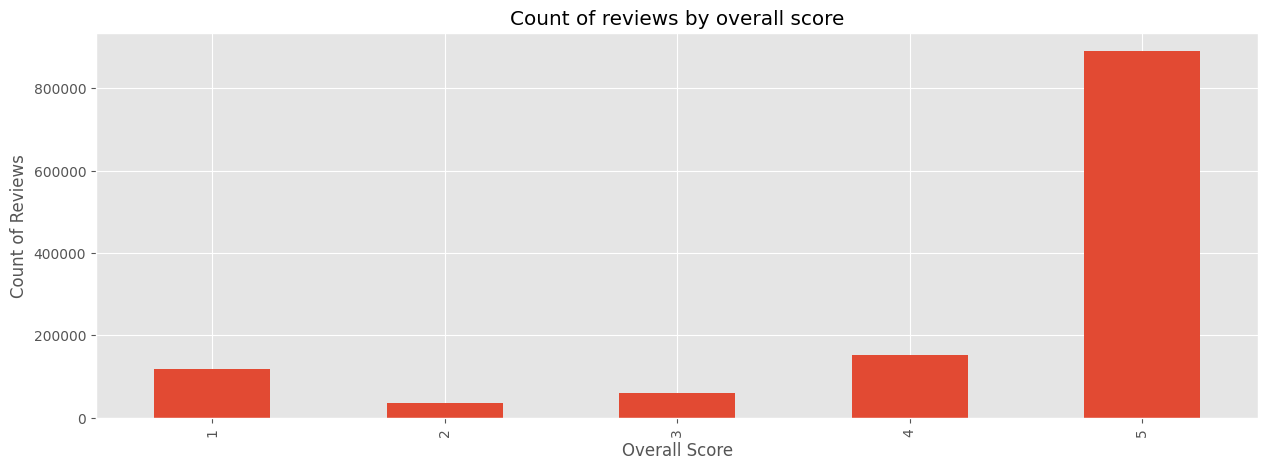

In [11]:
ax = df['overall'].value_counts().sort_index().plot\
    (kind='bar',title = 'Count of reviews by overall score',figsize=(15, 5))

ax.set_xlabel("Overall Score")
ax.set_ylabel("Count of Reviews")
plt.show()

In [12]:
example = df['reviewText'][0]
example

'We really liked this game years ago so we were very excited to get it. Unfortunately the disk would get to the start screen and then we would get the disk cannot be read error. We followed the instructions in the booklet for cleaning and it still would not play. So we returned it for a full refund. Since we really liked the game in the past I gave it four stars.'

In [13]:
tokens = nltk.word_tokenize(example)
type(tokens)

list

In [14]:
tagged = nltk.pos_tag(tokens)
tagged

[('We', 'PRP'),
 ('really', 'RB'),
 ('liked', 'VBD'),
 ('this', 'DT'),
 ('game', 'NN'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('so', 'IN'),
 ('we', 'PRP'),
 ('were', 'VBD'),
 ('very', 'RB'),
 ('excited', 'VBN'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Unfortunately', 'RB'),
 ('the', 'DT'),
 ('disk', 'NN'),
 ('would', 'MD'),
 ('get', 'VB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('start', 'NN'),
 ('screen', 'NN'),
 ('and', 'CC'),
 ('then', 'RB'),
 ('we', 'PRP'),
 ('would', 'MD'),
 ('get', 'VB'),
 ('the', 'DT'),
 ('disk', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('be', 'VB'),
 ('read', 'VBN'),
 ('error', 'NN'),
 ('.', '.'),
 ('We', 'PRP'),
 ('followed', 'VBD'),
 ('the', 'DT'),
 ('instructions', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('booklet', 'NN'),
 ('for', 'IN'),
 ('cleaning', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('still', 'RB'),
 ('would', 'MD'),
 ('not', 'RB'),
 ('play', 'VB'),
 ('.', '.'),
 ('So', 'IN'),
 ('we', 'PRP'),
 ('returned', 'VBD'),
 ('it', 'PRP'),
 ('for

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  really/RB
  liked/VBD
  this/DT
  game/NN
  years/NNS
  ago/RB
  so/IN
  we/PRP
  were/VBD
  very/RB
  excited/VBN
  to/TO
  get/VB
  it/PRP
  ./.
  Unfortunately/RB
  the/DT
  disk/NN
  would/MD
  get/VB
  to/TO
  the/DT
  start/NN
  screen/NN
  and/CC
  then/RB
  we/PRP
  would/MD
  get/VB
  the/DT
  disk/NN
  can/MD
  not/RB
  be/VB
  read/VBN
  error/NN
  ./.
  We/PRP
  followed/VBD
  the/DT
  instructions/NNS
  in/IN
  the/DT
  booklet/NN
  for/IN
  cleaning/NN
  and/CC
  it/PRP
  still/RB
  would/MD
  not/RB
  play/VB
  ./.
  So/IN
  we/PRP
  returned/VBD
  it/PRP
  for/IN
  a/DT
  full/JJ
  refund/NN
  ./.
  Since/IN
  we/PRP
  really/RB
  liked/VBD
  the/DT
  game/NN
  in/IN
  the/DT
  past/JJ
  I/PRP
  gave/VBD
  it/PRP
  four/CD
  stars/NNS
  ./.)


In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [17]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [18]:
example

'We really liked this game years ago so we were very excited to get it. Unfortunately the disk would get to the start screen and then we would get the disk cannot be read error. We followed the instructions in the booklet for cleaning and it still would not play. So we returned it for a full refund. Since we really liked the game in the past I gave it four stars.'

In [19]:
encoded_text = tokenizer(example,return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.13350724, 0.30459172, 0.56190103], dtype=float32)

In [20]:
def polarity_score_roberta(text):
    """
    Returns polarity score of the text using Roberta model
    """
    encoded_text = tokenizer(text,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'negative': scores[0],
        'neutral': scores[1],
        'positive': scores[2]
    }

    return scores_dict

In [21]:
res ={}

for i, row in tqdm(df.iterrows(),total = len(df)):
    try:
        try:
            try:
                text = row['reviewText']
                myid = row['id']
                roberta_result = polarity_score_roberta(text)
                res[myid] = roberta_result
            except RuntimeError:
                print(f'Broke for id {myid}')
        except ValueError:
            print(f'ValueError for id {myid}')
    except IndexError:
        print(f'IndexError for id {myid}')

  0%|          | 163/1257815 [00:27<99:36:24,  3.51it/s]

Broke for id 162


  0%|          | 196/1257815 [00:33<38:28:45,  9.08it/s] 

Broke for id 196


  0%|          | 252/1257815 [00:43<58:10:21,  6.00it/s] 

Broke for id 252


  0%|          | 257/1257815 [00:43<41:28:03,  8.42it/s]

Broke for id 255


  0%|          | 265/1257815 [00:45<48:44:16,  7.17it/s]

Broke for id 265


  0%|          | 298/1257815 [00:52<44:09:31,  7.91it/s] 

Broke for id 296


  0%|          | 305/1257815 [00:53<36:35:43,  9.55it/s]

Broke for id 302


  0%|          | 329/1257815 [00:55<33:15:37, 10.50it/s]

Broke for id 328


  0%|          | 382/1257815 [01:01<25:28:36, 13.71it/s]

Broke for id 379


  0%|          | 399/1257815 [01:02<30:07:44, 11.59it/s]

Broke for id 397


  0%|          | 472/1257815 [01:12<62:14:33,  5.61it/s]

Broke for id 472


  0%|          | 516/1257815 [01:20<58:58:21,  5.92it/s] 

Broke for id 514


  0%|          | 540/1257815 [01:24<64:30:26,  5.41it/s]

Broke for id 538


  0%|          | 543/1257815 [01:26<96:24:41,  3.62it/s] 

Broke for id 541


  0%|          | 576/1257815 [01:35<138:33:15,  2.52it/s]

Broke for id 574


  0%|          | 596/1257815 [01:39<40:59:54,  8.52it/s] 

Broke for id 594


  0%|          | 631/1257815 [01:45<32:31:39, 10.74it/s] 

Broke for id 629


  0%|          | 660/1257815 [01:49<43:11:38,  8.08it/s]

Broke for id 658


  0%|          | 682/1257815 [01:52<30:39:25, 11.39it/s] 

ValueError for id 679


  0%|          | 749/1257815 [02:02<40:23:56,  8.64it/s] 

Broke for id 748


  0%|          | 760/1257815 [02:05<60:09:14,  5.80it/s] 

Broke for id 758
Broke for id 760


  0%|          | 1016/1257815 [02:39<41:46:15,  8.36it/s]

Broke for id 1017


  0%|          | 1060/1257815 [02:45<31:15:29, 11.17it/s] 

ValueError for id 1057


  0%|          | 1252/1257815 [03:05<30:48:44, 11.33it/s]

Broke for id 1251


  0%|          | 1287/1257815 [03:09<34:41:45, 10.06it/s]

Broke for id 1285


  0%|          | 1344/1257815 [03:18<54:56:20,  6.35it/s] 

Broke for id 1344


  0%|          | 1356/1257815 [03:21<62:59:01,  5.54it/s] 

Broke for id 1357


  0%|          | 1373/1257815 [03:23<29:11:19, 11.96it/s]

Broke for id 1373


  0%|          | 1472/1257815 [03:34<42:53:21,  8.14it/s] 

Broke for id 1469


  0%|          | 1479/1257815 [03:35<52:57:42,  6.59it/s]

IndexError for id 1477


  0%|          | 1911/1257815 [04:33<46:34:33,  7.49it/s] 

Broke for id 1911
Broke for id 1912


  0%|          | 1915/1257815 [04:34<67:50:26,  5.14it/s]

Broke for id 1915


  0%|          | 1924/1257815 [04:36<61:17:36,  5.69it/s]

Broke for id 1922


  0%|          | 1943/1257815 [04:38<56:51:26,  6.14it/s]

Broke for id 1944


  0%|          | 1958/1257815 [04:41<49:35:38,  7.03it/s] 

Broke for id 1956


  0%|          | 1977/1257815 [04:44<44:43:03,  7.80it/s]

Broke for id 1976


  0%|          | 1981/1257815 [04:44<42:08:42,  8.28it/s]

Broke for id 1979


  0%|          | 2041/1257815 [04:52<36:29:32,  9.56it/s] 

ValueError for id 2039


  0%|          | 2211/1257815 [05:11<41:10:03,  8.47it/s]

Broke for id 2209


  0%|          | 2220/1257815 [05:12<64:34:45,  5.40it/s]

Broke for id 2218


  0%|          | 2231/1257815 [05:13<31:07:01, 11.21it/s]

Broke for id 2228


  0%|          | 2239/1257815 [05:14<34:59:06,  9.97it/s]

Broke for id 2236


  0%|          | 2313/1257815 [05:27<43:57:16,  7.93it/s] 

Broke for id 2310


  0%|          | 2567/1257815 [05:58<44:12:05,  7.89it/s]

Broke for id 2567


  0%|          | 2602/1257815 [06:03<34:57:31,  9.97it/s] 

Broke for id 2601


  0%|          | 2656/1257815 [06:11<51:23:31,  6.78it/s] 

Broke for id 2657


  0%|          | 2662/1257815 [06:12<36:02:57,  9.67it/s]

Broke for id 2660


  0%|          | 2672/1257815 [06:14<44:06:49,  7.90it/s]

Broke for id 2670


  0%|          | 2703/1257815 [06:19<40:08:24,  8.69it/s] 

Broke for id 2701


  0%|          | 2710/1257815 [06:20<36:56:43,  9.44it/s]

Broke for id 2707


  0%|          | 2735/1257815 [06:22<28:33:40, 12.21it/s]

Broke for id 2733


  0%|          | 2784/1257815 [06:27<27:32:58, 12.65it/s]

Broke for id 2784


  0%|          | 2806/1257815 [06:29<28:46:18, 12.12it/s]

Broke for id 2802


  0%|          | 2878/1257815 [06:36<36:47:18,  9.48it/s]

Broke for id 2877


  0%|          | 2921/1257815 [06:45<58:15:14,  5.98it/s] 

Broke for id 2919


  0%|          | 2945/1257815 [06:48<61:35:38,  5.66it/s]

Broke for id 2943


  0%|          | 2948/1257815 [06:50<96:16:38,  3.62it/s] 

Broke for id 2946


  0%|          | 2981/1257815 [06:57<92:48:24,  3.76it/s] 

Broke for id 2979


  0%|          | 3001/1257815 [07:00<40:16:17,  8.66it/s] 

Broke for id 2999


  0%|          | 3036/1257815 [07:06<31:13:54, 11.16it/s] 

Broke for id 3034


  0%|          | 3065/1257815 [07:08<28:31:31, 12.22it/s]

Broke for id 3063


  0%|          | 3086/1257815 [07:10<27:45:29, 12.56it/s]

ValueError for id 3084


  0%|          | 3154/1257815 [07:19<34:34:19, 10.08it/s]

Broke for id 3153


  0%|          | 3165/1257815 [07:22<74:19:22,  4.69it/s] 

Broke for id 3163
Broke for id 3165


  0%|          | 3422/1257815 [07:52<35:42:26,  9.76it/s]

Broke for id 3422


  0%|          | 3465/1257815 [07:58<30:20:23, 11.48it/s] 

ValueError for id 3462


  0%|          | 3656/1257815 [08:16<32:47:54, 10.62it/s]

Broke for id 3656


  0%|          | 3692/1257815 [08:20<32:59:23, 10.56it/s]

Broke for id 3690


  0%|          | 3748/1257815 [08:29<60:41:22,  5.74it/s] 

Broke for id 3749


  0%|          | 3761/1257815 [08:32<63:27:47,  5.49it/s] 

Broke for id 3762


  0%|          | 3780/1257815 [08:33<31:14:45, 11.15it/s]

Broke for id 3778


  0%|          | 3877/1257815 [08:44<41:22:51,  8.42it/s]

Broke for id 3874


  0%|          | 3885/1257815 [08:45<45:25:34,  7.67it/s]

IndexError for id 3882


  0%|          | 4316/1257815 [09:40<43:56:51,  7.92it/s] 

Broke for id 4316
Broke for id 4317


  0%|          | 4320/1257815 [09:40<60:20:05,  5.77it/s]

Broke for id 4320


  0%|          | 4329/1257815 [09:42<56:15:35,  6.19it/s]

Broke for id 4327


  0%|          | 4348/1257815 [09:44<57:28:08,  6.06it/s]

Broke for id 4349


  0%|          | 4363/1257815 [09:47<38:22:51,  9.07it/s]

Broke for id 4361


  0%|          | 4382/1257815 [09:49<40:06:40,  8.68it/s]

Broke for id 4381


  0%|          | 4386/1257815 [09:49<38:41:45,  9.00it/s]

Broke for id 4384


  0%|          | 4446/1257815 [09:57<39:46:26,  8.75it/s]

ValueError for id 4444


  0%|          | 4616/1257815 [10:15<40:02:01,  8.70it/s]

Broke for id 4614


  0%|          | 4625/1257815 [10:17<69:53:48,  4.98it/s]

Broke for id 4623


  0%|          | 4636/1257815 [10:18<29:50:54, 11.66it/s]

Broke for id 4633


  0%|          | 4644/1257815 [10:19<36:02:31,  9.66it/s]

Broke for id 4641


  0%|          | 4718/1257815 [10:35<40:26:35,  8.61it/s] 

Broke for id 4715


  0%|          | 4974/1257815 [11:05<36:09:53,  9.62it/s]

Broke for id 4972


  0%|          | 5005/1257815 [11:10<34:19:00, 10.14it/s] 

Broke for id 5006


  0%|          | 5061/1257815 [11:16<45:04:13,  7.72it/s]

Broke for id 5062


  0%|          | 5067/1257815 [11:17<37:34:39,  9.26it/s]

Broke for id 5065


  0%|          | 5077/1257815 [11:19<42:09:23,  8.25it/s]

Broke for id 5075


  0%|          | 5108/1257815 [11:24<37:39:49,  9.24it/s]

Broke for id 5106


  0%|          | 5115/1257815 [11:25<36:38:16,  9.50it/s]

Broke for id 5112


  0%|          | 5140/1257815 [11:27<28:42:52, 12.12it/s]

Broke for id 5138


  0%|          | 5191/1257815 [11:33<46:01:55,  7.56it/s]

Broke for id 5189


  0%|          | 5210/1257815 [11:35<28:45:43, 12.10it/s]

Broke for id 5207


  0%|          | 5282/1257815 [11:43<43:23:41,  8.02it/s]

Broke for id 5282


  0%|          | 5326/1257815 [11:52<58:27:39,  5.95it/s] 

Broke for id 5324


  0%|          | 5350/1257815 [11:55<58:18:09,  5.97it/s]

Broke for id 5348


  0%|          | 5353/1257815 [11:57<93:55:48,  3.70it/s] 

Broke for id 5351


  0%|          | 5384/1257815 [12:08<292:54:09,  1.19it/s]

Broke for id 5384


  0%|          | 5406/1257815 [12:15<58:06:17,  5.99it/s] 

Broke for id 5404


  0%|          | 5441/1257815 [12:20<30:28:48, 11.41it/s] 

Broke for id 5439


  0%|          | 5470/1257815 [12:23<41:21:11,  8.41it/s]

Broke for id 5468


  0%|          | 5491/1257815 [12:27<42:24:32,  8.20it/s] 

ValueError for id 5489


  0%|          | 5560/1257815 [12:40<48:24:27,  7.19it/s] 

Broke for id 5558


  0%|          | 5570/1257815 [12:43<69:33:55,  5.00it/s] 

Broke for id 5568
Broke for id 5570


  0%|          | 5827/1257815 [13:21<51:27:39,  6.76it/s] 

Broke for id 5827


  0%|          | 5870/1257815 [13:28<30:18:11, 11.48it/s] 

ValueError for id 5867


  0%|          | 6061/1257815 [13:52<51:10:04,  6.80it/s] 

Broke for id 6061


  0%|          | 6095/1257815 [13:58<54:24:58,  6.39it/s]

Broke for id 6095


  0%|          | 6153/1257815 [14:09<59:33:27,  5.84it/s] 

Broke for id 6154


  0%|          | 6168/1257815 [14:12<49:44:49,  6.99it/s] 

Broke for id 6167


  0%|          | 6184/1257815 [14:14<32:26:53, 10.71it/s]

Broke for id 6183


  0%|          | 6279/1257815 [14:30<59:19:04,  5.86it/s] 

Broke for id 6279


  0%|          | 6289/1257815 [14:31<68:07:29,  5.10it/s]

IndexError for id 6287


  1%|          | 6721/1257815 [15:43<70:37:41,  4.92it/s] 

Broke for id 6721
Broke for id 6722


  1%|          | 6725/1257815 [15:44<111:43:06,  3.11it/s]

Broke for id 6725


  1%|          | 6734/1257815 [15:46<73:15:02,  4.74it/s] 

Broke for id 6732


  1%|          | 6754/1257815 [15:50<66:23:58,  5.23it/s]

Broke for id 6754


  1%|          | 6768/1257815 [15:53<61:58:27,  5.61it/s] 

Broke for id 6766


  1%|          | 6786/1257815 [15:56<84:17:30,  4.12it/s]

Broke for id 6786


  1%|          | 6791/1257815 [15:57<61:04:08,  5.69it/s]

Broke for id 6789


  1%|          | 6849/1257815 [16:08<60:59:16,  5.70it/s] 

ValueError for id 6849


  1%|          | 7021/1257815 [16:41<55:32:29,  6.26it/s] 

Broke for id 7019


  1%|          | 7028/1257815 [16:44<178:45:41,  1.94it/s]

Broke for id 7028


  1%|          | 7038/1257815 [16:46<45:28:00,  7.64it/s] 

Broke for id 7038


  1%|          | 7048/1257815 [16:47<41:01:09,  8.47it/s]

Broke for id 7046


  1%|          | 7120/1257815 [17:04<92:28:43,  3.76it/s] 

Broke for id 7120


  1%|          | 7379/1257815 [17:51<46:01:33,  7.55it/s] 

Broke for id 7377


  1%|          | 7412/1257815 [17:58<37:47:05,  9.19it/s] 

Broke for id 7411


  1%|          | 7467/1257815 [18:13<89:47:31,  3.87it/s] 

Broke for id 7467


  1%|          | 7470/1257815 [18:13<73:43:06,  4.71it/s]

Broke for id 7470


  1%|          | 7480/1257815 [18:15<67:04:20,  5.18it/s] 

Broke for id 7480


  1%|          | 7513/1257815 [18:24<57:29:33,  6.04it/s] 

Broke for id 7511


  1%|          | 7519/1257815 [18:25<48:06:03,  7.22it/s]

Broke for id 7517


  1%|          | 7545/1257815 [18:29<38:35:16,  9.00it/s]

Broke for id 7543


  1%|          | 7596/1257815 [18:35<28:31:09, 12.18it/s]

Broke for id 7594


  1%|          | 7614/1257815 [18:37<36:32:13,  9.50it/s]

Broke for id 7612


  1%|          | 7687/1257815 [18:48<62:20:50,  5.57it/s]

Broke for id 7687


  1%|          | 7731/1257815 [19:00<71:12:35,  4.88it/s] 

Broke for id 7729


  1%|          | 7755/1257815 [19:05<80:27:50,  4.32it/s] 

Broke for id 7753


  1%|          | 7756/1257815 [19:07<193:45:47,  1.79it/s]

Broke for id 7756


  1%|          | 7791/1257815 [19:17<135:46:05,  2.56it/s]

Broke for id 7789


  1%|          | 7811/1257815 [19:22<50:43:07,  6.85it/s] 

Broke for id 7809


  1%|          | 7844/1257815 [19:31<66:31:41,  5.22it/s] 

Broke for id 7844


  1%|          | 7875/1257815 [19:35<40:25:42,  8.59it/s]

Broke for id 7873


  1%|          | 7896/1257815 [19:39<35:21:42,  9.82it/s] 

ValueError for id 7894


  1%|          | 7963/1257815 [19:52<60:09:50,  5.77it/s] 

Broke for id 7963


  1%|          | 7975/1257815 [19:55<89:07:30,  3.90it/s] 

Broke for id 7973
Broke for id 7975


  1%|          | 8232/1257815 [20:42<62:30:29,  5.55it/s] 

Broke for id 8232


  1%|          | 8274/1257815 [20:50<44:12:54,  7.85it/s] 

ValueError for id 8272


  1%|          | 8468/1257815 [21:13<50:40:03,  6.85it/s]

Broke for id 8466


  1%|          | 8500/1257815 [21:20<76:56:19,  4.51it/s]

Broke for id 8500


  1%|          | 8560/1257815 [21:32<44:19:37,  7.83it/s] 

Broke for id 8559


  1%|          | 8573/1257815 [21:35<49:39:50,  6.99it/s] 

Broke for id 8572


  1%|          | 8590/1257815 [21:38<32:44:32, 10.60it/s]

Broke for id 8588


  1%|          | 8687/1257815 [21:52<44:30:49,  7.79it/s] 

Broke for id 8684


  1%|          | 8694/1257815 [21:54<66:41:19,  5.20it/s]

IndexError for id 8692


  1%|          | 9126/1257815 [22:58<70:30:27,  4.92it/s] 

Broke for id 9126
Broke for id 9127


  1%|          | 9130/1257815 [22:59<90:45:37,  3.82it/s]

Broke for id 9130


  1%|          | 9137/1257815 [23:00<88:17:54,  3.93it/s]

Broke for id 9137


  1%|          | 9159/1257815 [23:05<79:18:01,  4.37it/s]

Broke for id 9159


  1%|          | 9171/1257815 [23:09<110:55:05,  3.13it/s]

Broke for id 9171


  1%|          | 9191/1257815 [23:12<63:30:41,  5.46it/s] 

Broke for id 9191


  1%|          | 9196/1257815 [23:13<49:57:57,  6.94it/s]

Broke for id 9194


  1%|          | 9254/1257815 [23:23<46:19:50,  7.49it/s] 

ValueError for id 9254


  1%|          | 9426/1257815 [23:44<44:08:31,  7.86it/s] 

Broke for id 9424


  1%|          | 9433/1257815 [23:46<125:18:47,  2.77it/s]

Broke for id 9433


  1%|          | 9446/1257815 [23:47<33:22:04, 10.39it/s] 

Broke for id 9443


  1%|          | 9453/1257815 [23:48<38:04:01,  9.11it/s]

Broke for id 9451


  1%|          | 9528/1257815 [24:03<43:43:29,  7.93it/s] 

Broke for id 9525


  1%|          | 9784/1257815 [24:42<51:15:02,  6.76it/s] 

Broke for id 9782


  1%|          | 9816/1257815 [24:49<50:03:27,  6.93it/s] 

Broke for id 9816


  1%|          | 9872/1257815 [24:59<75:35:04,  4.59it/s] 

Broke for id 9872


  1%|          | 9877/1257815 [25:00<50:26:14,  6.87it/s]

Broke for id 9875


  1%|          | 9885/1257815 [25:03<66:59:46,  5.17it/s] 

Broke for id 9885


  1%|          | 9918/1257815 [25:12<50:46:08,  6.83it/s] 

Broke for id 9916


  1%|          | 9922/1257815 [25:13<75:40:32,  4.58it/s]

Broke for id 9922


  1%|          | 9950/1257815 [25:17<35:13:33,  9.84it/s]

Broke for id 9948


  1%|          | 10001/1257815 [25:21<22:51:14, 15.17it/s]

Broke for id 9999


  1%|          | 10020/1257815 [25:23<29:06:08, 11.91it/s]

Broke for id 10017


  1%|          | 10091/1257815 [25:30<41:48:50,  8.29it/s]

Broke for id 10092


  1%|          | 10136/1257815 [25:39<56:00:05,  6.19it/s] 

Broke for id 10134


  1%|          | 10160/1257815 [25:42<63:59:45,  5.42it/s]

Broke for id 10158


  1%|          | 10163/1257815 [25:44<94:25:47,  3.67it/s] 

Broke for id 10161


  1%|          | 10196/1257815 [25:51<94:42:57,  3.66it/s] 

Broke for id 10194


  1%|          | 10216/1257815 [25:55<46:14:14,  7.50it/s] 

Broke for id 10214


  1%|          | 10251/1257815 [26:01<31:21:47, 11.05it/s] 

Broke for id 10249


  1%|          | 10280/1257815 [26:04<27:21:55, 12.66it/s]

Broke for id 10278


  1%|          | 10301/1257815 [26:06<28:00:39, 12.37it/s]

ValueError for id 10299


  1%|          | 10369/1257815 [26:15<35:39:37,  9.72it/s]

Broke for id 10368


  1%|          | 10380/1257815 [26:17<59:05:15,  5.86it/s]

Broke for id 10378
Broke for id 10380


  1%|          | 10637/1257815 [26:47<35:27:21,  9.77it/s]

Broke for id 10637


  1%|          | 10680/1257815 [26:53<30:00:03, 11.55it/s]

ValueError for id 10677


  1%|          | 10872/1257815 [27:10<31:19:22, 11.06it/s]

Broke for id 10871


  1%|          | 10907/1257815 [27:14<32:48:49, 10.56it/s]

Broke for id 10905


  1%|          | 10963/1257815 [27:22<58:55:29,  5.88it/s]

Broke for id 10964


  1%|          | 10976/1257815 [27:25<61:22:33,  5.64it/s] 

Broke for id 10977


  1%|          | 10993/1257815 [27:27<26:03:07, 13.29it/s]

Broke for id 10993


  1%|          | 11092/1257815 [27:38<39:37:52,  8.74it/s]

Broke for id 11089


  1%|          | 11100/1257815 [27:39<44:33:46,  7.77it/s]

IndexError for id 11097


  1%|          | 11533/1257815 [28:25<29:28:58, 11.74it/s]

Broke for id 11531
Broke for id 11532


  1%|          | 11535/1257815 [28:26<59:47:35,  5.79it/s]

Broke for id 11535


  1%|          | 11544/1257815 [28:28<55:48:04,  6.20it/s]

Broke for id 11542


  1%|          | 11563/1257815 [28:30<51:05:00,  6.78it/s]

Broke for id 11564


  1%|          | 11579/1257815 [28:32<35:26:47,  9.77it/s]

Broke for id 11576


  1%|          | 11598/1257815 [28:35<41:26:50,  8.35it/s]

Broke for id 11596


  1%|          | 11599/1257815 [28:35<44:52:05,  7.72it/s]

Broke for id 11599


  1%|          | 11661/1257815 [28:42<32:28:25, 10.66it/s]

ValueError for id 11659


  1%|          | 11831/1257815 [28:58<37:19:18,  9.27it/s]

Broke for id 11829


  1%|          | 11840/1257815 [29:00<66:29:25,  5.21it/s]

Broke for id 11838


  1%|          | 11849/1257815 [29:01<33:44:45, 10.26it/s]

Broke for id 11848


  1%|          | 11856/1257815 [29:03<75:00:03,  4.61it/s]

Broke for id 11856


  1%|          | 11933/1257815 [29:17<40:34:52,  8.53it/s] 

Broke for id 11930


  1%|          | 12187/1257815 [29:52<49:53:52,  6.93it/s] 

Broke for id 12187


  1%|          | 12221/1257815 [29:57<33:43:26, 10.26it/s] 

Broke for id 12221


  1%|          | 12278/1257815 [30:05<40:14:40,  8.60it/s]

Broke for id 12277


  1%|          | 12282/1257815 [30:05<38:44:30,  8.93it/s]

Broke for id 12280


  1%|          | 12292/1257815 [30:07<40:55:28,  8.45it/s]

Broke for id 12290


  1%|          | 12323/1257815 [30:12<40:32:40,  8.53it/s]

Broke for id 12321


  1%|          | 12329/1257815 [30:13<33:55:07, 10.20it/s]

Broke for id 12327


  1%|          | 12355/1257815 [30:15<30:17:13, 11.42it/s]

Broke for id 12353


  1%|          | 12406/1257815 [30:19<23:35:09, 14.67it/s]

Broke for id 12404


  1%|          | 12426/1257815 [30:21<27:11:44, 12.72it/s]

Broke for id 12422


  1%|          | 12496/1257815 [30:28<41:49:35,  8.27it/s]

Broke for id 12497


  1%|          | 12541/1257815 [30:37<54:35:45,  6.34it/s] 

Broke for id 12539


  1%|          | 12565/1257815 [30:40<58:20:50,  5.93it/s]

Broke for id 12563


  1%|          | 12568/1257815 [30:41<87:03:28,  3.97it/s] 

Broke for id 12566


  1%|          | 12601/1257815 [30:48<85:44:16,  4.03it/s] 

Broke for id 12599


  1%|          | 12621/1257815 [30:52<39:32:33,  8.75it/s] 

Broke for id 12619


  1%|          | 12656/1257815 [30:57<29:40:20, 11.66it/s] 

Broke for id 12654


  1%|          | 12685/1257815 [30:59<27:28:30, 12.59it/s]

Broke for id 12683


  1%|          | 12706/1257815 [31:01<27:30:01, 12.58it/s]

ValueError for id 12704


  1%|          | 12774/1257815 [31:10<36:29:49,  9.48it/s]

Broke for id 12773


  1%|          | 12785/1257815 [31:13<58:22:23,  5.92it/s]

Broke for id 12783
Broke for id 12785


  1%|          | 13044/1257815 [31:46<34:46:40,  9.94it/s] 

Broke for id 13042


  1%|          | 13085/1257815 [31:51<28:59:13, 11.93it/s] 

ValueError for id 13082


  1%|          | 13279/1257815 [32:07<24:36:12, 14.05it/s]

Broke for id 13276


  1%|          | 13312/1257815 [32:10<28:20:56, 12.19it/s]

Broke for id 13310


  1%|          | 13371/1257815 [32:17<38:48:21,  8.91it/s]

Broke for id 13369


  1%|          | 13381/1257815 [32:19<60:31:01,  5.71it/s] 

Broke for id 13382


  1%|          | 13398/1257815 [32:21<26:08:23, 13.22it/s]

Broke for id 13398


  1%|          | 13497/1257815 [32:30<35:07:51,  9.84it/s]

Broke for id 13494


  1%|          | 13503/1257815 [32:31<41:25:29,  8.34it/s]

IndexError for id 13502


  1%|          | 13936/1257815 [33:10<35:17:14,  9.79it/s]

Broke for id 13936
Broke for id 13937


  1%|          | 13942/1257815 [33:11<45:19:59,  7.62it/s]

Broke for id 13940


  1%|          | 13949/1257815 [33:12<47:10:59,  7.32it/s]

Broke for id 13947


  1%|          | 13968/1257815 [33:14<42:28:45,  8.13it/s]

Broke for id 13969


  1%|          | 13983/1257815 [33:16<37:31:52,  9.21it/s]

Broke for id 13981


  1%|          | 14003/1257815 [33:18<37:52:52,  9.12it/s]

Broke for id 14001


  1%|          | 14007/1257815 [33:19<33:02:54, 10.45it/s]

Broke for id 14004


  1%|          | 14065/1257815 [33:24<24:05:57, 14.34it/s]

ValueError for id 14064


  1%|          | 14237/1257815 [33:38<30:49:21, 11.21it/s]

Broke for id 14234


  1%|          | 14245/1257815 [33:39<50:03:43,  6.90it/s]

Broke for id 14243


  1%|          | 14256/1257815 [33:40<22:08:35, 15.60it/s]

Broke for id 14253


  1%|          | 14263/1257815 [33:40<26:40:18, 12.95it/s]

Broke for id 14261


  1%|          | 14339/1257815 [33:50<30:51:40, 11.19it/s] 

Broke for id 14335


  1%|          | 14594/1257815 [34:14<27:40:49, 12.48it/s]

Broke for id 14592


  1%|          | 14626/1257815 [34:17<23:43:14, 14.56it/s]

Broke for id 14626


  1%|          | 14684/1257815 [34:22<27:40:54, 12.47it/s]

Broke for id 14682


  1%|          | 14687/1257815 [34:22<24:51:23, 13.89it/s]

Broke for id 14685


  1%|          | 14697/1257815 [34:23<29:50:07, 11.57it/s]

Broke for id 14695


  1%|          | 14729/1257815 [34:27<28:08:44, 12.27it/s]

Broke for id 14726


  1%|          | 14736/1257815 [34:27<24:53:26, 13.87it/s]

Broke for id 14732


  1%|          | 14760/1257815 [34:29<18:32:58, 18.61it/s]

Broke for id 14758


  1%|          | 14812/1257815 [34:32<18:29:11, 18.68it/s]

Broke for id 14809


  1%|          | 14832/1257815 [34:34<20:22:21, 16.95it/s]

Broke for id 14827


  1%|          | 14902/1257815 [34:39<32:53:35, 10.50it/s]

Broke for id 14902


  1%|          | 14944/1257815 [34:45<56:54:55,  6.07it/s]

Broke for id 14944


  1%|          | 14970/1257815 [34:48<42:05:34,  8.20it/s]

Broke for id 14968


  1%|          | 14973/1257815 [34:49<62:33:15,  5.52it/s]

Broke for id 14971


  1%|          | 15007/1257815 [34:54<59:30:21,  5.80it/s] 

Broke for id 15004


  1%|          | 15026/1257815 [34:57<31:55:00, 10.82it/s]

Broke for id 15024


  1%|          | 15063/1257815 [35:00<21:33:51, 16.01it/s]

Broke for id 15059


  1%|          | 15091/1257815 [35:02<21:30:32, 16.05it/s]

Broke for id 15088


  1%|          | 15111/1257815 [35:04<20:47:09, 16.61it/s]

ValueError for id 15109


  1%|          | 15180/1257815 [35:10<29:16:52, 11.79it/s]

Broke for id 15178


  1%|          | 15192/1257815 [35:12<34:47:01,  9.92it/s]

Broke for id 15188
Broke for id 15190


  1%|          | 15449/1257815 [35:35<27:18:30, 12.64it/s]

Broke for id 15447


  1%|          | 15490/1257815 [35:39<22:11:14, 15.55it/s]

ValueError for id 15487


  1%|          | 15684/1257815 [35:52<23:12:09, 14.87it/s]

Broke for id 15681


  1%|          | 15717/1257815 [35:55<25:19:53, 13.62it/s]

Broke for id 15715


  1%|▏         | 15776/1257815 [36:02<36:17:36,  9.51it/s]

Broke for id 15774


  1%|▏         | 15786/1257815 [36:03<51:02:08,  6.76it/s]

Broke for id 15787


  1%|▏         | 15803/1257815 [36:05<22:23:34, 15.41it/s]

Broke for id 15803


  1%|▏         | 15902/1257815 [36:13<30:10:47, 11.43it/s]

Broke for id 15899


  1%|▏         | 15910/1257815 [36:13<34:10:17, 10.10it/s]

IndexError for id 15907


  1%|▏         | 16341/1257815 [36:51<35:45:25,  9.64it/s]

Broke for id 16341
Broke for id 16342


  1%|▏         | 16346/1257815 [36:52<40:28:42,  8.52it/s]

Broke for id 16345


  1%|▏         | 16354/1257815 [36:53<43:39:25,  7.90it/s]

Broke for id 16352


  1%|▏         | 16374/1257815 [36:55<34:43:28,  9.93it/s]

Broke for id 16374


  1%|▏         | 16389/1257815 [36:57<29:20:27, 11.75it/s]

Broke for id 16386


  1%|▏         | 16408/1257815 [36:58<31:53:41, 10.81it/s]

Broke for id 16406


  1%|▏         | 16412/1257815 [36:59<28:42:31, 12.01it/s]

Broke for id 16409


  1%|▏         | 16472/1257815 [37:03<24:36:41, 14.01it/s]

ValueError for id 16469


  1%|▏         | 16642/1257815 [37:16<29:12:49, 11.80it/s]

Broke for id 16639


  1%|▏         | 16650/1257815 [37:18<49:25:11,  6.98it/s]

Broke for id 16648


  1%|▏         | 16661/1257815 [37:18<21:53:25, 15.75it/s]

Broke for id 16658


  1%|▏         | 16668/1257815 [37:19<27:20:11, 12.61it/s]

Broke for id 16666


  1%|▏         | 16744/1257815 [37:28<29:37:38, 11.64it/s]

Broke for id 16740


  1%|▏         | 16997/1257815 [37:50<33:40:32, 10.24it/s]

Broke for id 16997


  1%|▏         | 17031/1257815 [37:54<24:37:49, 13.99it/s]

Broke for id 17031


  1%|▏         | 17089/1257815 [37:59<29:48:19, 11.56it/s]

Broke for id 17087


  1%|▏         | 17092/1257815 [37:59<25:30:25, 13.51it/s]

Broke for id 17090


  1%|▏         | 17102/1257815 [38:00<32:10:27, 10.71it/s]

Broke for id 17100


  1%|▏         | 17133/1257815 [38:04<30:53:00, 11.16it/s]

Broke for id 17131


  1%|▏         | 17140/1257815 [38:04<25:17:45, 13.62it/s]

Broke for id 17137


  1%|▏         | 17165/1257815 [38:06<18:58:15, 18.17it/s]

Broke for id 17163


  1%|▏         | 17217/1257815 [38:09<16:47:39, 20.52it/s]

Broke for id 17214


  1%|▏         | 17235/1257815 [38:10<20:06:12, 17.14it/s]

Broke for id 17232


  1%|▏         | 17306/1257815 [38:15<31:39:01, 10.89it/s]

Broke for id 17307


  1%|▏         | 17349/1257815 [38:21<55:16:20,  6.23it/s]

Broke for id 17349


  1%|▏         | 17374/1257815 [38:23<43:07:01,  7.99it/s]

Broke for id 17373


  1%|▏         | 17378/1257815 [38:24<57:33:35,  5.99it/s]

Broke for id 17376


  1%|▏         | 17412/1257815 [38:30<56:16:06,  6.12it/s] 

Broke for id 17409


  1%|▏         | 17431/1257815 [38:32<32:51:48, 10.48it/s]

Broke for id 17429


  1%|▏         | 17466/1257815 [38:36<22:43:07, 15.17it/s]

Broke for id 17464


  1%|▏         | 17496/1257815 [38:38<20:45:10, 16.60it/s]

Broke for id 17493


  1%|▏         | 17516/1257815 [38:39<21:10:00, 16.28it/s]

ValueError for id 17514


  1%|▏         | 17585/1257815 [38:46<27:55:27, 12.34it/s]

Broke for id 17583


  1%|▏         | 17597/1257815 [38:47<34:37:20,  9.95it/s]

Broke for id 17593
Broke for id 17595


  1%|▏         | 17854/1257815 [39:11<28:02:42, 12.28it/s]

Broke for id 17852


  1%|▏         | 17895/1257815 [39:14<22:37:25, 15.22it/s]

ValueError for id 17892


  1%|▏         | 18088/1257815 [39:27<22:29:10, 15.31it/s]

Broke for id 18086


  1%|▏         | 18123/1257815 [39:30<23:40:22, 14.55it/s]

Broke for id 18120


  1%|▏         | 18181/1257815 [39:37<34:51:37,  9.88it/s]

Broke for id 18179


  1%|▏         | 18191/1257815 [39:39<49:56:00,  6.90it/s]

Broke for id 18192


  1%|▏         | 18208/1257815 [39:40<21:04:42, 16.34it/s]

Broke for id 18208


  1%|▏         | 18307/1257815 [39:48<33:06:50, 10.40it/s]

Broke for id 18304


  1%|▏         | 18315/1257815 [39:48<36:51:42,  9.34it/s]

IndexError for id 18312


  1%|▏         | 18746/1257815 [40:26<33:52:55, 10.16it/s]

Broke for id 18746
Broke for id 18747


  1%|▏         | 18751/1257815 [40:26<36:58:53,  9.31it/s]

Broke for id 18750


  1%|▏         | 18759/1257815 [40:27<41:25:35,  8.31it/s]

Broke for id 18757


  1%|▏         | 18779/1257815 [40:29<34:59:20,  9.84it/s]

Broke for id 18779


  1%|▏         | 18794/1257815 [40:31<33:27:22, 10.29it/s]

Broke for id 18791


  1%|▏         | 18813/1257815 [40:33<33:15:15, 10.35it/s]

Broke for id 18811


  1%|▏         | 18817/1257815 [40:33<30:32:13, 11.27it/s]

Broke for id 18814


  2%|▏         | 18876/1257815 [40:38<24:30:07, 14.05it/s]

ValueError for id 18874


  2%|▏         | 19047/1257815 [40:51<30:25:56, 11.31it/s]

Broke for id 19044


  2%|▏         | 19055/1257815 [40:52<45:06:10,  7.63it/s]

Broke for id 19053


  2%|▏         | 19066/1257815 [40:53<21:12:15, 16.23it/s]

Broke for id 19063


  2%|▏         | 19075/1257815 [40:53<24:47:17, 13.88it/s]

Broke for id 19071


  2%|▏         | 19149/1257815 [41:02<30:09:30, 11.41it/s] 

Broke for id 19145


  2%|▏         | 19402/1257815 [41:26<33:52:34, 10.15it/s]

Broke for id 19402


  2%|▏         | 19437/1257815 [41:29<20:14:57, 16.99it/s]

Broke for id 19436


  2%|▏         | 19494/1257815 [41:34<31:58:24, 10.76it/s]

Broke for id 19492


  2%|▏         | 19497/1257815 [41:34<27:24:08, 12.55it/s]

Broke for id 19495


  2%|▏         | 19507/1257815 [41:36<33:20:00, 10.32it/s]

Broke for id 19505


  2%|▏         | 19538/1257815 [41:40<32:13:59, 10.67it/s]

Broke for id 19536


  2%|▏         | 19545/1257815 [41:40<26:49:37, 12.82it/s]

Broke for id 19542


  2%|▏         | 19570/1257815 [41:42<18:16:57, 18.81it/s]

Broke for id 19568


  2%|▏         | 19621/1257815 [41:45<16:35:10, 20.74it/s]

Broke for id 19619


  2%|▏         | 19642/1257815 [41:46<19:24:13, 17.73it/s]

Broke for id 19637


  2%|▏         | 19711/1257815 [41:51<29:25:52, 11.69it/s]

Broke for id 19712


  2%|▏         | 19754/1257815 [41:57<58:31:02,  5.88it/s]

Broke for id 19754


  2%|▏         | 19779/1257815 [42:00<42:22:28,  8.12it/s]

Broke for id 19778


  2%|▏         | 19783/1257815 [42:01<58:54:36,  5.84it/s]

Broke for id 19781


  2%|▏         | 19817/1257815 [42:06<58:12:22,  5.91it/s] 

Broke for id 19814


  2%|▏         | 19834/1257815 [42:08<40:34:10,  8.48it/s]

Broke for id 19834


  2%|▏         | 19871/1257815 [42:12<23:47:18, 14.46it/s]

Broke for id 19869


  2%|▏         | 19902/1257815 [42:14<21:45:39, 15.80it/s]

Broke for id 19898


  2%|▏         | 19921/1257815 [42:16<20:51:52, 16.48it/s]

ValueError for id 19919


  2%|▏         | 19989/1257815 [42:22<26:52:24, 12.79it/s]

Broke for id 19988


  2%|▏         | 20002/1257815 [42:24<32:38:07, 10.54it/s]

Broke for id 19998
Broke for id 20000


  2%|▏         | 20259/1257815 [42:46<26:42:23, 12.87it/s]

Broke for id 20257


  2%|▏         | 20300/1257815 [42:50<21:39:34, 15.87it/s]

ValueError for id 20297


  2%|▏         | 20493/1257815 [43:03<22:02:30, 15.59it/s]

Broke for id 20491


  2%|▏         | 20527/1257815 [43:06<24:26:31, 14.06it/s]

Broke for id 20525


  2%|▏         | 20586/1257815 [43:12<34:41:48,  9.91it/s]

Broke for id 20584


  2%|▏         | 20596/1257815 [43:14<51:38:54,  6.65it/s]

Broke for id 20597


  2%|▏         | 20613/1257815 [43:15<21:01:32, 16.35it/s]

Broke for id 20613


  2%|▏         | 20711/1257815 [43:23<30:14:04, 11.37it/s]

Broke for id 20709


  2%|▏         | 20720/1257815 [43:24<31:55:58, 10.76it/s]

IndexError for id 20717


  2%|▏         | 21151/1257815 [44:01<32:51:02, 10.46it/s]

Broke for id 21151
Broke for id 21152


  2%|▏         | 21157/1257815 [44:01<40:32:51,  8.47it/s]

Broke for id 21155


  2%|▏         | 21165/1257815 [44:02<37:47:16,  9.09it/s]

Broke for id 21162


  2%|▏         | 21183/1257815 [44:04<36:57:24,  9.29it/s]

Broke for id 21184


  2%|▏         | 21199/1257815 [44:06<28:44:40, 11.95it/s]

Broke for id 21196


  2%|▏         | 21218/1257815 [44:07<29:43:44, 11.55it/s]

Broke for id 21216


  2%|▏         | 21222/1257815 [44:08<28:25:16, 12.09it/s]

Broke for id 21219


  2%|▏         | 21281/1257815 [44:13<23:54:58, 14.36it/s]

ValueError for id 21279


  2%|▏         | 21452/1257815 [44:25<30:31:19, 11.25it/s]

Broke for id 21449


  2%|▏         | 21460/1257815 [44:27<45:36:59,  7.53it/s]

Broke for id 21458


  2%|▏         | 21471/1257815 [44:27<21:10:54, 16.21it/s]

Broke for id 21468


  2%|▏         | 21478/1257815 [44:28<27:12:07, 12.63it/s]

Broke for id 21476


  2%|▏         | 21554/1257815 [44:37<29:30:47, 11.64it/s] 

Broke for id 21550


  2%|▏         | 21807/1257815 [45:00<34:33:51,  9.93it/s]

Broke for id 21807


  2%|▏         | 21842/1257815 [45:03<20:02:11, 17.13it/s]

Broke for id 21841


  2%|▏         | 21899/1257815 [45:08<28:15:34, 12.15it/s]

Broke for id 21897


  2%|▏         | 21902/1257815 [45:08<24:39:40, 13.92it/s]

Broke for id 21900


  2%|▏         | 21912/1257815 [45:09<28:56:48, 11.86it/s]

Broke for id 21910


  2%|▏         | 21944/1257815 [45:13<27:57:56, 12.28it/s]

Broke for id 21941


  2%|▏         | 21951/1257815 [45:13<24:42:20, 13.90it/s]

Broke for id 21947


  2%|▏         | 21976/1257815 [45:15<19:14:07, 17.85it/s]

Broke for id 21973


  2%|▏         | 22026/1257815 [45:18<17:04:59, 20.09it/s]

Broke for id 22024


  2%|▏         | 22044/1257815 [45:19<21:18:22, 16.11it/s]

Broke for id 22042


  2%|▏         | 22116/1257815 [45:25<40:39:49,  8.44it/s]

Broke for id 22117


  2%|▏         | 22161/1257815 [45:33<51:06:01,  6.72it/s] 

Broke for id 22159


  2%|▏         | 22185/1257815 [45:36<49:13:24,  6.97it/s]

Broke for id 22183


  2%|▏         | 22188/1257815 [45:37<74:17:08,  4.62it/s] 

Broke for id 22186


  2%|▏         | 22222/1257815 [45:43<60:34:50,  5.67it/s] 

Broke for id 22219


  2%|▏         | 22239/1257815 [45:46<40:19:22,  8.51it/s]

Broke for id 22239


  2%|▏         | 22276/1257815 [45:50<24:16:08, 14.14it/s]

Broke for id 22274


  2%|▏         | 22306/1257815 [45:51<20:27:02, 16.78it/s]

Broke for id 22303


  2%|▏         | 22326/1257815 [45:53<20:47:22, 16.51it/s]

ValueError for id 22324


  2%|▏         | 22394/1257815 [46:00<26:26:03, 12.98it/s]

Broke for id 22393


  2%|▏         | 22407/1257815 [46:01<35:16:57,  9.73it/s]

Broke for id 22403
Broke for id 22405


  2%|▏         | 22664/1257815 [46:25<27:29:05, 12.48it/s]

Broke for id 22662


  2%|▏         | 22705/1257815 [46:29<23:22:39, 14.68it/s]

ValueError for id 22702


  2%|▏         | 22899/1257815 [46:42<25:05:08, 13.67it/s]

Broke for id 22896


  2%|▏         | 22932/1257815 [46:45<24:32:03, 13.98it/s]

Broke for id 22930


  2%|▏         | 22991/1257815 [46:51<36:38:38,  9.36it/s]

Broke for id 22989


  2%|▏         | 23001/1257815 [46:53<55:12:53,  6.21it/s]

Broke for id 23002


  2%|▏         | 23018/1257815 [46:54<21:46:46, 15.75it/s]

Broke for id 23018


  2%|▏         | 23117/1257815 [47:03<32:44:39, 10.47it/s]

Broke for id 23114


  2%|▏         | 23125/1257815 [47:04<36:41:21,  9.35it/s]

IndexError for id 23122


  2%|▏         | 23556/1257815 [47:41<34:56:31,  9.81it/s]

Broke for id 23556
Broke for id 23557


  2%|▏         | 23562/1257815 [47:42<40:06:09,  8.55it/s]

Broke for id 23560


  2%|▏         | 23570/1257815 [47:43<38:19:23,  8.95it/s]

Broke for id 23567


  2%|▏         | 23588/1257815 [47:44<37:21:46,  9.18it/s]

Broke for id 23589


  2%|▏         | 23604/1257815 [47:46<31:15:53, 10.97it/s]

Broke for id 23601


  2%|▏         | 23623/1257815 [47:48<35:28:22,  9.66it/s]

Broke for id 23621


  2%|▏         | 23627/1257815 [47:48<32:10:02, 10.66it/s]

Broke for id 23624


  2%|▏         | 23686/1257815 [47:53<24:56:30, 13.74it/s]

ValueError for id 23684


  2%|▏         | 23857/1257815 [48:06<29:56:30, 11.45it/s]

Broke for id 23854


  2%|▏         | 23865/1257815 [48:08<47:13:14,  7.26it/s]

Broke for id 23863


  2%|▏         | 23876/1257815 [48:08<22:21:07, 15.33it/s]

Broke for id 23873


  2%|▏         | 23885/1257815 [48:09<25:19:01, 13.54it/s]

Broke for id 23881


  2%|▏         | 23958/1257815 [48:18<31:45:07, 10.79it/s]

Broke for id 23955


  2%|▏         | 24212/1257815 [48:41<35:59:45,  9.52it/s]

Broke for id 24212


  2%|▏         | 24247/1257815 [48:44<20:32:07, 16.69it/s]

Broke for id 24246


  2%|▏         | 24304/1257815 [48:49<30:04:36, 11.39it/s]

Broke for id 24302


  2%|▏         | 24307/1257815 [48:49<25:52:50, 13.24it/s]

Broke for id 24305


  2%|▏         | 24317/1257815 [48:51<31:26:30, 10.90it/s]

Broke for id 24315


  2%|▏         | 24348/1257815 [48:54<33:42:36, 10.16it/s]

Broke for id 24346


  2%|▏         | 24355/1257815 [48:55<26:32:51, 12.91it/s]

Broke for id 24352


  2%|▏         | 24380/1257815 [48:57<19:18:36, 17.74it/s]

Broke for id 24378


  2%|▏         | 24431/1257815 [49:00<16:37:56, 20.60it/s]

Broke for id 24429


  2%|▏         | 24449/1257815 [49:01<21:10:51, 16.17it/s]

Broke for id 24447


  2%|▏         | 24522/1257815 [49:07<30:44:55, 11.14it/s]

Broke for id 24522


  2%|▏         | 24566/1257815 [49:13<43:06:14,  7.95it/s]

Broke for id 24564


  2%|▏         | 24590/1257815 [49:15<40:01:54,  8.56it/s]

Broke for id 24588


  2%|▏         | 24593/1257815 [49:16<65:25:36,  5.24it/s]

Broke for id 24591


  2%|▏         | 24627/1257815 [49:21<57:47:27,  5.93it/s] 

Broke for id 24624


  2%|▏         | 24646/1257815 [49:24<31:05:30, 11.02it/s] 

Broke for id 24644


  2%|▏         | 24681/1257815 [49:28<23:46:47, 14.40it/s]

Broke for id 24679


  2%|▏         | 24711/1257815 [49:29<20:53:47, 16.39it/s]

Broke for id 24708


  2%|▏         | 24731/1257815 [49:31<21:23:01, 16.02it/s]

ValueError for id 24729


  2%|▏         | 24800/1257815 [49:38<41:55:31,  8.17it/s]

Broke for id 24798


  2%|▏         | 24810/1257815 [49:41<58:55:52,  5.81it/s] 

Broke for id 24808
Broke for id 24810


  2%|▏         | 25069/1257815 [50:06<28:39:18, 11.95it/s]

Broke for id 25067


  2%|▏         | 25110/1257815 [50:10<21:42:31, 15.77it/s]

ValueError for id 25107


  2%|▏         | 25304/1257815 [50:24<24:36:02, 13.92it/s]

Broke for id 25301


  2%|▏         | 25337/1257815 [50:27<25:49:38, 13.26it/s]

Broke for id 25335


  2%|▏         | 25393/1257815 [50:33<52:09:29,  6.56it/s]

Broke for id 25394


  2%|▏         | 25406/1257815 [50:36<55:34:49,  6.16it/s] 

Broke for id 25407


  2%|▏         | 25423/1257815 [50:37<21:02:41, 16.27it/s]

Broke for id 25423


  2%|▏         | 25523/1257815 [50:45<30:21:10, 11.28it/s]

Broke for id 25519


  2%|▏         | 25530/1257815 [50:46<32:24:00, 10.56it/s]

IndexError for id 25527


  2%|▏         | 25961/1257815 [51:25<35:39:16,  9.60it/s]

Broke for id 25961
Broke for id 25962


  2%|▏         | 25966/1257815 [51:26<39:55:31,  8.57it/s]

Broke for id 25965


  2%|▏         | 25974/1257815 [51:27<43:12:23,  7.92it/s]

Broke for id 25972


  2%|▏         | 25993/1257815 [51:29<42:48:59,  7.99it/s]

Broke for id 25994


  2%|▏         | 26009/1257815 [51:31<30:17:34, 11.30it/s]

Broke for id 26006


  2%|▏         | 26028/1257815 [51:32<32:45:11, 10.45it/s]

Broke for id 26026


  2%|▏         | 26032/1257815 [51:33<29:30:16, 11.60it/s]

Broke for id 26029


  2%|▏         | 26091/1257815 [51:38<25:19:33, 13.51it/s]

ValueError for id 26089


  2%|▏         | 26262/1257815 [51:51<30:40:54, 11.15it/s]

Broke for id 26259


  2%|▏         | 26270/1257815 [51:52<47:52:05,  7.15it/s]

Broke for id 26268


  2%|▏         | 26281/1257815 [51:53<22:25:24, 15.26it/s]

Broke for id 26278


  2%|▏         | 26290/1257815 [51:54<26:39:03, 12.84it/s]

Broke for id 26286


  2%|▏         | 26365/1257815 [52:03<26:49:50, 12.75it/s] 

Broke for id 26360


  2%|▏         | 26619/1257815 [52:27<27:59:48, 12.22it/s]

Broke for id 26617


  2%|▏         | 26651/1257815 [52:31<23:11:49, 14.74it/s]

Broke for id 26651


  2%|▏         | 26709/1257815 [52:36<31:16:56, 10.93it/s]

Broke for id 26707


  2%|▏         | 26712/1257815 [52:36<26:28:17, 12.92it/s]

Broke for id 26710


  2%|▏         | 26722/1257815 [52:37<32:17:26, 10.59it/s]

Broke for id 26720


  2%|▏         | 26753/1257815 [52:41<31:30:16, 10.85it/s]

Broke for id 26751


  2%|▏         | 26760/1257815 [52:42<25:05:02, 13.63it/s]

Broke for id 26757


  2%|▏         | 26785/1257815 [52:43<19:26:09, 17.59it/s]

Broke for id 26783


  2%|▏         | 26836/1257815 [52:46<17:13:28, 19.85it/s]

Broke for id 26834


  2%|▏         | 26856/1257815 [52:48<22:12:54, 15.39it/s]

Broke for id 26852


  2%|▏         | 26927/1257815 [52:53<31:32:00, 10.84it/s]

Broke for id 26927


  2%|▏         | 26969/1257815 [52:59<59:27:09,  5.75it/s]

Broke for id 26969


  2%|▏         | 26995/1257815 [53:02<43:21:34,  7.89it/s]

Broke for id 26993


  2%|▏         | 26998/1257815 [53:03<68:00:05,  5.03it/s]

Broke for id 26996


  2%|▏         | 27032/1257815 [53:08<58:01:42,  5.89it/s] 

Broke for id 27029


  2%|▏         | 27049/1257815 [53:11<41:51:13,  8.17it/s]

Broke for id 27049


  2%|▏         | 27086/1257815 [53:15<25:42:05, 13.30it/s]

Broke for id 27084


  2%|▏         | 27115/1257815 [53:17<22:22:19, 15.28it/s]

Broke for id 27113


  2%|▏         | 27136/1257815 [53:19<22:28:53, 15.21it/s]

ValueError for id 27134


  2%|▏         | 27204/1257815 [53:25<28:25:17, 12.03it/s]

Broke for id 27203


  2%|▏         | 27217/1257815 [53:27<34:13:27,  9.99it/s]

Broke for id 27213
Broke for id 27215


  2%|▏         | 27474/1257815 [53:51<28:45:29, 11.88it/s]

Broke for id 27472


  2%|▏         | 27515/1257815 [53:55<23:11:04, 14.74it/s]

ValueError for id 27512


  2%|▏         | 27709/1257815 [54:09<24:56:24, 13.70it/s]

Broke for id 27706


  2%|▏         | 27742/1257815 [54:12<25:40:06, 13.31it/s]

Broke for id 27740


  2%|▏         | 27801/1257815 [54:18<39:14:07,  8.71it/s]

Broke for id 27799


  2%|▏         | 27811/1257815 [54:21<55:51:11,  6.12it/s]

Broke for id 27812


  2%|▏         | 27828/1257815 [54:22<22:26:37, 15.22it/s]

Broke for id 27828


  2%|▏         | 27928/1257815 [54:30<29:40:37, 11.51it/s]

Broke for id 27924


  2%|▏         | 27935/1257815 [54:31<33:29:33, 10.20it/s]

IndexError for id 27932


  2%|▏         | 28366/1257815 [55:10<35:17:29,  9.68it/s]

Broke for id 28366
Broke for id 28367


  2%|▏         | 28372/1257815 [55:11<41:59:05,  8.13it/s]

Broke for id 28370


  2%|▏         | 28379/1257815 [55:12<40:42:08,  8.39it/s]

Broke for id 28377


  2%|▏         | 28399/1257815 [55:14<34:53:20,  9.79it/s]

Broke for id 28399


  2%|▏         | 28414/1257815 [55:16<32:35:56, 10.48it/s]

Broke for id 28411


  2%|▏         | 28433/1257815 [55:17<33:09:29, 10.30it/s]

Broke for id 28431


  2%|▏         | 28437/1257815 [55:18<30:39:49, 11.14it/s]

Broke for id 28434


  2%|▏         | 28497/1257815 [55:23<26:57:34, 12.67it/s]

ValueError for id 28494


  2%|▏         | 28667/1257815 [55:37<31:32:56, 10.82it/s]

Broke for id 28664


  2%|▏         | 28675/1257815 [55:38<51:28:43,  6.63it/s]

Broke for id 28673


  2%|▏         | 28685/1257815 [55:39<24:39:34, 13.85it/s]

Broke for id 28683


  2%|▏         | 28694/1257815 [55:40<25:32:17, 13.37it/s]

Broke for id 28691


  2%|▏         | 28768/1257815 [55:49<34:19:06,  9.95it/s] 

Broke for id 28765


  2%|▏         | 29022/1257815 [56:13<35:32:08,  9.61it/s]

Broke for id 29022


  2%|▏         | 29056/1257815 [56:16<23:12:34, 14.71it/s]

Broke for id 29056


  2%|▏         | 29114/1257815 [56:21<30:16:17, 11.27it/s]

Broke for id 29112


  2%|▏         | 29117/1257815 [56:21<26:05:25, 13.08it/s]

Broke for id 29115


  2%|▏         | 29127/1257815 [56:23<31:37:41, 10.79it/s]

Broke for id 29125


  2%|▏         | 29159/1257815 [56:26<28:35:10, 11.94it/s]

Broke for id 29156


  2%|▏         | 29164/1257815 [56:27<26:23:10, 12.93it/s]

Broke for id 29162


  2%|▏         | 29191/1257815 [56:29<22:42:35, 15.03it/s]

Broke for id 29188


  2%|▏         | 29243/1257815 [56:32<19:05:12, 17.88it/s]

Broke for id 29239


  2%|▏         | 29260/1257815 [56:33<23:59:10, 14.23it/s]

Broke for id 29257


  2%|▏         | 29332/1257815 [56:39<30:15:36, 11.28it/s]

Broke for id 29332


  2%|▏         | 29374/1257815 [56:45<60:25:35,  5.65it/s]

Broke for id 29374


  2%|▏         | 29400/1257815 [56:48<41:24:25,  8.24it/s]

Broke for id 29398


  2%|▏         | 29403/1257815 [56:49<65:40:51,  5.20it/s]

Broke for id 29401


  2%|▏         | 29437/1257815 [56:54<61:45:59,  5.52it/s] 

Broke for id 29434


  2%|▏         | 29455/1257815 [56:57<34:40:10,  9.84it/s]

Broke for id 29454


  2%|▏         | 29491/1257815 [57:01<29:19:34, 11.63it/s]

Broke for id 29489


  2%|▏         | 29520/1257815 [57:03<22:51:14, 14.93it/s]

Broke for id 29518


  2%|▏         | 29541/1257815 [57:05<21:44:00, 15.70it/s]

ValueError for id 29539


  2%|▏         | 29610/1257815 [57:12<28:08:45, 12.12it/s]

Broke for id 29608


  2%|▏         | 29622/1257815 [57:14<35:21:33,  9.65it/s]

Broke for id 29618
Broke for id 29620


  2%|▏         | 29879/1257815 [57:38<30:57:33, 11.02it/s]

Broke for id 29877


  2%|▏         | 29920/1257815 [57:42<23:01:10, 14.82it/s]

ValueError for id 29917


  2%|▏         | 30114/1257815 [57:56<24:58:41, 13.65it/s]

Broke for id 30111


  2%|▏         | 30147/1257815 [57:59<26:13:53, 13.00it/s]

Broke for id 30145


  2%|▏         | 30206/1257815 [58:05<38:09:25,  8.94it/s]

Broke for id 30204


  2%|▏         | 30217/1257815 [58:07<49:01:06,  6.96it/s]

Broke for id 30217


  2%|▏         | 30233/1257815 [58:08<20:53:14, 16.33it/s]

Broke for id 30233


  2%|▏         | 30333/1257815 [58:17<29:18:29, 11.63it/s]

Broke for id 30329


  2%|▏         | 30340/1257815 [58:18<31:37:11, 10.78it/s]

IndexError for id 30337


  2%|▏         | 30771/1257815 [58:57<35:47:23,  9.52it/s]

Broke for id 30771
Broke for id 30772


  2%|▏         | 30776/1257815 [58:58<39:30:53,  8.63it/s]

Broke for id 30775


  2%|▏         | 30784/1257815 [58:59<42:22:30,  8.04it/s]

Broke for id 30782


  2%|▏         | 30804/1257815 [59:01<36:29:41,  9.34it/s]

Broke for id 30804


  2%|▏         | 30819/1257815 [59:02<30:07:20, 11.31it/s]

Broke for id 30816


  2%|▏         | 30838/1257815 [59:04<33:47:28, 10.09it/s]

Broke for id 30836


  2%|▏         | 30842/1257815 [59:04<30:24:21, 11.21it/s]

Broke for id 30839


  2%|▏         | 30901/1257815 [59:10<25:56:21, 13.14it/s]

ValueError for id 30899


  2%|▏         | 31071/1257815 [59:23<31:55:07, 10.68it/s]

Broke for id 31069


  2%|▏         | 31080/1257815 [59:24<46:43:50,  7.29it/s]

Broke for id 31078


  2%|▏         | 31091/1257815 [59:25<21:29:08, 15.86it/s]

Broke for id 31088


  2%|▏         | 31100/1257815 [59:26<26:51:54, 12.68it/s]

Broke for id 31096


  2%|▏         | 31173/1257815 [59:35<32:05:07, 10.62it/s] 

Broke for id 31170


  2%|▏         | 31429/1257815 [1:00:00<28:46:58, 11.84it/s]

Broke for id 31427


  3%|▎         | 31461/1257815 [1:00:03<22:44:00, 14.98it/s]

Broke for id 31461


  3%|▎         | 31519/1257815 [1:00:08<29:22:38, 11.60it/s]

Broke for id 31517


  3%|▎         | 31522/1257815 [1:00:08<25:44:50, 13.23it/s]

Broke for id 31520


  3%|▎         | 31532/1257815 [1:00:10<32:08:05, 10.60it/s]

Broke for id 31530


  3%|▎         | 31563/1257815 [1:00:13<32:29:23, 10.48it/s]

Broke for id 31561


  3%|▎         | 31570/1257815 [1:00:14<26:36:28, 12.80it/s]

Broke for id 31567


  3%|▎         | 31595/1257815 [1:00:15<19:10:43, 17.76it/s]

Broke for id 31593


  3%|▎         | 31647/1257815 [1:00:19<17:11:11, 19.82it/s]

Broke for id 31644


  3%|▎         | 31665/1257815 [1:00:20<21:45:29, 15.65it/s]

Broke for id 31662


  3%|▎         | 31737/1257815 [1:00:26<31:24:21, 10.84it/s]

Broke for id 31737


  3%|▎         | 31779/1257815 [1:00:32<62:26:58,  5.45it/s]

Broke for id 31779


  3%|▎         | 31805/1257815 [1:00:35<44:12:04,  7.70it/s]

Broke for id 31803


  3%|▎         | 31808/1257815 [1:00:36<73:37:22,  4.63it/s]

Broke for id 31806


  3%|▎         | 31842/1257815 [1:00:41<61:13:02,  5.56it/s] 

Broke for id 31839


  3%|▎         | 31860/1257815 [1:00:44<33:45:24, 10.09it/s]

Broke for id 31859


  3%|▎         | 31896/1257815 [1:00:48<24:49:56, 13.71it/s]

Broke for id 31894


  3%|▎         | 31926/1257815 [1:00:50<21:02:58, 16.18it/s]

Broke for id 31923


  3%|▎         | 31946/1257815 [1:00:52<21:33:47, 15.79it/s]

ValueError for id 31944


  3%|▎         | 32014/1257815 [1:00:58<28:31:12, 11.94it/s]

Broke for id 32013


  3%|▎         | 32027/1257815 [1:01:00<35:18:56,  9.64it/s]

Broke for id 32023
Broke for id 32025


  3%|▎         | 32284/1257815 [1:01:25<28:44:09, 11.85it/s]

Broke for id 32282


  3%|▎         | 32325/1257815 [1:01:29<24:06:55, 14.12it/s]

ValueError for id 32322


  3%|▎         | 32519/1257815 [1:01:42<24:16:16, 14.02it/s]

Broke for id 32516


  3%|▎         | 32552/1257815 [1:01:45<27:04:36, 12.57it/s]

Broke for id 32550


  3%|▎         | 32611/1257815 [1:01:52<36:26:41,  9.34it/s]

Broke for id 32609


  3%|▎         | 32622/1257815 [1:01:54<48:22:26,  7.04it/s]

Broke for id 32622


  3%|▎         | 32638/1257815 [1:01:55<21:03:14, 16.16it/s]

Broke for id 32638


  3%|▎         | 32736/1257815 [1:02:04<32:35:10, 10.44it/s]

Broke for id 32734


  3%|▎         | 32745/1257815 [1:02:04<32:14:13, 10.56it/s]

IndexError for id 32742


  3%|▎         | 33176/1257815 [1:02:45<34:28:40,  9.87it/s]

Broke for id 33176
Broke for id 33177


  3%|▎         | 33181/1257815 [1:02:46<37:23:05,  9.10it/s]

Broke for id 33180


  3%|▎         | 33189/1257815 [1:02:47<41:12:09,  8.26it/s]

Broke for id 33187


  3%|▎         | 33209/1257815 [1:02:49<37:41:48,  9.02it/s]

Broke for id 33209


  3%|▎         | 33224/1257815 [1:02:51<30:50:04, 11.03it/s]

Broke for id 33221


  3%|▎         | 33243/1257815 [1:02:52<33:12:27, 10.24it/s]

Broke for id 33241


  3%|▎         | 33247/1257815 [1:02:53<30:21:31, 11.20it/s]

Broke for id 33244


  3%|▎         | 33305/1257815 [1:02:58<21:40:51, 15.69it/s]

ValueError for id 33304


  3%|▎         | 33477/1257815 [1:03:12<31:05:38, 10.94it/s]

Broke for id 33474


  3%|▎         | 33485/1257815 [1:03:13<48:15:41,  7.05it/s]

Broke for id 33483


  3%|▎         | 33496/1257815 [1:03:13<22:08:34, 15.36it/s]

Broke for id 33493


  3%|▎         | 33503/1257815 [1:03:14<29:01:27, 11.72it/s]

Broke for id 33501


  3%|▎         | 33578/1257815 [1:03:23<32:17:17, 10.53it/s] 

Broke for id 33575


  3%|▎         | 33834/1257815 [1:03:47<29:05:44, 11.69it/s]

Broke for id 33832


  3%|▎         | 33866/1257815 [1:03:51<23:30:54, 14.46it/s]

Broke for id 33866


  3%|▎         | 33924/1257815 [1:03:56<29:19:25, 11.59it/s]

Broke for id 33922


  3%|▎         | 33927/1257815 [1:03:56<25:29:49, 13.33it/s]

Broke for id 33925


  3%|▎         | 33937/1257815 [1:03:58<31:47:27, 10.69it/s]

Broke for id 33935


  3%|▎         | 33968/1257815 [1:04:01<30:46:29, 11.05it/s]

Broke for id 33966


  3%|▎         | 33975/1257815 [1:04:02<25:59:38, 13.08it/s]

Broke for id 33972


  3%|▎         | 34000/1257815 [1:04:04<18:57:08, 17.94it/s]

Broke for id 33998


  3%|▎         | 34052/1257815 [1:04:07<18:06:50, 18.77it/s]

Broke for id 34049


  3%|▎         | 34071/1257815 [1:04:08<20:39:45, 16.45it/s]

Broke for id 34067


  3%|▎         | 34141/1257815 [1:04:14<34:54:29,  9.74it/s]

Broke for id 34142


  3%|▎         | 34184/1257815 [1:04:20<61:00:30,  5.57it/s]

Broke for id 34184


  3%|▎         | 34210/1257815 [1:04:23<42:01:44,  8.09it/s]

Broke for id 34208


  3%|▎         | 34213/1257815 [1:04:24<67:09:45,  5.06it/s]

Broke for id 34211


  3%|▎         | 34247/1257815 [1:04:29<61:20:52,  5.54it/s] 

Broke for id 34244


  3%|▎         | 34264/1257815 [1:04:32<40:56:51,  8.30it/s]

Broke for id 34264


  3%|▎         | 34301/1257815 [1:04:36<23:26:41, 14.50it/s]

Broke for id 34299


  3%|▎         | 34332/1257815 [1:04:38<21:03:43, 16.14it/s]

Broke for id 34328


  3%|▎         | 34352/1257815 [1:04:40<21:59:13, 15.46it/s]

ValueError for id 34349


  3%|▎         | 34419/1257815 [1:04:46<27:39:50, 12.28it/s]

Broke for id 34418


  3%|▎         | 34432/1257815 [1:04:48<35:48:00,  9.49it/s]

Broke for id 34428
Broke for id 34430


  3%|▎         | 34689/1257815 [1:05:12<28:53:19, 11.76it/s]

Broke for id 34687


  3%|▎         | 34730/1257815 [1:05:16<23:39:51, 14.36it/s]

ValueError for id 34727


  3%|▎         | 34924/1257815 [1:05:30<24:47:23, 13.70it/s]

Broke for id 34921


  3%|▎         | 34957/1257815 [1:05:33<27:08:31, 12.52it/s]

Broke for id 34955


  3%|▎         | 35016/1257815 [1:05:40<38:35:47,  8.80it/s]

Broke for id 35014


  3%|▎         | 35026/1257815 [1:05:42<52:05:37,  6.52it/s]

Broke for id 35027


  3%|▎         | 35043/1257815 [1:05:43<22:15:56, 15.25it/s]

Broke for id 35043


  3%|▎         | 35143/1257815 [1:05:52<29:46:41, 11.41it/s]

Broke for id 35139


  3%|▎         | 35150/1257815 [1:05:52<33:40:40, 10.08it/s]

IndexError for id 35147


  3%|▎         | 35581/1257815 [1:06:32<34:35:10,  9.82it/s]

Broke for id 35581
Broke for id 35582


  3%|▎         | 35585/1257815 [1:06:32<45:16:21,  7.50it/s]

Broke for id 35585


  3%|▎         | 35594/1257815 [1:06:34<43:26:59,  7.81it/s]

Broke for id 35592


  3%|▎         | 35613/1257815 [1:06:35<37:58:21,  8.94it/s]

Broke for id 35614


  3%|▎         | 35629/1257815 [1:06:37<29:36:10, 11.47it/s]

Broke for id 35626


  3%|▎         | 35648/1257815 [1:06:39<32:14:57, 10.53it/s]

Broke for id 35646


  3%|▎         | 35652/1257815 [1:06:39<29:38:45, 11.45it/s]

Broke for id 35649


  3%|▎         | 35710/1257815 [1:06:44<23:26:27, 14.48it/s]

ValueError for id 35709


  3%|▎         | 35882/1257815 [1:06:58<30:54:41, 10.98it/s]

Broke for id 35879


  3%|▎         | 35890/1257815 [1:06:59<47:36:04,  7.13it/s]

Broke for id 35888


  3%|▎         | 35901/1257815 [1:07:00<22:32:49, 15.05it/s]

Broke for id 35898


  3%|▎         | 35910/1257815 [1:07:01<26:47:54, 12.67it/s]

Broke for id 35906


  3%|▎         | 35984/1257815 [1:07:10<30:36:44, 11.09it/s] 

Broke for id 35980


  3%|▎         | 36239/1257815 [1:07:34<27:38:41, 12.27it/s]

Broke for id 36237


  3%|▎         | 36271/1257815 [1:07:38<24:56:06, 13.61it/s]

Broke for id 36271


  3%|▎         | 36329/1257815 [1:07:43<30:30:21, 11.12it/s]

Broke for id 36327


  3%|▎         | 36332/1257815 [1:07:43<26:32:45, 12.78it/s]

Broke for id 36330


  3%|▎         | 36342/1257815 [1:07:45<32:47:21, 10.35it/s]

Broke for id 36340


  3%|▎         | 36373/1257815 [1:07:49<30:45:42, 11.03it/s]

Broke for id 36371


  3%|▎         | 36380/1257815 [1:07:49<25:09:18, 13.49it/s]

Broke for id 36377


  3%|▎         | 36405/1257815 [1:07:51<19:41:17, 17.23it/s]

Broke for id 36403


  3%|▎         | 36457/1257815 [1:07:54<17:27:38, 19.43it/s]

Broke for id 36454


  3%|▎         | 36477/1257815 [1:07:55<20:00:23, 16.96it/s]

Broke for id 36472


  3%|▎         | 36547/1257815 [1:08:01<30:30:51, 11.12it/s]

Broke for id 36547


  3%|▎         | 36589/1257815 [1:08:07<59:35:07,  5.69it/s]

Broke for id 36589


  3%|▎         | 36615/1257815 [1:08:10<41:27:37,  8.18it/s]

Broke for id 36613


  3%|▎         | 36618/1257815 [1:08:10<66:48:30,  5.08it/s]

Broke for id 36616


  3%|▎         | 36652/1257815 [1:08:16<58:51:05,  5.76it/s] 

Broke for id 36649


  3%|▎         | 36669/1257815 [1:08:19<38:52:58,  8.72it/s] 

Broke for id 36669


  3%|▎         | 36706/1257815 [1:08:23<24:44:24, 13.71it/s]

Broke for id 36704


  3%|▎         | 36736/1257815 [1:08:24<22:55:55, 14.79it/s]

Broke for id 36733


  3%|▎         | 36756/1257815 [1:08:26<21:22:26, 15.87it/s]

ValueError for id 36754


  3%|▎         | 36824/1257815 [1:08:33<28:53:12, 11.74it/s]

Broke for id 36823


  3%|▎         | 36837/1257815 [1:08:35<36:29:54,  9.29it/s]

Broke for id 36833
Broke for id 36835


  3%|▎         | 37094/1257815 [1:08:59<27:40:50, 12.25it/s]

Broke for id 37092


  3%|▎         | 37135/1257815 [1:09:03<21:43:42, 15.61it/s]

ValueError for id 37132


  3%|▎         | 37329/1257815 [1:09:17<24:12:24, 14.01it/s]

Broke for id 37326


  3%|▎         | 37362/1257815 [1:09:20<25:35:33, 13.25it/s]

Broke for id 37360


  3%|▎         | 37421/1257815 [1:09:26<36:50:30,  9.20it/s]

Broke for id 37419


  3%|▎         | 37431/1257815 [1:09:28<54:48:19,  6.19it/s]

Broke for id 37432


  3%|▎         | 37450/1257815 [1:09:30<19:03:34, 17.79it/s]

Broke for id 37448


  3%|▎         | 37546/1257815 [1:09:43<43:19:27,  7.82it/s] 

Broke for id 37544


  3%|▎         | 37555/1257815 [1:09:44<40:15:47,  8.42it/s]

IndexError for id 37552


  3%|▎         | 37986/1257815 [1:10:23<35:26:01,  9.56it/s]

Broke for id 37986
Broke for id 37987


  3%|▎         | 37991/1257815 [1:10:24<37:47:07,  8.97it/s]

Broke for id 37990


  3%|▎         | 37999/1257815 [1:10:25<43:23:00,  7.81it/s]

Broke for id 37997


  3%|▎         | 38019/1257815 [1:10:27<35:34:36,  9.52it/s]

Broke for id 38019


  3%|▎         | 38034/1257815 [1:10:29<30:22:09, 11.16it/s]

Broke for id 38031


  3%|▎         | 38053/1257815 [1:10:30<32:09:38, 10.54it/s]

Broke for id 38051


  3%|▎         | 38057/1257815 [1:10:31<29:34:19, 11.46it/s]

Broke for id 38054


  3%|▎         | 38115/1257815 [1:10:36<22:42:06, 14.92it/s]

ValueError for id 38114


  3%|▎         | 38287/1257815 [1:10:50<31:51:04, 10.64it/s]

Broke for id 38284


  3%|▎         | 38295/1257815 [1:10:51<47:46:16,  7.09it/s]

Broke for id 38293


  3%|▎         | 38306/1257815 [1:10:52<23:05:13, 14.67it/s]

Broke for id 38303


  3%|▎         | 38315/1257815 [1:10:53<26:38:22, 12.72it/s]

Broke for id 38311


  3%|▎         | 38388/1257815 [1:11:02<31:39:51, 10.70it/s] 

Broke for id 38385


  3%|▎         | 38642/1257815 [1:11:26<35:44:47,  9.47it/s]

Broke for id 38642


  3%|▎         | 38676/1257815 [1:11:30<24:17:25, 13.94it/s]

Broke for id 38676


  3%|▎         | 38734/1257815 [1:11:35<32:09:58, 10.53it/s]

Broke for id 38732


  3%|▎         | 38737/1257815 [1:11:35<27:19:50, 12.39it/s]

Broke for id 38735


  3%|▎         | 38747/1257815 [1:11:37<32:17:32, 10.49it/s]

Broke for id 38745


  3%|▎         | 38778/1257815 [1:11:40<32:20:11, 10.47it/s]

Broke for id 38776


  3%|▎         | 38785/1257815 [1:11:41<25:41:01, 13.18it/s]

Broke for id 38782


  3%|▎         | 38810/1257815 [1:11:42<19:33:20, 17.32it/s]

Broke for id 38808


  3%|▎         | 38861/1257815 [1:11:46<17:16:44, 19.60it/s]

Broke for id 38859


  3%|▎         | 38881/1257815 [1:11:47<21:20:59, 15.86it/s]

Broke for id 38877


  3%|▎         | 38952/1257815 [1:11:53<33:20:57, 10.15it/s]

Broke for id 38952


  3%|▎         | 38994/1257815 [1:11:59<61:32:06,  5.50it/s]

Broke for id 38994


  3%|▎         | 39020/1257815 [1:12:02<42:08:21,  8.03it/s]

Broke for id 39018


  3%|▎         | 39023/1257815 [1:12:03<69:34:53,  4.87it/s]

Broke for id 39021


  3%|▎         | 39057/1257815 [1:12:08<61:55:18,  5.47it/s] 

Broke for id 39054


  3%|▎         | 39074/1257815 [1:12:11<42:28:42,  7.97it/s]

Broke for id 39074


  3%|▎         | 39111/1257815 [1:12:15<25:00:09, 13.54it/s]

Broke for id 39109


  3%|▎         | 39141/1257815 [1:12:17<22:12:31, 15.24it/s]

Broke for id 39138


  3%|▎         | 39163/1257815 [1:12:19<22:12:56, 15.24it/s]

ValueError for id 39159


  3%|▎         | 39229/1257815 [1:12:25<27:36:31, 12.26it/s]

Broke for id 39228


  3%|▎         | 39242/1257815 [1:12:27<34:34:44,  9.79it/s]

Broke for id 39238
Broke for id 39240


  3%|▎         | 39499/1257815 [1:12:52<28:25:47, 11.90it/s]

Broke for id 39497


  3%|▎         | 39540/1257815 [1:12:55<22:51:47, 14.80it/s]

ValueError for id 39537


  3%|▎         | 39733/1257815 [1:13:11<33:54:57,  9.98it/s]

Broke for id 39731


  3%|▎         | 39764/1257815 [1:13:14<33:24:34, 10.13it/s]

Broke for id 39765


  3%|▎         | 39823/1257815 [1:13:23<47:33:54,  7.11it/s] 

Broke for id 39824


  3%|▎         | 39836/1257815 [1:13:25<55:42:08,  6.07it/s]

Broke for id 39837


  3%|▎         | 39853/1257815 [1:13:27<23:26:19, 14.43it/s]

Broke for id 39853


  3%|▎         | 39952/1257815 [1:13:35<32:53:27, 10.29it/s]

Broke for id 39949


  3%|▎         | 39960/1257815 [1:13:36<35:26:16,  9.55it/s]

IndexError for id 39957


  3%|▎         | 40391/1257815 [1:14:16<33:42:05, 10.03it/s]

Broke for id 40391
Broke for id 40392


  3%|▎         | 40396/1257815 [1:14:16<39:05:22,  8.65it/s]

Broke for id 40395


  3%|▎         | 40404/1257815 [1:14:18<45:07:37,  7.49it/s]

Broke for id 40402


  3%|▎         | 40424/1257815 [1:14:19<36:41:43,  9.22it/s]

Broke for id 40424


  3%|▎         | 40439/1257815 [1:14:21<31:05:26, 10.88it/s]

Broke for id 40436


  3%|▎         | 40458/1257815 [1:14:23<32:53:23, 10.28it/s]

Broke for id 40456


  3%|▎         | 40460/1257815 [1:14:23<30:30:49, 11.08it/s]

Broke for id 40459


  3%|▎         | 40520/1257815 [1:14:28<22:15:49, 15.19it/s]

ValueError for id 40519


  3%|▎         | 40691/1257815 [1:14:42<31:49:50, 10.62it/s]

Broke for id 40689


  3%|▎         | 40700/1257815 [1:14:43<48:29:50,  6.97it/s]

Broke for id 40698


  3%|▎         | 40711/1257815 [1:14:44<21:27:27, 15.76it/s]

Broke for id 40708


  3%|▎         | 40720/1257815 [1:14:45<26:30:49, 12.75it/s]

Broke for id 40716


  3%|▎         | 40794/1257815 [1:14:54<29:56:02, 11.29it/s] 

Broke for id 40790


  3%|▎         | 41049/1257815 [1:15:19<28:59:55, 11.66it/s]

Broke for id 41047


  3%|▎         | 41081/1257815 [1:15:22<23:17:41, 14.51it/s]

Broke for id 41081


  3%|▎         | 41139/1257815 [1:15:28<31:37:14, 10.69it/s]

Broke for id 41137


  3%|▎         | 41142/1257815 [1:15:28<26:35:20, 12.71it/s]

Broke for id 41140


  3%|▎         | 41152/1257815 [1:15:29<32:48:58, 10.30it/s]

Broke for id 41150


  3%|▎         | 41183/1257815 [1:15:33<31:30:15, 10.73it/s]

Broke for id 41181


  3%|▎         | 41190/1257815 [1:15:34<27:02:52, 12.49it/s]

Broke for id 41187


  3%|▎         | 41215/1257815 [1:15:35<19:20:45, 17.47it/s]

Broke for id 41213


  3%|▎         | 41266/1257815 [1:15:38<16:43:43, 20.20it/s]

Broke for id 41264


  3%|▎         | 41284/1257815 [1:15:40<21:54:01, 15.43it/s]

Broke for id 41282


  3%|▎         | 41357/1257815 [1:15:45<31:15:47, 10.81it/s]

Broke for id 41357


  3%|▎         | 41399/1257815 [1:15:51<59:35:50,  5.67it/s]

Broke for id 41399


  3%|▎         | 41425/1257815 [1:15:54<41:49:37,  8.08it/s]

Broke for id 41423


  3%|▎         | 41428/1257815 [1:15:55<65:51:01,  5.13it/s]

Broke for id 41426


  3%|▎         | 41462/1257815 [1:16:01<58:59:37,  5.73it/s] 

Broke for id 41459


  3%|▎         | 41480/1257815 [1:16:03<35:22:53,  9.55it/s]

Broke for id 41479


  3%|▎         | 41516/1257815 [1:16:07<23:49:27, 14.18it/s]

Broke for id 41514


  3%|▎         | 41546/1257815 [1:16:09<21:24:22, 15.78it/s]

Broke for id 41543


  3%|▎         | 41566/1257815 [1:16:11<20:57:15, 16.12it/s]

ValueError for id 41564


  3%|▎         | 41634/1257815 [1:16:18<29:21:30, 11.51it/s]

Broke for id 41633


  3%|▎         | 41647/1257815 [1:16:20<35:23:46,  9.54it/s]

Broke for id 41643
Broke for id 41645


  3%|▎         | 41904/1257815 [1:16:44<28:07:54, 12.01it/s]

Broke for id 41902


  3%|▎         | 41945/1257815 [1:16:48<22:33:07, 14.98it/s]

ValueError for id 41942


  3%|▎         | 42136/1257815 [1:17:02<26:10:36, 12.90it/s]

Broke for id 42136


  3%|▎         | 42171/1257815 [1:17:05<26:19:14, 12.83it/s]

Broke for id 42170


  3%|▎         | 42231/1257815 [1:17:11<36:56:16,  9.14it/s]

Broke for id 42229


  3%|▎         | 42242/1257815 [1:17:14<47:49:48,  7.06it/s]

Broke for id 42242


  3%|▎         | 42260/1257815 [1:17:15<18:32:50, 18.21it/s]

Broke for id 42258


  3%|▎         | 42356/1257815 [1:17:23<33:46:30, 10.00it/s]

Broke for id 42354


  3%|▎         | 42365/1257815 [1:17:24<32:08:46, 10.50it/s]

IndexError for id 42362


  3%|▎         | 42796/1257815 [1:18:03<34:48:43,  9.70it/s]

Broke for id 42796
Broke for id 42797


  3%|▎         | 42802/1257815 [1:18:04<43:50:27,  7.70it/s]

Broke for id 42800


  3%|▎         | 42809/1257815 [1:18:05<43:02:36,  7.84it/s]

Broke for id 42807


  3%|▎         | 42828/1257815 [1:18:07<39:23:21,  8.57it/s]

Broke for id 42829


  3%|▎         | 42844/1257815 [1:18:09<30:13:43, 11.16it/s]

Broke for id 42841


  3%|▎         | 42863/1257815 [1:18:11<31:55:53, 10.57it/s]

Broke for id 42861


  3%|▎         | 42867/1257815 [1:18:11<28:56:33, 11.66it/s]

Broke for id 42864


  3%|▎         | 42926/1257815 [1:18:16<24:08:58, 13.97it/s]

ValueError for id 42924


  3%|▎         | 43097/1257815 [1:18:30<32:05:45, 10.51it/s]

Broke for id 43094


  3%|▎         | 43105/1257815 [1:18:31<47:50:49,  7.05it/s]

Broke for id 43103


  3%|▎         | 43116/1257815 [1:18:32<21:51:24, 15.44it/s]

Broke for id 43113


  3%|▎         | 43123/1257815 [1:18:32<27:45:01, 12.16it/s]

Broke for id 43121


  3%|▎         | 43198/1257815 [1:18:42<31:00:50, 10.88it/s] 

Broke for id 43195


  3%|▎         | 43452/1257815 [1:19:06<35:21:15,  9.54it/s]

Broke for id 43452


  3%|▎         | 43486/1257815 [1:19:09<22:45:33, 14.82it/s]

Broke for id 43486


  3%|▎         | 43544/1257815 [1:19:15<29:01:10, 11.62it/s]

Broke for id 43542


  3%|▎         | 43546/1257815 [1:19:15<26:43:51, 12.62it/s]

Broke for id 43545


  3%|▎         | 43556/1257815 [1:19:16<30:01:39, 11.23it/s]

Broke for id 43555


  3%|▎         | 43588/1257815 [1:19:20<31:40:22, 10.65it/s]

Broke for id 43586


  3%|▎         | 43595/1257815 [1:19:20<25:53:30, 13.03it/s]

Broke for id 43592


  3%|▎         | 43620/1257815 [1:19:22<19:06:20, 17.65it/s]

Broke for id 43618


  3%|▎         | 43672/1257815 [1:19:25<16:52:48, 19.98it/s]

Broke for id 43669


  3%|▎         | 43690/1257815 [1:19:27<21:14:15, 15.88it/s]

Broke for id 43687


  3%|▎         | 43762/1257815 [1:19:32<33:21:44, 10.11it/s]

Broke for id 43762


  3%|▎         | 43804/1257815 [1:19:39<59:23:55,  5.68it/s]

Broke for id 43804


  3%|▎         | 43830/1257815 [1:19:41<41:36:54,  8.10it/s]

Broke for id 43828


  3%|▎         | 43833/1257815 [1:19:42<69:36:03,  4.85it/s]

Broke for id 43831


  3%|▎         | 43867/1257815 [1:19:48<59:34:57,  5.66it/s] 

Broke for id 43864


  3%|▎         | 43884/1257815 [1:19:51<42:42:29,  7.90it/s]

Broke for id 43884


  3%|▎         | 43921/1257815 [1:19:55<25:01:00, 13.48it/s]

Broke for id 43919


  3%|▎         | 43951/1257815 [1:19:56<20:57:37, 16.09it/s]

Broke for id 43948


  3%|▎         | 43973/1257815 [1:19:59<22:26:25, 15.03it/s]

ValueError for id 43969


  4%|▎         | 44039/1257815 [1:20:05<26:47:45, 12.58it/s]

Broke for id 44038


  4%|▎         | 44052/1257815 [1:20:07<37:55:20,  8.89it/s]

Broke for id 44048
Broke for id 44050


  4%|▎         | 44309/1257815 [1:20:31<28:49:30, 11.69it/s]

Broke for id 44307


  4%|▎         | 44350/1257815 [1:20:35<26:05:37, 12.92it/s]

ValueError for id 44347


  4%|▎         | 44541/1257815 [1:20:49<27:04:36, 12.45it/s]

Broke for id 44541


  4%|▎         | 44577/1257815 [1:20:53<26:15:07, 12.84it/s]

Broke for id 44575


  4%|▎         | 44636/1257815 [1:20:59<36:57:04,  9.12it/s]

Broke for id 44634


  4%|▎         | 44646/1257815 [1:21:01<51:27:52,  6.55it/s]

Broke for id 44647


  4%|▎         | 44663/1257815 [1:21:02<20:48:13, 16.20it/s]

Broke for id 44663


  4%|▎         | 44761/1257815 [1:21:10<29:57:27, 11.25it/s]

Broke for id 44759


  4%|▎         | 44770/1257815 [1:21:11<32:09:22, 10.48it/s]

IndexError for id 44767


  4%|▎         | 45201/1257815 [1:21:51<34:29:08,  9.77it/s]

Broke for id 45201
Broke for id 45202


  4%|▎         | 45205/1257815 [1:21:51<45:16:11,  7.44it/s]

Broke for id 45205


  4%|▎         | 45214/1257815 [1:21:52<41:33:40,  8.10it/s]

Broke for id 45212


  4%|▎         | 45234/1257815 [1:21:54<35:24:23,  9.51it/s]

Broke for id 45234


  4%|▎         | 45249/1257815 [1:21:56<30:25:39, 11.07it/s]

Broke for id 45246


  4%|▎         | 45268/1257815 [1:21:58<33:32:11, 10.04it/s]

Broke for id 45266


  4%|▎         | 45272/1257815 [1:21:58<30:15:24, 11.13it/s]

Broke for id 45269


  4%|▎         | 45332/1257815 [1:22:03<26:36:55, 12.65it/s]

ValueError for id 45329


  4%|▎         | 45501/1257815 [1:22:17<31:38:31, 10.64it/s]

Broke for id 45499


  4%|▎         | 45510/1257815 [1:22:18<47:52:18,  7.03it/s]

Broke for id 45508


  4%|▎         | 45521/1257815 [1:22:19<21:18:33, 15.80it/s]

Broke for id 45518


  4%|▎         | 45530/1257815 [1:22:20<26:01:22, 12.94it/s]

Broke for id 45526


  4%|▎         | 45603/1257815 [1:22:29<31:11:23, 10.80it/s] 

Broke for id 45600


  4%|▎         | 45857/1257815 [1:22:53<34:27:19,  9.77it/s]

Broke for id 45857


  4%|▎         | 45891/1257815 [1:22:57<22:43:19, 14.82it/s]

Broke for id 45891


  4%|▎         | 45949/1257815 [1:23:02<31:58:07, 10.53it/s]

Broke for id 45947


  4%|▎         | 45952/1257815 [1:23:02<26:35:50, 12.66it/s]

Broke for id 45950


  4%|▎         | 45962/1257815 [1:23:04<31:27:20, 10.70it/s]

Broke for id 45960


  4%|▎         | 45993/1257815 [1:23:08<33:00:35, 10.20it/s]

Broke for id 45991


  4%|▎         | 46000/1257815 [1:23:08<25:02:37, 13.44it/s]

Broke for id 45997


  4%|▎         | 46025/1257815 [1:23:10<19:40:54, 17.10it/s]

Broke for id 46023


  4%|▎         | 46076/1257815 [1:23:13<16:56:18, 19.87it/s]

Broke for id 46074


  4%|▎         | 46096/1257815 [1:23:14<20:11:58, 16.66it/s]

Broke for id 46092


  4%|▎         | 46166/1257815 [1:23:20<30:44:34, 10.95it/s]

Broke for id 46167


  4%|▎         | 46211/1257815 [1:23:26<45:52:23,  7.34it/s]

Broke for id 46209


  4%|▎         | 46235/1257815 [1:23:29<42:02:33,  8.00it/s]

Broke for id 46233


  4%|▎         | 46238/1257815 [1:23:30<69:04:43,  4.87it/s]

Broke for id 46236


  4%|▎         | 46272/1257815 [1:23:35<59:31:34,  5.65it/s] 

Broke for id 46269


  4%|▎         | 46289/1257815 [1:23:38<41:35:26,  8.09it/s]

Broke for id 46289


  4%|▎         | 46326/1257815 [1:23:42<23:34:43, 14.27it/s]

Broke for id 46324


  4%|▎         | 46355/1257815 [1:23:44<20:39:55, 16.28it/s]

Broke for id 46353


  4%|▎         | 46378/1257815 [1:23:46<22:46:32, 14.78it/s]

ValueError for id 46374


  4%|▎         | 46445/1257815 [1:23:52<28:52:23, 11.65it/s]

Broke for id 46443


  4%|▎         | 46457/1257815 [1:23:54<38:19:22,  8.78it/s]

Broke for id 46453
Broke for id 46455


  4%|▎         | 46714/1257815 [1:24:18<29:00:50, 11.59it/s]

Broke for id 46712


  4%|▎         | 46755/1257815 [1:24:22<22:48:15, 14.75it/s]

ValueError for id 46752


  4%|▎         | 46948/1257815 [1:24:36<24:01:21, 14.00it/s]

Broke for id 46946


  4%|▎         | 46983/1257815 [1:24:39<24:45:47, 13.58it/s]

Broke for id 46980


  4%|▎         | 47041/1257815 [1:24:46<38:33:54,  8.72it/s]

Broke for id 47039


  4%|▎         | 47051/1257815 [1:24:48<53:42:19,  6.26it/s]

Broke for id 47052


  4%|▎         | 47068/1257815 [1:24:49<21:05:00, 15.95it/s]

Broke for id 47068


  4%|▎         | 47168/1257815 [1:24:57<29:01:40, 11.59it/s]

Broke for id 47164


  4%|▍         | 47175/1257815 [1:24:58<34:07:01,  9.86it/s]

IndexError for id 47172


  4%|▍         | 47606/1257815 [1:25:39<35:52:53,  9.37it/s]

Broke for id 47606
Broke for id 47607


  4%|▍         | 47611/1257815 [1:25:40<40:05:49,  8.38it/s]

Broke for id 47610


  4%|▍         | 47619/1257815 [1:25:41<42:22:53,  7.93it/s]

Broke for id 47617


  4%|▍         | 47639/1257815 [1:25:43<35:30:51,  9.47it/s]

Broke for id 47639


  4%|▍         | 47654/1257815 [1:25:45<31:00:39, 10.84it/s]

Broke for id 47651


  4%|▍         | 47673/1257815 [1:25:47<34:24:15,  9.77it/s]

Broke for id 47671


  4%|▍         | 47677/1257815 [1:25:47<31:05:21, 10.81it/s]

Broke for id 47674


  4%|▍         | 47735/1257815 [1:25:52<22:46:05, 14.76it/s]

ValueError for id 47734


  4%|▍         | 47906/1257815 [1:26:06<35:01:40,  9.59it/s]

Broke for id 47904


  4%|▍         | 47915/1257815 [1:26:08<46:37:16,  7.21it/s]

Broke for id 47913


  4%|▍         | 47926/1257815 [1:26:08<22:38:19, 14.85it/s]

Broke for id 47923


  4%|▍         | 47933/1257815 [1:26:09<28:09:21, 11.94it/s]

Broke for id 47931


  4%|▍         | 48009/1257815 [1:26:18<31:45:48, 10.58it/s] 

Broke for id 48005


  4%|▍         | 48262/1257815 [1:26:42<34:38:46,  9.70it/s]

Broke for id 48262


  4%|▍         | 48297/1257815 [1:26:46<20:49:52, 16.13it/s]

Broke for id 48296


  4%|▍         | 48351/1257815 [1:26:51<30:48:42, 10.90it/s]

Broke for id 48352


  4%|▍         | 48357/1257815 [1:26:51<26:11:20, 12.83it/s]

Broke for id 48355


  4%|▍         | 48367/1257815 [1:26:53<32:13:53, 10.42it/s]

Broke for id 48365


  4%|▍         | 48398/1257815 [1:26:56<30:55:55, 10.86it/s]

Broke for id 48396


  4%|▍         | 48405/1257815 [1:26:57<26:59:14, 12.45it/s]

Broke for id 48402


  4%|▍         | 48430/1257815 [1:26:59<19:13:33, 17.47it/s]

Broke for id 48428


  4%|▍         | 48482/1257815 [1:27:02<18:39:37, 18.00it/s]

Broke for id 48479


  4%|▍         | 48499/1257815 [1:27:03<21:29:27, 15.63it/s]

Broke for id 48497


  4%|▍         | 48571/1257815 [1:27:09<31:17:32, 10.73it/s]

Broke for id 48572


  4%|▍         | 48614/1257815 [1:27:15<60:27:16,  5.56it/s]

Broke for id 48614


  4%|▍         | 48640/1257815 [1:27:18<43:24:32,  7.74it/s]

Broke for id 48638


  4%|▍         | 48643/1257815 [1:27:19<67:41:14,  4.96it/s]

Broke for id 48641


  4%|▍         | 48677/1257815 [1:27:24<58:21:39,  5.76it/s] 

Broke for id 48674


  4%|▍         | 48696/1257815 [1:27:27<32:45:35, 10.25it/s]

Broke for id 48694


  4%|▍         | 48731/1257815 [1:27:31<24:35:16, 13.66it/s]

Broke for id 48729


  4%|▍         | 48760/1257815 [1:27:33<22:29:31, 14.93it/s]

Broke for id 48758


  4%|▍         | 48781/1257815 [1:27:35<21:46:30, 15.42it/s]

ValueError for id 48779


  4%|▍         | 48849/1257815 [1:27:42<27:29:02, 12.22it/s]

Broke for id 48848


  4%|▍         | 48862/1257815 [1:27:44<35:49:22,  9.37it/s]

Broke for id 48858
Broke for id 48860


  4%|▍         | 49119/1257815 [1:28:08<28:57:38, 11.59it/s]

Broke for id 49117


  4%|▍         | 49160/1257815 [1:28:12<22:53:50, 14.66it/s]

ValueError for id 49157


  4%|▍         | 49354/1257815 [1:28:26<24:25:28, 13.74it/s]

Broke for id 49351


  4%|▍         | 49387/1257815 [1:28:29<26:22:37, 12.73it/s]

Broke for id 49385


  4%|▍         | 49446/1257815 [1:28:36<38:09:40,  8.80it/s]

Broke for id 49444


  4%|▍         | 49456/1257815 [1:28:38<50:59:25,  6.58it/s]

Broke for id 49457


  4%|▍         | 49475/1257815 [1:28:39<18:57:29, 17.70it/s]

Broke for id 49473


  4%|▍         | 49571/1257815 [1:28:47<31:34:03, 10.63it/s]

Broke for id 49569


  4%|▍         | 49580/1257815 [1:28:48<34:25:31,  9.75it/s]

IndexError for id 49577


  4%|▍         | 50011/1257815 [1:29:28<35:53:01,  9.35it/s]

Broke for id 50011
Broke for id 50012


  4%|▍         | 50017/1257815 [1:29:29<41:12:08,  8.14it/s]

Broke for id 50015


  4%|▍         | 50024/1257815 [1:29:30<40:54:09,  8.20it/s]

Broke for id 50022


  4%|▍         | 50043/1257815 [1:29:32<38:06:48,  8.80it/s]

Broke for id 50044


  4%|▍         | 50059/1257815 [1:29:34<29:55:33, 11.21it/s]

Broke for id 50056


  4%|▍         | 50078/1257815 [1:29:35<32:51:29, 10.21it/s]

Broke for id 50076


  4%|▍         | 50082/1257815 [1:29:36<29:25:48, 11.40it/s]

Broke for id 50079


  4%|▍         | 50140/1257815 [1:29:41<22:49:54, 14.69it/s]

ValueError for id 50139


  4%|▍         | 50312/1257815 [1:29:54<30:29:15, 11.00it/s]

Broke for id 50309


  4%|▍         | 50320/1257815 [1:29:56<49:27:00,  6.78it/s]

Broke for id 50318


  4%|▍         | 50331/1257815 [1:29:56<22:29:40, 14.91it/s]

Broke for id 50328


  4%|▍         | 50338/1257815 [1:29:57<27:02:56, 12.40it/s]

Broke for id 50336


  4%|▍         | 50413/1257815 [1:30:06<29:55:57, 11.20it/s] 

Broke for id 50410


  4%|▍         | 50667/1257815 [1:30:31<37:59:47,  8.82it/s]

Broke for id 50667


  4%|▍         | 50701/1257815 [1:30:34<23:27:09, 14.30it/s]

Broke for id 50701


  4%|▍         | 50759/1257815 [1:30:40<30:50:30, 10.87it/s]

Broke for id 50757


  4%|▍         | 50762/1257815 [1:30:40<26:12:06, 12.80it/s]

Broke for id 50760


  4%|▍         | 50772/1257815 [1:30:41<32:32:20, 10.30it/s]

Broke for id 50770


  4%|▍         | 50803/1257815 [1:30:45<29:30:54, 11.36it/s]

Broke for id 50801


  4%|▍         | 50810/1257815 [1:30:46<24:30:01, 13.68it/s]

Broke for id 50807


  4%|▍         | 50835/1257815 [1:30:47<19:24:12, 17.28it/s]

Broke for id 50833


  4%|▍         | 50887/1257815 [1:30:51<17:15:54, 19.42it/s]

Broke for id 50884


  4%|▍         | 50907/1257815 [1:30:52<19:47:55, 16.93it/s]

Broke for id 50902


  4%|▍         | 50976/1257815 [1:30:58<30:00:48, 11.17it/s]

Broke for id 50977


  4%|▍         | 51019/1257815 [1:31:04<62:07:52,  5.40it/s]

Broke for id 51019


  4%|▍         | 51045/1257815 [1:31:07<41:19:13,  8.11it/s]

Broke for id 51043


  4%|▍         | 51048/1257815 [1:31:08<66:41:03,  5.03it/s]

Broke for id 51046


  4%|▍         | 51082/1257815 [1:31:13<57:15:29,  5.85it/s] 

Broke for id 51079


  4%|▍         | 51100/1257815 [1:31:16<33:05:06, 10.13it/s]

Broke for id 51099


  4%|▍         | 51136/1257815 [1:31:19<22:50:13, 14.68it/s]

Broke for id 51134


  4%|▍         | 51166/1257815 [1:31:21<20:30:14, 16.35it/s]

Broke for id 51163


  4%|▍         | 51186/1257815 [1:31:23<20:54:54, 16.03it/s]

ValueError for id 51184


  4%|▍         | 51254/1257815 [1:31:30<27:22:36, 12.24it/s]

Broke for id 51253


  4%|▍         | 51267/1257815 [1:31:32<35:43:33,  9.38it/s]

Broke for id 51263
Broke for id 51265


  4%|▍         | 51524/1257815 [1:31:56<28:26:01, 11.78it/s]

Broke for id 51522


  4%|▍         | 51565/1257815 [1:32:00<23:58:59, 13.97it/s]

ValueError for id 51562


  4%|▍         | 51758/1257815 [1:32:14<22:58:33, 14.58it/s]

Broke for id 51756


  4%|▍         | 51792/1257815 [1:32:17<25:46:13, 13.00it/s]

Broke for id 51790


  4%|▍         | 51851/1257815 [1:32:24<37:25:42,  8.95it/s]

Broke for id 51849


  4%|▍         | 51861/1257815 [1:32:26<54:36:23,  6.13it/s]

Broke for id 51862


  4%|▍         | 51880/1257815 [1:32:27<19:10:14, 17.47it/s]

Broke for id 51878


  4%|▍         | 51977/1257815 [1:32:35<31:41:04, 10.57it/s]

Broke for id 51974


  4%|▍         | 51985/1257815 [1:32:36<34:07:41,  9.81it/s]

IndexError for id 51982


  4%|▍         | 52416/1257815 [1:33:16<33:49:54,  9.90it/s]

Broke for id 52416
Broke for id 52417


  4%|▍         | 52422/1257815 [1:33:17<40:28:32,  8.27it/s]

Broke for id 52420


  4%|▍         | 52429/1257815 [1:33:18<41:34:07,  8.05it/s]

Broke for id 52427


  4%|▍         | 52448/1257815 [1:33:19<38:30:34,  8.69it/s]

Broke for id 52449


  4%|▍         | 52464/1257815 [1:33:21<29:10:33, 11.48it/s]

Broke for id 52461


  4%|▍         | 52483/1257815 [1:33:23<31:12:04, 10.73it/s]

Broke for id 52481


  4%|▍         | 52487/1257815 [1:33:23<29:05:08, 11.51it/s]

Broke for id 52484


  4%|▍         | 52545/1257815 [1:33:28<22:02:53, 15.18it/s]

ValueError for id 52544


  4%|▍         | 52717/1257815 [1:33:42<32:16:00, 10.37it/s]

Broke for id 52714


  4%|▍         | 52725/1257815 [1:33:43<51:12:06,  6.54it/s]

Broke for id 52723


  4%|▍         | 52736/1257815 [1:33:44<23:39:12, 14.15it/s]

Broke for id 52733


  4%|▍         | 52745/1257815 [1:33:45<27:25:14, 12.21it/s]

Broke for id 52741


  4%|▍         | 52818/1257815 [1:33:54<31:39:58, 10.57it/s] 

Broke for id 52815


  4%|▍         | 53074/1257815 [1:34:18<27:58:27, 11.96it/s]

Broke for id 53072


  4%|▍         | 53106/1257815 [1:34:22<23:07:10, 14.47it/s]

Broke for id 53106


  4%|▍         | 53164/1257815 [1:34:28<30:18:33, 11.04it/s]

Broke for id 53162


  4%|▍         | 53167/1257815 [1:34:28<26:23:00, 12.68it/s]

Broke for id 53165


  4%|▍         | 53177/1257815 [1:34:30<32:06:48, 10.42it/s]

Broke for id 53175


  4%|▍         | 53208/1257815 [1:34:35<37:35:56,  8.90it/s] 

Broke for id 53206


  4%|▍         | 53216/1257815 [1:34:36<27:56:51, 11.97it/s]

Broke for id 53212


  4%|▍         | 53241/1257815 [1:34:38<21:23:16, 15.64it/s]

Broke for id 53238


  4%|▍         | 53290/1257815 [1:34:41<29:40:39, 11.27it/s]

Broke for id 53289


  4%|▍         | 53309/1257815 [1:34:44<36:38:50,  9.13it/s]

Broke for id 53307


  4%|▍         | 53381/1257815 [1:34:53<41:17:37,  8.10it/s]

Broke for id 53382


  4%|▍         | 53424/1257815 [1:35:00<70:52:38,  4.72it/s]

Broke for id 53424


  4%|▍         | 53450/1257815 [1:35:04<50:27:33,  6.63it/s]

Broke for id 53448


  4%|▍         | 53453/1257815 [1:35:05<75:08:07,  4.45it/s] 

Broke for id 53451


  4%|▍         | 53486/1257815 [1:35:11<87:48:14,  3.81it/s] 

Broke for id 53484


  4%|▍         | 53504/1257815 [1:35:15<45:52:18,  7.29it/s] 

Broke for id 53504


  4%|▍         | 53541/1257815 [1:35:19<26:58:48, 12.40it/s]

Broke for id 53539


  4%|▍         | 53570/1257815 [1:35:21<23:49:57, 14.04it/s]

Broke for id 53568


  4%|▍         | 53591/1257815 [1:35:23<23:31:24, 14.22it/s]

ValueError for id 53589


  4%|▍         | 53659/1257815 [1:35:31<30:58:34, 10.80it/s]

Broke for id 53658


  4%|▍         | 53672/1257815 [1:35:33<39:35:50,  8.45it/s]

Broke for id 53668
Broke for id 53670


  4%|▍         | 53929/1257815 [1:36:01<35:50:00,  9.33it/s]

Broke for id 53927


  4%|▍         | 53970/1257815 [1:36:06<27:08:42, 12.32it/s] 

ValueError for id 53967


  4%|▍         | 54163/1257815 [1:36:26<46:48:45,  7.14it/s]

Broke for id 54161


  4%|▍         | 54194/1257815 [1:36:30<34:59:14,  9.56it/s]

Broke for id 54195


  4%|▍         | 54255/1257815 [1:36:38<37:55:20,  8.82it/s]

Broke for id 54254


  4%|▍         | 54268/1257815 [1:36:42<59:49:40,  5.59it/s] 

Broke for id 54267


  4%|▍         | 54285/1257815 [1:36:44<28:35:36, 11.69it/s]

Broke for id 54283


  4%|▍         | 54381/1257815 [1:36:55<33:10:25, 10.08it/s]

Broke for id 54379


  4%|▍         | 54390/1257815 [1:36:56<34:14:19,  9.76it/s]

IndexError for id 54387


  4%|▍         | 54821/1257815 [1:37:42<44:57:55,  7.43it/s] 

Broke for id 54821
Broke for id 54822


  4%|▍         | 54825/1257815 [1:37:43<70:07:32,  4.77it/s]

Broke for id 54825


  4%|▍         | 54834/1257815 [1:37:45<81:44:26,  4.09it/s] 

Broke for id 54832


  4%|▍         | 54853/1257815 [1:37:47<46:13:21,  7.23it/s]

Broke for id 54854


  4%|▍         | 54866/1257815 [1:37:53<253:33:58,  1.32it/s]

Broke for id 54866


  4%|▍         | 54886/1257815 [1:37:57<83:32:38,  4.00it/s] 

Broke for id 54886


  4%|▍         | 54891/1257815 [1:37:58<53:25:19,  6.25it/s]

Broke for id 54889


  4%|▍         | 54949/1257815 [1:38:06<40:43:34,  8.20it/s]

ValueError for id 54949


  4%|▍         | 55119/1257815 [1:38:26<74:29:39,  4.48it/s]

Broke for id 55119


  4%|▍         | 55130/1257815 [1:38:28<79:25:00,  4.21it/s] 

Broke for id 55128


  4%|▍         | 55139/1257815 [1:38:29<33:41:06,  9.92it/s]

Broke for id 55138


  4%|▍         | 55148/1257815 [1:38:30<42:53:17,  7.79it/s]

Broke for id 55146


  4%|▍         | 55223/1257815 [1:38:42<41:44:35,  8.00it/s] 

Broke for id 55220


  4%|▍         | 55479/1257815 [1:39:20<46:31:14,  7.18it/s] 

Broke for id 55477


  4%|▍         | 55510/1257815 [1:39:29<69:22:43,  4.81it/s] 

Broke for id 55511


  4%|▍         | 55568/1257815 [1:39:41<38:06:59,  8.76it/s] 

Broke for id 55567


  4%|▍         | 55572/1257815 [1:39:41<36:49:53,  9.07it/s]

Broke for id 55570


  4%|▍         | 55582/1257815 [1:39:43<43:48:06,  7.62it/s]

Broke for id 55580


  4%|▍         | 55613/1257815 [1:39:50<52:43:45,  6.33it/s] 

Broke for id 55611


  4%|▍         | 55619/1257815 [1:39:51<44:02:44,  7.58it/s]

Broke for id 55617


  4%|▍         | 55645/1257815 [1:39:54<32:27:20, 10.29it/s]

Broke for id 55643


  4%|▍         | 55697/1257815 [1:39:59<23:58:51, 13.92it/s]

Broke for id 55694


  4%|▍         | 55716/1257815 [1:40:00<23:52:09, 13.99it/s]

Broke for id 55712


  4%|▍         | 55787/1257815 [1:40:08<38:16:49,  8.72it/s]

Broke for id 55787


  4%|▍         | 55831/1257815 [1:40:16<57:02:49,  5.85it/s] 

Broke for id 55829


  4%|▍         | 55855/1257815 [1:40:19<55:17:28,  6.04it/s]

Broke for id 55853


  4%|▍         | 55856/1257815 [1:40:20<123:40:53,  2.70it/s]

Broke for id 55856


  4%|▍         | 55891/1257815 [1:40:27<86:10:25,  3.87it/s] 

Broke for id 55889


  4%|▍         | 55909/1257815 [1:40:31<47:09:50,  7.08it/s] 

Broke for id 55909


  4%|▍         | 55946/1257815 [1:40:35<28:47:15, 11.60it/s] 

Broke for id 55944


  4%|▍         | 55974/1257815 [1:40:38<31:24:54, 10.63it/s]

Broke for id 55973


  4%|▍         | 55996/1257815 [1:40:41<31:16:27, 10.67it/s] 

ValueError for id 55994


  4%|▍         | 56064/1257815 [1:40:53<36:34:29,  9.13it/s] 

Broke for id 56063


  4%|▍         | 56075/1257815 [1:40:56<70:44:28,  4.72it/s] 

Broke for id 56073
Broke for id 56075


  4%|▍         | 56334/1257815 [1:41:34<30:45:18, 10.85it/s] 

Broke for id 56332


  4%|▍         | 56375/1257815 [1:41:39<22:54:42, 14.57it/s] 

ValueError for id 56372


  4%|▍         | 56568/1257815 [1:41:59<34:34:23,  9.65it/s]

Broke for id 56566


  5%|▍         | 56602/1257815 [1:42:05<40:41:09,  8.20it/s] 

Broke for id 56600


  5%|▍         | 56659/1257815 [1:42:15<75:16:32,  4.43it/s] 

Broke for id 56659


  5%|▍         | 56672/1257815 [1:42:19<77:09:11,  4.32it/s] 

Broke for id 56672


  5%|▍         | 56690/1257815 [1:42:21<22:54:47, 14.56it/s]

Broke for id 56688


  5%|▍         | 56787/1257815 [1:42:34<43:14:50,  7.71it/s]

Broke for id 56784


  5%|▍         | 56795/1257815 [1:42:35<42:34:52,  7.83it/s]

IndexError for id 56792


  5%|▍         | 57226/1257815 [1:43:17<36:28:31,  9.14it/s]

Broke for id 57226
Broke for id 57227


  5%|▍         | 57232/1257815 [1:43:18<43:13:00,  7.72it/s]

Broke for id 57230


  5%|▍         | 57239/1257815 [1:43:19<44:40:21,  7.47it/s]

Broke for id 57237


  5%|▍         | 57258/1257815 [1:43:21<41:28:54,  8.04it/s]

Broke for id 57259


  5%|▍         | 57274/1257815 [1:43:23<31:35:15, 10.56it/s]

Broke for id 57271


  5%|▍         | 57293/1257815 [1:43:25<35:04:04,  9.51it/s]

Broke for id 57291


  5%|▍         | 57297/1257815 [1:43:25<33:26:07,  9.97it/s]

Broke for id 57294


  5%|▍         | 57355/1257815 [1:43:31<23:02:00, 14.48it/s]

ValueError for id 57354


  5%|▍         | 57526/1257815 [1:43:45<33:43:08,  9.89it/s]

Broke for id 57524


  5%|▍         | 57535/1257815 [1:43:47<49:20:00,  6.76it/s]

Broke for id 57533


  5%|▍         | 57546/1257815 [1:43:47<23:08:51, 14.40it/s]

Broke for id 57543


  5%|▍         | 57553/1257815 [1:43:48<29:19:07, 11.37it/s]

Broke for id 57551


  5%|▍         | 57628/1257815 [1:43:58<32:42:52, 10.19it/s] 

Broke for id 57625


  5%|▍         | 57884/1257815 [1:44:23<29:07:14, 11.45it/s]

Broke for id 57882


  5%|▍         | 57916/1257815 [1:44:27<24:17:23, 13.72it/s]

Broke for id 57916


  5%|▍         | 57974/1257815 [1:44:32<33:08:43, 10.06it/s]

Broke for id 57972


  5%|▍         | 57977/1257815 [1:44:32<27:36:43, 12.07it/s]

Broke for id 57975


  5%|▍         | 57986/1257815 [1:44:34<32:56:33, 10.12it/s]

Broke for id 57985


  5%|▍         | 58018/1257815 [1:44:38<31:50:46, 10.47it/s]

Broke for id 58016


  5%|▍         | 58025/1257815 [1:44:38<25:53:47, 12.87it/s]

Broke for id 58022


  5%|▍         | 58050/1257815 [1:44:40<19:47:42, 16.84it/s]

Broke for id 58048


  5%|▍         | 58101/1257815 [1:44:44<18:46:27, 17.75it/s]

Broke for id 58099


  5%|▍         | 58120/1257815 [1:44:45<23:23:16, 14.25it/s]

Broke for id 58117


  5%|▍         | 58192/1257815 [1:44:51<32:56:49, 10.11it/s]

Broke for id 58192


  5%|▍         | 58234/1257815 [1:44:58<62:46:11,  5.31it/s]

Broke for id 58234


  5%|▍         | 58260/1257815 [1:45:00<42:44:11,  7.80it/s]

Broke for id 58258


  5%|▍         | 58263/1257815 [1:45:01<70:20:38,  4.74it/s]

Broke for id 58261


  5%|▍         | 58297/1257815 [1:45:07<61:06:00,  5.45it/s] 

Broke for id 58294


  5%|▍         | 58314/1257815 [1:45:10<41:14:55,  8.08it/s] 

Broke for id 58314


  5%|▍         | 58351/1257815 [1:45:14<24:39:45, 13.51it/s]

Broke for id 58349


  5%|▍         | 58380/1257815 [1:45:16<21:39:10, 15.39it/s]

Broke for id 58378


  5%|▍         | 58401/1257815 [1:45:18<21:53:31, 15.22it/s]

ValueError for id 58399


  5%|▍         | 58469/1257815 [1:45:25<28:25:47, 11.72it/s]

Broke for id 58468


  5%|▍         | 58482/1257815 [1:45:27<36:58:38,  9.01it/s]

Broke for id 58478
Broke for id 58480


  5%|▍         | 58739/1257815 [1:45:53<29:47:23, 11.18it/s]

Broke for id 58737


  5%|▍         | 58780/1257815 [1:45:58<23:13:58, 14.34it/s]

ValueError for id 58777


  5%|▍         | 58973/1257815 [1:46:12<24:55:08, 13.36it/s]

Broke for id 58971


  5%|▍         | 59007/1257815 [1:46:15<27:48:55, 11.97it/s]

Broke for id 59005


  5%|▍         | 59066/1257815 [1:46:22<37:56:56,  8.77it/s]

Broke for id 59064


  5%|▍         | 59076/1257815 [1:46:24<54:43:55,  6.08it/s]

Broke for id 59077


  5%|▍         | 59093/1257815 [1:46:25<21:26:35, 15.53it/s]

Broke for id 59093


  5%|▍         | 59191/1257815 [1:46:34<30:53:20, 10.78it/s]

Broke for id 59189


  5%|▍         | 59200/1257815 [1:46:35<33:17:58, 10.00it/s]

IndexError for id 59197


  5%|▍         | 59631/1257815 [1:47:16<35:59:55,  9.25it/s]

Broke for id 59631
Broke for id 59632


  5%|▍         | 59637/1257815 [1:47:17<42:28:22,  7.84it/s]

Broke for id 59635


  5%|▍         | 59644/1257815 [1:47:18<49:12:06,  6.76it/s]

Broke for id 59642


  5%|▍         | 59663/1257815 [1:47:20<39:24:08,  8.45it/s]

Broke for id 59664


  5%|▍         | 59679/1257815 [1:47:22<31:20:40, 10.62it/s]

Broke for id 59676


  5%|▍         | 59698/1257815 [1:47:24<33:13:24, 10.02it/s]

Broke for id 59696


  5%|▍         | 59702/1257815 [1:47:24<30:23:13, 10.95it/s]

Broke for id 59699


  5%|▍         | 59762/1257815 [1:47:29<26:30:05, 12.56it/s]

ValueError for id 59759


  5%|▍         | 59931/1257815 [1:47:44<36:09:07,  9.20it/s]

Broke for id 59929


  5%|▍         | 59940/1257815 [1:47:46<48:38:57,  6.84it/s]

Broke for id 59938


  5%|▍         | 59951/1257815 [1:47:47<24:38:03, 13.51it/s]

Broke for id 59948


  5%|▍         | 59958/1257815 [1:47:47<30:11:35, 11.02it/s]

Broke for id 59956


  5%|▍         | 60033/1257815 [1:47:57<32:24:48, 10.26it/s] 

Broke for id 60030


  5%|▍         | 60287/1257815 [1:48:28<39:03:04,  8.52it/s]

Broke for id 60287


  5%|▍         | 60321/1257815 [1:48:32<24:32:53, 13.55it/s]

Broke for id 60321


  5%|▍         | 60379/1257815 [1:48:39<30:19:01, 10.97it/s]

Broke for id 60377


  5%|▍         | 60382/1257815 [1:48:39<26:24:12, 12.60it/s]

Broke for id 60380


  5%|▍         | 60390/1257815 [1:48:40<39:43:58,  8.37it/s]

Broke for id 60390


  5%|▍         | 60423/1257815 [1:48:45<40:11:14,  8.28it/s]

Broke for id 60421


  5%|▍         | 60429/1257815 [1:48:46<35:17:49,  9.42it/s]

Broke for id 60427


  5%|▍         | 60455/1257815 [1:48:48<21:42:37, 15.32it/s]

Broke for id 60453


  5%|▍         | 60508/1257815 [1:48:52<18:22:13, 18.10it/s]

Broke for id 60504


  5%|▍         | 60525/1257815 [1:48:53<21:09:52, 15.71it/s]

Broke for id 60522


  5%|▍         | 60596/1257815 [1:49:00<30:37:51, 10.86it/s]

Broke for id 60597


  5%|▍         | 60639/1257815 [1:49:07<62:32:34,  5.32it/s]

Broke for id 60639


  5%|▍         | 60665/1257815 [1:49:09<41:08:05,  8.08it/s]

Broke for id 60663


  5%|▍         | 60668/1257815 [1:49:10<65:37:35,  5.07it/s]

Broke for id 60666


  5%|▍         | 60702/1257815 [1:49:16<58:04:25,  5.73it/s] 

Broke for id 60699


  5%|▍         | 60719/1257815 [1:49:19<42:02:56,  7.91it/s]

Broke for id 60719


  5%|▍         | 60756/1257815 [1:49:23<25:17:22, 13.15it/s]

Broke for id 60754


  5%|▍         | 60786/1257815 [1:49:24<21:02:56, 15.80it/s]

Broke for id 60783


  5%|▍         | 60807/1257815 [1:49:27<21:14:40, 15.65it/s]

ValueError for id 60804


  5%|▍         | 60874/1257815 [1:49:33<28:16:36, 11.76it/s]

Broke for id 60873


  5%|▍         | 60885/1257815 [1:49:35<46:13:10,  7.19it/s]

Broke for id 60883
Broke for id 60885


  5%|▍         | 61144/1257815 [1:50:00<27:00:34, 12.31it/s]

Broke for id 61142


  5%|▍         | 61185/1257815 [1:50:04<23:23:51, 14.21it/s]

ValueError for id 61182


  5%|▍         | 61378/1257815 [1:50:17<22:47:28, 14.58it/s]

Broke for id 61376


  5%|▍         | 61412/1257815 [1:50:20<24:54:11, 13.35it/s]

Broke for id 61410


  5%|▍         | 61469/1257815 [1:50:27<39:35:51,  8.39it/s]

Broke for id 61469


  5%|▍         | 61481/1257815 [1:50:29<50:09:28,  6.63it/s]

Broke for id 61482


  5%|▍         | 61500/1257815 [1:50:30<17:48:56, 18.65it/s]

Broke for id 61498


  5%|▍         | 61596/1257815 [1:50:38<29:37:09, 11.22it/s]

Broke for id 61594


  5%|▍         | 61605/1257815 [1:50:39<30:25:16, 10.92it/s]

IndexError for id 61602


  5%|▍         | 62036/1257815 [1:51:18<35:50:22,  9.27it/s]

Broke for id 62036
Broke for id 62037


  5%|▍         | 62040/1257815 [1:51:19<47:08:11,  7.05it/s]

Broke for id 62040


  5%|▍         | 62049/1257815 [1:51:20<43:19:52,  7.67it/s]

Broke for id 62047


  5%|▍         | 62069/1257815 [1:51:22<33:53:12,  9.80it/s]

Broke for id 62069


  5%|▍         | 62084/1257815 [1:51:24<30:50:47, 10.77it/s]

Broke for id 62081


  5%|▍         | 62103/1257815 [1:51:26<32:36:12, 10.19it/s]

Broke for id 62101


  5%|▍         | 62107/1257815 [1:51:26<28:44:17, 11.56it/s]

Broke for id 62104


  5%|▍         | 62166/1257815 [1:51:31<24:17:06, 13.68it/s]

ValueError for id 62164


  5%|▍         | 62337/1257815 [1:51:44<28:34:13, 11.62it/s]

Broke for id 62334


  5%|▍         | 62346/1257815 [1:51:45<40:19:27,  8.24it/s]

Broke for id 62343


  5%|▍         | 62356/1257815 [1:51:46<21:45:08, 15.27it/s]

Broke for id 62353


  5%|▍         | 62363/1257815 [1:51:47<28:01:42, 11.85it/s]

Broke for id 62361


  5%|▍         | 62438/1257815 [1:51:56<30:31:12, 10.88it/s] 

Broke for id 62435


  5%|▍         | 62694/1257815 [1:52:21<30:00:51, 11.06it/s]

Broke for id 62692


  5%|▍         | 62726/1257815 [1:52:25<23:13:13, 14.30it/s]

Broke for id 62726


  5%|▍         | 62784/1257815 [1:52:30<27:10:41, 12.21it/s]

Broke for id 62782


  5%|▍         | 62787/1257815 [1:52:30<24:00:04, 13.83it/s]

Broke for id 62785


  5%|▍         | 62797/1257815 [1:52:31<30:13:00, 10.99it/s]

Broke for id 62795


  5%|▍         | 62828/1257815 [1:52:35<29:42:47, 11.17it/s]

Broke for id 62826


  5%|▍         | 62835/1257815 [1:52:35<25:27:26, 13.04it/s]

Broke for id 62832


  5%|▍         | 62860/1257815 [1:52:37<18:06:44, 18.33it/s]

Broke for id 62858


  5%|▌         | 62911/1257815 [1:52:40<16:39:51, 19.92it/s]

Broke for id 62909


  5%|▌         | 62929/1257815 [1:52:41<20:25:08, 16.26it/s]

Broke for id 62927


  5%|▌         | 63001/1257815 [1:52:47<29:41:57, 11.18it/s]

Broke for id 63002


  5%|▌         | 63044/1257815 [1:52:52<55:56:21,  5.93it/s]

Broke for id 63044


  5%|▌         | 63070/1257815 [1:52:55<40:09:41,  8.26it/s]

Broke for id 63068


  5%|▌         | 63073/1257815 [1:52:56<62:30:11,  5.31it/s]

Broke for id 63071


  5%|▌         | 63107/1257815 [1:53:01<54:55:33,  6.04it/s]

Broke for id 63104


  5%|▌         | 63126/1257815 [1:53:04<31:20:30, 10.59it/s]

Broke for id 63124


  5%|▌         | 63161/1257815 [1:53:07<22:04:28, 15.03it/s]

Broke for id 63159


  5%|▌         | 63192/1257815 [1:53:09<20:44:54, 15.99it/s]

Broke for id 63188


  5%|▌         | 63211/1257815 [1:53:11<20:58:40, 15.82it/s]

ValueError for id 63209


  5%|▌         | 63280/1257815 [1:53:18<26:30:25, 12.52it/s]

Broke for id 63278


  5%|▌         | 63292/1257815 [1:53:19<33:25:07,  9.93it/s]

Broke for id 63288
Broke for id 63290


  5%|▌         | 63549/1257815 [1:53:43<28:27:20, 11.66it/s]

Broke for id 63547


  5%|▌         | 63590/1257815 [1:53:47<21:24:41, 15.49it/s]

ValueError for id 63587


  5%|▌         | 63784/1257815 [1:54:00<22:33:14, 14.71it/s]

Broke for id 63781


  5%|▌         | 63818/1257815 [1:54:03<25:22:01, 13.07it/s]

Broke for id 63815


  5%|▌         | 63876/1257815 [1:54:09<33:14:23,  9.98it/s]

Broke for id 63874


  5%|▌         | 63886/1257815 [1:54:11<50:43:16,  6.54it/s]

Broke for id 63887


  5%|▌         | 63905/1257815 [1:54:12<17:56:21, 18.49it/s]

Broke for id 63903


  5%|▌         | 64001/1257815 [1:54:20<27:32:09, 12.04it/s]

Broke for id 63999


  5%|▌         | 64010/1257815 [1:54:21<29:23:31, 11.28it/s]

IndexError for id 64007


  5%|▌         | 64441/1257815 [1:54:58<31:29:47, 10.52it/s]

Broke for id 64441
Broke for id 64442


  5%|▌         | 64447/1257815 [1:54:59<39:26:20,  8.41it/s]

Broke for id 64445


  5%|▌         | 64454/1257815 [1:55:00<39:41:15,  8.35it/s]

Broke for id 64452


  5%|▌         | 64474/1257815 [1:55:02<32:46:36, 10.11it/s]

Broke for id 64474


  5%|▌         | 64489/1257815 [1:55:03<28:28:35, 11.64it/s]

Broke for id 64486


  5%|▌         | 64508/1257815 [1:55:05<32:20:03, 10.25it/s]

Broke for id 64506


  5%|▌         | 64512/1257815 [1:55:05<30:09:34, 10.99it/s]

Broke for id 64509


  5%|▌         | 64571/1257815 [1:55:10<23:42:20, 13.98it/s]

ValueError for id 64569


  5%|▌         | 64741/1257815 [1:55:24<34:02:31,  9.74it/s]

Broke for id 64739


  5%|▌         | 64750/1257815 [1:55:25<46:16:27,  7.16it/s]

Broke for id 64748


  5%|▌         | 64761/1257815 [1:55:26<21:26:34, 15.46it/s]

Broke for id 64758


  5%|▌         | 64768/1257815 [1:55:27<28:35:55, 11.59it/s]

Broke for id 64766


  5%|▌         | 64843/1257815 [1:55:36<31:06:47, 10.65it/s] 

Broke for id 64840


  5%|▌         | 65099/1257815 [1:56:00<26:02:50, 12.72it/s]

Broke for id 65097


  5%|▌         | 65132/1257815 [1:56:03<18:52:40, 17.55it/s]

Broke for id 65131


  5%|▌         | 65189/1257815 [1:56:08<26:38:41, 12.43it/s]

Broke for id 65187
Broke for id 65190


  5%|▌         | 65202/1257815 [1:56:09<28:37:18, 11.57it/s]

Broke for id 65200


  5%|▌         | 65233/1257815 [1:56:13<28:49:17, 11.49it/s]

Broke for id 65231


  5%|▌         | 65240/1257815 [1:56:13<24:17:04, 13.64it/s]

Broke for id 65237


  5%|▌         | 65265/1257815 [1:56:15<18:21:14, 18.05it/s]

Broke for id 65263


  5%|▌         | 65316/1257815 [1:56:18<16:09:40, 20.50it/s]

Broke for id 65314


  5%|▌         | 65335/1257815 [1:56:19<20:26:49, 16.20it/s]

Broke for id 65332


  5%|▌         | 65406/1257815 [1:56:25<28:43:36, 11.53it/s]

Broke for id 65407


  5%|▌         | 65449/1257815 [1:56:31<57:48:39,  5.73it/s]

Broke for id 65449


  5%|▌         | 65475/1257815 [1:56:33<40:55:16,  8.09it/s]

Broke for id 65473


  5%|▌         | 65478/1257815 [1:56:34<65:02:47,  5.09it/s]

Broke for id 65476


  5%|▌         | 65511/1257815 [1:56:39<62:04:48,  5.33it/s]

Broke for id 65509


  5%|▌         | 65531/1257815 [1:56:42<28:48:13, 11.50it/s]

Broke for id 65529


  5%|▌         | 65566/1257815 [1:56:46<25:31:44, 12.97it/s]

Broke for id 65564


  5%|▌         | 65595/1257815 [1:56:47<19:58:59, 16.57it/s]

Broke for id 65593


  5%|▌         | 65616/1257815 [1:56:49<21:17:38, 15.55it/s]

ValueError for id 65614


  5%|▌         | 65685/1257815 [1:56:56<27:36:38, 11.99it/s]

Broke for id 65683


  5%|▌         | 65697/1257815 [1:56:57<32:15:36, 10.26it/s]

Broke for id 65693
Broke for id 65695


  5%|▌         | 65954/1257815 [1:57:20<26:58:51, 12.27it/s]

Broke for id 65952


  5%|▌         | 65995/1257815 [1:57:24<21:46:30, 15.20it/s]

ValueError for id 65992


  5%|▌         | 66189/1257815 [1:57:37<23:05:19, 14.34it/s]

Broke for id 66186


  5%|▌         | 66222/1257815 [1:57:40<24:59:27, 13.24it/s]

Broke for id 66220


  5%|▌         | 66281/1257815 [1:57:46<35:09:46,  9.41it/s]

Broke for id 66279


  5%|▌         | 66291/1257815 [1:57:48<48:02:24,  6.89it/s]

Broke for id 66292


  5%|▌         | 66308/1257815 [1:57:49<21:25:58, 15.44it/s]

Broke for id 66308


  5%|▌         | 66407/1257815 [1:57:58<35:09:07,  9.41it/s]

Broke for id 66404


  5%|▌         | 66415/1257815 [1:57:59<38:21:28,  8.63it/s]

IndexError for id 66412


  5%|▌         | 66846/1257815 [1:58:36<31:50:09, 10.39it/s]

Broke for id 66846
Broke for id 66847


  5%|▌         | 66852/1257815 [1:58:37<40:58:43,  8.07it/s]

Broke for id 66850


  5%|▌         | 66859/1257815 [1:58:38<39:03:35,  8.47it/s]

Broke for id 66857


  5%|▌         | 66879/1257815 [1:58:39<33:32:24,  9.86it/s]

Broke for id 66879


  5%|▌         | 66894/1257815 [1:58:41<28:06:05, 11.77it/s]

Broke for id 66891


  5%|▌         | 66913/1257815 [1:58:43<31:50:59, 10.39it/s]

Broke for id 66911


  5%|▌         | 66917/1257815 [1:58:43<28:58:14, 11.42it/s]

Broke for id 66914


  5%|▌         | 66976/1257815 [1:58:48<24:57:09, 13.26it/s]

ValueError for id 66974


  5%|▌         | 67146/1257815 [1:59:01<32:03:06, 10.32it/s]

Broke for id 67144


  5%|▌         | 67155/1257815 [1:59:03<44:12:30,  7.48it/s]

Broke for id 67153


  5%|▌         | 67166/1257815 [1:59:03<19:59:18, 16.55it/s]

Broke for id 67163


  5%|▌         | 67175/1257815 [1:59:04<23:39:42, 13.98it/s]

Broke for id 67171


  5%|▌         | 67249/1257815 [1:59:13<28:11:01, 11.73it/s]

Broke for id 67245


  5%|▌         | 67502/1257815 [1:59:35<34:05:25,  9.70it/s]

Broke for id 67502


  5%|▌         | 67536/1257815 [1:59:39<22:07:39, 14.94it/s]

Broke for id 67536


  5%|▌         | 67594/1257815 [1:59:44<26:51:06, 12.31it/s]

Broke for id 67592


  5%|▌         | 67597/1257815 [1:59:44<24:25:11, 13.54it/s]

Broke for id 67595


  5%|▌         | 67607/1257815 [1:59:45<30:16:44, 10.92it/s]

Broke for id 67605


  5%|▌         | 67638/1257815 [1:59:49<28:52:44, 11.45it/s]

Broke for id 67636


  5%|▌         | 67645/1257815 [1:59:49<24:17:37, 13.61it/s]

Broke for id 67642


  5%|▌         | 67670/1257815 [1:59:51<18:40:12, 17.71it/s]

Broke for id 67668


  5%|▌         | 67722/1257815 [1:59:54<16:27:03, 20.09it/s]

Broke for id 67719


  5%|▌         | 67740/1257815 [1:59:55<20:22:19, 16.23it/s]

Broke for id 67737


  5%|▌         | 67812/1257815 [2:00:01<30:56:09, 10.69it/s]

Broke for id 67812


  5%|▌         | 67854/1257815 [2:00:07<55:06:34,  6.00it/s]

Broke for id 67854


  5%|▌         | 67880/1257815 [2:00:09<39:16:35,  8.42it/s]

Broke for id 67878


  5%|▌         | 67883/1257815 [2:00:10<65:59:51,  5.01it/s]

Broke for id 67881


  5%|▌         | 67917/1257815 [2:00:16<55:06:37,  6.00it/s]

Broke for id 67914


  5%|▌         | 67936/1257815 [2:00:18<29:27:48, 11.22it/s]

Broke for id 67934


  5%|▌         | 67971/1257815 [2:00:22<22:06:48, 14.95it/s]

Broke for id 67969


  5%|▌         | 68002/1257815 [2:00:24<20:49:38, 15.87it/s]

Broke for id 67998


  5%|▌         | 68023/1257815 [2:00:26<22:03:35, 14.98it/s]

ValueError for id 68019


  5%|▌         | 68090/1257815 [2:00:32<26:51:18, 12.31it/s]

Broke for id 68088


  5%|▌         | 68102/1257815 [2:00:34<33:22:25,  9.90it/s]

Broke for id 68098
Broke for id 68100


  5%|▌         | 68359/1257815 [2:00:57<26:40:42, 12.38it/s]

Broke for id 68357


  5%|▌         | 68400/1257815 [2:01:00<20:23:50, 16.20it/s]

ValueError for id 68397


  5%|▌         | 68594/1257815 [2:01:13<22:52:36, 14.44it/s]

Broke for id 68591


  5%|▌         | 68627/1257815 [2:01:16<22:26:23, 14.72it/s]

Broke for id 68625


  5%|▌         | 68686/1257815 [2:01:23<38:42:09,  8.53it/s]

Broke for id 68684


  5%|▌         | 68697/1257815 [2:01:25<60:37:41,  5.45it/s] 

Broke for id 68697


  5%|▌         | 68715/1257815 [2:01:28<30:04:58, 10.98it/s]

Broke for id 68713


  5%|▌         | 68812/1257815 [2:01:39<35:36:24,  9.28it/s]

Broke for id 68809


  5%|▌         | 68820/1257815 [2:01:40<37:04:16,  8.91it/s]

IndexError for id 68817


  6%|▌         | 69251/1257815 [2:02:20<36:00:54,  9.17it/s]

Broke for id 69251
Broke for id 69252


  6%|▌         | 69255/1257815 [2:02:21<45:17:43,  7.29it/s]

Broke for id 69255


  6%|▌         | 69264/1257815 [2:02:22<43:50:45,  7.53it/s]

Broke for id 69262


  6%|▌         | 69283/1257815 [2:02:24<40:56:03,  8.07it/s]

Broke for id 69284


  6%|▌         | 69299/1257815 [2:02:26<30:56:19, 10.67it/s]

Broke for id 69296


  6%|▌         | 69318/1257815 [2:02:28<34:25:20,  9.59it/s]

Broke for id 69316


  6%|▌         | 69320/1257815 [2:02:28<31:29:56, 10.48it/s]

Broke for id 69319


  6%|▌         | 69380/1257815 [2:02:33<23:49:14, 13.86it/s]

ValueError for id 69379


  6%|▌         | 69552/1257815 [2:02:47<29:04:00, 11.36it/s]

Broke for id 69549


  6%|▌         | 69560/1257815 [2:02:49<47:27:28,  6.96it/s]

Broke for id 69558


  6%|▌         | 69571/1257815 [2:02:49<22:38:23, 14.58it/s]

Broke for id 69568


  6%|▌         | 69578/1257815 [2:02:50<27:58:20, 11.80it/s]

Broke for id 69576


  6%|▌         | 69654/1257815 [2:02:59<28:49:01, 11.45it/s]

Broke for id 69650


  6%|▌         | 69909/1257815 [2:03:23<26:17:04, 12.55it/s]

Broke for id 69907


  6%|▌         | 69941/1257815 [2:03:26<22:24:16, 14.73it/s]

Broke for id 69941


  6%|▌         | 69999/1257815 [2:03:32<29:51:15, 11.05it/s]

Broke for id 69997


  6%|▌         | 70001/1257815 [2:03:32<26:16:19, 12.56it/s]

Broke for id 70000


  6%|▌         | 70011/1257815 [2:03:33<29:10:51, 11.31it/s]

Broke for id 70010


  6%|▌         | 70043/1257815 [2:03:37<30:02:22, 10.98it/s]

Broke for id 70041


  6%|▌         | 70050/1257815 [2:03:37<25:21:42, 13.01it/s]

Broke for id 70047


  6%|▌         | 70075/1257815 [2:03:39<18:21:16, 17.98it/s]

Broke for id 70073


  6%|▌         | 70126/1257815 [2:03:42<16:22:53, 20.14it/s]

Broke for id 70124


  6%|▌         | 70146/1257815 [2:03:43<20:05:46, 16.42it/s]

Broke for id 70142


  6%|▌         | 70217/1257815 [2:03:49<29:42:54, 11.10it/s]

Broke for id 70217


  6%|▌         | 70259/1257815 [2:03:55<56:53:13,  5.80it/s]

Broke for id 70259


  6%|▌         | 70285/1257815 [2:03:57<38:09:50,  8.64it/s]

Broke for id 70283


  6%|▌         | 70288/1257815 [2:03:58<67:49:58,  4.86it/s]

Broke for id 70286


  6%|▌         | 70322/1257815 [2:04:04<57:07:24,  5.77it/s] 

Broke for id 70319


  6%|▌         | 70340/1257815 [2:04:06<32:49:18, 10.05it/s]

Broke for id 70339


  6%|▌         | 70376/1257815 [2:04:10<22:39:28, 14.56it/s]

Broke for id 70374


  6%|▌         | 70407/1257815 [2:04:12<21:36:21, 15.27it/s]

Broke for id 70403


  6%|▌         | 70426/1257815 [2:04:14<20:56:02, 15.76it/s]

ValueError for id 70424


  6%|▌         | 70495/1257815 [2:04:20<29:12:00, 11.29it/s]

Broke for id 70493


  6%|▌         | 70507/1257815 [2:04:22<34:28:20,  9.57it/s]

Broke for id 70503
Broke for id 70505


  6%|▌         | 70764/1257815 [2:04:46<26:25:30, 12.48it/s]

Broke for id 70762


  6%|▌         | 70805/1257815 [2:04:50<21:50:52, 15.09it/s]

ValueError for id 70802


  6%|▌         | 70998/1257815 [2:05:04<24:27:25, 13.48it/s]

Broke for id 70996


  6%|▌         | 71032/1257815 [2:05:08<27:21:22, 12.05it/s]

Broke for id 71030


  6%|▌         | 71091/1257815 [2:05:15<36:31:57,  9.02it/s]

Broke for id 71089


  6%|▌         | 71101/1257815 [2:05:17<54:09:10,  6.09it/s]

Broke for id 71102


  6%|▌         | 71118/1257815 [2:05:18<21:40:37, 15.21it/s]

Broke for id 71118


  6%|▌         | 71217/1257815 [2:05:26<30:34:01, 10.78it/s]

Broke for id 71214


  6%|▌         | 71225/1257815 [2:05:27<34:08:43,  9.65it/s]

IndexError for id 71222


  6%|▌         | 71656/1257815 [2:06:06<33:30:03,  9.84it/s]

Broke for id 71656
Broke for id 71657


  6%|▌         | 71662/1257815 [2:06:06<40:22:44,  8.16it/s]

Broke for id 71660


  6%|▌         | 71669/1257815 [2:06:07<37:42:00,  8.74it/s]

Broke for id 71667


  6%|▌         | 71689/1257815 [2:06:09<33:46:35,  9.75it/s]

Broke for id 71689


  6%|▌         | 71704/1257815 [2:06:11<28:28:28, 11.57it/s]

Broke for id 71701


  6%|▌         | 71723/1257815 [2:06:12<29:36:46, 11.13it/s]

Broke for id 71721


  6%|▌         | 71727/1257815 [2:06:13<27:50:17, 11.84it/s]

Broke for id 71724


  6%|▌         | 71787/1257815 [2:06:18<24:01:08, 13.72it/s]

ValueError for id 71784


  6%|▌         | 71957/1257815 [2:06:31<29:43:50, 11.08it/s]

Broke for id 71954


  6%|▌         | 71967/1257815 [2:06:32<36:21:22,  9.06it/s]

Broke for id 71963


  6%|▌         | 71976/1257815 [2:06:33<21:25:59, 15.37it/s]

Broke for id 71973


  6%|▌         | 71985/1257815 [2:06:34<26:10:38, 12.58it/s]

Broke for id 71981


  6%|▌         | 72058/1257815 [2:06:43<31:41:26, 10.39it/s] 

Broke for id 72055


  6%|▌         | 72314/1257815 [2:07:06<25:43:02, 12.80it/s]

Broke for id 72312


  6%|▌         | 72346/1257815 [2:07:10<22:32:27, 14.61it/s]

Broke for id 72346


  6%|▌         | 72404/1257815 [2:07:15<28:42:42, 11.47it/s]

Broke for id 72402


  6%|▌         | 72407/1257815 [2:07:15<24:42:32, 13.33it/s]

Broke for id 72405


  6%|▌         | 72417/1257815 [2:07:16<30:57:18, 10.64it/s]

Broke for id 72415


  6%|▌         | 72449/1257815 [2:07:20<26:40:14, 12.35it/s]

Broke for id 72446


  6%|▌         | 72456/1257815 [2:07:20<24:17:58, 13.55it/s]

Broke for id 72452


  6%|▌         | 72481/1257815 [2:07:22<19:44:46, 16.67it/s]

Broke for id 72478


  6%|▌         | 72532/1257815 [2:07:25<17:27:00, 18.87it/s]

Broke for id 72529


  6%|▌         | 72551/1257815 [2:07:27<19:44:38, 16.68it/s]

Broke for id 72547


  6%|▌         | 72621/1257815 [2:07:32<29:43:28, 11.08it/s]

Broke for id 72622


  6%|▌         | 72664/1257815 [2:07:38<55:35:59,  5.92it/s]

Broke for id 72664


  6%|▌         | 72690/1257815 [2:07:41<40:46:55,  8.07it/s]

Broke for id 72688


  6%|▌         | 72693/1257815 [2:07:42<64:31:21,  5.10it/s]

Broke for id 72691


  6%|▌         | 72727/1257815 [2:07:47<57:58:17,  5.68it/s] 

Broke for id 72724


  6%|▌         | 72746/1257815 [2:07:50<30:43:09, 10.72it/s]

Broke for id 72744


  6%|▌         | 72781/1257815 [2:07:53<22:59:00, 14.32it/s]

Broke for id 72779


  6%|▌         | 72812/1257815 [2:07:55<21:05:44, 15.60it/s]

Broke for id 72808


  6%|▌         | 72831/1257815 [2:07:57<20:45:20, 15.86it/s]

ValueError for id 72829


  6%|▌         | 72900/1257815 [2:08:04<28:17:16, 11.64it/s]

Broke for id 72898


  6%|▌         | 72912/1257815 [2:08:05<33:22:05,  9.86it/s]

Broke for id 72908
Broke for id 72910


  6%|▌         | 73169/1257815 [2:08:29<26:04:42, 12.62it/s]

Broke for id 73167


  6%|▌         | 73210/1257815 [2:08:33<22:10:33, 14.84it/s]

ValueError for id 73207


  6%|▌         | 73404/1257815 [2:08:46<24:06:33, 13.65it/s]

Broke for id 73401


  6%|▌         | 73437/1257815 [2:08:50<26:12:27, 12.55it/s]

Broke for id 73435


  6%|▌         | 73496/1257815 [2:08:56<35:41:11,  9.22it/s]

Broke for id 73494


  6%|▌         | 73506/1257815 [2:08:58<52:12:04,  6.30it/s]

Broke for id 73507


  6%|▌         | 73523/1257815 [2:08:59<20:58:29, 15.68it/s]

Broke for id 73523


  6%|▌         | 73621/1257815 [2:09:08<28:39:29, 11.48it/s]

Broke for id 73619


  6%|▌         | 73630/1257815 [2:09:08<30:21:21, 10.84it/s]

IndexError for id 73627


  6%|▌         | 74061/1257815 [2:09:46<32:05:37, 10.25it/s]

Broke for id 74061
Broke for id 74062


  6%|▌         | 74067/1257815 [2:09:47<40:34:27,  8.10it/s]

Broke for id 74065


  6%|▌         | 74074/1257815 [2:09:48<40:15:23,  8.17it/s]

Broke for id 74072


  6%|▌         | 74094/1257815 [2:09:50<32:39:23, 10.07it/s]

Broke for id 74094


  6%|▌         | 74109/1257815 [2:09:52<29:23:55, 11.18it/s]

Broke for id 74106


  6%|▌         | 74128/1257815 [2:09:53<32:28:00, 10.13it/s]

Broke for id 74126


  6%|▌         | 74130/1257815 [2:09:54<29:47:46, 11.03it/s]

Broke for id 74129


  6%|▌         | 74192/1257815 [2:09:59<24:20:16, 13.51it/s]

ValueError for id 74189


  6%|▌         | 74362/1257815 [2:10:12<28:57:20, 11.35it/s]

Broke for id 74359


  6%|▌         | 74370/1257815 [2:10:14<45:03:17,  7.30it/s]

Broke for id 74368


  6%|▌         | 74381/1257815 [2:10:14<21:40:51, 15.16it/s]

Broke for id 74378


  6%|▌         | 74388/1257815 [2:10:15<25:38:37, 12.82it/s]

Broke for id 74386


  6%|▌         | 74463/1257815 [2:10:24<29:01:32, 11.32it/s]

Broke for id 74460


  6%|▌         | 74719/1257815 [2:10:48<27:31:51, 11.94it/s]

Broke for id 74717


  6%|▌         | 74751/1257815 [2:10:51<23:25:19, 14.03it/s]

Broke for id 74751


  6%|▌         | 74809/1257815 [2:10:57<30:37:20, 10.73it/s]

Broke for id 74807


  6%|▌         | 74811/1257815 [2:10:57<27:41:18, 11.87it/s]

Broke for id 74810


  6%|▌         | 74821/1257815 [2:10:58<30:57:17, 10.62it/s]

Broke for id 74820


  6%|▌         | 74853/1257815 [2:11:02<29:06:03, 11.29it/s]

Broke for id 74851


  6%|▌         | 74860/1257815 [2:11:03<23:38:14, 13.90it/s]

Broke for id 74857


  6%|▌         | 74885/1257815 [2:11:04<18:34:51, 17.68it/s]

Broke for id 74883


  6%|▌         | 74936/1257815 [2:11:07<16:25:54, 20.00it/s]

Broke for id 74934


  6%|▌         | 74956/1257815 [2:11:09<19:50:38, 16.56it/s]

Broke for id 74952


  6%|▌         | 75026/1257815 [2:11:14<28:06:10, 11.69it/s]

Broke for id 75027


  6%|▌         | 75069/1257815 [2:11:20<55:57:17,  5.87it/s]

Broke for id 75069


  6%|▌         | 75095/1257815 [2:11:23<39:31:31,  8.31it/s]

Broke for id 75093


  6%|▌         | 75098/1257815 [2:11:24<65:09:04,  5.04it/s]

Broke for id 75096


  6%|▌         | 75132/1257815 [2:11:29<58:33:17,  5.61it/s] 

Broke for id 75129


  6%|▌         | 75149/1257815 [2:11:32<42:12:02,  7.78it/s]

Broke for id 75149


  6%|▌         | 75186/1257815 [2:11:36<24:31:02, 13.40it/s]

Broke for id 75184


  6%|▌         | 75215/1257815 [2:11:38<20:13:35, 16.24it/s]

Broke for id 75213


  6%|▌         | 75236/1257815 [2:11:40<20:29:54, 16.03it/s]

ValueError for id 75234


  6%|▌         | 75304/1257815 [2:11:46<26:51:09, 12.23it/s]

Broke for id 75303


  6%|▌         | 75317/1257815 [2:11:48<32:13:09, 10.19it/s]

Broke for id 75313
Broke for id 75315


  6%|▌         | 75574/1257815 [2:12:12<26:03:42, 12.60it/s]

Broke for id 75572


  6%|▌         | 75615/1257815 [2:12:15<21:42:56, 15.12it/s]

ValueError for id 75612


  6%|▌         | 75809/1257815 [2:12:29<23:25:21, 14.02it/s]

Broke for id 75806


  6%|▌         | 75842/1257815 [2:12:32<24:52:50, 13.20it/s]

Broke for id 75840


  6%|▌         | 75901/1257815 [2:12:38<35:16:49,  9.31it/s]

Broke for id 75899


  6%|▌         | 75911/1257815 [2:12:40<50:40:41,  6.48it/s]

Broke for id 75912


  6%|▌         | 75930/1257815 [2:12:41<18:17:21, 17.95it/s]

Broke for id 75928


  6%|▌         | 76027/1257815 [2:12:50<29:46:34, 11.02it/s]

Broke for id 76024


  6%|▌         | 76035/1257815 [2:12:51<33:05:12,  9.92it/s]

IndexError for id 76032


  6%|▌         | 76466/1257815 [2:13:29<33:19:19,  9.85it/s]

Broke for id 76466
Broke for id 76467


  6%|▌         | 76472/1257815 [2:13:30<39:40:39,  8.27it/s]

Broke for id 76470


  6%|▌         | 76479/1257815 [2:13:31<39:39:30,  8.27it/s]

Broke for id 76477


  6%|▌         | 76499/1257815 [2:13:33<33:42:24,  9.74it/s]

Broke for id 76499


  6%|▌         | 76514/1257815 [2:13:35<28:55:05, 11.35it/s]

Broke for id 76511


  6%|▌         | 76533/1257815 [2:13:36<30:19:23, 10.82it/s]

Broke for id 76531


  6%|▌         | 76535/1257815 [2:13:37<27:37:41, 11.88it/s]

Broke for id 76534


  6%|▌         | 76596/1257815 [2:13:42<23:46:05, 13.80it/s]

ValueError for id 76594


  6%|▌         | 76767/1257815 [2:13:55<29:18:18, 11.19it/s]

Broke for id 76764


  6%|▌         | 76775/1257815 [2:13:57<45:43:00,  7.18it/s]

Broke for id 76773


  6%|▌         | 76786/1257815 [2:13:57<21:33:37, 15.22it/s]

Broke for id 76783


  6%|▌         | 76794/1257815 [2:13:58<27:00:11, 12.15it/s]

Broke for id 76791


  6%|▌         | 76868/1257815 [2:14:07<30:07:26, 10.89it/s] 

Broke for id 76865


  6%|▌         | 77122/1257815 [2:14:31<33:07:26,  9.90it/s]

Broke for id 77122


  6%|▌         | 77156/1257815 [2:14:34<22:26:06, 14.62it/s]

Broke for id 77156


  6%|▌         | 77214/1257815 [2:14:39<26:38:31, 12.31it/s]

Broke for id 77212


  6%|▌         | 77217/1257815 [2:14:40<23:37:36, 13.88it/s]

Broke for id 77215


  6%|▌         | 77227/1257815 [2:14:41<29:25:26, 11.15it/s]

Broke for id 77225


  6%|▌         | 77258/1257815 [2:14:44<29:47:35, 11.01it/s]

Broke for id 77256


  6%|▌         | 77265/1257815 [2:14:45<25:48:16, 12.71it/s]

Broke for id 77262


  6%|▌         | 77290/1257815 [2:14:47<18:05:44, 18.12it/s]

Broke for id 77288


  6%|▌         | 77343/1257815 [2:14:50<18:19:12, 17.90it/s]

Broke for id 77339


  6%|▌         | 77360/1257815 [2:14:51<21:15:01, 15.43it/s]

Broke for id 77357


  6%|▌         | 77432/1257815 [2:14:57<29:02:48, 11.29it/s]

Broke for id 77432


  6%|▌         | 77474/1257815 [2:15:03<56:39:43,  5.79it/s]

Broke for id 77474


  6%|▌         | 77500/1257815 [2:15:06<40:12:27,  8.15it/s]

Broke for id 77498


  6%|▌         | 77503/1257815 [2:15:07<64:47:52,  5.06it/s]

Broke for id 77501


  6%|▌         | 77537/1257815 [2:15:12<55:31:38,  5.90it/s]

Broke for id 77534


  6%|▌         | 77556/1257815 [2:15:15<31:57:02, 10.26it/s]

Broke for id 77554


  6%|▌         | 77591/1257815 [2:15:19<24:19:00, 13.48it/s]

Broke for id 77589


  6%|▌         | 77622/1257815 [2:15:21<21:19:43, 15.37it/s]

Broke for id 77618


  6%|▌         | 77642/1257815 [2:15:23<21:57:52, 14.93it/s]

ValueError for id 77639


  6%|▌         | 77710/1257815 [2:15:29<28:09:37, 11.64it/s]

Broke for id 77708


  6%|▌         | 77722/1257815 [2:15:31<31:40:22, 10.35it/s]

Broke for id 77718
Broke for id 77720


  6%|▌         | 77977/1257815 [2:16:03<37:06:23,  8.83it/s] 

Broke for id 77977


  6%|▌         | 78020/1257815 [2:16:08<24:41:09, 13.28it/s]

ValueError for id 78017


  6%|▌         | 78213/1257815 [2:16:23<25:31:33, 12.84it/s]

Broke for id 78211


  6%|▌         | 78247/1257815 [2:16:27<28:32:42, 11.48it/s]

Broke for id 78245


  6%|▌         | 78306/1257815 [2:16:35<39:32:27,  8.29it/s]

Broke for id 78304


  6%|▌         | 78316/1257815 [2:16:37<58:17:23,  5.62it/s]

Broke for id 78317


  6%|▌         | 78333/1257815 [2:16:39<23:56:44, 13.68it/s]

Broke for id 78333


  6%|▌         | 78432/1257815 [2:16:48<35:37:50,  9.19it/s]

Broke for id 78429


  6%|▌         | 78440/1257815 [2:16:49<39:14:19,  8.35it/s]

IndexError for id 78437


  6%|▋         | 78872/1257815 [2:17:36<32:46:10,  9.99it/s]

Broke for id 78871
Broke for id 78872


  6%|▋         | 78875/1257815 [2:17:37<58:38:01,  5.59it/s]

Broke for id 78875


  6%|▋         | 78884/1257815 [2:17:39<50:18:57,  6.51it/s]

Broke for id 78882


  6%|▋         | 78903/1257815 [2:17:41<48:15:02,  6.79it/s]

Broke for id 78904


  6%|▋         | 78919/1257815 [2:17:43<32:47:37,  9.99it/s]

Broke for id 78916


  6%|▋         | 78938/1257815 [2:17:45<37:38:55,  8.70it/s]

Broke for id 78936


  6%|▋         | 78942/1257815 [2:17:45<34:27:40,  9.50it/s]

Broke for id 78939


  6%|▋         | 79001/1257815 [2:17:51<29:38:03, 11.05it/s]

ValueError for id 78999


  6%|▋         | 79171/1257815 [2:18:08<37:05:20,  8.83it/s]

Broke for id 79169


  6%|▋         | 79180/1257815 [2:18:09<57:23:25,  5.70it/s]

Broke for id 79178


  6%|▋         | 79191/1257815 [2:18:10<24:25:22, 13.41it/s]

Broke for id 79188


  6%|▋         | 79198/1257815 [2:18:11<30:21:15, 10.79it/s]

Broke for id 79196


  6%|▋         | 79274/1257815 [2:18:20<29:13:01, 11.20it/s] 

Broke for id 79270


  6%|▋         | 79527/1257815 [2:18:43<32:27:39, 10.08it/s]

Broke for id 79527


  6%|▋         | 79561/1257815 [2:18:46<21:43:53, 15.06it/s]

Broke for id 79561


  6%|▋         | 79619/1257815 [2:18:52<28:11:36, 11.61it/s]

Broke for id 79617


  6%|▋         | 79622/1257815 [2:18:52<24:31:22, 13.35it/s]

Broke for id 79620


  6%|▋         | 79632/1257815 [2:18:53<29:23:00, 11.14it/s]

Broke for id 79630


  6%|▋         | 79663/1257815 [2:18:57<29:38:55, 11.04it/s]

Broke for id 79661


  6%|▋         | 79670/1257815 [2:18:57<24:25:59, 13.39it/s]

Broke for id 79667


  6%|▋         | 79695/1257815 [2:18:59<18:06:22, 18.07it/s]

Broke for id 79693


  6%|▋         | 79747/1257815 [2:19:02<16:21:12, 20.01it/s]

Broke for id 79744


  6%|▋         | 79765/1257815 [2:19:03<20:17:48, 16.12it/s]

Broke for id 79762


  6%|▋         | 79837/1257815 [2:19:09<29:08:17, 11.23it/s]

Broke for id 79837


  6%|▋         | 79879/1257815 [2:19:15<54:51:18,  5.96it/s]

Broke for id 79879


  6%|▋         | 79905/1257815 [2:19:17<37:49:49,  8.65it/s]

Broke for id 79903


  6%|▋         | 79908/1257815 [2:19:18<62:10:56,  5.26it/s]

Broke for id 79906


  6%|▋         | 79942/1257815 [2:19:23<55:40:03,  5.88it/s]

Broke for id 79939


  6%|▋         | 79961/1257815 [2:19:26<31:26:21, 10.41it/s]

Broke for id 79959


  6%|▋         | 79996/1257815 [2:19:30<21:59:30, 14.88it/s]

Broke for id 79994


  6%|▋         | 80026/1257815 [2:19:31<19:47:35, 16.53it/s]

Broke for id 80023


  6%|▋         | 80047/1257815 [2:19:33<19:23:12, 16.88it/s]

ValueError for id 80044


  6%|▋         | 80114/1257815 [2:19:40<26:08:06, 12.52it/s]

Broke for id 80113


  6%|▋         | 80127/1257815 [2:19:41<33:00:00,  9.91it/s]

Broke for id 80123
Broke for id 80125


  6%|▋         | 80384/1257815 [2:20:05<26:29:58, 12.34it/s]

Broke for id 80382


  6%|▋         | 80425/1257815 [2:20:09<21:35:39, 15.15it/s]

ValueError for id 80422


  6%|▋         | 80619/1257815 [2:20:22<21:47:40, 15.00it/s]

Broke for id 80616


  6%|▋         | 80652/1257815 [2:20:25<24:41:41, 13.24it/s]

Broke for id 80650


  6%|▋         | 80711/1257815 [2:20:31<34:04:31,  9.60it/s]

Broke for id 80709


  6%|▋         | 80721/1257815 [2:20:33<50:40:47,  6.45it/s]

Broke for id 80722


  6%|▋         | 80738/1257815 [2:20:34<20:48:27, 15.71it/s]

Broke for id 80738


  6%|▋         | 80836/1257815 [2:20:43<28:36:42, 11.43it/s]

Broke for id 80834


  6%|▋         | 80845/1257815 [2:20:43<30:21:47, 10.77it/s]

IndexError for id 80842


  6%|▋         | 81276/1257815 [2:21:23<36:22:38,  8.98it/s]

Broke for id 81276
Broke for id 81277


  6%|▋         | 81280/1257815 [2:21:24<46:41:53,  7.00it/s]

Broke for id 81280


  6%|▋         | 81289/1257815 [2:21:25<46:09:34,  7.08it/s]

Broke for id 81287


  6%|▋         | 81308/1257815 [2:21:27<41:44:57,  7.83it/s]

Broke for id 81309


  6%|▋         | 81324/1257815 [2:21:30<32:26:20, 10.07it/s]

Broke for id 81321


  6%|▋         | 81343/1257815 [2:21:32<33:03:16,  9.89it/s]

Broke for id 81341


  6%|▋         | 81347/1257815 [2:21:32<30:03:52, 10.87it/s]

Broke for id 81344


  6%|▋         | 81407/1257815 [2:21:37<23:11:50, 14.09it/s]

ValueError for id 81404


  6%|▋         | 81577/1257815 [2:21:51<29:39:43, 11.02it/s]

Broke for id 81574


  6%|▋         | 81586/1257815 [2:21:52<41:45:28,  7.82it/s]

Broke for id 81583


  6%|▋         | 81595/1257815 [2:21:52<24:34:33, 13.29it/s]

Broke for id 81593


  6%|▋         | 81604/1257815 [2:21:53<26:28:23, 12.34it/s]

Broke for id 81601


  6%|▋         | 81678/1257815 [2:22:02<31:54:17, 10.24it/s] 

Broke for id 81675


  7%|▋         | 81932/1257815 [2:22:26<34:53:07,  9.36it/s]

Broke for id 81932


  7%|▋         | 81966/1257815 [2:22:30<23:50:56, 13.70it/s]

Broke for id 81966


  7%|▋         | 82024/1257815 [2:22:35<27:51:30, 11.72it/s]

Broke for id 82022
Broke for id 82025


  7%|▋         | 82037/1257815 [2:22:37<29:40:32, 11.01it/s]

Broke for id 82035


  7%|▋         | 82068/1257815 [2:22:40<30:26:44, 10.73it/s]

Broke for id 82066


  7%|▋         | 82075/1257815 [2:22:41<24:36:13, 13.27it/s]

Broke for id 82072


  7%|▋         | 82100/1257815 [2:22:42<18:48:57, 17.36it/s]

Broke for id 82098


  7%|▋         | 82152/1257815 [2:22:46<17:49:51, 18.31it/s]

Broke for id 82149


  7%|▋         | 82171/1257815 [2:22:47<19:31:59, 16.72it/s]

Broke for id 82167


  7%|▋         | 82242/1257815 [2:22:53<29:01:57, 11.25it/s]

Broke for id 82242


  7%|▋         | 82286/1257815 [2:22:59<42:04:36,  7.76it/s]

Broke for id 82284


  7%|▋         | 82310/1257815 [2:23:01<40:19:47,  8.10it/s]

Broke for id 82308


  7%|▋         | 82313/1257815 [2:23:02<63:15:31,  5.16it/s]

Broke for id 82311


  7%|▋         | 82347/1257815 [2:23:07<53:45:56,  6.07it/s]

Broke for id 82344


  7%|▋         | 82364/1257815 [2:23:10<39:28:10,  8.27it/s]

Broke for id 82364


  7%|▋         | 82401/1257815 [2:23:14<22:18:39, 14.63it/s]

Broke for id 82399


  7%|▋         | 82431/1257815 [2:23:16<21:38:26, 15.09it/s]

Broke for id 82428


  7%|▋         | 82451/1257815 [2:23:17<20:03:36, 16.28it/s]

ValueError for id 82449


  7%|▋         | 82519/1257815 [2:23:24<25:38:42, 12.73it/s]

Broke for id 82518


  7%|▋         | 82532/1257815 [2:23:25<33:45:44,  9.67it/s]

Broke for id 82528
Broke for id 82530


  7%|▋         | 82789/1257815 [2:23:49<27:14:58, 11.98it/s]

Broke for id 82787


  7%|▋         | 82830/1257815 [2:23:53<24:02:28, 13.58it/s]

ValueError for id 82827


  7%|▋         | 83021/1257815 [2:24:07<26:51:45, 12.15it/s]

Broke for id 83021


  7%|▋         | 83057/1257815 [2:24:10<24:37:34, 13.25it/s]

Broke for id 83055


  7%|▋         | 83116/1257815 [2:24:16<35:56:27,  9.08it/s]

Broke for id 83114


  7%|▋         | 83126/1257815 [2:24:18<51:13:16,  6.37it/s]

Broke for id 83127


  7%|▋         | 83143/1257815 [2:24:19<20:27:22, 15.95it/s]

Broke for id 83143


  7%|▋         | 83243/1257815 [2:24:28<27:49:49, 11.72it/s]

Broke for id 83239


  7%|▋         | 83250/1257815 [2:24:29<32:53:09,  9.92it/s]

IndexError for id 83247


  7%|▋         | 83680/1257815 [2:25:06<35:09:06,  9.28it/s]

Broke for id 83681
Broke for id 83682


  7%|▋         | 83687/1257815 [2:25:07<40:21:07,  8.08it/s]

Broke for id 83685


  7%|▋         | 83694/1257815 [2:25:08<38:20:53,  8.50it/s]

Broke for id 83692


  7%|▋         | 83714/1257815 [2:25:10<33:27:54,  9.75it/s]

Broke for id 83714


  7%|▋         | 83729/1257815 [2:25:12<30:07:33, 10.83it/s]

Broke for id 83726


  7%|▋         | 83748/1257815 [2:25:14<32:16:22, 10.11it/s]

Broke for id 83746


  7%|▋         | 83750/1257815 [2:25:14<31:47:45, 10.26it/s]

Broke for id 83749


  7%|▋         | 83811/1257815 [2:25:19<24:27:15, 13.34it/s]

ValueError for id 83809


  7%|▋         | 83980/1257815 [2:25:32<30:30:39, 10.69it/s]

Broke for id 83979


  7%|▋         | 83990/1257815 [2:25:34<45:39:04,  7.14it/s]

Broke for id 83988


  7%|▋         | 84001/1257815 [2:25:34<20:37:05, 15.81it/s]

Broke for id 83998


  7%|▋         | 84010/1257815 [2:25:35<25:02:54, 13.02it/s]

Broke for id 84006


  7%|▋         | 84083/1257815 [2:25:44<29:09:02, 11.18it/s]

Broke for id 84080


  7%|▋         | 84339/1257815 [2:26:08<26:04:08, 12.50it/s]

Broke for id 84337


  7%|▋         | 84371/1257815 [2:26:11<21:33:37, 15.12it/s]

Broke for id 84371


  7%|▋         | 84429/1257815 [2:26:16<29:08:47, 11.18it/s]

Broke for id 84427


  7%|▋         | 84432/1257815 [2:26:16<26:00:01, 12.54it/s]

Broke for id 84430


  7%|▋         | 84442/1257815 [2:26:18<32:05:30, 10.16it/s]

Broke for id 84440


  7%|▋         | 84473/1257815 [2:26:22<31:00:08, 10.51it/s]

Broke for id 84471


  7%|▋         | 84480/1257815 [2:26:22<25:10:09, 12.95it/s]

Broke for id 84477


  7%|▋         | 84505/1257815 [2:26:24<18:19:06, 17.79it/s]

Broke for id 84503


  7%|▋         | 84556/1257815 [2:26:27<16:18:24, 19.99it/s]

Broke for id 84554


  7%|▋         | 84576/1257815 [2:26:28<19:44:27, 16.51it/s]

Broke for id 84572


  7%|▋         | 84647/1257815 [2:26:34<29:03:29, 11.21it/s]

Broke for id 84647


  7%|▋         | 84689/1257815 [2:26:40<54:37:37,  5.97it/s]

Broke for id 84689


  7%|▋         | 84715/1257815 [2:26:43<39:17:43,  8.29it/s]

Broke for id 84713


  7%|▋         | 84718/1257815 [2:26:44<68:05:23,  4.79it/s]

Broke for id 84716


  7%|▋         | 84752/1257815 [2:26:49<56:46:55,  5.74it/s]

Broke for id 84749


  7%|▋         | 84769/1257815 [2:26:52<38:57:05,  8.37it/s]

Broke for id 84769


  7%|▋         | 84806/1257815 [2:26:55<21:49:21, 14.93it/s]

Broke for id 84804


  7%|▋         | 84835/1257815 [2:26:57<19:56:14, 16.34it/s]

Broke for id 84833


  7%|▋         | 84857/1257815 [2:26:59<19:57:56, 16.32it/s]

ValueError for id 84854


  7%|▋         | 84925/1257815 [2:27:05<28:25:38, 11.46it/s]

Broke for id 84923


  7%|▋         | 84937/1257815 [2:27:07<34:32:33,  9.43it/s]

Broke for id 84933
Broke for id 84935


  7%|▋         | 85194/1257815 [2:27:32<25:49:44, 12.61it/s]

Broke for id 85192


  7%|▋         | 85235/1257815 [2:27:36<22:56:30, 14.20it/s]

ValueError for id 85232


  7%|▋         | 85429/1257815 [2:27:49<23:26:43, 13.89it/s]

Broke for id 85426


  7%|▋         | 85462/1257815 [2:27:52<25:07:08, 12.96it/s]

Broke for id 85460


  7%|▋         | 85521/1257815 [2:27:59<34:53:07,  9.33it/s]

Broke for id 85519


  7%|▋         | 85531/1257815 [2:28:01<50:45:33,  6.42it/s]

Broke for id 85532


  7%|▋         | 85548/1257815 [2:28:02<20:35:05, 15.82it/s]

Broke for id 85548


  7%|▋         | 85647/1257815 [2:28:10<29:37:59, 10.99it/s]

Broke for id 85644


  7%|▋         | 85655/1257815 [2:28:11<32:27:35, 10.03it/s]

IndexError for id 85652


  7%|▋         | 86086/1257815 [2:28:51<32:15:37, 10.09it/s]

Broke for id 86086
Broke for id 86087


  7%|▋         | 86091/1257815 [2:28:51<35:46:02,  9.10it/s]

Broke for id 86090


  7%|▋         | 86099/1257815 [2:28:52<40:48:00,  7.98it/s]

Broke for id 86097


  7%|▋         | 86119/1257815 [2:28:54<32:43:33,  9.95it/s]

Broke for id 86119


  7%|▋         | 86134/1257815 [2:28:56<29:09:55, 11.16it/s]

Broke for id 86131


  7%|▋         | 86153/1257815 [2:28:58<32:21:05, 10.06it/s]

Broke for id 86151


  7%|▋         | 86157/1257815 [2:28:58<28:43:45, 11.33it/s]

Broke for id 86154


  7%|▋         | 86215/1257815 [2:29:03<21:21:46, 15.23it/s]

ValueError for id 86214


  7%|▋         | 86387/1257815 [2:29:16<31:23:10, 10.37it/s]

Broke for id 86384


  7%|▋         | 86395/1257815 [2:29:18<46:14:04,  7.04it/s]

Broke for id 86393


  7%|▋         | 86406/1257815 [2:29:18<21:10:39, 15.36it/s]

Broke for id 86403


  7%|▋         | 86415/1257815 [2:29:19<26:13:19, 12.41it/s]

Broke for id 86411


  7%|▋         | 86489/1257815 [2:29:28<29:44:42, 10.94it/s] 

Broke for id 86485


  7%|▋         | 86744/1257815 [2:29:53<27:03:34, 12.02it/s]

Broke for id 86742


  7%|▋         | 86776/1257815 [2:29:56<22:29:43, 14.46it/s]

Broke for id 86776


  7%|▋         | 86834/1257815 [2:30:01<28:19:17, 11.48it/s]

Broke for id 86832


  7%|▋         | 86837/1257815 [2:30:02<24:53:03, 13.07it/s]

Broke for id 86835


  7%|▋         | 86847/1257815 [2:30:03<30:51:56, 10.54it/s]

Broke for id 86845


  7%|▋         | 86878/1257815 [2:30:07<29:55:15, 10.87it/s]

Broke for id 86876


  7%|▋         | 86885/1257815 [2:30:07<25:40:09, 12.67it/s]

Broke for id 86882


  7%|▋         | 86910/1257815 [2:30:09<18:45:33, 17.34it/s]

Broke for id 86908


  7%|▋         | 86961/1257815 [2:30:12<16:18:58, 19.93it/s]

Broke for id 86959


  7%|▋         | 86981/1257815 [2:30:13<19:49:28, 16.41it/s]

Broke for id 86977


  7%|▋         | 87052/1257815 [2:30:19<30:08:08, 10.79it/s]

Broke for id 87052


  7%|▋         | 87094/1257815 [2:30:25<56:39:34,  5.74it/s]

Broke for id 87094


  7%|▋         | 87120/1257815 [2:30:27<39:19:19,  8.27it/s]

Broke for id 87118


  7%|▋         | 87123/1257815 [2:30:28<67:53:04,  4.79it/s]

Broke for id 87121


  7%|▋         | 87157/1257815 [2:30:34<60:23:29,  5.38it/s] 

Broke for id 87154


  7%|▋         | 87175/1257815 [2:30:37<32:01:54, 10.15it/s]

Broke for id 87174


  7%|▋         | 87211/1257815 [2:30:41<23:26:58, 13.87it/s]

Broke for id 87209


  7%|▋         | 87241/1257815 [2:30:43<21:17:56, 15.27it/s]

Broke for id 87238


  7%|▋         | 87262/1257815 [2:30:45<19:39:32, 16.54it/s]

ValueError for id 87259


  7%|▋         | 87330/1257815 [2:30:51<27:35:41, 11.78it/s]

Broke for id 87328


  7%|▋         | 87342/1257815 [2:30:53<33:32:06,  9.70it/s]

Broke for id 87338
Broke for id 87340


  7%|▋         | 87599/1257815 [2:31:16<26:39:47, 12.19it/s]

Broke for id 87597


  7%|▋         | 87640/1257815 [2:31:20<21:18:56, 15.25it/s]

ValueError for id 87637


  7%|▋         | 87833/1257815 [2:31:34<22:15:33, 14.60it/s]

Broke for id 87831


  7%|▋         | 87867/1257815 [2:31:37<25:56:28, 12.53it/s]

Broke for id 87865


  7%|▋         | 87926/1257815 [2:31:43<34:56:18,  9.30it/s]

Broke for id 87924


  7%|▋         | 87936/1257815 [2:31:45<53:43:17,  6.05it/s]

Broke for id 87937


  7%|▋         | 87953/1257815 [2:31:46<22:18:32, 14.57it/s]

Broke for id 87953


  7%|▋         | 88052/1257815 [2:31:55<29:26:49, 11.03it/s]

Broke for id 88049


  7%|▋         | 88060/1257815 [2:31:55<31:55:26, 10.18it/s]

IndexError for id 88057


  7%|▋         | 88491/1257815 [2:32:34<33:05:27,  9.82it/s]

Broke for id 88491
Broke for id 88492


  7%|▋         | 88497/1257815 [2:32:35<41:05:45,  7.90it/s]

Broke for id 88495


  7%|▋         | 88504/1257815 [2:32:36<40:51:49,  7.95it/s]

Broke for id 88502


  7%|▋         | 88524/1257815 [2:32:37<32:27:52, 10.00it/s]

Broke for id 88524


  7%|▋         | 88539/1257815 [2:32:39<27:02:17, 12.01it/s]

Broke for id 88536


  7%|▋         | 88558/1257815 [2:32:41<30:31:22, 10.64it/s]

Broke for id 88556


  7%|▋         | 88562/1257815 [2:32:41<27:34:45, 11.78it/s]

Broke for id 88559


  7%|▋         | 88622/1257815 [2:32:46<24:27:52, 13.28it/s]

ValueError for id 88619


  7%|▋         | 88792/1257815 [2:33:00<30:42:42, 10.57it/s]

Broke for id 88789


  7%|▋         | 88800/1257815 [2:33:01<46:47:35,  6.94it/s]

Broke for id 88798


  7%|▋         | 88811/1257815 [2:33:02<21:58:28, 14.78it/s]

Broke for id 88808


  7%|▋         | 88818/1257815 [2:33:03<26:37:29, 12.20it/s]

Broke for id 88816


  7%|▋         | 88894/1257815 [2:33:12<28:59:21, 11.20it/s] 

Broke for id 88890


  7%|▋         | 89149/1257815 [2:33:35<26:52:08, 12.08it/s]

Broke for id 89147


  7%|▋         | 89181/1257815 [2:33:39<22:30:04, 14.43it/s]

Broke for id 89181


  7%|▋         | 89239/1257815 [2:33:44<29:26:10, 11.03it/s]

Broke for id 89237


  7%|▋         | 89242/1257815 [2:33:44<24:59:09, 12.99it/s]

Broke for id 89240


  7%|▋         | 89252/1257815 [2:33:46<30:30:41, 10.64it/s]

Broke for id 89250


  7%|▋         | 89283/1257815 [2:33:49<29:55:48, 10.85it/s]

Broke for id 89281


  7%|▋         | 89289/1257815 [2:33:50<26:46:49, 12.12it/s]

Broke for id 89287


  7%|▋         | 89316/1257815 [2:33:52<20:04:49, 16.16it/s]

Broke for id 89313


  7%|▋         | 89366/1257815 [2:33:55<16:14:33, 19.98it/s]

Broke for id 89364


  7%|▋         | 89386/1257815 [2:33:56<20:37:52, 15.73it/s]

Broke for id 89382


  7%|▋         | 89457/1257815 [2:34:02<29:40:56, 10.93it/s]

Broke for id 89457


  7%|▋         | 89499/1257815 [2:34:08<55:33:46,  5.84it/s]

Broke for id 89499


  7%|▋         | 89525/1257815 [2:34:10<39:24:47,  8.23it/s]

Broke for id 89523


  7%|▋         | 89528/1257815 [2:34:11<66:12:50,  4.90it/s]

Broke for id 89526


  7%|▋         | 89561/1257815 [2:34:17<61:30:58,  5.28it/s]

Broke for id 89559


  7%|▋         | 89579/1257815 [2:34:19<38:18:15,  8.47it/s]

Broke for id 89579


  7%|▋         | 89616/1257815 [2:34:23<23:33:05, 13.78it/s]

Broke for id 89614


  7%|▋         | 89645/1257815 [2:34:25<20:15:00, 16.02it/s]

Broke for id 89643


  7%|▋         | 89668/1257815 [2:34:27<22:01:44, 14.73it/s]

ValueError for id 89664


  7%|▋         | 89734/1257815 [2:34:33<26:43:08, 12.14it/s]

Broke for id 89733


  7%|▋         | 89747/1257815 [2:34:35<32:26:14, 10.00it/s]

Broke for id 89743
Broke for id 89745


  7%|▋         | 90004/1257815 [2:34:59<26:27:38, 12.26it/s]

Broke for id 90002


  7%|▋         | 90044/1257815 [2:35:03<26:12:41, 12.38it/s]

ValueError for id 90042


  7%|▋         | 90239/1257815 [2:35:17<22:50:03, 14.20it/s]

Broke for id 90236


  7%|▋         | 90272/1257815 [2:35:20<23:14:44, 13.95it/s]

Broke for id 90270


  7%|▋         | 90331/1257815 [2:35:26<34:33:17,  9.39it/s]

Broke for id 90329


  7%|▋         | 90341/1257815 [2:35:28<50:06:35,  6.47it/s]

Broke for id 90342


  7%|▋         | 90358/1257815 [2:35:29<20:33:23, 15.78it/s]

Broke for id 90358


  7%|▋         | 90456/1257815 [2:35:37<28:39:59, 11.31it/s]

Broke for id 90454


  7%|▋         | 90465/1257815 [2:35:38<30:43:29, 10.55it/s]

IndexError for id 90462


  7%|▋         | 90896/1257815 [2:36:16<35:27:14,  9.14it/s]

Broke for id 90896
Broke for id 90897


  7%|▋         | 90902/1257815 [2:36:17<38:32:09,  8.41it/s]

Broke for id 90900


  7%|▋         | 90909/1257815 [2:36:18<39:40:36,  8.17it/s]

Broke for id 90907


  7%|▋         | 90929/1257815 [2:36:20<34:31:09,  9.39it/s]

Broke for id 90929


  7%|▋         | 90944/1257815 [2:36:22<29:30:43, 10.98it/s]

Broke for id 90941


  7%|▋         | 90963/1257815 [2:36:24<31:11:27, 10.39it/s]

Broke for id 90961


  7%|▋         | 90967/1257815 [2:36:24<28:22:41, 11.42it/s]

Broke for id 90964


  7%|▋         | 91027/1257815 [2:36:29<24:05:27, 13.45it/s]

ValueError for id 91024


  7%|▋         | 91197/1257815 [2:36:42<29:23:33, 11.03it/s]

Broke for id 91194


  7%|▋         | 91205/1257815 [2:36:44<45:10:29,  7.17it/s]

Broke for id 91203


  7%|▋         | 91216/1257815 [2:36:44<20:58:48, 15.45it/s]

Broke for id 91213


  7%|▋         | 91223/1257815 [2:36:45<26:36:13, 12.18it/s]

Broke for id 91221


  7%|▋         | 91298/1257815 [2:36:54<30:10:21, 10.74it/s] 

Broke for id 91295


  7%|▋         | 91552/1257815 [2:37:17<33:22:54,  9.70it/s]

Broke for id 91552


  7%|▋         | 91587/1257815 [2:37:20<19:06:48, 16.95it/s]

Broke for id 91586


  7%|▋         | 91644/1257815 [2:37:25<27:22:30, 11.83it/s]

Broke for id 91642


  7%|▋         | 91647/1257815 [2:37:26<23:44:14, 13.65it/s]

Broke for id 91645


  7%|▋         | 91657/1257815 [2:37:27<28:56:52, 11.19it/s]

Broke for id 91655


  7%|▋         | 91689/1257815 [2:37:31<26:39:20, 12.15it/s]

Broke for id 91686


  7%|▋         | 91696/1257815 [2:37:31<23:27:05, 13.81it/s]

Broke for id 91692


  7%|▋         | 91721/1257815 [2:37:33<18:56:33, 17.10it/s]

Broke for id 91718


  7%|▋         | 91771/1257815 [2:37:35<15:15:29, 21.23it/s]

Broke for id 91769


  7%|▋         | 91790/1257815 [2:37:37<19:31:27, 16.59it/s]

Broke for id 91787


  7%|▋         | 91861/1257815 [2:37:42<27:15:22, 11.88it/s]

Broke for id 91862


  7%|▋         | 91904/1257815 [2:37:48<53:55:52,  6.01it/s]

Broke for id 91904


  7%|▋         | 91930/1257815 [2:37:50<38:51:12,  8.34it/s]

Broke for id 91928


  7%|▋         | 91933/1257815 [2:37:51<61:45:23,  5.24it/s]

Broke for id 91931


  7%|▋         | 91967/1257815 [2:37:57<54:50:15,  5.91it/s]

Broke for id 91964


  7%|▋         | 91986/1257815 [2:37:59<30:01:59, 10.78it/s]

Broke for id 91984


  7%|▋         | 92021/1257815 [2:38:03<21:56:24, 14.76it/s]

Broke for id 92019


  7%|▋         | 92050/1257815 [2:38:05<19:12:47, 16.85it/s]

Broke for id 92048


  7%|▋         | 92072/1257815 [2:38:06<18:38:06, 17.38it/s]

ValueError for id 92069


  7%|▋         | 92140/1257815 [2:38:13<26:31:38, 12.21it/s]

Broke for id 92138


  7%|▋         | 92152/1257815 [2:38:14<32:49:36,  9.86it/s]

Broke for id 92148
Broke for id 92150


  7%|▋         | 92409/1257815 [2:38:38<26:43:38, 12.11it/s]

Broke for id 92407


  7%|▋         | 92450/1257815 [2:38:42<20:48:03, 15.56it/s]

ValueError for id 92447


  7%|▋         | 92643/1257815 [2:38:56<22:37:59, 14.30it/s]

Broke for id 92641


  7%|▋         | 92677/1257815 [2:38:59<24:14:00, 13.36it/s]

Broke for id 92675


  7%|▋         | 92736/1257815 [2:39:05<34:05:23,  9.49it/s]

Broke for id 92734


  7%|▋         | 92746/1257815 [2:39:07<48:45:45,  6.64it/s]

Broke for id 92747


  7%|▋         | 92763/1257815 [2:39:08<20:58:03, 15.43it/s]

Broke for id 92763


  7%|▋         | 92863/1257815 [2:39:17<28:05:38, 11.52it/s]

Broke for id 92859


  7%|▋         | 92870/1257815 [2:39:17<30:01:42, 10.78it/s]

IndexError for id 92867


  7%|▋         | 93301/1257815 [2:39:57<32:10:08, 10.06it/s]

Broke for id 93301
Broke for id 93302


  7%|▋         | 93307/1257815 [2:39:57<39:47:23,  8.13it/s]

Broke for id 93305


  7%|▋         | 93314/1257815 [2:39:58<37:50:52,  8.55it/s]

Broke for id 93312


  7%|▋         | 93334/1257815 [2:40:00<34:48:52,  9.29it/s]

Broke for id 93334


  7%|▋         | 93349/1257815 [2:40:02<28:21:48, 11.40it/s]

Broke for id 93346


  7%|▋         | 93368/1257815 [2:40:04<29:23:53, 11.00it/s]

Broke for id 93366


  7%|▋         | 93372/1257815 [2:40:04<28:57:04, 11.17it/s]

Broke for id 93369


  7%|▋         | 93430/1257815 [2:40:09<23:02:08, 14.04it/s]

ValueError for id 93429


  7%|▋         | 93601/1257815 [2:40:23<32:01:35, 10.10it/s]

Broke for id 93599


  7%|▋         | 93610/1257815 [2:40:24<44:57:17,  7.19it/s]

Broke for id 93608


  7%|▋         | 93621/1257815 [2:40:25<20:37:46, 15.68it/s]

Broke for id 93618


  7%|▋         | 93630/1257815 [2:40:26<25:13:18, 12.82it/s]

Broke for id 93626


  7%|▋         | 93704/1257815 [2:40:35<29:44:30, 10.87it/s] 

Broke for id 93700


  7%|▋         | 93959/1257815 [2:40:59<25:51:14, 12.50it/s]

Broke for id 93957


  7%|▋         | 93991/1257815 [2:41:02<21:49:04, 14.82it/s]

Broke for id 93991


  7%|▋         | 94049/1257815 [2:41:07<26:53:25, 12.02it/s]

Broke for id 94047


  7%|▋         | 94052/1257815 [2:41:08<23:56:42, 13.50it/s]

Broke for id 94050


  7%|▋         | 94062/1257815 [2:41:09<30:39:58, 10.54it/s]

Broke for id 94060


  7%|▋         | 94093/1257815 [2:41:13<30:50:42, 10.48it/s]

Broke for id 94091


  7%|▋         | 94100/1257815 [2:41:13<26:33:36, 12.17it/s]

Broke for id 94097


  7%|▋         | 94125/1257815 [2:41:15<18:08:59, 17.81it/s]

Broke for id 94123


  7%|▋         | 94176/1257815 [2:41:18<16:01:34, 20.17it/s]

Broke for id 94174


  7%|▋         | 94196/1257815 [2:41:20<19:45:53, 16.35it/s]

Broke for id 94192


  7%|▋         | 94266/1257815 [2:41:25<28:56:28, 11.17it/s]

Broke for id 94267


  7%|▋         | 94309/1257815 [2:41:31<55:44:24,  5.80it/s]

Broke for id 94309


  7%|▋         | 94335/1257815 [2:41:34<40:43:29,  7.94it/s]

Broke for id 94333


  8%|▊         | 94338/1257815 [2:41:35<63:15:10,  5.11it/s]

Broke for id 94336


  8%|▊         | 94372/1257815 [2:41:40<60:45:27,  5.32it/s] 

Broke for id 94369


  8%|▊         | 94391/1257815 [2:41:43<30:33:15, 10.58it/s]

Broke for id 94389


  8%|▊         | 94426/1257815 [2:41:47<22:42:19, 14.23it/s]

Broke for id 94424


  8%|▊         | 94457/1257815 [2:41:49<20:20:05, 15.89it/s]

Broke for id 94453


  8%|▊         | 94476/1257815 [2:41:51<20:41:39, 15.62it/s]

ValueError for id 94474


  8%|▊         | 94544/1257815 [2:41:57<25:44:12, 12.56it/s]

Broke for id 94543


  8%|▊         | 94557/1257815 [2:41:59<31:46:34, 10.17it/s]

Broke for id 94553
Broke for id 94555


  8%|▊         | 94814/1257815 [2:42:23<26:13:58, 12.31it/s]

Broke for id 94812


  8%|▊         | 94855/1257815 [2:42:26<20:48:13, 15.53it/s]

ValueError for id 94852


  8%|▊         | 95046/1257815 [2:42:40<24:59:57, 12.92it/s]

Broke for id 95046


  8%|▊         | 95082/1257815 [2:42:43<24:51:16, 12.99it/s]

Broke for id 95080


  8%|▊         | 95141/1257815 [2:42:50<33:10:20,  9.74it/s]

Broke for id 95139


  8%|▊         | 95151/1257815 [2:42:52<50:01:43,  6.46it/s]

Broke for id 95152


  8%|▊         | 95170/1257815 [2:42:53<17:41:01, 18.26it/s]

Broke for id 95168


  8%|▊         | 95267/1257815 [2:43:01<29:46:03, 10.85it/s]

Broke for id 95264


  8%|▊         | 95275/1257815 [2:43:02<31:45:28, 10.17it/s]

IndexError for id 95272


  8%|▊         | 95705/1257815 [2:43:40<34:16:47,  9.42it/s]

Broke for id 95706
Broke for id 95707


  8%|▊         | 95711/1257815 [2:43:41<37:54:51,  8.51it/s]

Broke for id 95710


  8%|▊         | 95719/1257815 [2:43:42<38:26:25,  8.40it/s]

Broke for id 95717


  8%|▊         | 95738/1257815 [2:43:44<38:30:22,  8.38it/s]

Broke for id 95739


  8%|▊         | 95754/1257815 [2:43:46<27:37:02, 11.69it/s]

Broke for id 95751


  8%|▊         | 95773/1257815 [2:43:48<33:45:13,  9.56it/s]

Broke for id 95771


  8%|▊         | 95775/1257815 [2:43:48<30:42:57, 10.51it/s]

Broke for id 95774


  8%|▊         | 95836/1257815 [2:43:53<24:25:20, 13.22it/s]

ValueError for id 95834


  8%|▊         | 96007/1257815 [2:44:07<27:10:21, 11.88it/s]

Broke for id 96004


  8%|▊         | 96015/1257815 [2:44:08<44:14:25,  7.29it/s]

Broke for id 96013


  8%|▊         | 96026/1257815 [2:44:08<21:22:10, 15.10it/s]

Broke for id 96023


  8%|▊         | 96035/1257815 [2:44:09<25:14:44, 12.78it/s]

Broke for id 96031


  8%|▊         | 96108/1257815 [2:44:18<30:08:40, 10.70it/s] 

Broke for id 96105


  8%|▊         | 96362/1257815 [2:44:42<32:22:27,  9.97it/s]

Broke for id 96362


  8%|▊         | 96396/1257815 [2:44:45<21:33:29, 14.96it/s]

Broke for id 96396


  8%|▊         | 96454/1257815 [2:44:51<28:48:45, 11.20it/s]

Broke for id 96452


  8%|▊         | 96457/1257815 [2:44:51<24:36:42, 13.11it/s]

Broke for id 96455


  8%|▊         | 96467/1257815 [2:44:52<30:08:37, 10.70it/s]

Broke for id 96465


  8%|▊         | 96498/1257815 [2:44:56<30:23:59, 10.61it/s]

Broke for id 96496


  8%|▊         | 96505/1257815 [2:44:57<27:01:26, 11.94it/s]

Broke for id 96502


  8%|▊         | 96530/1257815 [2:44:58<18:22:50, 17.55it/s]

Broke for id 96528


  8%|▊         | 96582/1257815 [2:45:02<16:19:52, 19.75it/s]

Broke for id 96579


  8%|▊         | 96601/1257815 [2:45:03<19:20:18, 16.68it/s]

Broke for id 96597


  8%|▊         | 96672/1257815 [2:45:09<30:05:51, 10.72it/s]

Broke for id 96672


  8%|▊         | 96714/1257815 [2:45:14<56:19:46,  5.73it/s]

Broke for id 96714


  8%|▊         | 96740/1257815 [2:45:17<39:03:16,  8.26it/s]

Broke for id 96738


  8%|▊         | 96743/1257815 [2:45:18<63:54:55,  5.05it/s]

Broke for id 96741


  8%|▊         | 96777/1257815 [2:45:23<55:40:47,  5.79it/s]

Broke for id 96774


  8%|▊         | 96796/1257815 [2:45:26<31:05:34, 10.37it/s]

Broke for id 96794


  8%|▊         | 96831/1257815 [2:45:30<24:00:01, 13.44it/s]

Broke for id 96829


  8%|▊         | 96860/1257815 [2:45:32<19:44:32, 16.33it/s]

Broke for id 96858


  8%|▊         | 96881/1257815 [2:45:34<20:59:39, 15.36it/s]

ValueError for id 96879


  8%|▊         | 96949/1257815 [2:45:40<25:35:30, 12.60it/s]

Broke for id 96948


  8%|▊         | 96962/1257815 [2:45:42<31:32:07, 10.23it/s]

Broke for id 96958
Broke for id 96960


  8%|▊         | 97219/1257815 [2:46:08<26:57:57, 11.96it/s]

Broke for id 97217


  8%|▊         | 97260/1257815 [2:46:12<22:18:32, 14.45it/s]

ValueError for id 97257


  8%|▊         | 97454/1257815 [2:46:26<23:24:09, 13.77it/s]

Broke for id 97451


  8%|▊         | 97487/1257815 [2:46:29<26:08:37, 12.33it/s]

Broke for id 97485


  8%|▊         | 97546/1257815 [2:46:36<38:04:52,  8.46it/s]

Broke for id 97544


  8%|▊         | 97556/1257815 [2:46:38<49:42:23,  6.48it/s]

Broke for id 97557


  8%|▊         | 97575/1257815 [2:46:39<17:34:11, 18.34it/s]

Broke for id 97573


  8%|▊         | 97671/1257815 [2:46:48<29:27:33, 10.94it/s]

Broke for id 97669


  8%|▊         | 97680/1257815 [2:46:49<31:22:22, 10.27it/s]

IndexError for id 97677


  8%|▊         | 98110/1257815 [2:47:28<35:27:51,  9.08it/s]

Broke for id 98111
Broke for id 98112


  8%|▊         | 98117/1257815 [2:47:28<40:38:23,  7.93it/s]

Broke for id 98115


  8%|▊         | 98124/1257815 [2:47:29<39:23:29,  8.18it/s]

Broke for id 98122


  8%|▊         | 98144/1257815 [2:47:31<34:12:17,  9.42it/s]

Broke for id 98144


  8%|▊         | 98159/1257815 [2:47:33<27:41:28, 11.63it/s]

Broke for id 98156


  8%|▊         | 98178/1257815 [2:47:35<30:12:41, 10.66it/s]

Broke for id 98176


  8%|▊         | 98182/1257815 [2:47:35<27:45:27, 11.60it/s]

Broke for id 98179


  8%|▊         | 98242/1257815 [2:47:40<23:22:42, 13.78it/s]

ValueError for id 98239


  8%|▊         | 98412/1257815 [2:47:54<29:13:26, 11.02it/s]

Broke for id 98409


  8%|▊         | 98420/1257815 [2:47:55<44:44:27,  7.20it/s]

Broke for id 98418


  8%|▊         | 98431/1257815 [2:47:55<21:10:43, 15.21it/s]

Broke for id 98428


  8%|▊         | 98438/1257815 [2:47:56<26:43:16, 12.05it/s]

Broke for id 98436


  8%|▊         | 98514/1257815 [2:48:05<29:02:48, 11.09it/s] 

Broke for id 98510


  8%|▊         | 98769/1257815 [2:48:29<27:06:20, 11.88it/s]

Broke for id 98767


  8%|▊         | 98801/1257815 [2:48:33<22:19:47, 14.42it/s]

Broke for id 98801


  8%|▊         | 98859/1257815 [2:48:38<29:33:03, 10.89it/s]

Broke for id 98857


  8%|▊         | 98862/1257815 [2:48:38<25:01:21, 12.87it/s]

Broke for id 98860


  8%|▊         | 98872/1257815 [2:48:40<30:33:03, 10.54it/s]

Broke for id 98870


  8%|▊         | 98903/1257815 [2:48:44<29:16:26, 11.00it/s]

Broke for id 98901


  8%|▊         | 98910/1257815 [2:48:44<23:39:50, 13.60it/s]

Broke for id 98907


  8%|▊         | 98935/1257815 [2:48:46<18:05:32, 17.79it/s]

Broke for id 98933


  8%|▊         | 98986/1257815 [2:48:49<16:26:59, 19.57it/s]

Broke for id 98984


  8%|▊         | 99005/1257815 [2:48:50<20:34:47, 15.64it/s]

Broke for id 99002


  8%|▊         | 99077/1257815 [2:48:56<29:00:50, 11.09it/s]

Broke for id 99077


  8%|▊         | 99119/1257815 [2:49:02<55:07:31,  5.84it/s]

Broke for id 99119


  8%|▊         | 99145/1257815 [2:49:04<38:19:52,  8.40it/s]

Broke for id 99143


  8%|▊         | 99148/1257815 [2:49:05<61:59:34,  5.19it/s]

Broke for id 99146


  8%|▊         | 99182/1257815 [2:49:11<56:23:14,  5.71it/s]

Broke for id 99179


  8%|▊         | 99199/1257815 [2:49:14<39:37:28,  8.12it/s]

Broke for id 99199


  8%|▊         | 99236/1257815 [2:49:18<24:13:00, 13.29it/s]

Broke for id 99234


  8%|▊         | 99267/1257815 [2:49:20<21:23:22, 15.05it/s]

Broke for id 99263


  8%|▊         | 99288/1257815 [2:49:22<21:29:28, 14.97it/s]

ValueError for id 99284


  8%|▊         | 99354/1257815 [2:49:28<25:52:09, 12.44it/s]

Broke for id 99353


  8%|▊         | 99367/1257815 [2:49:30<31:24:19, 10.25it/s]

Broke for id 99363
Broke for id 99365


  8%|▊         | 99624/1257815 [2:49:54<26:32:22, 12.12it/s]

Broke for id 99622


  8%|▊         | 99665/1257815 [2:49:58<21:30:21, 14.96it/s]

ValueError for id 99662


  8%|▊         | 99859/1257815 [2:50:12<23:33:17, 13.66it/s]

Broke for id 99856


  8%|▊         | 99892/1257815 [2:50:15<23:50:28, 13.49it/s]

Broke for id 99890


  8%|▊         | 99948/1257815 [2:50:21<43:14:18,  7.44it/s]

Broke for id 99949


  8%|▊         | 99961/1257815 [2:50:23<50:21:47,  6.39it/s]

Broke for id 99962


  8%|▊         | 99980/1257815 [2:50:25<18:58:42, 16.95it/s]

Broke for id 99978


  8%|▊         | 100077/1257815 [2:50:33<30:30:20, 10.54it/s]

Broke for id 100074


  8%|▊         | 100085/1257815 [2:50:34<32:16:15,  9.97it/s]

IndexError for id 100082


  8%|▊         | 100516/1257815 [2:51:13<32:12:17,  9.98it/s]

Broke for id 100516
Broke for id 100517


  8%|▊         | 100521/1257815 [2:51:13<36:40:04,  8.77it/s]

Broke for id 100520


  8%|▊         | 100529/1257815 [2:51:14<38:39:44,  8.31it/s]

Broke for id 100527


  8%|▊         | 100549/1257815 [2:51:16<32:54:30,  9.77it/s]

Broke for id 100549


  8%|▊         | 100564/1257815 [2:51:18<27:57:43, 11.50it/s]

Broke for id 100561


  8%|▊         | 100583/1257815 [2:51:20<30:11:05, 10.65it/s]

Broke for id 100581


  8%|▊         | 100587/1257815 [2:51:20<27:21:12, 11.75it/s]

Broke for id 100584


  8%|▊         | 100647/1257815 [2:51:25<23:39:54, 13.58it/s]

ValueError for id 100644


  8%|▊         | 100816/1257815 [2:51:39<29:46:25, 10.79it/s]

Broke for id 100814


  8%|▊         | 100825/1257815 [2:51:40<43:59:21,  7.31it/s]

Broke for id 100823


  8%|▊         | 100836/1257815 [2:51:41<21:30:27, 14.94it/s]

Broke for id 100833


  8%|▊         | 100844/1257815 [2:51:41<25:53:20, 12.41it/s]

Broke for id 100841


  8%|▊         | 100919/1257815 [2:51:51<28:52:29, 11.13it/s] 

Broke for id 100915


  8%|▊         | 101172/1257815 [2:52:14<34:05:53,  9.42it/s]

Broke for id 101172


  8%|▊         | 101206/1257815 [2:52:18<22:31:41, 14.26it/s]

Broke for id 101206


  8%|▊         | 101264/1257815 [2:52:23<28:43:02, 11.19it/s]

Broke for id 101262


  8%|▊         | 101267/1257815 [2:52:23<24:44:03, 12.99it/s]

Broke for id 101265


  8%|▊         | 101277/1257815 [2:52:24<31:14:09, 10.28it/s]

Broke for id 101275


  8%|▊         | 101308/1257815 [2:52:28<27:47:12, 11.56it/s]

Broke for id 101306


  8%|▊         | 101315/1257815 [2:52:29<23:18:05, 13.79it/s]

Broke for id 101312


  8%|▊         | 101340/1257815 [2:52:30<18:47:53, 17.09it/s]

Broke for id 101338


  8%|▊         | 101393/1257815 [2:52:34<18:42:51, 17.16it/s]

Broke for id 101389


  8%|▊         | 101410/1257815 [2:52:35<21:40:22, 14.82it/s]

Broke for id 101407


  8%|▊         | 101482/1257815 [2:52:41<30:38:15, 10.48it/s]

Broke for id 101482


  8%|▊         | 101524/1257815 [2:52:47<53:40:40,  5.98it/s]

Broke for id 101524


  8%|▊         | 101550/1257815 [2:52:49<38:23:10,  8.37it/s]

Broke for id 101548


  8%|▊         | 101553/1257815 [2:52:50<62:25:55,  5.14it/s]

Broke for id 101551


  8%|▊         | 101587/1257815 [2:52:56<56:15:24,  5.71it/s]

Broke for id 101584


  8%|▊         | 101605/1257815 [2:52:59<32:00:56, 10.03it/s]

Broke for id 101604


  8%|▊         | 101641/1257815 [2:53:02<21:37:38, 14.85it/s]

Broke for id 101639


  8%|▊         | 101670/1257815 [2:53:04<19:23:08, 16.57it/s]

Broke for id 101668


  8%|▊         | 101692/1257815 [2:53:06<19:50:04, 16.19it/s]

ValueError for id 101689


  8%|▊         | 101759/1257815 [2:53:12<27:06:50, 11.84it/s]

Broke for id 101758


  8%|▊         | 101772/1257815 [2:53:14<31:38:06, 10.15it/s]

Broke for id 101768
Broke for id 101770


  8%|▊         | 102029/1257815 [2:53:38<27:35:15, 11.64it/s]

Broke for id 102027


  8%|▊         | 102070/1257815 [2:53:42<20:32:58, 15.62it/s]

ValueError for id 102067


  8%|▊         | 102263/1257815 [2:53:56<22:19:17, 14.38it/s]

Broke for id 102261


  8%|▊         | 102297/1257815 [2:53:59<24:09:16, 13.29it/s]

Broke for id 102295


  8%|▊         | 102356/1257815 [2:54:05<33:18:56,  9.63it/s]

Broke for id 102354


  8%|▊         | 102366/1257815 [2:54:07<49:15:14,  6.52it/s]

Broke for id 102367


  8%|▊         | 102383/1257815 [2:54:08<20:11:52, 15.89it/s]

Broke for id 102383


  8%|▊         | 102483/1257815 [2:54:16<26:24:28, 12.15it/s]

Broke for id 102479


  8%|▊         | 102490/1257815 [2:54:17<30:14:05, 10.61it/s]

IndexError for id 102487


  8%|▊         | 102921/1257815 [2:54:56<31:44:07, 10.11it/s]

Broke for id 102921
Broke for id 102922


  8%|▊         | 102927/1257815 [2:54:57<42:03:40,  7.63it/s]

Broke for id 102925


  8%|▊         | 102935/1257815 [2:54:58<38:57:25,  8.23it/s]

Broke for id 102932


  8%|▊         | 102953/1257815 [2:55:00<35:25:46,  9.05it/s]

Broke for id 102954


  8%|▊         | 102969/1257815 [2:55:02<28:03:34, 11.43it/s]

Broke for id 102966


  8%|▊         | 102988/1257815 [2:55:04<32:35:35,  9.84it/s]

Broke for id 102986


  8%|▊         | 102992/1257815 [2:55:04<29:28:38, 10.88it/s]

Broke for id 102989


  8%|▊         | 103051/1257815 [2:55:09<24:05:42, 13.31it/s]

ValueError for id 103049


  8%|▊         | 103221/1257815 [2:55:22<29:40:38, 10.81it/s]

Broke for id 103219


  8%|▊         | 103230/1257815 [2:55:24<44:42:45,  7.17it/s]

Broke for id 103228


  8%|▊         | 103241/1257815 [2:55:24<20:10:00, 15.90it/s]

Broke for id 103238


  8%|▊         | 103250/1257815 [2:55:25<25:00:34, 12.82it/s]

Broke for id 103246


  8%|▊         | 103324/1257815 [2:55:34<28:18:29, 11.33it/s] 

Broke for id 103320


  8%|▊         | 103579/1257815 [2:55:58<27:47:14, 11.54it/s]

Broke for id 103577


  8%|▊         | 103611/1257815 [2:56:02<22:05:29, 14.51it/s]

Broke for id 103611


  8%|▊         | 103669/1257815 [2:56:07<27:58:36, 11.46it/s]

Broke for id 103667


  8%|▊         | 103672/1257815 [2:56:07<24:04:52, 13.31it/s]

Broke for id 103670


  8%|▊         | 103682/1257815 [2:56:08<30:46:39, 10.42it/s]

Broke for id 103680


  8%|▊         | 103713/1257815 [2:56:12<30:39:30, 10.46it/s]

Broke for id 103711


  8%|▊         | 103720/1257815 [2:56:13<24:49:29, 12.91it/s]

Broke for id 103717


  8%|▊         | 103745/1257815 [2:56:14<19:28:50, 16.46it/s]

Broke for id 103743


  8%|▊         | 103797/1257815 [2:56:18<15:55:16, 20.13it/s]

Broke for id 103794


  8%|▊         | 103815/1257815 [2:56:19<20:15:03, 15.83it/s]

Broke for id 103812


  8%|▊         | 103887/1257815 [2:56:24<30:59:27, 10.34it/s]

Broke for id 103887


  8%|▊         | 103929/1257815 [2:56:30<54:00:59,  5.93it/s]

Broke for id 103929


  8%|▊         | 103955/1257815 [2:56:33<38:49:32,  8.26it/s]

Broke for id 103953


  8%|▊         | 103958/1257815 [2:56:34<64:49:03,  4.94it/s]

Broke for id 103956


  8%|▊         | 103992/1257815 [2:56:39<54:59:09,  5.83it/s] 

Broke for id 103989


  8%|▊         | 104011/1257815 [2:56:42<31:26:16, 10.19it/s] 

Broke for id 104009


  8%|▊         | 104046/1257815 [2:56:46<22:28:25, 14.26it/s]

Broke for id 104044


  8%|▊         | 104076/1257815 [2:56:48<20:23:16, 15.72it/s]

Broke for id 104073


  8%|▊         | 104096/1257815 [2:56:50<20:46:44, 15.42it/s]

ValueError for id 104094


  8%|▊         | 104165/1257815 [2:56:57<28:15:20, 11.34it/s]

Broke for id 104163


  8%|▊         | 104177/1257815 [2:56:58<32:58:22,  9.72it/s]

Broke for id 104173
Broke for id 104175


  8%|▊         | 104434/1257815 [2:57:22<26:43:52, 11.99it/s]

Broke for id 104432


  8%|▊         | 104475/1257815 [2:57:26<21:26:25, 14.94it/s]

ValueError for id 104472


  8%|▊         | 104669/1257815 [2:57:40<22:53:11, 14.00it/s]

Broke for id 104666


  8%|▊         | 104702/1257815 [2:57:43<23:47:14, 13.47it/s]

Broke for id 104700


  8%|▊         | 104761/1257815 [2:57:49<34:46:21,  9.21it/s]

Broke for id 104759


  8%|▊         | 104771/1257815 [2:57:51<49:47:36,  6.43it/s]

Broke for id 104772


  8%|▊         | 104788/1257815 [2:57:53<21:34:01, 14.85it/s]

Broke for id 104788


  8%|▊         | 104886/1257815 [2:58:01<30:06:12, 10.64it/s]

Broke for id 104884


  8%|▊         | 104895/1257815 [2:58:02<31:15:38, 10.24it/s]

IndexError for id 104892


  8%|▊         | 105326/1257815 [2:58:41<32:50:07,  9.75it/s]

Broke for id 105326
Broke for id 105327


  8%|▊         | 105332/1257815 [2:58:41<41:41:16,  7.68it/s]

Broke for id 105330


  8%|▊         | 105339/1257815 [2:58:42<38:02:02,  8.42it/s]

Broke for id 105337


  8%|▊         | 105358/1257815 [2:58:44<37:08:22,  8.62it/s]

Broke for id 105359


  8%|▊         | 105374/1257815 [2:58:46<27:12:27, 11.77it/s]

Broke for id 105371


  8%|▊         | 105393/1257815 [2:58:48<31:14:44, 10.25it/s]

Broke for id 105391


  8%|▊         | 105397/1257815 [2:58:48<28:11:54, 11.35it/s]

Broke for id 105394


  8%|▊         | 105455/1257815 [2:58:53<23:16:06, 13.76it/s]

ValueError for id 105454


  8%|▊         | 105626/1257815 [2:59:08<31:50:46, 10.05it/s]

Broke for id 105624


  8%|▊         | 105635/1257815 [2:59:09<44:52:55,  7.13it/s]

Broke for id 105633


  8%|▊         | 105646/1257815 [2:59:10<22:55:40, 13.96it/s]

Broke for id 105643


  8%|▊         | 105653/1257815 [2:59:11<26:50:09, 11.93it/s]

Broke for id 105651


  8%|▊         | 105729/1257815 [2:59:20<29:38:10, 10.80it/s]

Broke for id 105725


  8%|▊         | 105984/1257815 [2:59:43<26:55:48, 11.88it/s]

Broke for id 105982


  8%|▊         | 106016/1257815 [2:59:47<21:28:23, 14.90it/s]

Broke for id 106016


  8%|▊         | 106074/1257815 [2:59:52<28:39:19, 11.16it/s]

Broke for id 106072


  8%|▊         | 106076/1257815 [2:59:52<25:43:19, 12.44it/s]

Broke for id 106075


  8%|▊         | 106086/1257815 [2:59:53<28:26:08, 11.25it/s]

Broke for id 106085


  8%|▊         | 106118/1257815 [2:59:57<29:48:40, 10.73it/s]

Broke for id 106116


  8%|▊         | 106125/1257815 [2:59:58<24:01:25, 13.32it/s]

Broke for id 106122


  8%|▊         | 106150/1257815 [2:59:59<18:21:45, 17.42it/s]

Broke for id 106148


  8%|▊         | 106203/1257815 [3:00:03<17:24:27, 18.38it/s]

Broke for id 106199


  8%|▊         | 106222/1257815 [3:00:04<19:28:32, 16.42it/s]

Broke for id 106217


  8%|▊         | 106292/1257815 [3:00:10<28:13:33, 11.33it/s]

Broke for id 106292


  8%|▊         | 106334/1257815 [3:00:16<57:59:52,  5.51it/s]

Broke for id 106334


  8%|▊         | 106360/1257815 [3:00:19<37:17:50,  8.58it/s]

Broke for id 106358


  8%|▊         | 106363/1257815 [3:00:20<64:51:22,  4.93it/s]

Broke for id 106361


  8%|▊         | 106397/1257815 [3:00:25<54:28:08,  5.87it/s]

Broke for id 106394


  8%|▊         | 106414/1257815 [3:00:28<40:35:25,  7.88it/s]

Broke for id 106414


  8%|▊         | 106451/1257815 [3:00:31<21:41:19, 14.75it/s]

Broke for id 106449


  8%|▊         | 106480/1257815 [3:00:33<20:07:16, 15.89it/s]

Broke for id 106478


  8%|▊         | 106501/1257815 [3:00:35<20:31:45, 15.58it/s]

ValueError for id 106499


  8%|▊         | 106570/1257815 [3:00:42<26:37:51, 12.01it/s]

Broke for id 106568


  8%|▊         | 106582/1257815 [3:00:43<32:36:22,  9.81it/s]

Broke for id 106578
Broke for id 106580


  8%|▊         | 106839/1257815 [3:01:07<26:35:54, 12.02it/s]

Broke for id 106837


  8%|▊         | 106880/1257815 [3:01:11<21:00:46, 15.21it/s]

ValueError for id 106877


  9%|▊         | 107074/1257815 [3:01:25<23:02:05, 13.88it/s]

Broke for id 107071


  9%|▊         | 107107/1257815 [3:01:28<23:38:43, 13.52it/s]

Broke for id 107105


  9%|▊         | 107166/1257815 [3:01:34<34:32:26,  9.25it/s]

Broke for id 107164


  9%|▊         | 107176/1257815 [3:01:36<49:40:54,  6.43it/s]

Broke for id 107177


  9%|▊         | 107193/1257815 [3:01:37<21:31:28, 14.85it/s]

Broke for id 107193


  9%|▊         | 107292/1257815 [3:01:46<30:20:50, 10.53it/s]

Broke for id 107289


  9%|▊         | 107300/1257815 [3:01:47<33:25:11,  9.56it/s]

IndexError for id 107297


  9%|▊         | 107731/1257815 [3:02:26<36:02:44,  8.86it/s]

Broke for id 107731
Broke for id 107732


  9%|▊         | 107737/1257815 [3:02:27<41:26:13,  7.71it/s]

Broke for id 107735


  9%|▊         | 107744/1257815 [3:02:28<41:39:24,  7.67it/s]

Broke for id 107742


  9%|▊         | 107763/1257815 [3:02:30<40:00:22,  7.99it/s]

Broke for id 107764


  9%|▊         | 107779/1257815 [3:02:32<30:02:33, 10.63it/s]

Broke for id 107776


  9%|▊         | 107798/1257815 [3:02:33<31:28:05, 10.15it/s]

Broke for id 107796


  9%|▊         | 107800/1257815 [3:02:33<28:47:35, 11.09it/s]

Broke for id 107799


  9%|▊         | 107860/1257815 [3:02:39<21:44:57, 14.69it/s]

ValueError for id 107859


  9%|▊         | 108031/1257815 [3:02:52<30:05:46, 10.61it/s]

Broke for id 108029


  9%|▊         | 108041/1257815 [3:02:53<38:51:28,  8.22it/s]

Broke for id 108038


  9%|▊         | 108051/1257815 [3:02:54<21:06:08, 15.13it/s]

Broke for id 108048


  9%|▊         | 108060/1257815 [3:02:55<23:48:19, 13.42it/s]

Broke for id 108056


  9%|▊         | 108134/1257815 [3:03:03<27:36:06, 11.57it/s]

Broke for id 108130


  9%|▊         | 108387/1257815 [3:03:26<31:50:15, 10.03it/s]

Broke for id 108387


  9%|▊         | 108422/1257815 [3:03:29<19:35:21, 16.30it/s]

Broke for id 108421


  9%|▊         | 108479/1257815 [3:03:35<27:14:03, 11.72it/s]

Broke for id 108477


  9%|▊         | 108482/1257815 [3:03:35<23:54:07, 13.36it/s]

Broke for id 108480


  9%|▊         | 108492/1257815 [3:03:36<29:54:17, 10.68it/s]

Broke for id 108490


  9%|▊         | 108523/1257815 [3:03:40<28:31:03, 11.19it/s]

Broke for id 108521


  9%|▊         | 108530/1257815 [3:03:40<24:29:26, 13.04it/s]

Broke for id 108527


  9%|▊         | 108556/1257815 [3:03:42<18:10:25, 17.57it/s]

Broke for id 108553


  9%|▊         | 108606/1257815 [3:03:45<15:20:03, 20.82it/s]

Broke for id 108604


  9%|▊         | 108625/1257815 [3:03:46<18:27:09, 17.30it/s]

Broke for id 108622


  9%|▊         | 108696/1257815 [3:03:51<27:24:18, 11.65it/s]

Broke for id 108697


  9%|▊         | 108739/1257815 [3:03:57<54:40:16,  5.84it/s]

Broke for id 108739


  9%|▊         | 108765/1257815 [3:04:00<38:45:21,  8.24it/s]

Broke for id 108763


  9%|▊         | 108768/1257815 [3:04:01<61:26:31,  5.19it/s]

Broke for id 108766


  9%|▊         | 108802/1257815 [3:04:06<54:03:39,  5.90it/s]

Broke for id 108799


  9%|▊         | 108820/1257815 [3:04:09<29:49:20, 10.70it/s]

Broke for id 108819


  9%|▊         | 108856/1257815 [3:04:12<21:46:53, 14.65it/s]

Broke for id 108854


  9%|▊         | 108886/1257815 [3:04:14<18:50:02, 16.95it/s]

Broke for id 108883


  9%|▊         | 108907/1257815 [3:04:16<18:37:13, 17.14it/s]

ValueError for id 108904


  9%|▊         | 108975/1257815 [3:04:22<26:43:23, 11.94it/s]

Broke for id 108973


  9%|▊         | 108987/1257815 [3:04:24<31:49:56, 10.02it/s]

Broke for id 108983
Broke for id 108985


  9%|▊         | 109244/1257815 [3:04:47<26:10:03, 12.19it/s]

Broke for id 109242


  9%|▊         | 109285/1257815 [3:04:51<20:27:05, 15.60it/s]

ValueError for id 109282


  9%|▊         | 109479/1257815 [3:05:04<23:45:11, 13.43it/s]

Broke for id 109476


  9%|▊         | 109512/1257815 [3:05:07<22:47:30, 14.00it/s]

Broke for id 109510


  9%|▊         | 109571/1257815 [3:05:14<34:26:25,  9.26it/s]

Broke for id 109569


  9%|▊         | 109581/1257815 [3:05:15<48:58:39,  6.51it/s]

Broke for id 109582


  9%|▊         | 109598/1257815 [3:05:16<20:02:36, 15.91it/s]

Broke for id 109598


  9%|▊         | 109697/1257815 [3:05:24<28:38:59, 11.13it/s]

Broke for id 109694


  9%|▊         | 109705/1257815 [3:05:25<29:09:36, 10.94it/s]

IndexError for id 109702


  9%|▉         | 110136/1257815 [3:06:03<31:08:56, 10.23it/s]

Broke for id 110136
Broke for id 110137


  9%|▉         | 110142/1257815 [3:06:03<37:39:47,  8.46it/s]

Broke for id 110140


  9%|▉         | 110149/1257815 [3:06:04<39:08:30,  8.14it/s]

Broke for id 110147


  9%|▉         | 110168/1257815 [3:06:06<34:44:44,  9.17it/s]

Broke for id 110169


  9%|▉         | 110184/1257815 [3:06:08<28:03:58, 11.36it/s]

Broke for id 110181


  9%|▉         | 110203/1257815 [3:06:10<29:31:26, 10.80it/s]

Broke for id 110201


  9%|▉         | 110207/1257815 [3:06:10<26:52:22, 11.86it/s]

Broke for id 110204


  9%|▉         | 110266/1257815 [3:06:15<22:18:32, 14.29it/s]

ValueError for id 110264


  9%|▉         | 110437/1257815 [3:06:27<27:53:29, 11.43it/s]

Broke for id 110434


  9%|▉         | 110445/1257815 [3:06:29<42:07:37,  7.57it/s]

Broke for id 110443


  9%|▉         | 110456/1257815 [3:06:29<21:25:10, 14.88it/s]

Broke for id 110453


  9%|▉         | 110463/1257815 [3:06:30<24:22:10, 13.08it/s]

Broke for id 110461


  9%|▉         | 110538/1257815 [3:06:39<30:44:00, 10.37it/s] 

Broke for id 110535


  9%|▉         | 110792/1257815 [3:07:02<31:26:46, 10.13it/s]

Broke for id 110792


  9%|▉         | 110827/1257815 [3:07:05<18:34:55, 17.15it/s]

Broke for id 110826


  9%|▉         | 110884/1257815 [3:07:10<26:56:34, 11.82it/s]

Broke for id 110882


  9%|▉         | 110887/1257815 [3:07:11<23:31:15, 13.54it/s]

Broke for id 110885


  9%|▉         | 110897/1257815 [3:07:12<30:35:36, 10.41it/s]

Broke for id 110895


  9%|▉         | 110928/1257815 [3:07:15<28:08:22, 11.32it/s]

Broke for id 110926


  9%|▉         | 110935/1257815 [3:07:16<23:49:03, 13.38it/s]

Broke for id 110932


  9%|▉         | 110961/1257815 [3:07:18<18:05:07, 17.61it/s]

Broke for id 110958


  9%|▉         | 111012/1257815 [3:07:21<15:07:27, 21.06it/s]

Broke for id 111009


  9%|▉         | 111032/1257815 [3:07:22<17:36:31, 18.09it/s]

Broke for id 111027


  9%|▉         | 111101/1257815 [3:07:27<26:54:34, 11.84it/s]

Broke for id 111102


  9%|▉         | 111144/1257815 [3:07:33<53:32:40,  5.95it/s]

Broke for id 111144


  9%|▉         | 111170/1257815 [3:07:35<38:25:59,  8.29it/s]

Broke for id 111168


  9%|▉         | 111173/1257815 [3:07:36<59:52:52,  5.32it/s]

Broke for id 111171


  9%|▉         | 111207/1257815 [3:07:42<53:13:14,  5.98it/s]

Broke for id 111204


  9%|▉         | 111226/1257815 [3:07:44<30:20:10, 10.50it/s]

Broke for id 111224


  9%|▉         | 111261/1257815 [3:07:48<21:42:35, 14.67it/s]

Broke for id 111259


  9%|▉         | 111291/1257815 [3:07:50<18:45:06, 16.98it/s]

Broke for id 111288


  9%|▉         | 111311/1257815 [3:07:51<20:20:19, 15.66it/s]

ValueError for id 111309


  9%|▉         | 111380/1257815 [3:07:58<26:12:59, 12.15it/s]

Broke for id 111378


  9%|▉         | 111392/1257815 [3:08:00<31:50:35, 10.00it/s]

Broke for id 111388
Broke for id 111390


  9%|▉         | 111649/1257815 [3:08:23<24:48:54, 12.83it/s]

Broke for id 111647


  9%|▉         | 111690/1257815 [3:08:26<20:34:48, 15.47it/s]

ValueError for id 111687


  9%|▉         | 111883/1257815 [3:08:39<20:55:59, 15.21it/s]

Broke for id 111881


  9%|▉         | 111918/1257815 [3:08:42<23:48:15, 13.37it/s]

Broke for id 111915


  9%|▉         | 111976/1257815 [3:08:49<34:42:49,  9.17it/s]

Broke for id 111974


  9%|▉         | 111986/1257815 [3:08:51<49:06:11,  6.48it/s]

Broke for id 111987


  9%|▉         | 112005/1257815 [3:08:52<18:04:03, 17.62it/s]

Broke for id 112003


  9%|▉         | 112102/1257815 [3:09:00<29:07:18, 10.93it/s]

Broke for id 112099


  9%|▉         | 112110/1257815 [3:09:01<33:04:31,  9.62it/s]

IndexError for id 112107


  9%|▉         | 112541/1257815 [3:09:38<32:42:15,  9.73it/s]

Broke for id 112541
Broke for id 112542


  9%|▉         | 112547/1257815 [3:09:39<38:48:12,  8.20it/s]

Broke for id 112545


  9%|▉         | 112554/1257815 [3:09:40<39:35:21,  8.04it/s]

Broke for id 112552


  9%|▉         | 112574/1257815 [3:09:41<31:40:15, 10.04it/s]

Broke for id 112574


  9%|▉         | 112589/1257815 [3:09:43<27:04:41, 11.75it/s]

Broke for id 112586


  9%|▉         | 112608/1257815 [3:09:45<29:48:29, 10.67it/s]

Broke for id 112606


  9%|▉         | 112610/1257815 [3:09:45<27:24:14, 11.61it/s]

Broke for id 112609


  9%|▉         | 112672/1257815 [3:09:50<22:57:53, 13.85it/s]

ValueError for id 112669


  9%|▉         | 112841/1257815 [3:10:03<31:01:43, 10.25it/s]

Broke for id 112839


  9%|▉         | 112850/1257815 [3:10:05<45:11:58,  7.04it/s]

Broke for id 112848


  9%|▉         | 112861/1257815 [3:10:05<20:47:57, 15.29it/s]

Broke for id 112858


  9%|▉         | 112869/1257815 [3:10:06<25:25:54, 12.51it/s]

Broke for id 112866


  9%|▉         | 112944/1257815 [3:10:15<28:05:52, 11.32it/s]

Broke for id 112940


  9%|▉         | 113197/1257815 [3:10:37<31:39:53, 10.04it/s]

Broke for id 113197


  9%|▉         | 113232/1257815 [3:10:41<18:41:56, 17.00it/s]

Broke for id 113231


  9%|▉         | 113289/1257815 [3:10:46<26:53:15, 11.82it/s]

Broke for id 113287


  9%|▉         | 113292/1257815 [3:10:46<23:20:57, 13.62it/s]

Broke for id 113290


  9%|▉         | 113302/1257815 [3:10:47<29:29:09, 10.78it/s]

Broke for id 113300


  9%|▉         | 113333/1257815 [3:10:51<28:20:05, 11.22it/s]

Broke for id 113331


  9%|▉         | 113340/1257815 [3:10:51<24:28:46, 12.99it/s]

Broke for id 113337


  9%|▉         | 113365/1257815 [3:10:53<17:07:47, 18.56it/s]

Broke for id 113363


  9%|▉         | 113416/1257815 [3:10:56<15:51:59, 20.04it/s]

Broke for id 113414


  9%|▉         | 113434/1257815 [3:10:57<19:46:18, 16.08it/s]

Broke for id 113432


  9%|▉         | 113506/1257815 [3:11:03<27:39:46, 11.49it/s]

Broke for id 113507


  9%|▉         | 113549/1257815 [3:11:09<56:55:43,  5.58it/s]

Broke for id 113549


  9%|▉         | 113575/1257815 [3:11:11<39:19:24,  8.08it/s]

Broke for id 113573


  9%|▉         | 113578/1257815 [3:11:12<64:55:44,  4.90it/s]

Broke for id 113576


  9%|▉         | 113612/1257815 [3:11:17<53:00:52,  6.00it/s]

Broke for id 113609


  9%|▉         | 113631/1257815 [3:11:20<30:06:11, 10.56it/s]

Broke for id 113629


  9%|▉         | 113666/1257815 [3:11:24<21:17:29, 14.93it/s]

Broke for id 113664


  9%|▉         | 113696/1257815 [3:11:25<18:28:17, 17.21it/s]

Broke for id 113693


  9%|▉         | 113717/1257815 [3:11:27<18:27:34, 17.22it/s]

ValueError for id 113714


  9%|▉         | 113785/1257815 [3:11:33<26:28:54, 12.00it/s]

Broke for id 113783


  9%|▉         | 113797/1257815 [3:11:35<32:03:30,  9.91it/s]

Broke for id 113793
Broke for id 113795


  9%|▉         | 114054/1257815 [3:11:58<25:26:32, 12.49it/s]

Broke for id 114052


  9%|▉         | 114095/1257815 [3:12:02<21:47:10, 14.58it/s]

ValueError for id 114092


  9%|▉         | 114286/1257815 [3:12:16<25:13:16, 12.59it/s]

Broke for id 114286


  9%|▉         | 114322/1257815 [3:12:19<23:27:34, 13.54it/s]

Broke for id 114320


  9%|▉         | 114381/1257815 [3:12:26<33:05:06,  9.60it/s]

Broke for id 114379


  9%|▉         | 114391/1257815 [3:12:28<50:16:49,  6.32it/s]

Broke for id 114392


  9%|▉         | 114410/1257815 [3:12:29<17:45:38, 17.88it/s]

Broke for id 114408


  9%|▉         | 114508/1257815 [3:12:37<26:27:28, 12.00it/s]

Broke for id 114504


  9%|▉         | 114515/1257815 [3:12:38<30:02:37, 10.57it/s]

IndexError for id 114512


  9%|▉         | 114946/1257815 [3:13:16<31:41:32, 10.02it/s]

Broke for id 114946
Broke for id 114947


  9%|▉         | 114951/1257815 [3:13:17<34:49:29,  9.12it/s]

Broke for id 114950


  9%|▉         | 114959/1257815 [3:13:18<40:01:46,  7.93it/s]

Broke for id 114957


  9%|▉         | 114979/1257815 [3:13:20<35:07:53,  9.04it/s]

Broke for id 114979


  9%|▉         | 114994/1257815 [3:13:22<27:58:37, 11.35it/s]

Broke for id 114991


  9%|▉         | 115013/1257815 [3:13:24<30:15:47, 10.49it/s]

Broke for id 115011


  9%|▉         | 115017/1257815 [3:13:24<28:03:29, 11.31it/s]

Broke for id 115014


  9%|▉         | 115076/1257815 [3:13:29<23:08:21, 13.72it/s]

ValueError for id 115074


  9%|▉         | 115247/1257815 [3:13:42<27:43:19, 11.45it/s]

Broke for id 115244


  9%|▉         | 115255/1257815 [3:13:43<43:06:57,  7.36it/s]

Broke for id 115253


  9%|▉         | 115266/1257815 [3:13:44<22:08:18, 14.34it/s]

Broke for id 115263


  9%|▉         | 115275/1257815 [3:13:45<23:25:21, 13.55it/s]

Broke for id 115271


  9%|▉         | 115349/1257815 [3:13:53<28:06:13, 11.29it/s]

Broke for id 115345


  9%|▉         | 115602/1257815 [3:14:16<31:34:00, 10.05it/s]

Broke for id 115602


  9%|▉         | 115636/1257815 [3:14:19<21:58:08, 14.44it/s]

Broke for id 115636


  9%|▉         | 115694/1257815 [3:14:24<26:57:57, 11.76it/s]

Broke for id 115692


  9%|▉         | 115697/1257815 [3:14:25<23:58:23, 13.23it/s]

Broke for id 115695


  9%|▉         | 115707/1257815 [3:14:26<31:33:54, 10.05it/s]

Broke for id 115705


  9%|▉         | 115739/1257815 [3:14:30<27:22:10, 11.59it/s]

Broke for id 115736


  9%|▉         | 115745/1257815 [3:14:30<25:21:22, 12.51it/s]

Broke for id 115742


  9%|▉         | 115771/1257815 [3:14:32<18:09:03, 17.48it/s]

Broke for id 115768


  9%|▉         | 115822/1257815 [3:14:35<15:09:38, 20.92it/s]

Broke for id 115819


  9%|▉         | 115840/1257815 [3:14:36<18:41:54, 16.96it/s]

Broke for id 115837


  9%|▉         | 115911/1257815 [3:14:41<28:08:47, 11.27it/s]

Broke for id 115912


  9%|▉         | 115954/1257815 [3:14:47<53:50:26,  5.89it/s]

Broke for id 115954


  9%|▉         | 115980/1257815 [3:14:50<37:45:19,  8.40it/s]

Broke for id 115978


  9%|▉         | 115982/1257815 [3:14:51<71:33:56,  4.43it/s]

Broke for id 115981


  9%|▉         | 116017/1257815 [3:14:56<53:30:17,  5.93it/s]

Broke for id 116014


  9%|▉         | 116034/1257815 [3:14:59<38:38:23,  8.21it/s]

Broke for id 116034


  9%|▉         | 116071/1257815 [3:15:03<21:56:04, 14.46it/s]

Broke for id 116069


  9%|▉         | 116100/1257815 [3:15:04<18:54:36, 16.77it/s]

Broke for id 116098


  9%|▉         | 116121/1257815 [3:15:06<19:32:40, 16.23it/s]

ValueError for id 116119


  9%|▉         | 116189/1257815 [3:15:12<24:14:48, 13.08it/s]

Broke for id 116188


  9%|▉         | 116202/1257815 [3:15:14<33:09:09,  9.57it/s]

Broke for id 116198
Broke for id 116200


  9%|▉         | 116459/1257815 [3:15:38<25:23:49, 12.48it/s]

Broke for id 116457


  9%|▉         | 116497/1257815 [3:15:41<25:40:14, 12.35it/s]

ValueError for id 116497


  9%|▉         | 116693/1257815 [3:15:54<20:48:45, 15.23it/s]

Broke for id 116691


  9%|▉         | 116727/1257815 [3:15:57<23:00:34, 13.78it/s]

Broke for id 116725


  9%|▉         | 116786/1257815 [3:16:04<34:07:50,  9.29it/s]

Broke for id 116784


  9%|▉         | 116796/1257815 [3:16:05<47:37:38,  6.65it/s]

Broke for id 116797


  9%|▉         | 116815/1257815 [3:16:06<16:49:26, 18.84it/s]

Broke for id 116813


  9%|▉         | 116912/1257815 [3:16:14<26:31:50, 11.95it/s]

Broke for id 116909


  9%|▉         | 116920/1257815 [3:16:15<28:35:42, 11.08it/s]

IndexError for id 116917


  9%|▉         | 117351/1257815 [3:16:53<31:30:45, 10.05it/s]

Broke for id 117351
Broke for id 117352


  9%|▉         | 117357/1257815 [3:16:54<37:54:00,  8.36it/s]

Broke for id 117355


  9%|▉         | 117364/1257815 [3:16:55<37:58:50,  8.34it/s]

Broke for id 117362


  9%|▉         | 117384/1257815 [3:16:56<34:19:35,  9.23it/s]

Broke for id 117384


  9%|▉         | 117399/1257815 [3:16:58<27:20:42, 11.58it/s]

Broke for id 117396


  9%|▉         | 117418/1257815 [3:17:00<29:00:40, 10.92it/s]

Broke for id 117416


  9%|▉         | 117422/1257815 [3:17:00<26:36:00, 11.91it/s]

Broke for id 117419


  9%|▉         | 117481/1257815 [3:17:05<22:15:03, 14.24it/s]

ValueError for id 117479


  9%|▉         | 117652/1257815 [3:17:18<27:46:50, 11.40it/s]

Broke for id 117649


  9%|▉         | 117660/1257815 [3:17:19<41:25:48,  7.64it/s]

Broke for id 117658


  9%|▉         | 117671/1257815 [3:17:20<21:16:34, 14.89it/s]

Broke for id 117668


  9%|▉         | 117678/1257815 [3:17:21<24:27:23, 12.95it/s]

Broke for id 117676


  9%|▉         | 117754/1257815 [3:17:29<28:13:43, 11.22it/s]

Broke for id 117750


  9%|▉         | 118009/1257815 [3:17:53<26:47:42, 11.82it/s]

Broke for id 118007


  9%|▉         | 118041/1257815 [3:17:56<23:10:43, 13.66it/s]

Broke for id 118041


  9%|▉         | 118099/1257815 [3:18:01<27:12:41, 11.63it/s]

Broke for id 118097


  9%|▉         | 118102/1257815 [3:18:01<25:33:32, 12.39it/s]

Broke for id 118100


  9%|▉         | 118112/1257815 [3:18:03<28:22:33, 11.16it/s]

Broke for id 118110


  9%|▉         | 118144/1257815 [3:18:06<26:32:00, 11.93it/s]

Broke for id 118141


  9%|▉         | 118149/1257815 [3:18:07<24:08:03, 13.12it/s]

Broke for id 118147


  9%|▉         | 118176/1257815 [3:18:08<18:23:29, 17.21it/s]

Broke for id 118173


  9%|▉         | 118227/1257815 [3:18:11<15:14:41, 20.76it/s]

Broke for id 118224


  9%|▉         | 118244/1257815 [3:18:12<19:04:55, 16.59it/s]

Broke for id 118242


  9%|▉         | 118316/1257815 [3:18:18<29:54:11, 10.59it/s]

Broke for id 118317


  9%|▉         | 118359/1257815 [3:18:23<53:10:25,  5.95it/s]

Broke for id 118359


  9%|▉         | 118385/1257815 [3:18:26<36:11:21,  8.75it/s]

Broke for id 118383


  9%|▉         | 118388/1257815 [3:18:27<60:12:27,  5.26it/s]

Broke for id 118386


  9%|▉         | 118422/1257815 [3:18:32<52:25:48,  6.04it/s]

Broke for id 118419


  9%|▉         | 118440/1257815 [3:18:35<29:51:07, 10.60it/s]

Broke for id 118439


  9%|▉         | 118476/1257815 [3:18:39<21:26:02, 14.77it/s]

Broke for id 118474


  9%|▉         | 118507/1257815 [3:18:41<18:56:33, 16.71it/s]

Broke for id 118503


  9%|▉         | 118528/1257815 [3:18:42<20:40:44, 15.30it/s]

ValueError for id 118524


  9%|▉         | 118595/1257815 [3:18:49<27:24:42, 11.54it/s]

Broke for id 118593


  9%|▉         | 118607/1257815 [3:18:50<33:53:38,  9.34it/s]

Broke for id 118603
Broke for id 118605


  9%|▉         | 118864/1257815 [3:19:14<25:06:39, 12.60it/s]

Broke for id 118862


  9%|▉         | 118905/1257815 [3:19:17<20:15:23, 15.62it/s]

ValueError for id 118902


  9%|▉         | 119099/1257815 [3:19:31<22:06:24, 14.31it/s]

Broke for id 119096


  9%|▉         | 119132/1257815 [3:19:34<23:38:30, 13.38it/s]

Broke for id 119130


  9%|▉         | 119191/1257815 [3:19:40<32:35:58,  9.70it/s]

Broke for id 119189


  9%|▉         | 119201/1257815 [3:19:42<48:25:55,  6.53it/s]

Broke for id 119202


  9%|▉         | 119218/1257815 [3:19:43<19:33:24, 16.17it/s]

Broke for id 119218


  9%|▉         | 119318/1257815 [3:19:51<24:50:00, 12.73it/s]

Broke for id 119314


  9%|▉         | 119325/1257815 [3:19:52<29:45:31, 10.63it/s]

IndexError for id 119322


 10%|▉         | 119756/1257815 [3:20:29<32:01:21,  9.87it/s]

Broke for id 119756
Broke for id 119757


 10%|▉         | 119762/1257815 [3:20:29<40:01:57,  7.90it/s]

Broke for id 119760


 10%|▉         | 119769/1257815 [3:20:30<39:40:21,  7.97it/s]

Broke for id 119767


 10%|▉         | 119789/1257815 [3:20:32<33:04:26,  9.56it/s]

Broke for id 119789


 10%|▉         | 119804/1257815 [3:20:34<27:55:11, 11.32it/s]

Broke for id 119801


 10%|▉         | 119823/1257815 [3:20:36<29:25:47, 10.74it/s]

Broke for id 119821


 10%|▉         | 119825/1257815 [3:20:36<26:59:23, 11.71it/s]

Broke for id 119824


 10%|▉         | 119885/1257815 [3:20:41<19:58:38, 15.82it/s]

ValueError for id 119884


 10%|▉         | 120057/1257815 [3:20:54<28:30:27, 11.09it/s]

Broke for id 120054


 10%|▉         | 120065/1257815 [3:20:55<41:58:02,  7.53it/s]

Broke for id 120063


 10%|▉         | 120076/1257815 [3:20:56<20:48:56, 15.18it/s]

Broke for id 120073


 10%|▉         | 120083/1257815 [3:20:56<24:09:38, 13.08it/s]

Broke for id 120081


 10%|▉         | 120159/1257815 [3:21:06<27:16:39, 11.59it/s] 

Broke for id 120155


 10%|▉         | 120412/1257815 [3:21:28<32:13:03,  9.81it/s]

Broke for id 120412


 10%|▉         | 120447/1257815 [3:21:32<21:15:25, 14.86it/s]

Broke for id 120446


 10%|▉         | 120504/1257815 [3:21:37<28:57:54, 10.91it/s]

Broke for id 120502


 10%|▉         | 120507/1257815 [3:21:37<24:58:52, 12.65it/s]

Broke for id 120505


 10%|▉         | 120516/1257815 [3:21:39<29:37:53, 10.66it/s]

Broke for id 120515


 10%|▉         | 120548/1257815 [3:21:43<28:35:43, 11.05it/s]

Broke for id 120546


 10%|▉         | 120555/1257815 [3:21:43<25:07:18, 12.57it/s]

Broke for id 120552


 10%|▉         | 120580/1257815 [3:21:45<17:49:04, 17.73it/s]

Broke for id 120578


 10%|▉         | 120631/1257815 [3:21:48<15:39:46, 20.17it/s]

Broke for id 120629


 10%|▉         | 120652/1257815 [3:21:49<18:18:03, 17.26it/s]

Broke for id 120647


 10%|▉         | 120721/1257815 [3:21:55<28:08:59, 11.22it/s]

Broke for id 120722


 10%|▉         | 120764/1257815 [3:22:01<56:30:59,  5.59it/s]

Broke for id 120764


 10%|▉         | 120790/1257815 [3:22:04<41:55:41,  7.53it/s]

Broke for id 120788


 10%|▉         | 120793/1257815 [3:22:05<64:41:55,  4.88it/s]

Broke for id 120791


 10%|▉         | 120827/1257815 [3:22:10<57:42:21,  5.47it/s] 

Broke for id 120824


 10%|▉         | 120845/1257815 [3:22:13<30:18:44, 10.42it/s]

Broke for id 120844


 10%|▉         | 120881/1257815 [3:22:17<21:30:15, 14.69it/s]

Broke for id 120879


 10%|▉         | 120911/1257815 [3:22:19<19:15:05, 16.40it/s]

Broke for id 120908


 10%|▉         | 120932/1257815 [3:22:20<18:37:12, 16.96it/s]

ValueError for id 120929


 10%|▉         | 120999/1257815 [3:22:26<23:44:50, 13.30it/s]

Broke for id 120998


 10%|▉         | 121012/1257815 [3:22:28<31:33:44, 10.00it/s]

Broke for id 121008
Broke for id 121010


 10%|▉         | 121269/1257815 [3:22:52<26:08:34, 12.08it/s]

Broke for id 121267


 10%|▉         | 121310/1257815 [3:22:56<20:26:22, 15.45it/s]

ValueError for id 121307


 10%|▉         | 121503/1257815 [3:23:09<20:48:03, 15.17it/s]

Broke for id 121501


 10%|▉         | 121537/1257815 [3:23:12<23:29:37, 13.43it/s]

Broke for id 121535


 10%|▉         | 121596/1257815 [3:23:18<33:43:50,  9.36it/s]

Broke for id 121594


 10%|▉         | 121606/1257815 [3:23:20<47:54:39,  6.59it/s]

Broke for id 121607


 10%|▉         | 121623/1257815 [3:23:21<19:46:39, 15.96it/s]

Broke for id 121623


 10%|▉         | 121722/1257815 [3:23:29<27:54:26, 11.31it/s]

Broke for id 121719


 10%|▉         | 121730/1257815 [3:23:30<28:45:17, 10.97it/s]

IndexError for id 121727


 10%|▉         | 122161/1257815 [3:24:07<30:28:39, 10.35it/s]

Broke for id 122161
Broke for id 122162


 10%|▉         | 122167/1257815 [3:24:08<38:53:01,  8.11it/s]

Broke for id 122165


 10%|▉         | 122174/1257815 [3:24:09<38:20:40,  8.23it/s]

Broke for id 122172


 10%|▉         | 122194/1257815 [3:24:10<30:50:33, 10.23it/s]

Broke for id 122194


 10%|▉         | 122209/1257815 [3:24:12<27:19:26, 11.54it/s]

Broke for id 122206


 10%|▉         | 122228/1257815 [3:24:14<28:47:26, 10.96it/s]

Broke for id 122226


 10%|▉         | 122232/1257815 [3:24:14<26:30:00, 11.90it/s]

Broke for id 122229


 10%|▉         | 122290/1257815 [3:24:19<20:30:42, 15.38it/s]

ValueError for id 122289


 10%|▉         | 122462/1257815 [3:24:32<28:14:15, 11.17it/s]

Broke for id 122459


 10%|▉         | 122470/1257815 [3:24:33<44:19:57,  7.11it/s]

Broke for id 122468


 10%|▉         | 122480/1257815 [3:24:34<22:11:54, 14.21it/s]

Broke for id 122478


 10%|▉         | 122489/1257815 [3:24:35<23:12:41, 13.59it/s]

Broke for id 122486


 10%|▉         | 122564/1257815 [3:24:44<27:21:09, 11.53it/s]

Broke for id 122560


 10%|▉         | 122817/1257815 [3:25:06<31:46:39,  9.92it/s]

Broke for id 122817


 10%|▉         | 122852/1257815 [3:25:10<18:34:34, 16.97it/s]

Broke for id 122851


 10%|▉         | 122909/1257815 [3:25:15<27:23:43, 11.51it/s]

Broke for id 122907


 10%|▉         | 122912/1257815 [3:25:15<23:43:07, 13.29it/s]

Broke for id 122910


 10%|▉         | 122922/1257815 [3:25:16<30:16:42, 10.41it/s]

Broke for id 122920


 10%|▉         | 122953/1257815 [3:25:20<28:37:26, 11.01it/s]

Broke for id 122951


 10%|▉         | 122960/1257815 [3:25:21<22:55:48, 13.75it/s]

Broke for id 122957


 10%|▉         | 122985/1257815 [3:25:22<18:39:55, 16.89it/s]

Broke for id 122983


 10%|▉         | 123037/1257815 [3:25:25<15:48:20, 19.94it/s]

Broke for id 123034


 10%|▉         | 123055/1257815 [3:25:27<19:21:13, 16.29it/s]

Broke for id 123052


 10%|▉         | 123127/1257815 [3:25:32<27:34:01, 11.43it/s]

Broke for id 123127


 10%|▉         | 123169/1257815 [3:25:38<53:40:25,  5.87it/s]

Broke for id 123169


 10%|▉         | 123195/1257815 [3:25:40<37:12:08,  8.47it/s]

Broke for id 123193


 10%|▉         | 123198/1257815 [3:25:41<62:10:46,  5.07it/s]

Broke for id 123196


 10%|▉         | 123232/1257815 [3:25:47<51:46:12,  6.09it/s]

Broke for id 123229


 10%|▉         | 123250/1257815 [3:25:49<31:11:49, 10.10it/s]

Broke for id 123249


 10%|▉         | 123286/1257815 [3:25:53<21:24:42, 14.72it/s]

Broke for id 123284


 10%|▉         | 123317/1257815 [3:25:55<18:58:44, 16.60it/s]

Broke for id 123313


 10%|▉         | 123337/1257815 [3:25:57<18:38:47, 16.90it/s]

ValueError for id 123334


 10%|▉         | 123405/1257815 [3:26:03<25:56:23, 12.15it/s]

Broke for id 123403


 10%|▉         | 123417/1257815 [3:26:05<31:48:05,  9.91it/s]

Broke for id 123413
Broke for id 123415


 10%|▉         | 123674/1257815 [3:26:27<25:49:30, 12.20it/s]

Broke for id 123672


 10%|▉         | 123715/1257815 [3:26:31<21:11:28, 14.87it/s]

ValueError for id 123712


 10%|▉         | 123909/1257815 [3:26:44<21:43:33, 14.50it/s]

Broke for id 123906


 10%|▉         | 123942/1257815 [3:26:47<23:24:25, 13.46it/s]

Broke for id 123940


 10%|▉         | 124001/1257815 [3:26:54<33:10:57,  9.49it/s]

Broke for id 123999


 10%|▉         | 124011/1257815 [3:26:55<47:25:38,  6.64it/s]

Broke for id 124012


 10%|▉         | 124028/1257815 [3:26:57<19:42:02, 15.99it/s]

Broke for id 124028


 10%|▉         | 124127/1257815 [3:27:04<27:41:33, 11.37it/s]

Broke for id 124124


 10%|▉         | 124135/1257815 [3:27:05<28:40:48, 10.98it/s]

IndexError for id 124132


 10%|▉         | 124566/1257815 [3:27:43<31:08:10, 10.11it/s]

Broke for id 124566
Broke for id 124567


 10%|▉         | 124571/1257815 [3:27:43<37:20:12,  8.43it/s]

Broke for id 124570


 10%|▉         | 124580/1257815 [3:27:45<36:34:09,  8.61it/s]

Broke for id 124577


 10%|▉         | 124598/1257815 [3:27:46<33:49:11,  9.31it/s]

Broke for id 124599


 10%|▉         | 124614/1257815 [3:27:48<26:53:57, 11.70it/s]

Broke for id 124611


 10%|▉         | 124633/1257815 [3:27:50<28:50:21, 10.91it/s]

Broke for id 124631


 10%|▉         | 124637/1257815 [3:27:50<26:50:42, 11.73it/s]

Broke for id 124634


 10%|▉         | 124697/1257815 [3:27:55<22:14:46, 14.15it/s]

ValueError for id 124694


 10%|▉         | 124867/1257815 [3:28:08<27:25:00, 11.48it/s]

Broke for id 124864


 10%|▉         | 124875/1257815 [3:28:09<42:55:34,  7.33it/s]

Broke for id 124873


 10%|▉         | 124886/1257815 [3:28:10<21:19:50, 14.75it/s]

Broke for id 124883


 10%|▉         | 124895/1257815 [3:28:10<23:07:20, 13.61it/s]

Broke for id 124891


 10%|▉         | 124969/1257815 [3:28:19<27:56:36, 11.26it/s]

Broke for id 124965


 10%|▉         | 125222/1257815 [3:28:42<32:27:18,  9.69it/s]

Broke for id 125222


 10%|▉         | 125257/1257815 [3:28:45<18:17:23, 17.20it/s]

Broke for id 125256


 10%|▉         | 125314/1257815 [3:28:50<26:04:47, 12.06it/s]

Broke for id 125312


 10%|▉         | 125317/1257815 [3:28:51<22:41:28, 13.86it/s]

Broke for id 125315


 10%|▉         | 125327/1257815 [3:28:52<28:56:05, 10.87it/s]

Broke for id 125325


 10%|▉         | 125358/1257815 [3:28:55<30:19:43, 10.37it/s]

Broke for id 125356


 10%|▉         | 125365/1257815 [3:28:56<23:33:31, 13.35it/s]

Broke for id 125362


 10%|▉         | 125390/1257815 [3:28:57<17:00:57, 18.49it/s]

Broke for id 125388


 10%|▉         | 125442/1257815 [3:29:00<16:12:04, 19.42it/s]

Broke for id 125439


 10%|▉         | 125460/1257815 [3:29:02<19:28:15, 16.15it/s]

Broke for id 125457


 10%|▉         | 125531/1257815 [3:29:07<27:43:35, 11.34it/s]

Broke for id 125532


 10%|▉         | 125574/1257815 [3:29:13<52:27:17,  6.00it/s]

Broke for id 125574


 10%|▉         | 125600/1257815 [3:29:15<37:03:55,  8.49it/s]

Broke for id 125598


 10%|▉         | 125603/1257815 [3:29:16<61:23:45,  5.12it/s]

Broke for id 125601


 10%|▉         | 125637/1257815 [3:29:22<56:52:25,  5.53it/s]

Broke for id 125634


 10%|▉         | 125656/1257815 [3:29:25<30:18:29, 10.38it/s] 

Broke for id 125654


 10%|▉         | 125691/1257815 [3:29:29<21:29:09, 14.64it/s]

Broke for id 125689


 10%|▉         | 125720/1257815 [3:29:30<18:31:28, 16.98it/s]

Broke for id 125718


 10%|▉         | 125741/1257815 [3:29:32<20:38:15, 15.24it/s]

ValueError for id 125739


 10%|█         | 125809/1257815 [3:29:38<24:25:06, 12.88it/s]

Broke for id 125808


 10%|█         | 125822/1257815 [3:29:40<30:30:30, 10.31it/s]

Broke for id 125818
Broke for id 125820


 10%|█         | 126079/1257815 [3:30:03<24:58:44, 12.59it/s]

Broke for id 126077


 10%|█         | 126120/1257815 [3:30:07<19:48:47, 15.87it/s]

ValueError for id 126117


 10%|█         | 126313/1257815 [3:30:20<20:21:19, 15.44it/s]

Broke for id 126311


 10%|█         | 126347/1257815 [3:30:23<22:46:36, 13.80it/s]

Broke for id 126345


 10%|█         | 126406/1257815 [3:30:29<33:18:04,  9.44it/s]

Broke for id 126404


 10%|█         | 126416/1257815 [3:30:31<48:14:57,  6.51it/s]

Broke for id 126417


 10%|█         | 126433/1257815 [3:30:32<19:58:54, 15.73it/s]

Broke for id 126433


 10%|█         | 126532/1257815 [3:30:40<26:37:41, 11.80it/s]

Broke for id 126529


 10%|█         | 126540/1257815 [3:30:41<29:26:09, 10.68it/s]

IndexError for id 126537


 10%|█         | 126971/1257815 [3:31:19<31:25:13, 10.00it/s]

Broke for id 126971
Broke for id 126972


 10%|█         | 126977/1257815 [3:31:20<38:11:50,  8.22it/s]

Broke for id 126975


 10%|█         | 126984/1257815 [3:31:21<38:35:25,  8.14it/s]

Broke for id 126982


 10%|█         | 127004/1257815 [3:31:22<31:35:12,  9.94it/s]

Broke for id 127004


 10%|█         | 127019/1257815 [3:31:24<26:29:26, 11.86it/s]

Broke for id 127016


 10%|█         | 127038/1257815 [3:31:26<29:14:17, 10.74it/s]

Broke for id 127036


 10%|█         | 127042/1257815 [3:31:26<26:24:51, 11.89it/s]

Broke for id 127039


 10%|█         | 127101/1257815 [3:31:31<22:24:26, 14.02it/s]

ValueError for id 127099


 10%|█         | 127272/1257815 [3:31:44<28:20:26, 11.08it/s]

Broke for id 127269


 10%|█         | 127280/1257815 [3:31:45<45:03:40,  6.97it/s]

Broke for id 127278


 10%|█         | 127291/1257815 [3:31:46<20:55:55, 15.00it/s]

Broke for id 127288


 10%|█         | 127300/1257815 [3:31:47<23:36:09, 13.31it/s]

Broke for id 127296


 10%|█         | 127373/1257815 [3:31:56<30:54:33, 10.16it/s]

Broke for id 127370


 10%|█         | 127629/1257815 [3:32:19<24:30:52, 12.81it/s]

Broke for id 127627


 10%|█         | 127662/1257815 [3:32:22<18:31:41, 16.94it/s]

Broke for id 127661


 10%|█         | 127719/1257815 [3:32:27<26:47:23, 11.72it/s]

Broke for id 127717


 10%|█         | 127722/1257815 [3:32:27<23:03:40, 13.61it/s]

Broke for id 127720


 10%|█         | 127732/1257815 [3:32:28<28:50:45, 10.88it/s]

Broke for id 127730


 10%|█         | 127763/1257815 [3:32:32<29:40:48, 10.58it/s]

Broke for id 127761


 10%|█         | 127770/1257815 [3:32:33<24:29:09, 12.82it/s]

Broke for id 127767


 10%|█         | 127796/1257815 [3:32:34<17:58:42, 17.46it/s]

Broke for id 127793


 10%|█         | 127847/1257815 [3:32:37<14:58:03, 20.97it/s]

Broke for id 127844


 10%|█         | 127865/1257815 [3:32:39<19:05:17, 16.44it/s]

Broke for id 127862


 10%|█         | 127937/1257815 [3:32:44<28:07:55, 11.16it/s]

Broke for id 127937


 10%|█         | 127979/1257815 [3:32:50<54:29:41,  5.76it/s]

Broke for id 127979


 10%|█         | 128005/1257815 [3:32:53<37:40:29,  8.33it/s]

Broke for id 128003


 10%|█         | 128008/1257815 [3:32:54<64:07:11,  4.89it/s]

Broke for id 128006


 10%|█         | 128042/1257815 [3:32:59<52:05:34,  6.02it/s]

Broke for id 128039


 10%|█         | 128059/1257815 [3:33:02<38:25:55,  8.17it/s]

Broke for id 128059


 10%|█         | 128096/1257815 [3:33:05<22:01:28, 14.25it/s]

Broke for id 128094


 10%|█         | 128127/1257815 [3:33:07<18:42:41, 16.77it/s]

Broke for id 128123


 10%|█         | 128147/1257815 [3:33:09<19:03:16, 16.47it/s]

ValueError for id 128144


 10%|█         | 128215/1257815 [3:33:15<25:57:54, 12.08it/s]

Broke for id 128213


 10%|█         | 128227/1257815 [3:33:17<32:49:15,  9.56it/s]

Broke for id 128223
Broke for id 128225


 10%|█         | 128484/1257815 [3:33:40<24:36:26, 12.75it/s]

Broke for id 128482


 10%|█         | 128525/1257815 [3:33:44<20:05:29, 15.61it/s]

ValueError for id 128522


 10%|█         | 128718/1257815 [3:33:57<21:07:36, 14.85it/s]

Broke for id 128716


 10%|█         | 128752/1257815 [3:34:00<22:30:37, 13.93it/s]

Broke for id 128750


 10%|█         | 128811/1257815 [3:34:06<33:25:41,  9.38it/s]

Broke for id 128809


 10%|█         | 128821/1257815 [3:34:08<49:24:16,  6.35it/s]

Broke for id 128822


 10%|█         | 128840/1257815 [3:34:09<16:55:04, 18.54it/s]

Broke for id 128838


 10%|█         | 128937/1257815 [3:34:17<26:58:56, 11.62it/s]

Broke for id 128934


 10%|█         | 128945/1257815 [3:34:18<30:16:20, 10.36it/s]

IndexError for id 128942


 10%|█         | 129376/1257815 [3:34:55<31:45:31,  9.87it/s]

Broke for id 129376
Broke for id 129377


 10%|█         | 129381/1257815 [3:34:56<37:00:12,  8.47it/s]

Broke for id 129380


 10%|█         | 129389/1257815 [3:34:57<38:08:28,  8.22it/s]

Broke for id 129387


 10%|█         | 129409/1257815 [3:34:59<31:23:27,  9.99it/s]

Broke for id 129409


 10%|█         | 129424/1257815 [3:35:00<26:43:01, 11.73it/s]

Broke for id 129421


 10%|█         | 129443/1257815 [3:35:02<28:15:19, 11.09it/s]

Broke for id 129441


 10%|█         | 129447/1257815 [3:35:02<26:00:33, 12.05it/s]

Broke for id 129444


 10%|█         | 129506/1257815 [3:35:07<21:11:28, 14.79it/s]

ValueError for id 129504


 10%|█         | 129677/1257815 [3:35:20<26:55:00, 11.64it/s]

Broke for id 129674


 10%|█         | 129685/1257815 [3:35:21<41:52:07,  7.48it/s]

Broke for id 129683


 10%|█         | 129695/1257815 [3:35:22<21:42:53, 14.43it/s]

Broke for id 129693


 10%|█         | 129704/1257815 [3:35:23<22:21:46, 14.01it/s]

Broke for id 129701


 10%|█         | 129779/1257815 [3:35:32<26:30:22, 11.82it/s]

Broke for id 129775


 10%|█         | 130032/1257815 [3:35:54<34:09:09,  9.17it/s]

Broke for id 130032


 10%|█         | 130065/1257815 [3:35:57<22:28:55, 13.93it/s]

Broke for id 130066


 10%|█         | 130124/1257815 [3:36:03<26:44:39, 11.71it/s]

Broke for id 130122


 10%|█         | 130127/1257815 [3:36:03<23:18:31, 13.44it/s]

Broke for id 130125


 10%|█         | 130137/1257815 [3:36:04<29:21:32, 10.67it/s]

Broke for id 130135


 10%|█         | 130168/1257815 [3:36:08<29:05:08, 10.77it/s]

Broke for id 130166


 10%|█         | 130175/1257815 [3:36:08<23:22:55, 13.40it/s]

Broke for id 130172


 10%|█         | 130201/1257815 [3:36:10<18:02:03, 17.37it/s]

Broke for id 130198


 10%|█         | 130251/1257815 [3:36:13<15:04:31, 20.78it/s]

Broke for id 130249


 10%|█         | 130270/1257815 [3:36:14<18:37:04, 16.82it/s]

Broke for id 130267


 10%|█         | 130341/1257815 [3:36:20<29:19:45, 10.68it/s]

Broke for id 130342


 10%|█         | 130384/1257815 [3:36:26<54:12:02,  5.78it/s]

Broke for id 130384


 10%|█         | 130410/1257815 [3:36:28<37:04:16,  8.45it/s]

Broke for id 130408


 10%|█         | 130413/1257815 [3:36:29<58:33:13,  5.35it/s]

Broke for id 130411


 10%|█         | 130447/1257815 [3:36:34<55:05:51,  5.68it/s]

Broke for id 130444


 10%|█         | 130466/1257815 [3:36:37<29:15:00, 10.71it/s]

Broke for id 130464


 10%|█         | 130501/1257815 [3:36:41<22:39:50, 13.82it/s]

Broke for id 130499


 10%|█         | 130530/1257815 [3:36:43<19:25:11, 16.12it/s]

Broke for id 130528


 10%|█         | 130551/1257815 [3:36:45<21:16:51, 14.71it/s]

ValueError for id 130549


 10%|█         | 130619/1257815 [3:36:52<27:02:21, 11.58it/s]

Broke for id 130618


 10%|█         | 130632/1257815 [3:36:54<34:39:29,  9.03it/s]

Broke for id 130628
Broke for id 130630


 10%|█         | 130889/1257815 [3:37:19<25:17:24, 12.38it/s]

Broke for id 130887


 10%|█         | 130930/1257815 [3:37:23<20:02:06, 15.62it/s]

ValueError for id 130927


 10%|█         | 131123/1257815 [3:37:37<20:31:57, 15.24it/s]

Broke for id 131121


 10%|█         | 131158/1257815 [3:37:40<22:02:41, 14.20it/s]

Broke for id 131155


 10%|█         | 131216/1257815 [3:37:46<32:46:08,  9.55it/s]

Broke for id 131214


 10%|█         | 131226/1257815 [3:37:48<47:10:44,  6.63it/s]

Broke for id 131227


 10%|█         | 131243/1257815 [3:37:49<19:27:40, 16.08it/s]

Broke for id 131243


 10%|█         | 131342/1257815 [3:37:57<27:53:06, 11.22it/s]

Broke for id 131339


 10%|█         | 131350/1257815 [3:37:57<30:16:48, 10.33it/s]

IndexError for id 131347


 10%|█         | 131781/1257815 [3:38:35<31:29:12,  9.93it/s]

Broke for id 131781
Broke for id 131782


 10%|█         | 131786/1257815 [3:38:36<35:54:37,  8.71it/s]

Broke for id 131785


 10%|█         | 131794/1257815 [3:38:37<37:50:08,  8.27it/s]

Broke for id 131792


 10%|█         | 131814/1257815 [3:38:39<32:17:59,  9.68it/s]

Broke for id 131814


 10%|█         | 131829/1257815 [3:38:40<26:58:30, 11.59it/s]

Broke for id 131826


 10%|█         | 131848/1257815 [3:38:42<28:42:33, 10.89it/s]

Broke for id 131846


 10%|█         | 131852/1257815 [3:38:42<26:05:40, 11.99it/s]

Broke for id 131849


 10%|█         | 131911/1257815 [3:38:47<22:06:44, 14.14it/s]

ValueError for id 131909


 11%|█         | 132082/1257815 [3:39:00<27:27:32, 11.39it/s]

Broke for id 132079


 11%|█         | 132090/1257815 [3:39:02<42:14:08,  7.40it/s]

Broke for id 132088


 11%|█         | 132101/1257815 [3:39:02<20:00:01, 15.63it/s]

Broke for id 132098


 11%|█         | 132110/1257815 [3:39:03<22:35:50, 13.84it/s]

Broke for id 132106


 11%|█         | 132184/1257815 [3:39:12<27:37:06, 11.32it/s]

Broke for id 132180


 11%|█         | 132437/1257815 [3:39:35<32:24:54,  9.64it/s]

Broke for id 132437


 11%|█         | 132472/1257815 [3:39:39<20:46:00, 15.05it/s]

Broke for id 132471


 11%|█         | 132529/1257815 [3:39:44<26:25:49, 11.83it/s]

Broke for id 132527


 11%|█         | 132532/1257815 [3:39:44<23:10:42, 13.49it/s]

Broke for id 132530


 11%|█         | 132542/1257815 [3:39:45<29:14:12, 10.69it/s]

Broke for id 132540


 11%|█         | 132573/1257815 [3:39:49<29:51:29, 10.47it/s]

Broke for id 132571


 11%|█         | 132580/1257815 [3:39:50<22:44:43, 13.74it/s]

Broke for id 132577


 11%|█         | 132606/1257815 [3:39:51<18:26:42, 16.95it/s]

Broke for id 132603


 11%|█         | 132656/1257815 [3:39:54<14:50:14, 21.06it/s]

Broke for id 132654


 11%|█         | 132677/1257815 [3:39:56<17:55:48, 17.43it/s]

Broke for id 132672


 11%|█         | 132747/1257815 [3:40:01<28:08:52, 11.10it/s]

Broke for id 132747


 11%|█         | 132789/1257815 [3:40:07<53:00:42,  5.90it/s]

Broke for id 132789


 11%|█         | 132815/1257815 [3:40:10<36:10:06,  8.64it/s]

Broke for id 132813


 11%|█         | 132818/1257815 [3:40:11<60:45:50,  5.14it/s]

Broke for id 132816


 11%|█         | 132852/1257815 [3:40:16<54:07:06,  5.77it/s] 

Broke for id 132849


 11%|█         | 132869/1257815 [3:40:18<37:24:15,  8.35it/s]

Broke for id 132869


 11%|█         | 132906/1257815 [3:40:22<21:48:16, 14.33it/s]

Broke for id 132904


 11%|█         | 132935/1257815 [3:40:24<20:32:30, 15.21it/s]

Broke for id 132933


 11%|█         | 132958/1257815 [3:40:26<20:12:09, 15.47it/s]

ValueError for id 132954


 11%|█         | 133024/1257815 [3:40:32<23:45:18, 13.15it/s]

Broke for id 133023


 11%|█         | 133037/1257815 [3:40:34<31:12:32, 10.01it/s]

Broke for id 133033
Broke for id 133035


 11%|█         | 133294/1257815 [3:40:58<25:23:48, 12.30it/s]

Broke for id 133292


 11%|█         | 133335/1257815 [3:41:01<20:50:20, 14.99it/s]

ValueError for id 133332


 11%|█         | 133528/1257815 [3:41:15<20:56:32, 14.91it/s]

Broke for id 133526


 11%|█         | 133562/1257815 [3:41:18<22:29:20, 13.89it/s]

Broke for id 133560


 11%|█         | 133621/1257815 [3:41:24<32:33:06,  9.59it/s]

Broke for id 133619


 11%|█         | 133631/1257815 [3:41:26<47:35:43,  6.56it/s]

Broke for id 133632


 11%|█         | 133650/1257815 [3:41:27<17:14:49, 18.11it/s]

Broke for id 133648


 11%|█         | 133747/1257815 [3:41:35<28:17:35, 11.04it/s]

Broke for id 133744


 11%|█         | 133755/1257815 [3:41:36<29:19:47, 10.65it/s]

IndexError for id 133752


 11%|█         | 134186/1257815 [3:42:14<30:40:37, 10.17it/s]

Broke for id 134186
Broke for id 134187


 11%|█         | 134192/1257815 [3:42:15<38:15:32,  8.16it/s]

Broke for id 134190


 11%|█         | 134199/1257815 [3:42:16<38:48:20,  8.04it/s]

Broke for id 134197


 11%|█         | 134219/1257815 [3:42:17<31:23:01,  9.94it/s]

Broke for id 134219


 11%|█         | 134234/1257815 [3:42:19<26:32:16, 11.76it/s]

Broke for id 134231


 11%|█         | 134253/1257815 [3:42:21<30:02:43, 10.39it/s]

Broke for id 134251


 11%|█         | 134257/1257815 [3:42:21<26:52:25, 11.61it/s]

Broke for id 134254


 11%|█         | 134316/1257815 [3:42:26<21:51:09, 14.28it/s]

ValueError for id 134314


 11%|█         | 134487/1257815 [3:42:39<27:47:54, 11.22it/s]

Broke for id 134484


 11%|█         | 134495/1257815 [3:42:40<42:46:22,  7.30it/s]

Broke for id 134493


 11%|█         | 134506/1257815 [3:42:41<20:25:07, 15.28it/s]

Broke for id 134503


 11%|█         | 134513/1257815 [3:42:41<24:10:39, 12.91it/s]

Broke for id 134511


 11%|█         | 134588/1257815 [3:42:50<27:26:13, 11.37it/s]

Broke for id 134585


 11%|█         | 134844/1257815 [3:44:41<35:18:27,  8.83it/s]  

Broke for id 134842


 11%|█         | 134875/1257815 [3:44:45<25:34:08, 12.20it/s]

Broke for id 134876


 11%|█         | 134934/1257815 [3:44:51<28:50:17, 10.82it/s]

Broke for id 134932


 11%|█         | 134937/1257815 [3:44:51<24:35:54, 12.68it/s]

Broke for id 134935


 11%|█         | 134947/1257815 [3:44:52<33:53:32,  9.20it/s]

Broke for id 134945


 11%|█         | 134978/1257815 [3:44:56<29:36:15, 10.54it/s]

Broke for id 134976


 11%|█         | 134985/1257815 [3:44:57<24:15:24, 12.86it/s]

Broke for id 134982


 11%|█         | 135010/1257815 [3:44:58<17:56:06, 17.39it/s]

Broke for id 135008


 11%|█         | 135063/1257815 [3:45:02<17:45:03, 17.57it/s]

Broke for id 135059


 11%|█         | 135080/1257815 [3:45:03<19:36:03, 15.91it/s]

Broke for id 135077


 11%|█         | 135152/1257815 [3:45:09<30:35:03, 10.20it/s]

Broke for id 135152


 11%|█         | 135194/1257815 [3:45:15<54:24:30,  5.73it/s]

Broke for id 135194


 11%|█         | 135220/1257815 [3:45:17<39:59:20,  7.80it/s]

Broke for id 135218


 11%|█         | 135223/1257815 [3:45:18<62:40:37,  4.98it/s]

Broke for id 135221


 11%|█         | 135257/1257815 [3:45:24<55:34:21,  5.61it/s]

Broke for id 135254


 11%|█         | 135274/1257815 [3:45:27<37:28:26,  8.32it/s]

Broke for id 135274


 11%|█         | 135311/1257815 [3:45:31<22:12:00, 14.05it/s]

Broke for id 135309


 11%|█         | 135340/1257815 [3:45:33<20:52:44, 14.93it/s]

Broke for id 135338


 11%|█         | 135362/1257815 [3:45:35<19:55:19, 15.65it/s]

ValueError for id 135359


 11%|█         | 135429/1257815 [3:45:44<26:38:30, 11.70it/s] 

Broke for id 135428


 11%|█         | 135442/1257815 [3:45:46<31:33:18,  9.88it/s]

Broke for id 135438
Broke for id 135440


 11%|█         | 135699/1257815 [3:46:18<28:20:40, 11.00it/s] 

Broke for id 135697


 11%|█         | 135740/1257815 [3:46:22<22:22:02, 13.93it/s]

ValueError for id 135737


 11%|█         | 135931/1257815 [3:46:37<25:01:03, 12.46it/s]

Broke for id 135931


 11%|█         | 135967/1257815 [3:46:41<24:04:42, 12.94it/s]

Broke for id 135965


 11%|█         | 136023/1257815 [3:46:48<54:02:33,  5.77it/s]

Broke for id 136024


 11%|█         | 136036/1257815 [3:46:50<55:17:39,  5.64it/s]

Broke for id 136037


 11%|█         | 136053/1257815 [3:46:51<21:57:49, 14.19it/s]

Broke for id 136053


 11%|█         | 136151/1257815 [3:47:01<35:16:58,  8.83it/s]

Broke for id 136149


 11%|█         | 136160/1257815 [3:47:02<32:17:00,  9.65it/s]

IndexError for id 136157


 11%|█         | 136591/1257815 [3:47:46<33:24:14,  9.32it/s]

Broke for id 136591
Broke for id 136592


 11%|█         | 136595/1257815 [3:47:47<43:50:40,  7.10it/s]

Broke for id 136595


 11%|█         | 136604/1257815 [3:47:49<50:59:44,  6.11it/s]

Broke for id 136602


 11%|█         | 136623/1257815 [3:47:51<37:39:21,  8.27it/s]

Broke for id 136624


 11%|█         | 136638/1257815 [3:47:53<40:25:08,  7.71it/s]

Broke for id 136636


 11%|█         | 136658/1257815 [3:47:56<33:59:34,  9.16it/s]

Broke for id 136656


 11%|█         | 136662/1257815 [3:47:56<29:12:37, 10.66it/s]

Broke for id 136659


 11%|█         | 136722/1257815 [3:48:01<23:19:30, 13.35it/s]

ValueError for id 136719


 11%|█         | 136892/1257815 [3:48:15<28:38:51, 10.87it/s]

Broke for id 136889


 11%|█         | 136900/1257815 [3:48:16<44:32:40,  6.99it/s]

Broke for id 136898


 11%|█         | 136911/1257815 [3:48:17<22:34:54, 13.79it/s]

Broke for id 136908


 11%|█         | 136920/1257815 [3:48:18<24:49:46, 12.54it/s]

Broke for id 136916


 11%|█         | 136993/1257815 [3:48:32<31:17:33,  9.95it/s] 

Broke for id 136990


 11%|█         | 137249/1257815 [3:48:58<27:32:54, 11.30it/s]

Broke for id 137247


 11%|█         | 137281/1257815 [3:49:02<22:15:31, 13.98it/s]

Broke for id 137281


 11%|█         | 137339/1257815 [3:49:07<32:09:31,  9.68it/s]

Broke for id 137337


 11%|█         | 137342/1257815 [3:49:08<26:57:57, 11.54it/s]

Broke for id 137340


 11%|█         | 137351/1257815 [3:49:09<32:24:47,  9.60it/s]

Broke for id 137350


 11%|█         | 137383/1257815 [3:49:14<31:52:32,  9.76it/s]

Broke for id 137381


 11%|█         | 137390/1257815 [3:49:14<27:08:56, 11.46it/s]

Broke for id 137387


 11%|█         | 137416/1257815 [3:49:16<24:08:10, 12.89it/s]

Broke for id 137413


 11%|█         | 137466/1257815 [3:49:20<17:02:29, 18.26it/s]

Broke for id 137464


 11%|█         | 137485/1257815 [3:49:21<20:22:21, 15.28it/s]

Broke for id 137482


 11%|█         | 137558/1257815 [3:49:28<28:48:52, 10.80it/s]

Broke for id 137557


 11%|█         | 137599/1257815 [3:49:37<80:24:41,  3.87it/s] 

Broke for id 137599


 11%|█         | 137625/1257815 [3:49:40<51:33:15,  6.04it/s]

Broke for id 137623


 11%|█         | 137626/1257815 [3:49:42<140:02:53,  2.22it/s]

Broke for id 137626


 11%|█         | 137661/1257815 [3:49:49<68:12:31,  4.56it/s] 

Broke for id 137659


 11%|█         | 137679/1257815 [3:49:52<38:18:56,  8.12it/s] 

Broke for id 137679


 11%|█         | 137716/1257815 [3:49:55<21:13:55, 14.65it/s]

Broke for id 137714


 11%|█         | 137746/1257815 [3:49:57<18:46:31, 16.57it/s]

Broke for id 137743


 11%|█         | 137766/1257815 [3:49:59<19:12:52, 16.19it/s]

ValueError for id 137764


 11%|█         | 137835/1257815 [3:50:05<25:49:09, 12.05it/s]

Broke for id 137833


 11%|█         | 137847/1257815 [3:50:07<31:33:36,  9.86it/s]

Broke for id 137843
Broke for id 137845


 11%|█         | 138104/1257815 [3:50:30<23:27:15, 13.26it/s]

Broke for id 138102


 11%|█         | 138145/1257815 [3:50:34<19:08:49, 16.24it/s]

ValueError for id 138142


 11%|█         | 138339/1257815 [3:50:48<22:41:36, 13.70it/s]

Broke for id 138336


 11%|█         | 138372/1257815 [3:50:51<22:14:10, 13.98it/s]

Broke for id 138370


 11%|█         | 138431/1257815 [3:50:57<32:37:16,  9.53it/s]

Broke for id 138429


 11%|█         | 138441/1257815 [3:50:59<47:51:47,  6.50it/s]

Broke for id 138442


 11%|█         | 138460/1257815 [3:51:00<17:29:05, 17.78it/s]

Broke for id 138458


 11%|█         | 138556/1257815 [3:51:08<28:08:25, 11.05it/s]

Broke for id 138554


 11%|█         | 138565/1257815 [3:51:09<29:28:40, 10.55it/s]

IndexError for id 138562


 11%|█         | 138995/1257815 [3:51:47<32:56:11,  9.44it/s]

Broke for id 138996
Broke for id 138997


 11%|█         | 139000/1257815 [3:51:47<41:28:30,  7.49it/s]

Broke for id 139000


 11%|█         | 139009/1257815 [3:51:49<37:55:30,  8.19it/s]

Broke for id 139007


 11%|█         | 139029/1257815 [3:51:50<31:28:23,  9.87it/s]

Broke for id 139029


 11%|█         | 139044/1257815 [3:51:52<25:21:16, 12.26it/s]

Broke for id 139041


 11%|█         | 139063/1257815 [3:51:54<28:44:48, 10.81it/s]

Broke for id 139061


 11%|█         | 139065/1257815 [3:51:54<25:54:34, 11.99it/s]

Broke for id 139064


 11%|█         | 139125/1257815 [3:51:59<23:26:09, 13.26it/s]

ValueError for id 139124


 11%|█         | 139296/1257815 [3:52:13<32:18:53,  9.61it/s]

Broke for id 139294


 11%|█         | 139305/1257815 [3:52:14<43:53:52,  7.08it/s]

Broke for id 139303


 11%|█         | 139316/1257815 [3:52:15<20:26:41, 15.20it/s]

Broke for id 139313


 11%|█         | 139323/1257815 [3:52:16<26:17:02, 11.82it/s]

Broke for id 139321


 11%|█         | 139399/1257815 [3:52:25<27:33:45, 11.27it/s]

Broke for id 139395


 11%|█         | 139652/1257815 [3:52:47<31:25:29,  9.88it/s]

Broke for id 139652


 11%|█         | 139687/1257815 [3:52:51<18:16:22, 17.00it/s]

Broke for id 139686


 11%|█         | 139744/1257815 [3:52:56<25:55:26, 11.98it/s]

Broke for id 139742
Broke for id 139745


 11%|█         | 139757/1257815 [3:52:57<27:23:45, 11.34it/s]

Broke for id 139755


 11%|█         | 139788/1257815 [3:53:01<28:55:32, 10.74it/s]

Broke for id 139786


 11%|█         | 139795/1257815 [3:53:01<24:39:41, 12.59it/s]

Broke for id 139792


 11%|█         | 139820/1257815 [3:53:03<17:49:42, 17.42it/s]

Broke for id 139818


 11%|█         | 139872/1257815 [3:53:06<16:15:18, 19.10it/s]

Broke for id 139869


 11%|█         | 139889/1257815 [3:53:08<20:41:39, 15.01it/s]

Broke for id 139887


 11%|█         | 139961/1257815 [3:53:13<27:19:00, 11.37it/s]

Broke for id 139962


 11%|█         | 140007/1257815 [3:53:19<36:16:37,  8.56it/s]

Broke for id 140004


 11%|█         | 140030/1257815 [3:53:21<35:12:36,  8.82it/s]

Broke for id 140028


 11%|█         | 140033/1257815 [3:53:22<61:18:55,  5.06it/s]

Broke for id 140031


 11%|█         | 140067/1257815 [3:53:27<50:41:15,  6.13it/s]

Broke for id 140064


 11%|█         | 140084/1257815 [3:53:30<37:31:48,  8.27it/s]

Broke for id 140084


 11%|█         | 140121/1257815 [3:53:34<20:14:51, 15.33it/s]

Broke for id 140119


 11%|█         | 140151/1257815 [3:53:36<18:30:43, 16.77it/s]

Broke for id 140148


 11%|█         | 140171/1257815 [3:53:37<19:25:48, 15.98it/s]

ValueError for id 140169


 11%|█         | 140240/1257815 [3:53:44<25:38:18, 12.11it/s]

Broke for id 140238


 11%|█         | 140252/1257815 [3:53:45<30:04:47, 10.32it/s]

Broke for id 140248
Broke for id 140250


 11%|█         | 140509/1257815 [3:54:09<27:38:48, 11.23it/s]

Broke for id 140507


 11%|█         | 140550/1257815 [3:54:13<20:56:51, 14.82it/s]

ValueError for id 140547


 11%|█         | 140743/1257815 [3:54:26<20:15:53, 15.31it/s]

Broke for id 140741


 11%|█         | 140778/1257815 [3:54:29<22:04:30, 14.06it/s]

Broke for id 140775


 11%|█         | 140836/1257815 [3:54:36<33:08:26,  9.36it/s]

Broke for id 140834


 11%|█         | 140848/1257815 [3:54:38<37:11:28,  8.34it/s]

Broke for id 140847


 11%|█         | 140865/1257815 [3:54:39<16:40:55, 18.60it/s]

Broke for id 140863


 11%|█         | 140962/1257815 [3:54:47<28:56:16, 10.72it/s]

Broke for id 140959


 11%|█         | 140970/1257815 [3:54:48<30:37:16, 10.13it/s]

IndexError for id 140967


 11%|█         | 141401/1257815 [3:55:25<29:55:41, 10.36it/s]

Broke for id 141401
Broke for id 141402


 11%|█         | 141407/1257815 [3:55:26<36:22:46,  8.52it/s]

Broke for id 141405


 11%|█         | 141414/1257815 [3:55:27<37:31:13,  8.27it/s]

Broke for id 141412


 11%|█         | 141434/1257815 [3:55:29<32:47:23,  9.46it/s]

Broke for id 141434


 11%|█         | 141449/1257815 [3:55:31<26:18:00, 11.79it/s]

Broke for id 141446


 11%|█         | 141468/1257815 [3:55:32<28:34:15, 10.85it/s]

Broke for id 141466


 11%|█         | 141470/1257815 [3:55:32<26:31:38, 11.69it/s]

Broke for id 141469


 11%|█▏        | 141532/1257815 [3:55:38<22:45:33, 13.62it/s]

ValueError for id 141529


 11%|█▏        | 141701/1257815 [3:55:51<28:12:48, 10.99it/s]

Broke for id 141699


 11%|█▏        | 141710/1257815 [3:55:52<40:47:55,  7.60it/s]

Broke for id 141708


 11%|█▏        | 141721/1257815 [3:55:53<19:10:26, 16.17it/s]

Broke for id 141718


 11%|█▏        | 141728/1257815 [3:55:53<26:09:25, 11.85it/s]

Broke for id 141726


 11%|█▏        | 141804/1257815 [3:56:02<27:52:05, 11.12it/s]

Broke for id 141800


 11%|█▏        | 142059/1257815 [3:56:26<25:05:23, 12.35it/s]

Broke for id 142057


 11%|█▏        | 142092/1257815 [3:56:29<18:06:36, 17.11it/s]

Broke for id 142091


 11%|█▏        | 142149/1257815 [3:56:35<31:17:27,  9.90it/s]

Broke for id 142147


 11%|█▏        | 142152/1257815 [3:56:35<28:02:13, 11.05it/s]

Broke for id 142150


 11%|█▏        | 142161/1257815 [3:56:36<27:45:07, 11.17it/s]

Broke for id 142160


 11%|█▏        | 142194/1257815 [3:56:40<25:49:09, 12.00it/s]

Broke for id 142191


 11%|█▏        | 142199/1257815 [3:56:40<23:16:10, 13.32it/s]

Broke for id 142197


 11%|█▏        | 142226/1257815 [3:56:42<17:54:05, 17.31it/s]

Broke for id 142223


 11%|█▏        | 142277/1257815 [3:56:45<14:56:03, 20.75it/s]

Broke for id 142274


 11%|█▏        | 142295/1257815 [3:56:46<20:33:29, 15.07it/s]

Broke for id 142292


 11%|█▏        | 142367/1257815 [3:56:52<27:27:28, 11.28it/s]

Broke for id 142367


 11%|█▏        | 142411/1257815 [3:56:57<38:49:11,  7.98it/s]

Broke for id 142409


 11%|█▏        | 142435/1257815 [3:57:00<40:48:39,  7.59it/s]

Broke for id 142433


 11%|█▏        | 142438/1257815 [3:57:01<69:55:04,  4.43it/s]

Broke for id 142436


 11%|█▏        | 142472/1257815 [3:57:06<52:45:23,  5.87it/s]

Broke for id 142469


 11%|█▏        | 142490/1257815 [3:57:09<28:54:01, 10.72it/s]

Broke for id 142489


 11%|█▏        | 142526/1257815 [3:57:13<22:27:19, 13.80it/s]

Broke for id 142524


 11%|█▏        | 142556/1257815 [3:57:15<18:04:52, 17.13it/s]

Broke for id 142553


 11%|█▏        | 142576/1257815 [3:57:17<18:52:30, 16.41it/s]

ValueError for id 142574


 11%|█▏        | 142645/1257815 [3:57:23<25:21:00, 12.22it/s]

Broke for id 142643


 11%|█▏        | 142657/1257815 [3:57:24<31:14:52,  9.91it/s]

Broke for id 142653
Broke for id 142655


 11%|█▏        | 142914/1257815 [3:57:48<24:58:21, 12.40it/s]

Broke for id 142912


 11%|█▏        | 142955/1257815 [3:57:52<19:34:59, 15.81it/s]

ValueError for id 142952


 11%|█▏        | 143148/1257815 [3:58:05<20:00:37, 15.47it/s]

Broke for id 143146


 11%|█▏        | 143182/1257815 [3:58:08<22:42:58, 13.63it/s]

Broke for id 143180


 11%|█▏        | 143241/1257815 [3:58:14<31:43:44,  9.76it/s]

Broke for id 143239


 11%|█▏        | 143251/1257815 [3:58:16<44:57:59,  6.89it/s]

Broke for id 143252


 11%|█▏        | 143268/1257815 [3:58:17<18:49:23, 16.45it/s]

Broke for id 143268


 11%|█▏        | 143368/1257815 [3:58:25<25:07:46, 12.32it/s]

Broke for id 143364


 11%|█▏        | 143375/1257815 [3:58:26<28:56:33, 10.70it/s]

IndexError for id 143372


 11%|█▏        | 143806/1257815 [3:59:04<31:00:07,  9.98it/s]

Broke for id 143806
Broke for id 143807


 11%|█▏        | 143812/1257815 [3:59:05<40:59:23,  7.55it/s]

Broke for id 143810


 11%|█▏        | 143819/1257815 [3:59:05<38:13:37,  8.09it/s]

Broke for id 143817


 11%|█▏        | 143839/1257815 [3:59:07<31:55:17,  9.69it/s]

Broke for id 143839


 11%|█▏        | 143854/1257815 [3:59:09<26:20:12, 11.75it/s]

Broke for id 143851


 11%|█▏        | 143873/1257815 [3:59:11<28:23:15, 10.90it/s]

Broke for id 143871


 11%|█▏        | 143875/1257815 [3:59:11<26:48:52, 11.54it/s]

Broke for id 143874


 11%|█▏        | 143936/1257815 [3:59:16<21:18:35, 14.52it/s]

ValueError for id 143934


 11%|█▏        | 144107/1257815 [3:59:30<26:46:41, 11.55it/s]

Broke for id 144104


 11%|█▏        | 144115/1257815 [3:59:31<42:26:56,  7.29it/s]

Broke for id 144113


 11%|█▏        | 144126/1257815 [3:59:31<21:26:00, 14.43it/s]

Broke for id 144123


 11%|█▏        | 144135/1257815 [3:59:32<24:21:31, 12.70it/s]

Broke for id 144131


 11%|█▏        | 144208/1257815 [3:59:42<28:20:57, 10.91it/s] 

Broke for id 144205


 11%|█▏        | 144464/1257815 [4:00:07<26:36:38, 11.62it/s]

Broke for id 144462


 11%|█▏        | 144496/1257815 [4:00:11<21:00:28, 14.72it/s]

Broke for id 144496


 11%|█▏        | 144554/1257815 [4:00:16<27:24:59, 11.28it/s]

Broke for id 144552


 11%|█▏        | 144557/1257815 [4:00:16<23:36:40, 13.10it/s]

Broke for id 144555


 11%|█▏        | 144567/1257815 [4:00:17<28:51:48, 10.71it/s]

Broke for id 144565


 11%|█▏        | 144598/1257815 [4:00:21<28:29:18, 10.85it/s]

Broke for id 144596


 11%|█▏        | 144605/1257815 [4:00:21<25:31:40, 12.11it/s]

Broke for id 144602


 11%|█▏        | 144630/1257815 [4:00:23<17:05:40, 18.09it/s]

Broke for id 144628


 12%|█▏        | 144681/1257815 [4:00:26<15:08:20, 20.42it/s]

Broke for id 144679


 12%|█▏        | 144700/1257815 [4:00:28<21:06:38, 14.65it/s]

Broke for id 144697


 12%|█▏        | 144772/1257815 [4:00:33<27:20:38, 11.31it/s]

Broke for id 144772


 12%|█▏        | 144814/1257815 [4:00:39<51:58:55,  5.95it/s]

Broke for id 144814


 12%|█▏        | 144838/1257815 [4:00:41<46:50:14,  6.60it/s]

Broke for id 144838


 12%|█▏        | 144843/1257815 [4:00:42<52:42:45,  5.86it/s]

Broke for id 144841


 12%|█▏        | 144877/1257815 [4:00:48<58:20:12,  5.30it/s] 

Broke for id 144874


 12%|█▏        | 144894/1257815 [4:00:51<37:56:28,  8.15it/s]

Broke for id 144894


 12%|█▏        | 144931/1257815 [4:00:54<22:12:32, 13.92it/s]

Broke for id 144929


 12%|█▏        | 144961/1257815 [4:00:56<18:50:58, 16.40it/s]

Broke for id 144958


 12%|█▏        | 144982/1257815 [4:00:58<18:42:05, 16.53it/s]

ValueError for id 144979


 12%|█▏        | 145049/1257815 [4:01:04<23:36:12, 13.10it/s]

Broke for id 145048


 12%|█▏        | 145062/1257815 [4:01:06<32:03:31,  9.64it/s]

Broke for id 145058
Broke for id 145060


 12%|█▏        | 145319/1257815 [4:01:29<24:25:47, 12.65it/s]

Broke for id 145317


 12%|█▏        | 145360/1257815 [4:01:33<20:03:40, 15.40it/s]

ValueError for id 145357


 12%|█▏        | 145554/1257815 [4:01:47<21:17:17, 14.51it/s]

Broke for id 145551


 12%|█▏        | 145587/1257815 [4:01:50<23:32:28, 13.12it/s]

Broke for id 145585


 12%|█▏        | 145646/1257815 [4:01:56<33:11:48,  9.31it/s]

Broke for id 145644


 12%|█▏        | 145656/1257815 [4:01:58<46:15:32,  6.68it/s]

Broke for id 145657


 12%|█▏        | 145675/1257815 [4:01:59<17:00:29, 18.16it/s]

Broke for id 145673


 12%|█▏        | 145771/1257815 [4:02:07<26:33:20, 11.63it/s]

Broke for id 145769


 12%|█▏        | 145780/1257815 [4:02:08<30:43:03, 10.06it/s]

IndexError for id 145777


 12%|█▏        | 146211/1257815 [4:02:46<30:27:38, 10.14it/s]

Broke for id 146211
Broke for id 146212


 12%|█▏        | 146217/1257815 [4:02:47<41:12:37,  7.49it/s]

Broke for id 146215


 12%|█▏        | 146224/1257815 [4:02:48<39:24:56,  7.83it/s]

Broke for id 146222


 12%|█▏        | 146244/1257815 [4:02:50<33:05:54,  9.33it/s]

Broke for id 146244


 12%|█▏        | 146259/1257815 [4:02:51<26:09:16, 11.81it/s]

Broke for id 146256


 12%|█▏        | 146278/1257815 [4:02:53<28:28:25, 10.84it/s]

Broke for id 146276


 12%|█▏        | 146280/1257815 [4:02:53<26:38:01, 11.59it/s]

Broke for id 146279


 12%|█▏        | 146340/1257815 [4:02:58<21:09:55, 14.59it/s]

ValueError for id 146339


 12%|█▏        | 146511/1257815 [4:03:12<30:09:13, 10.24it/s]

Broke for id 146509


 12%|█▏        | 146520/1257815 [4:03:14<44:08:23,  6.99it/s]

Broke for id 146518


 12%|█▏        | 146531/1257815 [4:03:14<20:26:45, 15.10it/s]

Broke for id 146528


 12%|█▏        | 146538/1257815 [4:03:15<27:50:57, 11.08it/s]

Broke for id 146536


 12%|█▏        | 146613/1257815 [4:03:25<28:50:48, 10.70it/s] 

Broke for id 146610


 12%|█▏        | 146867/1257815 [4:03:48<31:19:04,  9.85it/s]

Broke for id 146867


 12%|█▏        | 146901/1257815 [4:03:51<20:19:58, 15.18it/s]

Broke for id 146901


 12%|█▏        | 146959/1257815 [4:03:56<25:34:36, 12.06it/s]

Broke for id 146957


 12%|█▏        | 146962/1257815 [4:03:56<22:42:56, 13.58it/s]

Broke for id 146960


 12%|█▏        | 146972/1257815 [4:03:58<28:26:05, 10.85it/s]

Broke for id 146970


 12%|█▏        | 147003/1257815 [4:04:02<28:55:38, 10.67it/s]

Broke for id 147001


 12%|█▏        | 147010/1257815 [4:04:02<24:41:29, 12.50it/s]

Broke for id 147007


 12%|█▏        | 147035/1257815 [4:04:04<18:12:47, 16.94it/s]

Broke for id 147033


 12%|█▏        | 147087/1257815 [4:04:07<15:46:12, 19.56it/s]

Broke for id 147084


 12%|█▏        | 147106/1257815 [4:04:08<18:46:32, 16.43it/s]

Broke for id 147102


 12%|█▏        | 147177/1257815 [4:04:14<27:01:43, 11.41it/s]

Broke for id 147177


 12%|█▏        | 147219/1257815 [4:04:20<52:17:51,  5.90it/s]

Broke for id 147219


 12%|█▏        | 147243/1257815 [4:04:22<46:33:03,  6.63it/s]

Broke for id 147243


 12%|█▏        | 147248/1257815 [4:04:23<53:15:47,  5.79it/s]

Broke for id 147246


 12%|█▏        | 147282/1257815 [4:04:29<51:49:50,  5.95it/s]

Broke for id 147279


 12%|█▏        | 147301/1257815 [4:04:31<27:45:21, 11.11it/s]

Broke for id 147299


 12%|█▏        | 147336/1257815 [4:04:35<20:47:13, 14.84it/s]

Broke for id 147334


 12%|█▏        | 147367/1257815 [4:04:37<18:40:43, 16.51it/s]

Broke for id 147363


 12%|█▏        | 147386/1257815 [4:04:39<19:27:05, 15.86it/s]

ValueError for id 147384


 12%|█▏        | 147454/1257815 [4:04:45<26:18:15, 11.73it/s]

Broke for id 147453


 12%|█▏        | 147467/1257815 [4:04:47<30:03:42, 10.26it/s]

Broke for id 147463
Broke for id 147465


 12%|█▏        | 147724/1257815 [4:05:11<25:12:07, 12.24it/s]

Broke for id 147722


 12%|█▏        | 147765/1257815 [4:05:15<20:29:03, 15.05it/s]

ValueError for id 147762


 12%|█▏        | 147958/1257815 [4:05:28<21:18:06, 14.47it/s]

Broke for id 147956


 12%|█▏        | 147992/1257815 [4:05:31<22:32:31, 13.68it/s]

Broke for id 147990


 12%|█▏        | 148051/1257815 [4:05:37<31:27:13,  9.80it/s]

Broke for id 148049


 12%|█▏        | 148061/1257815 [4:05:39<46:22:43,  6.65it/s]

Broke for id 148062


 12%|█▏        | 148080/1257815 [4:05:40<17:17:24, 17.83it/s]

Broke for id 148078


 12%|█▏        | 148178/1257815 [4:05:49<26:17:54, 11.72it/s]

Broke for id 148174


 12%|█▏        | 148184/1257815 [4:05:49<31:23:08,  9.82it/s]

IndexError for id 148182


 12%|█▏        | 148616/1257815 [4:06:27<29:12:43, 10.55it/s]

Broke for id 148616
Broke for id 148617


 12%|█▏        | 148621/1257815 [4:06:27<32:35:01,  9.46it/s]

Broke for id 148620


 12%|█▏        | 148629/1257815 [4:06:29<38:51:15,  7.93it/s]

Broke for id 148627


 12%|█▏        | 148649/1257815 [4:06:30<33:02:35,  9.32it/s]

Broke for id 148649


 12%|█▏        | 148664/1257815 [4:06:32<26:19:06, 11.71it/s]

Broke for id 148661


 12%|█▏        | 148683/1257815 [4:06:34<29:05:03, 10.59it/s]

Broke for id 148681


 12%|█▏        | 148687/1257815 [4:06:34<26:49:21, 11.49it/s]

Broke for id 148684


 12%|█▏        | 148746/1257815 [4:06:39<21:46:09, 14.15it/s]

ValueError for id 148744


 12%|█▏        | 148916/1257815 [4:06:52<26:40:12, 11.55it/s]

Broke for id 148914


 12%|█▏        | 148925/1257815 [4:06:53<39:54:24,  7.72it/s]

Broke for id 148923


 12%|█▏        | 148936/1257815 [4:06:54<19:16:15, 15.98it/s]

Broke for id 148933


 12%|█▏        | 148945/1257815 [4:06:55<23:49:06, 12.93it/s]

Broke for id 148941


 12%|█▏        | 149018/1257815 [4:07:04<29:19:17, 10.50it/s]

Broke for id 149015


 12%|█▏        | 149274/1257815 [4:07:27<24:45:43, 12.44it/s]

Broke for id 149272


 12%|█▏        | 149307/1257815 [4:07:31<18:11:00, 16.93it/s]

Broke for id 149306


 12%|█▏        | 149364/1257815 [4:07:36<24:41:44, 12.47it/s]

Broke for id 149362
Broke for id 149365


 12%|█▏        | 149377/1257815 [4:07:37<26:48:20, 11.49it/s]

Broke for id 149375


 12%|█▏        | 149408/1257815 [4:07:41<27:18:22, 11.28it/s]

Broke for id 149406


 12%|█▏        | 149415/1257815 [4:07:41<22:58:36, 13.40it/s]

Broke for id 149412


 12%|█▏        | 149440/1257815 [4:07:43<17:37:32, 17.47it/s]

Broke for id 149438


 12%|█▏        | 149492/1257815 [4:07:46<15:09:18, 20.31it/s]

Broke for id 149489


 12%|█▏        | 149510/1257815 [4:07:47<19:08:04, 16.09it/s]

Broke for id 149507


 12%|█▏        | 149582/1257815 [4:07:53<27:30:18, 11.19it/s]

Broke for id 149582


 12%|█▏        | 149624/1257815 [4:07:59<52:34:52,  5.85it/s]

Broke for id 149624


 12%|█▏        | 149648/1257815 [4:08:01<46:05:41,  6.68it/s]

Broke for id 149648


 12%|█▏        | 149653/1257815 [4:08:02<52:58:09,  5.81it/s]

Broke for id 149651


 12%|█▏        | 149687/1257815 [4:08:08<53:26:13,  5.76it/s]

Broke for id 149684


 12%|█▏        | 149706/1257815 [4:08:10<27:53:38, 11.03it/s]

Broke for id 149704


 12%|█▏        | 149741/1257815 [4:08:14<21:27:12, 14.35it/s]

Broke for id 149739


 12%|█▏        | 149770/1257815 [4:08:16<19:17:40, 15.95it/s]

Broke for id 149768


 12%|█▏        | 149792/1257815 [4:08:18<18:34:51, 16.56it/s]

ValueError for id 149789


 12%|█▏        | 149859/1257815 [4:08:24<25:16:47, 12.17it/s]

Broke for id 149858


 12%|█▏        | 149872/1257815 [4:08:26<30:38:22, 10.04it/s]

Broke for id 149868
Broke for id 149870


 12%|█▏        | 150129/1257815 [4:08:49<25:15:07, 12.18it/s]

Broke for id 150127


 12%|█▏        | 150170/1257815 [4:08:53<20:32:18, 14.98it/s]

ValueError for id 150167


 12%|█▏        | 150364/1257815 [4:09:07<21:48:05, 14.11it/s]

Broke for id 150361


 12%|█▏        | 150397/1257815 [4:09:10<23:23:26, 13.15it/s]

Broke for id 150395


 12%|█▏        | 150456/1257815 [4:09:16<32:07:44,  9.57it/s]

Broke for id 150454


 12%|█▏        | 150466/1257815 [4:09:18<52:22:57,  5.87it/s]

Broke for id 150467


 12%|█▏        | 150485/1257815 [4:09:19<17:19:42, 17.75it/s]

Broke for id 150483


 12%|█▏        | 150583/1257815 [4:09:28<26:32:51, 11.59it/s]

Broke for id 150579


 12%|█▏        | 150590/1257815 [4:09:28<32:05:22,  9.58it/s]

IndexError for id 150587


 12%|█▏        | 151021/1257815 [4:10:06<29:34:26, 10.40it/s]

Broke for id 151021
Broke for id 151022


 12%|█▏        | 151026/1257815 [4:10:07<36:21:26,  8.46it/s]

Broke for id 151025


 12%|█▏        | 151034/1257815 [4:10:08<41:28:04,  7.41it/s]

Broke for id 151032


 12%|█▏        | 151053/1257815 [4:10:10<38:49:04,  7.92it/s]

Broke for id 151054


 12%|█▏        | 151069/1257815 [4:10:12<29:38:01, 10.37it/s]

Broke for id 151066


 12%|█▏        | 151088/1257815 [4:10:14<31:07:28,  9.88it/s]

Broke for id 151086


 12%|█▏        | 151090/1257815 [4:10:14<28:22:59, 10.83it/s]

Broke for id 151089


 12%|█▏        | 151152/1257815 [4:10:20<23:32:12, 13.06it/s]

ValueError for id 151149


 12%|█▏        | 151322/1257815 [4:10:33<27:00:35, 11.38it/s]

Broke for id 151319


 12%|█▏        | 151330/1257815 [4:10:34<44:26:04,  6.92it/s]

Broke for id 151328


 12%|█▏        | 151341/1257815 [4:10:35<21:05:11, 14.58it/s]

Broke for id 151338


 12%|█▏        | 151348/1257815 [4:10:36<26:28:59, 11.61it/s]

Broke for id 151346


 12%|█▏        | 151424/1257815 [4:10:45<27:43:33, 11.08it/s]

Broke for id 151420


 12%|█▏        | 151679/1257815 [4:11:08<26:59:53, 11.38it/s]

Broke for id 151677


 12%|█▏        | 151711/1257815 [4:11:12<23:24:52, 13.12it/s]

Broke for id 151711


 12%|█▏        | 151769/1257815 [4:11:17<25:03:09, 12.26it/s]

Broke for id 151767
Broke for id 151770


 12%|█▏        | 151782/1257815 [4:11:18<28:04:10, 10.95it/s]

Broke for id 151780


 12%|█▏        | 151813/1257815 [4:11:22<28:08:14, 10.92it/s]

Broke for id 151811


 12%|█▏        | 151820/1257815 [4:11:22<25:03:31, 12.26it/s]

Broke for id 151817


 12%|█▏        | 151845/1257815 [4:11:24<18:09:59, 16.91it/s]

Broke for id 151843


 12%|█▏        | 151896/1257815 [4:11:27<14:56:35, 20.56it/s]

Broke for id 151894


 12%|█▏        | 151916/1257815 [4:11:29<18:18:31, 16.78it/s]

Broke for id 151912


 12%|█▏        | 151986/1257815 [4:11:34<26:42:50, 11.50it/s]

Broke for id 151987


 12%|█▏        | 152029/1257815 [4:11:40<53:18:35,  5.76it/s]

Broke for id 152029


 12%|█▏        | 152055/1257815 [4:11:43<36:30:10,  8.41it/s]

Broke for id 152053


 12%|█▏        | 152058/1257815 [4:11:43<60:54:33,  5.04it/s]

Broke for id 152056


 12%|█▏        | 152092/1257815 [4:11:49<55:52:40,  5.50it/s] 

Broke for id 152089


 12%|█▏        | 152111/1257815 [4:11:52<27:32:49, 11.15it/s]

Broke for id 152109


 12%|█▏        | 152146/1257815 [4:11:56<21:29:32, 14.29it/s]

Broke for id 152144


 12%|█▏        | 152176/1257815 [4:11:58<18:33:19, 16.55it/s]

Broke for id 152173


 12%|█▏        | 152197/1257815 [4:11:59<18:22:41, 16.71it/s]

ValueError for id 152194


 12%|█▏        | 152264/1257815 [4:12:05<23:30:31, 13.06it/s]

Broke for id 152263


 12%|█▏        | 152277/1257815 [4:12:07<30:35:59, 10.04it/s]

Broke for id 152273
Broke for id 152275


 12%|█▏        | 152534/1257815 [4:12:31<24:03:26, 12.76it/s]

Broke for id 152532


 12%|█▏        | 152575/1257815 [4:12:35<19:54:26, 15.42it/s]

ValueError for id 152572


 12%|█▏        | 152768/1257815 [4:12:49<23:13:12, 13.22it/s]

Broke for id 152766


 12%|█▏        | 152802/1257815 [4:12:52<23:50:43, 12.87it/s]

Broke for id 152800


 12%|█▏        | 152861/1257815 [4:12:59<35:04:34,  8.75it/s]

Broke for id 152859


 12%|█▏        | 152871/1257815 [4:13:01<49:56:52,  6.14it/s]

Broke for id 152872


 12%|█▏        | 152888/1257815 [4:13:02<19:59:33, 15.35it/s]

Broke for id 152888


 12%|█▏        | 152988/1257815 [4:13:11<26:08:52, 11.74it/s]

Broke for id 152984


 12%|█▏        | 152995/1257815 [4:13:11<28:16:01, 10.86it/s]

IndexError for id 152992


 12%|█▏        | 153426/1257815 [4:13:49<30:25:12, 10.08it/s]

Broke for id 153426
Broke for id 153427


 12%|█▏        | 153431/1257815 [4:13:50<36:35:56,  8.38it/s]

Broke for id 153430


 12%|█▏        | 153439/1257815 [4:13:51<39:26:36,  7.78it/s]

Broke for id 153437


 12%|█▏        | 153458/1257815 [4:13:53<34:44:15,  8.83it/s]

Broke for id 153459


 12%|█▏        | 153474/1257815 [4:13:55<26:59:24, 11.37it/s]

Broke for id 153471


 12%|█▏        | 153493/1257815 [4:13:56<29:43:47, 10.32it/s]

Broke for id 153491


 12%|█▏        | 153497/1257815 [4:13:57<27:12:37, 11.27it/s]

Broke for id 153494


 12%|█▏        | 153555/1257815 [4:14:02<20:16:24, 15.13it/s]

ValueError for id 153554


 12%|█▏        | 153727/1257815 [4:14:15<26:46:56, 11.45it/s]

Broke for id 153724


 12%|█▏        | 153735/1257815 [4:14:16<44:02:12,  6.96it/s]

Broke for id 153733


 12%|█▏        | 153746/1257815 [4:14:17<20:01:16, 15.32it/s]

Broke for id 153743


 12%|█▏        | 153755/1257815 [4:14:18<24:11:53, 12.67it/s]

Broke for id 153751


 12%|█▏        | 153829/1257815 [4:14:27<27:07:40, 11.30it/s]

Broke for id 153825


 12%|█▏        | 154082/1257815 [4:14:49<30:43:34,  9.98it/s]

Broke for id 154082


 12%|█▏        | 154117/1257815 [4:14:53<18:37:55, 16.45it/s]

Broke for id 154116


 12%|█▏        | 154174/1257815 [4:14:58<26:42:01, 11.48it/s]

Broke for id 154172


 12%|█▏        | 154177/1257815 [4:14:58<23:42:56, 12.93it/s]

Broke for id 154175


 12%|█▏        | 154187/1257815 [4:15:00<30:15:06, 10.13it/s]

Broke for id 154185


 12%|█▏        | 154218/1257815 [4:15:03<29:18:48, 10.46it/s]

Broke for id 154216


 12%|█▏        | 154225/1257815 [4:15:04<25:00:10, 12.26it/s]

Broke for id 154222


 12%|█▏        | 154250/1257815 [4:15:05<17:09:00, 17.87it/s]

Broke for id 154248


 12%|█▏        | 154302/1257815 [4:15:09<15:31:19, 19.75it/s]

Broke for id 154299


 12%|█▏        | 154319/1257815 [4:15:10<19:58:38, 15.34it/s]

Broke for id 154317


 12%|█▏        | 154392/1257815 [4:15:15<25:31:41, 12.01it/s]

Broke for id 154392


 12%|█▏        | 154434/1257815 [4:15:21<50:41:38,  6.05it/s]

Broke for id 154434


 12%|█▏        | 154460/1257815 [4:15:24<35:57:26,  8.52it/s]

Broke for id 154458


 12%|█▏        | 154463/1257815 [4:15:25<56:43:23,  5.40it/s]

Broke for id 154461


 12%|█▏        | 154497/1257815 [4:15:30<50:21:51,  6.09it/s]

Broke for id 154494


 12%|█▏        | 154514/1257815 [4:15:33<35:46:14,  8.57it/s]

Broke for id 154514


 12%|█▏        | 154551/1257815 [4:15:36<20:37:11, 14.86it/s]

Broke for id 154549


 12%|█▏        | 154581/1257815 [4:15:38<18:39:40, 16.42it/s]

Broke for id 154578


 12%|█▏        | 154601/1257815 [4:15:40<18:36:39, 16.47it/s]

ValueError for id 154599


 12%|█▏        | 154670/1257815 [4:15:46<25:41:08, 11.93it/s]

Broke for id 154668


 12%|█▏        | 154682/1257815 [4:15:48<31:39:49,  9.68it/s]

Broke for id 154678
Broke for id 154680


 12%|█▏        | 154939/1257815 [4:16:11<24:53:11, 12.31it/s]

Broke for id 154937


 12%|█▏        | 154980/1257815 [4:16:15<20:53:11, 14.67it/s]

ValueError for id 154977


 12%|█▏        | 155174/1257815 [4:16:29<22:25:15, 13.66it/s]

Broke for id 155171


 12%|█▏        | 155207/1257815 [4:16:32<22:44:11, 13.47it/s]

Broke for id 155205


 12%|█▏        | 155266/1257815 [4:16:39<33:08:00,  9.24it/s]

Broke for id 155264


 12%|█▏        | 155276/1257815 [4:16:41<47:22:01,  6.47it/s]

Broke for id 155277


 12%|█▏        | 155293/1257815 [4:16:42<18:45:21, 16.33it/s]

Broke for id 155293


 12%|█▏        | 155391/1257815 [4:16:50<26:59:55, 11.34it/s]

Broke for id 155389


 12%|█▏        | 155400/1257815 [4:16:51<29:43:47, 10.30it/s]

IndexError for id 155397


 12%|█▏        | 155831/1257815 [4:17:29<30:00:10, 10.20it/s]

Broke for id 155831
Broke for id 155832


 12%|█▏        | 155836/1257815 [4:17:29<35:52:52,  8.53it/s]

Broke for id 155835


 12%|█▏        | 155844/1257815 [4:17:31<37:44:03,  8.11it/s]

Broke for id 155842


 12%|█▏        | 155864/1257815 [4:17:32<33:33:57,  9.12it/s]

Broke for id 155864


 12%|█▏        | 155879/1257815 [4:17:34<25:36:01, 11.96it/s]

Broke for id 155876


 12%|█▏        | 155898/1257815 [4:17:36<28:06:17, 10.89it/s]

Broke for id 155896


 12%|█▏        | 155900/1257815 [4:17:36<25:52:00, 11.83it/s]

Broke for id 155899


 12%|█▏        | 155961/1257815 [4:17:41<21:32:40, 14.21it/s]

ValueError for id 155959


 12%|█▏        | 156132/1257815 [4:17:54<25:56:26, 11.80it/s]

Broke for id 156129


 12%|█▏        | 156140/1257815 [4:17:55<42:48:00,  7.15it/s]

Broke for id 156138


 12%|█▏        | 156151/1257815 [4:17:56<19:14:53, 15.90it/s]

Broke for id 156148


 12%|█▏        | 156160/1257815 [4:17:57<23:18:09, 13.13it/s]

Broke for id 156156


 12%|█▏        | 156233/1257815 [4:18:06<30:27:49, 10.04it/s]

Broke for id 156230


 12%|█▏        | 156487/1257815 [4:18:29<31:24:00,  9.74it/s]

Broke for id 156487


 12%|█▏        | 156521/1257815 [4:18:32<20:42:15, 14.78it/s]

Broke for id 156521


 12%|█▏        | 156579/1257815 [4:18:37<26:08:01, 11.71it/s]

Broke for id 156577


 12%|█▏        | 156582/1257815 [4:18:38<25:16:28, 12.10it/s]

Broke for id 156580


 12%|█▏        | 156592/1257815 [4:18:39<27:49:48, 10.99it/s]

Broke for id 156590


 12%|█▏        | 156624/1257815 [4:18:43<25:53:40, 11.81it/s]

Broke for id 156621


 12%|█▏        | 156630/1257815 [4:18:43<24:43:56, 12.37it/s]

Broke for id 156627


 12%|█▏        | 156655/1257815 [4:18:45<16:46:25, 18.24it/s]

Broke for id 156653


 12%|█▏        | 156706/1257815 [4:18:48<15:11:25, 20.14it/s]

Broke for id 156704


 12%|█▏        | 156725/1257815 [4:18:49<19:17:42, 15.85it/s]

Broke for id 156722


 12%|█▏        | 156796/1257815 [4:18:55<26:49:09, 11.40it/s]

Broke for id 156797


 12%|█▏        | 156839/1257815 [4:19:00<51:42:50,  5.91it/s]

Broke for id 156839


 12%|█▏        | 156865/1257815 [4:19:03<34:49:29,  8.78it/s]

Broke for id 156863


 12%|█▏        | 156868/1257815 [4:19:04<56:25:25,  5.42it/s]

Broke for id 156866


 12%|█▏        | 156902/1257815 [4:19:09<51:24:46,  5.95it/s]

Broke for id 156899


 12%|█▏        | 156921/1257815 [4:19:12<28:23:17, 10.77it/s]

Broke for id 156919


 12%|█▏        | 156956/1257815 [4:19:16<22:34:05, 13.55it/s]

Broke for id 156954


 12%|█▏        | 156985/1257815 [4:19:18<19:55:17, 15.35it/s]

Broke for id 156983


 12%|█▏        | 157006/1257815 [4:19:20<21:38:58, 14.12it/s]

ValueError for id 157004


 12%|█▏        | 157074/1257815 [4:19:26<23:55:37, 12.78it/s]

Broke for id 157073


 12%|█▏        | 157087/1257815 [4:19:28<29:45:23, 10.28it/s]

Broke for id 157083
Broke for id 157085


 13%|█▎        | 157344/1257815 [4:19:52<23:36:23, 12.95it/s]

Broke for id 157342


 13%|█▎        | 157385/1257815 [4:19:55<19:36:56, 15.58it/s]

ValueError for id 157382


 13%|█▎        | 157579/1257815 [4:20:09<22:08:53, 13.80it/s]

Broke for id 157576


 13%|█▎        | 157612/1257815 [4:20:12<22:18:21, 13.70it/s]

Broke for id 157610


 13%|█▎        | 157671/1257815 [4:20:18<31:41:18,  9.64it/s]

Broke for id 157669


 13%|█▎        | 157681/1257815 [4:20:20<47:07:51,  6.48it/s]

Broke for id 157682


 13%|█▎        | 157698/1257815 [4:20:21<19:22:41, 15.77it/s]

Broke for id 157698


 13%|█▎        | 157797/1257815 [4:20:29<28:36:59, 10.68it/s]

Broke for id 157794


 13%|█▎        | 157805/1257815 [4:20:30<31:42:48,  9.63it/s]

IndexError for id 157802


 13%|█▎        | 158236/1257815 [4:21:08<30:38:12,  9.97it/s]

Broke for id 158236
Broke for id 158237


 13%|█▎        | 158242/1257815 [4:21:09<40:28:56,  7.54it/s]

Broke for id 158240


 13%|█▎        | 158249/1257815 [4:21:10<37:55:58,  8.05it/s]

Broke for id 158247


 13%|█▎        | 158269/1257815 [4:21:11<31:16:01,  9.77it/s]

Broke for id 158269


 13%|█▎        | 158284/1257815 [4:21:13<25:45:01, 11.86it/s]

Broke for id 158281


 13%|█▎        | 158303/1257815 [4:21:15<28:51:09, 10.59it/s]

Broke for id 158301


 13%|█▎        | 158307/1257815 [4:21:15<26:43:30, 11.43it/s]

Broke for id 158304


 13%|█▎        | 158367/1257815 [4:21:20<22:40:44, 13.47it/s]

ValueError for id 158364


 13%|█▎        | 158536/1257815 [4:21:34<30:41:17,  9.95it/s]

Broke for id 158534


 13%|█▎        | 158545/1257815 [4:21:35<43:58:46,  6.94it/s]

Broke for id 158543


 13%|█▎        | 158556/1257815 [4:21:36<20:13:13, 15.10it/s]

Broke for id 158553


 13%|█▎        | 158565/1257815 [4:21:37<22:44:13, 13.43it/s]

Broke for id 158561


 13%|█▎        | 158638/1257815 [4:21:46<28:37:45, 10.66it/s]

Broke for id 158635


 13%|█▎        | 158894/1257815 [4:22:09<26:41:05, 11.44it/s]

Broke for id 158892


 13%|█▎        | 158926/1257815 [4:22:12<20:21:00, 15.00it/s]

Broke for id 158926


 13%|█▎        | 158984/1257815 [4:22:17<25:30:24, 11.97it/s]

Broke for id 158982


 13%|█▎        | 158987/1257815 [4:22:17<22:30:01, 13.57it/s]

Broke for id 158985


 13%|█▎        | 158997/1257815 [4:22:19<27:26:57, 11.12it/s]

Broke for id 158995


 13%|█▎        | 159029/1257815 [4:22:22<25:25:05, 12.01it/s]

Broke for id 159026


 13%|█▎        | 159034/1257815 [4:22:23<23:39:22, 12.90it/s]

Broke for id 159032


 13%|█▎        | 159061/1257815 [4:22:24<17:37:58, 17.31it/s]

Broke for id 159058


 13%|█▎        | 159112/1257815 [4:22:28<14:58:34, 20.38it/s]

Broke for id 159109


 13%|█▎        | 159130/1257815 [4:22:29<19:45:12, 15.45it/s]

Broke for id 159127


 13%|█▎        | 159202/1257815 [4:22:34<27:10:29, 11.23it/s]

Broke for id 159202


 13%|█▎        | 159244/1257815 [4:22:41<58:01:11,  5.26it/s]

Broke for id 159244


 13%|█▎        | 159270/1257815 [4:22:44<35:37:00,  8.57it/s]

Broke for id 159268


 13%|█▎        | 159272/1257815 [4:22:45<70:43:26,  4.31it/s]

Broke for id 159271


 13%|█▎        | 159307/1257815 [4:22:50<51:12:45,  5.96it/s]

Broke for id 159304


 13%|█▎        | 159326/1257815 [4:22:53<28:26:40, 10.73it/s]

Broke for id 159324


 13%|█▎        | 159361/1257815 [4:22:57<22:15:25, 13.71it/s]

Broke for id 159359


 13%|█▎        | 159392/1257815 [4:22:58<18:42:05, 16.32it/s]

Broke for id 159388


 13%|█▎        | 159412/1257815 [4:23:00<18:40:23, 16.34it/s]

ValueError for id 159409


 13%|█▎        | 159479/1257815 [4:23:06<23:46:42, 12.83it/s]

Broke for id 159478


 13%|█▎        | 159492/1257815 [4:23:08<31:48:24,  9.59it/s]

Broke for id 159488
Broke for id 159490


 13%|█▎        | 159749/1257815 [4:23:32<23:24:34, 13.03it/s]

Broke for id 159747


 13%|█▎        | 159790/1257815 [4:23:35<19:54:25, 15.32it/s]

ValueError for id 159787


 13%|█▎        | 159984/1257815 [4:23:49<20:40:24, 14.75it/s]

Broke for id 159981


 13%|█▎        | 160017/1257815 [4:23:52<22:22:39, 13.63it/s]

Broke for id 160015


 13%|█▎        | 160076/1257815 [4:23:58<32:38:33,  9.34it/s]

Broke for id 160074


 13%|█▎        | 160086/1257815 [4:24:00<46:08:05,  6.61it/s]

Broke for id 160087


 13%|█▎        | 160103/1257815 [4:24:01<19:24:57, 15.70it/s]

Broke for id 160103


 13%|█▎        | 160201/1257815 [4:24:10<27:13:38, 11.20it/s]

Broke for id 160199


 13%|█▎        | 160210/1257815 [4:24:10<28:57:31, 10.53it/s]

IndexError for id 160207


 13%|█▎        | 160640/1257815 [4:24:48<34:59:06,  8.71it/s]

Broke for id 160641
Broke for id 160642


 13%|█▎        | 160647/1257815 [4:24:49<40:40:26,  7.49it/s]

Broke for id 160645


 13%|█▎        | 160654/1257815 [4:24:50<39:46:39,  7.66it/s]

Broke for id 160652


 13%|█▎        | 160674/1257815 [4:24:52<31:39:31,  9.63it/s]

Broke for id 160674


 13%|█▎        | 160689/1257815 [4:24:54<25:47:22, 11.82it/s]

Broke for id 160686


 13%|█▎        | 160708/1257815 [4:24:55<27:13:56, 11.19it/s]

Broke for id 160706


 13%|█▎        | 160712/1257815 [4:24:56<25:58:42, 11.73it/s]

Broke for id 160709


 13%|█▎        | 160769/1257815 [4:25:02<41:36:42,  7.32it/s]

ValueError for id 160769


 13%|█▎        | 160941/1257815 [4:25:20<28:04:43, 10.85it/s]

Broke for id 160939


 13%|█▎        | 160950/1257815 [4:25:21<40:41:04,  7.49it/s]

Broke for id 160948


 13%|█▎        | 160961/1257815 [4:25:22<20:19:25, 14.99it/s]

Broke for id 160958


 13%|█▎        | 160968/1257815 [4:25:22<25:29:19, 11.95it/s]

Broke for id 160966


 13%|█▎        | 161043/1257815 [4:25:32<27:17:55, 11.16it/s] 

Broke for id 161040


 13%|█▎        | 161299/1257815 [4:25:56<28:49:08, 10.57it/s]

Broke for id 161297


 13%|█▎        | 161331/1257815 [4:26:00<21:32:49, 14.14it/s]

Broke for id 161331


 13%|█▎        | 161389/1257815 [4:26:05<28:55:15, 10.53it/s]

Broke for id 161387


 13%|█▎        | 161392/1257815 [4:26:05<24:21:36, 12.50it/s]

Broke for id 161390


 13%|█▎        | 161402/1257815 [4:26:07<29:18:20, 10.39it/s]

Broke for id 161400


 13%|█▎        | 161433/1257815 [4:26:10<27:17:37, 11.16it/s]

Broke for id 161431


 13%|█▎        | 161440/1257815 [4:26:11<24:13:52, 12.57it/s]

Broke for id 161437


 13%|█▎        | 161465/1257815 [4:26:13<18:37:13, 16.36it/s]

Broke for id 161463


 13%|█▎        | 161516/1257815 [4:26:16<15:26:46, 19.72it/s]

Broke for id 161514


 13%|█▎        | 161536/1257815 [4:26:17<19:28:57, 15.63it/s]

Broke for id 161532


 13%|█▎        | 161606/1257815 [4:26:23<28:10:12, 10.81it/s]

Broke for id 161607


 13%|█▎        | 161649/1257815 [4:26:29<54:57:09,  5.54it/s]

Broke for id 161649


 13%|█▎        | 161675/1257815 [4:26:32<37:34:34,  8.10it/s]

Broke for id 161673


 13%|█▎        | 161677/1257815 [4:26:33<66:58:40,  4.55it/s]

Broke for id 161676


 13%|█▎        | 161712/1257815 [4:26:39<53:43:07,  5.67it/s]

Broke for id 161709


 13%|█▎        | 161731/1257815 [4:26:41<28:36:16, 10.64it/s]

Broke for id 161729


 13%|█▎        | 161766/1257815 [4:26:45<22:20:14, 13.63it/s]

Broke for id 161764


 13%|█▎        | 161795/1257815 [4:26:47<19:35:04, 15.55it/s]

Broke for id 161793


 13%|█▎        | 161818/1257815 [4:26:49<20:42:52, 14.70it/s]

ValueError for id 161814


 13%|█▎        | 161884/1257815 [4:26:56<25:22:47, 11.99it/s]

Broke for id 161883


 13%|█▎        | 161897/1257815 [4:26:57<31:42:51,  9.60it/s]

Broke for id 161893
Broke for id 161895


 13%|█▎        | 162152/1257815 [4:27:22<26:34:58, 11.45it/s]

Broke for id 162152


 13%|█▎        | 162195/1257815 [4:27:26<20:34:51, 14.79it/s]

ValueError for id 162192


 13%|█▎        | 162386/1257815 [4:27:40<23:25:57, 12.99it/s]

Broke for id 162386


 13%|█▎        | 162422/1257815 [4:27:43<22:27:18, 13.55it/s]

Broke for id 162420


 13%|█▎        | 162481/1257815 [4:27:50<32:59:14,  9.22it/s]

Broke for id 162479


 13%|█▎        | 162491/1257815 [4:27:52<50:22:35,  6.04it/s]

Broke for id 162492


 13%|█▎        | 162508/1257815 [4:27:53<20:34:24, 14.79it/s]

Broke for id 162508


 13%|█▎        | 162606/1257815 [4:28:02<27:55:32, 10.89it/s]

Broke for id 162604


 13%|█▎        | 162615/1257815 [4:28:03<30:41:59,  9.91it/s]

IndexError for id 162612


 13%|█▎        | 163046/1257815 [4:28:42<29:43:23, 10.23it/s]

Broke for id 163046
Broke for id 163047


 13%|█▎        | 163051/1257815 [4:28:43<35:26:36,  8.58it/s]

Broke for id 163050


 13%|█▎        | 163059/1257815 [4:28:44<37:42:37,  8.06it/s]

Broke for id 163057


 13%|█▎        | 163079/1257815 [4:28:46<31:39:23,  9.61it/s]

Broke for id 163079


 13%|█▎        | 163094/1257815 [4:28:48<28:08:48, 10.80it/s]

Broke for id 163091


 13%|█▎        | 163113/1257815 [4:28:50<29:12:29, 10.41it/s]

Broke for id 163111


 13%|█▎        | 163115/1257815 [4:28:50<26:45:30, 11.36it/s]

Broke for id 163114


 13%|█▎        | 163177/1257815 [4:28:55<23:33:33, 12.91it/s]

ValueError for id 163174


 13%|█▎        | 163346/1257815 [4:29:09<30:34:32,  9.94it/s]

Broke for id 163344


 13%|█▎        | 163355/1257815 [4:29:10<41:40:19,  7.30it/s]

Broke for id 163353


 13%|█▎        | 163366/1257815 [4:29:11<21:11:33, 14.35it/s]

Broke for id 163363


 13%|█▎        | 163374/1257815 [4:29:12<27:42:40, 10.97it/s]

Broke for id 163371


 13%|█▎        | 163448/1257815 [4:29:21<27:41:00, 10.98it/s] 

Broke for id 163445


 13%|█▎        | 163704/1257815 [4:29:46<26:22:41, 11.52it/s]

Broke for id 163702


 13%|█▎        | 163736/1257815 [4:29:49<21:33:11, 14.10it/s]

Broke for id 163736


 13%|█▎        | 163794/1257815 [4:29:55<28:14:13, 10.76it/s]

Broke for id 163792


 13%|█▎        | 163797/1257815 [4:29:55<24:19:29, 12.49it/s]

Broke for id 163795


 13%|█▎        | 163807/1257815 [4:29:56<28:51:27, 10.53it/s]

Broke for id 163805


 13%|█▎        | 163838/1257815 [4:30:00<27:51:18, 10.91it/s]

Broke for id 163836


 13%|█▎        | 163845/1257815 [4:30:00<24:01:39, 12.65it/s]

Broke for id 163842


 13%|█▎        | 163871/1257815 [4:30:02<21:29:20, 14.14it/s]

Broke for id 163868


 13%|█▎        | 163922/1257815 [4:30:06<16:39:40, 18.24it/s]

Broke for id 163919


 13%|█▎        | 163939/1257815 [4:30:07<20:56:01, 14.51it/s]

Broke for id 163937


 13%|█▎        | 164011/1257815 [4:30:13<27:47:33, 10.93it/s]

Broke for id 164012


 13%|█▎        | 164054/1257815 [4:30:20<65:56:32,  4.61it/s]

Broke for id 164054


 13%|█▎        | 164080/1257815 [4:30:23<39:14:34,  7.74it/s]

Broke for id 164078


 13%|█▎        | 164083/1257815 [4:30:24<62:42:03,  4.85it/s]

Broke for id 164081


 13%|█▎        | 164117/1257815 [4:30:29<54:12:54,  5.60it/s]

Broke for id 164114


 13%|█▎        | 164135/1257815 [4:30:32<31:47:37,  9.56it/s]

Broke for id 164134


 13%|█▎        | 164171/1257815 [4:30:36<20:54:15, 14.53it/s]

Broke for id 164169


 13%|█▎        | 164200/1257815 [4:30:38<19:39:08, 15.46it/s]

Broke for id 164198


 13%|█▎        | 164223/1257815 [4:30:40<20:04:39, 15.13it/s]

ValueError for id 164219


 13%|█▎        | 164289/1257815 [4:30:46<24:11:03, 12.56it/s]

Broke for id 164288


 13%|█▎        | 164302/1257815 [4:30:48<30:46:51,  9.87it/s]

Broke for id 164298
Broke for id 164300


 13%|█▎        | 164559/1257815 [4:31:12<24:26:14, 12.43it/s]

Broke for id 164557


 13%|█▎        | 164600/1257815 [4:31:16<20:34:07, 14.76it/s]

ValueError for id 164597


 13%|█▎        | 164793/1257815 [4:31:30<20:25:33, 14.86it/s]

Broke for id 164791


 13%|█▎        | 164827/1257815 [4:31:33<22:57:57, 13.22it/s]

Broke for id 164825


 13%|█▎        | 164886/1257815 [4:31:40<33:07:28,  9.17it/s]

Broke for id 164884


 13%|█▎        | 164897/1257815 [4:31:42<43:24:14,  6.99it/s]

Broke for id 164897


 13%|█▎        | 164913/1257815 [4:31:43<19:06:54, 15.88it/s]

Broke for id 164913


 13%|█▎        | 165012/1257815 [4:31:52<28:17:19, 10.73it/s]

Broke for id 165009


 13%|█▎        | 165020/1257815 [4:31:53<30:38:16,  9.91it/s]

IndexError for id 165017


 13%|█▎        | 165451/1257815 [4:32:32<31:55:47,  9.50it/s]

Broke for id 165451
Broke for id 165452


 13%|█▎        | 165455/1257815 [4:32:33<42:36:56,  7.12it/s]

Broke for id 165455


 13%|█▎        | 165464/1257815 [4:32:34<38:31:37,  7.88it/s]

Broke for id 165462


 13%|█▎        | 165484/1257815 [4:32:36<31:54:52,  9.51it/s]

Broke for id 165484


 13%|█▎        | 165499/1257815 [4:32:38<27:51:18, 10.89it/s]

Broke for id 165496


 13%|█▎        | 165518/1257815 [4:32:39<29:43:18, 10.21it/s]

Broke for id 165516


 13%|█▎        | 165520/1257815 [4:32:39<27:12:21, 11.15it/s]

Broke for id 165519


 13%|█▎        | 165582/1257815 [4:32:45<23:31:57, 12.89it/s]

ValueError for id 165579


 13%|█▎        | 165752/1257815 [4:32:59<27:41:24, 10.96it/s]

Broke for id 165749


 13%|█▎        | 165760/1257815 [4:33:00<43:47:21,  6.93it/s]

Broke for id 165758


 13%|█▎        | 165771/1257815 [4:33:00<19:55:49, 15.22it/s]

Broke for id 165768


 13%|█▎        | 165778/1257815 [4:33:01<26:10:41, 11.59it/s]

Broke for id 165776


 13%|█▎        | 165853/1257815 [4:33:11<27:27:38, 11.05it/s] 

Broke for id 165850


 13%|█▎        | 166109/1257815 [4:33:35<26:29:45, 11.45it/s]

Broke for id 166107


 13%|█▎        | 166140/1257815 [4:33:39<22:47:11, 13.31it/s]

Broke for id 166141


 13%|█▎        | 166199/1257815 [4:33:44<27:46:13, 10.92it/s]

Broke for id 166197


 13%|█▎        | 166202/1257815 [4:33:45<24:03:53, 12.60it/s]

Broke for id 166200


 13%|█▎        | 166212/1257815 [4:33:46<28:44:43, 10.55it/s]

Broke for id 166210


 13%|█▎        | 166243/1257815 [4:33:50<27:06:25, 11.19it/s]

Broke for id 166241


 13%|█▎        | 166250/1257815 [4:33:50<22:36:24, 13.41it/s]

Broke for id 166247


 13%|█▎        | 166275/1257815 [4:33:52<17:26:13, 17.39it/s]

Broke for id 166273


 13%|█▎        | 166328/1257815 [4:33:55<16:32:41, 18.33it/s]

Broke for id 166324


 13%|█▎        | 166345/1257815 [4:33:57<19:28:09, 15.57it/s]

Broke for id 166342


 13%|█▎        | 166417/1257815 [4:34:02<27:17:04, 11.11it/s]

Broke for id 166417


 13%|█▎        | 166459/1257815 [4:34:08<57:19:47,  5.29it/s]

Broke for id 166459


 13%|█▎        | 166485/1257815 [4:34:11<36:24:26,  8.33it/s]

Broke for id 166483


 13%|█▎        | 166488/1257815 [4:34:12<62:01:38,  4.89it/s]

Broke for id 166486


 13%|█▎        | 166522/1257815 [4:34:18<53:50:28,  5.63it/s]

Broke for id 166519


 13%|█▎        | 166539/1257815 [4:34:21<37:45:21,  8.03it/s]

Broke for id 166539


 13%|█▎        | 166576/1257815 [4:34:24<22:16:31, 13.61it/s]

Broke for id 166574


 13%|█▎        | 166607/1257815 [4:34:26<19:36:01, 15.46it/s]

Broke for id 166603


 13%|█▎        | 166626/1257815 [4:34:28<19:37:37, 15.44it/s]

ValueError for id 166624


 13%|█▎        | 166695/1257815 [4:34:35<25:16:09, 11.99it/s]

Broke for id 166693


 13%|█▎        | 166707/1257815 [4:34:37<32:59:40,  9.19it/s]

Broke for id 166703
Broke for id 166705


 13%|█▎        | 166964/1257815 [4:35:01<27:15:33, 11.12it/s]

Broke for id 166962


 13%|█▎        | 167005/1257815 [4:35:05<20:43:22, 14.62it/s]

ValueError for id 167002


 13%|█▎        | 167199/1257815 [4:35:19<21:51:55, 13.86it/s]

Broke for id 167196


 13%|█▎        | 167232/1257815 [4:35:22<22:48:29, 13.28it/s]

Broke for id 167230


 13%|█▎        | 167291/1257815 [4:35:29<35:34:29,  8.52it/s]

Broke for id 167289


 13%|█▎        | 167302/1257815 [4:35:31<41:30:25,  7.30it/s]

Broke for id 167302


 13%|█▎        | 167318/1257815 [4:35:32<18:58:25, 15.97it/s]

Broke for id 167318


 13%|█▎        | 167417/1257815 [4:35:41<26:28:11, 11.44it/s]

Broke for id 167414


 13%|█▎        | 167425/1257815 [4:35:41<31:36:49,  9.58it/s]

IndexError for id 167422


 13%|█▎        | 167856/1257815 [4:36:21<30:21:08,  9.98it/s]

Broke for id 167856
Broke for id 167857


 13%|█▎        | 167862/1257815 [4:36:22<41:34:34,  7.28it/s]

Broke for id 167860


 13%|█▎        | 167869/1257815 [4:36:23<38:33:02,  7.85it/s]

Broke for id 167867


 13%|█▎        | 167889/1257815 [4:36:25<32:11:05,  9.41it/s]

Broke for id 167889


 13%|█▎        | 167904/1257815 [4:36:26<25:32:07, 11.86it/s]

Broke for id 167901


 13%|█▎        | 167923/1257815 [4:36:28<30:09:09, 10.04it/s]

Broke for id 167921


 13%|█▎        | 167925/1257815 [4:36:28<27:54:47, 10.85it/s]

Broke for id 167924


 13%|█▎        | 167985/1257815 [4:36:34<20:58:16, 14.44it/s]

ValueError for id 167984


 13%|█▎        | 168156/1257815 [4:36:47<28:57:38, 10.45it/s]

Broke for id 168154


 13%|█▎        | 168165/1257815 [4:36:49<44:53:37,  6.74it/s]

Broke for id 168163


 13%|█▎        | 168176/1257815 [4:36:49<20:42:29, 14.62it/s]

Broke for id 168173


 13%|█▎        | 168183/1257815 [4:36:50<26:44:47, 11.32it/s]

Broke for id 168181


 13%|█▎        | 168259/1257815 [4:37:00<26:34:01, 11.39it/s] 

Broke for id 168255


 13%|█▎        | 168514/1257815 [4:37:24<25:16:31, 11.97it/s]

Broke for id 168512


 13%|█▎        | 168546/1257815 [4:37:27<20:37:39, 14.67it/s]

Broke for id 168546


 13%|█▎        | 168604/1257815 [4:37:33<26:49:26, 11.28it/s]

Broke for id 168602


 13%|█▎        | 168607/1257815 [4:37:33<23:30:52, 12.87it/s]

Broke for id 168605


 13%|█▎        | 168617/1257815 [4:37:34<28:22:49, 10.66it/s]

Broke for id 168615


 13%|█▎        | 168648/1257815 [4:37:38<26:13:41, 11.54it/s]

Broke for id 168646


 13%|█▎        | 168655/1257815 [4:37:38<22:17:16, 13.57it/s]

Broke for id 168652


 13%|█▎        | 168680/1257815 [4:37:40<17:32:40, 17.24it/s]

Broke for id 168678


 13%|█▎        | 168733/1257815 [4:37:43<16:56:28, 17.86it/s]

Broke for id 168729


 13%|█▎        | 168750/1257815 [4:37:45<19:50:37, 15.25it/s]

Broke for id 168747


 13%|█▎        | 168822/1257815 [4:37:51<27:30:54, 10.99it/s]

Broke for id 168822


 13%|█▎        | 168864/1257815 [4:37:57<55:20:30,  5.47it/s]

Broke for id 168864


 13%|█▎        | 168890/1257815 [4:38:00<42:16:51,  7.15it/s]

Broke for id 168888


 13%|█▎        | 168893/1257815 [4:38:01<63:22:26,  4.77it/s]

Broke for id 168891


 13%|█▎        | 168927/1257815 [4:38:06<53:13:07,  5.68it/s]

Broke for id 168924


 13%|█▎        | 168944/1257815 [4:38:09<36:58:50,  8.18it/s]

Broke for id 168944


 13%|█▎        | 168981/1257815 [4:38:13<22:47:16, 13.27it/s]

Broke for id 168979


 13%|█▎        | 169011/1257815 [4:38:15<18:57:46, 15.95it/s]

Broke for id 169008


 13%|█▎        | 169032/1257815 [4:38:17<18:26:10, 16.40it/s]

ValueError for id 169029


 13%|█▎        | 169099/1257815 [4:38:23<24:33:30, 12.31it/s]

Broke for id 169098


 13%|█▎        | 169112/1257815 [4:38:25<32:09:42,  9.40it/s]

Broke for id 169108
Broke for id 169110


 13%|█▎        | 169369/1257815 [4:38:50<26:31:05, 11.40it/s]

Broke for id 169367


 13%|█▎        | 169410/1257815 [4:38:54<20:01:31, 15.10it/s]

ValueError for id 169407


 13%|█▎        | 169603/1257815 [4:39:08<22:07:16, 13.66it/s]

Broke for id 169601


 13%|█▎        | 169637/1257815 [4:39:11<22:16:39, 13.57it/s]

Broke for id 169635


 13%|█▎        | 169696/1257815 [4:39:18<32:47:49,  9.22it/s]

Broke for id 169694


 13%|█▎        | 169706/1257815 [4:39:20<46:45:49,  6.46it/s]

Broke for id 169707


 13%|█▎        | 169723/1257815 [4:39:21<20:48:24, 14.53it/s]

Broke for id 169723


 14%|█▎        | 169821/1257815 [4:39:30<29:35:47, 10.21it/s]

Broke for id 169819


 14%|█▎        | 169830/1257815 [4:39:31<29:18:18, 10.31it/s]

IndexError for id 169827


 14%|█▎        | 170260/1257815 [4:40:10<36:30:16,  8.28it/s]

Broke for id 170261
Broke for id 170262


 14%|█▎        | 170267/1257815 [4:40:11<38:42:49,  7.80it/s]

Broke for id 170265


 14%|█▎        | 170274/1257815 [4:40:12<39:21:00,  7.68it/s]

Broke for id 170272


 14%|█▎        | 170294/1257815 [4:40:14<32:41:28,  9.24it/s]

Broke for id 170294


 14%|█▎        | 170309/1257815 [4:40:16<26:52:29, 11.24it/s]

Broke for id 170306


 14%|█▎        | 170328/1257815 [4:40:18<29:26:03, 10.26it/s]

Broke for id 170326


 14%|█▎        | 170330/1257815 [4:40:18<26:55:04, 11.22it/s]

Broke for id 170329


 14%|█▎        | 170392/1257815 [4:40:24<21:43:21, 13.91it/s]

ValueError for id 170389


 14%|█▎        | 170561/1257815 [4:40:37<32:16:07,  9.36it/s]

Broke for id 170559


 14%|█▎        | 170570/1257815 [4:40:39<46:12:43,  6.54it/s]

Broke for id 170568


 14%|█▎        | 170581/1257815 [4:40:40<21:26:54, 14.08it/s]

Broke for id 170578


 14%|█▎        | 170588/1257815 [4:40:41<28:43:06, 10.52it/s]

Broke for id 170586


 14%|█▎        | 170664/1257815 [4:40:50<26:47:31, 11.27it/s] 

Broke for id 170660


 14%|█▎        | 170917/1257815 [4:41:15<33:25:49,  9.03it/s]

Broke for id 170917


 14%|█▎        | 170951/1257815 [4:41:18<21:18:36, 14.17it/s]

Broke for id 170951


 14%|█▎        | 171009/1257815 [4:41:24<28:03:47, 10.76it/s]

Broke for id 171007


 14%|█▎        | 171012/1257815 [4:41:24<26:21:34, 11.45it/s]

Broke for id 171010


 14%|█▎        | 171021/1257815 [4:41:25<30:55:28,  9.76it/s]

Broke for id 171020


 14%|█▎        | 171053/1257815 [4:41:29<26:58:37, 11.19it/s]

Broke for id 171051


 14%|█▎        | 171060/1257815 [4:41:30<23:57:45, 12.60it/s]

Broke for id 171057


 14%|█▎        | 171085/1257815 [4:41:31<17:48:50, 16.95it/s]

Broke for id 171083


 14%|█▎        | 171138/1257815 [4:41:35<16:59:29, 17.77it/s]

Broke for id 171134


 14%|█▎        | 171155/1257815 [4:41:36<20:11:19, 14.95it/s]

Broke for id 171152


 14%|█▎        | 171227/1257815 [4:41:42<28:02:21, 10.76it/s]

Broke for id 171227


 14%|█▎        | 171269/1257815 [4:41:48<52:25:20,  5.76it/s]

Broke for id 171269


 14%|█▎        | 171295/1257815 [4:41:50<34:52:58,  8.65it/s]

Broke for id 171293


 14%|█▎        | 171298/1257815 [4:41:51<58:25:14,  5.17it/s]

Broke for id 171296


 14%|█▎        | 171332/1257815 [4:41:57<54:58:45,  5.49it/s]

Broke for id 171329


 14%|█▎        | 171351/1257815 [4:42:00<28:33:55, 10.57it/s]

Broke for id 171349


 14%|█▎        | 171386/1257815 [4:42:03<21:26:23, 14.08it/s]

Broke for id 171384


 14%|█▎        | 171416/1257815 [4:42:05<19:34:27, 15.42it/s]

Broke for id 171413


 14%|█▎        | 171437/1257815 [4:42:07<18:05:07, 16.69it/s]

ValueError for id 171434


 14%|█▎        | 171504/1257815 [4:42:14<24:32:44, 12.29it/s]

Broke for id 171503


 14%|█▎        | 171517/1257815 [4:42:16<29:44:44, 10.14it/s]

Broke for id 171513
Broke for id 171515


 14%|█▎        | 171774/1257815 [4:42:40<25:16:15, 11.94it/s]

Broke for id 171772


 14%|█▎        | 171815/1257815 [4:42:44<19:48:41, 15.23it/s]

ValueError for id 171812


 14%|█▎        | 172009/1257815 [4:42:58<21:25:22, 14.08it/s]

Broke for id 172006


 14%|█▎        | 172042/1257815 [4:43:01<23:30:39, 12.83it/s]

Broke for id 172040


 14%|█▎        | 172101/1257815 [4:43:07<33:16:39,  9.06it/s]

Broke for id 172099


 14%|█▎        | 172111/1257815 [4:43:10<48:42:30,  6.19it/s]

Broke for id 172112


 14%|█▎        | 172128/1257815 [4:43:11<19:56:20, 15.13it/s]

Broke for id 172128


 14%|█▎        | 172226/1257815 [4:43:19<27:47:15, 10.85it/s]

Broke for id 172224


 14%|█▎        | 172235/1257815 [4:43:20<28:10:41, 10.70it/s]

IndexError for id 172232


 14%|█▎        | 172666/1257815 [4:44:00<31:07:52,  9.68it/s]

Broke for id 172666
Broke for id 172667


 14%|█▎        | 172672/1257815 [4:44:00<37:22:41,  8.06it/s]

Broke for id 172670


 14%|█▎        | 172679/1257815 [4:44:02<41:02:35,  7.34it/s]

Broke for id 172677


 14%|█▎        | 172698/1257815 [4:44:03<34:05:55,  8.84it/s]

Broke for id 172699


 14%|█▎        | 172714/1257815 [4:44:05<26:35:15, 11.34it/s]

Broke for id 172711


 14%|█▎        | 172733/1257815 [4:44:07<28:19:23, 10.64it/s]

Broke for id 172731


 14%|█▎        | 172735/1257815 [4:44:07<26:10:40, 11.51it/s]

Broke for id 172734


 14%|█▎        | 172795/1257815 [4:44:13<20:14:40, 14.89it/s]

ValueError for id 172794


 14%|█▍        | 172965/1257815 [4:44:26<28:42:19, 10.50it/s]

Broke for id 172964


 14%|█▍        | 172975/1257815 [4:44:28<42:42:14,  7.06it/s]

Broke for id 172973


 14%|█▍        | 172986/1257815 [4:44:28<19:58:22, 15.09it/s]

Broke for id 172983


 14%|█▍        | 172995/1257815 [4:44:29<24:11:46, 12.45it/s]

Broke for id 172991


 14%|█▍        | 173069/1257815 [4:44:39<27:10:48, 11.09it/s] 

Broke for id 173065


 14%|█▍        | 173324/1257815 [4:45:03<25:44:24, 11.70it/s]

Broke for id 173322


 14%|█▍        | 173356/1257815 [4:45:07<20:57:07, 14.38it/s]

Broke for id 173356


 14%|█▍        | 173414/1257815 [4:45:12<28:12:43, 10.68it/s]

Broke for id 173412


 14%|█▍        | 173417/1257815 [4:45:12<26:15:04, 11.47it/s]

Broke for id 173415


 14%|█▍        | 173427/1257815 [4:45:14<29:11:43, 10.32it/s]

Broke for id 173425


 14%|█▍        | 173458/1257815 [4:45:18<27:14:26, 11.06it/s]

Broke for id 173456


 14%|█▍        | 173465/1257815 [4:45:18<23:35:43, 12.77it/s]

Broke for id 173462


 14%|█▍        | 173490/1257815 [4:45:20<17:25:38, 17.28it/s]

Broke for id 173488


 14%|█▍        | 173541/1257815 [4:45:23<15:12:28, 19.80it/s]

Broke for id 173539


 14%|█▍        | 173561/1257815 [4:45:25<18:21:13, 16.41it/s]

Broke for id 173557


 14%|█▍        | 173631/1257815 [4:45:30<26:39:33, 11.30it/s]

Broke for id 173632


 14%|█▍        | 173674/1257815 [4:45:36<53:14:50,  5.66it/s]

Broke for id 173674


 14%|█▍        | 173700/1257815 [4:45:39<37:34:35,  8.01it/s]

Broke for id 173698


 14%|█▍        | 173703/1257815 [4:45:40<60:45:52,  4.96it/s]

Broke for id 173701


 14%|█▍        | 173737/1257815 [4:45:46<51:18:45,  5.87it/s]

Broke for id 173734


 14%|█▍        | 173755/1257815 [4:45:49<29:36:00, 10.17it/s]

Broke for id 173754


 14%|█▍        | 173791/1257815 [4:45:52<21:11:31, 14.21it/s]

Broke for id 173789


 14%|█▍        | 173822/1257815 [4:45:54<20:33:13, 14.65it/s]

Broke for id 173818


 14%|█▍        | 173841/1257815 [4:45:56<19:41:19, 15.29it/s]

ValueError for id 173839


 14%|█▍        | 173910/1257815 [4:46:03<25:08:05, 11.98it/s]

Broke for id 173908


 14%|█▍        | 173922/1257815 [4:46:05<31:34:24,  9.54it/s]

Broke for id 173918
Broke for id 173920


 14%|█▍        | 174179/1257815 [4:46:29<26:01:07, 11.57it/s]

Broke for id 174177


 14%|█▍        | 174220/1257815 [4:46:33<20:23:20, 14.76it/s]

ValueError for id 174217


 14%|█▍        | 174411/1257815 [4:46:47<23:15:26, 12.94it/s]

Broke for id 174411


 14%|█▍        | 174447/1257815 [4:46:50<22:39:10, 13.28it/s]

Broke for id 174445


 14%|█▍        | 174503/1257815 [4:46:57<37:44:30,  7.97it/s]

Broke for id 174504


 14%|█▍        | 174516/1257815 [4:46:59<44:54:24,  6.70it/s]

Broke for id 174517


 14%|█▍        | 174535/1257815 [4:47:00<16:49:40, 17.88it/s]

Broke for id 174533


 14%|█▍        | 174632/1257815 [4:47:09<29:36:05, 10.16it/s]

Broke for id 174629


 14%|█▍        | 174640/1257815 [4:47:10<34:25:51,  8.74it/s]

IndexError for id 174637


 14%|█▍        | 175071/1257815 [4:47:49<33:39:42,  8.93it/s]

Broke for id 175071
Broke for id 175072


 14%|█▍        | 175075/1257815 [4:47:50<44:49:34,  6.71it/s]

Broke for id 175075


 14%|█▍        | 175084/1257815 [4:47:51<40:28:35,  7.43it/s]

Broke for id 175082


 14%|█▍        | 175104/1257815 [4:47:53<32:10:26,  9.35it/s]

Broke for id 175104


 14%|█▍        | 175119/1257815 [4:47:55<27:14:22, 11.04it/s]

Broke for id 175116


 14%|█▍        | 175138/1257815 [4:47:57<28:34:52, 10.52it/s]

Broke for id 175136


 14%|█▍        | 175140/1257815 [4:47:57<26:33:58, 11.32it/s]

Broke for id 175139


 14%|█▍        | 175200/1257815 [4:48:02<19:49:12, 15.17it/s]

ValueError for id 175199


 14%|█▍        | 175371/1257815 [4:48:15<27:28:28, 10.94it/s]

Broke for id 175369


 14%|█▍        | 175380/1257815 [4:48:17<39:30:25,  7.61it/s]

Broke for id 175378


 14%|█▍        | 175391/1257815 [4:48:17<19:35:27, 15.35it/s]

Broke for id 175388


 14%|█▍        | 175400/1257815 [4:48:18<24:26:25, 12.30it/s]

Broke for id 175396


 14%|█▍        | 175473/1257815 [4:48:28<28:19:28, 10.61it/s] 

Broke for id 175470


 14%|█▍        | 175729/1257815 [4:48:51<23:57:33, 12.55it/s]

Broke for id 175727


 14%|█▍        | 175761/1257815 [4:48:55<21:41:56, 13.85it/s]

Broke for id 175761


 14%|█▍        | 175819/1257815 [4:49:01<27:13:41, 11.04it/s]

Broke for id 175817


 14%|█▍        | 175822/1257815 [4:49:01<26:07:31, 11.50it/s]

Broke for id 175820


 14%|█▍        | 175831/1257815 [4:49:02<27:41:47, 10.85it/s]

Broke for id 175830


 14%|█▍        | 175863/1257815 [4:49:06<27:58:19, 10.74it/s]

Broke for id 175861


 14%|█▍        | 175870/1257815 [4:49:06<25:07:13, 11.96it/s]

Broke for id 175867


 14%|█▍        | 175895/1257815 [4:49:08<17:46:07, 16.91it/s]

Broke for id 175893


 14%|█▍        | 175946/1257815 [4:49:11<15:10:24, 19.81it/s]

Broke for id 175944


 14%|█▍        | 175966/1257815 [4:49:13<18:54:49, 15.89it/s]

Broke for id 175962


 14%|█▍        | 176037/1257815 [4:49:18<26:45:58, 11.23it/s]

Broke for id 176037


 14%|█▍        | 176079/1257815 [4:49:24<51:10:53,  5.87it/s]

Broke for id 176079


 14%|█▍        | 176105/1257815 [4:49:27<35:38:04,  8.43it/s]

Broke for id 176103


 14%|█▍        | 176108/1257815 [4:49:28<60:40:10,  4.95it/s]

Broke for id 176106


 14%|█▍        | 176142/1257815 [4:49:34<53:02:18,  5.67it/s]

Broke for id 176139


 14%|█▍        | 176159/1257815 [4:49:37<35:10:11,  8.54it/s]

Broke for id 176159


 14%|█▍        | 176196/1257815 [4:49:41<21:51:47, 13.74it/s]

Broke for id 176194


 14%|█▍        | 176225/1257815 [4:49:42<18:34:29, 16.17it/s]

Broke for id 176223


 14%|█▍        | 176246/1257815 [4:49:44<19:27:51, 15.44it/s]

ValueError for id 176244


 14%|█▍        | 176314/1257815 [4:49:51<23:51:23, 12.59it/s]

Broke for id 176313


 14%|█▍        | 176327/1257815 [4:49:53<30:32:40,  9.84it/s]

Broke for id 176323
Broke for id 176325


 14%|█▍        | 176584/1257815 [4:50:17<24:43:40, 12.15it/s]

Broke for id 176582


 14%|█▍        | 176625/1257815 [4:50:21<20:44:52, 14.48it/s]

ValueError for id 176622


 14%|█▍        | 176819/1257815 [4:50:35<21:14:36, 14.14it/s]

Broke for id 176816


 14%|█▍        | 176852/1257815 [4:50:38<22:42:13, 13.23it/s]

Broke for id 176850


 14%|█▍        | 176911/1257815 [4:50:45<33:53:36,  8.86it/s]

Broke for id 176909


 14%|█▍        | 176921/1257815 [4:50:47<45:45:11,  6.56it/s]

Broke for id 176922


 14%|█▍        | 176940/1257815 [4:50:48<19:32:56, 15.36it/s]

Broke for id 176938


 14%|█▍        | 177036/1257815 [4:50:57<28:00:33, 10.72it/s]

Broke for id 177034


 14%|█▍        | 177045/1257815 [4:50:58<29:42:50, 10.10it/s]

IndexError for id 177042


 14%|█▍        | 177476/1257815 [4:51:37<30:15:49,  9.92it/s]

Broke for id 177476
Broke for id 177477


 14%|█▍        | 177481/1257815 [4:51:37<34:41:54,  8.65it/s]

Broke for id 177480


 14%|█▍        | 177489/1257815 [4:51:39<38:41:08,  7.76it/s]

Broke for id 177487


 14%|█▍        | 177508/1257815 [4:51:40<34:40:47,  8.65it/s]

Broke for id 177509


 14%|█▍        | 177524/1257815 [4:51:42<26:00:20, 11.54it/s]

Broke for id 177521


 14%|█▍        | 177543/1257815 [4:51:44<28:59:04, 10.35it/s]

Broke for id 177541


 14%|█▍        | 177545/1257815 [4:51:44<27:20:26, 10.98it/s]

Broke for id 177544


 14%|█▍        | 177606/1257815 [4:51:50<22:31:12, 13.32it/s]

ValueError for id 177604


 14%|█▍        | 177776/1257815 [4:52:03<29:48:31, 10.06it/s]

Broke for id 177774


 14%|█▍        | 177785/1257815 [4:52:05<42:19:59,  7.09it/s]

Broke for id 177783


 14%|█▍        | 177796/1257815 [4:52:05<20:22:10, 14.73it/s]

Broke for id 177793


 14%|█▍        | 177805/1257815 [4:52:06<23:42:19, 12.66it/s]

Broke for id 177801


 14%|█▍        | 177879/1257815 [4:52:16<27:26:35, 10.93it/s] 

Broke for id 177875


 14%|█▍        | 178134/1257815 [4:52:40<25:02:40, 11.98it/s]

Broke for id 178132


 14%|█▍        | 178166/1257815 [4:52:44<20:56:43, 14.32it/s]

Broke for id 178166


 14%|█▍        | 178224/1257815 [4:52:49<26:58:09, 11.12it/s]

Broke for id 178222


 14%|█▍        | 178227/1257815 [4:52:49<25:26:25, 11.79it/s]

Broke for id 178225


 14%|█▍        | 178236/1257815 [4:52:51<27:37:17, 10.86it/s]

Broke for id 178235


 14%|█▍        | 178269/1257815 [4:52:55<24:46:02, 12.11it/s]

Broke for id 178266


 14%|█▍        | 178275/1257815 [4:52:55<24:40:15, 12.15it/s]

Broke for id 178272


 14%|█▍        | 178300/1257815 [4:52:57<17:36:09, 17.04it/s]

Broke for id 178298


 14%|█▍        | 178351/1257815 [4:53:00<15:28:25, 19.38it/s]

Broke for id 178349


 14%|█▍        | 178370/1257815 [4:53:01<19:05:16, 15.71it/s]

Broke for id 178367


 14%|█▍        | 178442/1257815 [4:53:07<27:02:04, 11.09it/s]

Broke for id 178442


 14%|█▍        | 178484/1257815 [4:53:13<54:58:02,  5.45it/s]

Broke for id 178484


 14%|█▍        | 178510/1257815 [4:53:16<39:11:57,  7.65it/s]

Broke for id 178508


 14%|█▍        | 178513/1257815 [4:53:17<64:05:52,  4.68it/s]

Broke for id 178511


 14%|█▍        | 178547/1257815 [4:53:23<52:07:30,  5.75it/s]

Broke for id 178544


 14%|█▍        | 178565/1257815 [4:53:26<30:20:04,  9.88it/s]

Broke for id 178564


 14%|█▍        | 178601/1257815 [4:53:29<21:45:55, 13.77it/s]

Broke for id 178599


 14%|█▍        | 178630/1257815 [4:53:31<18:27:45, 16.24it/s]

Broke for id 178628


 14%|█▍        | 178651/1257815 [4:53:33<20:33:02, 14.59it/s]

ValueError for id 178649


 14%|█▍        | 178719/1257815 [4:53:40<23:57:26, 12.51it/s]

Broke for id 178718


 14%|█▍        | 178732/1257815 [4:53:42<30:08:09,  9.95it/s]

Broke for id 178728
Broke for id 178730


 14%|█▍        | 178989/1257815 [4:54:06<24:32:07, 12.21it/s]

Broke for id 178987


 14%|█▍        | 179030/1257815 [4:54:10<20:14:09, 14.81it/s]

ValueError for id 179027


 14%|█▍        | 179223/1257815 [4:54:24<24:00:44, 12.48it/s]

Broke for id 179221


 14%|█▍        | 179258/1257815 [4:54:27<21:45:02, 13.77it/s]

Broke for id 179255


 14%|█▍        | 179316/1257815 [4:54:34<33:01:31,  9.07it/s]

Broke for id 179314


 14%|█▍        | 179326/1257815 [4:54:36<45:24:48,  6.60it/s]

Broke for id 179327


 14%|█▍        | 179343/1257815 [4:54:37<19:39:22, 15.24it/s]

Broke for id 179343


 14%|█▍        | 179443/1257815 [4:54:46<27:01:38, 11.08it/s]

Broke for id 179439


 14%|█▍        | 179450/1257815 [4:54:47<33:37:23,  8.91it/s]

IndexError for id 179447


 14%|█▍        | 179881/1257815 [4:55:26<31:37:45,  9.47it/s]

Broke for id 179881
Broke for id 179882


 14%|█▍        | 179885/1257815 [4:55:27<47:09:27,  6.35it/s]

Broke for id 179885


 14%|█▍        | 179894/1257815 [4:55:28<41:28:02,  7.22it/s]

Broke for id 179892


 14%|█▍        | 179914/1257815 [4:55:30<31:51:05,  9.40it/s]

Broke for id 179914


 14%|█▍        | 179929/1257815 [4:55:32<26:37:19, 11.25it/s]

Broke for id 179926


 14%|█▍        | 179948/1257815 [4:55:34<29:30:23, 10.15it/s]

Broke for id 179946


 14%|█▍        | 179950/1257815 [4:55:34<29:29:36, 10.15it/s]

Broke for id 179949


 14%|█▍        | 180010/1257815 [4:55:40<20:17:07, 14.76it/s]

ValueError for id 180009


 14%|█▍        | 180182/1257815 [4:55:54<28:27:14, 10.52it/s]

Broke for id 180179


 14%|█▍        | 180190/1257815 [4:55:55<44:46:35,  6.69it/s]

Broke for id 180188


 14%|█▍        | 180201/1257815 [4:55:56<21:04:52, 14.20it/s]

Broke for id 180198


 14%|█▍        | 180208/1257815 [4:55:56<27:16:17, 10.98it/s]

Broke for id 180206


 14%|█▍        | 180283/1257815 [4:56:06<27:40:45, 10.81it/s] 

Broke for id 180280


 14%|█▍        | 180539/1257815 [4:56:30<24:04:54, 12.43it/s]

Broke for id 180537


 14%|█▍        | 180571/1257815 [4:56:33<23:28:47, 12.74it/s]

Broke for id 180571


 14%|█▍        | 180629/1257815 [4:56:39<26:38:49, 11.23it/s]

Broke for id 180627


 14%|█▍        | 180632/1257815 [4:56:39<25:14:16, 11.86it/s]

Broke for id 180630


 14%|█▍        | 180641/1257815 [4:56:40<29:11:16, 10.25it/s]

Broke for id 180640


 14%|█▍        | 180673/1257815 [4:56:44<27:30:47, 10.88it/s]

Broke for id 180671


 14%|█▍        | 180680/1257815 [4:56:45<24:27:41, 12.23it/s]

Broke for id 180677


 14%|█▍        | 180705/1257815 [4:56:46<16:44:56, 17.86it/s]

Broke for id 180703


 14%|█▍        | 180756/1257815 [4:56:50<15:13:40, 19.65it/s]

Broke for id 180754


 14%|█▍        | 180774/1257815 [4:56:51<20:11:14, 14.82it/s]

Broke for id 180772


 14%|█▍        | 180847/1257815 [4:56:57<27:24:53, 10.91it/s]

Broke for id 180847


 14%|█▍        | 180889/1257815 [4:57:03<50:56:29,  5.87it/s]

Broke for id 180889


 14%|█▍        | 180915/1257815 [4:57:06<36:58:59,  8.09it/s]

Broke for id 180913


 14%|█▍        | 180918/1257815 [4:57:07<61:14:29,  4.88it/s]

Broke for id 180916


 14%|█▍        | 180952/1257815 [4:57:12<56:47:17,  5.27it/s]

Broke for id 180949


 14%|█▍        | 180969/1257815 [4:57:15<36:47:34,  8.13it/s]

Broke for id 180969


 14%|█▍        | 181006/1257815 [4:57:19<21:31:15, 13.90it/s]

Broke for id 181004


 14%|█▍        | 181035/1257815 [4:57:21<19:10:24, 15.60it/s]

Broke for id 181033


 14%|█▍        | 181056/1257815 [4:57:23<19:13:52, 15.55it/s]

ValueError for id 181054


 14%|█▍        | 181124/1257815 [4:57:29<24:57:34, 11.98it/s]

Broke for id 181123


 14%|█▍        | 181137/1257815 [4:57:31<29:46:18, 10.05it/s]

Broke for id 181133
Broke for id 181135


 14%|█▍        | 181394/1257815 [4:57:56<24:37:34, 12.14it/s]

Broke for id 181392


 14%|█▍        | 181435/1257815 [4:58:00<19:47:48, 15.10it/s]

ValueError for id 181432


 14%|█▍        | 181629/1257815 [4:58:14<21:33:16, 13.87it/s]

Broke for id 181626


 14%|█▍        | 181662/1257815 [4:58:17<23:18:00, 12.83it/s]

Broke for id 181660


 14%|█▍        | 181721/1257815 [4:58:23<31:28:00,  9.50it/s]

Broke for id 181719


 14%|█▍        | 181731/1257815 [4:58:25<46:23:36,  6.44it/s]

Broke for id 181732


 14%|█▍        | 181748/1257815 [4:58:27<18:51:39, 15.85it/s]

Broke for id 181748


 14%|█▍        | 181846/1257815 [4:58:35<26:43:34, 11.18it/s]

Broke for id 181844


 14%|█▍        | 181855/1257815 [4:58:36<28:38:49, 10.43it/s]

IndexError for id 181852


 14%|█▍        | 182286/1257815 [4:59:16<30:44:03,  9.72it/s]

Broke for id 182286
Broke for id 182287


 14%|█▍        | 182291/1257815 [4:59:16<38:15:44,  7.81it/s]

Broke for id 182290


 14%|█▍        | 182299/1257815 [4:59:18<38:39:31,  7.73it/s]

Broke for id 182297


 14%|█▍        | 182319/1257815 [4:59:19<31:21:44,  9.53it/s]

Broke for id 182319


 14%|█▍        | 182334/1257815 [4:59:21<26:33:20, 11.25it/s]

Broke for id 182331


 14%|█▍        | 182353/1257815 [4:59:23<29:27:07, 10.14it/s]

Broke for id 182351


 14%|█▍        | 182357/1257815 [4:59:23<26:53:45, 11.11it/s]

Broke for id 182354


 15%|█▍        | 182416/1257815 [4:59:29<22:05:28, 13.52it/s]

ValueError for id 182414


 15%|█▍        | 182587/1257815 [4:59:42<28:31:02, 10.47it/s]

Broke for id 182584


 15%|█▍        | 182595/1257815 [4:59:43<43:55:54,  6.80it/s]

Broke for id 182593


 15%|█▍        | 182606/1257815 [4:59:44<20:49:57, 14.34it/s]

Broke for id 182603


 15%|█▍        | 182613/1257815 [4:59:45<25:07:20, 11.89it/s]

Broke for id 182611


 15%|█▍        | 182689/1257815 [4:59:55<27:30:42, 10.86it/s] 

Broke for id 182685


 15%|█▍        | 182944/1257815 [5:00:19<23:46:40, 12.56it/s]

Broke for id 182942


 15%|█▍        | 182976/1257815 [5:00:22<20:30:36, 14.56it/s]

Broke for id 182976


 15%|█▍        | 183034/1257815 [5:00:27<26:02:49, 11.46it/s]

Broke for id 183032


 15%|█▍        | 183037/1257815 [5:00:28<22:50:49, 13.07it/s]

Broke for id 183035


 15%|█▍        | 183047/1257815 [5:00:29<29:16:36, 10.20it/s]

Broke for id 183045


 15%|█▍        | 183078/1257815 [5:00:33<26:34:49, 11.23it/s]

Broke for id 183076


 15%|█▍        | 183085/1257815 [5:00:33<22:52:14, 13.05it/s]

Broke for id 183082


 15%|█▍        | 183110/1257815 [5:00:35<17:20:53, 17.21it/s]

Broke for id 183108


 15%|█▍        | 183162/1257815 [5:00:38<15:13:04, 19.62it/s]

Broke for id 183159


 15%|█▍        | 183181/1257815 [5:00:40<18:28:55, 16.15it/s]

Broke for id 183177


 15%|█▍        | 183252/1257815 [5:00:46<34:19:15,  8.70it/s]

Broke for id 183252


 15%|█▍        | 183294/1257815 [5:00:52<53:39:09,  5.56it/s]

Broke for id 183294


 15%|█▍        | 183320/1257815 [5:00:55<36:18:43,  8.22it/s]

Broke for id 183318


 15%|█▍        | 183322/1257815 [5:00:56<69:35:44,  4.29it/s]

Broke for id 183321


 15%|█▍        | 183357/1257815 [5:01:02<52:11:29,  5.72it/s]

Broke for id 183354


 15%|█▍        | 183374/1257815 [5:01:05<37:15:30,  8.01it/s]

Broke for id 183374


 15%|█▍        | 183411/1257815 [5:01:09<23:08:43, 12.89it/s]

Broke for id 183409


 15%|█▍        | 183440/1257815 [5:01:11<18:43:27, 15.94it/s]

Broke for id 183438


 15%|█▍        | 183462/1257815 [5:01:13<19:34:44, 15.24it/s]

ValueError for id 183459


 15%|█▍        | 183529/1257815 [5:01:19<24:30:16, 12.18it/s]

Broke for id 183528


 15%|█▍        | 183542/1257815 [5:01:21<30:56:36,  9.64it/s]

Broke for id 183538
Broke for id 183540


 15%|█▍        | 183799/1257815 [5:01:45<24:46:03, 12.05it/s]

Broke for id 183797


 15%|█▍        | 183840/1257815 [5:01:49<20:09:34, 14.80it/s]

ValueError for id 183837


 15%|█▍        | 184033/1257815 [5:02:03<21:14:50, 14.04it/s]

Broke for id 184031


 15%|█▍        | 184067/1257815 [5:02:07<22:23:29, 13.32it/s]

Broke for id 184065


 15%|█▍        | 184126/1257815 [5:02:13<32:45:11,  9.11it/s]

Broke for id 184124


 15%|█▍        | 184136/1257815 [5:02:15<45:35:41,  6.54it/s]

Broke for id 184137


 15%|█▍        | 184153/1257815 [5:02:17<20:23:32, 14.62it/s]

Broke for id 184153


 15%|█▍        | 184251/1257815 [5:02:25<26:52:45, 11.09it/s]

Broke for id 184249


 15%|█▍        | 184260/1257815 [5:02:26<28:15:39, 10.55it/s]

IndexError for id 184257


 15%|█▍        | 184690/1257815 [5:03:05<35:04:00,  8.50it/s]

Broke for id 184691
Broke for id 184692


 15%|█▍        | 184697/1257815 [5:03:06<38:27:27,  7.75it/s]

Broke for id 184695


 15%|█▍        | 184704/1257815 [5:03:07<41:08:31,  7.25it/s]

Broke for id 184702


 15%|█▍        | 184723/1257815 [5:03:09<38:10:51,  7.81it/s]

Broke for id 184724


 15%|█▍        | 184739/1257815 [5:03:11<25:16:56, 11.79it/s]

Broke for id 184736


 15%|█▍        | 184758/1257815 [5:03:13<29:29:19, 10.11it/s]

Broke for id 184756


 15%|█▍        | 184760/1257815 [5:03:13<27:25:13, 10.87it/s]

Broke for id 184759


 15%|█▍        | 184820/1257815 [5:03:19<19:59:43, 14.91it/s]

ValueError for id 184819


 15%|█▍        | 184991/1257815 [5:03:32<27:30:53, 10.83it/s]

Broke for id 184989


 15%|█▍        | 185000/1257815 [5:03:34<40:59:49,  7.27it/s]

Broke for id 184998


 15%|█▍        | 185011/1257815 [5:03:34<20:33:58, 14.49it/s]

Broke for id 185008


 15%|█▍        | 185018/1257815 [5:03:35<24:20:54, 12.24it/s]

Broke for id 185016


 15%|█▍        | 185093/1257815 [5:03:44<27:38:31, 10.78it/s] 

Broke for id 185090


 15%|█▍        | 185347/1257815 [5:04:09<34:00:15,  8.76it/s]

Broke for id 185347


 15%|█▍        | 185381/1257815 [5:04:12<22:38:04, 13.16it/s]

Broke for id 185381


 15%|█▍        | 185439/1257815 [5:04:18<28:00:30, 10.64it/s]

Broke for id 185437


 15%|█▍        | 185442/1257815 [5:04:18<24:00:23, 12.41it/s]

Broke for id 185440


 15%|█▍        | 185451/1257815 [5:04:19<28:10:13, 10.57it/s]

Broke for id 185450


 15%|█▍        | 185483/1257815 [5:04:23<27:38:38, 10.78it/s]

Broke for id 185481


 15%|█▍        | 185490/1257815 [5:04:24<22:57:01, 12.98it/s]

Broke for id 185487


 15%|█▍        | 185515/1257815 [5:04:26<17:22:16, 17.15it/s]

Broke for id 185513


 15%|█▍        | 185568/1257815 [5:04:29<16:26:52, 18.11it/s]

Broke for id 185564


 15%|█▍        | 185585/1257815 [5:04:31<18:57:17, 15.71it/s]

Broke for id 185582


 15%|█▍        | 185657/1257815 [5:04:36<27:33:22, 10.81it/s]

Broke for id 185657


 15%|█▍        | 185699/1257815 [5:04:42<51:55:23,  5.74it/s]

Broke for id 185699


 15%|█▍        | 185725/1257815 [5:04:45<35:51:13,  8.31it/s]

Broke for id 185723


 15%|█▍        | 185728/1257815 [5:04:46<58:55:55,  5.05it/s]

Broke for id 185726


 15%|█▍        | 185762/1257815 [5:04:52<55:45:51,  5.34it/s] 

Broke for id 185759


 15%|█▍        | 185779/1257815 [5:04:55<36:49:20,  8.09it/s]

Broke for id 185779


 15%|█▍        | 185816/1257815 [5:04:58<22:02:22, 13.51it/s]

Broke for id 185814


 15%|█▍        | 185845/1257815 [5:05:00<20:05:15, 14.82it/s]

Broke for id 185843


 15%|█▍        | 185866/1257815 [5:05:02<19:38:32, 15.16it/s]

ValueError for id 185864


 15%|█▍        | 185934/1257815 [5:05:09<25:33:55, 11.65it/s]

Broke for id 185933


 15%|█▍        | 185947/1257815 [5:05:11<30:31:31,  9.75it/s]

Broke for id 185943
Broke for id 185945


 15%|█▍        | 186204/1257815 [5:05:36<24:45:54, 12.02it/s]

Broke for id 186202


 15%|█▍        | 186245/1257815 [5:05:40<20:28:10, 14.54it/s]

ValueError for id 186242


 15%|█▍        | 186439/1257815 [5:05:54<21:39:53, 13.74it/s]

Broke for id 186436


 15%|█▍        | 186472/1257815 [5:05:57<23:18:38, 12.77it/s]

Broke for id 186470


 15%|█▍        | 186531/1257815 [5:06:03<31:03:00,  9.58it/s]

Broke for id 186529


 15%|█▍        | 186541/1257815 [5:06:05<46:03:08,  6.46it/s]

Broke for id 186542


 15%|█▍        | 186560/1257815 [5:06:07<16:39:49, 17.86it/s]

Broke for id 186558


 15%|█▍        | 186657/1257815 [5:06:15<26:51:09, 11.08it/s]

Broke for id 186654


 15%|█▍        | 186665/1257815 [5:06:16<30:27:08,  9.77it/s]

IndexError for id 186662


 15%|█▍        | 187096/1257815 [5:06:55<30:17:46,  9.82it/s]

Broke for id 187096
Broke for id 187097


 15%|█▍        | 187101/1257815 [5:06:56<37:49:50,  7.86it/s]

Broke for id 187100


 15%|█▍        | 187109/1257815 [5:06:57<37:33:08,  7.92it/s]

Broke for id 187107


 15%|█▍        | 187129/1257815 [5:06:59<31:31:53,  9.43it/s]

Broke for id 187129


 15%|█▍        | 187144/1257815 [5:07:01<26:12:53, 11.34it/s]

Broke for id 187141


 15%|█▍        | 187163/1257815 [5:07:02<28:16:04, 10.52it/s]

Broke for id 187161


 15%|█▍        | 187165/1257815 [5:07:03<26:21:01, 11.29it/s]

Broke for id 187164


 15%|█▍        | 187226/1257815 [5:07:08<22:50:31, 13.02it/s]

ValueError for id 187224


 15%|█▍        | 187397/1257815 [5:07:22<28:01:14, 10.61it/s]

Broke for id 187394


 15%|█▍        | 187405/1257815 [5:07:23<43:24:35,  6.85it/s]

Broke for id 187403


 15%|█▍        | 187416/1257815 [5:07:24<21:53:40, 13.58it/s]

Broke for id 187413


 15%|█▍        | 187423/1257815 [5:07:24<25:12:47, 11.79it/s]

Broke for id 187421


 15%|█▍        | 187498/1257815 [5:07:34<27:50:44, 10.68it/s] 

Broke for id 187495


 15%|█▍        | 187754/1257815 [5:07:58<24:48:38, 11.98it/s]

Broke for id 187752


 15%|█▍        | 187786/1257815 [5:08:01<20:58:31, 14.17it/s]

Broke for id 187786


 15%|█▍        | 187844/1257815 [5:08:07<27:01:03, 11.00it/s]

Broke for id 187842


 15%|█▍        | 187847/1257815 [5:08:07<23:11:44, 12.81it/s]

Broke for id 187845


 15%|█▍        | 187857/1257815 [5:08:08<29:32:56, 10.06it/s]

Broke for id 187855


 15%|█▍        | 187888/1257815 [5:08:12<27:52:50, 10.66it/s]

Broke for id 187886


 15%|█▍        | 187895/1257815 [5:08:13<23:31:21, 12.63it/s]

Broke for id 187892


 15%|█▍        | 187920/1257815 [5:08:14<16:49:48, 17.66it/s]

Broke for id 187918


 15%|█▍        | 187971/1257815 [5:08:18<15:34:38, 19.08it/s]

Broke for id 187969


 15%|█▍        | 187990/1257815 [5:08:19<18:33:22, 16.01it/s]

Broke for id 187987


 15%|█▍        | 188062/1257815 [5:08:24<26:31:23, 11.20it/s]

Broke for id 188062


 15%|█▍        | 188104/1257815 [5:08:31<50:48:47,  5.85it/s]

Broke for id 188104


 15%|█▍        | 188130/1257815 [5:08:33<37:56:21,  7.83it/s]

Broke for id 188128


 15%|█▍        | 188133/1257815 [5:08:34<61:38:44,  4.82it/s]

Broke for id 188131


 15%|█▍        | 188167/1257815 [5:08:40<57:46:09,  5.14it/s] 

Broke for id 188164


 15%|█▍        | 188186/1257815 [5:08:43<29:14:03, 10.16it/s]

Broke for id 188184


 15%|█▍        | 188221/1257815 [5:08:47<21:18:03, 13.95it/s]

Broke for id 188219


 15%|█▍        | 188250/1257815 [5:08:49<18:38:46, 15.93it/s]

Broke for id 188248


 15%|█▍        | 188271/1257815 [5:08:51<18:40:11, 15.91it/s]

ValueError for id 188269


 15%|█▍        | 188339/1257815 [5:08:57<23:58:44, 12.39it/s]

Broke for id 188338


 15%|█▍        | 188352/1257815 [5:08:59<29:37:44, 10.03it/s]

Broke for id 188348
Broke for id 188350


 15%|█▍        | 188609/1257815 [5:09:23<25:09:18, 11.81it/s]

Broke for id 188607


 15%|█▍        | 188650/1257815 [5:09:28<20:54:02, 14.21it/s]

ValueError for id 188647


 15%|█▌        | 188842/1257815 [5:09:42<22:16:48, 13.33it/s]

Broke for id 188841


 15%|█▌        | 188877/1257815 [5:09:45<24:44:44, 12.00it/s]

Broke for id 188875


 15%|█▌        | 188936/1257815 [5:09:52<33:13:46,  8.94it/s]

Broke for id 188934


 15%|█▌        | 188946/1257815 [5:09:54<45:35:44,  6.51it/s]

Broke for id 188947


 15%|█▌        | 188963/1257815 [5:09:55<19:26:39, 15.27it/s]

Broke for id 188963


 15%|█▌        | 189063/1257815 [5:10:04<25:40:11, 11.57it/s]

Broke for id 189059


 15%|█▌        | 189070/1257815 [5:10:05<31:06:28,  9.54it/s]

IndexError for id 189067


 15%|█▌        | 189501/1257815 [5:10:44<29:28:17, 10.07it/s]

Broke for id 189501
Broke for id 189502


 15%|█▌        | 189506/1257815 [5:10:44<38:19:55,  7.74it/s]

Broke for id 189505


 15%|█▌        | 189514/1257815 [5:10:46<37:48:15,  7.85it/s]

Broke for id 189512


 15%|█▌        | 189533/1257815 [5:10:48<35:31:24,  8.35it/s]

Broke for id 189534


 15%|█▌        | 189549/1257815 [5:10:50<27:09:59, 10.92it/s]

Broke for id 189546


 15%|█▌        | 189568/1257815 [5:10:52<29:16:19, 10.14it/s]

Broke for id 189566


 15%|█▌        | 189570/1257815 [5:10:52<26:31:36, 11.19it/s]

Broke for id 189569


 15%|█▌        | 189632/1257815 [5:10:57<22:51:28, 12.98it/s]

ValueError for id 189629


 15%|█▌        | 189801/1257815 [5:11:11<28:00:35, 10.59it/s]

Broke for id 189799


 15%|█▌        | 189810/1257815 [5:11:12<42:06:48,  7.04it/s]

Broke for id 189808


 15%|█▌        | 189821/1257815 [5:11:13<21:04:08, 14.08it/s]

Broke for id 189818


 15%|█▌        | 189828/1257815 [5:11:14<25:00:00, 11.87it/s]

Broke for id 189826


 15%|█▌        | 189903/1257815 [5:11:23<26:35:10, 11.16it/s] 

Broke for id 189900


 15%|█▌        | 190159/1257815 [5:11:48<25:50:22, 11.48it/s]

Broke for id 190157


 15%|█▌        | 190191/1257815 [5:11:51<20:08:00, 14.73it/s]

Broke for id 190191


 15%|█▌        | 190249/1257815 [5:11:57<27:50:49, 10.65it/s]

Broke for id 190247


 15%|█▌        | 190252/1257815 [5:11:57<23:59:32, 12.36it/s]

Broke for id 190250


 15%|█▌        | 190261/1257815 [5:11:58<27:58:45, 10.60it/s]

Broke for id 190260


 15%|█▌        | 190293/1257815 [5:12:02<26:31:35, 11.18it/s]

Broke for id 190291


 15%|█▌        | 190300/1257815 [5:12:03<23:36:01, 12.56it/s]

Broke for id 190297


 15%|█▌        | 190325/1257815 [5:12:04<17:00:16, 17.44it/s]

Broke for id 190323


 15%|█▌        | 190376/1257815 [5:12:08<16:44:53, 17.70it/s]

Broke for id 190374


 15%|█▌        | 190395/1257815 [5:12:09<19:18:53, 15.35it/s]

Broke for id 190392


 15%|█▌        | 190467/1257815 [5:12:15<27:05:36, 10.94it/s]

Broke for id 190467


 15%|█▌        | 190509/1257815 [5:12:21<52:37:35,  5.63it/s]

Broke for id 190509


 15%|█▌        | 190535/1257815 [5:12:23<38:15:27,  7.75it/s]

Broke for id 190533


 15%|█▌        | 190537/1257815 [5:12:24<66:35:33,  4.45it/s]

Broke for id 190536


 15%|█▌        | 190572/1257815 [5:12:30<54:19:15,  5.46it/s] 

Broke for id 190569


 15%|█▌        | 190590/1257815 [5:12:33<29:14:35, 10.14it/s]

Broke for id 190589


 15%|█▌        | 190626/1257815 [5:12:37<21:32:54, 13.76it/s]

Broke for id 190624


 15%|█▌        | 190657/1257815 [5:12:39<19:27:11, 15.24it/s]

Broke for id 190653


 15%|█▌        | 190676/1257815 [5:12:41<19:12:02, 15.44it/s]

ValueError for id 190674


 15%|█▌        | 190744/1257815 [5:12:47<23:49:47, 12.44it/s]

Broke for id 190743


 15%|█▌        | 190757/1257815 [5:12:49<31:19:17,  9.46it/s]

Broke for id 190753
Broke for id 190755


 15%|█▌        | 191014/1257815 [5:13:14<25:36:45, 11.57it/s]

Broke for id 191012


 15%|█▌        | 191055/1257815 [5:13:18<20:30:13, 14.45it/s]

ValueError for id 191052


 15%|█▌        | 191248/1257815 [5:13:32<20:41:04, 14.32it/s]

Broke for id 191246


 15%|█▌        | 191283/1257815 [5:13:35<21:14:34, 13.95it/s]

Broke for id 191280


 15%|█▌        | 191341/1257815 [5:13:41<32:57:52,  8.99it/s]

Broke for id 191339


 15%|█▌        | 191351/1257815 [5:13:43<44:51:04,  6.60it/s]

Broke for id 191352


 15%|█▌        | 191368/1257815 [5:13:45<19:32:55, 15.15it/s]

Broke for id 191368


 15%|█▌        | 191467/1257815 [5:13:53<26:45:04, 11.07it/s]

Broke for id 191464


 15%|█▌        | 191475/1257815 [5:13:54<31:22:09,  9.44it/s]

IndexError for id 191472


 15%|█▌        | 191906/1257815 [5:14:33<30:29:23,  9.71it/s]

Broke for id 191906
Broke for id 191907


 15%|█▌        | 191911/1257815 [5:14:34<36:58:49,  8.01it/s]

Broke for id 191910


 15%|█▌        | 191919/1257815 [5:14:35<36:24:21,  8.13it/s]

Broke for id 191917


 15%|█▌        | 191938/1257815 [5:14:37<35:15:33,  8.40it/s]

Broke for id 191939


 15%|█▌        | 191954/1257815 [5:14:39<25:41:58, 11.52it/s]

Broke for id 191951


 15%|█▌        | 191973/1257815 [5:14:41<29:01:31, 10.20it/s]

Broke for id 191971


 15%|█▌        | 191975/1257815 [5:14:41<29:13:48, 10.13it/s]

Broke for id 191974


 15%|█▌        | 192036/1257815 [5:14:46<20:44:25, 14.27it/s]

ValueError for id 192034


 15%|█▌        | 192206/1257815 [5:15:00<27:10:21, 10.89it/s]

Broke for id 192204


 15%|█▌        | 192215/1257815 [5:15:01<41:57:28,  7.05it/s]

Broke for id 192213


 15%|█▌        | 192226/1257815 [5:15:02<20:17:15, 14.59it/s]

Broke for id 192223


 15%|█▌        | 192233/1257815 [5:15:03<24:16:36, 12.19it/s]

Broke for id 192231


 15%|█▌        | 192307/1257815 [5:15:13<32:09:30,  9.20it/s] 

Broke for id 192305


 15%|█▌        | 192564/1257815 [5:15:36<24:01:51, 12.31it/s]

Broke for id 192562


 15%|█▌        | 192596/1257815 [5:15:40<21:14:50, 13.93it/s]

Broke for id 192596


 15%|█▌        | 192654/1257815 [5:15:45<27:13:47, 10.87it/s]

Broke for id 192652


 15%|█▌        | 192657/1257815 [5:15:45<23:36:04, 12.54it/s]

Broke for id 192655


 15%|█▌        | 192667/1257815 [5:15:47<28:40:00, 10.32it/s]

Broke for id 192665


 15%|█▌        | 192698/1257815 [5:15:51<27:09:57, 10.89it/s]

Broke for id 192696


 15%|█▌        | 192705/1257815 [5:15:51<22:29:36, 13.15it/s]

Broke for id 192702


 15%|█▌        | 192730/1257815 [5:15:53<17:33:50, 16.84it/s]

Broke for id 192728


 15%|█▌        | 192781/1257815 [5:15:56<15:11:31, 19.47it/s]

Broke for id 192779


 15%|█▌        | 192800/1257815 [5:15:58<19:42:50, 15.01it/s]

Broke for id 192797


 15%|█▌        | 192872/1257815 [5:16:04<27:27:06, 10.78it/s]

Broke for id 192872


 15%|█▌        | 192914/1257815 [5:16:10<50:48:45,  5.82it/s]

Broke for id 192914


 15%|█▌        | 192940/1257815 [5:16:13<37:16:23,  7.94it/s]

Broke for id 192938


 15%|█▌        | 192943/1257815 [5:16:14<61:51:56,  4.78it/s]

Broke for id 192941


 15%|█▌        | 192977/1257815 [5:16:20<58:27:58,  5.06it/s] 

Broke for id 192974


 15%|█▌        | 192996/1257815 [5:16:23<29:26:14, 10.05it/s]

Broke for id 192994


 15%|█▌        | 193031/1257815 [5:16:26<21:03:48, 14.04it/s]

Broke for id 193029


 15%|█▌        | 193060/1257815 [5:16:28<18:58:05, 15.59it/s]

Broke for id 193058


 15%|█▌        | 193081/1257815 [5:16:30<18:49:38, 15.71it/s]

ValueError for id 193079


 15%|█▌        | 193150/1257815 [5:16:37<25:59:56, 11.38it/s]

Broke for id 193148


 15%|█▌        | 193162/1257815 [5:16:39<30:48:02,  9.60it/s]

Broke for id 193158
Broke for id 193160


 15%|█▌        | 193419/1257815 [5:17:03<24:55:48, 11.86it/s]

Broke for id 193417


 15%|█▌        | 193460/1257815 [5:17:07<19:29:36, 15.17it/s]

ValueError for id 193457


 15%|█▌        | 193651/1257815 [5:17:21<24:44:08, 11.95it/s]

Broke for id 193651


 15%|█▌        | 193687/1257815 [5:17:24<23:18:00, 12.69it/s]

Broke for id 193685


 15%|█▌        | 193746/1257815 [5:17:31<32:50:58,  9.00it/s]

Broke for id 193744


 15%|█▌        | 193756/1257815 [5:17:33<45:27:56,  6.50it/s]

Broke for id 193757


 15%|█▌        | 193773/1257815 [5:17:34<19:46:23, 14.95it/s]

Broke for id 193773


 15%|█▌        | 193872/1257815 [5:17:43<28:28:07, 10.38it/s]

Broke for id 193869


 15%|█▌        | 193880/1257815 [5:17:44<31:49:41,  9.29it/s]

IndexError for id 193877


 15%|█▌        | 194311/1257815 [5:18:23<29:23:44, 10.05it/s]

Broke for id 194311
Broke for id 194312


 15%|█▌        | 194317/1257815 [5:18:24<38:41:54,  7.63it/s]

Broke for id 194315


 15%|█▌        | 194324/1257815 [5:18:25<39:19:11,  7.51it/s]

Broke for id 194322


 15%|█▌        | 194343/1257815 [5:18:26<35:10:17,  8.40it/s]

Broke for id 194344


 15%|█▌        | 194359/1257815 [5:18:29<26:59:12, 10.95it/s]

Broke for id 194356


 15%|█▌        | 194378/1257815 [5:18:30<29:22:53, 10.05it/s]

Broke for id 194376


 15%|█▌        | 194382/1257815 [5:18:31<27:13:04, 10.85it/s]

Broke for id 194379


 15%|█▌        | 194442/1257815 [5:18:36<22:25:20, 13.17it/s]

ValueError for id 194439


 15%|█▌        | 194612/1257815 [5:18:50<26:16:03, 11.24it/s]

Broke for id 194609


 15%|█▌        | 194620/1257815 [5:18:51<43:40:43,  6.76it/s]

Broke for id 194618


 15%|█▌        | 194631/1257815 [5:18:51<20:02:16, 14.74it/s]

Broke for id 194628


 15%|█▌        | 194638/1257815 [5:18:52<25:50:31, 11.43it/s]

Broke for id 194636


 15%|█▌        | 194713/1257815 [5:19:02<26:26:30, 11.17it/s] 

Broke for id 194710


 16%|█▌        | 194969/1257815 [5:19:26<23:54:10, 12.35it/s]

Broke for id 194967


 16%|█▌        | 195001/1257815 [5:19:29<21:52:11, 13.50it/s]

Broke for id 195001


 16%|█▌        | 195059/1257815 [5:19:35<27:51:04, 10.60it/s]

Broke for id 195057


 16%|█▌        | 195062/1257815 [5:19:35<24:41:55, 11.95it/s]

Broke for id 195060


 16%|█▌        | 195072/1257815 [5:19:37<30:04:52,  9.81it/s]

Broke for id 195070


 16%|█▌        | 195103/1257815 [5:19:41<29:56:52,  9.86it/s]

Broke for id 195101


 16%|█▌        | 195110/1257815 [5:19:41<23:57:13, 12.32it/s]

Broke for id 195107


 16%|█▌        | 195135/1257815 [5:19:43<17:27:53, 16.90it/s]

Broke for id 195133


 16%|█▌        | 195188/1257815 [5:19:46<15:46:23, 18.71it/s]

Broke for id 195184


 16%|█▌        | 195205/1257815 [5:19:48<19:06:39, 15.44it/s]

Broke for id 195202


 16%|█▌        | 195277/1257815 [5:19:53<28:01:05, 10.53it/s]

Broke for id 195277


 16%|█▌        | 195319/1257815 [5:19:59<49:21:56,  5.98it/s]

Broke for id 195319


 16%|█▌        | 195345/1257815 [5:20:02<35:49:20,  8.24it/s]

Broke for id 195343


 16%|█▌        | 195347/1257815 [5:20:03<65:37:05,  4.50it/s]

Broke for id 195346


 16%|█▌        | 195382/1257815 [5:20:08<51:48:57,  5.70it/s]

Broke for id 195379


 16%|█▌        | 195400/1257815 [5:20:11<28:32:00, 10.34it/s]

Broke for id 195399


 16%|█▌        | 195436/1257815 [5:20:15<22:26:24, 13.15it/s]

Broke for id 195434


 16%|█▌        | 195465/1257815 [5:20:17<18:59:53, 15.53it/s]

Broke for id 195463


 16%|█▌        | 195486/1257815 [5:20:19<18:43:22, 15.76it/s]

ValueError for id 195484


 16%|█▌        | 195554/1257815 [5:20:26<24:19:29, 12.13it/s]

Broke for id 195553


 16%|█▌        | 195567/1257815 [5:20:27<30:00:15,  9.83it/s]

Broke for id 195563
Broke for id 195565


 16%|█▌        | 195824/1257815 [5:20:52<25:05:50, 11.75it/s]

Broke for id 195822


 16%|█▌        | 195865/1257815 [5:20:56<19:57:09, 14.78it/s]

ValueError for id 195862


 16%|█▌        | 196059/1257815 [5:21:10<21:33:25, 13.68it/s]

Broke for id 196056


 16%|█▌        | 196092/1257815 [5:21:13<22:33:34, 13.07it/s]

Broke for id 196090


 16%|█▌        | 196151/1257815 [5:21:20<31:06:49,  9.48it/s]

Broke for id 196149


 16%|█▌        | 196161/1257815 [5:21:22<46:07:45,  6.39it/s]

Broke for id 196162


 16%|█▌        | 196178/1257815 [5:21:23<18:56:52, 15.56it/s]

Broke for id 196178


 16%|█▌        | 196278/1257815 [5:21:32<25:56:05, 11.37it/s]

Broke for id 196274


 16%|█▌        | 196285/1257815 [5:21:33<31:50:14,  9.26it/s]

IndexError for id 196282


 16%|█▌        | 196716/1257815 [5:22:13<30:56:38,  9.53it/s]

Broke for id 196716
Broke for id 196717


 16%|█▌        | 196720/1257815 [5:22:13<43:26:16,  6.79it/s]

Broke for id 196720


 16%|█▌        | 196729/1257815 [5:22:15<38:34:13,  7.64it/s]

Broke for id 196727


 16%|█▌        | 196749/1257815 [5:22:16<31:11:50,  9.45it/s]

Broke for id 196749


 16%|█▌        | 196764/1257815 [5:22:18<25:25:01, 11.60it/s]

Broke for id 196761


 16%|█▌        | 196783/1257815 [5:22:20<27:54:18, 10.56it/s]

Broke for id 196781


 16%|█▌        | 196785/1257815 [5:22:20<28:00:48, 10.52it/s]

Broke for id 196784


 16%|█▌        | 196847/1257815 [5:22:26<22:24:29, 13.15it/s]

ValueError for id 196844


 16%|█▌        | 197017/1257815 [5:22:39<27:27:38, 10.73it/s]

Broke for id 197014


 16%|█▌        | 197025/1257815 [5:22:41<42:53:18,  6.87it/s]

Broke for id 197023


 16%|█▌        | 197036/1257815 [5:22:41<21:12:08, 13.90it/s]

Broke for id 197033


 16%|█▌        | 197043/1257815 [5:22:42<24:31:41, 12.01it/s]

Broke for id 197041


 16%|█▌        | 197119/1257815 [5:22:52<26:52:49, 10.96it/s]

Broke for id 197115


 16%|█▌        | 197374/1257815 [5:23:16<25:12:03, 11.69it/s]

Broke for id 197372


 16%|█▌        | 197406/1257815 [5:23:19<20:28:11, 14.39it/s]

Broke for id 197406


 16%|█▌        | 197464/1257815 [5:23:25<27:11:31, 10.83it/s]

Broke for id 197462


 16%|█▌        | 197467/1257815 [5:23:25<23:10:49, 12.71it/s]

Broke for id 197465


 16%|█▌        | 197477/1257815 [5:23:26<29:38:43,  9.94it/s]

Broke for id 197475


 16%|█▌        | 197508/1257815 [5:23:30<27:46:44, 10.60it/s]

Broke for id 197506


 16%|█▌        | 197515/1257815 [5:23:31<24:07:41, 12.21it/s]

Broke for id 197512


 16%|█▌        | 197540/1257815 [5:23:32<17:06:37, 17.21it/s]

Broke for id 197538


 16%|█▌        | 197591/1257815 [5:23:36<15:09:35, 19.43it/s]

Broke for id 197589


 16%|█▌        | 197610/1257815 [5:23:37<19:31:58, 15.08it/s]

Broke for id 197607


 16%|█▌        | 197682/1257815 [5:23:43<27:28:22, 10.72it/s]

Broke for id 197682


 16%|█▌        | 197724/1257815 [5:23:49<53:28:07,  5.51it/s]

Broke for id 197724


 16%|█▌        | 197750/1257815 [5:23:52<37:06:01,  7.94it/s]

Broke for id 197748


 16%|█▌        | 197752/1257815 [5:23:53<68:48:53,  4.28it/s]

Broke for id 197751


 16%|█▌        | 197786/1257815 [5:23:59<61:43:24,  4.77it/s]

Broke for id 197784


 16%|█▌        | 197806/1257815 [5:24:02<28:22:20, 10.38it/s]

Broke for id 197804


 16%|█▌        | 197841/1257815 [5:24:05<20:59:29, 14.03it/s]

Broke for id 197839


 16%|█▌        | 197870/1257815 [5:24:07<19:44:57, 14.91it/s]

Broke for id 197868


 16%|█▌        | 197891/1257815 [5:24:09<19:12:55, 15.32it/s]

ValueError for id 197889


 16%|█▌        | 197959/1257815 [5:24:16<23:37:46, 12.46it/s]

Broke for id 197958


 16%|█▌        | 197972/1257815 [5:24:18<30:12:05,  9.75it/s]

Broke for id 197968
Broke for id 197970


 16%|█▌        | 198229/1257815 [5:24:42<24:16:46, 12.12it/s]

Broke for id 198227


 16%|█▌        | 198270/1257815 [5:24:46<19:59:37, 14.72it/s]

ValueError for id 198267


 16%|█▌        | 198463/1257815 [5:25:00<21:09:57, 13.90it/s]

Broke for id 198461


 16%|█▌        | 198497/1257815 [5:25:03<22:59:12, 12.80it/s]

Broke for id 198495


 16%|█▌        | 198556/1257815 [5:25:10<31:27:26,  9.35it/s]

Broke for id 198554


 16%|█▌        | 198566/1257815 [5:25:12<44:31:52,  6.61it/s]

Broke for id 198567


 16%|█▌        | 198583/1257815 [5:25:13<20:01:24, 14.69it/s]

Broke for id 198583


 16%|█▌        | 198681/1257815 [5:25:22<27:18:13, 10.78it/s]

Broke for id 198679


 16%|█▌        | 198690/1257815 [5:25:23<28:14:15, 10.42it/s]

IndexError for id 198687


 16%|█▌        | 199121/1257815 [5:26:02<31:04:58,  9.46it/s]

Broke for id 199121
Broke for id 199122


 16%|█▌        | 199125/1257815 [5:26:03<43:57:22,  6.69it/s]

Broke for id 199125


 16%|█▌        | 199134/1257815 [5:26:04<37:40:48,  7.80it/s]

Broke for id 199132


 16%|█▌        | 199153/1257815 [5:26:06<35:09:20,  8.36it/s]

Broke for id 199154


 16%|█▌        | 199169/1257815 [5:26:08<27:47:49, 10.58it/s]

Broke for id 199166


 16%|█▌        | 199188/1257815 [5:26:10<30:47:08,  9.55it/s]

Broke for id 199186


 16%|█▌        | 199190/1257815 [5:26:10<28:13:13, 10.42it/s]

Broke for id 199189


 16%|█▌        | 199252/1257815 [5:26:16<22:23:30, 13.13it/s]

ValueError for id 199249


 16%|█▌        | 199421/1257815 [5:26:29<27:52:24, 10.55it/s]

Broke for id 199419


 16%|█▌        | 199430/1257815 [5:26:31<38:43:01,  7.59it/s]

Broke for id 199428


 16%|█▌        | 199440/1257815 [5:26:31<22:00:45, 13.36it/s]

Broke for id 199438


 16%|█▌        | 199449/1257815 [5:26:32<23:01:45, 12.77it/s]

Broke for id 199446


 16%|█▌        | 199523/1257815 [5:26:41<28:10:57, 10.43it/s]

Broke for id 199520


 16%|█▌        | 199779/1257815 [5:27:06<25:20:43, 11.60it/s]

Broke for id 199777


 16%|█▌        | 199811/1257815 [5:27:09<21:44:18, 13.52it/s]

Broke for id 199811


 16%|█▌        | 199869/1257815 [5:27:15<29:24:09,  9.99it/s]

Broke for id 199867


 16%|█▌        | 199872/1257815 [5:27:15<25:03:57, 11.72it/s]

Broke for id 199870


 16%|█▌        | 199881/1257815 [5:27:16<28:35:32, 10.28it/s]

Broke for id 199880


 16%|█▌        | 199913/1257815 [5:27:20<27:55:22, 10.52it/s]

Broke for id 199911


 16%|█▌        | 199920/1257815 [5:27:21<25:50:12, 11.37it/s]

Broke for id 199917


 16%|█▌        | 199945/1257815 [5:27:23<17:00:52, 17.27it/s]

Broke for id 199943


 16%|█▌        | 199998/1257815 [5:27:26<15:42:53, 18.70it/s]

Broke for id 199994


 16%|█▌        | 200015/1257815 [5:27:27<18:47:45, 15.63it/s]

Broke for id 200012


 16%|█▌        | 200087/1257815 [5:27:33<27:03:29, 10.86it/s]

Broke for id 200087


 16%|█▌        | 200129/1257815 [5:27:39<49:31:23,  5.93it/s]

Broke for id 200129


 16%|█▌        | 200155/1257815 [5:27:42<36:12:56,  8.11it/s]

Broke for id 200153


 16%|█▌        | 200158/1257815 [5:27:43<60:31:38,  4.85it/s]

Broke for id 200156


 16%|█▌        | 200192/1257815 [5:27:48<51:30:40,  5.70it/s]

Broke for id 200189


 16%|█▌        | 200209/1257815 [5:27:51<36:34:12,  8.03it/s]

Broke for id 200209


 16%|█▌        | 200246/1257815 [5:27:55<22:38:52, 12.97it/s]

Broke for id 200244


 16%|█▌        | 200275/1257815 [5:27:57<18:33:21, 15.83it/s]

Broke for id 200273


 16%|█▌        | 200296/1257815 [5:27:59<18:43:27, 15.69it/s]

ValueError for id 200294


 16%|█▌        | 200364/1257815 [5:28:06<23:59:04, 12.25it/s]

Broke for id 200363


 16%|█▌        | 200377/1257815 [5:28:08<30:13:21,  9.72it/s]

Broke for id 200373
Broke for id 200375


 16%|█▌        | 200634/1257815 [5:28:32<24:51:29, 11.81it/s]

Broke for id 200632


 16%|█▌        | 200675/1257815 [5:28:37<19:25:48, 15.11it/s]

ValueError for id 200672


 16%|█▌        | 200868/1257815 [5:28:50<20:18:40, 14.45it/s]

Broke for id 200866


 16%|█▌        | 200902/1257815 [5:28:53<22:12:02, 13.22it/s]

Broke for id 200900


 16%|█▌        | 200961/1257815 [5:29:00<31:28:15,  9.33it/s]

Broke for id 200959


 16%|█▌        | 200971/1257815 [5:29:02<45:45:23,  6.42it/s]

Broke for id 200972


 16%|█▌        | 200988/1257815 [5:29:03<19:42:38, 14.89it/s]

Broke for id 200988


 16%|█▌        | 201088/1257815 [5:29:12<24:37:21, 11.92it/s]

Broke for id 201084


 16%|█▌        | 201095/1257815 [5:29:13<31:10:56,  9.41it/s]

IndexError for id 201092


 16%|█▌        | 201526/1257815 [5:29:52<30:23:11,  9.66it/s]

Broke for id 201526
Broke for id 201527


 16%|█▌        | 201531/1257815 [5:29:53<36:02:26,  8.14it/s]

Broke for id 201530


 16%|█▌        | 201539/1257815 [5:29:54<39:39:06,  7.40it/s]

Broke for id 201537


 16%|█▌        | 201559/1257815 [5:29:56<30:48:04,  9.53it/s]

Broke for id 201559


 16%|█▌        | 201574/1257815 [5:29:58<26:11:35, 11.20it/s]

Broke for id 201571


 16%|█▌        | 201593/1257815 [5:30:00<27:01:33, 10.86it/s]

Broke for id 201591


 16%|█▌        | 201595/1257815 [5:30:00<27:15:34, 10.76it/s]

Broke for id 201594


 16%|█▌        | 201657/1257815 [5:30:05<21:58:58, 13.35it/s]

ValueError for id 201654


 16%|█▌        | 201827/1257815 [5:30:19<27:26:01, 10.69it/s]

Broke for id 201824


 16%|█▌        | 201835/1257815 [5:30:20<43:33:06,  6.74it/s]

Broke for id 201833


 16%|█▌        | 201846/1257815 [5:30:21<22:06:01, 13.27it/s]

Broke for id 201843


 16%|█▌        | 201853/1257815 [5:30:22<26:30:40, 11.06it/s]

Broke for id 201851


 16%|█▌        | 201928/1257815 [5:30:31<27:12:15, 10.78it/s] 

Broke for id 201925


 16%|█▌        | 202184/1257815 [5:30:55<24:09:06, 12.14it/s]

Broke for id 202182


 16%|█▌        | 202216/1257815 [5:30:59<20:19:40, 14.42it/s]

Broke for id 202216


 16%|█▌        | 202274/1257815 [5:31:04<25:56:27, 11.30it/s]

Broke for id 202272


 16%|█▌        | 202277/1257815 [5:31:04<22:38:16, 12.95it/s]

Broke for id 202275


 16%|█▌        | 202287/1257815 [5:31:06<29:13:52, 10.03it/s]

Broke for id 202285


 16%|█▌        | 202318/1257815 [5:31:10<26:02:37, 11.26it/s]

Broke for id 202316


 16%|█▌        | 202325/1257815 [5:31:10<23:23:00, 12.54it/s]

Broke for id 202322


 16%|█▌        | 202350/1257815 [5:31:12<17:55:23, 16.36it/s]

Broke for id 202348


 16%|█▌        | 202403/1257815 [5:31:16<16:24:11, 17.87it/s]

Broke for id 202399


 16%|█▌        | 202420/1257815 [5:31:17<19:24:30, 15.11it/s]

Broke for id 202417


 16%|█▌        | 202492/1257815 [5:31:23<27:04:19, 10.83it/s]

Broke for id 202492


 16%|█▌        | 202534/1257815 [5:31:29<54:18:28,  5.40it/s]

Broke for id 202534


 16%|█▌        | 202560/1257815 [5:31:32<35:58:42,  8.15it/s]

Broke for id 202558


 16%|█▌        | 202562/1257815 [5:31:33<66:57:06,  4.38it/s]

Broke for id 202561


 16%|█▌        | 202597/1257815 [5:31:39<53:59:07,  5.43it/s] 

Broke for id 202594


 16%|█▌        | 202614/1257815 [5:31:42<37:49:53,  7.75it/s]

Broke for id 202614


 16%|█▌        | 202651/1257815 [5:31:46<22:48:32, 12.85it/s]

Broke for id 202649


 16%|█▌        | 202681/1257815 [5:31:47<18:32:50, 15.80it/s]

Broke for id 202678


 16%|█▌        | 202702/1257815 [5:31:49<18:01:09, 16.27it/s]

ValueError for id 202699


 16%|█▌        | 202770/1257815 [5:31:56<25:25:14, 11.53it/s]

Broke for id 202768


 16%|█▌        | 202782/1257815 [5:31:58<30:50:14,  9.50it/s]

Broke for id 202778
Broke for id 202780


 16%|█▌        | 203039/1257815 [5:32:22<24:38:10, 11.89it/s]

Broke for id 203037


 16%|█▌        | 203080/1257815 [5:32:26<19:57:38, 14.68it/s]

ValueError for id 203077


 16%|█▌        | 203272/1257815 [5:32:40<22:05:19, 13.26it/s]

Broke for id 203271


 16%|█▌        | 203307/1257815 [5:32:44<23:00:34, 12.73it/s]

Broke for id 203305


 16%|█▌        | 203366/1257815 [5:32:51<32:21:27,  9.05it/s]

Broke for id 203364


 16%|█▌        | 203376/1257815 [5:32:53<45:27:25,  6.44it/s]

Broke for id 203377


 16%|█▌        | 203393/1257815 [5:32:54<19:23:30, 15.10it/s]

Broke for id 203393


 16%|█▌        | 203491/1257815 [5:33:02<26:50:27, 10.91it/s]

Broke for id 203489


 16%|█▌        | 203500/1257815 [5:33:03<28:40:13, 10.21it/s]

IndexError for id 203497


 16%|█▌        | 203930/1257815 [5:33:42<35:21:24,  8.28it/s]

Broke for id 203931
Broke for id 203932


 16%|█▌        | 203935/1257815 [5:33:43<39:55:27,  7.33it/s]

Broke for id 203935


 16%|█▌        | 203944/1257815 [5:33:44<38:36:44,  7.58it/s]

Broke for id 203942


 16%|█▌        | 203964/1257815 [5:33:46<32:05:39,  9.12it/s]

Broke for id 203964


 16%|█▌        | 203979/1257815 [5:33:48<26:19:01, 11.12it/s]

Broke for id 203976


 16%|█▌        | 203998/1257815 [5:33:50<30:26:11,  9.62it/s]

Broke for id 203996


 16%|█▌        | 204002/1257815 [5:33:50<29:02:01, 10.08it/s]

Broke for id 203999


 16%|█▌        | 204061/1257815 [5:33:55<20:35:35, 14.21it/s]

ValueError for id 204059


 16%|█▌        | 204231/1257815 [5:34:09<29:08:41, 10.04it/s]

Broke for id 204229


 16%|█▌        | 204240/1257815 [5:34:10<39:56:19,  7.33it/s]

Broke for id 204238


 16%|█▌        | 204251/1257815 [5:34:11<19:44:50, 14.82it/s]

Broke for id 204248


 16%|█▌        | 204258/1257815 [5:34:12<25:07:45, 11.65it/s]

Broke for id 204256


 16%|█▌        | 204333/1257815 [5:34:21<27:48:23, 10.52it/s] 

Broke for id 204330


 16%|█▋        | 204589/1257815 [5:34:45<24:10:27, 12.10it/s]

Broke for id 204587


 16%|█▋        | 204621/1257815 [5:34:48<22:27:55, 13.02it/s]

Broke for id 204621


 16%|█▋        | 204679/1257815 [5:34:54<30:47:17,  9.50it/s]

Broke for id 204677


 16%|█▋        | 204682/1257815 [5:34:54<25:49:23, 11.33it/s]

Broke for id 204680


 16%|█▋        | 204691/1257815 [5:34:56<29:08:55, 10.04it/s]

Broke for id 204690


 16%|█▋        | 204723/1257815 [5:34:59<25:59:50, 11.25it/s]

Broke for id 204721


 16%|█▋        | 204730/1257815 [5:35:00<23:49:46, 12.28it/s]

Broke for id 204727


 16%|█▋        | 204755/1257815 [5:35:02<16:52:09, 17.34it/s]

Broke for id 204753


 16%|█▋        | 204808/1257815 [5:35:05<15:50:09, 18.47it/s]

Broke for id 204804


 16%|█▋        | 204825/1257815 [5:35:06<18:56:24, 15.44it/s]

Broke for id 204822


 16%|█▋        | 204896/1257815 [5:35:12<26:51:02, 10.89it/s]

Broke for id 204897


 16%|█▋        | 204939/1257815 [5:35:18<51:07:27,  5.72it/s]

Broke for id 204939


 16%|█▋        | 204965/1257815 [5:35:21<36:14:43,  8.07it/s]

Broke for id 204963


 16%|█▋        | 204968/1257815 [5:35:22<59:13:23,  4.94it/s]

Broke for id 204966


 16%|█▋        | 205002/1257815 [5:35:28<51:00:03,  5.73it/s]

Broke for id 204999


 16%|█▋        | 205019/1257815 [5:35:31<35:14:38,  8.30it/s]

Broke for id 205019


 16%|█▋        | 205056/1257815 [5:35:34<20:59:28, 13.93it/s]

Broke for id 205054


 16%|█▋        | 205085/1257815 [5:35:36<18:40:06, 15.66it/s]

Broke for id 205083


 16%|█▋        | 205108/1257815 [5:35:39<19:44:38, 14.81it/s]

ValueError for id 205104


 16%|█▋        | 205174/1257815 [5:35:45<24:28:10, 11.95it/s]

Broke for id 205173


 16%|█▋        | 205187/1257815 [5:35:47<30:11:54,  9.68it/s]

Broke for id 205183
Broke for id 205185


 16%|█▋        | 205444/1257815 [5:36:12<24:11:52, 12.08it/s]

Broke for id 205442


 16%|█▋        | 205485/1257815 [5:36:16<19:54:08, 14.69it/s]

ValueError for id 205482


 16%|█▋        | 205678/1257815 [5:36:30<20:16:02, 14.42it/s]

Broke for id 205676


 16%|█▋        | 205712/1257815 [5:36:33<22:30:53, 12.98it/s]

Broke for id 205710


 16%|█▋        | 205771/1257815 [5:36:40<31:32:59,  9.26it/s]

Broke for id 205769


 16%|█▋        | 205782/1257815 [5:36:42<40:29:06,  7.22it/s]

Broke for id 205782


 16%|█▋        | 205798/1257815 [5:36:43<18:09:36, 16.09it/s]

Broke for id 205798


 16%|█▋        | 205898/1257815 [5:36:52<25:59:16, 11.24it/s]

Broke for id 205894


 16%|█▋        | 205905/1257815 [5:36:52<30:24:00,  9.61it/s]

IndexError for id 205902


 16%|█▋        | 206336/1257815 [5:37:32<29:35:35,  9.87it/s]

Broke for id 206336
Broke for id 206337


 16%|█▋        | 206341/1257815 [5:37:33<36:55:51,  7.91it/s]

Broke for id 206340


 16%|█▋        | 206349/1257815 [5:37:34<39:48:43,  7.34it/s]

Broke for id 206347


 16%|█▋        | 206369/1257815 [5:37:36<31:04:15,  9.40it/s]

Broke for id 206369


 16%|█▋        | 206384/1257815 [5:37:38<25:36:31, 11.40it/s]

Broke for id 206381


 16%|█▋        | 206403/1257815 [5:37:40<27:14:50, 10.72it/s]

Broke for id 206401


 16%|█▋        | 206405/1257815 [5:37:40<26:40:25, 10.95it/s]

Broke for id 206404


 16%|█▋        | 206466/1257815 [5:37:45<21:19:05, 13.70it/s]

ValueError for id 206464


 16%|█▋        | 206637/1257815 [5:37:59<27:24:30, 10.65it/s]

Broke for id 206634


 16%|█▋        | 206645/1257815 [5:38:00<42:24:46,  6.88it/s]

Broke for id 206643


 16%|█▋        | 206655/1257815 [5:38:01<22:22:26, 13.05it/s]

Broke for id 206653


 16%|█▋        | 206664/1257815 [5:38:02<23:18:57, 12.52it/s]

Broke for id 206661


 16%|█▋        | 206738/1257815 [5:38:11<27:19:45, 10.68it/s]

Broke for id 206735


 16%|█▋        | 206994/1257815 [5:38:35<24:33:37, 11.88it/s]

Broke for id 206992


 16%|█▋        | 207026/1257815 [5:38:39<20:15:51, 14.40it/s]

Broke for id 207026


 16%|█▋        | 207084/1257815 [5:38:44<27:39:54, 10.55it/s]

Broke for id 207082


 16%|█▋        | 207087/1257815 [5:38:45<25:53:13, 11.27it/s]

Broke for id 207085


 16%|█▋        | 207097/1257815 [5:38:46<29:28:28,  9.90it/s]

Broke for id 207095


 16%|█▋        | 207129/1257815 [5:38:50<25:34:11, 11.41it/s]

Broke for id 207126


 16%|█▋        | 207134/1257815 [5:38:51<23:54:02, 12.21it/s]

Broke for id 207132


 16%|█▋        | 207161/1257815 [5:38:52<18:04:40, 16.14it/s]

Broke for id 207158


 16%|█▋        | 207213/1257815 [5:38:56<15:36:48, 18.69it/s]

Broke for id 207209


 16%|█▋        | 207230/1257815 [5:38:57<19:00:56, 15.35it/s]

Broke for id 207227


 16%|█▋        | 207302/1257815 [5:39:03<26:14:50, 11.12it/s]

Broke for id 207302


 16%|█▋        | 207344/1257815 [5:39:09<52:06:46,  5.60it/s]

Broke for id 207344


 16%|█▋        | 207370/1257815 [5:39:12<37:11:32,  7.85it/s]

Broke for id 207368


 16%|█▋        | 207372/1257815 [5:39:13<68:22:15,  4.27it/s]

Broke for id 207371


 16%|█▋        | 207407/1257815 [5:39:18<50:49:42,  5.74it/s]

Broke for id 207404


 16%|█▋        | 207424/1257815 [5:39:21<34:22:39,  8.49it/s]

Broke for id 207424


 16%|█▋        | 207461/1257815 [5:39:25<20:17:03, 14.38it/s]

Broke for id 207459


 16%|█▋        | 207491/1257815 [5:39:27<18:28:21, 15.79it/s]

Broke for id 207488


 16%|█▋        | 207512/1257815 [5:39:29<19:54:16, 14.66it/s]

ValueError for id 207509


 17%|█▋        | 207579/1257815 [5:39:36<25:57:17, 11.24it/s]

Broke for id 207578


 17%|█▋        | 207592/1257815 [5:39:38<31:20:29,  9.31it/s]

Broke for id 207588
Broke for id 207590


 17%|█▋        | 207849/1257815 [5:40:03<24:06:19, 12.10it/s]

Broke for id 207847


 17%|█▋        | 207890/1257815 [5:40:07<19:20:56, 15.07it/s]

ValueError for id 207887


 17%|█▋        | 208081/1257815 [5:40:21<24:24:15, 11.95it/s]

Broke for id 208081


 17%|█▋        | 208117/1257815 [5:40:24<25:40:37, 11.36it/s]

Broke for id 208115


 17%|█▋        | 208176/1257815 [5:40:31<30:48:55,  9.46it/s]

Broke for id 208174


 17%|█▋        | 208186/1257815 [5:40:33<46:05:23,  6.33it/s]

Broke for id 208187


 17%|█▋        | 208203/1257815 [5:40:34<18:58:05, 15.37it/s]

Broke for id 208203


 17%|█▋        | 208301/1257815 [5:40:43<26:12:19, 11.12it/s]

Broke for id 208299


 17%|█▋        | 208310/1257815 [5:40:44<30:56:02,  9.42it/s]

IndexError for id 208307


 17%|█▋        | 208741/1257815 [5:41:24<32:21:02,  9.01it/s]

Broke for id 208741
Broke for id 208742


 17%|█▋        | 208747/1257815 [5:41:25<40:05:47,  7.27it/s]

Broke for id 208745


 17%|█▋        | 208754/1257815 [5:41:26<40:44:08,  7.15it/s]

Broke for id 208752


 17%|█▋        | 208773/1257815 [5:41:28<35:27:06,  8.22it/s]

Broke for id 208774


 17%|█▋        | 208789/1257815 [5:41:30<26:02:32, 11.19it/s]

Broke for id 208786


 17%|█▋        | 208808/1257815 [5:41:31<27:51:21, 10.46it/s]

Broke for id 208806


 17%|█▋        | 208810/1257815 [5:41:32<26:45:37, 10.89it/s]

Broke for id 208809


 17%|█▋        | 208870/1257815 [5:41:37<19:57:07, 14.60it/s]

ValueError for id 208869


 17%|█▋        | 209042/1257815 [5:41:51<25:58:30, 11.22it/s]

Broke for id 209039


 17%|█▋        | 209050/1257815 [5:41:52<43:10:41,  6.75it/s]

Broke for id 209048


 17%|█▋        | 209061/1257815 [5:41:53<21:38:42, 13.46it/s]

Broke for id 209058


 17%|█▋        | 209070/1257815 [5:41:54<23:16:39, 12.51it/s]

Broke for id 209066


 17%|█▋        | 209143/1257815 [5:42:03<26:06:05, 11.16it/s]

Broke for id 209140


 17%|█▋        | 209399/1257815 [5:42:26<24:24:52, 11.93it/s]

Broke for id 209397


 17%|█▋        | 209431/1257815 [5:42:30<20:28:04, 14.23it/s]

Broke for id 209431


 17%|█▋        | 209489/1257815 [5:42:36<26:47:47, 10.87it/s]

Broke for id 209487


 17%|█▋        | 209492/1257815 [5:42:36<25:13:25, 11.54it/s]

Broke for id 209490


 17%|█▋        | 209501/1257815 [5:42:37<28:28:51, 10.22it/s]

Broke for id 209500


 17%|█▋        | 209534/1257815 [5:42:41<24:03:31, 12.10it/s]

Broke for id 209531


 17%|█▋        | 209539/1257815 [5:42:42<23:20:23, 12.48it/s]

Broke for id 209537


 17%|█▋        | 209566/1257815 [5:42:43<17:28:47, 16.66it/s]

Broke for id 209563


 17%|█▋        | 209616/1257815 [5:42:47<14:47:13, 19.69it/s]

Broke for id 209614


 17%|█▋        | 209636/1257815 [5:42:48<18:24:50, 15.81it/s]

Broke for id 209632


 17%|█▋        | 209707/1257815 [5:42:54<26:39:16, 10.92it/s]

Broke for id 209707


 17%|█▋        | 209749/1257815 [5:43:00<49:49:55,  5.84it/s]

Broke for id 209749


 17%|█▋        | 209775/1257815 [5:43:03<36:20:33,  8.01it/s]

Broke for id 209773


 17%|█▋        | 209778/1257815 [5:43:04<59:01:15,  4.93it/s]

Broke for id 209776


 17%|█▋        | 209812/1257815 [5:43:09<55:52:47,  5.21it/s] 

Broke for id 209809


 17%|█▋        | 209831/1257815 [5:43:12<27:01:00, 10.77it/s]

Broke for id 209829


 17%|█▋        | 209866/1257815 [5:43:16<20:51:39, 13.95it/s]

Broke for id 209864


 17%|█▋        | 209895/1257815 [5:43:18<18:26:40, 15.78it/s]

Broke for id 209893


 17%|█▋        | 209918/1257815 [5:43:20<19:06:13, 15.24it/s]

ValueError for id 209914


 17%|█▋        | 209985/1257815 [5:43:26<23:57:58, 12.14it/s]

Broke for id 209983


 17%|█▋        | 209997/1257815 [5:43:28<31:09:23,  9.34it/s]

Broke for id 209993
Broke for id 209995


 17%|█▋        | 210254/1257815 [5:43:53<24:19:34, 11.96it/s]

Broke for id 210252


 17%|█▋        | 210295/1257815 [5:43:57<19:48:41, 14.69it/s]

ValueError for id 210292


 17%|█▋        | 210488/1257815 [5:44:11<20:20:27, 14.30it/s]

Broke for id 210486


 17%|█▋        | 210522/1257815 [5:44:14<21:35:09, 13.48it/s]

Broke for id 210520


 17%|█▋        | 210581/1257815 [5:44:21<32:25:20,  8.97it/s]

Broke for id 210579


 17%|█▋        | 210591/1257815 [5:44:23<45:05:18,  6.45it/s]

Broke for id 210592


 17%|█▋        | 210608/1257815 [5:44:24<18:34:49, 15.66it/s]

Broke for id 210608


 17%|█▋        | 210708/1257815 [5:44:32<25:47:32, 11.28it/s]

Broke for id 210704


 17%|█▋        | 210715/1257815 [5:44:33<30:50:28,  9.43it/s]

IndexError for id 210712


 17%|█▋        | 211146/1257815 [5:45:13<29:39:47,  9.80it/s]

Broke for id 211146
Broke for id 211147


 17%|█▋        | 211152/1257815 [5:45:14<37:09:36,  7.82it/s]

Broke for id 211150


 17%|█▋        | 211159/1257815 [5:45:15<36:33:00,  7.95it/s]

Broke for id 211157


 17%|█▋        | 211178/1257815 [5:45:17<33:20:37,  8.72it/s]

Broke for id 211179


 17%|█▋        | 211194/1257815 [5:45:19<26:09:53, 11.11it/s]

Broke for id 211191


 17%|█▋        | 211213/1257815 [5:45:20<28:20:32, 10.26it/s]

Broke for id 211211


 17%|█▋        | 211215/1257815 [5:45:21<25:55:38, 11.21it/s]

Broke for id 211214


 17%|█▋        | 211276/1257815 [5:45:26<21:16:41, 13.66it/s]

ValueError for id 211274


 17%|█▋        | 211446/1257815 [5:45:39<26:59:14, 10.77it/s]

Broke for id 211444


 17%|█▋        | 211455/1257815 [5:45:41<41:31:41,  7.00it/s]

Broke for id 211453


 17%|█▋        | 211466/1257815 [5:45:41<18:57:53, 15.33it/s]

Broke for id 211463


 17%|█▋        | 211474/1257815 [5:45:42<23:59:09, 12.12it/s]

Broke for id 211471


 17%|█▋        | 211548/1257815 [5:45:52<27:53:03, 10.42it/s]

Broke for id 211545


 17%|█▋        | 211804/1257815 [5:46:18<32:59:58,  8.80it/s]

Broke for id 211802


 17%|█▋        | 211836/1257815 [5:46:22<23:14:04, 12.51it/s]

Broke for id 211836


 17%|█▋        | 211894/1257815 [5:46:28<30:48:42,  9.43it/s]

Broke for id 211892


 17%|█▋        | 211897/1257815 [5:46:28<26:27:01, 10.98it/s]

Broke for id 211895


 17%|█▋        | 211907/1257815 [5:46:30<33:58:40,  8.55it/s]

Broke for id 211905


 17%|█▋        | 211939/1257815 [5:46:34<25:53:39, 11.22it/s]

Broke for id 211936


 17%|█▋        | 211944/1257815 [5:46:35<24:36:51, 11.80it/s]

Broke for id 211942


 17%|█▋        | 211971/1257815 [5:46:37<17:37:27, 16.48it/s]

Broke for id 211968


 17%|█▋        | 212022/1257815 [5:46:40<14:45:58, 19.67it/s]

Broke for id 212019


 17%|█▋        | 212041/1257815 [5:46:42<17:52:27, 16.25it/s]

Broke for id 212037


 17%|█▋        | 212112/1257815 [5:46:47<26:36:02, 10.92it/s]

Broke for id 212112


 17%|█▋        | 212154/1257815 [5:46:54<52:26:19,  5.54it/s]

Broke for id 212154


 17%|█▋        | 212180/1257815 [5:46:56<39:45:48,  7.30it/s]

Broke for id 212178


 17%|█▋        | 212181/1257815 [5:46:57<89:53:55,  3.23it/s]

Broke for id 212181


 17%|█▋        | 212217/1257815 [5:47:03<52:42:49,  5.51it/s]

Broke for id 212214


 17%|█▋        | 212236/1257815 [5:47:07<28:32:36, 10.18it/s]

Broke for id 212234


 17%|█▋        | 212271/1257815 [5:47:10<21:06:53, 13.75it/s]

Broke for id 212269


 17%|█▋        | 212302/1257815 [5:47:13<19:13:44, 15.10it/s]

Broke for id 212298


 17%|█▋        | 212322/1257815 [5:47:15<18:46:31, 15.47it/s]

ValueError for id 212319


 17%|█▋        | 212389/1257815 [5:47:21<24:11:24, 12.00it/s]

Broke for id 212388


 17%|█▋        | 212402/1257815 [5:47:23<30:33:13,  9.50it/s]

Broke for id 212398
Broke for id 212400


 17%|█▋        | 212659/1257815 [5:47:47<26:19:21, 11.03it/s]

Broke for id 212657


 17%|█▋        | 212700/1257815 [5:47:51<19:11:59, 15.12it/s]

ValueError for id 212697


 17%|█▋        | 212891/1257815 [5:48:05<22:47:04, 12.74it/s]

Broke for id 212891


 17%|█▋        | 212927/1257815 [5:48:09<23:21:58, 12.42it/s]

Broke for id 212925


 17%|█▋        | 212986/1257815 [5:48:15<30:22:01,  9.56it/s]

Broke for id 212984


 17%|█▋        | 212996/1257815 [5:48:17<45:05:30,  6.44it/s]

Broke for id 212997


 17%|█▋        | 213013/1257815 [5:48:18<18:02:48, 16.08it/s]

Broke for id 213013


 17%|█▋        | 213112/1257815 [5:48:27<28:32:22, 10.17it/s]

Broke for id 213109


 17%|█▋        | 213120/1257815 [5:48:28<32:05:44,  9.04it/s]

IndexError for id 213117


 17%|█▋        | 213551/1257815 [5:49:07<31:02:29,  9.34it/s]

Broke for id 213551
Broke for id 213552


 17%|█▋        | 213555/1257815 [5:49:08<45:45:43,  6.34it/s]

Broke for id 213555


 17%|█▋        | 213564/1257815 [5:49:09<42:09:02,  6.88it/s]

Broke for id 213562


 17%|█▋        | 213583/1257815 [5:49:11<33:09:36,  8.75it/s]

Broke for id 213584


 17%|█▋        | 213599/1257815 [5:49:13<25:22:04, 11.43it/s]

Broke for id 213596


 17%|█▋        | 213618/1257815 [5:49:15<28:25:41, 10.20it/s]

Broke for id 213616


 17%|█▋        | 213622/1257815 [5:49:15<26:12:20, 11.07it/s]

Broke for id 213619


 17%|█▋        | 213682/1257815 [5:49:20<21:21:19, 13.58it/s]

ValueError for id 213679


 17%|█▋        | 213851/1257815 [5:49:34<27:27:12, 10.56it/s]

Broke for id 213849


 17%|█▋        | 213860/1257815 [5:49:35<40:53:12,  7.09it/s]

Broke for id 213858


 17%|█▋        | 213871/1257815 [5:49:36<19:54:34, 14.57it/s]

Broke for id 213868


 17%|█▋        | 213878/1257815 [5:49:37<24:46:16, 11.71it/s]

Broke for id 213876


 17%|█▋        | 213953/1257815 [5:49:46<27:41:59, 10.47it/s]

Broke for id 213950


 17%|█▋        | 214207/1257815 [5:50:10<30:26:08,  9.52it/s]

Broke for id 214207


 17%|█▋        | 214241/1257815 [5:50:14<22:10:46, 13.07it/s]

Broke for id 214241


 17%|█▋        | 214299/1257815 [5:50:19<24:55:02, 11.63it/s]

Broke for id 214297


 17%|█▋        | 214302/1257815 [5:50:20<21:48:50, 13.29it/s]

Broke for id 214300


 17%|█▋        | 214312/1257815 [5:50:21<28:29:52, 10.17it/s]

Broke for id 214310


 17%|█▋        | 214343/1257815 [5:50:25<28:35:54, 10.14it/s]

Broke for id 214341


 17%|█▋        | 214350/1257815 [5:50:25<23:14:10, 12.47it/s]

Broke for id 214347


 17%|█▋        | 214375/1257815 [5:50:27<16:50:53, 17.20it/s]

Broke for id 214373


 17%|█▋        | 214426/1257815 [5:50:30<14:48:01, 19.58it/s]

Broke for id 214424


 17%|█▋        | 214446/1257815 [5:50:32<17:59:53, 16.10it/s]

Broke for id 214442


 17%|█▋        | 214516/1257815 [5:50:38<27:22:23, 10.59it/s]

Broke for id 214517


 17%|█▋        | 214559/1257815 [5:50:44<54:57:04,  5.27it/s]

Broke for id 214559


 17%|█▋        | 214585/1257815 [5:50:47<34:37:50,  8.37it/s]

Broke for id 214583


 17%|█▋        | 214588/1257815 [5:50:48<60:23:09,  4.80it/s]

Broke for id 214586


 17%|█▋        | 214622/1257815 [5:50:53<51:11:25,  5.66it/s]

Broke for id 214619


 17%|█▋        | 214639/1257815 [5:50:56<33:53:37,  8.55it/s]

Broke for id 214639


 17%|█▋        | 214676/1257815 [5:51:00<20:53:05, 13.87it/s]

Broke for id 214674


 17%|█▋        | 214705/1257815 [5:51:02<18:28:02, 15.69it/s]

Broke for id 214703


 17%|█▋        | 214726/1257815 [5:51:04<19:02:35, 15.22it/s]

ValueError for id 214724


 17%|█▋        | 214794/1257815 [5:51:11<24:07:26, 12.01it/s]

Broke for id 214793


 17%|█▋        | 214807/1257815 [5:51:13<30:41:51,  9.44it/s]

Broke for id 214803
Broke for id 214805


 17%|█▋        | 215064/1257815 [5:51:38<26:16:52, 11.02it/s]

Broke for id 215062


 17%|█▋        | 215105/1257815 [5:51:42<19:40:48, 14.72it/s]

ValueError for id 215102


 17%|█▋        | 215299/1257815 [5:51:56<21:47:32, 13.29it/s]

Broke for id 215296


 17%|█▋        | 215332/1257815 [5:51:59<21:28:35, 13.48it/s]

Broke for id 215330


 17%|█▋        | 215391/1257815 [5:52:05<32:38:14,  8.87it/s]

Broke for id 215389


 17%|█▋        | 215401/1257815 [5:52:07<46:08:00,  6.28it/s]

Broke for id 215402


 17%|█▋        | 215418/1257815 [5:52:09<19:43:08, 14.68it/s]

Broke for id 215418


 17%|█▋        | 215518/1257815 [5:52:18<25:39:51, 11.28it/s]

Broke for id 215514


 17%|█▋        | 215525/1257815 [5:52:19<29:56:44,  9.67it/s]

IndexError for id 215522


 17%|█▋        | 215956/1257815 [5:52:58<28:54:40, 10.01it/s]

Broke for id 215956
Broke for id 215957


 17%|█▋        | 215961/1257815 [5:52:59<34:24:38,  8.41it/s]

Broke for id 215960


 17%|█▋        | 215969/1257815 [5:53:00<36:15:33,  7.98it/s]

Broke for id 215967


 17%|█▋        | 215989/1257815 [5:53:02<29:55:29,  9.67it/s]

Broke for id 215989


 17%|█▋        | 216004/1257815 [5:53:04<25:20:22, 11.42it/s]

Broke for id 216001


 17%|█▋        | 216023/1257815 [5:53:06<27:57:27, 10.35it/s]

Broke for id 216021


 17%|█▋        | 216025/1257815 [5:53:06<25:44:03, 11.25it/s]

Broke for id 216024


 17%|█▋        | 216087/1257815 [5:53:11<21:48:26, 13.27it/s]

ValueError for id 216084


 17%|█▋        | 216256/1257815 [5:53:25<30:33:14,  9.47it/s]

Broke for id 216254


 17%|█▋        | 216265/1257815 [5:53:27<41:00:10,  7.06it/s]

Broke for id 216263


 17%|█▋        | 216276/1257815 [5:53:28<22:00:01, 13.15it/s]

Broke for id 216273


 17%|█▋        | 216283/1257815 [5:53:28<26:46:44, 10.80it/s]

Broke for id 216281


 17%|█▋        | 216358/1257815 [5:53:38<27:11:57, 10.64it/s] 

Broke for id 216355


 17%|█▋        | 216612/1257815 [5:54:02<30:21:13,  9.53it/s]

Broke for id 216612


 17%|█▋        | 216646/1257815 [5:54:06<20:14:40, 14.29it/s]

Broke for id 216646


 17%|█▋        | 216704/1257815 [5:54:11<26:26:32, 10.94it/s]

Broke for id 216702


 17%|█▋        | 216707/1257815 [5:54:12<22:52:19, 12.64it/s]

Broke for id 216705


 17%|█▋        | 216717/1257815 [5:54:13<28:58:38,  9.98it/s]

Broke for id 216715


 17%|█▋        | 216748/1257815 [5:54:17<27:52:19, 10.38it/s]

Broke for id 216746


 17%|█▋        | 216755/1257815 [5:54:17<25:23:59, 11.39it/s]

Broke for id 216752


 17%|█▋        | 216780/1257815 [5:54:19<16:34:25, 17.45it/s]

Broke for id 216778


 17%|█▋        | 216832/1257815 [5:54:22<14:54:40, 19.39it/s]

Broke for id 216829


 17%|█▋        | 216851/1257815 [5:54:24<17:50:29, 16.21it/s]

Broke for id 216847


 17%|█▋        | 216921/1257815 [5:54:29<26:05:13, 11.08it/s]

Broke for id 216922


 17%|█▋        | 216964/1257815 [5:54:36<51:14:24,  5.64it/s]

Broke for id 216964


 17%|█▋        | 216990/1257815 [5:54:39<36:17:01,  7.97it/s]

Broke for id 216988


 17%|█▋        | 216993/1257815 [5:54:40<58:39:19,  4.93it/s]

Broke for id 216991


 17%|█▋        | 217027/1257815 [5:54:45<51:29:48,  5.61it/s]

Broke for id 217024


 17%|█▋        | 217044/1257815 [5:54:48<35:01:36,  8.25it/s]

Broke for id 217044


 17%|█▋        | 217081/1257815 [5:54:52<20:56:45, 13.80it/s]

Broke for id 217079


 17%|█▋        | 217112/1257815 [5:54:54<18:29:52, 15.63it/s]

Broke for id 217108


 17%|█▋        | 217131/1257815 [5:54:56<18:45:18, 15.41it/s]

ValueError for id 217129


 17%|█▋        | 217199/1257815 [5:55:03<23:58:44, 12.05it/s]

Broke for id 217198


 17%|█▋        | 217212/1257815 [5:55:05<30:15:58,  9.55it/s]

Broke for id 217208
Broke for id 217210


 17%|█▋        | 217469/1257815 [5:55:29<26:11:41, 11.03it/s]

Broke for id 217467


 17%|█▋        | 217510/1257815 [5:55:34<19:38:31, 14.71it/s]

ValueError for id 217507


 17%|█▋        | 217703/1257815 [5:55:48<20:32:51, 14.06it/s]

Broke for id 217701


 17%|█▋        | 217737/1257815 [5:55:51<23:03:35, 12.53it/s]

Broke for id 217735


 17%|█▋        | 217796/1257815 [5:55:58<33:07:57,  8.72it/s]

Broke for id 217794


 17%|█▋        | 217806/1257815 [5:56:00<45:44:22,  6.32it/s]

Broke for id 217807


 17%|█▋        | 217823/1257815 [5:56:01<20:56:19, 13.80it/s]

Broke for id 217823


 17%|█▋        | 217921/1257815 [5:56:10<29:10:33,  9.90it/s]

Broke for id 217919


 17%|█▋        | 217930/1257815 [5:56:11<28:29:15, 10.14it/s]

IndexError for id 217927


 17%|█▋        | 218361/1257815 [5:56:51<28:30:43, 10.13it/s]

Broke for id 218361
Broke for id 218362


 17%|█▋        | 218367/1257815 [5:56:52<38:54:59,  7.42it/s]

Broke for id 218365


 17%|█▋        | 218374/1257815 [5:56:53<39:50:06,  7.25it/s]

Broke for id 218372


 17%|█▋        | 218393/1257815 [5:56:55<33:12:18,  8.70it/s]

Broke for id 218394


 17%|█▋        | 218409/1257815 [5:56:57<24:30:44, 11.78it/s]

Broke for id 218406


 17%|█▋        | 218428/1257815 [5:56:59<28:28:12, 10.14it/s]

Broke for id 218426


 17%|█▋        | 218430/1257815 [5:56:59<25:42:07, 11.23it/s]

Broke for id 218429


 17%|█▋        | 218492/1257815 [5:57:05<21:15:34, 13.58it/s]

ValueError for id 218489


 17%|█▋        | 218662/1257815 [5:57:18<26:31:35, 10.88it/s]

Broke for id 218659


 17%|█▋        | 218670/1257815 [5:57:20<41:06:26,  7.02it/s]

Broke for id 218668


 17%|█▋        | 218681/1257815 [5:57:20<20:54:06, 13.81it/s]

Broke for id 218678


 17%|█▋        | 218688/1257815 [5:57:21<24:59:19, 11.55it/s]

Broke for id 218686


 17%|█▋        | 218764/1257815 [5:57:31<27:03:49, 10.66it/s]

Broke for id 218760


 17%|█▋        | 219017/1257815 [5:57:55<31:53:53,  9.05it/s]

Broke for id 219017


 17%|█▋        | 219051/1257815 [5:57:58<20:11:24, 14.29it/s]

Broke for id 219051


 17%|█▋        | 219109/1257815 [5:58:04<27:19:49, 10.56it/s]

Broke for id 219107


 17%|█▋        | 219112/1257815 [5:58:04<23:28:14, 12.29it/s]

Broke for id 219110


 17%|█▋        | 219121/1257815 [5:58:05<27:04:05, 10.66it/s]

Broke for id 219120


 17%|█▋        | 219153/1257815 [5:58:09<27:06:55, 10.64it/s]

Broke for id 219151


 17%|█▋        | 219160/1257815 [5:58:10<23:27:42, 12.30it/s]

Broke for id 219157


 17%|█▋        | 219185/1257815 [5:58:11<16:47:01, 17.19it/s]

Broke for id 219183


 17%|█▋        | 219238/1257815 [5:58:15<15:43:24, 18.35it/s]

Broke for id 219234


 17%|█▋        | 219255/1257815 [5:58:16<19:06:03, 15.10it/s]

Broke for id 219252


 17%|█▋        | 219327/1257815 [5:58:22<26:45:25, 10.78it/s]

Broke for id 219327


 17%|█▋        | 219371/1257815 [5:58:28<38:40:41,  7.46it/s]

Broke for id 219369


 17%|█▋        | 219395/1257815 [5:58:31<34:08:37,  8.45it/s]

Broke for id 219393


 17%|█▋        | 219398/1257815 [5:58:32<56:46:25,  5.08it/s]

Broke for id 219396


 17%|█▋        | 219432/1257815 [5:58:37<51:01:00,  5.65it/s]

Broke for id 219429


 17%|█▋        | 219451/1257815 [5:58:40<26:55:30, 10.71it/s]

Broke for id 219449


 17%|█▋        | 219486/1257815 [5:58:44<20:38:00, 13.98it/s]

Broke for id 219484


 17%|█▋        | 219517/1257815 [5:58:46<18:32:32, 15.55it/s]

Broke for id 219513


 17%|█▋        | 219536/1257815 [5:58:48<20:05:19, 14.36it/s]

ValueError for id 219534


 17%|█▋        | 219605/1257815 [5:58:54<23:22:48, 12.33it/s]

Broke for id 219603


 17%|█▋        | 219617/1257815 [5:58:56<31:47:22,  9.07it/s]

Broke for id 219613
Broke for id 219615


 17%|█▋        | 219872/1257815 [5:59:21<24:40:32, 11.68it/s]

Broke for id 219872


 17%|█▋        | 219915/1257815 [5:59:25<20:34:58, 14.01it/s]

ValueError for id 219912


 17%|█▋        | 220109/1257815 [5:59:39<21:07:41, 13.64it/s]

Broke for id 220106


 18%|█▊        | 220142/1257815 [5:59:42<22:20:44, 12.90it/s]

Broke for id 220140


 18%|█▊        | 220201/1257815 [5:59:49<33:22:17,  8.64it/s]

Broke for id 220199


 18%|█▊        | 220211/1257815 [5:59:51<45:41:08,  6.31it/s]

Broke for id 220212


 18%|█▊        | 220230/1257815 [5:59:52<16:31:42, 17.44it/s]

Broke for id 220228


 18%|█▊        | 220327/1257815 [6:00:01<27:39:51, 10.42it/s]

Broke for id 220324


 18%|█▊        | 220335/1257815 [6:00:02<32:33:32,  8.85it/s]

IndexError for id 220332


 18%|█▊        | 220765/1257815 [6:00:41<32:26:26,  8.88it/s]

Broke for id 220766
Broke for id 220767


 18%|█▊        | 220772/1257815 [6:00:42<36:10:08,  7.96it/s]

Broke for id 220770


 18%|█▊        | 220779/1257815 [6:00:43<37:51:12,  7.61it/s]

Broke for id 220777


 18%|█▊        | 220798/1257815 [6:00:45<33:19:13,  8.65it/s]

Broke for id 220799


 18%|█▊        | 220814/1257815 [6:00:47<25:49:35, 11.15it/s]

Broke for id 220811


 18%|█▊        | 220833/1257815 [6:00:49<27:58:07, 10.30it/s]

Broke for id 220831


 18%|█▊        | 220835/1257815 [6:00:49<25:31:03, 11.29it/s]

Broke for id 220834


 18%|█▊        | 220895/1257815 [6:00:54<19:16:46, 14.94it/s]

ValueError for id 220894


 18%|█▊        | 221066/1257815 [6:01:08<30:25:23,  9.47it/s]

Broke for id 221064


 18%|█▊        | 221075/1257815 [6:01:10<45:12:42,  6.37it/s]

Broke for id 221073


 18%|█▊        | 221086/1257815 [6:01:10<20:20:01, 14.16it/s]

Broke for id 221083


 18%|█▊        | 221093/1257815 [6:01:11<26:43:21, 10.78it/s]

Broke for id 221091


 18%|█▊        | 221169/1257815 [6:01:21<27:13:55, 10.57it/s] 

Broke for id 221165


 18%|█▊        | 221424/1257815 [6:01:46<24:41:31, 11.66it/s]

Broke for id 221422


 18%|█▊        | 221456/1257815 [6:01:50<19:55:18, 14.45it/s]

Broke for id 221456


 18%|█▊        | 221514/1257815 [6:01:55<26:29:52, 10.86it/s]

Broke for id 221512


 18%|█▊        | 221517/1257815 [6:01:56<22:39:52, 12.70it/s]

Broke for id 221515


 18%|█▊        | 221527/1257815 [6:01:57<28:41:10, 10.03it/s]

Broke for id 221525


 18%|█▊        | 221558/1257815 [6:02:01<26:58:25, 10.67it/s]

Broke for id 221556


 18%|█▊        | 221564/1257815 [6:02:01<25:07:34, 11.46it/s]

Broke for id 221562


 18%|█▊        | 221590/1257815 [6:02:03<18:08:57, 15.86it/s]

Broke for id 221588


 18%|█▊        | 221642/1257815 [6:02:06<15:33:54, 18.49it/s]

Broke for id 221639


 18%|█▊        | 221661/1257815 [6:02:08<18:17:33, 15.73it/s]

Broke for id 221657


 18%|█▊        | 221731/1257815 [6:02:14<27:56:16, 10.30it/s]

Broke for id 221732


 18%|█▊        | 221774/1257815 [6:02:20<49:10:47,  5.85it/s]

Broke for id 221774


 18%|█▊        | 221800/1257815 [6:02:23<34:47:40,  8.27it/s]

Broke for id 221798


 18%|█▊        | 221802/1257815 [6:02:24<61:10:14,  4.70it/s]

Broke for id 221801


 18%|█▊        | 221837/1257815 [6:02:29<51:37:09,  5.57it/s]

Broke for id 221834


 18%|█▊        | 221854/1257815 [6:02:32<34:20:09,  8.38it/s]

Broke for id 221854


 18%|█▊        | 221891/1257815 [6:02:36<20:36:17, 13.97it/s]

Broke for id 221889


 18%|█▊        | 221920/1257815 [6:02:38<18:29:19, 15.56it/s]

Broke for id 221918


 18%|█▊        | 221941/1257815 [6:02:40<18:26:16, 15.61it/s]

ValueError for id 221939


 18%|█▊        | 222009/1257815 [6:02:47<23:39:09, 12.16it/s]

Broke for id 222008


 18%|█▊        | 222022/1257815 [6:02:48<29:33:21,  9.73it/s]

Broke for id 222018
Broke for id 222020


 18%|█▊        | 222279/1257815 [6:03:13<24:25:57, 11.77it/s]

Broke for id 222277


 18%|█▊        | 222320/1257815 [6:03:17<19:09:47, 15.01it/s]

ValueError for id 222317


 18%|█▊        | 222513/1257815 [6:03:31<20:37:00, 13.95it/s]

Broke for id 222511


 18%|█▊        | 222547/1257815 [6:03:35<22:19:50, 12.88it/s]

Broke for id 222545


 18%|█▊        | 222606/1257815 [6:03:41<31:25:02,  9.15it/s]

Broke for id 222604


 18%|█▊        | 222616/1257815 [6:03:43<45:20:50,  6.34it/s]

Broke for id 222617


 18%|█▊        | 222633/1257815 [6:03:45<19:03:19, 15.09it/s]

Broke for id 222633


 18%|█▊        | 222731/1257815 [6:03:53<26:11:54, 10.97it/s]

Broke for id 222729


 18%|█▊        | 222740/1257815 [6:03:54<27:33:06, 10.44it/s]

IndexError for id 222737


 18%|█▊        | 223171/1257815 [6:04:34<28:55:55,  9.93it/s]

Broke for id 223171
Broke for id 223172


 18%|█▊        | 223177/1257815 [6:04:35<36:56:37,  7.78it/s]

Broke for id 223175


 18%|█▊        | 223184/1257815 [6:04:36<36:04:25,  7.97it/s]

Broke for id 223182


 18%|█▊        | 223203/1257815 [6:04:38<34:59:52,  8.21it/s]

Broke for id 223204


 18%|█▊        | 223219/1257815 [6:04:39<25:45:25, 11.16it/s]

Broke for id 223216


 18%|█▊        | 223238/1257815 [6:04:41<28:51:56,  9.96it/s]

Broke for id 223236


 18%|█▊        | 223240/1257815 [6:04:41<26:43:08, 10.76it/s]

Broke for id 223239


 18%|█▊        | 223302/1257815 [6:04:47<21:17:15, 13.50it/s]

ValueError for id 223299


 18%|█▊        | 223471/1257815 [6:05:00<27:09:26, 10.58it/s]

Broke for id 223469


 18%|█▊        | 223480/1257815 [6:05:02<40:14:53,  7.14it/s]

Broke for id 223478


 18%|█▊        | 223491/1257815 [6:05:03<19:14:22, 14.93it/s]

Broke for id 223488


 18%|█▊        | 223498/1257815 [6:05:03<23:13:26, 12.37it/s]

Broke for id 223496


 18%|█▊        | 223573/1257815 [6:05:13<25:35:27, 11.23it/s] 

Broke for id 223570


 18%|█▊        | 223828/1257815 [6:05:37<28:00:18, 10.26it/s]

Broke for id 223827


 18%|█▊        | 223861/1257815 [6:05:41<21:20:54, 13.45it/s]

Broke for id 223861


 18%|█▊        | 223919/1257815 [6:05:46<26:41:40, 10.76it/s]

Broke for id 223917


 18%|█▊        | 223922/1257815 [6:05:46<22:37:12, 12.70it/s]

Broke for id 223920


 18%|█▊        | 223932/1257815 [6:05:48<28:58:15,  9.91it/s]

Broke for id 223930


 18%|█▊        | 223963/1257815 [6:05:52<26:01:07, 11.04it/s]

Broke for id 223961


 18%|█▊        | 223970/1257815 [6:05:52<24:47:08, 11.59it/s]

Broke for id 223967


 18%|█▊        | 223995/1257815 [6:05:54<16:45:30, 17.14it/s]

Broke for id 223993


 18%|█▊        | 224048/1257815 [6:05:57<15:45:00, 18.23it/s]

Broke for id 224044


 18%|█▊        | 224065/1257815 [6:05:59<18:34:52, 15.45it/s]

Broke for id 224062


 18%|█▊        | 224137/1257815 [6:06:04<26:17:12, 10.92it/s]

Broke for id 224137


 18%|█▊        | 224179/1257815 [6:06:10<49:18:19,  5.82it/s]

Broke for id 224179


 18%|█▊        | 224205/1257815 [6:06:13<33:18:08,  8.62it/s]

Broke for id 224203


 18%|█▊        | 224208/1257815 [6:06:14<55:45:54,  5.15it/s]

Broke for id 224206


 18%|█▊        | 224242/1257815 [6:06:20<49:02:00,  5.86it/s]

Broke for id 224239


 18%|█▊        | 224259/1257815 [6:06:22<34:50:55,  8.24it/s]

Broke for id 224259


 18%|█▊        | 224296/1257815 [6:06:26<20:10:36, 14.23it/s]

Broke for id 224294


 18%|█▊        | 224325/1257815 [6:06:28<17:53:37, 16.04it/s]

Broke for id 224323


 18%|█▊        | 224346/1257815 [6:06:30<18:14:20, 15.74it/s]

ValueError for id 224344


 18%|█▊        | 224414/1257815 [6:06:37<25:42:26, 11.17it/s]

Broke for id 224413


 18%|█▊        | 224423/1257815 [6:06:39<59:35:11,  4.82it/s]

Broke for id 224423
Broke for id 224425


 18%|█▊        | 224684/1257815 [6:07:04<23:20:45, 12.29it/s]

Broke for id 224682


 18%|█▊        | 224725/1257815 [6:07:08<20:16:52, 14.15it/s]

ValueError for id 224722


 18%|█▊        | 224918/1257815 [6:07:22<19:53:11, 14.43it/s]

Broke for id 224916


 18%|█▊        | 224952/1257815 [6:07:25<22:28:25, 12.77it/s]

Broke for id 224950


 18%|█▊        | 225011/1257815 [6:07:32<30:37:27,  9.37it/s]

Broke for id 225009


 18%|█▊        | 225021/1257815 [6:07:34<44:49:29,  6.40it/s]

Broke for id 225022


 18%|█▊        | 225040/1257815 [6:07:35<15:53:11, 18.06it/s]

Broke for id 225038


 18%|█▊        | 225136/1257815 [6:07:44<31:50:20,  9.01it/s]

Broke for id 225134


 18%|█▊        | 225145/1257815 [6:07:45<31:34:46,  9.08it/s]

IndexError for id 225142


 18%|█▊        | 225576/1257815 [6:08:24<28:50:12,  9.94it/s]

Broke for id 225576
Broke for id 225577


 18%|█▊        | 225580/1257815 [6:08:25<40:08:08,  7.14it/s]

Broke for id 225580


 18%|█▊        | 225589/1257815 [6:08:26<36:41:06,  7.82it/s]

Broke for id 225587


 18%|█▊        | 225609/1257815 [6:08:28<29:33:40,  9.70it/s]

Broke for id 225609


 18%|█▊        | 225624/1257815 [6:08:30<24:23:24, 11.76it/s]

Broke for id 225621


 18%|█▊        | 225643/1257815 [6:08:31<27:29:26, 10.43it/s]

Broke for id 225641


 18%|█▊        | 225645/1257815 [6:08:31<27:46:29, 10.32it/s]

Broke for id 225644


 18%|█▊        | 225705/1257815 [6:08:37<20:06:11, 14.26it/s]

ValueError for id 225704


 18%|█▊        | 225876/1257815 [6:08:51<28:48:08,  9.95it/s]

Broke for id 225874


 18%|█▊        | 225885/1257815 [6:08:52<39:45:13,  7.21it/s]

Broke for id 225883


 18%|█▊        | 225896/1257815 [6:08:53<19:45:25, 14.51it/s]

Broke for id 225893


 18%|█▊        | 225903/1257815 [6:08:54<25:29:22, 11.25it/s]

Broke for id 225901


 18%|█▊        | 225978/1257815 [6:09:03<25:41:06, 11.16it/s]

Broke for id 225975


 18%|█▊        | 226234/1257815 [6:09:27<22:52:16, 12.53it/s]

Broke for id 226232


 18%|█▊        | 226266/1257815 [6:09:31<19:19:12, 14.83it/s]

Broke for id 226266


 18%|█▊        | 226324/1257815 [6:09:36<25:34:43, 11.20it/s]

Broke for id 226322
Broke for id 226325


 18%|█▊        | 226337/1257815 [6:09:38<28:50:00,  9.94it/s]

Broke for id 226335


 18%|█▊        | 226368/1257815 [6:09:42<26:02:12, 11.00it/s]

Broke for id 226366


 18%|█▊        | 226375/1257815 [6:09:42<21:31:13, 13.31it/s]

Broke for id 226372


 18%|█▊        | 226400/1257815 [6:09:44<16:42:53, 17.14it/s]

Broke for id 226398


 18%|█▊        | 226453/1257815 [6:09:47<15:51:50, 18.06it/s]

Broke for id 226449


 18%|█▊        | 226470/1257815 [6:09:49<19:02:43, 15.04it/s]

Broke for id 226467


 18%|█▊        | 226542/1257815 [6:09:55<26:14:20, 10.92it/s]

Broke for id 226542


 18%|█▊        | 226584/1257815 [6:10:01<50:31:36,  5.67it/s]

Broke for id 226584


 18%|█▊        | 226610/1257815 [6:10:04<34:56:38,  8.20it/s]

Broke for id 226608


 18%|█▊        | 226613/1257815 [6:10:05<57:08:06,  5.01it/s]

Broke for id 226611


 18%|█▊        | 226646/1257815 [6:10:10<61:07:01,  4.69it/s] 

Broke for id 226644


 18%|█▊        | 226664/1257815 [6:10:13<36:04:04,  7.94it/s]

Broke for id 226664


 18%|█▊        | 226701/1257815 [6:10:17<20:52:40, 13.72it/s]

Broke for id 226699


 18%|█▊        | 226730/1257815 [6:10:19<18:05:12, 15.84it/s]

Broke for id 226728


 18%|█▊        | 226751/1257815 [6:10:21<18:51:55, 15.18it/s]

ValueError for id 226749


 18%|█▊        | 226819/1257815 [6:10:27<23:10:18, 12.36it/s]

Broke for id 226818


 18%|█▊        | 226832/1257815 [6:10:29<30:31:57,  9.38it/s]

Broke for id 226828
Broke for id 226830


 18%|█▊        | 227089/1257815 [6:10:54<24:30:49, 11.68it/s]

Broke for id 227087


 18%|█▊        | 227130/1257815 [6:10:58<22:36:58, 12.66it/s]

ValueError for id 227127


 18%|█▊        | 227323/1257815 [6:11:12<20:07:46, 14.22it/s]

Broke for id 227321


 18%|█▊        | 227357/1257815 [6:11:16<22:23:05, 12.79it/s]

Broke for id 227355


 18%|█▊        | 227416/1257815 [6:11:23<30:29:52,  9.38it/s]

Broke for id 227414


 18%|█▊        | 227426/1257815 [6:11:25<44:12:19,  6.47it/s]

Broke for id 227427


 18%|█▊        | 227443/1257815 [6:11:26<19:05:10, 15.00it/s]

Broke for id 227443


 18%|█▊        | 227541/1257815 [6:11:34<26:06:38, 10.96it/s]

Broke for id 227539


 18%|█▊        | 227550/1257815 [6:11:35<27:23:00, 10.45it/s]

IndexError for id 227547


 18%|█▊        | 227981/1257815 [6:12:15<29:19:07,  9.76it/s]

Broke for id 227981
Broke for id 227982


 18%|█▊        | 227987/1257815 [6:12:16<39:06:57,  7.31it/s]

Broke for id 227985


 18%|█▊        | 227994/1257815 [6:12:17<36:46:19,  7.78it/s]

Broke for id 227992


 18%|█▊        | 228014/1257815 [6:12:19<30:22:22,  9.42it/s]

Broke for id 228014


 18%|█▊        | 228029/1257815 [6:12:21<26:02:32, 10.98it/s]

Broke for id 228026


 18%|█▊        | 228048/1257815 [6:12:22<27:22:00, 10.45it/s]

Broke for id 228046


 18%|█▊        | 228050/1257815 [6:12:23<27:49:19, 10.28it/s]

Broke for id 228049


 18%|█▊        | 228111/1257815 [6:12:28<20:38:27, 13.86it/s]

ValueError for id 228109


 18%|█▊        | 228282/1257815 [6:12:42<26:07:53, 10.94it/s]

Broke for id 228279


 18%|█▊        | 228290/1257815 [6:12:43<42:16:02,  6.77it/s]

Broke for id 228288


 18%|█▊        | 228301/1257815 [6:12:44<20:24:07, 14.02it/s]

Broke for id 228298


 18%|█▊        | 228308/1257815 [6:12:45<24:07:06, 11.86it/s]

Broke for id 228306


 18%|█▊        | 228384/1257815 [6:12:54<25:40:04, 11.14it/s]

Broke for id 228380


 18%|█▊        | 228639/1257815 [6:13:19<24:33:43, 11.64it/s]

Broke for id 228637


 18%|█▊        | 228671/1257815 [6:13:22<19:29:50, 14.66it/s]

Broke for id 228671


 18%|█▊        | 228729/1257815 [6:13:27<25:54:10, 11.04it/s]

Broke for id 228727


 18%|█▊        | 228732/1257815 [6:13:28<22:34:33, 12.66it/s]

Broke for id 228730


 18%|█▊        | 228742/1257815 [6:13:29<28:50:37,  9.91it/s]

Broke for id 228740


 18%|█▊        | 228773/1257815 [6:13:33<25:44:57, 11.10it/s]

Broke for id 228771


 18%|█▊        | 228780/1257815 [6:13:33<23:01:30, 12.41it/s]

Broke for id 228777


 18%|█▊        | 228805/1257815 [6:13:35<16:29:19, 17.34it/s]

Broke for id 228803


 18%|█▊        | 228857/1257815 [6:13:38<14:35:38, 19.58it/s]

Broke for id 228854


 18%|█▊        | 228876/1257815 [6:13:40<17:48:27, 16.05it/s]

Broke for id 228872


 18%|█▊        | 228946/1257815 [6:13:45<25:59:41, 10.99it/s]

Broke for id 228947


 18%|█▊        | 228989/1257815 [6:13:52<50:51:10,  5.62it/s]

Broke for id 228989


 18%|█▊        | 229015/1257815 [6:13:54<35:15:37,  8.10it/s]

Broke for id 229013


 18%|█▊        | 229017/1257815 [6:13:55<63:19:28,  4.51it/s]

Broke for id 229016


 18%|█▊        | 229052/1257815 [6:14:01<51:33:37,  5.54it/s]

Broke for id 229049


 18%|█▊        | 229069/1257815 [6:14:04<35:17:05,  8.10it/s]

Broke for id 229069


 18%|█▊        | 229106/1257815 [6:14:08<20:44:38, 13.78it/s]

Broke for id 229104


 18%|█▊        | 229137/1257815 [6:14:10<17:57:18, 15.91it/s]

Broke for id 229133


 18%|█▊        | 229156/1257815 [6:14:12<18:42:47, 15.27it/s]

ValueError for id 229154


 18%|█▊        | 229225/1257815 [6:14:19<25:09:40, 11.36it/s]

Broke for id 229223


 18%|█▊        | 229237/1257815 [6:14:21<29:42:38,  9.62it/s]

Broke for id 229233
Broke for id 229235


 18%|█▊        | 229494/1257815 [6:14:45<24:53:28, 11.48it/s]

Broke for id 229492


 18%|█▊        | 229535/1257815 [6:14:49<19:50:24, 14.40it/s]

ValueError for id 229532


 18%|█▊        | 229729/1257815 [6:15:03<20:02:05, 14.25it/s]

Broke for id 229726


 18%|█▊        | 229762/1257815 [6:15:06<21:41:37, 13.16it/s]

Broke for id 229760


 18%|█▊        | 229821/1257815 [6:15:13<32:32:57,  8.77it/s]

Broke for id 229819


 18%|█▊        | 229832/1257815 [6:15:15<40:54:29,  6.98it/s]

Broke for id 229832


 18%|█▊        | 229848/1257815 [6:15:16<19:03:49, 14.98it/s]

Broke for id 229848


 18%|█▊        | 229946/1257815 [6:15:25<28:19:15, 10.08it/s]

Broke for id 229944


 18%|█▊        | 229955/1257815 [6:15:26<28:45:23,  9.93it/s]

IndexError for id 229952


 18%|█▊        | 230386/1257815 [6:16:06<29:35:50,  9.64it/s]

Broke for id 230386
Broke for id 230387


 18%|█▊        | 230392/1257815 [6:16:06<37:36:29,  7.59it/s]

Broke for id 230390


 18%|█▊        | 230399/1257815 [6:16:07<37:00:58,  7.71it/s]

Broke for id 230397


 18%|█▊        | 230418/1257815 [6:16:09<33:58:17,  8.40it/s]

Broke for id 230419


 18%|█▊        | 230434/1257815 [6:16:11<25:24:28, 11.23it/s]

Broke for id 230431


 18%|█▊        | 230453/1257815 [6:16:13<27:16:38, 10.46it/s]

Broke for id 230451


 18%|█▊        | 230455/1257815 [6:16:13<25:36:50, 11.14it/s]

Broke for id 230454


 18%|█▊        | 230517/1257815 [6:16:19<22:01:03, 12.96it/s]

ValueError for id 230514


 18%|█▊        | 230687/1257815 [6:16:33<26:13:37, 10.88it/s]

Broke for id 230684


 18%|█▊        | 230695/1257815 [6:16:35<42:51:02,  6.66it/s]

Broke for id 230693


 18%|█▊        | 230706/1257815 [6:16:35<20:33:41, 13.88it/s]

Broke for id 230703


 18%|█▊        | 230715/1257815 [6:16:36<23:00:11, 12.40it/s]

Broke for id 230711


 18%|█▊        | 230789/1257815 [6:16:45<25:42:07, 11.10it/s]

Broke for id 230785


 18%|█▊        | 231044/1257815 [6:17:09<26:27:23, 10.78it/s]

Broke for id 231042


 18%|█▊        | 231076/1257815 [6:17:13<20:43:11, 13.76it/s]

Broke for id 231076


 18%|█▊        | 231134/1257815 [6:17:18<25:27:50, 11.20it/s]

Broke for id 231132


 18%|█▊        | 231137/1257815 [6:17:19<22:00:39, 12.96it/s]

Broke for id 231135


 18%|█▊        | 231147/1257815 [6:17:20<28:19:21, 10.07it/s]

Broke for id 231145


 18%|█▊        | 231178/1257815 [6:17:24<27:02:45, 10.54it/s]

Broke for id 231176


 18%|█▊        | 231185/1257815 [6:17:24<24:52:36, 11.46it/s]

Broke for id 231182


 18%|█▊        | 231210/1257815 [6:17:26<16:16:02, 17.53it/s]

Broke for id 231208


 18%|█▊        | 231263/1257815 [6:17:29<15:39:42, 18.21it/s]

Broke for id 231259


 18%|█▊        | 231280/1257815 [6:17:31<18:26:12, 15.47it/s]

Broke for id 231277


 18%|█▊        | 231352/1257815 [6:17:37<27:37:33, 10.32it/s]

Broke for id 231352


 18%|█▊        | 231394/1257815 [6:17:43<49:13:31,  5.79it/s]

Broke for id 231394


 18%|█▊        | 231420/1257815 [6:17:46<39:14:29,  7.27it/s]

Broke for id 231418


 18%|█▊        | 231423/1257815 [6:17:47<61:34:42,  4.63it/s]

Broke for id 231421


 18%|█▊        | 231457/1257815 [6:17:52<49:44:00,  5.73it/s]

Broke for id 231454


 18%|█▊        | 231474/1257815 [6:17:55<34:49:52,  8.19it/s]

Broke for id 231474


 18%|█▊        | 231511/1257815 [6:17:59<20:35:38, 13.84it/s]

Broke for id 231509


 18%|█▊        | 231540/1257815 [6:18:01<18:31:55, 15.38it/s]

Broke for id 231538


 18%|█▊        | 231561/1257815 [6:18:03<18:08:29, 15.71it/s]

ValueError for id 231559


 18%|█▊        | 231630/1257815 [6:18:10<24:43:46, 11.53it/s]

Broke for id 231628


 18%|█▊        | 231642/1257815 [6:18:12<28:54:07,  9.86it/s]

Broke for id 231638
Broke for id 231640


 18%|█▊        | 231899/1257815 [6:18:36<24:09:49, 11.79it/s]

Broke for id 231897


 18%|█▊        | 231940/1257815 [6:18:40<19:51:46, 14.35it/s]

ValueError for id 231937


 18%|█▊        | 232134/1257815 [6:18:54<20:34:39, 13.85it/s]

Broke for id 232131


 18%|█▊        | 232167/1257815 [6:18:57<21:31:09, 13.24it/s]

Broke for id 232165


 18%|█▊        | 232226/1257815 [6:19:04<31:43:10,  8.98it/s]

Broke for id 232224


 18%|█▊        | 232236/1257815 [6:19:06<44:51:37,  6.35it/s]

Broke for id 232237


 18%|█▊        | 232253/1257815 [6:19:07<18:14:03, 15.62it/s]

Broke for id 232253


 18%|█▊        | 232351/1257815 [6:19:16<26:37:05, 10.70it/s]

Broke for id 232349


 18%|█▊        | 232359/1257815 [6:19:17<30:24:18,  9.37it/s]

IndexError for id 232357


 19%|█▊        | 232791/1257815 [6:19:56<28:56:11,  9.84it/s]

Broke for id 232791
Broke for id 232792


 19%|█▊        | 232795/1257815 [6:19:57<41:42:31,  6.83it/s]

Broke for id 232795


 19%|█▊        | 232804/1257815 [6:19:58<38:37:09,  7.37it/s]

Broke for id 232802


 19%|█▊        | 232823/1257815 [6:20:00<32:46:42,  8.69it/s]

Broke for id 232824


 19%|█▊        | 232839/1257815 [6:20:02<24:46:47, 11.49it/s]

Broke for id 232836


 19%|█▊        | 232858/1257815 [6:20:04<27:33:56, 10.33it/s]

Broke for id 232856


 19%|█▊        | 232860/1257815 [6:20:04<24:58:35, 11.40it/s]

Broke for id 232859


 19%|█▊        | 232920/1257815 [6:20:10<19:49:17, 14.36it/s]

ValueError for id 232919


 19%|█▊        | 233092/1257815 [6:20:24<27:03:48, 10.52it/s]

Broke for id 233089


 19%|█▊        | 233100/1257815 [6:20:25<42:56:29,  6.63it/s]

Broke for id 233098


 19%|█▊        | 233111/1257815 [6:20:26<20:47:31, 13.69it/s]

Broke for id 233108


 19%|█▊        | 233118/1257815 [6:20:26<23:35:56, 12.06it/s]

Broke for id 233116


 19%|█▊        | 233193/1257815 [6:20:36<26:45:03, 10.64it/s]

Broke for id 233190


 19%|█▊        | 233449/1257815 [6:21:01<23:45:45, 11.97it/s]

Broke for id 233447


 19%|█▊        | 233481/1257815 [6:21:04<19:31:08, 14.58it/s]

Broke for id 233481


 19%|█▊        | 233539/1257815 [6:21:10<26:44:30, 10.64it/s]

Broke for id 233537


 19%|█▊        | 233542/1257815 [6:21:10<22:35:30, 12.59it/s]

Broke for id 233540


 19%|█▊        | 233552/1257815 [6:21:11<28:36:56,  9.94it/s]

Broke for id 233550


 19%|█▊        | 233583/1257815 [6:21:15<26:34:29, 10.71it/s]

Broke for id 233581


 19%|█▊        | 233590/1257815 [6:21:16<23:24:01, 12.16it/s]

Broke for id 233587


 19%|█▊        | 233615/1257815 [6:21:17<17:55:01, 15.88it/s]

Broke for id 233613


 19%|█▊        | 233668/1257815 [6:21:21<15:14:53, 18.66it/s]

Broke for id 233664


 19%|█▊        | 233685/1257815 [6:21:22<18:44:42, 15.18it/s]

Broke for id 233682


 19%|█▊        | 233756/1257815 [6:21:28<28:15:06, 10.07it/s]

Broke for id 233757


 19%|█▊        | 233799/1257815 [6:21:34<48:32:12,  5.86it/s]

Broke for id 233799


 19%|█▊        | 233825/1257815 [6:21:37<34:41:27,  8.20it/s]

Broke for id 233823


 19%|█▊        | 233828/1257815 [6:21:38<53:56:41,  5.27it/s]

Broke for id 233826


 19%|█▊        | 233862/1257815 [6:21:43<49:40:26,  5.73it/s]

Broke for id 233859


 19%|█▊        | 233880/1257815 [6:21:46<28:36:13,  9.94it/s]

Broke for id 233879


 19%|█▊        | 233916/1257815 [6:21:50<20:27:16, 13.90it/s]

Broke for id 233914


 19%|█▊        | 233945/1257815 [6:21:52<17:26:14, 16.31it/s]

Broke for id 233943


 19%|█▊        | 233966/1257815 [6:21:54<18:24:20, 15.45it/s]

ValueError for id 233964


 19%|█▊        | 234034/1257815 [6:22:00<24:31:36, 11.59it/s]

Broke for id 234033


 19%|█▊        | 234047/1257815 [6:22:02<28:57:07,  9.82it/s]

Broke for id 234043
Broke for id 234045


 19%|█▊        | 234304/1257815 [6:22:26<24:45:27, 11.48it/s]

Broke for id 234302


 19%|█▊        | 234345/1257815 [6:22:30<18:35:02, 15.30it/s]

ValueError for id 234342


 19%|█▊        | 234538/1257815 [6:22:44<20:14:13, 14.05it/s]

Broke for id 234536


 19%|█▊        | 234572/1257815 [6:22:47<21:29:58, 13.22it/s]

Broke for id 234570


 19%|█▊        | 234631/1257815 [6:22:54<30:02:19,  9.46it/s]

Broke for id 234629


 19%|█▊        | 234641/1257815 [6:22:56<43:44:41,  6.50it/s]

Broke for id 234642


 19%|█▊        | 234658/1257815 [6:22:58<20:28:42, 13.88it/s]

Broke for id 234658


 19%|█▊        | 234756/1257815 [6:23:06<27:39:53, 10.27it/s]

Broke for id 234754


 19%|█▊        | 234765/1257815 [6:23:07<29:26:50,  9.65it/s]

IndexError for id 234762


 19%|█▊        | 235196/1257815 [6:23:47<29:10:54,  9.73it/s]

Broke for id 235196
Broke for id 235197


 19%|█▊        | 235202/1257815 [6:23:48<36:42:36,  7.74it/s]

Broke for id 235200


 19%|█▊        | 235209/1257815 [6:23:49<37:02:33,  7.67it/s]

Broke for id 235207


 19%|█▊        | 235229/1257815 [6:23:51<29:02:29,  9.78it/s]

Broke for id 235229


 19%|█▊        | 235244/1257815 [6:23:53<24:56:10, 11.39it/s]

Broke for id 235241


 19%|█▊        | 235263/1257815 [6:23:54<26:47:34, 10.60it/s]

Broke for id 235261


 19%|█▊        | 235265/1257815 [6:23:55<25:01:03, 11.35it/s]

Broke for id 235264


 19%|█▊        | 235325/1257815 [6:24:00<18:37:45, 15.25it/s]

ValueError for id 235324


 19%|█▊        | 235497/1257815 [6:24:14<25:46:36, 11.02it/s]

Broke for id 235494


 19%|█▊        | 235505/1257815 [6:24:16<41:24:18,  6.86it/s]

Broke for id 235503


 19%|█▊        | 235516/1257815 [6:24:16<20:50:05, 13.63it/s]

Broke for id 235513


 19%|█▊        | 235525/1257815 [6:24:17<23:09:28, 12.26it/s]

Broke for id 235521


 19%|█▊        | 235598/1257815 [6:24:26<25:31:24, 11.13it/s]

Broke for id 235595


 19%|█▉        | 235854/1257815 [6:24:50<23:40:49, 11.99it/s]

Broke for id 235852


 19%|█▉        | 235886/1257815 [6:24:54<19:56:58, 14.23it/s]

Broke for id 235886


 19%|█▉        | 235944/1257815 [6:24:59<26:27:19, 10.73it/s]

Broke for id 235942


 19%|█▉        | 235947/1257815 [6:24:59<22:40:46, 12.52it/s]

Broke for id 235945


 19%|█▉        | 235957/1257815 [6:25:01<28:04:19, 10.11it/s]

Broke for id 235955


 19%|█▉        | 235988/1257815 [6:25:05<25:14:13, 11.25it/s]

Broke for id 235986


 19%|█▉        | 235995/1257815 [6:25:05<21:47:31, 13.02it/s]

Broke for id 235992


 19%|█▉        | 236020/1257815 [6:25:07<16:37:36, 17.07it/s]

Broke for id 236018


 19%|█▉        | 236071/1257815 [6:25:10<14:26:52, 19.64it/s]

Broke for id 236069


 19%|█▉        | 236091/1257815 [6:25:12<17:36:47, 16.11it/s]

Broke for id 236087


 19%|█▉        | 236162/1257815 [6:25:18<26:46:10, 10.60it/s]

Broke for id 236162


 19%|█▉        | 236204/1257815 [6:25:24<47:04:18,  6.03it/s]

Broke for id 236204


 19%|█▉        | 236230/1257815 [6:25:26<33:08:56,  8.56it/s]

Broke for id 236228


 19%|█▉        | 236233/1257815 [6:25:27<55:44:28,  5.09it/s]

Broke for id 236231


 19%|█▉        | 236266/1257815 [6:25:33<55:29:16,  5.11it/s]

Broke for id 236264


 19%|█▉        | 236284/1257815 [6:25:36<33:13:53,  8.54it/s]

Broke for id 236284


 19%|█▉        | 236321/1257815 [6:25:40<20:50:28, 13.61it/s]

Broke for id 236319


 19%|█▉        | 236352/1257815 [6:25:42<18:32:45, 15.30it/s]

Broke for id 236348


 19%|█▉        | 236371/1257815 [6:25:44<18:32:07, 15.31it/s]

ValueError for id 236369


 19%|█▉        | 236439/1257815 [6:25:50<22:54:49, 12.38it/s]

Broke for id 236438


 19%|█▉        | 236452/1257815 [6:25:52<29:25:26,  9.64it/s]

Broke for id 236448
Broke for id 236450


 19%|█▉        | 236709/1257815 [6:26:17<24:40:30, 11.49it/s]

Broke for id 236707


 19%|█▉        | 236750/1257815 [6:26:21<19:49:45, 14.30it/s]

ValueError for id 236747


 19%|█▉        | 236941/1257815 [6:26:35<21:57:29, 12.91it/s]

Broke for id 236941


 19%|█▉        | 236977/1257815 [6:26:38<21:40:04, 13.09it/s]

Broke for id 236975


 19%|█▉        | 237036/1257815 [6:26:45<32:34:52,  8.70it/s]

Broke for id 237034


 19%|█▉        | 237046/1257815 [6:26:47<43:53:50,  6.46it/s]

Broke for id 237047


 19%|█▉        | 237063/1257815 [6:26:48<19:20:19, 14.66it/s]

Broke for id 237063


 19%|█▉        | 237161/1257815 [6:26:57<26:55:51, 10.53it/s]

Broke for id 237159


 19%|█▉        | 237170/1257815 [6:26:58<29:22:06,  9.65it/s]

IndexError for id 237167


 19%|█▉        | 237601/1257815 [6:27:37<29:22:27,  9.65it/s]

Broke for id 237601
Broke for id 237602


 19%|█▉        | 237607/1257815 [6:27:38<36:22:57,  7.79it/s]

Broke for id 237605


 19%|█▉        | 237614/1257815 [6:27:39<37:12:23,  7.62it/s]

Broke for id 237612


 19%|█▉        | 237634/1257815 [6:27:41<29:49:01,  9.50it/s]

Broke for id 237634


 19%|█▉        | 237649/1257815 [6:27:43<26:30:20, 10.69it/s]

Broke for id 237646


 19%|█▉        | 237668/1257815 [6:27:44<27:32:41, 10.29it/s]

Broke for id 237666


 19%|█▉        | 237670/1257815 [6:27:45<25:47:22, 10.99it/s]

Broke for id 237669


 19%|█▉        | 237732/1257815 [6:27:50<21:36:08, 13.12it/s]

ValueError for id 237729


 19%|█▉        | 237902/1257815 [6:28:04<26:11:04, 10.82it/s]

Broke for id 237899


 19%|█▉        | 237910/1257815 [6:28:05<43:27:42,  6.52it/s]

Broke for id 237908


 19%|█▉        | 237921/1257815 [6:28:06<20:27:21, 13.85it/s]

Broke for id 237918


 19%|█▉        | 237928/1257815 [6:28:07<24:03:59, 11.77it/s]

Broke for id 237926


 19%|█▉        | 238003/1257815 [6:28:16<26:06:38, 10.85it/s]

Broke for id 238000


 19%|█▉        | 238259/1257815 [6:28:41<24:08:22, 11.73it/s]

Broke for id 238257


 19%|█▉        | 238291/1257815 [6:28:44<20:01:36, 14.14it/s]

Broke for id 238291


 19%|█▉        | 238349/1257815 [6:28:50<26:50:02, 10.55it/s]

Broke for id 238347


 19%|█▉        | 238352/1257815 [6:28:50<22:43:34, 12.46it/s]

Broke for id 238350


 19%|█▉        | 238362/1257815 [6:28:51<29:01:00,  9.76it/s]

Broke for id 238360


 19%|█▉        | 238393/1257815 [6:28:55<25:31:15, 11.10it/s]

Broke for id 238391


 19%|█▉        | 238400/1257815 [6:28:56<21:57:08, 12.90it/s]

Broke for id 238397


 19%|█▉        | 238425/1257815 [6:28:57<16:47:57, 16.86it/s]

Broke for id 238423


 19%|█▉        | 238478/1257815 [6:29:01<15:32:27, 18.22it/s]

Broke for id 238474


 19%|█▉        | 238495/1257815 [6:29:02<18:04:09, 15.67it/s]

Broke for id 238492


 19%|█▉        | 238567/1257815 [6:29:08<27:43:15, 10.21it/s]

Broke for id 238567


 19%|█▉        | 238609/1257815 [6:29:14<49:34:01,  5.71it/s]

Broke for id 238609


 19%|█▉        | 238635/1257815 [6:29:17<33:57:49,  8.34it/s]

Broke for id 238633


 19%|█▉        | 238638/1257815 [6:29:18<60:23:53,  4.69it/s]

Broke for id 238636


 19%|█▉        | 238671/1257815 [6:29:23<56:17:22,  5.03it/s]

Broke for id 238669


 19%|█▉        | 238690/1257815 [6:29:26<28:07:16, 10.07it/s]

Broke for id 238689


 19%|█▉        | 238726/1257815 [6:29:30<20:56:08, 13.52it/s]

Broke for id 238724


 19%|█▉        | 238755/1257815 [6:29:32<17:46:45, 15.92it/s]

Broke for id 238753


 19%|█▉        | 238776/1257815 [6:29:34<18:11:47, 15.56it/s]

ValueError for id 238774


 19%|█▉        | 238844/1257815 [6:29:41<23:27:01, 12.07it/s]

Broke for id 238843


 19%|█▉        | 238857/1257815 [6:29:43<29:32:50,  9.58it/s]

Broke for id 238853
Broke for id 238855


 19%|█▉        | 239114/1257815 [6:30:07<23:22:15, 12.11it/s]

Broke for id 239112


 19%|█▉        | 239155/1257815 [6:30:11<18:32:34, 15.26it/s]

ValueError for id 239152


 19%|█▉        | 239349/1257815 [6:30:25<21:19:55, 13.26it/s]

Broke for id 239346


 19%|█▉        | 239382/1257815 [6:30:29<21:32:24, 13.13it/s]

Broke for id 239380


 19%|█▉        | 239441/1257815 [6:30:35<29:58:26,  9.44it/s]

Broke for id 239439


 19%|█▉        | 239451/1257815 [6:30:37<45:50:57,  6.17it/s]

Broke for id 239452


 19%|█▉        | 239468/1257815 [6:30:38<18:21:25, 15.41it/s]

Broke for id 239468


 19%|█▉        | 239566/1257815 [6:30:47<25:36:32, 11.04it/s]

Broke for id 239564


 19%|█▉        | 239575/1257815 [6:30:48<28:43:48,  9.84it/s]

IndexError for id 239572


 19%|█▉        | 240006/1257815 [6:31:27<27:39:46, 10.22it/s]

Broke for id 240006
Broke for id 240007


 19%|█▉        | 240012/1257815 [6:31:28<38:20:48,  7.37it/s]

Broke for id 240010


 19%|█▉        | 240019/1257815 [6:31:29<39:54:22,  7.08it/s]

Broke for id 240017


 19%|█▉        | 240038/1257815 [6:31:31<33:02:57,  8.55it/s]

Broke for id 240039


 19%|█▉        | 240054/1257815 [6:31:33<24:40:27, 11.46it/s]

Broke for id 240051


 19%|█▉        | 240073/1257815 [6:31:35<27:40:39, 10.21it/s]

Broke for id 240071


 19%|█▉        | 240075/1257815 [6:31:35<25:38:03, 11.03it/s]

Broke for id 240074


 19%|█▉        | 240137/1257815 [6:31:41<21:21:49, 13.23it/s]

ValueError for id 240134


 19%|█▉        | 240307/1257815 [6:31:55<26:20:16, 10.73it/s]

Broke for id 240304


 19%|█▉        | 240315/1257815 [6:31:56<42:48:38,  6.60it/s]

Broke for id 240313


 19%|█▉        | 240326/1257815 [6:31:57<20:22:58, 13.87it/s]

Broke for id 240323


 19%|█▉        | 240334/1257815 [6:31:57<24:21:18, 11.60it/s]

Broke for id 240331


 19%|█▉        | 240408/1257815 [6:32:07<25:20:08, 11.15it/s]

Broke for id 240405


 19%|█▉        | 240664/1257815 [6:32:31<23:37:14, 11.96it/s]

Broke for id 240662


 19%|█▉        | 240696/1257815 [6:32:35<19:05:18, 14.80it/s]

Broke for id 240696


 19%|█▉        | 240754/1257815 [6:32:40<26:27:50, 10.68it/s]

Broke for id 240752


 19%|█▉        | 240757/1257815 [6:32:41<22:40:14, 12.46it/s]

Broke for id 240755


 19%|█▉        | 240766/1257815 [6:32:42<26:42:49, 10.58it/s]

Broke for id 240765


 19%|█▉        | 240798/1257815 [6:32:46<26:38:26, 10.60it/s]

Broke for id 240796


 19%|█▉        | 240804/1257815 [6:32:46<25:24:33, 11.12it/s]

Broke for id 240802


 19%|█▉        | 240831/1257815 [6:32:48<18:06:21, 15.60it/s]

Broke for id 240828


 19%|█▉        | 240881/1257815 [6:32:51<14:03:22, 20.10it/s]

Broke for id 240879


 19%|█▉        | 240901/1257815 [6:32:53<19:26:36, 14.53it/s]

Broke for id 240897


 19%|█▉        | 240971/1257815 [6:32:59<24:57:21, 11.32it/s]

Broke for id 240972


 19%|█▉        | 241014/1257815 [6:33:05<49:50:23,  5.67it/s]

Broke for id 241014


 19%|█▉        | 241040/1257815 [6:33:08<37:23:32,  7.55it/s]

Broke for id 241038


 19%|█▉        | 241043/1257815 [6:33:09<61:19:58,  4.60it/s]

Broke for id 241041


 19%|█▉        | 241077/1257815 [6:33:15<48:46:02,  5.79it/s]

Broke for id 241074


 19%|█▉        | 241094/1257815 [6:33:18<33:30:28,  8.43it/s]

Broke for id 241094


 19%|█▉        | 241131/1257815 [6:33:21<21:10:00, 13.34it/s]

Broke for id 241129


 19%|█▉        | 241162/1257815 [6:33:24<18:00:06, 15.69it/s]

Broke for id 241158


 19%|█▉        | 241181/1257815 [6:33:26<19:00:53, 14.85it/s]

ValueError for id 241179


 19%|█▉        | 241249/1257815 [6:33:32<23:12:13, 12.17it/s]

Broke for id 241248


 19%|█▉        | 241262/1257815 [6:33:34<29:53:55,  9.44it/s]

Broke for id 241258
Broke for id 241260


 19%|█▉        | 241519/1257815 [6:33:58<25:27:24, 11.09it/s]

Broke for id 241517


 19%|█▉        | 241560/1257815 [6:34:02<18:53:32, 14.94it/s]

ValueError for id 241557


 19%|█▉        | 241751/1257815 [6:34:16<21:35:55, 13.07it/s]

Broke for id 241751


 19%|█▉        | 241787/1257815 [6:34:20<21:01:44, 13.42it/s]

Broke for id 241785


 19%|█▉        | 241846/1257815 [6:34:26<30:06:09,  9.38it/s]

Broke for id 241844


 19%|█▉        | 241856/1257815 [6:34:28<45:04:07,  6.26it/s]

Broke for id 241857


 19%|█▉        | 241873/1257815 [6:34:29<19:06:14, 14.77it/s]

Broke for id 241873


 19%|█▉        | 241973/1257815 [6:34:38<24:15:14, 11.63it/s]

Broke for id 241969


 19%|█▉        | 241980/1257815 [6:34:39<29:02:34,  9.72it/s]

IndexError for id 241977


 19%|█▉        | 242411/1257815 [6:35:19<27:52:47, 10.12it/s]

Broke for id 242411
Broke for id 242412


 19%|█▉        | 242416/1257815 [6:35:19<34:47:33,  8.11it/s]

Broke for id 242415


 19%|█▉        | 242424/1257815 [6:35:20<36:17:06,  7.77it/s]

Broke for id 242422


 19%|█▉        | 242444/1257815 [6:35:22<30:30:00,  9.25it/s]

Broke for id 242444


 19%|█▉        | 242459/1257815 [6:35:24<24:46:51, 11.38it/s]

Broke for id 242456


 19%|█▉        | 242478/1257815 [6:35:26<26:37:37, 10.59it/s]

Broke for id 242476


 19%|█▉        | 242480/1257815 [6:35:26<24:25:16, 11.55it/s]

Broke for id 242479


 19%|█▉        | 242540/1257815 [6:35:31<18:43:26, 15.06it/s]

ValueError for id 242539


 19%|█▉        | 242712/1257815 [6:35:45<27:23:08, 10.30it/s]

Broke for id 242709


 19%|█▉        | 242720/1257815 [6:35:47<43:35:13,  6.47it/s]

Broke for id 242718


 19%|█▉        | 242731/1257815 [6:35:47<18:30:09, 15.24it/s]

Broke for id 242728


 19%|█▉        | 242739/1257815 [6:35:48<24:57:42, 11.30it/s]

Broke for id 242736


 19%|█▉        | 242813/1257815 [6:35:57<27:24:21, 10.29it/s]

Broke for id 242810


 19%|█▉        | 243067/1257815 [6:36:22<30:12:10,  9.33it/s]

Broke for id 243067


 19%|█▉        | 243101/1257815 [6:36:25<20:04:09, 14.04it/s]

Broke for id 243101


 19%|█▉        | 243159/1257815 [6:36:31<27:15:37, 10.34it/s]

Broke for id 243157


 19%|█▉        | 243162/1257815 [6:36:31<23:09:36, 12.17it/s]

Broke for id 243160


 19%|█▉        | 243171/1257815 [6:36:32<27:26:50, 10.27it/s]

Broke for id 243170


 19%|█▉        | 243203/1257815 [6:36:36<25:54:11, 10.88it/s]

Broke for id 243201


 19%|█▉        | 243210/1257815 [6:36:37<22:59:21, 12.26it/s]

Broke for id 243207


 19%|█▉        | 243235/1257815 [6:36:38<16:16:31, 17.32it/s]

Broke for id 243233


 19%|█▉        | 243286/1257815 [6:36:42<14:20:54, 19.64it/s]

Broke for id 243284


 19%|█▉        | 243306/1257815 [6:36:43<17:49:35, 15.81it/s]

Broke for id 243302


 19%|█▉        | 243376/1257815 [6:36:49<26:33:25, 10.61it/s]

Broke for id 243377


 19%|█▉        | 243419/1257815 [6:36:55<49:15:41,  5.72it/s]

Broke for id 243419


 19%|█▉        | 243445/1257815 [6:36:58<36:24:19,  7.74it/s]

Broke for id 243443


 19%|█▉        | 243448/1257815 [6:36:59<58:52:40,  4.79it/s]

Broke for id 243446


 19%|█▉        | 243482/1257815 [6:37:05<49:34:23,  5.68it/s]

Broke for id 243479


 19%|█▉        | 243499/1257815 [6:37:07<35:08:18,  8.02it/s]

Broke for id 243499


 19%|█▉        | 243536/1257815 [6:37:11<20:14:09, 13.92it/s]

Broke for id 243534


 19%|█▉        | 243565/1257815 [6:37:13<18:24:17, 15.31it/s]

Broke for id 243563


 19%|█▉        | 243586/1257815 [6:37:15<19:27:28, 14.48it/s]

ValueError for id 243584


 19%|█▉        | 243654/1257815 [6:37:22<22:46:41, 12.37it/s]

Broke for id 243653


 19%|█▉        | 243667/1257815 [6:37:24<29:37:42,  9.51it/s]

Broke for id 243663
Broke for id 243665


 19%|█▉        | 243924/1257815 [6:37:48<24:06:13, 11.68it/s]

Broke for id 243922


 19%|█▉        | 243965/1257815 [6:37:52<18:48:13, 14.98it/s]

ValueError for id 243962


 19%|█▉        | 244159/1257815 [6:38:06<19:30:45, 14.43it/s]

Broke for id 244156


 19%|█▉        | 244192/1257815 [6:38:09<21:44:25, 12.95it/s]

Broke for id 244190


 19%|█▉        | 244251/1257815 [6:38:16<30:43:54,  9.16it/s]

Broke for id 244249


 19%|█▉        | 244261/1257815 [6:38:18<42:44:17,  6.59it/s]

Broke for id 244262


 19%|█▉        | 244278/1257815 [6:38:19<18:17:06, 15.40it/s]

Broke for id 244278


 19%|█▉        | 244376/1257815 [6:38:28<25:41:21, 10.96it/s]

Broke for id 244374


 19%|█▉        | 244385/1257815 [6:38:29<29:06:55,  9.67it/s]

IndexError for id 244382


 19%|█▉        | 244816/1257815 [6:39:09<28:33:46,  9.85it/s]

Broke for id 244816
Broke for id 244817


 19%|█▉        | 244820/1257815 [6:39:09<40:13:42,  6.99it/s]

Broke for id 244820


 19%|█▉        | 244829/1257815 [6:39:11<34:46:17,  8.09it/s]

Broke for id 244827


 19%|█▉        | 244849/1257815 [6:39:12<30:23:21,  9.26it/s]

Broke for id 244849


 19%|█▉        | 244864/1257815 [6:39:14<25:13:52, 11.15it/s]

Broke for id 244861


 19%|█▉        | 244883/1257815 [6:39:16<28:09:40,  9.99it/s]

Broke for id 244881


 19%|█▉        | 244885/1257815 [6:39:16<25:40:25, 10.96it/s]

Broke for id 244884


 19%|█▉        | 244947/1257815 [6:39:22<21:13:44, 13.25it/s]

ValueError for id 244944


 19%|█▉        | 245117/1257815 [6:39:36<26:08:12, 10.76it/s]

Broke for id 245114


 19%|█▉        | 245125/1257815 [6:39:37<47:10:55,  5.96it/s]

Broke for id 245123


 19%|█▉        | 245136/1257815 [6:39:38<21:27:46, 13.11it/s]

Broke for id 245133


 19%|█▉        | 245144/1257815 [6:39:39<23:56:29, 11.75it/s]

Broke for id 245141


 19%|█▉        | 245219/1257815 [6:39:49<25:23:31, 11.08it/s]

Broke for id 245215


 20%|█▉        | 245474/1257815 [6:40:13<23:57:02, 11.74it/s]

Broke for id 245472


 20%|█▉        | 245506/1257815 [6:40:16<19:29:28, 14.43it/s]

Broke for id 245506


 20%|█▉        | 245564/1257815 [6:40:22<25:40:48, 10.95it/s]

Broke for id 245562


 20%|█▉        | 245567/1257815 [6:40:22<21:56:30, 12.81it/s]

Broke for id 245565


 20%|█▉        | 245577/1257815 [6:40:23<27:40:50, 10.16it/s]

Broke for id 245575


 20%|█▉        | 245609/1257815 [6:40:27<23:09:48, 12.14it/s]

Broke for id 245606


 20%|█▉        | 245614/1257815 [6:40:28<24:22:41, 11.53it/s]

Broke for id 245612


 20%|█▉        | 245641/1257815 [6:40:30<18:21:58, 15.31it/s]

Broke for id 245638


 20%|█▉        | 245692/1257815 [6:40:33<15:36:24, 18.01it/s]

Broke for id 245689


 20%|█▉        | 245711/1257815 [6:40:35<18:28:16, 15.22it/s]

Broke for id 245707


 20%|█▉        | 245781/1257815 [6:40:40<25:48:23, 10.89it/s]

Broke for id 245782


 20%|█▉        | 245824/1257815 [6:40:46<49:51:23,  5.64it/s]

Broke for id 245824


 20%|█▉        | 245850/1257815 [6:40:49<38:54:59,  7.22it/s]

Broke for id 245848


 20%|█▉        | 245853/1257815 [6:40:50<62:41:58,  4.48it/s]

Broke for id 245851


 20%|█▉        | 245887/1257815 [6:40:56<50:11:46,  5.60it/s]

Broke for id 245884


 20%|█▉        | 245904/1257815 [6:40:59<34:42:57,  8.10it/s]

Broke for id 245904


 20%|█▉        | 245941/1257815 [6:41:03<20:06:03, 13.98it/s]

Broke for id 245939


 20%|█▉        | 245970/1257815 [6:41:05<18:14:58, 15.40it/s]

Broke for id 245968


 20%|█▉        | 245993/1257815 [6:41:07<18:59:53, 14.79it/s]

ValueError for id 245989


 20%|█▉        | 246060/1257815 [6:41:14<25:44:13, 10.92it/s]

Broke for id 246058


 20%|█▉        | 246072/1257815 [6:41:16<29:57:27,  9.38it/s]

Broke for id 246068
Broke for id 246070


 20%|█▉        | 246329/1257815 [6:41:41<24:44:45, 11.35it/s]

Broke for id 246327


 20%|█▉        | 246370/1257815 [6:41:45<18:53:01, 14.88it/s]

ValueError for id 246367


 20%|█▉        | 246564/1257815 [6:41:59<20:08:14, 13.95it/s]

Broke for id 246561


 20%|█▉        | 246597/1257815 [6:42:02<21:41:19, 12.95it/s]

Broke for id 246595


 20%|█▉        | 246656/1257815 [6:42:09<31:31:59,  8.91it/s]

Broke for id 246654


 20%|█▉        | 246666/1257815 [6:42:11<44:42:14,  6.28it/s]

Broke for id 246667


 20%|█▉        | 246685/1257815 [6:42:12<16:50:20, 16.68it/s]

Broke for id 246683


 20%|█▉        | 246782/1257815 [6:42:21<26:40:30, 10.53it/s]

Broke for id 246779


 20%|█▉        | 246790/1257815 [6:42:21<30:06:24,  9.33it/s]

IndexError for id 246787


 20%|█▉        | 247221/1257815 [6:43:01<28:19:35,  9.91it/s]

Broke for id 247221
Broke for id 247222


 20%|█▉        | 247226/1257815 [6:43:02<34:20:04,  8.18it/s]

Broke for id 247225


 20%|█▉        | 247234/1257815 [6:43:03<35:44:40,  7.85it/s]

Broke for id 247232


 20%|█▉        | 247254/1257815 [6:43:04<28:43:19,  9.77it/s]

Broke for id 247254


 20%|█▉        | 247269/1257815 [6:43:06<24:10:31, 11.61it/s]

Broke for id 247266


 20%|█▉        | 247288/1257815 [6:43:08<28:43:39,  9.77it/s]

Broke for id 247286


 20%|█▉        | 247290/1257815 [6:43:08<28:49:06,  9.74it/s]

Broke for id 247289


 20%|█▉        | 247352/1257815 [6:43:14<21:33:56, 13.02it/s]

ValueError for id 247349


 20%|█▉        | 247521/1257815 [6:43:28<26:37:11, 10.54it/s]

Broke for id 247519


 20%|█▉        | 247530/1257815 [6:43:29<39:28:41,  7.11it/s]

Broke for id 247528


 20%|█▉        | 247541/1257815 [6:43:30<19:06:08, 14.69it/s]

Broke for id 247538


 20%|█▉        | 247549/1257815 [6:43:31<23:13:24, 12.08it/s]

Broke for id 247546


 20%|█▉        | 247623/1257815 [6:43:40<25:13:47, 11.12it/s]

Broke for id 247620


 20%|█▉        | 247879/1257815 [6:44:04<23:32:38, 11.92it/s]

Broke for id 247877


 20%|█▉        | 247911/1257815 [6:44:07<19:13:43, 14.59it/s]

Broke for id 247911


 20%|█▉        | 247969/1257815 [6:44:13<25:40:15, 10.93it/s]

Broke for id 247967


 20%|█▉        | 247972/1257815 [6:44:13<22:30:27, 12.46it/s]

Broke for id 247970


 20%|█▉        | 247982/1257815 [6:44:15<27:07:58, 10.34it/s]

Broke for id 247980


 20%|█▉        | 248013/1257815 [6:44:18<26:30:58, 10.58it/s]

Broke for id 248011


 20%|█▉        | 248020/1257815 [6:44:19<24:45:49, 11.33it/s]

Broke for id 248017


 20%|█▉        | 248045/1257815 [6:44:21<16:38:34, 16.85it/s]

Broke for id 248043


 20%|█▉        | 248096/1257815 [6:44:24<14:29:41, 19.35it/s]

Broke for id 248094


 20%|█▉        | 248115/1257815 [6:44:25<18:27:44, 15.19it/s]

Broke for id 248112


 20%|█▉        | 248187/1257815 [6:44:31<25:04:56, 11.18it/s]

Broke for id 248187


 20%|█▉        | 248229/1257815 [6:44:38<51:03:03,  5.49it/s]

Broke for id 248229


 20%|█▉        | 248255/1257815 [6:44:40<33:44:47,  8.31it/s]

Broke for id 248253


 20%|█▉        | 248258/1257815 [6:44:41<59:15:25,  4.73it/s]

Broke for id 248256


 20%|█▉        | 248292/1257815 [6:44:47<50:19:38,  5.57it/s]

Broke for id 248289


 20%|█▉        | 248309/1257815 [6:44:50<35:14:20,  7.96it/s]

Broke for id 248309


 20%|█▉        | 248346/1257815 [6:44:54<20:13:04, 13.87it/s]

Broke for id 248344


 20%|█▉        | 248375/1257815 [6:44:56<18:53:24, 14.84it/s]

Broke for id 248373


 20%|█▉        | 248396/1257815 [6:44:58<18:31:49, 15.13it/s]

ValueError for id 248394


 20%|█▉        | 248464/1257815 [6:45:04<22:11:01, 12.64it/s]

Broke for id 248463


 20%|█▉        | 248477/1257815 [6:45:06<29:43:27,  9.43it/s]

Broke for id 248473
Broke for id 248475


 20%|█▉        | 248734/1257815 [6:45:30<22:15:22, 12.59it/s]

Broke for id 248732


 20%|█▉        | 248775/1257815 [6:45:35<18:44:13, 14.96it/s]

ValueError for id 248772


 20%|█▉        | 248968/1257815 [6:45:48<19:38:30, 14.27it/s]

Broke for id 248966


 20%|█▉        | 249002/1257815 [6:45:51<20:49:43, 13.45it/s]

Broke for id 249000


 20%|█▉        | 249061/1257815 [6:45:58<30:45:39,  9.11it/s]

Broke for id 249059


 20%|█▉        | 249071/1257815 [6:46:00<45:47:10,  6.12it/s]

Broke for id 249072


 20%|█▉        | 249088/1257815 [6:46:02<19:28:13, 14.39it/s]

Broke for id 249088


 20%|█▉        | 249186/1257815 [6:46:10<25:15:09, 11.09it/s]

Broke for id 249184


 20%|█▉        | 249195/1257815 [6:46:11<28:10:09,  9.95it/s]

IndexError for id 249192


 20%|█▉        | 249626/1257815 [6:46:51<27:23:20, 10.22it/s]

Broke for id 249626
Broke for id 249627


 20%|█▉        | 249632/1257815 [6:46:52<37:12:30,  7.53it/s]

Broke for id 249630


 20%|█▉        | 249639/1257815 [6:46:53<36:10:21,  7.74it/s]

Broke for id 249637


 20%|█▉        | 249658/1257815 [6:46:54<30:52:15,  9.07it/s]

Broke for id 249659


 20%|█▉        | 249674/1257815 [6:46:56<25:06:23, 11.15it/s]

Broke for id 249671


 20%|█▉        | 249693/1257815 [6:46:58<26:20:18, 10.63it/s]

Broke for id 249691


 20%|█▉        | 249695/1257815 [6:46:58<23:14:59, 12.04it/s]

Broke for id 249694


 20%|█▉        | 249755/1257815 [6:47:03<18:33:28, 15.09it/s]

ValueError for id 249754


 20%|█▉        | 249927/1257815 [6:47:18<25:04:29, 11.17it/s]

Broke for id 249924


 20%|█▉        | 249935/1257815 [6:47:19<39:36:50,  7.07it/s]

Broke for id 249933


 20%|█▉        | 249946/1257815 [6:47:20<19:37:56, 14.26it/s]

Broke for id 249943


 20%|█▉        | 249954/1257815 [6:47:20<23:23:04, 11.97it/s]

Broke for id 249951


 20%|█▉        | 250028/1257815 [6:47:30<26:53:38, 10.41it/s]

Broke for id 250025


 20%|█▉        | 250284/1257815 [6:47:53<23:22:11, 11.98it/s]

Broke for id 250282


 20%|█▉        | 250316/1257815 [6:47:57<19:06:54, 14.64it/s]

Broke for id 250316


 20%|█▉        | 250374/1257815 [6:48:02<25:05:37, 11.15it/s]

Broke for id 250372
Broke for id 250375


 20%|█▉        | 250386/1257815 [6:48:04<25:30:49, 10.97it/s]

Broke for id 250385


 20%|█▉        | 250418/1257815 [6:48:08<25:32:34, 10.96it/s]

Broke for id 250416


 20%|█▉        | 250425/1257815 [6:48:08<24:27:41, 11.44it/s]

Broke for id 250422


 20%|█▉        | 250450/1257815 [6:48:10<16:34:48, 16.88it/s]

Broke for id 250448


 20%|█▉        | 250501/1257815 [6:48:14<14:52:26, 18.81it/s]

Broke for id 250499


 20%|█▉        | 250520/1257815 [6:48:15<18:40:37, 14.98it/s]

Broke for id 250517


 20%|█▉        | 250592/1257815 [6:48:21<25:43:22, 10.88it/s]

Broke for id 250592


 20%|█▉        | 250634/1257815 [6:48:27<48:10:57,  5.81it/s]

Broke for id 250634


 20%|█▉        | 250660/1257815 [6:48:30<34:14:15,  8.17it/s]

Broke for id 250658


 20%|█▉        | 250663/1257815 [6:48:31<56:43:56,  4.93it/s]

Broke for id 250661


 20%|█▉        | 250697/1257815 [6:48:36<46:29:29,  6.02it/s]

Broke for id 250694


 20%|█▉        | 250716/1257815 [6:48:39<25:43:13, 10.88it/s]

Broke for id 250714


 20%|█▉        | 250751/1257815 [6:48:43<20:05:05, 13.93it/s]

Broke for id 250749


 20%|█▉        | 250780/1257815 [6:48:45<17:16:21, 16.20it/s]

Broke for id 250778


 20%|█▉        | 250802/1257815 [6:48:47<18:09:55, 15.40it/s]

ValueError for id 250799


 20%|█▉        | 250869/1257815 [6:48:53<23:25:58, 11.94it/s]

Broke for id 250868


 20%|█▉        | 250882/1257815 [6:48:55<29:08:10,  9.60it/s]

Broke for id 250878
Broke for id 250880


 20%|█▉        | 251139/1257815 [6:49:20<24:28:13, 11.43it/s]

Broke for id 251137


 20%|█▉        | 251180/1257815 [6:49:24<19:54:16, 14.05it/s]

ValueError for id 251177


 20%|█▉        | 251373/1257815 [6:49:38<19:06:55, 14.63it/s]

Broke for id 251371


 20%|█▉        | 251407/1257815 [6:49:42<21:39:01, 12.91it/s]

Broke for id 251405


 20%|█▉        | 251466/1257815 [6:49:48<29:41:52,  9.41it/s]

Broke for id 251464


 20%|█▉        | 251476/1257815 [6:49:50<43:00:04,  6.50it/s]

Broke for id 251477


 20%|█▉        | 251493/1257815 [6:49:51<20:19:07, 13.76it/s]

Broke for id 251493


 20%|██        | 251591/1257815 [6:50:00<26:03:29, 10.73it/s]

Broke for id 251589


 20%|██        | 251600/1257815 [6:50:01<28:43:44,  9.73it/s]

IndexError for id 251597


 20%|██        | 252031/1257815 [6:50:41<28:26:45,  9.82it/s]

Broke for id 252031
Broke for id 252032


 20%|██        | 252035/1257815 [6:50:41<39:30:12,  7.07it/s]

Broke for id 252035


 20%|██        | 252045/1257815 [6:50:43<32:24:34,  8.62it/s]

Broke for id 252042


 20%|██        | 252063/1257815 [6:50:44<31:47:56,  8.79it/s]

Broke for id 252064


 20%|██        | 252079/1257815 [6:50:46<24:27:13, 11.42it/s]

Broke for id 252076


 20%|██        | 252098/1257815 [6:50:48<27:05:27, 10.31it/s]

Broke for id 252096


 20%|██        | 252100/1257815 [6:50:48<25:06:35, 11.13it/s]

Broke for id 252099


 20%|██        | 252162/1257815 [6:50:54<21:35:47, 12.93it/s]

ValueError for id 252159


 20%|██        | 252330/1257815 [6:51:07<27:30:27, 10.15it/s]

Broke for id 252329


 20%|██        | 252340/1257815 [6:51:09<40:56:30,  6.82it/s]

Broke for id 252338


 20%|██        | 252351/1257815 [6:51:09<20:15:13, 13.79it/s]

Broke for id 252348


 20%|██        | 252359/1257815 [6:51:10<23:15:45, 12.01it/s]

Broke for id 252356


 20%|██        | 252433/1257815 [6:51:20<26:20:01, 10.61it/s]

Broke for id 252430


 20%|██        | 252689/1257815 [6:51:44<23:10:54, 12.04it/s]

Broke for id 252687


 20%|██        | 252721/1257815 [6:51:47<19:16:32, 14.48it/s]

Broke for id 252721


 20%|██        | 252779/1257815 [6:51:53<24:38:39, 11.33it/s]

Broke for id 252777


 20%|██        | 252782/1257815 [6:51:53<21:47:04, 12.82it/s]

Broke for id 252780


 20%|██        | 252792/1257815 [6:51:54<28:00:07,  9.97it/s]

Broke for id 252790


 20%|██        | 252823/1257815 [6:51:58<24:26:35, 11.42it/s]

Broke for id 252821


 20%|██        | 252830/1257815 [6:51:59<23:22:17, 11.94it/s]

Broke for id 252827


 20%|██        | 252856/1257815 [6:52:01<20:00:54, 13.95it/s]

Broke for id 252853


 20%|██        | 252907/1257815 [6:52:04<15:47:15, 17.68it/s]

Broke for id 252904


 20%|██        | 252926/1257815 [6:52:06<17:47:17, 15.69it/s]

Broke for id 252922


 20%|██        | 252997/1257815 [6:52:11<25:39:56, 10.88it/s]

Broke for id 252997


 20%|██        | 253039/1257815 [6:52:18<51:00:35,  5.47it/s]

Broke for id 253039


 20%|██        | 253065/1257815 [6:52:20<34:32:53,  8.08it/s]

Broke for id 253063


 20%|██        | 253067/1257815 [6:52:21<65:00:46,  4.29it/s]

Broke for id 253066


 20%|██        | 253102/1257815 [6:52:27<49:17:49,  5.66it/s]

Broke for id 253099


 20%|██        | 253119/1257815 [6:52:30<33:25:03,  8.35it/s]

Broke for id 253119


 20%|██        | 253156/1257815 [6:52:34<20:18:12, 13.74it/s]

Broke for id 253154


 20%|██        | 253185/1257815 [6:52:36<18:09:40, 15.37it/s]

Broke for id 253183


 20%|██        | 253206/1257815 [6:52:38<19:17:50, 14.46it/s]

ValueError for id 253204


 20%|██        | 253274/1257815 [6:52:44<23:24:31, 11.92it/s]

Broke for id 253273


 20%|██        | 253287/1257815 [6:52:46<29:51:43,  9.34it/s]

Broke for id 253283
Broke for id 253285


 20%|██        | 253544/1257815 [6:53:11<23:11:11, 12.03it/s]

Broke for id 253542


 20%|██        | 253585/1257815 [6:53:15<18:51:31, 14.79it/s]

ValueError for id 253582


 20%|██        | 253779/1257815 [6:53:29<20:28:11, 13.62it/s]

Broke for id 253776


 20%|██        | 253812/1257815 [6:53:32<20:58:44, 13.29it/s]

Broke for id 253810


 20%|██        | 253871/1257815 [6:53:38<31:24:03,  8.88it/s]

Broke for id 253869


 20%|██        | 253882/1257815 [6:53:41<39:49:37,  7.00it/s]

Broke for id 253882


 20%|██        | 253898/1257815 [6:53:42<18:56:10, 14.73it/s]

Broke for id 253898


 20%|██        | 253996/1257815 [6:53:50<25:20:35, 11.00it/s]

Broke for id 253994


 20%|██        | 254005/1257815 [6:53:51<28:38:44,  9.73it/s]

IndexError for id 254002


 20%|██        | 254436/1257815 [6:54:30<28:15:51,  9.86it/s]

Broke for id 254436
Broke for id 254437


 20%|██        | 254441/1257815 [6:54:31<33:16:31,  8.38it/s]

Broke for id 254440


 20%|██        | 254449/1257815 [6:54:32<36:40:28,  7.60it/s]

Broke for id 254447


 20%|██        | 254468/1257815 [6:54:34<32:11:42,  8.66it/s]

Broke for id 254469


 20%|██        | 254484/1257815 [6:54:36<24:11:44, 11.52it/s]

Broke for id 254481


 20%|██        | 254503/1257815 [6:54:38<28:18:21,  9.85it/s]

Broke for id 254501


 20%|██        | 254505/1257815 [6:54:38<27:57:39,  9.97it/s]

Broke for id 254504


 20%|██        | 254565/1257815 [6:54:44<18:17:54, 15.23it/s]

ValueError for id 254564


 20%|██        | 254737/1257815 [6:54:58<25:17:03, 11.02it/s]

Broke for id 254734


 20%|██        | 254745/1257815 [6:54:59<41:00:35,  6.79it/s]

Broke for id 254743


 20%|██        | 254756/1257815 [6:55:00<19:40:46, 14.16it/s]

Broke for id 254753


 20%|██        | 254764/1257815 [6:55:01<23:44:50, 11.73it/s]

Broke for id 254761


 20%|██        | 254839/1257815 [6:55:10<26:00:33, 10.71it/s]

Broke for id 254835


 20%|██        | 255094/1257815 [6:55:35<23:43:26, 11.74it/s]

Broke for id 255092


 20%|██        | 255126/1257815 [6:55:38<19:14:51, 14.47it/s]

Broke for id 255126


 20%|██        | 255184/1257815 [6:55:44<26:35:23, 10.47it/s]

Broke for id 255182


 20%|██        | 255187/1257815 [6:55:44<22:44:44, 12.24it/s]

Broke for id 255185


 20%|██        | 255196/1257815 [6:55:45<27:22:38, 10.17it/s]

Broke for id 255195


 20%|██        | 255228/1257815 [6:55:49<25:35:34, 10.88it/s]

Broke for id 255226


 20%|██        | 255235/1257815 [6:55:50<23:48:41, 11.70it/s]

Broke for id 255232


 20%|██        | 255260/1257815 [6:55:52<17:14:06, 16.16it/s]

Broke for id 255258


 20%|██        | 255313/1257815 [6:55:55<15:49:35, 17.60it/s]

Broke for id 255309


 20%|██        | 255330/1257815 [6:55:57<18:41:22, 14.90it/s]

Broke for id 255327


 20%|██        | 255402/1257815 [6:56:03<26:35:53, 10.47it/s]

Broke for id 255402


 20%|██        | 255444/1257815 [6:56:09<52:26:45,  5.31it/s]

Broke for id 255444


 20%|██        | 255470/1257815 [6:56:12<33:45:29,  8.25it/s]

Broke for id 255468


 20%|██        | 255473/1257815 [6:56:13<58:18:00,  4.78it/s]

Broke for id 255471


 20%|██        | 255507/1257815 [6:56:19<51:44:25,  5.38it/s]

Broke for id 255504


 20%|██        | 255524/1257815 [6:56:21<32:39:30,  8.52it/s]

Broke for id 255524


 20%|██        | 255561/1257815 [6:56:25<20:03:05, 13.88it/s]

Broke for id 255559


 20%|██        | 255592/1257815 [6:56:27<17:01:58, 16.34it/s]

Broke for id 255588


 20%|██        | 255611/1257815 [6:56:29<18:08:06, 15.35it/s]

ValueError for id 255609


 20%|██        | 255680/1257815 [6:56:36<23:50:20, 11.68it/s]

Broke for id 255678


 20%|██        | 255692/1257815 [6:56:38<28:36:59,  9.73it/s]

Broke for id 255688
Broke for id 255690


 20%|██        | 255949/1257815 [6:57:02<24:02:14, 11.58it/s]

Broke for id 255947


 20%|██        | 255990/1257815 [6:57:06<19:27:11, 14.31it/s]

ValueError for id 255987


 20%|██        | 256184/1257815 [6:57:20<19:46:40, 14.07it/s]

Broke for id 256181


 20%|██        | 256217/1257815 [6:57:23<23:16:25, 11.95it/s]

Broke for id 256215


 20%|██        | 256276/1257815 [6:57:30<31:03:36,  8.96it/s]

Broke for id 256274


 20%|██        | 256286/1257815 [6:57:32<42:44:16,  6.51it/s]

Broke for id 256287


 20%|██        | 256303/1257815 [6:57:33<18:41:21, 14.89it/s]

Broke for id 256303


 20%|██        | 256403/1257815 [6:57:42<24:46:31, 11.23it/s]

Broke for id 256399


 20%|██        | 256410/1257815 [6:57:42<29:05:14,  9.56it/s]

IndexError for id 256407


 20%|██        | 256841/1257815 [6:58:22<28:47:49,  9.66it/s]

Broke for id 256841
Broke for id 256842


 20%|██        | 256846/1257815 [6:58:23<35:42:22,  7.79it/s]

Broke for id 256845


 20%|██        | 256854/1257815 [6:58:24<35:20:35,  7.87it/s]

Broke for id 256852


 20%|██        | 256874/1257815 [6:58:26<29:03:42,  9.57it/s]

Broke for id 256874


 20%|██        | 256889/1257815 [6:58:28<25:18:44, 10.98it/s]

Broke for id 256886


 20%|██        | 256908/1257815 [6:58:30<26:30:53, 10.49it/s]

Broke for id 256906


 20%|██        | 256910/1257815 [6:58:30<24:04:57, 11.54it/s]

Broke for id 256909


 20%|██        | 256970/1257815 [6:58:35<18:49:15, 14.77it/s]

ValueError for id 256969


 20%|██        | 257142/1257815 [6:58:49<25:33:29, 10.88it/s]

Broke for id 257139


 20%|██        | 257150/1257815 [6:58:50<42:26:33,  6.55it/s]

Broke for id 257148


 20%|██        | 257161/1257815 [6:58:51<19:58:44, 13.91it/s]

Broke for id 257158


 20%|██        | 257168/1257815 [6:58:52<25:49:32, 10.76it/s]

Broke for id 257166


 20%|██        | 257243/1257815 [6:59:01<25:23:42, 10.94it/s]

Broke for id 257240


 20%|██        | 257499/1257815 [6:59:26<23:42:15, 11.72it/s]

Broke for id 257497


 20%|██        | 257531/1257815 [6:59:29<20:03:18, 13.85it/s]

Broke for id 257531


 20%|██        | 257589/1257815 [6:59:35<24:24:33, 11.38it/s]

Broke for id 257587


 20%|██        | 257592/1257815 [6:59:35<23:40:52, 11.73it/s]

Broke for id 257590


 20%|██        | 257602/1257815 [6:59:36<27:03:39, 10.27it/s]

Broke for id 257600


 20%|██        | 257633/1257815 [6:59:40<25:52:17, 10.74it/s]

Broke for id 257631


 20%|██        | 257640/1257815 [6:59:41<22:13:41, 12.50it/s]

Broke for id 257637


 20%|██        | 257665/1257815 [6:59:42<15:58:19, 17.39it/s]

Broke for id 257663


 20%|██        | 257718/1257815 [6:59:46<15:01:11, 18.50it/s]

Broke for id 257714


 20%|██        | 257735/1257815 [6:59:47<18:30:56, 15.00it/s]

Broke for id 257732


 20%|██        | 257807/1257815 [6:59:53<25:37:14, 10.84it/s]

Broke for id 257807


 20%|██        | 257849/1257815 [6:59:59<48:07:13,  5.77it/s]

Broke for id 257849


 21%|██        | 257875/1257815 [7:00:02<33:26:30,  8.31it/s]

Broke for id 257873


 21%|██        | 257878/1257815 [7:00:03<57:32:19,  4.83it/s]

Broke for id 257876


 21%|██        | 257911/1257815 [7:00:09<56:29:09,  4.92it/s]

Broke for id 257909


 21%|██        | 257930/1257815 [7:00:12<26:52:35, 10.33it/s]

Broke for id 257929


 21%|██        | 257966/1257815 [7:00:16<20:15:53, 13.71it/s]

Broke for id 257964


 21%|██        | 257995/1257815 [7:00:18<19:14:47, 14.43it/s]

Broke for id 257993


 21%|██        | 258017/1257815 [7:00:20<19:08:11, 14.51it/s]

ValueError for id 258014


 21%|██        | 258084/1257815 [7:00:26<24:16:11, 11.44it/s]

Broke for id 258083


 21%|██        | 258097/1257815 [7:00:29<30:07:42,  9.22it/s]

Broke for id 258093
Broke for id 258095


 21%|██        | 258354/1257815 [7:00:53<24:00:08, 11.57it/s]

Broke for id 258352


 21%|██        | 258395/1257815 [7:00:57<19:25:18, 14.29it/s]

ValueError for id 258392


 21%|██        | 258588/1257815 [7:01:11<19:43:27, 14.07it/s]

Broke for id 258586


 21%|██        | 258622/1257815 [7:01:15<20:49:36, 13.33it/s]

Broke for id 258620


 21%|██        | 258678/1257815 [7:01:21<38:27:01,  7.22it/s]

Broke for id 258679


 21%|██        | 258691/1257815 [7:01:24<43:53:45,  6.32it/s]

Broke for id 258692


 21%|██        | 258710/1257815 [7:01:25<15:18:57, 18.12it/s]

Broke for id 258708


 21%|██        | 258807/1257815 [7:01:34<30:47:40,  9.01it/s]

Broke for id 258804


 21%|██        | 258815/1257815 [7:01:34<31:05:50,  8.92it/s]

IndexError for id 258812


 21%|██        | 259246/1257815 [7:02:14<28:21:56,  9.78it/s]

Broke for id 259246
Broke for id 259247


 21%|██        | 259250/1257815 [7:02:15<42:48:38,  6.48it/s]

Broke for id 259250


 21%|██        | 259259/1257815 [7:02:16<36:05:11,  7.69it/s]

Broke for id 259257


 21%|██        | 259278/1257815 [7:02:18<34:01:03,  8.15it/s]

Broke for id 259279


 21%|██        | 259294/1257815 [7:02:20<25:08:51, 11.03it/s]

Broke for id 259291


 21%|██        | 259313/1257815 [7:02:21<28:02:38,  9.89it/s]

Broke for id 259311


 21%|██        | 259315/1257815 [7:02:22<27:01:33, 10.26it/s]

Broke for id 259314


 21%|██        | 259375/1257815 [7:02:27<19:01:34, 14.58it/s]

ValueError for id 259374


 21%|██        | 259547/1257815 [7:02:42<25:58:28, 10.68it/s]

Broke for id 259544


 21%|██        | 259555/1257815 [7:02:43<42:40:47,  6.50it/s]

Broke for id 259553


 21%|██        | 259566/1257815 [7:02:44<20:07:18, 13.78it/s]

Broke for id 259563


 21%|██        | 259574/1257815 [7:02:45<23:47:13, 11.66it/s]

Broke for id 259571


 21%|██        | 259648/1257815 [7:02:54<25:22:10, 10.93it/s]

Broke for id 259645


 21%|██        | 259904/1257815 [7:03:18<24:40:23, 11.23it/s]

Broke for id 259902


 21%|██        | 259936/1257815 [7:03:22<19:35:52, 14.14it/s]

Broke for id 259936


 21%|██        | 259994/1257815 [7:03:27<24:41:55, 11.22it/s]

Broke for id 259992


 21%|██        | 259997/1257815 [7:03:28<21:24:59, 12.94it/s]

Broke for id 259995


 21%|██        | 260007/1257815 [7:03:29<27:31:40, 10.07it/s]

Broke for id 260005


 21%|██        | 260038/1257815 [7:03:33<25:47:56, 10.74it/s]

Broke for id 260036


 21%|██        | 260044/1257815 [7:03:34<26:25:51, 10.49it/s]

Broke for id 260042


 21%|██        | 260071/1257815 [7:03:35<18:07:45, 15.29it/s]

Broke for id 260068


 21%|██        | 260123/1257815 [7:03:39<15:07:34, 18.32it/s]

Broke for id 260119


 21%|██        | 260140/1257815 [7:03:40<18:04:39, 15.33it/s]

Broke for id 260137


 21%|██        | 260212/1257815 [7:03:46<25:24:47, 10.90it/s]

Broke for id 260212


 21%|██        | 260254/1257815 [7:03:52<47:04:52,  5.89it/s]

Broke for id 260254


 21%|██        | 260280/1257815 [7:03:55<33:34:35,  8.25it/s]

Broke for id 260278


 21%|██        | 260282/1257815 [7:03:56<62:41:55,  4.42it/s]

Broke for id 260281


 21%|██        | 260317/1257815 [7:04:01<49:22:22,  5.61it/s]

Broke for id 260314


 21%|██        | 260335/1257815 [7:04:04<27:33:09, 10.06it/s]

Broke for id 260334


 21%|██        | 260371/1257815 [7:04:08<20:23:06, 13.59it/s]

Broke for id 260369


 21%|██        | 260400/1257815 [7:04:10<17:20:43, 15.97it/s]

Broke for id 260398


 21%|██        | 260421/1257815 [7:04:12<17:41:10, 15.66it/s]

ValueError for id 260419


 21%|██        | 260489/1257815 [7:04:18<22:18:35, 12.42it/s]

Broke for id 260488


 21%|██        | 260502/1257815 [7:04:21<29:09:03,  9.50it/s]

Broke for id 260498
Broke for id 260500


 21%|██        | 260759/1257815 [7:04:45<23:41:32, 11.69it/s]

Broke for id 260757


 21%|██        | 260800/1257815 [7:04:50<19:35:49, 14.13it/s]

ValueError for id 260797


 21%|██        | 260993/1257815 [7:05:04<19:06:40, 14.49it/s]

Broke for id 260991


 21%|██        | 261028/1257815 [7:05:07<19:42:12, 14.05it/s]

Broke for id 261025


 21%|██        | 261086/1257815 [7:05:13<30:19:01,  9.13it/s]

Broke for id 261084


 21%|██        | 261096/1257815 [7:05:15<41:36:43,  6.65it/s]

Broke for id 261097


 21%|██        | 261115/1257815 [7:05:17<16:04:27, 17.22it/s]

Broke for id 261113


 21%|██        | 261212/1257815 [7:05:25<26:01:06, 10.64it/s]

Broke for id 261209


 21%|██        | 261220/1257815 [7:05:26<29:52:04,  9.27it/s]

IndexError for id 261217


 21%|██        | 261651/1257815 [7:06:05<28:11:01,  9.82it/s]

Broke for id 261651
Broke for id 261652


 21%|██        | 261655/1257815 [7:06:06<39:18:30,  7.04it/s]

Broke for id 261655


 21%|██        | 261664/1257815 [7:06:07<35:45:51,  7.74it/s]

Broke for id 261662


 21%|██        | 261683/1257815 [7:06:09<32:59:49,  8.39it/s]

Broke for id 261684


 21%|██        | 261699/1257815 [7:06:11<24:19:41, 11.37it/s]

Broke for id 261696


 21%|██        | 261718/1257815 [7:06:13<28:01:38,  9.87it/s]

Broke for id 261716


 21%|██        | 261720/1257815 [7:06:13<28:09:29,  9.83it/s]

Broke for id 261719


 21%|██        | 261780/1257815 [7:06:18<18:33:41, 14.91it/s]

ValueError for id 261779


 21%|██        | 261952/1257815 [7:06:32<25:11:50, 10.98it/s]

Broke for id 261949


 21%|██        | 261960/1257815 [7:06:34<42:18:14,  6.54it/s]

Broke for id 261958


 21%|██        | 261971/1257815 [7:06:34<19:40:34, 14.06it/s]

Broke for id 261968


 21%|██        | 261980/1257815 [7:06:35<22:24:26, 12.35it/s]

Broke for id 261976


 21%|██        | 262053/1257815 [7:06:45<26:11:01, 10.56it/s]

Broke for id 262050


 21%|██        | 262309/1257815 [7:07:09<24:39:47, 11.21it/s]

Broke for id 262307


 21%|██        | 262341/1257815 [7:07:13<19:31:26, 14.16it/s]

Broke for id 262341


 21%|██        | 262399/1257815 [7:07:18<26:20:16, 10.50it/s]

Broke for id 262397


 21%|██        | 262402/1257815 [7:07:18<24:30:18, 11.28it/s]

Broke for id 262400


 21%|██        | 262412/1257815 [7:07:20<27:34:54, 10.02it/s]

Broke for id 262410


 21%|██        | 262443/1257815 [7:07:24<24:50:08, 11.13it/s]

Broke for id 262441


 21%|██        | 262450/1257815 [7:07:24<22:35:45, 12.24it/s]

Broke for id 262447


 21%|██        | 262475/1257815 [7:07:26<16:14:51, 17.02it/s]

Broke for id 262473


 21%|██        | 262528/1257815 [7:07:29<15:30:20, 17.83it/s]

Broke for id 262524


 21%|██        | 262545/1257815 [7:07:31<17:56:15, 15.41it/s]

Broke for id 262542


 21%|██        | 262617/1257815 [7:07:36<25:55:04, 10.67it/s]

Broke for id 262617


 21%|██        | 262659/1257815 [7:07:42<48:56:38,  5.65it/s]

Broke for id 262659


 21%|██        | 262683/1257815 [7:07:45<43:52:41,  6.30it/s]

Broke for id 262683


 21%|██        | 262688/1257815 [7:07:46<50:53:58,  5.43it/s]

Broke for id 262686


 21%|██        | 262722/1257815 [7:07:52<48:03:57,  5.75it/s]

Broke for id 262719


 21%|██        | 262739/1257815 [7:07:55<34:58:32,  7.90it/s]

Broke for id 262739


 21%|██        | 262776/1257815 [7:07:59<20:46:36, 13.30it/s]

Broke for id 262774


 21%|██        | 262807/1257815 [7:08:01<18:09:20, 15.22it/s]

Broke for id 262803


 21%|██        | 262827/1257815 [7:08:03<17:42:02, 15.61it/s]

ValueError for id 262824


 21%|██        | 262894/1257815 [7:08:09<22:48:57, 12.11it/s]

Broke for id 262893


 21%|██        | 262907/1257815 [7:08:11<28:16:43,  9.77it/s]

Broke for id 262903
Broke for id 262905


 21%|██        | 263164/1257815 [7:08:36<23:20:01, 11.84it/s]

Broke for id 263162


 21%|██        | 263205/1257815 [7:08:40<18:28:39, 14.95it/s]

ValueError for id 263202


 21%|██        | 263398/1257815 [7:08:54<20:07:45, 13.72it/s]

Broke for id 263396


 21%|██        | 263432/1257815 [7:08:57<21:30:00, 12.85it/s]

Broke for id 263430


 21%|██        | 263491/1257815 [7:09:04<30:46:26,  8.98it/s]

Broke for id 263489


 21%|██        | 263501/1257815 [7:09:06<45:05:42,  6.12it/s]

Broke for id 263502


 21%|██        | 263518/1257815 [7:09:07<19:22:33, 14.25it/s]

Broke for id 263518


 21%|██        | 263618/1257815 [7:09:16<23:16:32, 11.86it/s]

Broke for id 263614


 21%|██        | 263625/1257815 [7:09:16<27:21:15, 10.10it/s]

IndexError for id 263622


 21%|██        | 264056/1257815 [7:09:56<28:49:21,  9.58it/s]

Broke for id 264056
Broke for id 264057


 21%|██        | 264062/1257815 [7:09:57<37:24:23,  7.38it/s]

Broke for id 264060


 21%|██        | 264069/1257815 [7:09:58<35:59:54,  7.67it/s]

Broke for id 264067


 21%|██        | 264088/1257815 [7:10:00<32:04:45,  8.60it/s]

Broke for id 264089


 21%|██        | 264104/1257815 [7:10:02<24:14:54, 11.38it/s]

Broke for id 264101


 21%|██        | 264123/1257815 [7:10:04<25:32:47, 10.80it/s]

Broke for id 264121


 21%|██        | 264125/1257815 [7:10:04<23:43:40, 11.63it/s]

Broke for id 264124


 21%|██        | 264185/1257815 [7:10:09<20:10:16, 13.68it/s]

ValueError for id 264184


 21%|██        | 264356/1257815 [7:10:23<27:55:15,  9.88it/s]

Broke for id 264354


 21%|██        | 264365/1257815 [7:10:25<37:43:00,  7.32it/s]

Broke for id 264363


 21%|██        | 264376/1257815 [7:10:26<20:00:58, 13.79it/s]

Broke for id 264373


 21%|██        | 264385/1257815 [7:10:26<22:02:47, 12.52it/s]

Broke for id 264381


 21%|██        | 264458/1257815 [7:10:36<24:06:35, 11.44it/s]

Broke for id 264455


 21%|██        | 264712/1257815 [7:11:00<32:45:51,  8.42it/s]

Broke for id 264712


 21%|██        | 264746/1257815 [7:11:03<19:23:52, 14.22it/s]

Broke for id 264746


 21%|██        | 264804/1257815 [7:11:09<26:58:06, 10.23it/s]

Broke for id 264802


 21%|██        | 264807/1257815 [7:11:09<25:21:38, 10.88it/s]

Broke for id 264805


 21%|██        | 264817/1257815 [7:11:10<25:40:28, 10.74it/s]

Broke for id 264815


 21%|██        | 264848/1257815 [7:11:15<26:09:36, 10.54it/s]

Broke for id 264846


 21%|██        | 264855/1257815 [7:11:15<23:25:53, 11.77it/s]

Broke for id 264852


 21%|██        | 264880/1257815 [7:11:17<16:26:40, 16.77it/s]

Broke for id 264878


 21%|██        | 264933/1257815 [7:11:20<14:55:00, 18.49it/s]

Broke for id 264929


 21%|██        | 264950/1257815 [7:11:22<18:06:08, 15.24it/s]

Broke for id 264947


 21%|██        | 265021/1257815 [7:11:27<25:47:31, 10.69it/s]

Broke for id 265022


 21%|██        | 265064/1257815 [7:11:34<48:38:07,  5.67it/s]

Broke for id 265064


 21%|██        | 265090/1257815 [7:11:36<37:27:01,  7.36it/s]

Broke for id 265088


 21%|██        | 265093/1257815 [7:11:37<57:30:44,  4.79it/s]

Broke for id 265091


 21%|██        | 265127/1257815 [7:11:43<48:19:13,  5.71it/s]

Broke for id 265124


 21%|██        | 265144/1257815 [7:11:46<31:58:36,  8.62it/s]

Broke for id 265144


 21%|██        | 265181/1257815 [7:11:50<19:24:45, 14.20it/s]

Broke for id 265179


 21%|██        | 265211/1257815 [7:11:52<17:31:08, 15.74it/s]

Broke for id 265208


 21%|██        | 265231/1257815 [7:11:54<17:45:58, 15.52it/s]

ValueError for id 265229


 21%|██        | 265299/1257815 [7:12:00<22:23:37, 12.31it/s]

Broke for id 265298


 21%|██        | 265312/1257815 [7:12:02<28:38:29,  9.63it/s]

Broke for id 265308
Broke for id 265310


 21%|██        | 265569/1257815 [7:12:27<22:07:30, 12.46it/s]

Broke for id 265567


 21%|██        | 265610/1257815 [7:12:31<19:39:02, 14.03it/s]

ValueError for id 265607


 21%|██        | 265804/1257815 [7:12:45<19:35:04, 14.07it/s]

Broke for id 265801


 21%|██        | 265837/1257815 [7:12:48<21:24:34, 12.87it/s]

Broke for id 265835


 21%|██        | 265896/1257815 [7:12:54<28:50:57,  9.55it/s]

Broke for id 265894


 21%|██        | 265906/1257815 [7:12:56<43:09:53,  6.38it/s]

Broke for id 265907


 21%|██        | 265923/1257815 [7:12:57<17:59:11, 15.32it/s]

Broke for id 265923


 21%|██        | 266021/1257815 [7:13:06<25:13:52, 10.92it/s]

Broke for id 266019


 21%|██        | 266030/1257815 [7:13:07<27:06:48, 10.16it/s]

IndexError for id 266027


 21%|██        | 266461/1257815 [7:13:47<28:20:25,  9.72it/s]

Broke for id 266461
Broke for id 266462


 21%|██        | 266465/1257815 [7:13:48<40:54:21,  6.73it/s]

Broke for id 266465


 21%|██        | 266474/1257815 [7:13:49<35:30:36,  7.75it/s]

Broke for id 266472


 21%|██        | 266494/1257815 [7:13:51<28:56:45,  9.51it/s]

Broke for id 266494


 21%|██        | 266509/1257815 [7:13:53<24:51:39, 11.08it/s]

Broke for id 266506


 21%|██        | 266528/1257815 [7:13:54<26:24:21, 10.43it/s]

Broke for id 266526


 21%|██        | 266530/1257815 [7:13:54<24:42:08, 11.15it/s]

Broke for id 266529


 21%|██        | 266592/1257815 [7:14:00<20:33:08, 13.40it/s]

ValueError for id 266589


 21%|██        | 266761/1257815 [7:14:14<29:13:48,  9.42it/s]

Broke for id 266759


 21%|██        | 266770/1257815 [7:14:15<40:26:50,  6.81it/s]

Broke for id 266768


 21%|██        | 266781/1257815 [7:14:16<19:51:01, 13.87it/s]

Broke for id 266778


 21%|██        | 266788/1257815 [7:14:17<24:11:59, 11.38it/s]

Broke for id 266786


 21%|██        | 266864/1257815 [7:14:26<24:48:48, 11.09it/s]

Broke for id 266860


 21%|██        | 267119/1257815 [7:14:51<21:51:35, 12.59it/s]

Broke for id 267117


 21%|██        | 267151/1257815 [7:14:54<19:03:29, 14.44it/s]

Broke for id 267151


 21%|██        | 267209/1257815 [7:14:59<24:48:14, 11.09it/s]

Broke for id 267207


 21%|██        | 267212/1257815 [7:15:00<23:41:49, 11.61it/s]

Broke for id 267210


 21%|██        | 267221/1257815 [7:15:01<25:41:43, 10.71it/s]

Broke for id 267220


 21%|██        | 267253/1257815 [7:15:05<26:51:43, 10.24it/s]

Broke for id 267251


 21%|██        | 267260/1257815 [7:15:06<23:07:11, 11.90it/s]

Broke for id 267257


 21%|██        | 267285/1257815 [7:15:07<15:58:08, 17.23it/s]

Broke for id 267283


 21%|██▏       | 267336/1257815 [7:15:11<13:50:49, 19.87it/s]

Broke for id 267334


 21%|██▏       | 267356/1257815 [7:15:12<16:58:19, 16.21it/s]

Broke for id 267352


 21%|██▏       | 267426/1257815 [7:15:18<25:48:50, 10.66it/s]

Broke for id 267427


 21%|██▏       | 267469/1257815 [7:15:24<49:00:37,  5.61it/s]

Broke for id 267469


 21%|██▏       | 267495/1257815 [7:15:27<36:04:36,  7.63it/s]

Broke for id 267493


 21%|██▏       | 267496/1257815 [7:15:28<76:40:30,  3.59it/s]

Broke for id 267496


 21%|██▏       | 267532/1257815 [7:15:33<50:50:50,  5.41it/s] 

Broke for id 267529


 21%|██▏       | 267549/1257815 [7:15:36<34:23:45,  8.00it/s]

Broke for id 267549


 21%|██▏       | 267586/1257815 [7:15:40<20:01:20, 13.74it/s]

Broke for id 267584


 21%|██▏       | 267617/1257815 [7:15:42<17:59:46, 15.28it/s]

Broke for id 267613


 21%|██▏       | 267636/1257815 [7:15:44<17:52:12, 15.39it/s]

ValueError for id 267634


 21%|██▏       | 267705/1257815 [7:15:51<23:11:12, 11.86it/s]

Broke for id 267703


 21%|██▏       | 267717/1257815 [7:15:53<27:55:02,  9.85it/s]

Broke for id 267713
Broke for id 267715


 21%|██▏       | 267974/1257815 [7:16:17<23:12:10, 11.85it/s]

Broke for id 267972


 21%|██▏       | 268015/1257815 [7:16:21<19:21:09, 14.21it/s]

ValueError for id 268012


 21%|██▏       | 268208/1257815 [7:16:35<19:12:12, 14.31it/s]

Broke for id 268206


 21%|██▏       | 268242/1257815 [7:16:39<20:26:17, 13.45it/s]

Broke for id 268240


 21%|██▏       | 268301/1257815 [7:16:45<29:13:12,  9.41it/s]

Broke for id 268299


 21%|██▏       | 268311/1257815 [7:16:47<42:16:52,  6.50it/s]

Broke for id 268312


 21%|██▏       | 268328/1257815 [7:16:49<18:27:15, 14.89it/s]

Broke for id 268328


 21%|██▏       | 268428/1257815 [7:16:57<23:51:30, 11.52it/s]

Broke for id 268424


 21%|██▏       | 268435/1257815 [7:16:58<28:45:31,  9.56it/s]

IndexError for id 268432


 21%|██▏       | 268866/1257815 [7:17:37<28:27:54,  9.65it/s]

Broke for id 268866
Broke for id 268867


 21%|██▏       | 268872/1257815 [7:17:38<34:51:25,  7.88it/s]

Broke for id 268870


 21%|██▏       | 268879/1257815 [7:17:39<35:29:21,  7.74it/s]

Broke for id 268877


 21%|██▏       | 268899/1257815 [7:17:41<29:24:15,  9.34it/s]

Broke for id 268899


 21%|██▏       | 268914/1257815 [7:17:43<24:09:26, 11.37it/s]

Broke for id 268911


 21%|██▏       | 268933/1257815 [7:17:45<27:11:23, 10.10it/s]

Broke for id 268931


 21%|██▏       | 268935/1257815 [7:17:45<25:03:00, 10.97it/s]

Broke for id 268934


 21%|██▏       | 268997/1257815 [7:17:51<21:28:29, 12.79it/s]

ValueError for id 268994


 21%|██▏       | 269167/1257815 [7:18:04<25:37:16, 10.72it/s]

Broke for id 269164


 21%|██▏       | 269175/1257815 [7:18:06<39:55:02,  6.88it/s]

Broke for id 269173


 21%|██▏       | 269186/1257815 [7:18:06<19:27:25, 14.11it/s]

Broke for id 269183


 21%|██▏       | 269194/1257815 [7:18:07<23:34:15, 11.65it/s]

Broke for id 269191


 21%|██▏       | 269268/1257815 [7:18:17<25:34:38, 10.74it/s]

Broke for id 269265


 21%|██▏       | 269524/1257815 [7:18:41<24:20:23, 11.28it/s]

Broke for id 269522


 21%|██▏       | 269555/1257815 [7:18:44<21:12:24, 12.94it/s]

Broke for id 269556


 21%|██▏       | 269614/1257815 [7:18:50<25:36:11, 10.72it/s]

Broke for id 269612


 21%|██▏       | 269617/1257815 [7:18:50<24:30:10, 11.20it/s]

Broke for id 269615


 21%|██▏       | 269627/1257815 [7:18:52<29:49:27,  9.20it/s]

Broke for id 269625


 21%|██▏       | 269658/1257815 [7:18:56<25:43:22, 10.67it/s]

Broke for id 269656


 21%|██▏       | 269665/1257815 [7:18:57<22:57:47, 11.95it/s]

Broke for id 269662


 21%|██▏       | 269690/1257815 [7:18:58<16:13:38, 16.91it/s]

Broke for id 269688


 21%|██▏       | 269743/1257815 [7:19:02<14:59:35, 18.31it/s]

Broke for id 269739


 21%|██▏       | 269760/1257815 [7:19:03<17:53:04, 15.35it/s]

Broke for id 269757


 21%|██▏       | 269832/1257815 [7:19:09<26:42:26, 10.28it/s]

Broke for id 269832


 21%|██▏       | 269874/1257815 [7:19:15<46:38:46,  5.88it/s]

Broke for id 269874


 21%|██▏       | 269900/1257815 [7:19:18<33:24:05,  8.22it/s]

Broke for id 269898


 21%|██▏       | 269903/1257815 [7:19:19<57:10:02,  4.80it/s]

Broke for id 269901


 21%|██▏       | 269937/1257815 [7:19:24<47:56:23,  5.72it/s]

Broke for id 269934


 21%|██▏       | 269956/1257815 [7:19:27<26:56:39, 10.18it/s]

Broke for id 269954


 21%|██▏       | 269991/1257815 [7:19:31<19:30:20, 14.07it/s]

Broke for id 269989


 21%|██▏       | 270022/1257815 [7:19:33<17:58:22, 15.27it/s]

Broke for id 270018


 21%|██▏       | 270041/1257815 [7:19:35<17:30:11, 15.68it/s]

ValueError for id 270039


 21%|██▏       | 270110/1257815 [7:19:41<24:01:49, 11.42it/s]

Broke for id 270108


 21%|██▏       | 270122/1257815 [7:19:43<27:05:43, 10.13it/s]

Broke for id 270118
Broke for id 270120


 21%|██▏       | 270379/1257815 [7:20:08<23:11:10, 11.83it/s]

Broke for id 270377


 21%|██▏       | 270420/1257815 [7:20:12<18:09:44, 15.10it/s]

ValueError for id 270417


 22%|██▏       | 270614/1257815 [7:20:26<19:14:57, 14.25it/s]

Broke for id 270611


 22%|██▏       | 270647/1257815 [7:20:29<22:04:34, 12.42it/s]

Broke for id 270645


 22%|██▏       | 270706/1257815 [7:20:35<28:33:04,  9.60it/s]

Broke for id 270704


 22%|██▏       | 270716/1257815 [7:20:38<44:05:30,  6.22it/s]

Broke for id 270717


 22%|██▏       | 270735/1257815 [7:20:39<17:47:02, 15.42it/s]

Broke for id 270733


 22%|██▏       | 270832/1257815 [7:20:47<25:44:51, 10.65it/s]

Broke for id 270829


 22%|██▏       | 270840/1257815 [7:20:48<31:30:11,  8.70it/s]

IndexError for id 270837


 22%|██▏       | 271271/1257815 [7:21:28<27:24:39, 10.00it/s]

Broke for id 271271
Broke for id 271272


 22%|██▏       | 271276/1257815 [7:21:29<34:01:55,  8.05it/s]

Broke for id 271275


 22%|██▏       | 271284/1257815 [7:21:30<34:07:55,  8.03it/s]

Broke for id 271282


 22%|██▏       | 271304/1257815 [7:21:32<27:26:31,  9.99it/s]

Broke for id 271304


 22%|██▏       | 271319/1257815 [7:21:34<23:41:32, 11.57it/s]

Broke for id 271316


 22%|██▏       | 271338/1257815 [7:21:35<25:50:24, 10.60it/s]

Broke for id 271336


 22%|██▏       | 271340/1257815 [7:21:36<23:44:13, 11.54it/s]

Broke for id 271339


 22%|██▏       | 271400/1257815 [7:21:41<18:30:53, 14.80it/s]

ValueError for id 271399


 22%|██▏       | 271572/1257815 [7:21:55<24:27:33, 11.20it/s]

Broke for id 271569


 22%|██▏       | 271580/1257815 [7:21:56<41:20:59,  6.63it/s]

Broke for id 271578


 22%|██▏       | 271591/1257815 [7:21:57<19:45:25, 13.87it/s]

Broke for id 271588


 22%|██▏       | 271599/1257815 [7:21:58<23:14:38, 11.79it/s]

Broke for id 271596


 22%|██▏       | 271674/1257815 [7:22:07<24:15:49, 11.29it/s]

Broke for id 271670


 22%|██▏       | 271929/1257815 [7:22:31<23:31:11, 11.64it/s]

Broke for id 271927


 22%|██▏       | 271961/1257815 [7:22:35<19:38:48, 13.94it/s]

Broke for id 271961


 22%|██▏       | 272019/1257815 [7:22:41<24:41:25, 11.09it/s]

Broke for id 272017


 22%|██▏       | 272022/1257815 [7:22:41<23:43:48, 11.54it/s]

Broke for id 272020


 22%|██▏       | 272031/1257815 [7:22:42<26:49:23, 10.21it/s]

Broke for id 272030


 22%|██▏       | 272063/1257815 [7:22:46<24:30:10, 11.17it/s]

Broke for id 272061


 22%|██▏       | 272070/1257815 [7:22:47<22:05:36, 12.39it/s]

Broke for id 272067


 22%|██▏       | 272095/1257815 [7:22:48<18:09:22, 15.08it/s]

Broke for id 272093


 22%|██▏       | 272148/1257815 [7:22:52<14:51:27, 18.43it/s]

Broke for id 272144


 22%|██▏       | 272165/1257815 [7:22:53<18:08:57, 15.09it/s]

Broke for id 272162


 22%|██▏       | 272237/1257815 [7:22:59<25:13:06, 10.86it/s]

Broke for id 272237


 22%|██▏       | 272279/1257815 [7:23:05<47:23:20,  5.78it/s]

Broke for id 272279


 22%|██▏       | 272305/1257815 [7:23:08<33:58:17,  8.06it/s]

Broke for id 272303


 22%|██▏       | 272307/1257815 [7:23:09<61:29:34,  4.45it/s]

Broke for id 272306


 22%|██▏       | 272341/1257815 [7:23:14<58:08:39,  4.71it/s] 

Broke for id 272339


 22%|██▏       | 272360/1257815 [7:23:17<29:05:23,  9.41it/s]

Broke for id 272359


 22%|██▏       | 272396/1257815 [7:23:21<20:00:31, 13.68it/s]

Broke for id 272394


 22%|██▏       | 272427/1257815 [7:23:23<16:56:14, 16.16it/s]

Broke for id 272423


 22%|██▏       | 272448/1257815 [7:23:25<18:32:09, 14.77it/s]

ValueError for id 272444


 22%|██▏       | 272514/1257815 [7:23:32<21:48:49, 12.55it/s]

Broke for id 272513


 22%|██▏       | 272527/1257815 [7:23:34<28:23:40,  9.64it/s]

Broke for id 272523
Broke for id 272525


 22%|██▏       | 272784/1257815 [7:23:58<22:25:20, 12.20it/s]

Broke for id 272782


 22%|██▏       | 272825/1257815 [7:24:02<18:44:21, 14.60it/s]

ValueError for id 272822


 22%|██▏       | 273018/1257815 [7:24:16<19:03:00, 14.36it/s]

Broke for id 273016


 22%|██▏       | 273052/1257815 [7:24:19<22:27:13, 12.18it/s]

Broke for id 273050


 22%|██▏       | 273111/1257815 [7:24:26<30:06:02,  9.09it/s]

Broke for id 273109


 22%|██▏       | 273121/1257815 [7:24:28<42:55:51,  6.37it/s]

Broke for id 273122


 22%|██▏       | 273138/1257815 [7:24:30<18:11:57, 15.03it/s]

Broke for id 273138


 22%|██▏       | 273236/1257815 [7:24:38<24:50:27, 11.01it/s]

Broke for id 273234


 22%|██▏       | 273245/1257815 [7:24:39<26:58:16, 10.14it/s]

IndexError for id 273242


 22%|██▏       | 273676/1257815 [7:25:19<27:03:41, 10.10it/s]

Broke for id 273676
Broke for id 273677


 22%|██▏       | 273682/1257815 [7:25:20<33:28:34,  8.17it/s]

Broke for id 273680


 22%|██▏       | 273689/1257815 [7:25:21<37:17:57,  7.33it/s]

Broke for id 273687


 22%|██▏       | 273709/1257815 [7:25:23<28:30:52,  9.59it/s]

Broke for id 273709


 22%|██▏       | 273724/1257815 [7:25:25<25:35:51, 10.68it/s]

Broke for id 273721


 22%|██▏       | 273743/1257815 [7:25:27<27:36:40,  9.90it/s]

Broke for id 273741


 22%|██▏       | 273747/1257815 [7:25:27<27:18:04, 10.01it/s]

Broke for id 273744


 22%|██▏       | 273806/1257815 [7:25:32<19:42:08, 13.87it/s]

ValueError for id 273804


 22%|██▏       | 273976/1257815 [7:25:46<25:44:19, 10.62it/s]

Broke for id 273974


 22%|██▏       | 273985/1257815 [7:25:48<38:12:19,  7.15it/s]

Broke for id 273983


 22%|██▏       | 273996/1257815 [7:25:48<19:01:35, 14.36it/s]

Broke for id 273993


 22%|██▏       | 274003/1257815 [7:25:49<23:50:28, 11.46it/s]

Broke for id 274001


 22%|██▏       | 274078/1257815 [7:25:58<25:22:51, 10.77it/s]

Broke for id 274075


 22%|██▏       | 274334/1257815 [7:26:22<22:43:07, 12.02it/s]

Broke for id 274332


 22%|██▏       | 274366/1257815 [7:26:26<19:19:49, 14.13it/s]

Broke for id 274366


 22%|██▏       | 274424/1257815 [7:26:31<27:24:00,  9.97it/s]

Broke for id 274422


 22%|██▏       | 274426/1257815 [7:26:31<23:49:56, 11.46it/s]

Broke for id 274425


 22%|██▏       | 274436/1257815 [7:26:33<26:33:26, 10.29it/s]

Broke for id 274435


 22%|██▏       | 274468/1257815 [7:26:37<24:51:58, 10.98it/s]

Broke for id 274466


 22%|██▏       | 274475/1257815 [7:26:38<21:28:10, 12.72it/s]

Broke for id 274472


 22%|██▏       | 274500/1257815 [7:26:39<16:03:23, 17.01it/s]

Broke for id 274498


 22%|██▏       | 274551/1257815 [7:26:43<13:36:19, 20.07it/s]

Broke for id 274549


 22%|██▏       | 274571/1257815 [7:26:44<17:25:45, 15.67it/s]

Broke for id 274567


 22%|██▏       | 274642/1257815 [7:26:50<24:55:00, 10.96it/s]

Broke for id 274642


 22%|██▏       | 274684/1257815 [7:26:56<48:16:31,  5.66it/s]

Broke for id 274684


 22%|██▏       | 274710/1257815 [7:26:59<34:53:53,  7.83it/s]

Broke for id 274708


 22%|██▏       | 274712/1257815 [7:27:00<65:20:18,  4.18it/s]

Broke for id 274711


 22%|██▏       | 274747/1257815 [7:27:05<47:55:11,  5.70it/s]

Broke for id 274744


 22%|██▏       | 274764/1257815 [7:27:08<34:37:50,  7.89it/s]

Broke for id 274764


 22%|██▏       | 274801/1257815 [7:27:12<19:55:48, 13.70it/s]

Broke for id 274799


 22%|██▏       | 274830/1257815 [7:27:14<17:06:35, 15.96it/s]

Broke for id 274828


 22%|██▏       | 274853/1257815 [7:27:16<18:27:30, 14.79it/s]

ValueError for id 274849


 22%|██▏       | 274919/1257815 [7:27:23<24:12:39, 11.28it/s]

Broke for id 274918


 22%|██▏       | 274932/1257815 [7:27:25<28:12:34,  9.68it/s]

Broke for id 274928
Broke for id 274930


 22%|██▏       | 275189/1257815 [7:27:49<22:30:59, 12.12it/s]

Broke for id 275187


 22%|██▏       | 275230/1257815 [7:27:53<18:48:00, 14.52it/s]

ValueError for id 275227


 22%|██▏       | 275423/1257815 [7:28:07<18:32:28, 14.72it/s]

Broke for id 275421


 22%|██▏       | 275457/1257815 [7:28:10<20:31:57, 13.29it/s]

Broke for id 275455


 22%|██▏       | 275516/1257815 [7:28:17<30:04:04,  9.07it/s]

Broke for id 275514


 22%|██▏       | 275526/1257815 [7:28:19<41:59:13,  6.50it/s]

Broke for id 275527


 22%|██▏       | 275543/1257815 [7:28:20<17:42:27, 15.41it/s]

Broke for id 275543


 22%|██▏       | 275641/1257815 [7:28:29<25:23:13, 10.75it/s]

Broke for id 275639


 22%|██▏       | 275650/1257815 [7:28:30<28:01:39,  9.73it/s]

IndexError for id 275647


 22%|██▏       | 276081/1257815 [7:29:09<28:56:48,  9.42it/s]

Broke for id 276081
Broke for id 276082


 22%|██▏       | 276085/1257815 [7:29:10<40:30:29,  6.73it/s]

Broke for id 276085


 22%|██▏       | 276094/1257815 [7:29:11<33:50:02,  8.06it/s]

Broke for id 276092


 22%|██▏       | 276113/1257815 [7:29:13<33:13:28,  8.21it/s]

Broke for id 276114


 22%|██▏       | 276129/1257815 [7:29:15<23:51:11, 11.43it/s]

Broke for id 276126


 22%|██▏       | 276148/1257815 [7:29:17<26:37:50, 10.24it/s]

Broke for id 276146


 22%|██▏       | 276152/1257815 [7:29:17<24:50:15, 10.98it/s]

Broke for id 276149


 22%|██▏       | 276211/1257815 [7:29:22<20:10:45, 13.51it/s]

ValueError for id 276209


 22%|██▏       | 276381/1257815 [7:29:36<26:25:18, 10.32it/s]

Broke for id 276379


 22%|██▏       | 276390/1257815 [7:29:37<37:19:58,  7.30it/s]

Broke for id 276388


 22%|██▏       | 276401/1257815 [7:29:38<19:18:56, 14.11it/s]

Broke for id 276398


 22%|██▏       | 276410/1257815 [7:29:39<22:26:03, 12.15it/s]

Broke for id 276406


 22%|██▏       | 276483/1257815 [7:29:48<25:47:30, 10.57it/s]

Broke for id 276480


 22%|██▏       | 276739/1257815 [7:30:13<23:54:00, 11.40it/s]

Broke for id 276737


 22%|██▏       | 276771/1257815 [7:30:16<19:15:47, 14.15it/s]

Broke for id 276771


 22%|██▏       | 276829/1257815 [7:30:22<25:03:10, 10.88it/s]

Broke for id 276827


 22%|██▏       | 276832/1257815 [7:30:22<21:48:54, 12.49it/s]

Broke for id 276830


 22%|██▏       | 276842/1257815 [7:30:23<26:55:17, 10.12it/s]

Broke for id 276840


 22%|██▏       | 276873/1257815 [7:30:27<25:49:11, 10.55it/s]

Broke for id 276871


 22%|██▏       | 276880/1257815 [7:30:28<23:11:19, 11.75it/s]

Broke for id 276877


 22%|██▏       | 276905/1257815 [7:30:29<16:02:55, 16.98it/s]

Broke for id 276903


 22%|██▏       | 276958/1257815 [7:30:33<15:05:21, 18.06it/s]

Broke for id 276954


 22%|██▏       | 276975/1257815 [7:30:34<17:54:09, 15.22it/s]

Broke for id 276972


 22%|██▏       | 277047/1257815 [7:30:40<25:15:15, 10.79it/s]

Broke for id 277047


 22%|██▏       | 277089/1257815 [7:30:46<47:27:01,  5.74it/s]

Broke for id 277089


 22%|██▏       | 277115/1257815 [7:30:49<32:37:12,  8.35it/s]

Broke for id 277113


 22%|██▏       | 277118/1257815 [7:30:50<56:45:16,  4.80it/s]

Broke for id 277116


 22%|██▏       | 277152/1257815 [7:30:56<51:17:39,  5.31it/s]

Broke for id 277149


 22%|██▏       | 277171/1257815 [7:30:59<25:55:24, 10.51it/s]

Broke for id 277169


 22%|██▏       | 277206/1257815 [7:31:03<21:57:00, 12.41it/s]

Broke for id 277204


 22%|██▏       | 277235/1257815 [7:31:05<19:01:28, 14.32it/s]

Broke for id 277233


 22%|██▏       | 277256/1257815 [7:31:07<19:10:48, 14.20it/s]

ValueError for id 277254


 22%|██▏       | 277324/1257815 [7:31:15<23:31:33, 11.58it/s]

Broke for id 277323


 22%|██▏       | 277337/1257815 [7:31:17<28:05:26,  9.70it/s]

Broke for id 277333
Broke for id 277335


 22%|██▏       | 277594/1257815 [7:31:41<23:59:07, 11.35it/s]

Broke for id 277592


 22%|██▏       | 277635/1257815 [7:31:45<19:06:15, 14.25it/s]

ValueError for id 277632


 22%|██▏       | 277828/1257815 [7:31:59<18:26:32, 14.76it/s]

Broke for id 277826


 22%|██▏       | 277862/1257815 [7:32:02<22:21:09, 12.18it/s]

Broke for id 277860


 22%|██▏       | 277921/1257815 [7:32:09<29:20:34,  9.28it/s]

Broke for id 277919


 22%|██▏       | 277931/1257815 [7:32:11<43:34:35,  6.25it/s]

Broke for id 277932


 22%|██▏       | 277948/1257815 [7:32:12<18:18:33, 14.87it/s]

Broke for id 277948


 22%|██▏       | 278046/1257815 [7:32:21<25:00:44, 10.88it/s]

Broke for id 278044


 22%|██▏       | 278055/1257815 [7:32:22<25:54:36, 10.50it/s]

IndexError for id 278052


 22%|██▏       | 278486/1257815 [7:33:01<27:37:21,  9.85it/s]

Broke for id 278486
Broke for id 278487


 22%|██▏       | 278492/1257815 [7:33:02<34:20:32,  7.92it/s]

Broke for id 278490


 22%|██▏       | 278499/1257815 [7:33:03<39:57:30,  6.81it/s]

Broke for id 278497


 22%|██▏       | 278518/1257815 [7:33:05<36:09:41,  7.52it/s]

Broke for id 278519


 22%|██▏       | 278534/1257815 [7:33:07<24:48:37, 10.96it/s]

Broke for id 278531


 22%|██▏       | 278553/1257815 [7:33:09<30:12:12,  9.01it/s]

Broke for id 278551


 22%|██▏       | 278554/1257815 [7:33:09<34:18:23,  7.93it/s]

Broke for id 278554


 22%|██▏       | 278616/1257815 [7:33:15<20:17:22, 13.41it/s]

ValueError for id 278614


 22%|██▏       | 278786/1257815 [7:33:28<25:28:01, 10.68it/s]

Broke for id 278784


 22%|██▏       | 278795/1257815 [7:33:30<38:41:17,  7.03it/s]

Broke for id 278793


 22%|██▏       | 278806/1257815 [7:33:30<18:33:44, 14.65it/s]

Broke for id 278803


 22%|██▏       | 278813/1257815 [7:33:31<23:17:19, 11.68it/s]

Broke for id 278811


 22%|██▏       | 278888/1257815 [7:33:41<24:11:28, 11.24it/s]

Broke for id 278885


 22%|██▏       | 279144/1257815 [7:34:05<23:33:43, 11.54it/s]

Broke for id 279142


 22%|██▏       | 279176/1257815 [7:34:08<19:34:09, 13.89it/s]

Broke for id 279176


 22%|██▏       | 279234/1257815 [7:34:14<25:56:36, 10.48it/s]

Broke for id 279232


 22%|██▏       | 279237/1257815 [7:34:14<22:24:08, 12.13it/s]

Broke for id 279235


 22%|██▏       | 279247/1257815 [7:34:15<28:55:00,  9.40it/s]

Broke for id 279245


 22%|██▏       | 279278/1257815 [7:34:19<24:25:17, 11.13it/s]

Broke for id 279276


 22%|██▏       | 279285/1257815 [7:34:20<22:30:34, 12.08it/s]

Broke for id 279282


 22%|██▏       | 279310/1257815 [7:34:22<15:56:58, 17.04it/s]

Broke for id 279308


 22%|██▏       | 279363/1257815 [7:34:25<15:06:29, 17.99it/s]

Broke for id 279359


 22%|██▏       | 279380/1257815 [7:34:27<17:37:31, 15.42it/s]

Broke for id 279377


 22%|██▏       | 279452/1257815 [7:34:32<24:31:43, 11.08it/s]

Broke for id 279452


 22%|██▏       | 279494/1257815 [7:34:38<47:12:43,  5.76it/s]

Broke for id 279494


 22%|██▏       | 279520/1257815 [7:34:41<32:38:22,  8.33it/s]

Broke for id 279518


 22%|██▏       | 279523/1257815 [7:34:42<56:21:46,  4.82it/s]

Broke for id 279521


 22%|██▏       | 279557/1257815 [7:34:48<46:39:56,  5.82it/s]

Broke for id 279554


 22%|██▏       | 279574/1257815 [7:34:50<31:09:28,  8.72it/s]

Broke for id 279574


 22%|██▏       | 279611/1257815 [7:34:54<19:00:54, 14.29it/s]

Broke for id 279609


 22%|██▏       | 279642/1257815 [7:34:56<17:24:22, 15.61it/s]

Broke for id 279638


 22%|██▏       | 279663/1257815 [7:34:58<18:31:20, 14.67it/s]

ValueError for id 279659


 22%|██▏       | 279729/1257815 [7:35:05<22:32:52, 12.05it/s]

Broke for id 279728


 22%|██▏       | 279742/1257815 [7:35:07<28:29:23,  9.54it/s]

Broke for id 279738
Broke for id 279740


 22%|██▏       | 279999/1257815 [7:35:32<22:53:49, 11.86it/s]

Broke for id 279997


 22%|██▏       | 280040/1257815 [7:35:36<19:02:44, 14.26it/s]

ValueError for id 280037


 22%|██▏       | 280234/1257815 [7:35:50<19:56:43, 13.61it/s]

Broke for id 280231


 22%|██▏       | 280267/1257815 [7:35:53<20:32:09, 13.22it/s]

Broke for id 280265


 22%|██▏       | 280326/1257815 [7:36:00<29:31:55,  9.19it/s]

Broke for id 280324


 22%|██▏       | 280336/1257815 [7:36:02<43:11:35,  6.29it/s]

Broke for id 280337


 22%|██▏       | 280353/1257815 [7:36:03<17:17:19, 15.70it/s]

Broke for id 280353


 22%|██▏       | 280453/1257815 [7:36:11<22:42:54, 11.95it/s]

Broke for id 280449


 22%|██▏       | 280460/1257815 [7:36:12<27:40:04,  9.81it/s]

IndexError for id 280457


 22%|██▏       | 280891/1257815 [7:36:52<27:33:08,  9.85it/s]

Broke for id 280891
Broke for id 280892


 22%|██▏       | 280895/1257815 [7:36:53<38:18:25,  7.08it/s]

Broke for id 280895


 22%|██▏       | 280904/1257815 [7:36:54<34:25:53,  7.88it/s]

Broke for id 280902


 22%|██▏       | 280923/1257815 [7:36:56<30:48:04,  8.81it/s]

Broke for id 280924


 22%|██▏       | 280939/1257815 [7:36:58<24:29:53, 11.08it/s]

Broke for id 280936


 22%|██▏       | 280958/1257815 [7:36:59<25:33:44, 10.62it/s]

Broke for id 280956


 22%|██▏       | 280960/1257815 [7:36:59<23:08:42, 11.72it/s]

Broke for id 280959


 22%|██▏       | 281020/1257815 [7:37:05<17:54:46, 15.15it/s]

ValueError for id 281019


 22%|██▏       | 281192/1257815 [7:37:19<25:09:50, 10.78it/s]

Broke for id 281189


 22%|██▏       | 281200/1257815 [7:37:20<39:42:56,  6.83it/s]

Broke for id 281198


 22%|██▏       | 281211/1257815 [7:37:21<20:03:54, 13.52it/s]

Broke for id 281208


 22%|██▏       | 281218/1257815 [7:37:21<23:38:21, 11.48it/s]

Broke for id 281216


 22%|██▏       | 281294/1257815 [7:37:31<26:16:16, 10.33it/s]

Broke for id 281290


 22%|██▏       | 281549/1257815 [7:37:55<23:28:45, 11.55it/s]

Broke for id 281547


 22%|██▏       | 281581/1257815 [7:37:59<18:53:34, 14.35it/s]

Broke for id 281581


 22%|██▏       | 281639/1257815 [7:38:04<24:38:28, 11.00it/s]

Broke for id 281637


 22%|██▏       | 281642/1257815 [7:38:04<23:46:18, 11.41it/s]

Broke for id 281640


 22%|██▏       | 281651/1257815 [7:38:06<26:10:45, 10.36it/s]

Broke for id 281650


 22%|██▏       | 281683/1257815 [7:38:10<24:52:28, 10.90it/s]

Broke for id 281681


 22%|██▏       | 281690/1257815 [7:38:10<21:57:15, 12.35it/s]

Broke for id 281687


 22%|██▏       | 281715/1257815 [7:38:12<16:01:35, 16.92it/s]

Broke for id 281713


 22%|██▏       | 281766/1257815 [7:38:15<13:39:44, 19.84it/s]

Broke for id 281764


 22%|██▏       | 281786/1257815 [7:38:17<17:12:43, 15.75it/s]

Broke for id 281782


 22%|██▏       | 281857/1257815 [7:38:23<23:27:54, 11.55it/s]

Broke for id 281857


 22%|██▏       | 281899/1257815 [7:38:29<47:54:21,  5.66it/s]

Broke for id 281899


 22%|██▏       | 281925/1257815 [7:38:31<32:39:04,  8.30it/s]

Broke for id 281923


 22%|██▏       | 281928/1257815 [7:38:32<57:07:34,  4.75it/s]

Broke for id 281926


 22%|██▏       | 281962/1257815 [7:38:38<49:29:02,  5.48it/s]

Broke for id 281959


 22%|██▏       | 281979/1257815 [7:38:41<34:40:01,  7.82it/s]

Broke for id 281979


 22%|██▏       | 282016/1257815 [7:38:45<20:46:41, 13.05it/s]

Broke for id 282014


 22%|██▏       | 282047/1257815 [7:38:47<16:39:15, 16.27it/s]

Broke for id 282043


 22%|██▏       | 282068/1257815 [7:38:49<18:36:10, 14.57it/s]

ValueError for id 282064


 22%|██▏       | 282134/1257815 [7:38:56<21:55:36, 12.36it/s]

Broke for id 282133


 22%|██▏       | 282147/1257815 [7:38:58<28:07:45,  9.63it/s]

Broke for id 282143
Broke for id 282145


 22%|██▏       | 282404/1257815 [7:39:22<22:59:33, 11.78it/s]

Broke for id 282402


 22%|██▏       | 282445/1257815 [7:39:26<18:16:29, 14.83it/s]

ValueError for id 282442


 22%|██▏       | 282637/1257815 [7:39:40<20:11:44, 13.41it/s]

Broke for id 282636


 22%|██▏       | 282672/1257815 [7:39:43<21:41:35, 12.49it/s]

Broke for id 282670


 22%|██▏       | 282731/1257815 [7:39:50<30:49:59,  8.78it/s]

Broke for id 282729


 22%|██▏       | 282741/1257815 [7:39:52<42:33:11,  6.37it/s]

Broke for id 282742


 22%|██▏       | 282758/1257815 [7:39:54<18:11:56, 14.88it/s]

Broke for id 282758


 22%|██▏       | 282856/1257815 [7:40:02<26:00:21, 10.41it/s]

Broke for id 282854


 22%|██▏       | 282865/1257815 [7:40:03<26:59:18, 10.03it/s]

IndexError for id 282862


 23%|██▎       | 283296/1257815 [7:40:43<27:23:34,  9.88it/s]

Broke for id 283296
Broke for id 283297


 23%|██▎       | 283300/1257815 [7:40:44<41:03:21,  6.59it/s]

Broke for id 283300


 23%|██▎       | 283309/1257815 [7:40:45<35:09:00,  7.70it/s]

Broke for id 283307


 23%|██▎       | 283329/1257815 [7:40:47<30:33:11,  8.86it/s]

Broke for id 283329


 23%|██▎       | 283344/1257815 [7:40:49<26:44:56, 10.12it/s]

Broke for id 283341


 23%|██▎       | 283363/1257815 [7:40:51<28:32:30,  9.48it/s]

Broke for id 283361


 23%|██▎       | 283367/1257815 [7:40:52<26:37:55, 10.16it/s]

Broke for id 283364


 23%|██▎       | 283426/1257815 [7:40:57<20:24:03, 13.27it/s]

ValueError for id 283424


 23%|██▎       | 283596/1257815 [7:41:11<26:13:02, 10.32it/s]

Broke for id 283594


 23%|██▎       | 283605/1257815 [7:41:13<40:15:42,  6.72it/s]

Broke for id 283603


 23%|██▎       | 283616/1257815 [7:41:14<20:04:24, 13.48it/s]

Broke for id 283613


 23%|██▎       | 283623/1257815 [7:41:14<22:46:02, 11.89it/s]

Broke for id 283621


 23%|██▎       | 283698/1257815 [7:41:24<25:20:27, 10.68it/s]

Broke for id 283695


 23%|██▎       | 283954/1257815 [7:41:48<22:39:37, 11.94it/s]

Broke for id 283952


 23%|██▎       | 283986/1257815 [7:41:52<20:11:44, 13.39it/s]

Broke for id 283986


 23%|██▎       | 284044/1257815 [7:41:57<25:10:33, 10.74it/s]

Broke for id 284042


 23%|██▎       | 284047/1257815 [7:41:57<21:56:30, 12.33it/s]

Broke for id 284045


 23%|██▎       | 284057/1257815 [7:41:59<26:43:48, 10.12it/s]

Broke for id 284055


 23%|██▎       | 284088/1257815 [7:42:03<25:59:31, 10.41it/s]

Broke for id 284086


 23%|██▎       | 284095/1257815 [7:42:03<22:33:13, 11.99it/s]

Broke for id 284092


 23%|██▎       | 284120/1257815 [7:42:05<15:59:44, 16.91it/s]

Broke for id 284118


 23%|██▎       | 284173/1257815 [7:42:09<14:47:38, 18.28it/s]

Broke for id 284169


 23%|██▎       | 284190/1257815 [7:42:10<17:52:52, 15.12it/s]

Broke for id 284187


 23%|██▎       | 284262/1257815 [7:42:16<24:30:58, 11.03it/s]

Broke for id 284262


 23%|██▎       | 284304/1257815 [7:42:22<46:28:29,  5.82it/s]

Broke for id 284304


 23%|██▎       | 284330/1257815 [7:42:24<32:26:33,  8.34it/s]

Broke for id 284328


 23%|██▎       | 284332/1257815 [7:42:25<58:56:48,  4.59it/s]

Broke for id 284331


 23%|██▎       | 284367/1257815 [7:42:31<48:36:04,  5.56it/s]

Broke for id 284364


 23%|██▎       | 284384/1257815 [7:42:34<31:53:15,  8.48it/s]

Broke for id 284384


 23%|██▎       | 284421/1257815 [7:42:38<20:28:06, 13.21it/s]

Broke for id 284419


 23%|██▎       | 284450/1257815 [7:42:40<16:57:38, 15.94it/s]

Broke for id 284448


 23%|██▎       | 284471/1257815 [7:42:42<17:11:31, 15.73it/s]

ValueError for id 284469


 23%|██▎       | 284539/1257815 [7:42:48<23:09:08, 11.68it/s]

Broke for id 284538


 23%|██▎       | 284552/1257815 [7:42:50<28:28:16,  9.50it/s]

Broke for id 284548
Broke for id 284550


 23%|██▎       | 284809/1257815 [7:43:15<22:17:51, 12.12it/s]

Broke for id 284807


 23%|██▎       | 284850/1257815 [7:43:19<18:31:53, 14.58it/s]

ValueError for id 284847


 23%|██▎       | 285044/1257815 [7:43:33<19:47:13, 13.66it/s]

Broke for id 285041


 23%|██▎       | 285078/1257815 [7:43:36<19:57:49, 13.53it/s]

Broke for id 285075


 23%|██▎       | 285136/1257815 [7:43:43<30:05:00,  8.98it/s]

Broke for id 285134


 23%|██▎       | 285146/1257815 [7:43:45<42:14:35,  6.40it/s]

Broke for id 285147


 23%|██▎       | 285163/1257815 [7:43:46<18:35:00, 14.54it/s]

Broke for id 285163


 23%|██▎       | 285261/1257815 [7:43:54<25:13:45, 10.71it/s]

Broke for id 285259


 23%|██▎       | 285270/1257815 [7:43:55<28:20:00,  9.53it/s]

IndexError for id 285267


 23%|██▎       | 285700/1257815 [7:44:35<30:03:22,  8.98it/s]

Broke for id 285701
Broke for id 285702


 23%|██▎       | 285705/1257815 [7:44:36<39:51:17,  6.78it/s]

Broke for id 285705


 23%|██▎       | 285714/1257815 [7:44:37<33:50:47,  7.98it/s]

Broke for id 285712


 23%|██▎       | 285734/1257815 [7:44:39<28:26:01,  9.50it/s]

Broke for id 285734


 23%|██▎       | 285749/1257815 [7:44:41<24:37:21, 10.97it/s]

Broke for id 285746


 23%|██▎       | 285768/1257815 [7:44:43<25:29:39, 10.59it/s]

Broke for id 285766


 23%|██▎       | 285770/1257815 [7:44:43<23:24:27, 11.54it/s]

Broke for id 285769


 23%|██▎       | 285832/1257815 [7:44:48<21:55:39, 12.31it/s]

ValueError for id 285829


 23%|██▎       | 286002/1257815 [7:45:02<25:05:22, 10.76it/s]

Broke for id 285999


 23%|██▎       | 286010/1257815 [7:45:04<39:10:44,  6.89it/s]

Broke for id 286008


 23%|██▎       | 286021/1257815 [7:45:04<19:42:07, 13.70it/s]

Broke for id 286018


 23%|██▎       | 286028/1257815 [7:45:05<23:07:03, 11.68it/s]

Broke for id 286026


 23%|██▎       | 286103/1257815 [7:45:15<24:12:27, 11.15it/s]

Broke for id 286100


 23%|██▎       | 286359/1257815 [7:45:39<22:37:50, 11.92it/s]

Broke for id 286357


 23%|██▎       | 286391/1257815 [7:45:42<18:47:27, 14.36it/s]

Broke for id 286391


 23%|██▎       | 286449/1257815 [7:45:48<25:50:51, 10.44it/s]

Broke for id 286447


 23%|██▎       | 286452/1257815 [7:45:48<22:16:58, 12.11it/s]

Broke for id 286450


 23%|██▎       | 286461/1257815 [7:45:49<26:04:31, 10.35it/s]

Broke for id 286460


 23%|██▎       | 286493/1257815 [7:45:53<25:17:23, 10.67it/s]

Broke for id 286491


 23%|██▎       | 286500/1257815 [7:45:54<23:02:14, 11.71it/s]

Broke for id 286497


 23%|██▎       | 286525/1257815 [7:45:55<15:53:25, 16.98it/s]

Broke for id 286523


 23%|██▎       | 286578/1257815 [7:45:59<14:38:08, 18.43it/s]

Broke for id 286574


 23%|██▎       | 286595/1257815 [7:46:00<17:25:53, 15.48it/s]

Broke for id 286592


 23%|██▎       | 286667/1257815 [7:46:06<24:41:05, 10.93it/s]

Broke for id 286667


 23%|██▎       | 286709/1257815 [7:46:12<46:51:34,  5.76it/s]

Broke for id 286709


 23%|██▎       | 286735/1257815 [7:46:15<33:41:23,  8.01it/s]

Broke for id 286733


 23%|██▎       | 286738/1257815 [7:46:16<58:47:45,  4.59it/s]

Broke for id 286736


 23%|██▎       | 286772/1257815 [7:46:22<47:07:05,  5.72it/s]

Broke for id 286769


 23%|██▎       | 286789/1257815 [7:46:25<32:02:42,  8.42it/s]

Broke for id 286789


 23%|██▎       | 286826/1257815 [7:46:28<19:45:38, 13.65it/s]

Broke for id 286824


 23%|██▎       | 286855/1257815 [7:46:30<16:46:51, 16.07it/s]

Broke for id 286853


 23%|██▎       | 286876/1257815 [7:46:32<17:28:42, 15.43it/s]

ValueError for id 286874


 23%|██▎       | 286944/1257815 [7:46:39<22:13:28, 12.13it/s]

Broke for id 286943


 23%|██▎       | 286957/1257815 [7:46:41<30:08:57,  8.94it/s]

Broke for id 286953
Broke for id 286955


 23%|██▎       | 287214/1257815 [7:47:05<21:38:07, 12.46it/s]

Broke for id 287212


 23%|██▎       | 287255/1257815 [7:47:09<18:45:34, 14.37it/s]

ValueError for id 287252


 23%|██▎       | 287448/1257815 [7:47:23<19:45:20, 13.64it/s]

Broke for id 287446


 23%|██▎       | 287482/1257815 [7:47:27<20:13:37, 13.33it/s]

Broke for id 287480


 23%|██▎       | 287541/1257815 [7:47:33<29:35:53,  9.11it/s]

Broke for id 287539


 23%|██▎       | 287551/1257815 [7:47:35<42:20:48,  6.36it/s]

Broke for id 287552


 23%|██▎       | 287568/1257815 [7:47:37<17:56:17, 15.02it/s]

Broke for id 287568


 23%|██▎       | 287666/1257815 [7:47:45<25:05:07, 10.74it/s]

Broke for id 287664


 23%|██▎       | 287675/1257815 [7:47:46<27:26:43,  9.82it/s]

IndexError for id 287672


 23%|██▎       | 288106/1257815 [7:48:25<28:50:29,  9.34it/s]

Broke for id 288106
Broke for id 288107


 23%|██▎       | 288110/1257815 [7:48:26<43:11:14,  6.24it/s]

Broke for id 288110


 23%|██▎       | 288119/1257815 [7:48:27<35:05:23,  7.68it/s]

Broke for id 288117


 23%|██▎       | 288139/1257815 [7:48:29<29:58:58,  8.98it/s]

Broke for id 288139


 23%|██▎       | 288154/1257815 [7:48:31<23:16:52, 11.57it/s]

Broke for id 288151


 23%|██▎       | 288173/1257815 [7:48:33<27:51:39,  9.67it/s]

Broke for id 288171


 23%|██▎       | 288175/1257815 [7:48:33<27:54:14,  9.65it/s]

Broke for id 288174


 23%|██▎       | 288235/1257815 [7:48:39<18:37:30, 14.46it/s]

ValueError for id 288234


 23%|██▎       | 288407/1257815 [7:48:52<25:35:02, 10.53it/s]

Broke for id 288404


 23%|██▎       | 288415/1257815 [7:48:54<42:48:30,  6.29it/s]

Broke for id 288413


 23%|██▎       | 288426/1257815 [7:48:55<18:47:27, 14.33it/s]

Broke for id 288423


 23%|██▎       | 288433/1257815 [7:48:55<23:49:14, 11.30it/s]

Broke for id 288431


 23%|██▎       | 288508/1257815 [7:49:05<24:02:13, 11.20it/s]

Broke for id 288505


 23%|██▎       | 288764/1257815 [7:49:29<22:56:44, 11.73it/s]

Broke for id 288762


 23%|██▎       | 288796/1257815 [7:49:33<19:53:49, 13.53it/s]

Broke for id 288796


 23%|██▎       | 288854/1257815 [7:49:38<24:27:30, 11.00it/s]

Broke for id 288852


 23%|██▎       | 288857/1257815 [7:49:39<21:12:36, 12.69it/s]

Broke for id 288855


 23%|██▎       | 288867/1257815 [7:49:40<26:42:01, 10.08it/s]

Broke for id 288865


 23%|██▎       | 288898/1257815 [7:49:44<23:31:37, 11.44it/s]

Broke for id 288896


 23%|██▎       | 288905/1257815 [7:49:45<22:29:01, 11.97it/s]

Broke for id 288902


 23%|██▎       | 288930/1257815 [7:49:46<15:38:18, 17.21it/s]

Broke for id 288928


 23%|██▎       | 288983/1257815 [7:49:50<14:28:19, 18.60it/s]

Broke for id 288979


 23%|██▎       | 289002/1257815 [7:49:51<16:41:09, 16.13it/s]

Broke for id 288997


 23%|██▎       | 289072/1257815 [7:49:57<24:14:55, 11.10it/s]

Broke for id 289072


 23%|██▎       | 289114/1257815 [7:50:03<46:31:01,  5.78it/s]

Broke for id 289114


 23%|██▎       | 289140/1257815 [7:50:06<34:28:51,  7.80it/s]

Broke for id 289138


 23%|██▎       | 289143/1257815 [7:50:07<58:58:25,  4.56it/s]

Broke for id 289141


 23%|██▎       | 289177/1257815 [7:50:12<45:29:44,  5.91it/s]

Broke for id 289174


 23%|██▎       | 289194/1257815 [7:50:15<31:55:22,  8.43it/s]

Broke for id 289194


 23%|██▎       | 289231/1257815 [7:50:19<19:10:26, 14.03it/s]

Broke for id 289229


 23%|██▎       | 289260/1257815 [7:50:21<16:42:53, 16.10it/s]

Broke for id 289258


 23%|██▎       | 289281/1257815 [7:50:23<17:04:50, 15.75it/s]

ValueError for id 289279


 23%|██▎       | 289349/1257815 [7:50:29<24:37:55, 10.92it/s]

Broke for id 289348


 23%|██▎       | 289362/1257815 [7:50:31<27:03:03,  9.94it/s]

Broke for id 289358
Broke for id 289360


 23%|██▎       | 289619/1257815 [7:50:56<22:36:37, 11.89it/s]

Broke for id 289617


 23%|██▎       | 289660/1257815 [7:51:00<17:49:13, 15.09it/s]

ValueError for id 289657


 23%|██▎       | 289853/1257815 [7:51:14<18:46:40, 14.32it/s]

Broke for id 289851


 23%|██▎       | 289887/1257815 [7:51:17<20:41:00, 13.00it/s]

Broke for id 289885


 23%|██▎       | 289946/1257815 [7:51:24<29:51:26,  9.00it/s]

Broke for id 289944


 23%|██▎       | 289956/1257815 [7:51:26<41:37:19,  6.46it/s]

Broke for id 289957


 23%|██▎       | 289973/1257815 [7:51:28<18:01:32, 14.91it/s]

Broke for id 289973


 23%|██▎       | 290073/1257815 [7:51:36<22:54:21, 11.74it/s]

Broke for id 290069


 23%|██▎       | 290080/1257815 [7:51:37<28:17:20,  9.50it/s]

IndexError for id 290077


 23%|██▎       | 290511/1257815 [7:52:16<27:03:08,  9.93it/s]

Broke for id 290511
Broke for id 290512


 23%|██▎       | 290516/1257815 [7:52:17<32:34:52,  8.25it/s]

Broke for id 290515


 23%|██▎       | 290524/1257815 [7:52:18<34:35:34,  7.77it/s]

Broke for id 290522


 23%|██▎       | 290544/1257815 [7:52:20<27:38:39,  9.72it/s]

Broke for id 290544


 23%|██▎       | 290559/1257815 [7:52:22<22:38:33, 11.87it/s]

Broke for id 290556


 23%|██▎       | 290578/1257815 [7:52:24<25:28:12, 10.55it/s]

Broke for id 290576


 23%|██▎       | 290580/1257815 [7:52:24<23:18:12, 11.53it/s]

Broke for id 290579


 23%|██▎       | 290640/1257815 [7:52:29<21:01:52, 12.77it/s]

ValueError for id 290639


 23%|██▎       | 290812/1257815 [7:52:43<24:16:32, 11.07it/s]

Broke for id 290809


 23%|██▎       | 290820/1257815 [7:52:44<40:27:39,  6.64it/s]

Broke for id 290818


 23%|██▎       | 290831/1257815 [7:52:45<20:33:29, 13.07it/s]

Broke for id 290828


 23%|██▎       | 290840/1257815 [7:52:46<22:25:36, 11.98it/s]

Broke for id 290836


 23%|██▎       | 290913/1257815 [7:52:56<25:25:15, 10.57it/s]

Broke for id 290910


 23%|██▎       | 291169/1257815 [7:53:20<24:28:26, 10.97it/s]

Broke for id 291167


 23%|██▎       | 291201/1257815 [7:53:24<19:09:52, 14.01it/s]

Broke for id 291201


 23%|██▎       | 291259/1257815 [7:53:29<24:37:43, 10.90it/s]

Broke for id 291257


 23%|██▎       | 291262/1257815 [7:53:30<23:49:07, 11.27it/s]

Broke for id 291260


 23%|██▎       | 291271/1257815 [7:53:31<26:00:59, 10.32it/s]

Broke for id 291270


 23%|██▎       | 291303/1257815 [7:53:35<24:27:12, 10.98it/s]

Broke for id 291301


 23%|██▎       | 291310/1257815 [7:53:36<22:06:42, 12.14it/s]

Broke for id 291307


 23%|██▎       | 291335/1257815 [7:53:37<15:48:55, 16.98it/s]

Broke for id 291333


 23%|██▎       | 291386/1257815 [7:53:41<13:47:59, 19.45it/s]

Broke for id 291384


 23%|██▎       | 291405/1257815 [7:53:42<17:33:43, 15.29it/s]

Broke for id 291402


 23%|██▎       | 291477/1257815 [7:53:48<25:13:45, 10.64it/s]

Broke for id 291477


 23%|██▎       | 291519/1257815 [7:53:54<50:14:20,  5.34it/s]

Broke for id 291519


 23%|██▎       | 291545/1257815 [7:53:57<33:43:23,  7.96it/s]

Broke for id 291543


 23%|██▎       | 291548/1257815 [7:53:58<56:29:21,  4.75it/s]

Broke for id 291546


 23%|██▎       | 291582/1257815 [7:54:04<47:44:30,  5.62it/s]

Broke for id 291579


 23%|██▎       | 291599/1257815 [7:54:06<32:40:35,  8.21it/s]

Broke for id 291599


 23%|██▎       | 291636/1257815 [7:54:10<19:56:02, 13.46it/s]

Broke for id 291634


 23%|██▎       | 291665/1257815 [7:54:12<17:35:01, 15.26it/s]

Broke for id 291663


 23%|██▎       | 291687/1257815 [7:54:15<17:38:00, 15.22it/s]

ValueError for id 291684


 23%|██▎       | 291755/1257815 [7:54:21<23:31:20, 11.41it/s]

Broke for id 291753


 23%|██▎       | 291767/1257815 [7:54:23<27:30:47,  9.75it/s]

Broke for id 291763
Broke for id 291765


 23%|██▎       | 292024/1257815 [7:54:48<26:10:05, 10.25it/s]

Broke for id 292022


 23%|██▎       | 292065/1257815 [7:54:52<17:28:17, 15.35it/s]

ValueError for id 292062


 23%|██▎       | 292258/1257815 [7:55:06<19:00:41, 14.11it/s]

Broke for id 292256


 23%|██▎       | 292292/1257815 [7:55:09<21:55:01, 12.24it/s]

Broke for id 292290


 23%|██▎       | 292351/1257815 [7:55:16<30:01:34,  8.93it/s]

Broke for id 292349


 23%|██▎       | 292361/1257815 [7:55:18<41:55:46,  6.40it/s]

Broke for id 292362


 23%|██▎       | 292378/1257815 [7:55:19<17:42:23, 15.15it/s]

Broke for id 292378


 23%|██▎       | 292478/1257815 [7:55:28<23:10:15, 11.57it/s]

Broke for id 292474


 23%|██▎       | 292485/1257815 [7:55:29<28:41:32,  9.35it/s]

IndexError for id 292482


 23%|██▎       | 292916/1257815 [7:56:09<29:34:20,  9.06it/s]

Broke for id 292916
Broke for id 292917


 23%|██▎       | 292922/1257815 [7:56:10<40:35:28,  6.60it/s]

Broke for id 292920


 23%|██▎       | 292929/1257815 [7:56:11<39:30:02,  6.79it/s]

Broke for id 292927


 23%|██▎       | 292949/1257815 [7:56:13<27:29:04,  9.75it/s]

Broke for id 292949


 23%|██▎       | 292964/1257815 [7:56:15<22:50:57, 11.73it/s]

Broke for id 292961


 23%|██▎       | 292983/1257815 [7:56:16<25:17:59, 10.59it/s]

Broke for id 292981


 23%|██▎       | 292985/1257815 [7:56:16<23:35:38, 11.36it/s]

Broke for id 292984


 23%|██▎       | 293045/1257815 [7:56:22<18:49:31, 14.24it/s]

ValueError for id 293044


 23%|██▎       | 293217/1257815 [7:56:36<25:12:22, 10.63it/s]

Broke for id 293214


 23%|██▎       | 293225/1257815 [7:56:37<39:59:18,  6.70it/s]

Broke for id 293223


 23%|██▎       | 293236/1257815 [7:56:38<20:10:11, 13.28it/s]

Broke for id 293233


 23%|██▎       | 293245/1257815 [7:56:39<21:44:35, 12.32it/s]

Broke for id 293241


 23%|██▎       | 293318/1257815 [7:56:48<24:33:42, 10.91it/s]

Broke for id 293315


 23%|██▎       | 293574/1257815 [7:57:12<24:29:51, 10.93it/s]

Broke for id 293572


 23%|██▎       | 293606/1257815 [7:57:16<19:14:42, 13.92it/s]

Broke for id 293606


 23%|██▎       | 293664/1257815 [7:57:22<25:17:37, 10.59it/s]

Broke for id 293662


 23%|██▎       | 293667/1257815 [7:57:22<23:53:21, 11.21it/s]

Broke for id 293665


 23%|██▎       | 293676/1257815 [7:57:23<25:26:39, 10.53it/s]

Broke for id 293675


 23%|██▎       | 293708/1257815 [7:57:27<24:03:09, 11.13it/s]

Broke for id 293706


 23%|██▎       | 293715/1257815 [7:57:28<23:46:20, 11.27it/s]

Broke for id 293712


 23%|██▎       | 293740/1257815 [7:57:30<15:49:50, 16.92it/s]

Broke for id 293738


 23%|██▎       | 293793/1257815 [7:57:33<14:50:19, 18.05it/s]

Broke for id 293789


 23%|██▎       | 293810/1257815 [7:57:35<17:17:33, 15.49it/s]

Broke for id 293807


 23%|██▎       | 293882/1257815 [7:57:40<25:17:59, 10.58it/s]

Broke for id 293882


 23%|██▎       | 293924/1257815 [7:57:47<45:34:36,  5.87it/s]

Broke for id 293924


 23%|██▎       | 293950/1257815 [7:57:49<32:47:23,  8.17it/s]

Broke for id 293948


 23%|██▎       | 293952/1257815 [7:57:50<58:08:20,  4.61it/s]

Broke for id 293951


 23%|██▎       | 293987/1257815 [7:57:56<46:59:26,  5.70it/s]

Broke for id 293984


 23%|██▎       | 294004/1257815 [7:57:59<31:30:42,  8.50it/s]

Broke for id 294004


 23%|██▎       | 294041/1257815 [7:58:03<19:30:57, 13.72it/s]

Broke for id 294039


 23%|██▎       | 294070/1257815 [7:58:05<17:31:29, 15.28it/s]

Broke for id 294068


 23%|██▎       | 294091/1257815 [7:58:07<17:23:47, 15.39it/s]

ValueError for id 294089


 23%|██▎       | 294159/1257815 [7:58:13<22:00:27, 12.16it/s]

Broke for id 294158


 23%|██▎       | 294172/1257815 [7:58:15<27:45:05,  9.65it/s]

Broke for id 294168
Broke for id 294170


 23%|██▎       | 294429/1257815 [7:58:40<22:13:24, 12.04it/s]

Broke for id 294427


 23%|██▎       | 294470/1257815 [7:58:44<17:28:45, 15.31it/s]

ValueError for id 294467


 23%|██▎       | 294664/1257815 [7:58:58<19:06:53, 14.00it/s]

Broke for id 294661


 23%|██▎       | 294697/1257815 [7:59:01<20:23:35, 13.12it/s]

Broke for id 294695


 23%|██▎       | 294756/1257815 [7:59:08<30:29:37,  8.77it/s]

Broke for id 294754


 23%|██▎       | 294767/1257815 [7:59:10<38:44:46,  6.90it/s]

Broke for id 294767


 23%|██▎       | 294785/1257815 [7:59:11<14:42:16, 18.19it/s]

Broke for id 294783


 23%|██▎       | 294882/1257815 [7:59:20<25:56:37, 10.31it/s]

Broke for id 294879


 23%|██▎       | 294890/1257815 [7:59:21<29:36:40,  9.03it/s]

IndexError for id 294887


 23%|██▎       | 295321/1257815 [8:00:01<27:56:55,  9.57it/s]

Broke for id 295321
Broke for id 295322


 23%|██▎       | 295327/1257815 [8:00:02<35:00:37,  7.64it/s]

Broke for id 295325


 23%|██▎       | 295334/1257815 [8:00:03<35:00:15,  7.64it/s]

Broke for id 295332


 23%|██▎       | 295354/1257815 [8:00:05<29:08:37,  9.17it/s]

Broke for id 295354


 23%|██▎       | 295369/1257815 [8:00:07<23:40:15, 11.29it/s]

Broke for id 295366


 23%|██▎       | 295388/1257815 [8:00:08<26:45:24,  9.99it/s]

Broke for id 295386


 23%|██▎       | 295390/1257815 [8:00:09<24:52:58, 10.74it/s]

Broke for id 295389


 23%|██▎       | 295450/1257815 [8:00:14<19:20:35, 13.82it/s]

ValueError for id 295449


 24%|██▎       | 295620/1257815 [8:00:28<26:50:44,  9.96it/s]

Broke for id 295619


 24%|██▎       | 295630/1257815 [8:00:30<43:56:26,  6.08it/s]

Broke for id 295628


 24%|██▎       | 295641/1257815 [8:00:31<20:10:19, 13.25it/s]

Broke for id 295638


 24%|██▎       | 295648/1257815 [8:00:31<24:17:15, 11.00it/s]

Broke for id 295646


 24%|██▎       | 295724/1257815 [8:00:41<23:43:03, 11.27it/s]

Broke for id 295720


 24%|██▎       | 295979/1257815 [8:01:05<24:41:34, 10.82it/s]

Broke for id 295977


 24%|██▎       | 296011/1257815 [8:01:08<19:18:15, 13.84it/s]

Broke for id 296011


 24%|██▎       | 296069/1257815 [8:01:14<23:12:15, 11.51it/s]

Broke for id 296067


 24%|██▎       | 296072/1257815 [8:01:14<20:07:10, 13.28it/s]

Broke for id 296070


 24%|██▎       | 296082/1257815 [8:01:15<26:19:00, 10.15it/s]

Broke for id 296080


 24%|██▎       | 296113/1257815 [8:01:19<23:43:34, 11.26it/s]

Broke for id 296111


 24%|██▎       | 296120/1257815 [8:01:20<22:04:26, 12.10it/s]

Broke for id 296117


 24%|██▎       | 296146/1257815 [8:01:22<18:15:18, 14.63it/s]

Broke for id 296143


 24%|██▎       | 296197/1257815 [8:01:25<14:10:15, 18.85it/s]

Broke for id 296194


 24%|██▎       | 296216/1257815 [8:01:27<16:32:26, 16.15it/s]

Broke for id 296212


 24%|██▎       | 296286/1257815 [8:01:32<24:16:36, 11.00it/s]

Broke for id 296287


 24%|██▎       | 296329/1257815 [8:01:39<47:01:26,  5.68it/s]

Broke for id 296329


 24%|██▎       | 296355/1257815 [8:01:41<33:00:41,  8.09it/s]

Broke for id 296353


 24%|██▎       | 296357/1257815 [8:01:42<60:53:25,  4.39it/s]

Broke for id 296356


 24%|██▎       | 296392/1257815 [8:01:48<46:50:20,  5.70it/s]

Broke for id 296389


 24%|██▎       | 296410/1257815 [8:01:51<27:15:24,  9.80it/s]

Broke for id 296409


 24%|██▎       | 296446/1257815 [8:01:55<18:52:55, 14.14it/s]

Broke for id 296444


 24%|██▎       | 296475/1257815 [8:01:57<18:26:43, 14.48it/s]

Broke for id 296473


 24%|██▎       | 296498/1257815 [8:01:59<17:34:18, 15.20it/s]

ValueError for id 296494


 24%|██▎       | 296564/1257815 [8:02:05<22:12:48, 12.02it/s]

Broke for id 296563


 24%|██▎       | 296577/1257815 [8:02:07<27:59:07,  9.54it/s]

Broke for id 296573
Broke for id 296575


 24%|██▎       | 296834/1257815 [8:02:32<21:56:49, 12.16it/s]

Broke for id 296832


 24%|██▎       | 296875/1257815 [8:02:36<17:44:20, 15.05it/s]

ValueError for id 296872


 24%|██▎       | 297068/1257815 [8:02:51<19:24:16, 13.75it/s]

Broke for id 297066


 24%|██▎       | 297102/1257815 [8:02:54<20:24:08, 13.08it/s]

Broke for id 297100


 24%|██▎       | 297161/1257815 [8:03:01<29:28:38,  9.05it/s]

Broke for id 297159


 24%|██▎       | 297171/1257815 [8:03:03<41:45:43,  6.39it/s]

Broke for id 297172


 24%|██▎       | 297190/1257815 [8:03:04<15:01:22, 17.76it/s]

Broke for id 297188


 24%|██▎       | 297286/1257815 [8:03:12<23:47:25, 11.22it/s]

Broke for id 297284


 24%|██▎       | 297295/1257815 [8:03:13<27:16:33,  9.78it/s]

IndexError for id 297292


 24%|██▎       | 297726/1257815 [8:03:54<26:27:08, 10.08it/s]

Broke for id 297726
Broke for id 297727


 24%|██▎       | 297730/1257815 [8:03:54<38:47:54,  6.87it/s]

Broke for id 297730


 24%|██▎       | 297739/1257815 [8:03:56<34:51:45,  7.65it/s]

Broke for id 297737


 24%|██▎       | 297759/1257815 [8:03:58<28:27:16,  9.37it/s]

Broke for id 297759


 24%|██▎       | 297774/1257815 [8:04:00<24:02:09, 11.09it/s]

Broke for id 297771


 24%|██▎       | 297793/1257815 [8:04:01<24:42:58, 10.79it/s]

Broke for id 297791


 24%|██▎       | 297795/1257815 [8:04:01<23:50:23, 11.19it/s]

Broke for id 297794


 24%|██▎       | 297856/1257815 [8:04:07<20:12:47, 13.19it/s]

ValueError for id 297854


 24%|██▎       | 298026/1257815 [8:04:21<26:51:23,  9.93it/s]

Broke for id 298024


 24%|██▎       | 298035/1257815 [8:04:22<41:35:37,  6.41it/s]

Broke for id 298033


 24%|██▎       | 298046/1257815 [8:04:23<20:29:51, 13.01it/s]

Broke for id 298043


 24%|██▎       | 298053/1257815 [8:04:24<24:29:45, 10.88it/s]

Broke for id 298051


 24%|██▎       | 298128/1257815 [8:04:34<24:34:53, 10.84it/s]

Broke for id 298125


 24%|██▎       | 298384/1257815 [8:04:59<22:45:58, 11.71it/s]

Broke for id 298382


 24%|██▎       | 298416/1257815 [8:05:02<18:20:50, 14.53it/s]

Broke for id 298416


 24%|██▎       | 298474/1257815 [8:05:08<24:26:11, 10.91it/s]

Broke for id 298472


 24%|██▎       | 298477/1257815 [8:05:08<23:40:37, 11.25it/s]

Broke for id 298475


 24%|██▎       | 298486/1257815 [8:05:09<27:19:03,  9.75it/s]

Broke for id 298485


 24%|██▎       | 298518/1257815 [8:05:13<23:13:59, 11.47it/s]

Broke for id 298516


 24%|██▎       | 298525/1257815 [8:05:14<22:10:41, 12.01it/s]

Broke for id 298522


 24%|██▎       | 298550/1257815 [8:05:15<15:25:02, 17.28it/s]

Broke for id 298548


 24%|██▎       | 298601/1257815 [8:05:19<13:20:14, 19.98it/s]

Broke for id 298599


 24%|██▎       | 298621/1257815 [8:05:20<16:49:57, 15.83it/s]

Broke for id 298617


 24%|██▎       | 298692/1257815 [8:05:26<23:54:53, 11.14it/s]

Broke for id 298692


 24%|██▍       | 298734/1257815 [8:05:32<46:05:28,  5.78it/s]

Broke for id 298734


 24%|██▍       | 298758/1257815 [8:05:35<40:46:39,  6.53it/s]

Broke for id 298758


 24%|██▍       | 298763/1257815 [8:05:36<48:43:40,  5.47it/s]

Broke for id 298761


 24%|██▍       | 298796/1257815 [8:05:41<52:03:16,  5.12it/s]

Broke for id 298794


 24%|██▍       | 298814/1257815 [8:05:44<31:25:39,  8.48it/s]

Broke for id 298814


 24%|██▍       | 298851/1257815 [8:05:48<19:16:47, 13.82it/s]

Broke for id 298849


 24%|██▍       | 298880/1257815 [8:05:50<16:42:21, 15.94it/s]

Broke for id 298878


 24%|██▍       | 298901/1257815 [8:05:52<17:02:12, 15.63it/s]

ValueError for id 298899


 24%|██▍       | 298969/1257815 [8:05:58<22:48:10, 11.68it/s]

Broke for id 298968


 24%|██▍       | 298982/1257815 [8:06:01<29:50:48,  8.92it/s]

Broke for id 298978
Broke for id 298980


 24%|██▍       | 299239/1257815 [8:06:25<22:29:03, 11.84it/s]

Broke for id 299237


 24%|██▍       | 299280/1257815 [8:06:30<18:06:04, 14.71it/s]

ValueError for id 299277


 24%|██▍       | 299473/1257815 [8:06:43<17:43:20, 15.02it/s]

Broke for id 299471


 24%|██▍       | 299507/1257815 [8:06:47<20:01:15, 13.30it/s]

Broke for id 299505


 24%|██▍       | 299566/1257815 [8:06:53<30:00:25,  8.87it/s]

Broke for id 299564


 24%|██▍       | 299576/1257815 [8:06:55<41:49:35,  6.36it/s]

Broke for id 299577


 24%|██▍       | 299593/1257815 [8:06:57<17:52:17, 14.89it/s]

Broke for id 299593


 24%|██▍       | 299691/1257815 [8:07:05<25:40:40, 10.36it/s]

Broke for id 299689


 24%|██▍       | 299700/1257815 [8:07:06<27:53:28,  9.54it/s]

IndexError for id 299697


 24%|██▍       | 300131/1257815 [8:07:46<26:18:53, 10.11it/s]

Broke for id 300131
Broke for id 300132


 24%|██▍       | 300136/1257815 [8:07:47<33:03:20,  8.05it/s]

Broke for id 300135


 24%|██▍       | 300144/1257815 [8:07:48<34:52:23,  7.63it/s]

Broke for id 300142


 24%|██▍       | 300163/1257815 [8:07:50<30:34:28,  8.70it/s]

Broke for id 300164


 24%|██▍       | 300179/1257815 [8:07:52<22:47:46, 11.67it/s]

Broke for id 300176


 24%|██▍       | 300198/1257815 [8:07:54<26:41:20,  9.97it/s]

Broke for id 300196


 24%|██▍       | 300200/1257815 [8:07:54<24:26:22, 10.88it/s]

Broke for id 300199


 24%|██▍       | 300260/1257815 [8:07:59<19:40:19, 13.52it/s]

ValueError for id 300259


 24%|██▍       | 300431/1257815 [8:08:13<25:30:29, 10.43it/s]

Broke for id 300429


 24%|██▍       | 300440/1257815 [8:08:15<36:06:41,  7.36it/s]

Broke for id 300438


 24%|██▍       | 300451/1257815 [8:08:15<18:29:20, 14.38it/s]

Broke for id 300448


 24%|██▍       | 300458/1257815 [8:08:16<23:44:12, 11.20it/s]

Broke for id 300456


 24%|██▍       | 300533/1257815 [8:08:26<23:57:49, 11.10it/s]

Broke for id 300530


 24%|██▍       | 300787/1257815 [8:08:50<28:36:39,  9.29it/s]

Broke for id 300787


 24%|██▍       | 300821/1257815 [8:08:53<19:00:28, 13.99it/s]

Broke for id 300821


 24%|██▍       | 300879/1257815 [8:08:59<25:23:47, 10.47it/s]

Broke for id 300877


 24%|██▍       | 300882/1257815 [8:08:59<23:44:57, 11.19it/s]

Broke for id 300880


 24%|██▍       | 300891/1257815 [8:09:01<26:44:37,  9.94it/s]

Broke for id 300890


 24%|██▍       | 300923/1257815 [8:09:05<24:53:02, 10.68it/s]

Broke for id 300921


 24%|██▍       | 300930/1257815 [8:09:05<23:31:24, 11.30it/s]

Broke for id 300927


 24%|██▍       | 300955/1257815 [8:09:07<15:08:53, 17.55it/s]

Broke for id 300953


 24%|██▍       | 301008/1257815 [8:09:10<14:23:57, 18.46it/s]

Broke for id 301004


 24%|██▍       | 301025/1257815 [8:09:12<17:25:11, 15.26it/s]

Broke for id 301022


 24%|██▍       | 301097/1257815 [8:09:18<25:58:23, 10.23it/s]

Broke for id 301097


 24%|██▍       | 301139/1257815 [8:09:24<45:48:54,  5.80it/s]

Broke for id 301139


 24%|██▍       | 301163/1257815 [8:09:27<38:54:34,  6.83it/s]

Broke for id 301163


 24%|██▍       | 301166/1257815 [8:09:27<57:26:47,  4.63it/s]

Broke for id 301166


 24%|██▍       | 301202/1257815 [8:09:33<45:48:23,  5.80it/s]

Broke for id 301199


 24%|██▍       | 301219/1257815 [8:09:36<31:36:37,  8.41it/s]

Broke for id 301219


 24%|██▍       | 301256/1257815 [8:09:40<19:23:44, 13.70it/s]

Broke for id 301254


 24%|██▍       | 301287/1257815 [8:09:42<16:59:23, 15.64it/s]

Broke for id 301283


 24%|██▍       | 301306/1257815 [8:09:44<17:42:14, 15.01it/s]

ValueError for id 301304


 24%|██▍       | 301374/1257815 [8:09:51<23:27:35, 11.32it/s]

Broke for id 301373


 24%|██▍       | 301387/1257815 [8:09:53<27:58:25,  9.50it/s]

Broke for id 301383
Broke for id 301385


 24%|██▍       | 301644/1257815 [8:10:18<23:27:39, 11.32it/s]

Broke for id 301642


 24%|██▍       | 301685/1257815 [8:10:22<19:02:19, 13.95it/s]

ValueError for id 301682


 24%|██▍       | 301878/1257815 [8:10:36<17:54:52, 14.82it/s]

Broke for id 301876


 24%|██▍       | 301912/1257815 [8:10:39<19:37:48, 13.53it/s]

Broke for id 301910


 24%|██▍       | 301971/1257815 [8:10:46<29:46:23,  8.92it/s]

Broke for id 301969


 24%|██▍       | 301981/1257815 [8:10:48<40:51:35,  6.50it/s]

Broke for id 301982


 24%|██▍       | 302000/1257815 [8:10:49<15:44:24, 16.87it/s]

Broke for id 301998


 24%|██▍       | 302097/1257815 [8:10:57<25:12:10, 10.53it/s]

Broke for id 302094


 24%|██▍       | 302105/1257815 [8:10:58<29:19:16,  9.05it/s]

IndexError for id 302102


 24%|██▍       | 302536/1257815 [8:11:38<26:48:17,  9.90it/s]

Broke for id 302536
Broke for id 302537


 24%|██▍       | 302542/1257815 [8:11:39<34:57:01,  7.59it/s]

Broke for id 302540


 24%|██▍       | 302549/1257815 [8:11:40<35:03:40,  7.57it/s]

Broke for id 302547


 24%|██▍       | 302568/1257815 [8:11:42<29:35:41,  8.97it/s]

Broke for id 302569


 24%|██▍       | 302584/1257815 [8:11:44<24:24:17, 10.87it/s]

Broke for id 302581


 24%|██▍       | 302603/1257815 [8:11:46<27:19:53,  9.71it/s]

Broke for id 302601


 24%|██▍       | 302605/1257815 [8:11:46<29:07:40,  9.11it/s]

Broke for id 302604


 24%|██▍       | 302666/1257815 [8:11:52<20:27:50, 12.97it/s]

ValueError for id 302664


 24%|██▍       | 302836/1257815 [8:12:06<27:01:08,  9.82it/s]

Broke for id 302834


 24%|██▍       | 302845/1257815 [8:12:07<41:47:23,  6.35it/s]

Broke for id 302843


 24%|██▍       | 302856/1257815 [8:12:08<22:03:27, 12.03it/s]

Broke for id 302853


 24%|██▍       | 302864/1257815 [8:12:09<24:59:43, 10.61it/s]

Broke for id 302861


 24%|██▍       | 302938/1257815 [8:12:19<25:40:16, 10.33it/s]

Broke for id 302935


 24%|██▍       | 303194/1257815 [8:12:43<21:53:59, 12.11it/s]

Broke for id 303192


 24%|██▍       | 303226/1257815 [8:12:46<18:21:36, 14.44it/s]

Broke for id 303226


 24%|██▍       | 303284/1257815 [8:12:52<24:23:44, 10.87it/s]

Broke for id 303282


 24%|██▍       | 303287/1257815 [8:12:52<23:27:42, 11.30it/s]

Broke for id 303285


 24%|██▍       | 303296/1257815 [8:12:53<25:06:56, 10.56it/s]

Broke for id 303295


 24%|██▍       | 303328/1257815 [8:12:57<23:36:57, 11.23it/s]

Broke for id 303326


 24%|██▍       | 303335/1257815 [8:12:58<21:42:50, 12.21it/s]

Broke for id 303332


 24%|██▍       | 303360/1257815 [8:13:00<15:26:06, 17.18it/s]

Broke for id 303358


 24%|██▍       | 303413/1257815 [8:13:03<14:21:37, 18.46it/s]

Broke for id 303409


 24%|██▍       | 303430/1257815 [8:13:05<17:36:57, 15.05it/s]

Broke for id 303427


 24%|██▍       | 303502/1257815 [8:13:11<24:37:31, 10.76it/s]

Broke for id 303502


 24%|██▍       | 303544/1257815 [8:13:17<47:44:27,  5.55it/s]

Broke for id 303544


 24%|██▍       | 303570/1257815 [8:13:19<31:34:12,  8.40it/s]

Broke for id 303568


 24%|██▍       | 303572/1257815 [8:13:20<60:26:23,  4.39it/s]

Broke for id 303571


 24%|██▍       | 303607/1257815 [8:13:26<47:26:47,  5.59it/s]

Broke for id 303604


 24%|██▍       | 303625/1257815 [8:13:29<27:36:36,  9.60it/s]

Broke for id 303624


 24%|██▍       | 303661/1257815 [8:13:33<19:24:37, 13.65it/s]

Broke for id 303659


 24%|██▍       | 303690/1257815 [8:13:35<17:08:00, 15.47it/s]

Broke for id 303688


 24%|██▍       | 303711/1257815 [8:13:37<17:55:37, 14.78it/s]

ValueError for id 303709


 24%|██▍       | 303779/1257815 [8:13:43<21:27:18, 12.35it/s]

Broke for id 303778


 24%|██▍       | 303792/1257815 [8:13:45<28:11:27,  9.40it/s]

Broke for id 303788
Broke for id 303790


 24%|██▍       | 304049/1257815 [8:14:10<23:00:18, 11.52it/s]

Broke for id 304047


 24%|██▍       | 304090/1257815 [8:14:14<18:53:22, 14.02it/s]

ValueError for id 304087


 24%|██▍       | 304283/1257815 [8:14:28<18:32:14, 14.29it/s]

Broke for id 304281


 24%|██▍       | 304317/1257815 [8:14:31<20:45:44, 12.76it/s]

Broke for id 304315


 24%|██▍       | 304376/1257815 [8:14:38<27:49:54,  9.52it/s]

Broke for id 304374


 24%|██▍       | 304387/1257815 [8:14:40<37:53:49,  6.99it/s]

Broke for id 304387


 24%|██▍       | 304403/1257815 [8:14:41<18:48:27, 14.08it/s]

Broke for id 304403


 24%|██▍       | 304502/1257815 [8:14:50<23:31:58, 11.25it/s]

Broke for id 304499


 24%|██▍       | 304510/1257815 [8:14:51<28:57:06,  9.15it/s]

IndexError for id 304507


 24%|██▍       | 304941/1257815 [8:15:32<27:33:42,  9.60it/s]

Broke for id 304941
Broke for id 304942


 24%|██▍       | 304946/1257815 [8:15:32<33:36:20,  7.88it/s]

Broke for id 304945


 24%|██▍       | 304954/1257815 [8:15:34<36:30:05,  7.25it/s]

Broke for id 304952


 24%|██▍       | 304974/1257815 [8:15:36<28:46:13,  9.20it/s]

Broke for id 304974


 24%|██▍       | 304989/1257815 [8:15:37<23:31:08, 11.25it/s]

Broke for id 304986


 24%|██▍       | 305008/1257815 [8:15:39<26:06:33, 10.14it/s]

Broke for id 305006


 24%|██▍       | 305010/1257815 [8:15:39<24:11:44, 10.94it/s]

Broke for id 305009


 24%|██▍       | 305071/1257815 [8:15:45<19:54:08, 13.30it/s]

ValueError for id 305069


 24%|██▍       | 305242/1257815 [8:15:59<23:03:50, 11.47it/s]

Broke for id 305239


 24%|██▍       | 305250/1257815 [8:16:00<39:17:21,  6.73it/s]

Broke for id 305248


 24%|██▍       | 305261/1257815 [8:16:01<19:40:27, 13.45it/s]

Broke for id 305258


 24%|██▍       | 305269/1257815 [8:16:02<23:07:38, 11.44it/s]

Broke for id 305266


 24%|██▍       | 305344/1257815 [8:16:11<24:07:44, 10.96it/s]

Broke for id 305340


 24%|██▍       | 305599/1257815 [8:16:36<22:38:33, 11.68it/s]

Broke for id 305597


 24%|██▍       | 305630/1257815 [8:16:39<21:00:15, 12.59it/s]

Broke for id 305631


 24%|██▍       | 305689/1257815 [8:16:45<25:20:09, 10.44it/s]

Broke for id 305687


 24%|██▍       | 305692/1257815 [8:16:45<23:58:46, 11.03it/s]

Broke for id 305690


 24%|██▍       | 305701/1257815 [8:16:46<26:32:30,  9.96it/s]

Broke for id 305700


 24%|██▍       | 305733/1257815 [8:16:51<24:04:50, 10.98it/s]

Broke for id 305731


 24%|██▍       | 305740/1257815 [8:16:51<22:08:00, 11.95it/s]

Broke for id 305737


 24%|██▍       | 305765/1257815 [8:16:53<16:42:33, 15.83it/s]

Broke for id 305763


 24%|██▍       | 305818/1257815 [8:16:56<14:37:43, 18.08it/s]

Broke for id 305814


 24%|██▍       | 305835/1257815 [8:16:58<17:18:13, 15.28it/s]

Broke for id 305832


 24%|██▍       | 305907/1257815 [8:17:04<23:51:51, 11.08it/s]

Broke for id 305907


 24%|██▍       | 305949/1257815 [8:17:10<48:20:47,  5.47it/s]

Broke for id 305949


 24%|██▍       | 305975/1257815 [8:17:12<31:35:12,  8.37it/s]

Broke for id 305973


 24%|██▍       | 305978/1257815 [8:17:14<58:09:15,  4.55it/s]

Broke for id 305976


 24%|██▍       | 306012/1257815 [8:17:19<47:48:36,  5.53it/s]

Broke for id 306009


 24%|██▍       | 306029/1257815 [8:17:22<33:15:26,  7.95it/s]

Broke for id 306029


 24%|██▍       | 306066/1257815 [8:17:26<18:57:35, 13.94it/s]

Broke for id 306064


 24%|██▍       | 306095/1257815 [8:17:28<16:30:34, 16.01it/s]

Broke for id 306093


 24%|██▍       | 306118/1257815 [8:17:30<17:31:25, 15.09it/s]

ValueError for id 306114


 24%|██▍       | 306184/1257815 [8:17:36<21:49:49, 12.11it/s]

Broke for id 306183


 24%|██▍       | 306197/1257815 [8:17:38<27:16:02,  9.69it/s]

Broke for id 306193
Broke for id 306195


 24%|██▍       | 306454/1257815 [8:18:03<23:20:58, 11.32it/s]

Broke for id 306452


 24%|██▍       | 306495/1257815 [8:18:07<17:02:28, 15.51it/s]

ValueError for id 306492


 24%|██▍       | 306688/1257815 [8:18:21<18:42:44, 14.12it/s]

Broke for id 306686


 24%|██▍       | 306723/1257815 [8:18:24<19:29:34, 13.55it/s]

Broke for id 306720


 24%|██▍       | 306781/1257815 [8:18:31<28:09:51,  9.38it/s]

Broke for id 306779


 24%|██▍       | 306791/1257815 [8:18:33<41:31:20,  6.36it/s]

Broke for id 306792


 24%|██▍       | 306810/1257815 [8:18:34<15:05:00, 17.51it/s]

Broke for id 306808


 24%|██▍       | 306908/1257815 [8:18:43<22:19:31, 11.83it/s]

Broke for id 306904


 24%|██▍       | 306915/1257815 [8:18:44<29:00:43,  9.10it/s]

IndexError for id 306912


 24%|██▍       | 307346/1257815 [8:19:24<26:44:17,  9.87it/s]

Broke for id 307346
Broke for id 307347


 24%|██▍       | 307350/1257815 [8:19:25<39:26:39,  6.69it/s]

Broke for id 307350


 24%|██▍       | 307360/1257815 [8:19:26<31:37:29,  8.35it/s]

Broke for id 307357


 24%|██▍       | 307378/1257815 [8:19:28<29:33:53,  8.93it/s]

Broke for id 307379


 24%|██▍       | 307394/1257815 [8:19:30<23:12:08, 11.38it/s]

Broke for id 307391


 24%|██▍       | 307413/1257815 [8:19:32<25:59:36, 10.16it/s]

Broke for id 307411


 24%|██▍       | 307415/1257815 [8:19:32<23:39:49, 11.16it/s]

Broke for id 307414


 24%|██▍       | 307475/1257815 [8:19:37<19:22:55, 13.62it/s]

ValueError for id 307474


 24%|██▍       | 307647/1257815 [8:19:51<24:28:57, 10.78it/s]

Broke for id 307644


 24%|██▍       | 307655/1257815 [8:19:52<40:41:05,  6.49it/s]

Broke for id 307653


 24%|██▍       | 307666/1257815 [8:19:53<19:57:30, 13.22it/s]

Broke for id 307663


 24%|██▍       | 307673/1257815 [8:19:54<23:01:14, 11.46it/s]

Broke for id 307671


 24%|██▍       | 307749/1257815 [8:20:03<23:25:44, 11.26it/s]

Broke for id 307745


 24%|██▍       | 308002/1257815 [8:20:28<28:44:14,  9.18it/s]

Broke for id 308002


 24%|██▍       | 308036/1257815 [8:20:31<18:12:24, 14.49it/s]

Broke for id 308036


 24%|██▍       | 308094/1257815 [8:20:37<25:22:32, 10.40it/s]

Broke for id 308092
Broke for id 308095


 24%|██▍       | 308106/1257815 [8:20:38<24:30:57, 10.76it/s]

Broke for id 308105


 24%|██▍       | 308138/1257815 [8:20:43<25:07:11, 10.50it/s]

Broke for id 308136


 24%|██▍       | 308145/1257815 [8:20:43<22:23:49, 11.78it/s]

Broke for id 308142


 25%|██▍       | 308170/1257815 [8:20:45<16:16:53, 16.20it/s]

Broke for id 308168


 25%|██▍       | 308223/1257815 [8:20:48<14:23:12, 18.33it/s]

Broke for id 308219


 25%|██▍       | 308240/1257815 [8:20:50<17:36:53, 14.97it/s]

Broke for id 308237


 25%|██▍       | 308312/1257815 [8:20:56<24:47:37, 10.64it/s]

Broke for id 308312


 25%|██▍       | 308354/1257815 [8:21:02<47:46:16,  5.52it/s]

Broke for id 308354


 25%|██▍       | 308380/1257815 [8:21:05<31:48:08,  8.29it/s]

Broke for id 308378


 25%|██▍       | 308383/1257815 [8:21:06<56:22:16,  4.68it/s]

Broke for id 308381


 25%|██▍       | 308417/1257815 [8:21:11<47:20:12,  5.57it/s]

Broke for id 308414


 25%|██▍       | 308435/1257815 [8:21:14<27:28:13,  9.60it/s]

Broke for id 308434


 25%|██▍       | 308471/1257815 [8:21:18<19:16:16, 13.68it/s]

Broke for id 308469


 25%|██▍       | 308502/1257815 [8:21:20<17:27:30, 15.10it/s]

Broke for id 308498


 25%|██▍       | 308523/1257815 [8:21:23<17:33:32, 15.02it/s]

ValueError for id 308519


 25%|██▍       | 308589/1257815 [8:21:29<21:44:00, 12.13it/s]

Broke for id 308588


 25%|██▍       | 308602/1257815 [8:21:31<27:20:27,  9.64it/s]

Broke for id 308598
Broke for id 308600


 25%|██▍       | 308859/1257815 [8:21:55<22:06:55, 11.92it/s]

Broke for id 308857


 25%|██▍       | 308900/1257815 [8:21:59<18:09:49, 14.51it/s]

ValueError for id 308897


 25%|██▍       | 309093/1257815 [8:22:13<18:35:40, 14.17it/s]

Broke for id 309091


 25%|██▍       | 309127/1257815 [8:22:17<20:10:58, 13.06it/s]

Broke for id 309125


 25%|██▍       | 309186/1257815 [8:22:24<29:24:07,  8.96it/s]

Broke for id 309184


 25%|██▍       | 309196/1257815 [8:22:26<43:09:10,  6.11it/s]

Broke for id 309197


 25%|██▍       | 309213/1257815 [8:22:27<17:26:58, 15.10it/s]

Broke for id 309213


 25%|██▍       | 309313/1257815 [8:22:36<22:20:03, 11.80it/s]

Broke for id 309309


 25%|██▍       | 309320/1257815 [8:22:37<26:59:55,  9.76it/s]

IndexError for id 309317


 25%|██▍       | 309751/1257815 [8:23:17<27:10:55,  9.69it/s]

Broke for id 309751
Broke for id 309752


 25%|██▍       | 309755/1257815 [8:23:18<38:44:18,  6.80it/s]

Broke for id 309755


 25%|██▍       | 309764/1257815 [8:23:19<33:52:55,  7.77it/s]

Broke for id 309762


 25%|██▍       | 309783/1257815 [8:23:21<30:49:36,  8.54it/s]

Broke for id 309784


 25%|██▍       | 309799/1257815 [8:23:23<24:03:17, 10.95it/s]

Broke for id 309796


 25%|██▍       | 309818/1257815 [8:23:25<25:33:45, 10.30it/s]

Broke for id 309816


 25%|██▍       | 309820/1257815 [8:23:25<23:44:22, 11.09it/s]

Broke for id 309819


 25%|██▍       | 309880/1257815 [8:23:31<20:15:42, 13.00it/s]

ValueError for id 309879


 25%|██▍       | 310051/1257815 [8:23:45<24:43:21, 10.65it/s]

Broke for id 310049


 25%|██▍       | 310060/1257815 [8:23:46<36:21:24,  7.24it/s]

Broke for id 310058


 25%|██▍       | 310071/1257815 [8:23:47<18:38:15, 14.13it/s]

Broke for id 310068


 25%|██▍       | 310078/1257815 [8:23:48<22:20:23, 11.78it/s]

Broke for id 310076


 25%|██▍       | 310153/1257815 [8:23:57<24:36:59, 10.69it/s]

Broke for id 310150


 25%|██▍       | 310407/1257815 [8:24:22<28:56:30,  9.09it/s]

Broke for id 310407


 25%|██▍       | 310441/1257815 [8:24:25<18:44:06, 14.05it/s]

Broke for id 310441


 25%|██▍       | 310499/1257815 [8:24:31<25:00:49, 10.52it/s]

Broke for id 310497


 25%|██▍       | 310502/1257815 [8:24:31<21:18:13, 12.35it/s]

Broke for id 310500


 25%|██▍       | 310511/1257815 [8:24:32<25:51:59, 10.17it/s]

Broke for id 310510


 25%|██▍       | 310543/1257815 [8:24:37<24:11:04, 10.88it/s]

Broke for id 310541


 25%|██▍       | 310550/1257815 [8:24:37<22:25:48, 11.73it/s]

Broke for id 310547


 25%|██▍       | 310575/1257815 [8:24:39<15:33:01, 16.92it/s]

Broke for id 310573


 25%|██▍       | 310626/1257815 [8:24:42<13:06:06, 20.08it/s]

Broke for id 310624


 25%|██▍       | 310646/1257815 [8:24:44<16:16:50, 16.16it/s]

Broke for id 310642


 25%|██▍       | 310716/1257815 [8:24:49<24:11:30, 10.87it/s]

Broke for id 310717


 25%|██▍       | 310759/1257815 [8:24:56<44:49:06,  5.87it/s]

Broke for id 310759


 25%|██▍       | 310785/1257815 [8:24:59<32:04:48,  8.20it/s]

Broke for id 310783


 25%|██▍       | 310787/1257815 [8:24:59<57:44:05,  4.56it/s]

Broke for id 310786


 25%|██▍       | 310822/1257815 [8:25:05<45:45:39,  5.75it/s]

Broke for id 310819


 25%|██▍       | 310840/1257815 [8:25:08<26:54:39,  9.77it/s]

Broke for id 310839


 25%|██▍       | 310876/1257815 [8:25:12<18:38:40, 14.11it/s]

Broke for id 310874


 25%|██▍       | 310907/1257815 [8:25:14<16:45:42, 15.69it/s]

Broke for id 310903


 25%|██▍       | 310926/1257815 [8:25:16<17:10:16, 15.32it/s]

ValueError for id 310924


 25%|██▍       | 310994/1257815 [8:25:23<21:42:51, 12.11it/s]

Broke for id 310993


 25%|██▍       | 311007/1257815 [8:25:25<27:42:42,  9.49it/s]

Broke for id 311003
Broke for id 311005


 25%|██▍       | 311264/1257815 [8:25:49<22:11:16, 11.85it/s]

Broke for id 311262


 25%|██▍       | 311305/1257815 [8:25:53<18:22:29, 14.31it/s]

ValueError for id 311302


 25%|██▍       | 311498/1257815 [8:26:08<18:43:56, 14.03it/s]

Broke for id 311496


 25%|██▍       | 311532/1257815 [8:26:11<19:57:09, 13.17it/s]

Broke for id 311530


 25%|██▍       | 311591/1257815 [8:26:18<29:29:41,  8.91it/s]

Broke for id 311589


 25%|██▍       | 311601/1257815 [8:26:20<39:38:05,  6.63it/s]

Broke for id 311602


 25%|██▍       | 311618/1257815 [8:26:21<18:05:53, 14.52it/s]

Broke for id 311618


 25%|██▍       | 311716/1257815 [8:26:29<24:58:48, 10.52it/s]

Broke for id 311714


 25%|██▍       | 311725/1257815 [8:26:30<26:28:31,  9.93it/s]

IndexError for id 311722


 25%|██▍       | 312156/1257815 [8:27:11<26:54:26,  9.76it/s]

Broke for id 312156
Broke for id 312157


 25%|██▍       | 312162/1257815 [8:27:12<35:37:57,  7.37it/s]

Broke for id 312160


 25%|██▍       | 312169/1257815 [8:27:13<36:07:49,  7.27it/s]

Broke for id 312167


 25%|██▍       | 312189/1257815 [8:27:15<26:35:18,  9.88it/s]

Broke for id 312189


 25%|██▍       | 312204/1257815 [8:27:17<23:13:35, 11.31it/s]

Broke for id 312201


 25%|██▍       | 312223/1257815 [8:27:19<24:59:19, 10.51it/s]

Broke for id 312221


 25%|██▍       | 312225/1257815 [8:27:19<23:01:08, 11.41it/s]

Broke for id 312224


 25%|██▍       | 312287/1257815 [8:27:24<20:56:41, 12.54it/s]

ValueError for id 312284


 25%|██▍       | 312456/1257815 [8:27:38<25:07:21, 10.45it/s]

Broke for id 312454


 25%|██▍       | 312465/1257815 [8:27:40<36:07:34,  7.27it/s]

Broke for id 312463


 25%|██▍       | 312476/1257815 [8:27:40<19:07:13, 13.73it/s]

Broke for id 312473


 25%|██▍       | 312483/1257815 [8:27:41<23:09:33, 11.34it/s]

Broke for id 312481


 25%|██▍       | 312559/1257815 [8:27:51<24:34:15, 10.69it/s]

Broke for id 312555


 25%|██▍       | 312814/1257815 [8:28:15<22:16:28, 11.78it/s]

Broke for id 312812


 25%|██▍       | 312845/1257815 [8:28:19<20:05:54, 13.06it/s]

Broke for id 312846


 25%|██▍       | 312904/1257815 [8:28:24<24:36:08, 10.67it/s]

Broke for id 312902


 25%|██▍       | 312907/1257815 [8:28:25<23:37:44, 11.11it/s]

Broke for id 312905


 25%|██▍       | 312916/1257815 [8:28:26<25:57:38, 10.11it/s]

Broke for id 312915


 25%|██▍       | 312948/1257815 [8:28:30<23:05:47, 11.36it/s]

Broke for id 312946


 25%|██▍       | 312955/1257815 [8:28:31<21:27:29, 12.23it/s]

Broke for id 312952


 25%|██▍       | 312980/1257815 [8:28:32<15:10:20, 17.30it/s]

Broke for id 312978


 25%|██▍       | 313033/1257815 [8:28:36<14:17:46, 18.36it/s]

Broke for id 313029


 25%|██▍       | 313050/1257815 [8:28:37<17:31:52, 14.97it/s]

Broke for id 313047


 25%|██▍       | 313122/1257815 [8:28:43<23:13:34, 11.30it/s]

Broke for id 313122


 25%|██▍       | 313164/1257815 [8:28:49<43:52:53,  5.98it/s]

Broke for id 313164


 25%|██▍       | 313190/1257815 [8:28:52<32:30:03,  8.07it/s]

Broke for id 313188


 25%|██▍       | 313193/1257815 [8:28:53<52:53:47,  4.96it/s]

Broke for id 313191


 25%|██▍       | 313227/1257815 [8:28:58<49:02:11,  5.35it/s]

Broke for id 313224


 25%|██▍       | 313245/1257815 [8:29:01<27:14:44,  9.63it/s]

Broke for id 313244


 25%|██▍       | 313281/1257815 [8:29:05<18:51:56, 13.91it/s]

Broke for id 313279


 25%|██▍       | 313310/1257815 [8:29:07<16:16:21, 16.12it/s]

Broke for id 313308


 25%|██▍       | 313331/1257815 [8:29:09<17:33:44, 14.94it/s]

ValueError for id 313329


 25%|██▍       | 313399/1257815 [8:29:16<21:50:58, 12.01it/s]

Broke for id 313398


 25%|██▍       | 313412/1257815 [8:29:18<27:17:39,  9.61it/s]

Broke for id 313408
Broke for id 313410


 25%|██▍       | 313669/1257815 [8:29:43<22:42:29, 11.55it/s]

Broke for id 313667


 25%|██▍       | 313710/1257815 [8:29:47<17:25:45, 15.05it/s]

ValueError for id 313707


 25%|██▍       | 313901/1257815 [8:30:01<21:10:39, 12.38it/s]

Broke for id 313901


 25%|██▍       | 313937/1257815 [8:30:04<20:27:48, 12.81it/s]

Broke for id 313935


 25%|██▍       | 313996/1257815 [8:30:11<30:42:13,  8.54it/s]

Broke for id 313994


 25%|██▍       | 314006/1257815 [8:30:14<44:23:41,  5.91it/s]

Broke for id 314007


 25%|██▍       | 314023/1257815 [8:30:15<18:43:00, 14.01it/s]

Broke for id 314023


 25%|██▍       | 314121/1257815 [8:30:24<23:41:11, 11.07it/s]

Broke for id 314119


 25%|██▍       | 314130/1257815 [8:30:25<26:51:55,  9.76it/s]

IndexError for id 314127


 25%|██▌       | 314561/1257815 [8:31:04<27:32:24,  9.51it/s]

Broke for id 314561
Broke for id 314562


 25%|██▌       | 314565/1257815 [8:31:05<38:31:48,  6.80it/s]

Broke for id 314565


 25%|██▌       | 314574/1257815 [8:31:06<33:08:19,  7.91it/s]

Broke for id 314572


 25%|██▌       | 314593/1257815 [8:31:08<33:41:52,  7.78it/s]

Broke for id 314594


 25%|██▌       | 314609/1257815 [8:31:11<23:46:23, 11.02it/s]

Broke for id 314606


 25%|██▌       | 314628/1257815 [8:31:12<26:21:53,  9.94it/s]

Broke for id 314626


 25%|██▌       | 314630/1257815 [8:31:13<24:10:02, 10.84it/s]

Broke for id 314629


 25%|██▌       | 314692/1257815 [8:31:18<19:59:59, 13.10it/s]

ValueError for id 314689


 25%|██▌       | 314862/1257815 [8:31:32<24:19:51, 10.77it/s]

Broke for id 314859


 25%|██▌       | 314870/1257815 [8:31:33<41:08:30,  6.37it/s]

Broke for id 314868


 25%|██▌       | 314881/1257815 [8:31:34<17:57:07, 14.59it/s]

Broke for id 314878


 25%|██▌       | 314888/1257815 [8:31:35<23:20:48, 11.22it/s]

Broke for id 314886


 25%|██▌       | 314963/1257815 [8:31:44<23:19:12, 11.23it/s]

Broke for id 314960


 25%|██▌       | 315217/1257815 [8:32:08<28:08:39,  9.30it/s]

Broke for id 315217


 25%|██▌       | 315251/1257815 [8:32:12<19:16:27, 13.58it/s]

Broke for id 315251


 25%|██▌       | 315309/1257815 [8:32:18<25:24:48, 10.30it/s]

Broke for id 315307


 25%|██▌       | 315312/1257815 [8:32:18<21:24:19, 12.23it/s]

Broke for id 315310


 25%|██▌       | 315322/1257815 [8:32:19<26:11:38,  9.99it/s]

Broke for id 315320


 25%|██▌       | 315354/1257815 [8:32:23<22:54:32, 11.43it/s]

Broke for id 315351


 25%|██▌       | 315359/1257815 [8:32:24<21:26:26, 12.21it/s]

Broke for id 315357


 25%|██▌       | 315386/1257815 [8:32:25<16:30:38, 15.86it/s]

Broke for id 315383


 25%|██▌       | 315436/1257815 [8:32:29<13:34:20, 19.29it/s]

Broke for id 315434


 25%|██▌       | 315455/1257815 [8:32:30<16:56:09, 15.46it/s]

Broke for id 315452


 25%|██▌       | 315527/1257815 [8:32:36<24:30:33, 10.68it/s]

Broke for id 315527


 25%|██▌       | 315569/1257815 [8:32:42<46:30:50,  5.63it/s]

Broke for id 315569


 25%|██▌       | 315595/1257815 [8:32:45<31:38:22,  8.27it/s]

Broke for id 315593


 25%|██▌       | 315598/1257815 [8:32:46<55:28:27,  4.72it/s]

Broke for id 315596


 25%|██▌       | 315632/1257815 [8:32:51<47:58:48,  5.45it/s]

Broke for id 315629


 25%|██▌       | 315649/1257815 [8:32:54<32:44:36,  7.99it/s]

Broke for id 315649


 25%|██▌       | 315686/1257815 [8:32:58<19:00:30, 13.77it/s]

Broke for id 315684


 25%|██▌       | 315715/1257815 [8:33:00<16:28:50, 15.88it/s]

Broke for id 315713


 25%|██▌       | 315736/1257815 [8:33:02<17:51:06, 14.66it/s]

ValueError for id 315734


 25%|██▌       | 315804/1257815 [8:33:09<22:55:36, 11.41it/s]

Broke for id 315803


 25%|██▌       | 315817/1257815 [8:33:11<27:28:48,  9.52it/s]

Broke for id 315813
Broke for id 315815


 25%|██▌       | 316074/1257815 [8:33:36<22:09:36, 11.80it/s]

Broke for id 316072


 25%|██▌       | 316115/1257815 [8:33:40<17:21:30, 15.07it/s]

ValueError for id 316112


 25%|██▌       | 316308/1257815 [8:33:54<17:31:58, 14.92it/s]

Broke for id 316306


 25%|██▌       | 316342/1257815 [8:33:57<23:02:17, 11.35it/s]

Broke for id 316340


 25%|██▌       | 316401/1257815 [8:34:05<30:03:21,  8.70it/s]

Broke for id 316399


 25%|██▌       | 316411/1257815 [8:34:07<41:42:36,  6.27it/s]

Broke for id 316412


 25%|██▌       | 316428/1257815 [8:34:08<18:40:20, 14.00it/s]

Broke for id 316428


 25%|██▌       | 316526/1257815 [8:34:17<24:43:04, 10.58it/s]

Broke for id 316524


 25%|██▌       | 316535/1257815 [8:34:18<27:30:34,  9.50it/s]

IndexError for id 316532


 25%|██▌       | 316966/1257815 [8:34:57<27:40:23,  9.44it/s]

Broke for id 316966
Broke for id 316967


 25%|██▌       | 316971/1257815 [8:34:58<34:03:23,  7.67it/s]

Broke for id 316970


 25%|██▌       | 316979/1257815 [8:34:59<33:32:05,  7.79it/s]

Broke for id 316977


 25%|██▌       | 316998/1257815 [8:35:01<30:47:21,  8.49it/s]

Broke for id 316999


 25%|██▌       | 317014/1257815 [8:35:03<23:13:53, 11.25it/s]

Broke for id 317011


 25%|██▌       | 317033/1257815 [8:35:05<25:43:18, 10.16it/s]

Broke for id 317031


 25%|██▌       | 317035/1257815 [8:35:05<23:48:08, 10.98it/s]

Broke for id 317034


 25%|██▌       | 317096/1257815 [8:35:10<19:36:01, 13.33it/s]

ValueError for id 317094


 25%|██▌       | 317266/1257815 [8:35:24<25:13:25, 10.36it/s]

Broke for id 317264


 25%|██▌       | 317275/1257815 [8:35:26<38:15:18,  6.83it/s]

Broke for id 317273


 25%|██▌       | 317286/1257815 [8:35:26<18:06:27, 14.43it/s]

Broke for id 317283


 25%|██▌       | 317295/1257815 [8:35:27<21:24:54, 12.20it/s]

Broke for id 317291


 25%|██▌       | 317368/1257815 [8:35:37<23:55:57, 10.92it/s]

Broke for id 317365


 25%|██▌       | 317624/1257815 [8:36:02<23:23:48, 11.16it/s]

Broke for id 317622


 25%|██▌       | 317656/1257815 [8:36:05<18:25:40, 14.17it/s]

Broke for id 317656


 25%|██▌       | 317714/1257815 [8:36:11<24:33:46, 10.63it/s]

Broke for id 317712


 25%|██▌       | 317717/1257815 [8:36:11<23:26:17, 11.14it/s]

Broke for id 317715


 25%|██▌       | 317727/1257815 [8:36:12<25:46:51, 10.13it/s]

Broke for id 317725


 25%|██▌       | 317758/1257815 [8:36:16<24:19:04, 10.74it/s]

Broke for id 317756


 25%|██▌       | 317765/1257815 [8:36:17<23:37:53, 11.05it/s]

Broke for id 317762


 25%|██▌       | 317790/1257815 [8:36:19<15:31:03, 16.83it/s]

Broke for id 317788


 25%|██▌       | 317843/1257815 [8:36:22<14:09:24, 18.44it/s]

Broke for id 317839


 25%|██▌       | 317860/1257815 [8:36:24<17:01:15, 15.34it/s]

Broke for id 317857


 25%|██▌       | 317932/1257815 [8:36:29<24:30:19, 10.65it/s]

Broke for id 317932


 25%|██▌       | 317974/1257815 [8:36:35<47:14:35,  5.53it/s]

Broke for id 317974


 25%|██▌       | 318000/1257815 [8:36:39<35:58:01,  7.26it/s]

Broke for id 317998


 25%|██▌       | 318001/1257815 [8:36:39<78:56:13,  3.31it/s]

Broke for id 318001


 25%|██▌       | 318037/1257815 [8:36:45<46:58:03,  5.56it/s]

Broke for id 318034


 25%|██▌       | 318055/1257815 [8:36:48<26:08:39,  9.98it/s]

Broke for id 318054


 25%|██▌       | 318091/1257815 [8:36:52<18:55:24, 13.79it/s]

Broke for id 318089


 25%|██▌       | 318122/1257815 [8:36:54<16:35:30, 15.73it/s]

Broke for id 318118


 25%|██▌       | 318143/1257815 [8:36:56<17:31:43, 14.89it/s]

ValueError for id 318139


 25%|██▌       | 318209/1257815 [8:37:03<21:28:09, 12.16it/s]

Broke for id 318208


 25%|██▌       | 318222/1257815 [8:37:05<29:17:23,  8.91it/s]

Broke for id 318218
Broke for id 318220


 25%|██▌       | 318479/1257815 [8:37:30<22:20:50, 11.68it/s]

Broke for id 318477


 25%|██▌       | 318520/1257815 [8:37:34<17:48:06, 14.66it/s]

ValueError for id 318517


 25%|██▌       | 318713/1257815 [8:37:48<17:54:32, 14.57it/s]

Broke for id 318711


 25%|██▌       | 318748/1257815 [8:37:51<19:12:42, 13.58it/s]

Broke for id 318745


 25%|██▌       | 318806/1257815 [8:37:58<27:49:51,  9.37it/s]

Broke for id 318804


 25%|██▌       | 318816/1257815 [8:38:00<41:23:27,  6.30it/s]

Broke for id 318817


 25%|██▌       | 318833/1257815 [8:38:01<17:36:27, 14.81it/s]

Broke for id 318833


 25%|██▌       | 318931/1257815 [8:38:10<24:19:54, 10.72it/s]

Broke for id 318929


 25%|██▌       | 318940/1257815 [8:38:11<25:57:12, 10.05it/s]

IndexError for id 318937


 25%|██▌       | 319371/1257815 [8:38:51<28:34:28,  9.12it/s]

Broke for id 319371
Broke for id 319372


 25%|██▌       | 319377/1257815 [8:38:52<35:35:12,  7.33it/s]

Broke for id 319375


 25%|██▌       | 319384/1257815 [8:38:53<35:23:07,  7.37it/s]

Broke for id 319382


 25%|██▌       | 319403/1257815 [8:38:55<29:17:25,  8.90it/s]

Broke for id 319404


 25%|██▌       | 319419/1257815 [8:38:56<23:13:18, 11.23it/s]

Broke for id 319416


 25%|██▌       | 319438/1257815 [8:38:58<25:21:56, 10.28it/s]

Broke for id 319436


 25%|██▌       | 319442/1257815 [8:38:59<23:40:39, 11.01it/s]

Broke for id 319439


 25%|██▌       | 319501/1257815 [8:39:04<19:38:28, 13.27it/s]

ValueError for id 319499


 25%|██▌       | 319671/1257815 [8:39:18<25:24:20, 10.26it/s]

Broke for id 319669


 25%|██▌       | 319680/1257815 [8:39:19<37:17:53,  6.99it/s]

Broke for id 319678


 25%|██▌       | 319691/1257815 [8:39:20<18:21:29, 14.19it/s]

Broke for id 319688


 25%|██▌       | 319698/1257815 [8:39:21<23:22:44, 11.15it/s]

Broke for id 319696


 25%|██▌       | 319773/1257815 [8:39:30<23:26:13, 11.12it/s]

Broke for id 319770


 25%|██▌       | 320027/1257815 [8:39:55<32:04:50,  8.12it/s]

Broke for id 320027


 25%|██▌       | 320060/1257815 [8:39:58<19:51:46, 13.11it/s]

Broke for id 320061


 25%|██▌       | 320119/1257815 [8:40:04<23:35:17, 11.04it/s]

Broke for id 320117


 25%|██▌       | 320122/1257815 [8:40:04<20:06:06, 12.96it/s]

Broke for id 320120


 25%|██▌       | 320132/1257815 [8:40:06<27:06:53,  9.61it/s]

Broke for id 320130


 25%|██▌       | 320163/1257815 [8:40:09<23:55:09, 10.89it/s]

Broke for id 320161


 25%|██▌       | 320170/1257815 [8:40:10<22:36:36, 11.52it/s]

Broke for id 320167


 25%|██▌       | 320195/1257815 [8:40:12<15:59:18, 16.29it/s]

Broke for id 320193


 25%|██▌       | 320246/1257815 [8:40:15<13:05:50, 19.88it/s]

Broke for id 320244


 25%|██▌       | 320266/1257815 [8:40:17<16:05:41, 16.18it/s]

Broke for id 320262


 25%|██▌       | 320336/1257815 [8:40:22<23:54:31, 10.89it/s]

Broke for id 320337


 25%|██▌       | 320379/1257815 [8:40:29<46:11:14,  5.64it/s]

Broke for id 320379


 25%|██▌       | 320405/1257815 [8:40:31<33:33:06,  7.76it/s]

Broke for id 320403


 25%|██▌       | 320406/1257815 [8:40:32<72:38:54,  3.58it/s]

Broke for id 320406


 25%|██▌       | 320442/1257815 [8:40:38<49:28:49,  5.26it/s]

Broke for id 320439


 25%|██▌       | 320459/1257815 [8:40:41<32:08:30,  8.10it/s]

Broke for id 320459


 25%|██▌       | 320496/1257815 [8:40:45<19:20:41, 13.46it/s]

Broke for id 320494


 25%|██▌       | 320527/1257815 [8:40:47<16:49:22, 15.48it/s]

Broke for id 320523


 25%|██▌       | 320546/1257815 [8:40:49<17:32:16, 14.85it/s]

ValueError for id 320544


 25%|██▌       | 320614/1257815 [8:40:56<21:46:27, 11.96it/s]

Broke for id 320613


 25%|██▌       | 320627/1257815 [8:40:58<26:58:52,  9.65it/s]

Broke for id 320623
Broke for id 320625


 26%|██▌       | 320884/1257815 [8:41:23<20:39:58, 12.59it/s]

Broke for id 320882


 26%|██▌       | 320925/1257815 [8:41:27<17:00:06, 15.31it/s]

ValueError for id 320922


 26%|██▌       | 321118/1257815 [8:41:41<18:14:53, 14.26it/s]

Broke for id 321116


 26%|██▌       | 321152/1257815 [8:41:44<19:36:01, 13.27it/s]

Broke for id 321150


 26%|██▌       | 321211/1257815 [8:41:51<28:23:05,  9.17it/s]

Broke for id 321209


 26%|██▌       | 321221/1257815 [8:41:53<41:23:14,  6.29it/s]

Broke for id 321222


 26%|██▌       | 321238/1257815 [8:41:54<17:17:49, 15.04it/s]

Broke for id 321238


 26%|██▌       | 321336/1257815 [8:42:03<24:11:21, 10.75it/s]

Broke for id 321334


 26%|██▌       | 321345/1257815 [8:42:04<27:33:51,  9.44it/s]

IndexError for id 321342


 26%|██▌       | 321776/1257815 [8:42:44<28:07:24,  9.25it/s]

Broke for id 321776
Broke for id 321777


 26%|██▌       | 321782/1257815 [8:42:45<35:14:24,  7.38it/s]

Broke for id 321780


 26%|██▌       | 321789/1257815 [8:42:46<33:51:30,  7.68it/s]

Broke for id 321787


 26%|██▌       | 321809/1257815 [8:42:48<27:53:35,  9.32it/s]

Broke for id 321809


 26%|██▌       | 321824/1257815 [8:42:50<22:37:19, 11.49it/s]

Broke for id 321821


 26%|██▌       | 321843/1257815 [8:42:52<26:09:26,  9.94it/s]

Broke for id 321841


 26%|██▌       | 321845/1257815 [8:42:52<24:10:24, 10.76it/s]

Broke for id 321844


 26%|██▌       | 321906/1257815 [8:42:58<20:58:32, 12.39it/s]

ValueError for id 321904


 26%|██▌       | 322076/1257815 [8:43:12<27:11:56,  9.56it/s]

Broke for id 322074


 26%|██▌       | 322085/1257815 [8:43:13<40:00:49,  6.50it/s]

Broke for id 322083


 26%|██▌       | 322096/1257815 [8:43:14<18:50:06, 13.80it/s]

Broke for id 322093


 26%|██▌       | 322105/1257815 [8:43:15<21:29:06, 12.10it/s]

Broke for id 322101


 26%|██▌       | 322179/1257815 [8:43:24<23:32:50, 11.04it/s]

Broke for id 322175


 26%|██▌       | 322434/1257815 [8:43:48<21:43:52, 11.96it/s]

Broke for id 322432


 26%|██▌       | 322466/1257815 [8:43:52<17:48:17, 14.59it/s]

Broke for id 322466


 26%|██▌       | 322524/1257815 [8:43:57<24:16:38, 10.70it/s]

Broke for id 322522


 26%|██▌       | 322527/1257815 [8:43:57<23:14:07, 11.18it/s]

Broke for id 322525


 26%|██▌       | 322536/1257815 [8:43:59<25:02:43, 10.37it/s]

Broke for id 322535


 26%|██▌       | 322568/1257815 [8:44:03<23:31:21, 11.04it/s]

Broke for id 322566


 26%|██▌       | 322575/1257815 [8:44:03<21:06:56, 12.30it/s]

Broke for id 322572


 26%|██▌       | 322600/1257815 [8:44:05<15:12:55, 17.07it/s]

Broke for id 322598


 26%|██▌       | 322653/1257815 [8:44:09<15:25:43, 16.84it/s]

Broke for id 322649


 26%|██▌       | 322670/1257815 [8:44:10<17:41:55, 14.68it/s]

Broke for id 322667


 26%|██▌       | 322742/1257815 [8:44:16<24:56:19, 10.42it/s]

Broke for id 322742


 26%|██▌       | 322784/1257815 [8:44:22<44:35:34,  5.82it/s]

Broke for id 322784


 26%|██▌       | 322810/1257815 [8:44:25<31:42:25,  8.19it/s]

Broke for id 322808


 26%|██▌       | 322812/1257815 [8:44:26<61:11:46,  4.24it/s]

Broke for id 322811


 26%|██▌       | 322847/1257815 [8:44:32<45:41:01,  5.69it/s]

Broke for id 322844


 26%|██▌       | 322864/1257815 [8:44:34<30:40:13,  8.47it/s]

Broke for id 322864


 26%|██▌       | 322901/1257815 [8:44:38<18:04:10, 14.37it/s]

Broke for id 322899


 26%|██▌       | 322930/1257815 [8:44:40<16:27:13, 15.78it/s]

Broke for id 322928


 26%|██▌       | 322952/1257815 [8:44:42<16:27:22, 15.78it/s]

ValueError for id 322949


 26%|██▌       | 323019/1257815 [8:44:49<21:50:01, 11.89it/s]

Broke for id 323018


 26%|██▌       | 323032/1257815 [8:44:51<26:56:06,  9.64it/s]

Broke for id 323028
Broke for id 323030


 26%|██▌       | 323289/1257815 [8:45:15<22:24:46, 11.58it/s]

Broke for id 323287


 26%|██▌       | 323330/1257815 [8:45:20<17:17:36, 15.01it/s]

ValueError for id 323327


 26%|██▌       | 323524/1257815 [8:45:34<18:41:02, 13.89it/s]

Broke for id 323521


 26%|██▌       | 323557/1257815 [8:45:37<20:01:55, 12.95it/s]

Broke for id 323555


 26%|██▌       | 323616/1257815 [8:45:44<28:17:15,  9.17it/s]

Broke for id 323614


 26%|██▌       | 323626/1257815 [8:45:46<41:27:04,  6.26it/s]

Broke for id 323627


 26%|██▌       | 323643/1257815 [8:45:47<17:24:25, 14.91it/s]

Broke for id 323643


 26%|██▌       | 323743/1257815 [8:45:56<22:51:04, 11.35it/s]

Broke for id 323739


 26%|██▌       | 323750/1257815 [8:45:57<28:19:41,  9.16it/s]

IndexError for id 323747


 26%|██▌       | 324181/1257815 [8:46:38<26:58:04,  9.62it/s]

Broke for id 324181
Broke for id 324182


 26%|██▌       | 324185/1257815 [8:46:39<36:46:06,  7.05it/s]

Broke for id 324185


 26%|██▌       | 324194/1257815 [8:46:40<33:10:23,  7.82it/s]

Broke for id 324192


 26%|██▌       | 324213/1257815 [8:46:42<29:35:57,  8.76it/s]

Broke for id 324214


 26%|██▌       | 324229/1257815 [8:46:44<22:55:27, 11.31it/s]

Broke for id 324226


 26%|██▌       | 324248/1257815 [8:46:45<25:53:21, 10.02it/s]

Broke for id 324246


 26%|██▌       | 324252/1257815 [8:46:46<23:41:14, 10.95it/s]

Broke for id 324249


 26%|██▌       | 324311/1257815 [8:46:51<19:24:08, 13.36it/s]

ValueError for id 324309


 26%|██▌       | 324482/1257815 [8:47:05<23:01:01, 11.26it/s]

Broke for id 324479


 26%|██▌       | 324490/1257815 [8:47:06<37:40:52,  6.88it/s]

Broke for id 324488


 26%|██▌       | 324501/1257815 [8:47:07<18:25:24, 14.07it/s]

Broke for id 324498


 26%|██▌       | 324508/1257815 [8:47:08<22:46:46, 11.38it/s]

Broke for id 324506


 26%|██▌       | 324583/1257815 [8:47:17<24:37:42, 10.53it/s]

Broke for id 324580


 26%|██▌       | 324839/1257815 [8:47:42<21:57:27, 11.80it/s]

Broke for id 324837


 26%|██▌       | 324871/1257815 [8:47:45<18:30:45, 14.00it/s]

Broke for id 324871


 26%|██▌       | 324929/1257815 [8:47:51<22:50:10, 11.35it/s]

Broke for id 324927


 26%|██▌       | 324932/1257815 [8:47:51<21:59:57, 11.78it/s]

Broke for id 324930


 26%|██▌       | 324942/1257815 [8:47:52<24:54:14, 10.41it/s]

Broke for id 324940


 26%|██▌       | 324973/1257815 [8:47:56<23:25:34, 11.06it/s]

Broke for id 324971


 26%|██▌       | 324980/1257815 [8:47:57<21:48:33, 11.88it/s]

Broke for id 324977


 26%|██▌       | 325005/1257815 [8:47:59<14:58:24, 17.30it/s]

Broke for id 325003


 26%|██▌       | 325058/1257815 [8:48:02<13:56:24, 18.59it/s]

Broke for id 325054


 26%|██▌       | 325075/1257815 [8:48:03<16:43:09, 15.50it/s]

Broke for id 325072


 26%|██▌       | 325147/1257815 [8:48:09<24:24:10, 10.62it/s]

Broke for id 325147


 26%|██▌       | 325189/1257815 [8:48:15<43:41:32,  5.93it/s]

Broke for id 325189


 26%|██▌       | 325215/1257815 [8:48:18<30:07:50,  8.60it/s]

Broke for id 325213


 26%|██▌       | 325217/1257815 [8:48:19<55:58:27,  4.63it/s]

Broke for id 325216


 26%|██▌       | 325252/1257815 [8:48:24<47:00:58,  5.51it/s]

Broke for id 325249


 26%|██▌       | 325271/1257815 [8:48:27<23:56:10, 10.82it/s]

Broke for id 325269


 26%|██▌       | 325306/1257815 [8:48:31<19:12:27, 13.49it/s]

Broke for id 325304


 26%|██▌       | 325335/1257815 [8:48:33<16:42:24, 15.50it/s]

Broke for id 325333


 26%|██▌       | 325357/1257815 [8:48:35<16:25:54, 15.76it/s]

ValueError for id 325354


 26%|██▌       | 325424/1257815 [8:48:42<22:02:19, 11.75it/s]

Broke for id 325423


 26%|██▌       | 325437/1257815 [8:48:44<27:33:56,  9.40it/s]

Broke for id 325433
Broke for id 325435


 26%|██▌       | 325694/1257815 [8:49:08<22:51:08, 11.33it/s]

Broke for id 325692


 26%|██▌       | 325735/1257815 [8:49:13<17:27:54, 14.82it/s]

ValueError for id 325732


 26%|██▌       | 325929/1257815 [8:49:27<19:04:50, 13.57it/s]

Broke for id 325926


 26%|██▌       | 325962/1257815 [8:49:30<21:35:03, 11.99it/s]

Broke for id 325960


 26%|██▌       | 326021/1257815 [8:49:37<29:53:24,  8.66it/s]

Broke for id 326019


 26%|██▌       | 326031/1257815 [8:49:40<43:47:27,  5.91it/s]

Broke for id 326032


 26%|██▌       | 326048/1257815 [8:49:41<18:53:05, 13.71it/s]

Broke for id 326048


 26%|██▌       | 326148/1257815 [8:49:50<22:12:04, 11.66it/s]

Broke for id 326144


 26%|██▌       | 326155/1257815 [8:49:51<26:43:22,  9.68it/s]

IndexError for id 326152


 26%|██▌       | 326586/1257815 [8:50:30<26:25:20,  9.79it/s]

Broke for id 326586
Broke for id 326587


 26%|██▌       | 326592/1257815 [8:50:31<33:23:37,  7.75it/s]

Broke for id 326590


 26%|██▌       | 326599/1257815 [8:50:32<35:35:25,  7.27it/s]

Broke for id 326597


 26%|██▌       | 326619/1257815 [8:50:34<28:59:07,  8.92it/s]

Broke for id 326619


 26%|██▌       | 326634/1257815 [8:50:36<23:43:26, 10.90it/s]

Broke for id 326631


 26%|██▌       | 326653/1257815 [8:50:38<26:29:13,  9.77it/s]

Broke for id 326651


 26%|██▌       | 326655/1257815 [8:50:38<24:00:22, 10.77it/s]

Broke for id 326654


 26%|██▌       | 326717/1257815 [8:50:44<19:32:53, 13.23it/s]

ValueError for id 326714


 26%|██▌       | 326887/1257815 [8:50:58<23:43:35, 10.90it/s]

Broke for id 326884


 26%|██▌       | 326895/1257815 [8:50:59<39:07:34,  6.61it/s]

Broke for id 326893


 26%|██▌       | 326906/1257815 [8:51:00<19:26:54, 13.30it/s]

Broke for id 326903


 26%|██▌       | 326913/1257815 [8:51:01<22:50:16, 11.32it/s]

Broke for id 326911


 26%|██▌       | 326988/1257815 [8:51:10<24:40:32, 10.48it/s]

Broke for id 326985


 26%|██▌       | 327242/1257815 [8:51:34<26:32:27,  9.74it/s]

Broke for id 327242


 26%|██▌       | 327276/1257815 [8:51:38<18:41:44, 13.83it/s]

Broke for id 327276


 26%|██▌       | 327334/1257815 [8:51:43<24:04:25, 10.74it/s]

Broke for id 327332


 26%|██▌       | 327337/1257815 [8:51:43<20:57:45, 12.33it/s]

Broke for id 327335


 26%|██▌       | 327347/1257815 [8:51:45<25:20:33, 10.20it/s]

Broke for id 327345


 26%|██▌       | 327378/1257815 [8:51:49<23:35:22, 10.96it/s]

Broke for id 327376


 26%|██▌       | 327385/1257815 [8:51:49<21:48:22, 11.85it/s]

Broke for id 327382


 26%|██▌       | 327410/1257815 [8:51:51<16:47:07, 15.40it/s]

Broke for id 327408


 26%|██▌       | 327461/1257815 [8:51:55<13:05:23, 19.74it/s]

Broke for id 327459


 26%|██▌       | 327479/1257815 [8:51:56<18:40:44, 13.84it/s]

Broke for id 327477


 26%|██▌       | 327551/1257815 [8:52:02<23:07:23, 11.18it/s]

Broke for id 327552


 26%|██▌       | 327594/1257815 [8:52:08<45:04:23,  5.73it/s]

Broke for id 327594


 26%|██▌       | 327620/1257815 [8:52:11<31:27:41,  8.21it/s]

Broke for id 327618


 26%|██▌       | 327622/1257815 [8:52:12<59:51:57,  4.32it/s]

Broke for id 327621


 26%|██▌       | 327657/1257815 [8:52:17<45:37:26,  5.66it/s]

Broke for id 327654


 26%|██▌       | 327674/1257815 [8:52:20<31:50:36,  8.11it/s]

Broke for id 327674


 26%|██▌       | 327711/1257815 [8:52:24<18:24:36, 14.03it/s]

Broke for id 327709


 26%|██▌       | 327742/1257815 [8:52:26<16:23:42, 15.76it/s]

Broke for id 327738


 26%|██▌       | 327761/1257815 [8:52:28<16:44:02, 15.44it/s]

ValueError for id 327759


 26%|██▌       | 327829/1257815 [8:52:34<20:36:18, 12.54it/s]

Broke for id 327828


 26%|██▌       | 327842/1257815 [8:52:37<27:54:15,  9.26it/s]

Broke for id 327838
Broke for id 327840


 26%|██▌       | 328099/1257815 [8:53:01<22:31:04, 11.47it/s]

Broke for id 328097


 26%|██▌       | 328140/1257815 [8:53:06<18:01:43, 14.32it/s]

ValueError for id 328137


 26%|██▌       | 328334/1257815 [8:53:20<17:55:50, 14.40it/s]

Broke for id 328331


 26%|██▌       | 328367/1257815 [8:53:23<20:22:39, 12.67it/s]

Broke for id 328365


 26%|██▌       | 328426/1257815 [8:53:29<29:11:20,  8.84it/s]

Broke for id 328424


 26%|██▌       | 328436/1257815 [8:53:31<39:24:09,  6.55it/s]

Broke for id 328437


 26%|██▌       | 328453/1257815 [8:53:33<17:30:34, 14.74it/s]

Broke for id 328453


 26%|██▌       | 328551/1257815 [8:53:41<23:10:59, 11.13it/s]

Broke for id 328549


 26%|██▌       | 328560/1257815 [8:53:42<26:05:16,  9.89it/s]

IndexError for id 328557


 26%|██▌       | 328991/1257815 [8:54:23<25:35:50, 10.08it/s]

Broke for id 328991
Broke for id 328992


 26%|██▌       | 328995/1257815 [8:54:24<36:33:25,  7.06it/s]

Broke for id 328995


 26%|██▌       | 329004/1257815 [8:54:25<33:41:29,  7.66it/s]

Broke for id 329002


 26%|██▌       | 329024/1257815 [8:54:27<28:33:25,  9.03it/s]

Broke for id 329024


 26%|██▌       | 329039/1257815 [8:54:29<22:56:01, 11.25it/s]

Broke for id 329036


 26%|██▌       | 329058/1257815 [8:54:31<24:59:15, 10.32it/s]

Broke for id 329056


 26%|██▌       | 329060/1257815 [8:54:31<24:36:53, 10.48it/s]

Broke for id 329059


 26%|██▌       | 329121/1257815 [8:54:36<18:28:03, 13.97it/s]

ValueError for id 329119


 26%|██▌       | 329292/1257815 [8:54:50<23:05:29, 11.17it/s]

Broke for id 329289


 26%|██▌       | 329300/1257815 [8:54:51<37:56:58,  6.80it/s]

Broke for id 329298


 26%|██▌       | 329311/1257815 [8:54:52<18:29:56, 13.94it/s]

Broke for id 329308


 26%|██▌       | 329318/1257815 [8:54:53<22:22:53, 11.52it/s]

Broke for id 329316


 26%|██▌       | 329393/1257815 [8:55:02<23:33:50, 10.94it/s]

Broke for id 329390


 26%|██▌       | 329649/1257815 [8:55:27<21:33:56, 11.96it/s]

Broke for id 329647


 26%|██▌       | 329681/1257815 [8:55:31<18:07:25, 14.23it/s]

Broke for id 329681


 26%|██▌       | 329739/1257815 [8:55:36<23:46:57, 10.84it/s]

Broke for id 329737


 26%|██▌       | 329742/1257815 [8:55:36<20:32:53, 12.55it/s]

Broke for id 329740


 26%|██▌       | 329752/1257815 [8:55:38<25:13:08, 10.22it/s]

Broke for id 329750


 26%|██▌       | 329783/1257815 [8:55:42<24:03:01, 10.72it/s]

Broke for id 329781


 26%|██▌       | 329790/1257815 [8:55:42<22:37:01, 11.40it/s]

Broke for id 329787


 26%|██▌       | 329815/1257815 [8:55:44<15:00:45, 17.17it/s]

Broke for id 329813


 26%|██▌       | 329866/1257815 [8:55:47<12:57:02, 19.90it/s]

Broke for id 329864


 26%|██▌       | 329886/1257815 [8:55:49<16:09:34, 15.95it/s]

Broke for id 329882


 26%|██▌       | 329957/1257815 [8:55:54<23:58:57, 10.75it/s]

Broke for id 329957


 26%|██▌       | 329999/1257815 [8:56:01<45:15:55,  5.69it/s]

Broke for id 329999


 26%|██▌       | 330025/1257815 [8:56:03<31:49:05,  8.10it/s]

Broke for id 330023


 26%|██▌       | 330028/1257815 [8:56:04<56:07:12,  4.59it/s]

Broke for id 330026


 26%|██▌       | 330062/1257815 [8:56:10<49:15:13,  5.23it/s]

Broke for id 330059


 26%|██▌       | 330079/1257815 [8:56:13<32:06:08,  8.03it/s]

Broke for id 330079


 26%|██▌       | 330116/1257815 [8:56:17<19:05:54, 13.49it/s]

Broke for id 330114


 26%|██▌       | 330145/1257815 [8:56:19<17:07:10, 15.05it/s]

Broke for id 330143


 26%|██▌       | 330166/1257815 [8:56:21<19:44:04, 13.06it/s]

ValueError for id 330164


 26%|██▋       | 330234/1257815 [8:56:28<20:43:56, 12.43it/s]

Broke for id 330233


 26%|██▋       | 330247/1257815 [8:56:30<26:42:10,  9.65it/s]

Broke for id 330243
Broke for id 330245


 26%|██▋       | 330504/1257815 [8:56:55<22:35:47, 11.40it/s]

Broke for id 330502


 26%|██▋       | 330545/1257815 [8:56:59<17:04:02, 15.09it/s]

ValueError for id 330542


 26%|██▋       | 330736/1257815 [8:57:13<21:23:21, 12.04it/s]

Broke for id 330736


 26%|██▋       | 330772/1257815 [8:57:17<19:31:44, 13.19it/s]

Broke for id 330770


 26%|██▋       | 330831/1257815 [8:57:23<30:06:24,  8.55it/s]

Broke for id 330829


 26%|██▋       | 330841/1257815 [8:57:26<42:26:23,  6.07it/s]

Broke for id 330842


 26%|██▋       | 330860/1257815 [8:57:27<15:41:10, 16.41it/s]

Broke for id 330858


 26%|██▋       | 330957/1257815 [8:57:36<24:40:10, 10.44it/s]

Broke for id 330954


 26%|██▋       | 330965/1257815 [8:57:37<28:51:59,  8.92it/s]

IndexError for id 330962


 26%|██▋       | 331396/1257815 [8:58:18<28:28:48,  9.04it/s]

Broke for id 331396
Broke for id 331397


 26%|██▋       | 331400/1257815 [8:58:18<38:26:36,  6.69it/s]

Broke for id 331400


 26%|██▋       | 331409/1257815 [8:58:20<35:38:16,  7.22it/s]

Broke for id 331407


 26%|██▋       | 331428/1257815 [8:58:22<32:27:29,  7.93it/s]

Broke for id 331429


 26%|██▋       | 331444/1257815 [8:58:24<23:22:49, 11.01it/s]

Broke for id 331441


 26%|██▋       | 331463/1257815 [8:58:26<25:33:25, 10.07it/s]

Broke for id 331461


 26%|██▋       | 331465/1257815 [8:58:26<23:35:28, 10.91it/s]

Broke for id 331464


 26%|██▋       | 331525/1257815 [8:58:31<19:11:22, 13.41it/s]

ValueError for id 331524


 26%|██▋       | 331697/1257815 [8:58:46<24:30:14, 10.50it/s]

Broke for id 331694


 26%|██▋       | 331705/1257815 [8:58:48<41:31:51,  6.19it/s]

Broke for id 331703


 26%|██▋       | 331716/1257815 [8:58:48<20:19:08, 12.66it/s]

Broke for id 331713


 26%|██▋       | 331724/1257815 [8:58:49<22:56:27, 11.21it/s]

Broke for id 331721


 26%|██▋       | 331798/1257815 [8:58:59<23:17:27, 11.04it/s]

Broke for id 331795


 26%|██▋       | 332054/1257815 [8:59:24<21:34:32, 11.92it/s]

Broke for id 332052


 26%|██▋       | 332086/1257815 [8:59:27<17:58:14, 14.31it/s]

Broke for id 332086


 26%|██▋       | 332144/1257815 [8:59:33<23:35:27, 10.90it/s]

Broke for id 332142


 26%|██▋       | 332147/1257815 [8:59:33<20:19:53, 12.65it/s]

Broke for id 332145


 26%|██▋       | 332157/1257815 [8:59:34<24:57:51, 10.30it/s]

Broke for id 332155


 26%|██▋       | 332188/1257815 [8:59:39<23:30:07, 10.94it/s]

Broke for id 332186


 26%|██▋       | 332195/1257815 [8:59:39<22:12:07, 11.58it/s]

Broke for id 332192


 26%|██▋       | 332221/1257815 [8:59:41<16:54:54, 15.20it/s]

Broke for id 332218


 26%|██▋       | 332272/1257815 [8:59:45<14:31:24, 17.70it/s]

Broke for id 332269


 26%|██▋       | 332291/1257815 [8:59:46<16:10:27, 15.90it/s]

Broke for id 332287


 26%|██▋       | 332361/1257815 [8:59:52<24:07:13, 10.66it/s]

Broke for id 332362


 26%|██▋       | 332404/1257815 [8:59:58<45:29:40,  5.65it/s]

Broke for id 332404


 26%|██▋       | 332430/1257815 [9:00:01<34:33:00,  7.44it/s]

Broke for id 332428


 26%|██▋       | 332433/1257815 [9:00:02<53:07:19,  4.84it/s]

Broke for id 332431


 26%|██▋       | 332467/1257815 [9:00:08<45:37:28,  5.63it/s]

Broke for id 332464


 26%|██▋       | 332484/1257815 [9:00:11<33:08:23,  7.76it/s]

Broke for id 332484


 26%|██▋       | 332521/1257815 [9:00:15<18:23:16, 13.98it/s]

Broke for id 332519


 26%|██▋       | 332552/1257815 [9:00:17<16:31:49, 15.55it/s]

Broke for id 332548


 26%|██▋       | 332573/1257815 [9:00:19<17:16:16, 14.88it/s]

ValueError for id 332569


 26%|██▋       | 332639/1257815 [9:00:25<21:19:02, 12.06it/s]

Broke for id 332638


 26%|██▋       | 332652/1257815 [9:00:28<27:28:53,  9.35it/s]

Broke for id 332648
Broke for id 332650


 26%|██▋       | 332909/1257815 [9:00:53<22:18:34, 11.52it/s]

Broke for id 332907


 26%|██▋       | 332950/1257815 [9:00:57<17:55:47, 14.33it/s]

ValueError for id 332947


 26%|██▋       | 333144/1257815 [9:01:11<18:55:26, 13.57it/s]

Broke for id 333141


 26%|██▋       | 333177/1257815 [9:01:14<19:12:56, 13.37it/s]

Broke for id 333175


 26%|██▋       | 333236/1257815 [9:01:21<28:40:19,  8.96it/s]

Broke for id 333234


 26%|██▋       | 333246/1257815 [9:01:23<40:29:04,  6.34it/s]

Broke for id 333247


 26%|██▋       | 333263/1257815 [9:01:24<17:21:55, 14.79it/s]

Broke for id 333263


 27%|██▋       | 333361/1257815 [9:01:33<23:48:22, 10.79it/s]

Broke for id 333359


 27%|██▋       | 333370/1257815 [9:01:34<25:53:04,  9.92it/s]

IndexError for id 333367


 27%|██▋       | 333801/1257815 [9:02:14<25:14:22, 10.17it/s]

Broke for id 333801
Broke for id 333802


 27%|██▋       | 333807/1257815 [9:02:15<35:38:43,  7.20it/s]

Broke for id 333805


 27%|██▋       | 333814/1257815 [9:02:16<33:13:46,  7.72it/s]

Broke for id 333812


 27%|██▋       | 333834/1257815 [9:02:18<28:06:49,  9.13it/s]

Broke for id 333834


 27%|██▋       | 333849/1257815 [9:02:20<23:28:39, 10.93it/s]

Broke for id 333846


 27%|██▋       | 333868/1257815 [9:02:21<25:25:35, 10.09it/s]

Broke for id 333866


 27%|██▋       | 333870/1257815 [9:02:22<23:24:55, 10.96it/s]

Broke for id 333869


 27%|██▋       | 333931/1257815 [9:02:27<18:43:24, 13.71it/s]

ValueError for id 333929


 27%|██▋       | 334102/1257815 [9:02:41<23:46:08, 10.79it/s]

Broke for id 334099


 27%|██▋       | 334110/1257815 [9:02:42<39:29:18,  6.50it/s]

Broke for id 334108


 27%|██▋       | 334121/1257815 [9:02:43<18:17:05, 14.03it/s]

Broke for id 334118


 27%|██▋       | 334128/1257815 [9:02:44<22:51:13, 11.23it/s]

Broke for id 334126


 27%|██▋       | 334203/1257815 [9:02:53<25:10:45, 10.19it/s]

Broke for id 334200


 27%|██▋       | 334459/1257815 [9:03:17<21:51:55, 11.73it/s]

Broke for id 334457


 27%|██▋       | 334491/1257815 [9:03:21<17:26:27, 14.71it/s]

Broke for id 334491


 27%|██▋       | 334549/1257815 [9:03:26<23:37:38, 10.85it/s]

Broke for id 334547


 27%|██▋       | 334552/1257815 [9:03:27<22:18:37, 11.50it/s]

Broke for id 334550


 27%|██▋       | 334561/1257815 [9:03:28<24:52:55, 10.31it/s]

Broke for id 334560


 27%|██▋       | 334593/1257815 [9:03:32<23:44:27, 10.80it/s]

Broke for id 334591


 27%|██▋       | 334600/1257815 [9:03:32<23:15:32, 11.03it/s]

Broke for id 334597


 27%|██▋       | 334625/1257815 [9:03:34<14:59:45, 17.10it/s]

Broke for id 334623


 27%|██▋       | 334678/1257815 [9:03:38<14:12:03, 18.06it/s]

Broke for id 334674


 27%|██▋       | 334695/1257815 [9:03:39<17:12:06, 14.91it/s]

Broke for id 334692


 27%|██▋       | 334767/1257815 [9:03:45<26:51:21,  9.55it/s]

Broke for id 334767


 27%|██▋       | 334809/1257815 [9:03:52<50:19:05,  5.10it/s]

Broke for id 334809


 27%|██▋       | 334835/1257815 [9:03:55<37:31:41,  6.83it/s]

Broke for id 334833


 27%|██▋       | 334836/1257815 [9:03:56<87:07:02,  2.94it/s]

Broke for id 334836


 27%|██▋       | 334871/1257815 [9:04:03<64:57:58,  3.95it/s] 

Broke for id 334869


 27%|██▋       | 334889/1257815 [9:04:06<30:40:05,  8.36it/s]

Broke for id 334889


 27%|██▋       | 334926/1257815 [9:04:10<18:33:54, 13.81it/s]

Broke for id 334924


 27%|██▋       | 334955/1257815 [9:04:12<16:48:22, 15.25it/s]

Broke for id 334953


 27%|██▋       | 334976/1257815 [9:04:14<17:05:23, 15.00it/s]

ValueError for id 334974


 27%|██▋       | 335044/1257815 [9:04:21<21:01:44, 12.19it/s]

Broke for id 335043


 27%|██▋       | 335057/1257815 [9:04:23<27:54:38,  9.18it/s]

Broke for id 335053
Broke for id 335055


 27%|██▋       | 335314/1257815 [9:04:50<21:14:21, 12.06it/s]

Broke for id 335312


 27%|██▋       | 335355/1257815 [9:04:54<16:44:30, 15.31it/s]

ValueError for id 335352


 27%|██▋       | 335546/1257815 [9:05:08<21:54:52, 11.69it/s]

Broke for id 335546


 27%|██▋       | 335582/1257815 [9:05:11<19:02:03, 13.46it/s]

Broke for id 335580


 27%|██▋       | 335641/1257815 [9:05:18<28:11:23,  9.09it/s]

Broke for id 335639


 27%|██▋       | 335651/1257815 [9:05:20<40:43:38,  6.29it/s]

Broke for id 335652


 27%|██▋       | 335668/1257815 [9:05:21<17:39:49, 14.50it/s]

Broke for id 335668


 27%|██▋       | 335767/1257815 [9:05:30<26:36:19,  9.63it/s]

Broke for id 335764


 27%|██▋       | 335775/1257815 [9:05:31<28:38:24,  8.94it/s]

IndexError for id 335772


 27%|██▋       | 336206/1257815 [9:06:11<28:47:40,  8.89it/s]

Broke for id 336206
Broke for id 336207


 27%|██▋       | 336210/1257815 [9:06:12<38:45:05,  6.61it/s]

Broke for id 336210


 27%|██▋       | 336219/1257815 [9:06:13<36:07:39,  7.09it/s]

Broke for id 336217


 27%|██▋       | 336239/1257815 [9:06:15<27:36:18,  9.27it/s]

Broke for id 336239


 27%|██▋       | 336254/1257815 [9:06:17<22:09:27, 11.55it/s]

Broke for id 336251


 27%|██▋       | 336273/1257815 [9:06:19<24:39:04, 10.38it/s]

Broke for id 336271


 27%|██▋       | 336275/1257815 [9:06:19<22:42:12, 11.28it/s]

Broke for id 336274


 27%|██▋       | 336336/1257815 [9:06:25<22:05:16, 11.59it/s]

ValueError for id 336334


 27%|██▋       | 336506/1257815 [9:06:40<24:28:48, 10.45it/s]

Broke for id 336504


 27%|██▋       | 336515/1257815 [9:06:42<37:35:10,  6.81it/s]

Broke for id 336513


 27%|██▋       | 336526/1257815 [9:06:42<17:04:55, 14.98it/s]

Broke for id 336523


 27%|██▋       | 336535/1257815 [9:06:43<20:46:49, 12.31it/s]

Broke for id 336531


 27%|██▋       | 336609/1257815 [9:06:53<22:39:37, 11.29it/s]

Broke for id 336605


 27%|██▋       | 336862/1257815 [9:07:17<29:32:49,  8.66it/s]

Broke for id 336862


 27%|██▋       | 336896/1257815 [9:07:21<18:11:04, 14.07it/s]

Broke for id 336896


 27%|██▋       | 336954/1257815 [9:07:27<23:35:11, 10.85it/s]

Broke for id 336952


 27%|██▋       | 336957/1257815 [9:07:27<22:39:42, 11.29it/s]

Broke for id 336955


 27%|██▋       | 336966/1257815 [9:07:28<25:11:46, 10.15it/s]

Broke for id 336965


 27%|██▋       | 336998/1257815 [9:07:32<23:52:01, 10.72it/s]

Broke for id 336996


 27%|██▋       | 337005/1257815 [9:07:33<22:17:20, 11.48it/s]

Broke for id 337002


 27%|██▋       | 337030/1257815 [9:07:35<14:57:57, 17.09it/s]

Broke for id 337028


 27%|██▋       | 337083/1257815 [9:07:38<13:49:31, 18.50it/s]

Broke for id 337079


 27%|██▋       | 337100/1257815 [9:07:40<17:04:15, 14.98it/s]

Broke for id 337097


 27%|██▋       | 337172/1257815 [9:07:45<23:47:11, 10.75it/s]

Broke for id 337172


 27%|██▋       | 337214/1257815 [9:07:52<46:05:59,  5.55it/s]

Broke for id 337214


 27%|██▋       | 337240/1257815 [9:07:55<32:46:02,  7.80it/s]

Broke for id 337238


 27%|██▋       | 337243/1257815 [9:07:56<59:00:22,  4.33it/s]

Broke for id 337241


 27%|██▋       | 337277/1257815 [9:08:01<45:30:02,  5.62it/s]

Broke for id 337274


 27%|██▋       | 337294/1257815 [9:08:04<31:57:51,  8.00it/s]

Broke for id 337294


 27%|██▋       | 337331/1257815 [9:08:08<18:41:34, 13.68it/s]

Broke for id 337329


 27%|██▋       | 337362/1257815 [9:08:10<16:08:58, 15.83it/s]

Broke for id 337358


 27%|██▋       | 337381/1257815 [9:08:12<16:49:44, 15.19it/s]

ValueError for id 337379


 27%|██▋       | 337449/1257815 [9:08:19<21:24:33, 11.94it/s]

Broke for id 337448


 27%|██▋       | 337462/1257815 [9:08:21<28:06:32,  9.10it/s]

Broke for id 337458
Broke for id 337460


 27%|██▋       | 337719/1257815 [9:08:45<22:25:17, 11.40it/s]

Broke for id 337717


 27%|██▋       | 337760/1257815 [9:08:50<17:18:14, 14.77it/s]

ValueError for id 337757


 27%|██▋       | 337953/1257815 [9:09:03<17:30:34, 14.59it/s]

Broke for id 337951


 27%|██▋       | 337987/1257815 [9:09:07<19:31:25, 13.09it/s]

Broke for id 337985


 27%|██▋       | 338046/1257815 [9:09:13<28:38:24,  8.92it/s]

Broke for id 338044


 27%|██▋       | 338056/1257815 [9:09:16<42:42:05,  5.98it/s]

Broke for id 338057


 27%|██▋       | 338075/1257815 [9:09:17<15:05:05, 16.94it/s]

Broke for id 338073


 27%|██▋       | 338172/1257815 [9:09:25<24:17:38, 10.52it/s]

Broke for id 338169


 27%|██▋       | 338180/1257815 [9:09:26<28:41:49,  8.90it/s]

IndexError for id 338177


 27%|██▋       | 338611/1257815 [9:10:07<26:27:47,  9.65it/s]

Broke for id 338611
Broke for id 338612


 27%|██▋       | 338617/1257815 [9:10:08<34:47:40,  7.34it/s]

Broke for id 338615


 27%|██▋       | 338624/1257815 [9:10:09<34:17:22,  7.45it/s]

Broke for id 338622


 27%|██▋       | 338644/1257815 [9:10:11<27:37:12,  9.24it/s]

Broke for id 338644


 27%|██▋       | 338659/1257815 [9:10:13<24:02:07, 10.62it/s]

Broke for id 338656


 27%|██▋       | 338678/1257815 [9:10:14<24:49:40, 10.28it/s]

Broke for id 338676


 27%|██▋       | 338680/1257815 [9:10:14<23:05:22, 11.06it/s]

Broke for id 338679


 27%|██▋       | 338741/1257815 [9:10:20<18:26:24, 13.84it/s]

ValueError for id 338739


 27%|██▋       | 338911/1257815 [9:10:34<26:32:22,  9.62it/s]

Broke for id 338909


 27%|██▋       | 338920/1257815 [9:10:35<38:18:06,  6.66it/s]

Broke for id 338918


 27%|██▋       | 338931/1257815 [9:10:36<19:19:30, 13.21it/s]

Broke for id 338928


 27%|██▋       | 338939/1257815 [9:10:37<23:35:40, 10.82it/s]

Broke for id 338936


 27%|██▋       | 339013/1257815 [9:10:47<22:49:53, 11.18it/s]

Broke for id 339010


 27%|██▋       | 339269/1257815 [9:11:11<21:38:12, 11.79it/s]

Broke for id 339267


 27%|██▋       | 339301/1257815 [9:11:15<18:28:49, 13.81it/s]

Broke for id 339301


 27%|██▋       | 339359/1257815 [9:11:20<22:57:31, 11.11it/s]

Broke for id 339357


 27%|██▋       | 339362/1257815 [9:11:20<20:01:57, 12.74it/s]

Broke for id 339360


 27%|██▋       | 339372/1257815 [9:11:22<26:47:49,  9.52it/s]

Broke for id 339370


 27%|██▋       | 339403/1257815 [9:11:26<23:26:50, 10.88it/s]

Broke for id 339401


 27%|██▋       | 339410/1257815 [9:11:26<21:34:59, 11.82it/s]

Broke for id 339407


 27%|██▋       | 339435/1257815 [9:11:28<15:11:04, 16.80it/s]

Broke for id 339433


 27%|██▋       | 339488/1257815 [9:11:32<13:44:20, 18.57it/s]

Broke for id 339484


 27%|██▋       | 339505/1257815 [9:11:33<17:12:45, 14.82it/s]

Broke for id 339502


 27%|██▋       | 339577/1257815 [9:11:39<25:16:56, 10.09it/s]

Broke for id 339577


 27%|██▋       | 339619/1257815 [9:11:45<44:54:55,  5.68it/s]

Broke for id 339619


 27%|██▋       | 339645/1257815 [9:11:48<31:41:51,  8.05it/s]

Broke for id 339643


 27%|██▋       | 339647/1257815 [9:11:49<56:56:05,  4.48it/s]

Broke for id 339646


 27%|██▋       | 339682/1257815 [9:11:55<44:46:15,  5.70it/s]

Broke for id 339679


 27%|██▋       | 339699/1257815 [9:11:57<31:07:53,  8.19it/s]

Broke for id 339699


 27%|██▋       | 339736/1257815 [9:12:02<20:20:24, 12.54it/s]

Broke for id 339734


 27%|██▋       | 339765/1257815 [9:12:04<16:33:10, 15.41it/s]

Broke for id 339763


 27%|██▋       | 339786/1257815 [9:12:06<17:22:38, 14.67it/s]

ValueError for id 339784


 27%|██▋       | 339855/1257815 [9:12:12<21:39:52, 11.77it/s]

Broke for id 339853


 27%|██▋       | 339867/1257815 [9:12:14<26:21:14,  9.68it/s]

Broke for id 339863
Broke for id 339865


 27%|██▋       | 340124/1257815 [9:12:39<21:10:04, 12.04it/s]

Broke for id 340122


 27%|██▋       | 340165/1257815 [9:12:43<18:21:01, 13.89it/s]

ValueError for id 340162


 27%|██▋       | 340359/1257815 [9:12:58<18:30:30, 13.77it/s]

Broke for id 340356


 27%|██▋       | 340392/1257815 [9:13:01<20:08:50, 12.65it/s]

Broke for id 340390


 27%|██▋       | 340451/1257815 [9:13:08<26:57:59,  9.45it/s]

Broke for id 340449


 27%|██▋       | 340461/1257815 [9:13:10<39:31:52,  6.45it/s]

Broke for id 340462


 27%|██▋       | 340478/1257815 [9:13:11<17:12:42, 14.80it/s]

Broke for id 340478


 27%|██▋       | 340576/1257815 [9:13:20<23:25:16, 10.88it/s]

Broke for id 340574


 27%|██▋       | 340585/1257815 [9:13:21<25:46:34,  9.88it/s]

IndexError for id 340582


 27%|██▋       | 341016/1257815 [9:14:00<25:57:13,  9.81it/s]

Broke for id 341016
Broke for id 341017


 27%|██▋       | 341020/1257815 [9:14:01<38:00:58,  6.70it/s]

Broke for id 341020


 27%|██▋       | 341029/1257815 [9:14:02<33:44:40,  7.55it/s]

Broke for id 341027


 27%|██▋       | 341049/1257815 [9:14:04<26:57:56,  9.44it/s]

Broke for id 341049


 27%|██▋       | 341064/1257815 [9:14:06<22:01:09, 11.56it/s]

Broke for id 341061


 27%|██▋       | 341083/1257815 [9:14:08<25:10:41, 10.11it/s]

Broke for id 341081


 27%|██▋       | 341085/1257815 [9:14:08<23:07:53, 11.01it/s]

Broke for id 341084


 27%|██▋       | 341146/1257815 [9:14:14<18:44:38, 13.58it/s]

ValueError for id 341144


 27%|██▋       | 341317/1257815 [9:14:27<22:24:42, 11.36it/s]

Broke for id 341314


 27%|██▋       | 341325/1257815 [9:14:29<38:37:08,  6.59it/s]

Broke for id 341323


 27%|██▋       | 341336/1257815 [9:14:30<18:27:21, 13.79it/s]

Broke for id 341333


 27%|██▋       | 341343/1257815 [9:14:30<22:01:00, 11.56it/s]

Broke for id 341341


 27%|██▋       | 341418/1257815 [9:14:40<23:04:41, 11.03it/s]

Broke for id 341415


 27%|██▋       | 341674/1257815 [9:15:04<22:09:28, 11.49it/s]

Broke for id 341672


 27%|██▋       | 341706/1257815 [9:15:08<18:11:22, 13.99it/s]

Broke for id 341706


 27%|██▋       | 341764/1257815 [9:15:14<24:08:33, 10.54it/s]

Broke for id 341762


 27%|██▋       | 341767/1257815 [9:15:14<22:38:45, 11.24it/s]

Broke for id 341765


 27%|██▋       | 341777/1257815 [9:15:15<26:24:31,  9.64it/s]

Broke for id 341775


 27%|██▋       | 341808/1257815 [9:15:19<25:20:11, 10.04it/s]

Broke for id 341806


 27%|██▋       | 341815/1257815 [9:15:20<22:45:56, 11.18it/s]

Broke for id 341812


 27%|██▋       | 341840/1257815 [9:15:22<16:39:58, 15.27it/s]

Broke for id 341838


 27%|██▋       | 341893/1257815 [9:15:26<14:38:37, 17.37it/s]

Broke for id 341889


 27%|██▋       | 341910/1257815 [9:15:27<16:33:27, 15.37it/s]

Broke for id 341907


 27%|██▋       | 341982/1257815 [9:15:33<23:37:11, 10.77it/s]

Broke for id 341982


 27%|██▋       | 342024/1257815 [9:15:39<46:10:57,  5.51it/s]

Broke for id 342024


 27%|██▋       | 342050/1257815 [9:15:42<31:30:25,  8.07it/s]

Broke for id 342048


 27%|██▋       | 342053/1257815 [9:15:43<57:45:48,  4.40it/s]

Broke for id 342051


 27%|██▋       | 342087/1257815 [9:15:49<45:36:52,  5.58it/s]

Broke for id 342084


 27%|██▋       | 342105/1257815 [9:15:52<25:18:05, 10.05it/s]

Broke for id 342104


 27%|██▋       | 342141/1257815 [9:15:55<18:47:51, 13.53it/s]

Broke for id 342139


 27%|██▋       | 342170/1257815 [9:15:57<16:25:09, 15.49it/s]

Broke for id 342168


 27%|██▋       | 342191/1257815 [9:15:59<16:45:31, 15.18it/s]

ValueError for id 342189


 27%|██▋       | 342259/1257815 [9:16:07<21:04:43, 12.07it/s]

Broke for id 342258


 27%|██▋       | 342272/1257815 [9:16:09<27:52:47,  9.12it/s]

Broke for id 342268
Broke for id 342270


 27%|██▋       | 342529/1257815 [9:16:33<22:25:59, 11.33it/s]

Broke for id 342527


 27%|██▋       | 342570/1257815 [9:16:37<17:29:45, 14.53it/s]

ValueError for id 342567


 27%|██▋       | 342763/1257815 [9:16:51<18:40:44, 13.61it/s]

Broke for id 342761


 27%|██▋       | 342797/1257815 [9:16:54<18:54:37, 13.44it/s]

Broke for id 342795


 27%|██▋       | 342853/1257815 [9:17:01<34:00:28,  7.47it/s]

Broke for id 342854


 27%|██▋       | 342866/1257815 [9:17:03<38:08:19,  6.66it/s]

Broke for id 342867


 27%|██▋       | 342883/1257815 [9:17:04<17:01:14, 14.93it/s]

Broke for id 342883


 27%|██▋       | 342983/1257815 [9:17:13<22:04:25, 11.51it/s]

Broke for id 342979


 27%|██▋       | 342990/1257815 [9:17:14<26:46:12,  9.49it/s]

IndexError for id 342987


 27%|██▋       | 343421/1257815 [9:17:54<26:30:03,  9.58it/s]

Broke for id 343421
Broke for id 343422


 27%|██▋       | 343427/1257815 [9:17:55<33:41:10,  7.54it/s]

Broke for id 343425


 27%|██▋       | 343434/1257815 [9:17:56<34:03:17,  7.46it/s]

Broke for id 343432


 27%|██▋       | 343454/1257815 [9:17:58<27:18:07,  9.30it/s]

Broke for id 343454


 27%|██▋       | 343469/1257815 [9:18:00<22:38:07, 11.22it/s]

Broke for id 343466


 27%|██▋       | 343488/1257815 [9:18:02<25:46:19,  9.85it/s]

Broke for id 343486


 27%|██▋       | 343492/1257815 [9:18:02<23:35:00, 10.77it/s]

Broke for id 343489


 27%|██▋       | 343551/1257815 [9:18:07<19:25:46, 13.07it/s]

ValueError for id 343549


 27%|██▋       | 343722/1257815 [9:18:22<24:16:05, 10.46it/s]

Broke for id 343719


 27%|██▋       | 343730/1257815 [9:18:23<38:42:19,  6.56it/s]

Broke for id 343728


 27%|██▋       | 343741/1257815 [9:18:24<17:43:03, 14.33it/s]

Broke for id 343738


 27%|██▋       | 343750/1257815 [9:18:25<21:34:57, 11.76it/s]

Broke for id 343746


 27%|██▋       | 343823/1257815 [9:18:34<22:24:33, 11.33it/s]

Broke for id 343820


 27%|██▋       | 344079/1257815 [9:18:58<20:47:54, 12.20it/s]

Broke for id 344077


 27%|██▋       | 344112/1257815 [9:19:02<15:57:40, 15.90it/s]

Broke for id 344111


 27%|██▋       | 344168/1257815 [9:19:07<22:15:52, 11.40it/s]

Broke for id 344167


 27%|██▋       | 344172/1257815 [9:19:08<21:27:21, 11.83it/s]

Broke for id 344170


 27%|██▋       | 344182/1257815 [9:19:09<28:39:35,  8.86it/s]

Broke for id 344180


 27%|██▋       | 344213/1257815 [9:19:13<23:14:10, 10.92it/s]

Broke for id 344211


 27%|██▋       | 344220/1257815 [9:19:14<22:19:08, 11.37it/s]

Broke for id 344217


 27%|██▋       | 344245/1257815 [9:19:15<14:45:17, 17.20it/s]

Broke for id 344243


 27%|██▋       | 344298/1257815 [9:19:19<14:18:56, 17.73it/s]

Broke for id 344294


 27%|██▋       | 344315/1257815 [9:19:20<18:05:11, 14.03it/s]

Broke for id 344312


 27%|██▋       | 344387/1257815 [9:19:26<22:59:29, 11.04it/s]

Broke for id 344387


 27%|██▋       | 344429/1257815 [9:19:33<44:33:36,  5.69it/s]

Broke for id 344429


 27%|██▋       | 344455/1257815 [9:19:35<30:45:42,  8.25it/s]

Broke for id 344453


 27%|██▋       | 344458/1257815 [9:19:36<54:32:01,  4.65it/s]

Broke for id 344456


 27%|██▋       | 344492/1257815 [9:19:42<44:25:59,  5.71it/s]

Broke for id 344489


 27%|██▋       | 344509/1257815 [9:19:45<31:37:19,  8.02it/s]

Broke for id 344509


 27%|██▋       | 344546/1257815 [9:19:49<18:11:36, 13.94it/s]

Broke for id 344544


 27%|██▋       | 344577/1257815 [9:19:51<16:00:25, 15.85it/s]

Broke for id 344573


 27%|██▋       | 344596/1257815 [9:19:53<16:48:28, 15.09it/s]

ValueError for id 344594


 27%|██▋       | 344664/1257815 [9:19:59<20:30:20, 12.37it/s]

Broke for id 344663


 27%|██▋       | 344677/1257815 [9:20:01<27:14:18,  9.31it/s]

Broke for id 344673
Broke for id 344675


 27%|██▋       | 344934/1257815 [9:20:26<22:21:04, 11.35it/s]

Broke for id 344932


 27%|██▋       | 344975/1257815 [9:20:30<16:41:36, 15.19it/s]

ValueError for id 344972


 27%|██▋       | 345168/1257815 [9:20:44<17:44:50, 14.28it/s]

Broke for id 345166


 27%|██▋       | 345203/1257815 [9:20:47<18:40:44, 13.57it/s]

Broke for id 345200


 27%|██▋       | 345261/1257815 [9:20:54<27:01:13,  9.38it/s]

Broke for id 345259


 27%|██▋       | 345271/1257815 [9:20:56<39:35:24,  6.40it/s]

Broke for id 345272


 27%|██▋       | 345288/1257815 [9:20:57<17:15:40, 14.68it/s]

Broke for id 345288


 27%|██▋       | 345386/1257815 [9:21:06<22:41:50, 11.17it/s]

Broke for id 345384


 27%|██▋       | 345395/1257815 [9:21:07<25:15:02, 10.04it/s]

IndexError for id 345392


 27%|██▋       | 345826/1257815 [9:21:46<26:09:29,  9.68it/s]

Broke for id 345826
Broke for id 345827


 27%|██▋       | 345832/1257815 [9:21:47<33:09:39,  7.64it/s]

Broke for id 345830


 27%|██▋       | 345839/1257815 [9:21:48<35:18:36,  7.17it/s]

Broke for id 345837


 27%|██▋       | 345859/1257815 [9:21:50<26:33:18,  9.54it/s]

Broke for id 345859


 27%|██▋       | 345874/1257815 [9:21:52<22:07:44, 11.45it/s]

Broke for id 345871


 27%|██▋       | 345893/1257815 [9:21:54<25:13:56, 10.04it/s]

Broke for id 345891


 27%|██▋       | 345895/1257815 [9:21:54<23:06:34, 10.96it/s]

Broke for id 345894


 28%|██▊       | 345957/1257815 [9:22:00<18:57:27, 13.36it/s]

ValueError for id 345954


 28%|██▊       | 346127/1257815 [9:22:13<23:17:24, 10.87it/s]

Broke for id 346124


 28%|██▊       | 346135/1257815 [9:22:15<38:39:49,  6.55it/s]

Broke for id 346133


 28%|██▊       | 346146/1257815 [9:22:16<19:24:53, 13.04it/s]

Broke for id 346143


 28%|██▊       | 346154/1257815 [9:22:16<23:44:35, 10.67it/s]

Broke for id 346151


 28%|██▊       | 346228/1257815 [9:22:26<23:18:27, 10.86it/s]

Broke for id 346225


 28%|██▊       | 346482/1257815 [9:22:51<28:47:33,  8.79it/s]

Broke for id 346482


 28%|██▊       | 346516/1257815 [9:22:55<17:34:09, 14.41it/s]

Broke for id 346516


 28%|██▊       | 346574/1257815 [9:23:00<23:17:16, 10.87it/s]

Broke for id 346572


 28%|██▊       | 346577/1257815 [9:23:00<22:12:53, 11.39it/s]

Broke for id 346575


 28%|██▊       | 346586/1257815 [9:23:02<25:01:03, 10.12it/s]

Broke for id 346585


 28%|██▊       | 346618/1257815 [9:23:06<22:59:37, 11.01it/s]

Broke for id 346616


 28%|██▊       | 346625/1257815 [9:23:06<19:26:45, 13.02it/s]

Broke for id 346622


 28%|██▊       | 346650/1257815 [9:23:08<15:21:58, 16.47it/s]

Broke for id 346648


 28%|██▊       | 346701/1257815 [9:23:11<13:11:01, 19.20it/s]

Broke for id 346699


 28%|██▊       | 346720/1257815 [9:23:13<16:55:08, 14.96it/s]

Broke for id 346717


 28%|██▊       | 346792/1257815 [9:23:19<23:22:41, 10.82it/s]

Broke for id 346792


 28%|██▊       | 346834/1257815 [9:23:25<46:05:11,  5.49it/s]

Broke for id 346834


 28%|██▊       | 346860/1257815 [9:23:28<31:24:49,  8.06it/s]

Broke for id 346858


 28%|██▊       | 346863/1257815 [9:23:29<53:11:47,  4.76it/s]

Broke for id 346861


 28%|██▊       | 346897/1257815 [9:23:34<44:14:33,  5.72it/s]

Broke for id 346894


 28%|██▊       | 346914/1257815 [9:23:37<31:23:08,  8.06it/s]

Broke for id 346914


 28%|██▊       | 346951/1257815 [9:23:41<19:25:29, 13.03it/s]

Broke for id 346949


 28%|██▊       | 346980/1257815 [9:23:43<17:07:48, 14.77it/s]

Broke for id 346978


 28%|██▊       | 347001/1257815 [9:23:45<16:45:09, 15.10it/s]

ValueError for id 346999


 28%|██▊       | 347070/1257815 [9:23:52<21:37:27, 11.70it/s]

Broke for id 347068


 28%|██▊       | 347082/1257815 [9:23:54<25:38:49,  9.86it/s]

Broke for id 347078
Broke for id 347080


 28%|██▊       | 347339/1257815 [9:24:18<21:33:01, 11.74it/s]

Broke for id 347337


 28%|██▊       | 347380/1257815 [9:24:22<17:06:19, 14.78it/s]

ValueError for id 347377


 28%|██▊       | 347574/1257815 [9:24:36<18:31:54, 13.64it/s]

Broke for id 347571


 28%|██▊       | 347607/1257815 [9:24:40<19:17:40, 13.10it/s]

Broke for id 347605


 28%|██▊       | 347666/1257815 [9:24:46<27:23:36,  9.23it/s]

Broke for id 347664


 28%|██▊       | 347676/1257815 [9:24:49<42:42:12,  5.92it/s]

Broke for id 347677


 28%|██▊       | 347693/1257815 [9:24:50<17:38:02, 14.34it/s]

Broke for id 347693


 28%|██▊       | 347791/1257815 [9:24:58<23:20:11, 10.83it/s]

Broke for id 347789


 28%|██▊       | 347800/1257815 [9:25:00<28:51:53,  8.76it/s]

IndexError for id 347797


 28%|██▊       | 348231/1257815 [9:25:40<28:29:58,  8.87it/s]

Broke for id 348231
Broke for id 348232


 28%|██▊       | 348235/1257815 [9:25:41<40:01:31,  6.31it/s]

Broke for id 348235


 28%|██▊       | 348244/1257815 [9:25:42<36:39:40,  6.89it/s]

Broke for id 348242


 28%|██▊       | 348263/1257815 [9:25:44<35:03:54,  7.21it/s]

Broke for id 348264


 28%|██▊       | 348279/1257815 [9:25:46<22:29:53, 11.23it/s]

Broke for id 348276


 28%|██▊       | 348298/1257815 [9:25:48<24:48:03, 10.19it/s]

Broke for id 348296


 28%|██▊       | 348300/1257815 [9:25:48<25:22:23,  9.96it/s]

Broke for id 348299


 28%|██▊       | 348361/1257815 [9:25:54<20:19:54, 12.43it/s]

ValueError for id 348359


 28%|██▊       | 348532/1257815 [9:26:08<23:44:45, 10.64it/s]

Broke for id 348529


 28%|██▊       | 348540/1257815 [9:26:10<39:57:51,  6.32it/s]

Broke for id 348538


 28%|██▊       | 348551/1257815 [9:26:10<18:08:40, 13.92it/s]

Broke for id 348548


 28%|██▊       | 348558/1257815 [9:26:11<22:15:57, 11.34it/s]

Broke for id 348556


 28%|██▊       | 348633/1257815 [9:26:21<24:04:52, 10.49it/s]

Broke for id 348630


 28%|██▊       | 348889/1257815 [9:26:45<21:17:55, 11.85it/s]

Broke for id 348887


 28%|██▊       | 348921/1257815 [9:26:48<17:37:14, 14.33it/s]

Broke for id 348921


 28%|██▊       | 348979/1257815 [9:26:54<23:47:35, 10.61it/s]

Broke for id 348977


 28%|██▊       | 348982/1257815 [9:26:54<22:34:04, 11.19it/s]

Broke for id 348980


 28%|██▊       | 348991/1257815 [9:26:55<23:54:21, 10.56it/s]

Broke for id 348990


 28%|██▊       | 349023/1257815 [9:26:59<23:59:26, 10.52it/s]

Broke for id 349021


 28%|██▊       | 349030/1257815 [9:27:00<23:58:55, 10.53it/s]

Broke for id 349027


 28%|██▊       | 349055/1257815 [9:27:02<15:25:46, 16.36it/s]

Broke for id 349053


 28%|██▊       | 349108/1257815 [9:27:05<13:46:13, 18.33it/s]

Broke for id 349104


 28%|██▊       | 349125/1257815 [9:27:07<16:41:00, 15.13it/s]

Broke for id 349122


 28%|██▊       | 349197/1257815 [9:27:13<23:58:57, 10.52it/s]

Broke for id 349197


 28%|██▊       | 349239/1257815 [9:27:19<45:47:29,  5.51it/s]

Broke for id 349239


 28%|██▊       | 349265/1257815 [9:27:22<31:30:58,  8.01it/s]

Broke for id 349263


 28%|██▊       | 349268/1257815 [9:27:23<52:25:37,  4.81it/s]

Broke for id 349266


 28%|██▊       | 349302/1257815 [9:27:28<44:08:29,  5.72it/s]

Broke for id 349299


 28%|██▊       | 349319/1257815 [9:27:31<29:42:33,  8.49it/s]

Broke for id 349319


 28%|██▊       | 349356/1257815 [9:27:35<17:15:20, 14.62it/s]

Broke for id 349354


 28%|██▊       | 349387/1257815 [9:27:37<16:37:56, 15.17it/s]

Broke for id 349383


 28%|██▊       | 349406/1257815 [9:27:39<16:30:00, 15.29it/s]

ValueError for id 349404


 28%|██▊       | 349474/1257815 [9:27:45<20:18:26, 12.42it/s]

Broke for id 349473


 28%|██▊       | 349487/1257815 [9:27:47<26:19:15,  9.59it/s]

Broke for id 349483
Broke for id 349485


 28%|██▊       | 349744/1257815 [9:28:12<21:51:07, 11.54it/s]

Broke for id 349742


 28%|██▊       | 349785/1257815 [9:28:16<17:16:32, 14.60it/s]

ValueError for id 349782


 28%|██▊       | 349979/1257815 [9:28:30<17:51:41, 14.12it/s]

Broke for id 349976


 28%|██▊       | 350012/1257815 [9:28:34<19:01:46, 13.25it/s]

Broke for id 350010


 28%|██▊       | 350071/1257815 [9:28:40<27:07:07,  9.30it/s]

Broke for id 350069


 28%|██▊       | 350081/1257815 [9:28:42<38:46:54,  6.50it/s]

Broke for id 350082


 28%|██▊       | 350098/1257815 [9:28:43<16:41:59, 15.10it/s]

Broke for id 350098


 28%|██▊       | 350198/1257815 [9:28:52<21:13:45, 11.88it/s]

Broke for id 350194


 28%|██▊       | 350205/1257815 [9:28:53<27:08:00,  9.29it/s]

IndexError for id 350202


 28%|██▊       | 350636/1257815 [9:29:33<26:18:16,  9.58it/s]

Broke for id 350636
Broke for id 350637


 28%|██▊       | 350640/1257815 [9:29:34<40:38:29,  6.20it/s]

Broke for id 350640


 28%|██▊       | 350649/1257815 [9:29:35<31:58:25,  7.88it/s]

Broke for id 350647


 28%|██▊       | 350668/1257815 [9:29:37<28:42:39,  8.78it/s]

Broke for id 350669


 28%|██▊       | 350684/1257815 [9:29:39<22:23:45, 11.25it/s]

Broke for id 350681


 28%|██▊       | 350703/1257815 [9:29:41<25:14:32,  9.98it/s]

Broke for id 350701


 28%|██▊       | 350705/1257815 [9:29:41<23:14:49, 10.84it/s]

Broke for id 350704


 28%|██▊       | 350766/1257815 [9:29:46<18:29:58, 13.62it/s]

ValueError for id 350764


 28%|██▊       | 350936/1257815 [9:30:01<25:52:03,  9.74it/s]

Broke for id 350934


 28%|██▊       | 350945/1257815 [9:30:02<38:22:14,  6.57it/s]

Broke for id 350943


 28%|██▊       | 350956/1257815 [9:30:03<18:38:12, 13.52it/s]

Broke for id 350953


 28%|██▊       | 350963/1257815 [9:30:04<22:53:56, 11.00it/s]

Broke for id 350961


 28%|██▊       | 351038/1257815 [9:30:14<23:09:09, 10.88it/s]

Broke for id 351035


 28%|██▊       | 351294/1257815 [9:30:38<21:29:34, 11.72it/s]

Broke for id 351292


 28%|██▊       | 351326/1257815 [9:30:42<17:24:51, 14.46it/s]

Broke for id 351326


 28%|██▊       | 351384/1257815 [9:30:47<23:00:59, 10.94it/s]

Broke for id 351382


 28%|██▊       | 351387/1257815 [9:30:48<19:47:30, 12.72it/s]

Broke for id 351385


 28%|██▊       | 351397/1257815 [9:30:49<27:24:00,  9.19it/s]

Broke for id 351395


 28%|██▊       | 351428/1257815 [9:30:53<23:20:54, 10.78it/s]

Broke for id 351426


 28%|██▊       | 351435/1257815 [9:30:54<19:46:51, 12.73it/s]

Broke for id 351432


 28%|██▊       | 351460/1257815 [9:30:55<14:50:16, 16.97it/s]

Broke for id 351458


 28%|██▊       | 351511/1257815 [9:30:59<12:39:48, 19.88it/s]

Broke for id 351509


 28%|██▊       | 351531/1257815 [9:31:00<15:56:22, 15.79it/s]

Broke for id 351527


 28%|██▊       | 351602/1257815 [9:31:06<22:51:59, 11.01it/s]

Broke for id 351602


 28%|██▊       | 351644/1257815 [9:31:12<46:07:54,  5.46it/s]

Broke for id 351644


 28%|██▊       | 351670/1257815 [9:31:15<30:06:50,  8.36it/s]

Broke for id 351668


 28%|██▊       | 351673/1257815 [9:31:16<51:06:29,  4.92it/s]

Broke for id 351671


 28%|██▊       | 351707/1257815 [9:31:22<46:45:49,  5.38it/s]

Broke for id 351704


 28%|██▊       | 351724/1257815 [9:31:25<32:06:26,  7.84it/s]

Broke for id 351724


 28%|██▊       | 351761/1257815 [9:31:29<18:17:04, 13.76it/s]

Broke for id 351759


 28%|██▊       | 351792/1257815 [9:31:31<15:58:37, 15.75it/s]

Broke for id 351788


 28%|██▊       | 351811/1257815 [9:31:33<16:44:31, 15.03it/s]

ValueError for id 351809


 28%|██▊       | 351879/1257815 [9:31:39<20:51:48, 12.06it/s]

Broke for id 351878


 28%|██▊       | 351892/1257815 [9:31:41<25:57:11,  9.70it/s]

Broke for id 351888
Broke for id 351890


 28%|██▊       | 352149/1257815 [9:32:06<20:57:04, 12.01it/s]

Broke for id 352147


 28%|██▊       | 352190/1257815 [9:32:10<17:10:12, 14.65it/s]

ValueError for id 352187


 28%|██▊       | 352383/1257815 [9:32:24<17:30:28, 14.37it/s]

Broke for id 352381


 28%|██▊       | 352417/1257815 [9:32:27<20:03:43, 12.54it/s]

Broke for id 352415


 28%|██▊       | 352476/1257815 [9:32:34<28:48:26,  8.73it/s]

Broke for id 352474


 28%|██▊       | 352486/1257815 [9:32:36<40:52:24,  6.15it/s]

Broke for id 352487


 28%|██▊       | 352503/1257815 [9:32:37<18:35:09, 13.53it/s]

Broke for id 352503


 28%|██▊       | 352601/1257815 [9:32:46<23:26:55, 10.72it/s]

Broke for id 352599


 28%|██▊       | 352610/1257815 [9:32:47<26:10:54,  9.60it/s]

IndexError for id 352607


 28%|██▊       | 353040/1257815 [9:33:26<26:57:47,  9.32it/s]

Broke for id 353041
Broke for id 353042


 28%|██▊       | 353047/1257815 [9:33:27<33:25:37,  7.52it/s]

Broke for id 353045


 28%|██▊       | 353054/1257815 [9:33:28<31:54:05,  7.88it/s]

Broke for id 353052


 28%|██▊       | 353073/1257815 [9:33:30<28:27:11,  8.83it/s]

Broke for id 353074


 28%|██▊       | 353089/1257815 [9:33:32<23:22:38, 10.75it/s]

Broke for id 353086


 28%|██▊       | 353108/1257815 [9:33:34<25:31:28,  9.85it/s]

Broke for id 353106


 28%|██▊       | 353110/1257815 [9:33:34<24:32:10, 10.24it/s]

Broke for id 353109


 28%|██▊       | 353171/1257815 [9:33:39<18:02:07, 13.93it/s]

ValueError for id 353169


 28%|██▊       | 353342/1257815 [9:33:53<23:19:24, 10.77it/s]

Broke for id 353339


 28%|██▊       | 353350/1257815 [9:33:55<39:04:25,  6.43it/s]

Broke for id 353348


 28%|██▊       | 353361/1257815 [9:33:55<18:35:05, 13.52it/s]

Broke for id 353358


 28%|██▊       | 353369/1257815 [9:33:56<24:16:47, 10.35it/s]

Broke for id 353366


 28%|██▊       | 353443/1257815 [9:34:06<23:04:39, 10.89it/s]

Broke for id 353440


 28%|██▊       | 353699/1257815 [9:34:30<20:54:56, 12.01it/s]

Broke for id 353697


 28%|██▊       | 353731/1257815 [9:34:33<18:17:50, 13.73it/s]

Broke for id 353731


 28%|██▊       | 353789/1257815 [9:34:39<24:08:13, 10.40it/s]

Broke for id 353787


 28%|██▊       | 353792/1257815 [9:34:39<23:14:31, 10.80it/s]

Broke for id 353790


 28%|██▊       | 353801/1257815 [9:34:41<26:23:33,  9.51it/s]

Broke for id 353800


 28%|██▊       | 353833/1257815 [9:34:45<22:54:19, 10.96it/s]

Broke for id 353831


 28%|██▊       | 353840/1257815 [9:34:46<21:04:59, 11.91it/s]

Broke for id 353837


 28%|██▊       | 353865/1257815 [9:34:47<14:32:18, 17.27it/s]

Broke for id 353863


 28%|██▊       | 353916/1257815 [9:34:51<12:46:17, 19.66it/s]

Broke for id 353914


 28%|██▊       | 353934/1257815 [9:34:52<19:46:37, 12.70it/s]

Broke for id 353932


 28%|██▊       | 354006/1257815 [9:34:59<23:18:24, 10.77it/s]

Broke for id 354007


 28%|██▊       | 354049/1257815 [9:35:05<45:09:33,  5.56it/s]

Broke for id 354049


 28%|██▊       | 354075/1257815 [9:35:08<31:18:03,  8.02it/s]

Broke for id 354073


 28%|██▊       | 354077/1257815 [9:35:08<57:11:25,  4.39it/s]

Broke for id 354076


 28%|██▊       | 354112/1257815 [9:35:14<44:01:45,  5.70it/s]

Broke for id 354109


 28%|██▊       | 354129/1257815 [9:35:17<31:43:56,  7.91it/s]

Broke for id 354129


 28%|██▊       | 354166/1257815 [9:35:21<18:16:25, 13.74it/s]

Broke for id 354164


 28%|██▊       | 354197/1257815 [9:35:23<16:22:53, 15.32it/s]

Broke for id 354193


 28%|██▊       | 354218/1257815 [9:35:25<17:28:16, 14.37it/s]

ValueError for id 354214


 28%|██▊       | 354284/1257815 [9:35:32<23:24:25, 10.72it/s]

Broke for id 354283


 28%|██▊       | 354297/1257815 [9:35:35<29:38:22,  8.47it/s]

Broke for id 354293
Broke for id 354295


 28%|██▊       | 354554/1257815 [9:36:01<21:46:49, 11.52it/s]

Broke for id 354552


 28%|██▊       | 354595/1257815 [9:36:05<17:54:19, 14.01it/s]

ValueError for id 354592


 28%|██▊       | 354788/1257815 [9:36:19<17:18:28, 14.49it/s]

Broke for id 354786


 28%|██▊       | 354822/1257815 [9:36:22<19:01:59, 13.18it/s]

Broke for id 354820


 28%|██▊       | 354881/1257815 [9:36:29<28:04:35,  8.93it/s]

Broke for id 354879


 28%|██▊       | 354891/1257815 [9:36:31<39:15:21,  6.39it/s]

Broke for id 354892


 28%|██▊       | 354908/1257815 [9:36:33<17:24:24, 14.41it/s]

Broke for id 354908


 28%|██▊       | 355006/1257815 [9:36:41<23:20:02, 10.75it/s]

Broke for id 355004


 28%|██▊       | 355015/1257815 [9:36:42<24:19:39, 10.31it/s]

IndexError for id 355012


 28%|██▊       | 355446/1257815 [9:37:22<25:46:16,  9.73it/s]

Broke for id 355446
Broke for id 355447


 28%|██▊       | 355451/1257815 [9:37:23<32:27:58,  7.72it/s]

Broke for id 355450


 28%|██▊       | 355459/1257815 [9:37:24<32:35:42,  7.69it/s]

Broke for id 355457


 28%|██▊       | 355478/1257815 [9:37:26<28:16:59,  8.86it/s]

Broke for id 355479


 28%|██▊       | 355494/1257815 [9:37:28<22:20:57, 11.21it/s]

Broke for id 355491


 28%|██▊       | 355513/1257815 [9:37:30<24:47:27, 10.11it/s]

Broke for id 355511


 28%|██▊       | 355517/1257815 [9:37:30<22:43:20, 11.03it/s]

Broke for id 355514


 28%|██▊       | 355576/1257815 [9:37:36<21:49:43, 11.48it/s]

ValueError for id 355574


 28%|██▊       | 355746/1257815 [9:37:51<23:14:57, 10.78it/s]

Broke for id 355744


 28%|██▊       | 355755/1257815 [9:37:53<39:26:39,  6.35it/s]

Broke for id 355753


 28%|██▊       | 355766/1257815 [9:37:53<18:46:36, 13.34it/s]

Broke for id 355763


 28%|██▊       | 355773/1257815 [9:37:54<21:37:24, 11.59it/s]

Broke for id 355771


 28%|██▊       | 355848/1257815 [9:38:04<22:40:45, 11.05it/s]

Broke for id 355845


 28%|██▊       | 356104/1257815 [9:38:28<21:30:19, 11.65it/s]

Broke for id 356102


 28%|██▊       | 356136/1257815 [9:38:32<18:30:31, 13.53it/s]

Broke for id 356136


 28%|██▊       | 356194/1257815 [9:38:37<22:40:50, 11.04it/s]

Broke for id 356192


 28%|██▊       | 356197/1257815 [9:38:38<22:00:32, 11.38it/s]

Broke for id 356195


 28%|██▊       | 356207/1257815 [9:38:39<24:48:02, 10.10it/s]

Broke for id 356205


 28%|██▊       | 356238/1257815 [9:38:43<23:43:23, 10.56it/s]

Broke for id 356236


 28%|██▊       | 356245/1257815 [9:38:44<22:10:52, 11.29it/s]

Broke for id 356242


 28%|██▊       | 356270/1257815 [9:38:45<15:01:46, 16.66it/s]

Broke for id 356268


 28%|██▊       | 356321/1257815 [9:38:49<13:28:25, 18.59it/s]

Broke for id 356319


 28%|██▊       | 356340/1257815 [9:38:50<15:52:37, 15.77it/s]

Broke for id 356337


 28%|██▊       | 356412/1257815 [9:38:56<22:58:26, 10.90it/s]

Broke for id 356412


 28%|██▊       | 356454/1257815 [9:39:02<45:24:26,  5.51it/s]

Broke for id 356454


 28%|██▊       | 356480/1257815 [9:39:05<32:34:17,  7.69it/s]

Broke for id 356478


 28%|██▊       | 356483/1257815 [9:39:06<50:49:33,  4.93it/s]

Broke for id 356481


 28%|██▊       | 356516/1257815 [9:39:12<52:00:25,  4.81it/s]

Broke for id 356514


 28%|██▊       | 356534/1257815 [9:39:15<29:21:09,  8.53it/s]

Broke for id 356534


 28%|██▊       | 356571/1257815 [9:39:19<18:14:10, 13.73it/s]

Broke for id 356569


 28%|██▊       | 356600/1257815 [9:39:21<17:07:25, 14.62it/s]

Broke for id 356598


 28%|██▊       | 356621/1257815 [9:39:23<16:55:21, 14.79it/s]

ValueError for id 356619


 28%|██▊       | 356689/1257815 [9:39:29<20:44:59, 12.06it/s]

Broke for id 356688


 28%|██▊       | 356702/1257815 [9:39:31<26:02:40,  9.61it/s]

Broke for id 356698
Broke for id 356700


 28%|██▊       | 356959/1257815 [9:39:56<21:05:28, 11.86it/s]

Broke for id 356957


 28%|██▊       | 357000/1257815 [9:40:00<16:59:26, 14.73it/s]

ValueError for id 356997


 28%|██▊       | 357193/1257815 [9:40:14<17:22:06, 14.40it/s]

Broke for id 357191


 28%|██▊       | 357227/1257815 [9:40:18<19:42:41, 12.69it/s]

Broke for id 357225


 28%|██▊       | 357286/1257815 [9:40:25<27:43:56,  9.02it/s]

Broke for id 357284


 28%|██▊       | 357296/1257815 [9:40:27<40:26:21,  6.19it/s]

Broke for id 357297


 28%|██▊       | 357313/1257815 [9:40:28<17:01:21, 14.69it/s]

Broke for id 357313


 28%|██▊       | 357412/1257815 [9:40:37<23:29:45, 10.64it/s]

Broke for id 357409


 28%|██▊       | 357420/1257815 [9:40:38<28:19:33,  8.83it/s]

IndexError for id 357417


 28%|██▊       | 357851/1257815 [9:41:18<27:07:35,  9.22it/s]

Broke for id 357851
Broke for id 357852


 28%|██▊       | 357855/1257815 [9:41:19<37:34:38,  6.65it/s]

Broke for id 357855


 28%|██▊       | 357864/1257815 [9:41:20<36:22:45,  6.87it/s]

Broke for id 357862


 28%|██▊       | 357884/1257815 [9:41:22<26:26:01,  9.46it/s]

Broke for id 357884


 28%|██▊       | 357899/1257815 [9:41:24<23:18:02, 10.73it/s]

Broke for id 357896


 28%|██▊       | 357918/1257815 [9:41:26<25:15:50,  9.89it/s]

Broke for id 357916


 28%|██▊       | 357920/1257815 [9:41:26<23:23:36, 10.69it/s]

Broke for id 357919


 28%|██▊       | 357980/1257815 [9:41:31<17:34:20, 14.22it/s]

ValueError for id 357979


 28%|██▊       | 358152/1257815 [9:41:46<23:36:43, 10.58it/s]

Broke for id 358149


 28%|██▊       | 358160/1257815 [9:41:47<38:11:29,  6.54it/s]

Broke for id 358158


 28%|██▊       | 358171/1257815 [9:41:48<19:39:21, 12.71it/s]

Broke for id 358168


 28%|██▊       | 358178/1257815 [9:41:49<22:10:55, 11.27it/s]

Broke for id 358176


 28%|██▊       | 358253/1257815 [9:41:58<23:03:32, 10.84it/s]

Broke for id 358250


 29%|██▊       | 358509/1257815 [9:42:22<20:38:19, 12.10it/s]

Broke for id 358507


 29%|██▊       | 358541/1257815 [9:42:26<17:43:02, 14.10it/s]

Broke for id 358541


 29%|██▊       | 358599/1257815 [9:42:31<22:58:15, 10.87it/s]

Broke for id 358597


 29%|██▊       | 358602/1257815 [9:42:32<21:36:29, 11.56it/s]

Broke for id 358600


 29%|██▊       | 358611/1257815 [9:42:33<24:26:18, 10.22it/s]

Broke for id 358610


 29%|██▊       | 358643/1257815 [9:42:37<24:00:15, 10.41it/s]

Broke for id 358641


 29%|██▊       | 358650/1257815 [9:42:37<22:15:20, 11.22it/s]

Broke for id 358647


 29%|██▊       | 358675/1257815 [9:42:39<14:49:48, 16.84it/s]

Broke for id 358673


 29%|██▊       | 358728/1257815 [9:42:43<13:27:21, 18.56it/s]

Broke for id 358724


 29%|██▊       | 358745/1257815 [9:42:44<16:47:01, 14.88it/s]

Broke for id 358742


 29%|██▊       | 358817/1257815 [9:42:50<22:43:50, 10.99it/s]

Broke for id 358817


 29%|██▊       | 358859/1257815 [9:42:56<43:23:11,  5.76it/s]

Broke for id 358859


 29%|██▊       | 358885/1257815 [9:42:59<30:28:48,  8.19it/s]

Broke for id 358883


 29%|██▊       | 358888/1257815 [9:43:00<49:53:43,  5.00it/s]

Broke for id 358886


 29%|██▊       | 358921/1257815 [9:43:05<50:43:59,  4.92it/s]

Broke for id 358919


 29%|██▊       | 358940/1257815 [9:43:08<25:56:57,  9.62it/s]

Broke for id 358939


 29%|██▊       | 358976/1257815 [9:43:12<18:39:22, 13.38it/s]

Broke for id 358974


 29%|██▊       | 359007/1257815 [9:43:14<15:59:31, 15.61it/s]

Broke for id 359003


 29%|██▊       | 359026/1257815 [9:43:16<16:22:47, 15.24it/s]

ValueError for id 359024


 29%|██▊       | 359094/1257815 [9:43:23<21:14:48, 11.75it/s]

Broke for id 359093


 29%|██▊       | 359107/1257815 [9:43:25<27:01:02,  9.24it/s]

Broke for id 359103
Broke for id 359105


 29%|██▊       | 359364/1257815 [9:43:49<21:12:08, 11.77it/s]

Broke for id 359362


 29%|██▊       | 359405/1257815 [9:43:54<16:55:49, 14.74it/s]

ValueError for id 359402


 29%|██▊       | 359598/1257815 [9:44:07<17:15:49, 14.45it/s]

Broke for id 359596


 29%|██▊       | 359632/1257815 [9:44:11<18:51:59, 13.22it/s]

Broke for id 359630


 29%|██▊       | 359691/1257815 [9:44:17<27:37:40,  9.03it/s]

Broke for id 359689


 29%|██▊       | 359701/1257815 [9:44:20<39:45:46,  6.27it/s]

Broke for id 359702


 29%|██▊       | 359720/1257815 [9:44:21<14:54:08, 16.74it/s]

Broke for id 359718


 29%|██▊       | 359816/1257815 [9:44:29<23:05:58, 10.80it/s]

Broke for id 359814


 29%|██▊       | 359825/1257815 [9:44:30<26:42:14,  9.34it/s]

IndexError for id 359822


 29%|██▊       | 360256/1257815 [9:45:10<25:56:27,  9.61it/s]

Broke for id 360256
Broke for id 360257


 29%|██▊       | 360260/1257815 [9:45:11<37:31:39,  6.64it/s]

Broke for id 360260


 29%|██▊       | 360269/1257815 [9:45:12<35:14:33,  7.07it/s]

Broke for id 360267


 29%|██▊       | 360288/1257815 [9:45:14<28:23:01,  8.78it/s]

Broke for id 360289


 29%|██▊       | 360304/1257815 [9:45:16<23:06:52, 10.79it/s]

Broke for id 360301


 29%|██▊       | 360323/1257815 [9:45:18<26:44:06,  9.32it/s]

Broke for id 360321


 29%|██▊       | 360325/1257815 [9:45:18<24:24:39, 10.21it/s]

Broke for id 360324


 29%|██▊       | 360387/1257815 [9:45:24<18:48:09, 13.26it/s]

ValueError for id 360384


 29%|██▊       | 360556/1257815 [9:45:38<23:53:04, 10.44it/s]

Broke for id 360554


 29%|██▊       | 360565/1257815 [9:45:39<37:34:39,  6.63it/s]

Broke for id 360563


 29%|██▊       | 360576/1257815 [9:45:40<18:14:09, 13.67it/s]

Broke for id 360573


 29%|██▊       | 360583/1257815 [9:45:41<24:04:43, 10.35it/s]

Broke for id 360581


 29%|██▊       | 360658/1257815 [9:45:51<24:56:35,  9.99it/s]

Broke for id 360655


 29%|██▊       | 360914/1257815 [9:46:17<22:11:30, 11.23it/s]

Broke for id 360912


 29%|██▊       | 360946/1257815 [9:46:21<19:46:17, 12.60it/s]

Broke for id 360946


 29%|██▊       | 361004/1257815 [9:46:26<23:09:31, 10.76it/s]

Broke for id 361002


 29%|██▊       | 361007/1257815 [9:46:27<22:04:36, 11.28it/s]

Broke for id 361005


 29%|██▊       | 361016/1257815 [9:46:28<24:32:30, 10.15it/s]

Broke for id 361015


 29%|██▊       | 361048/1257815 [9:46:32<23:34:02, 10.57it/s]

Broke for id 361046


 29%|██▊       | 361055/1257815 [9:46:33<21:55:46, 11.36it/s]

Broke for id 361052


 29%|██▊       | 361080/1257815 [9:46:35<14:30:45, 17.16it/s]

Broke for id 361078


 29%|██▊       | 361133/1257815 [9:46:38<13:16:43, 18.76it/s]

Broke for id 361129


 29%|██▊       | 361150/1257815 [9:46:40<16:23:27, 15.20it/s]

Broke for id 361147


 29%|██▊       | 361222/1257815 [9:46:46<27:13:35,  9.15it/s]

Broke for id 361222


 29%|██▊       | 361264/1257815 [9:46:53<49:53:59,  4.99it/s]

Broke for id 361264


 29%|██▊       | 361290/1257815 [9:46:56<36:43:05,  6.78it/s]

Broke for id 361288


 29%|██▊       | 361293/1257815 [9:46:58<59:53:46,  4.16it/s]

Broke for id 361291


 29%|██▊       | 361326/1257815 [9:47:04<62:57:22,  3.96it/s]

Broke for id 361324


 29%|██▊       | 361346/1257815 [9:47:08<26:28:44,  9.40it/s]

Broke for id 361344


 29%|██▊       | 361381/1257815 [9:47:12<19:22:08, 12.86it/s]

Broke for id 361379


 29%|██▊       | 361410/1257815 [9:47:14<16:02:43, 15.52it/s]

Broke for id 361408


 29%|██▊       | 361431/1257815 [9:47:16<16:14:44, 15.33it/s]

ValueError for id 361429


 29%|██▊       | 361499/1257815 [9:47:22<21:19:41, 11.67it/s]

Broke for id 361498


 29%|██▊       | 361512/1257815 [9:47:25<26:37:05,  9.35it/s]

Broke for id 361508
Broke for id 361510


 29%|██▉       | 361769/1257815 [9:47:49<21:23:08, 11.64it/s]

Broke for id 361767


 29%|██▉       | 361810/1257815 [9:47:54<16:06:10, 15.46it/s]

ValueError for id 361807


 29%|██▉       | 362003/1257815 [9:48:08<17:08:08, 14.52it/s]

Broke for id 362001


 29%|██▉       | 362037/1257815 [9:48:11<19:05:55, 13.03it/s]

Broke for id 362035


 29%|██▉       | 362096/1257815 [9:48:18<27:43:48,  8.97it/s]

Broke for id 362094


 29%|██▉       | 362106/1257815 [9:48:20<38:52:17,  6.40it/s]

Broke for id 362107


 29%|██▉       | 362123/1257815 [9:48:21<17:03:49, 14.58it/s]

Broke for id 362123


 29%|██▉       | 362221/1257815 [9:48:30<26:46:28,  9.29it/s]

Broke for id 362219


 29%|██▉       | 362230/1257815 [9:48:31<26:00:59,  9.56it/s]

IndexError for id 362227


 29%|██▉       | 362661/1257815 [9:49:11<25:54:30,  9.60it/s]

Broke for id 362661
Broke for id 362662


 29%|██▉       | 362665/1257815 [9:49:12<36:15:33,  6.86it/s]

Broke for id 362665


 29%|██▉       | 362674/1257815 [9:49:13<33:12:27,  7.49it/s]

Broke for id 362672


 29%|██▉       | 362694/1257815 [9:49:15<25:36:00,  9.71it/s]

Broke for id 362694


 29%|██▉       | 362709/1257815 [9:49:17<22:13:13, 11.19it/s]

Broke for id 362706


 29%|██▉       | 362728/1257815 [9:49:19<24:02:21, 10.34it/s]

Broke for id 362726


 29%|██▉       | 362730/1257815 [9:49:19<22:11:05, 11.21it/s]

Broke for id 362729


 29%|██▉       | 362792/1257815 [9:49:24<18:02:16, 13.78it/s]

ValueError for id 362789


 29%|██▉       | 362962/1257815 [9:49:38<23:22:00, 10.64it/s]

Broke for id 362959


 29%|██▉       | 362970/1257815 [9:49:39<40:19:43,  6.16it/s]

Broke for id 362968


 29%|██▉       | 362981/1257815 [9:49:40<18:18:18, 13.58it/s]

Broke for id 362978


 29%|██▉       | 362988/1257815 [9:49:41<23:39:52, 10.50it/s]

Broke for id 362986


 29%|██▉       | 363064/1257815 [9:49:50<22:22:04, 11.11it/s]

Broke for id 363060


 29%|██▉       | 363319/1257815 [9:50:14<21:37:38, 11.49it/s]

Broke for id 363317


 29%|██▉       | 363351/1257815 [9:50:18<17:44:20, 14.01it/s]

Broke for id 363351


 29%|██▉       | 363409/1257815 [9:50:23<22:45:46, 10.91it/s]

Broke for id 363407


 29%|██▉       | 363412/1257815 [9:50:23<19:14:18, 12.91it/s]

Broke for id 363410


 29%|██▉       | 363422/1257815 [9:50:25<25:09:38,  9.87it/s]

Broke for id 363420


 29%|██▉       | 363453/1257815 [9:50:29<22:30:29, 11.04it/s]

Broke for id 363451


 29%|██▉       | 363460/1257815 [9:50:29<20:41:00, 12.01it/s]

Broke for id 363457


 29%|██▉       | 363485/1257815 [9:50:31<14:14:35, 17.44it/s]

Broke for id 363483


 29%|██▉       | 363536/1257815 [9:50:34<12:39:14, 19.63it/s]

Broke for id 363534


 29%|██▉       | 363556/1257815 [9:50:36<15:35:40, 15.93it/s]

Broke for id 363552


 29%|██▉       | 363627/1257815 [9:50:42<22:52:53, 10.86it/s]

Broke for id 363627


 29%|██▉       | 363669/1257815 [9:50:48<43:28:53,  5.71it/s]

Broke for id 363669


 29%|██▉       | 363695/1257815 [9:50:51<29:50:35,  8.32it/s]

Broke for id 363693


 29%|██▉       | 363698/1257815 [9:50:52<50:11:10,  4.95it/s]

Broke for id 363696


 29%|██▉       | 363732/1257815 [9:50:57<42:30:15,  5.84it/s]

Broke for id 363729


 29%|██▉       | 363749/1257815 [9:51:00<31:12:19,  7.96it/s]

Broke for id 363749


 29%|██▉       | 363786/1257815 [9:51:04<19:25:46, 12.78it/s]

Broke for id 363784


 29%|██▉       | 363815/1257815 [9:51:06<16:12:28, 15.32it/s]

Broke for id 363813


 29%|██▉       | 363836/1257815 [9:51:08<17:54:02, 13.87it/s]

ValueError for id 363834


 29%|██▉       | 363904/1257815 [9:51:15<20:13:55, 12.27it/s]

Broke for id 363903


 29%|██▉       | 363917/1257815 [9:51:17<26:08:19,  9.50it/s]

Broke for id 363913
Broke for id 363915


 29%|██▉       | 364174/1257815 [9:51:42<20:27:33, 12.13it/s]

Broke for id 364172


 29%|██▉       | 364215/1257815 [9:51:46<16:26:33, 15.10it/s]

ValueError for id 364212


 29%|██▉       | 364408/1257815 [9:52:00<17:18:34, 14.34it/s]

Broke for id 364406


 29%|██▉       | 364442/1257815 [9:52:03<18:44:55, 13.24it/s]

Broke for id 364440


 29%|██▉       | 364501/1257815 [9:52:10<27:44:22,  8.95it/s]

Broke for id 364499


 29%|██▉       | 364511/1257815 [9:52:12<42:42:31,  5.81it/s]

Broke for id 364512


 29%|██▉       | 364528/1257815 [9:52:13<18:35:03, 13.35it/s]

Broke for id 364528


 29%|██▉       | 364627/1257815 [9:52:22<24:31:47, 10.11it/s]

Broke for id 364624


 29%|██▉       | 364635/1257815 [9:52:23<28:58:42,  8.56it/s]

IndexError for id 364632


 29%|██▉       | 365066/1257815 [9:53:02<24:25:36, 10.15it/s]

Broke for id 365066
Broke for id 365067


 29%|██▉       | 365071/1257815 [9:53:03<31:35:47,  7.85it/s]

Broke for id 365070


 29%|██▉       | 365080/1257815 [9:53:04<31:15:39,  7.93it/s]

Broke for id 365077


 29%|██▉       | 365098/1257815 [9:53:06<26:53:28,  9.22it/s]

Broke for id 365099


 29%|██▉       | 365114/1257815 [9:53:08<23:00:42, 10.78it/s]

Broke for id 365111


 29%|██▉       | 365133/1257815 [9:53:10<23:14:42, 10.67it/s]

Broke for id 365131


 29%|██▉       | 365137/1257815 [9:53:10<21:52:42, 11.33it/s]

Broke for id 365134


 29%|██▉       | 365195/1257815 [9:53:15<18:31:36, 13.38it/s]

ValueError for id 365194


 29%|██▉       | 365366/1257815 [9:53:30<26:31:28,  9.35it/s]

Broke for id 365364


 29%|██▉       | 365375/1257815 [9:53:31<39:03:49,  6.35it/s]

Broke for id 365373


 29%|██▉       | 365386/1257815 [9:53:32<17:16:46, 14.35it/s]

Broke for id 365383


 29%|██▉       | 365393/1257815 [9:53:33<23:52:06, 10.39it/s]

Broke for id 365391


 29%|██▉       | 365468/1257815 [9:53:42<24:30:12, 10.12it/s]

Broke for id 365465


 29%|██▉       | 365724/1257815 [9:54:07<20:11:13, 12.28it/s]

Broke for id 365722


 29%|██▉       | 365756/1257815 [9:54:10<17:19:42, 14.30it/s]

Broke for id 365756


 29%|██▉       | 365814/1257815 [9:54:16<23:13:42, 10.67it/s]

Broke for id 365812


 29%|██▉       | 365817/1257815 [9:54:16<19:55:26, 12.44it/s]

Broke for id 365815


 29%|██▉       | 365826/1257815 [9:54:17<22:49:04, 10.86it/s]

Broke for id 365825


 29%|██▉       | 365858/1257815 [9:54:21<23:29:27, 10.55it/s]

Broke for id 365856


 29%|██▉       | 365865/1257815 [9:54:22<21:44:02, 11.40it/s]

Broke for id 365862


 29%|██▉       | 365890/1257815 [9:54:24<14:46:09, 16.77it/s]

Broke for id 365888


 29%|██▉       | 365942/1257815 [9:54:27<12:34:18, 19.71it/s]

Broke for id 365939


 29%|██▉       | 365961/1257815 [9:54:29<15:33:16, 15.93it/s]

Broke for id 365957


 29%|██▉       | 366031/1257815 [9:54:34<21:07:15, 11.73it/s]

Broke for id 366032


 29%|██▉       | 366074/1257815 [9:54:41<41:46:53,  5.93it/s]

Broke for id 366074


 29%|██▉       | 366100/1257815 [9:54:43<31:32:37,  7.85it/s]

Broke for id 366098


 29%|██▉       | 366103/1257815 [9:54:44<52:38:33,  4.71it/s]

Broke for id 366101


 29%|██▉       | 366136/1257815 [9:54:50<50:25:43,  4.91it/s]

Broke for id 366134


 29%|██▉       | 366154/1257815 [9:54:53<29:45:52,  8.32it/s]

Broke for id 366154


 29%|██▉       | 366191/1257815 [9:54:57<18:01:05, 13.75it/s]

Broke for id 366189


 29%|██▉       | 366220/1257815 [9:54:59<15:19:15, 16.17it/s]

Broke for id 366218


 29%|██▉       | 366241/1257815 [9:55:01<17:24:54, 14.22it/s]

ValueError for id 366239


 29%|██▉       | 366309/1257815 [9:55:07<19:44:21, 12.55it/s]

Broke for id 366308


 29%|██▉       | 366322/1257815 [9:55:10<26:16:30,  9.42it/s]

Broke for id 366318
Broke for id 366320


 29%|██▉       | 366579/1257815 [9:55:34<21:40:59, 11.42it/s]

Broke for id 366577


 29%|██▉       | 366620/1257815 [9:55:39<16:46:32, 14.76it/s]

ValueError for id 366617


 29%|██▉       | 366811/1257815 [9:55:53<20:00:48, 12.37it/s]

Broke for id 366811


 29%|██▉       | 366847/1257815 [9:55:56<19:20:35, 12.79it/s]

Broke for id 366845


 29%|██▉       | 366906/1257815 [9:56:03<26:07:08,  9.47it/s]

Broke for id 366904


 29%|██▉       | 366916/1257815 [9:56:05<39:59:47,  6.19it/s]

Broke for id 366917


 29%|██▉       | 366933/1257815 [9:56:06<17:05:41, 14.48it/s]

Broke for id 366933


 29%|██▉       | 367031/1257815 [9:56:15<24:09:08, 10.25it/s]

Broke for id 367029


 29%|██▉       | 367040/1257815 [9:56:16<26:37:30,  9.29it/s]

IndexError for id 367037


 29%|██▉       | 367471/1257815 [9:56:56<25:38:57,  9.64it/s]

Broke for id 367471
Broke for id 367472


 29%|██▉       | 367475/1257815 [9:56:57<36:53:52,  6.70it/s]

Broke for id 367475


 29%|██▉       | 367485/1257815 [9:56:58<30:13:04,  8.18it/s]

Broke for id 367482


 29%|██▉       | 367503/1257815 [9:57:00<27:23:00,  9.03it/s]

Broke for id 367504


 29%|██▉       | 367519/1257815 [9:57:02<22:27:50, 11.01it/s]

Broke for id 367516


 29%|██▉       | 367538/1257815 [9:57:04<25:30:38,  9.69it/s]

Broke for id 367536


 29%|██▉       | 367540/1257815 [9:57:04<24:32:39, 10.08it/s]

Broke for id 367539


 29%|██▉       | 367601/1257815 [9:57:10<19:28:03, 12.70it/s]

ValueError for id 367599


 29%|██▉       | 367771/1257815 [9:57:23<23:08:16, 10.69it/s]

Broke for id 367769


 29%|██▉       | 367780/1257815 [9:57:25<36:12:57,  6.83it/s]

Broke for id 367778


 29%|██▉       | 367791/1257815 [9:57:25<16:41:50, 14.81it/s]

Broke for id 367788


 29%|██▉       | 367800/1257815 [9:57:27<20:54:10, 11.83it/s]

Broke for id 367796


 29%|██▉       | 367873/1257815 [9:57:36<23:27:40, 10.54it/s]

Broke for id 367870


 29%|██▉       | 368129/1257815 [9:58:00<21:07:56, 11.69it/s]

Broke for id 368127


 29%|██▉       | 368161/1257815 [9:58:04<17:10:20, 14.39it/s]

Broke for id 368161


 29%|██▉       | 368219/1257815 [9:58:09<23:52:21, 10.35it/s]

Broke for id 368217


 29%|██▉       | 368222/1257815 [9:58:10<22:20:30, 11.06it/s]

Broke for id 368220


 29%|██▉       | 368232/1257815 [9:58:11<24:39:17, 10.02it/s]

Broke for id 368230


 29%|██▉       | 368263/1257815 [9:58:15<22:10:11, 11.15it/s]

Broke for id 368261


 29%|██▉       | 368269/1257815 [9:58:16<23:12:00, 10.65it/s]

Broke for id 368267


 29%|██▉       | 368296/1257815 [9:58:18<15:01:29, 16.45it/s]

Broke for id 368293


 29%|██▉       | 368347/1257815 [9:58:21<12:59:53, 19.01it/s]

Broke for id 368344


 29%|██▉       | 368366/1257815 [9:58:22<15:44:20, 15.70it/s]

Broke for id 368362


 29%|██▉       | 368436/1257815 [9:58:28<22:16:38, 11.09it/s]

Broke for id 368437


 29%|██▉       | 368479/1257815 [9:58:34<43:34:22,  5.67it/s]

Broke for id 368479


 29%|██▉       | 368505/1257815 [9:58:37<31:13:55,  7.91it/s]

Broke for id 368503


 29%|██▉       | 368508/1257815 [9:58:38<51:51:30,  4.76it/s]

Broke for id 368506


 29%|██▉       | 368541/1257815 [9:58:44<51:22:02,  4.81it/s]

Broke for id 368539


 29%|██▉       | 368559/1257815 [9:58:47<29:45:57,  8.30it/s]

Broke for id 368559


 29%|██▉       | 368596/1257815 [9:58:51<17:48:13, 13.87it/s]

Broke for id 368594


 29%|██▉       | 368627/1257815 [9:58:53<16:49:01, 14.69it/s]

Broke for id 368623


 29%|██▉       | 368646/1257815 [9:58:55<16:03:56, 15.37it/s]

ValueError for id 368644


 29%|██▉       | 368714/1257815 [9:59:01<20:33:23, 12.01it/s]

Broke for id 368713


 29%|██▉       | 368727/1257815 [9:59:03<25:56:24,  9.52it/s]

Broke for id 368723
Broke for id 368725


 29%|██▉       | 368984/1257815 [9:59:28<21:33:16, 11.45it/s]

Broke for id 368982


 29%|██▉       | 369025/1257815 [9:59:32<16:35:44, 14.88it/s]

ValueError for id 369022


 29%|██▉       | 369218/1257815 [9:59:46<16:33:16, 14.91it/s]

Broke for id 369216


 29%|██▉       | 369252/1257815 [9:59:49<20:11:11, 12.23it/s]

Broke for id 369250


 29%|██▉       | 369311/1257815 [9:59:56<27:20:16,  9.03it/s]

Broke for id 369309


 29%|██▉       | 369321/1257815 [9:59:58<38:28:10,  6.42it/s]

Broke for id 369322


 29%|██▉       | 369338/1257815 [10:00:00<16:49:12, 14.67it/s]

Broke for id 369338


 29%|██▉       | 369436/1257815 [10:00:08<22:50:40, 10.80it/s]

Broke for id 369434


 29%|██▉       | 369445/1257815 [10:00:09<25:37:25,  9.63it/s]

IndexError for id 369442


 29%|██▉       | 369876/1257815 [10:00:49<24:56:48,  9.89it/s]

Broke for id 369876
Broke for id 369877


 29%|██▉       | 369880/1257815 [10:00:50<37:29:46,  6.58it/s]

Broke for id 369880


 29%|██▉       | 369890/1257815 [10:00:51<31:43:10,  7.78it/s]

Broke for id 369887


 29%|██▉       | 369909/1257815 [10:00:53<26:25:34,  9.33it/s]

Broke for id 369909


 29%|██▉       | 369924/1257815 [10:00:55<22:10:34, 11.12it/s]

Broke for id 369921


 29%|██▉       | 369943/1257815 [10:00:57<25:41:51,  9.60it/s]

Broke for id 369941


 29%|██▉       | 369945/1257815 [10:00:57<23:19:18, 10.58it/s]

Broke for id 369944


 29%|██▉       | 370005/1257815 [10:01:02<16:29:07, 14.96it/s]

ValueError for id 370004


 29%|██▉       | 370176/1257815 [10:01:16<23:27:54, 10.51it/s]

Broke for id 370174


 29%|██▉       | 370185/1257815 [10:01:18<36:38:48,  6.73it/s]

Broke for id 370183


 29%|██▉       | 370196/1257815 [10:01:18<16:24:56, 15.02it/s]

Broke for id 370193


 29%|██▉       | 370203/1257815 [10:01:19<22:28:58, 10.97it/s]

Broke for id 370201


 29%|██▉       | 370278/1257815 [10:01:29<23:17:04, 10.59it/s]

Broke for id 370275


 29%|██▉       | 370534/1257815 [10:01:53<20:58:33, 11.75it/s]

Broke for id 370532


 29%|██▉       | 370566/1257815 [10:01:57<18:07:25, 13.60it/s]

Broke for id 370566


 29%|██▉       | 370624/1257815 [10:02:03<27:16:14,  9.04it/s]

Broke for id 370622


 29%|██▉       | 370627/1257815 [10:02:03<22:36:51, 10.90it/s]

Broke for id 370625


 29%|██▉       | 370635/1257815 [10:02:04<29:20:57,  8.40it/s]

Broke for id 370635


 29%|██▉       | 370668/1257815 [10:02:08<22:57:09, 10.74it/s]

Broke for id 370666


 29%|██▉       | 370674/1257815 [10:02:09<23:54:23, 10.31it/s]

Broke for id 370672


 29%|██▉       | 370701/1257815 [10:02:11<15:15:26, 16.15it/s]

Broke for id 370698


 29%|██▉       | 370752/1257815 [10:02:14<13:03:18, 18.87it/s]

Broke for id 370749


 29%|██▉       | 370771/1257815 [10:02:16<15:43:08, 15.68it/s]

Broke for id 370767


 29%|██▉       | 370841/1257815 [10:02:21<23:19:37, 10.56it/s]

Broke for id 370842


 29%|██▉       | 370884/1257815 [10:02:28<45:28:03,  5.42it/s]

Broke for id 370884


 29%|██▉       | 370910/1257815 [10:02:31<29:39:28,  8.31it/s]

Broke for id 370908


 29%|██▉       | 370912/1257815 [10:02:32<57:01:15,  4.32it/s]

Broke for id 370911


 29%|██▉       | 370947/1257815 [10:02:37<45:30:36,  5.41it/s]

Broke for id 370944


 29%|██▉       | 370964/1257815 [10:02:40<30:18:44,  8.13it/s]

Broke for id 370964


 29%|██▉       | 371001/1257815 [10:02:44<17:51:54, 13.79it/s]

Broke for id 370999


 29%|██▉       | 371030/1257815 [10:02:46<15:04:16, 16.34it/s]

Broke for id 371028


 29%|██▉       | 371053/1257815 [10:02:48<17:10:39, 14.34it/s]

ValueError for id 371049


 30%|██▉       | 371119/1257815 [10:02:54<19:52:34, 12.39it/s]

Broke for id 371118


 30%|██▉       | 371132/1257815 [10:02:56<25:49:31,  9.54it/s]

Broke for id 371128
Broke for id 371130


 30%|██▉       | 371389/1257815 [10:03:21<21:46:15, 11.31it/s]

Broke for id 371387


 30%|██▉       | 371430/1257815 [10:03:25<16:39:27, 14.78it/s]

ValueError for id 371427


 30%|██▉       | 371621/1257815 [10:03:39<19:41:02, 12.51it/s]

Broke for id 371621


 30%|██▉       | 371657/1257815 [10:03:42<18:41:07, 13.17it/s]

Broke for id 371655


 30%|██▉       | 371716/1257815 [10:03:49<27:22:28,  8.99it/s]

Broke for id 371714


 30%|██▉       | 371726/1257815 [10:03:51<38:01:28,  6.47it/s]

Broke for id 371727


 30%|██▉       | 371743/1257815 [10:03:52<17:08:59, 14.35it/s]

Broke for id 371743


 30%|██▉       | 371841/1257815 [10:04:01<22:48:00, 10.79it/s]

Broke for id 371839


 30%|██▉       | 371850/1257815 [10:04:02<24:10:50, 10.18it/s]

IndexError for id 371847


 30%|██▉       | 372281/1257815 [10:04:41<25:28:51,  9.65it/s]

Broke for id 372281
Broke for id 372282


 30%|██▉       | 372286/1257815 [10:04:42<31:51:46,  7.72it/s]

Broke for id 372285


 30%|██▉       | 372294/1257815 [10:04:43<31:48:13,  7.73it/s]

Broke for id 372292


 30%|██▉       | 372314/1257815 [10:04:45<26:14:42,  9.37it/s]

Broke for id 372314


 30%|██▉       | 372329/1257815 [10:04:47<22:26:28, 10.96it/s]

Broke for id 372326


 30%|██▉       | 372348/1257815 [10:04:49<24:30:47, 10.03it/s]

Broke for id 372346


 30%|██▉       | 372350/1257815 [10:04:49<22:40:30, 10.85it/s]

Broke for id 372349


 30%|██▉       | 372410/1257815 [10:04:55<17:22:34, 14.15it/s]

ValueError for id 372409


 30%|██▉       | 372581/1257815 [10:05:08<24:03:46, 10.22it/s]

Broke for id 372579


 30%|██▉       | 372590/1257815 [10:05:10<35:21:11,  6.96it/s]

Broke for id 372588


 30%|██▉       | 372601/1257815 [10:05:11<16:34:39, 14.83it/s]

Broke for id 372598


 30%|██▉       | 372608/1257815 [10:05:11<22:57:18, 10.71it/s]

Broke for id 372606


 30%|██▉       | 372683/1257815 [10:05:21<28:31:27,  8.62it/s]

Broke for id 372680


 30%|██▉       | 372939/1257815 [10:05:46<20:26:15, 12.03it/s]

Broke for id 372937


 30%|██▉       | 372971/1257815 [10:05:50<18:53:01, 13.02it/s]

Broke for id 372971


 30%|██▉       | 373029/1257815 [10:05:55<22:35:17, 10.88it/s]

Broke for id 373027


 30%|██▉       | 373032/1257815 [10:05:56<19:54:21, 12.35it/s]

Broke for id 373030


 30%|██▉       | 373041/1257815 [10:05:57<24:00:01, 10.24it/s]

Broke for id 373040


 30%|██▉       | 373073/1257815 [10:06:01<21:56:01, 11.20it/s]

Broke for id 373071


 30%|██▉       | 373080/1257815 [10:06:02<20:23:18, 12.05it/s]

Broke for id 373077


 30%|██▉       | 373105/1257815 [10:06:03<14:26:50, 17.01it/s]

Broke for id 373103


 30%|██▉       | 373156/1257815 [10:06:07<12:39:29, 19.41it/s]

Broke for id 373154


 30%|██▉       | 373175/1257815 [10:06:08<16:23:26, 14.99it/s]

Broke for id 373172


 30%|██▉       | 373247/1257815 [10:06:14<22:03:41, 11.14it/s]

Broke for id 373247


 30%|██▉       | 373289/1257815 [10:06:20<44:14:05,  5.55it/s]

Broke for id 373289


 30%|██▉       | 373315/1257815 [10:06:23<30:31:23,  8.05it/s]

Broke for id 373313


 30%|██▉       | 373317/1257815 [10:06:24<59:00:12,  4.16it/s]

Broke for id 373316


 30%|██▉       | 373352/1257815 [10:06:30<45:17:37,  5.42it/s]

Broke for id 373349


 30%|██▉       | 373370/1257815 [10:06:33<24:06:34, 10.19it/s]

Broke for id 373369


 30%|██▉       | 373406/1257815 [10:06:37<17:49:20, 13.78it/s]

Broke for id 373404


 30%|██▉       | 373437/1257815 [10:06:39<15:45:30, 15.59it/s]

Broke for id 373433


 30%|██▉       | 373456/1257815 [10:06:41<17:10:49, 14.30it/s]

ValueError for id 373454


 30%|██▉       | 373524/1257815 [10:06:48<20:44:14, 11.85it/s]

Broke for id 373523


 30%|██▉       | 373537/1257815 [10:06:50<25:56:26,  9.47it/s]

Broke for id 373533
Broke for id 373535


 30%|██▉       | 373794/1257815 [10:07:14<20:44:56, 11.83it/s]

Broke for id 373792


 30%|██▉       | 373835/1257815 [10:07:19<16:43:46, 14.68it/s]

ValueError for id 373832


 30%|██▉       | 374026/1257815 [10:07:33<20:52:30, 11.76it/s]

Broke for id 374026


 30%|██▉       | 374062/1257815 [10:07:36<18:05:41, 13.57it/s]

Broke for id 374060


 30%|██▉       | 374121/1257815 [10:07:43<27:01:52,  9.08it/s]

Broke for id 374119


 30%|██▉       | 374131/1257815 [10:07:45<37:57:53,  6.47it/s]

Broke for id 374132


 30%|██▉       | 374148/1257815 [10:07:46<16:22:11, 14.99it/s]

Broke for id 374148


 30%|██▉       | 374246/1257815 [10:07:55<22:48:42, 10.76it/s]

Broke for id 374244


 30%|██▉       | 374255/1257815 [10:07:56<25:27:02,  9.64it/s]

IndexError for id 374252


 30%|██▉       | 374686/1257815 [10:08:35<26:10:38,  9.37it/s]

Broke for id 374686
Broke for id 374687


 30%|██▉       | 374690/1257815 [10:08:36<39:47:21,  6.17it/s]

Broke for id 374690


 30%|██▉       | 374699/1257815 [10:08:38<35:38:43,  6.88it/s]

Broke for id 374697


 30%|██▉       | 374719/1257815 [10:08:40<25:52:56,  9.48it/s]

Broke for id 374719


 30%|██▉       | 374734/1257815 [10:08:42<22:12:44, 11.04it/s]

Broke for id 374731


 30%|██▉       | 374753/1257815 [10:08:43<23:58:22, 10.23it/s]

Broke for id 374751


 30%|██▉       | 374755/1257815 [10:08:43<24:05:33, 10.18it/s]

Broke for id 374754


 30%|██▉       | 374816/1257815 [10:08:49<18:33:01, 13.22it/s]

ValueError for id 374814


 30%|██▉       | 374987/1257815 [10:09:03<22:09:49, 11.06it/s]

Broke for id 374984


 30%|██▉       | 374995/1257815 [10:09:04<40:10:01,  6.11it/s]

Broke for id 374993


 30%|██▉       | 375006/1257815 [10:09:05<19:01:28, 12.89it/s]

Broke for id 375003


 30%|██▉       | 375013/1257815 [10:09:06<23:16:50, 10.53it/s]

Broke for id 375011


 30%|██▉       | 375088/1257815 [10:09:16<22:03:53, 11.11it/s]

Broke for id 375085


 30%|██▉       | 375344/1257815 [10:09:40<22:57:24, 10.68it/s]

Broke for id 375342


 30%|██▉       | 375376/1257815 [10:09:44<17:36:45, 13.92it/s]

Broke for id 375376


 30%|██▉       | 375434/1257815 [10:09:49<22:02:28, 11.12it/s]

Broke for id 375432


 30%|██▉       | 375437/1257815 [10:09:50<21:18:49, 11.50it/s]

Broke for id 375435


 30%|██▉       | 375446/1257815 [10:09:51<23:42:45, 10.34it/s]

Broke for id 375445


 30%|██▉       | 375478/1257815 [10:09:55<23:49:05, 10.29it/s]

Broke for id 375476


 30%|██▉       | 375485/1257815 [10:09:56<21:53:10, 11.20it/s]

Broke for id 375482


 30%|██▉       | 375510/1257815 [10:09:57<14:31:38, 16.87it/s]

Broke for id 375508


 30%|██▉       | 375563/1257815 [10:10:01<13:38:50, 17.96it/s]

Broke for id 375559


 30%|██▉       | 375580/1257815 [10:10:02<16:15:32, 15.07it/s]

Broke for id 375577


 30%|██▉       | 375652/1257815 [10:10:08<22:50:12, 10.73it/s]

Broke for id 375652


 30%|██▉       | 375694/1257815 [10:10:14<43:33:29,  5.63it/s]

Broke for id 375694


 30%|██▉       | 375720/1257815 [10:10:17<32:31:27,  7.53it/s]

Broke for id 375718


 30%|██▉       | 375723/1257815 [10:10:18<51:03:24,  4.80it/s]

Broke for id 375721


 30%|██▉       | 375757/1257815 [10:10:24<43:09:45,  5.68it/s]

Broke for id 375754


 30%|██▉       | 375775/1257815 [10:10:27<23:56:57, 10.23it/s]

Broke for id 375774


 30%|██▉       | 375811/1257815 [10:10:30<17:20:03, 14.13it/s]

Broke for id 375809


 30%|██▉       | 375840/1257815 [10:10:32<15:58:01, 15.34it/s]

Broke for id 375838


 30%|██▉       | 375861/1257815 [10:10:35<16:17:29, 15.04it/s]

ValueError for id 375859


 30%|██▉       | 375929/1257815 [10:10:41<20:17:23, 12.07it/s]

Broke for id 375928


 30%|██▉       | 375942/1257815 [10:10:43<25:05:16,  9.76it/s]

Broke for id 375938
Broke for id 375940


 30%|██▉       | 376199/1257815 [10:11:08<21:44:15, 11.27it/s]

Broke for id 376197


 30%|██▉       | 376240/1257815 [10:11:12<17:29:04, 14.01it/s]

ValueError for id 376237


 30%|██▉       | 376433/1257815 [10:11:26<16:44:48, 14.62it/s]

Broke for id 376431


 30%|██▉       | 376467/1257815 [10:11:30<18:40:52, 13.10it/s]

Broke for id 376465


 30%|██▉       | 376526/1257815 [10:11:36<27:08:47,  9.02it/s]

Broke for id 376524


 30%|██▉       | 376536/1257815 [10:11:38<37:39:09,  6.50it/s]

Broke for id 376537


 30%|██▉       | 376553/1257815 [10:11:40<17:08:51, 14.28it/s]

Broke for id 376553


 30%|██▉       | 376651/1257815 [10:11:48<23:13:50, 10.54it/s]

Broke for id 376649


 30%|██▉       | 376660/1257815 [10:11:49<25:46:46,  9.49it/s]

IndexError for id 376657


 30%|██▉       | 377091/1257815 [10:12:29<25:58:19,  9.42it/s]

Broke for id 377091
Broke for id 377092


 30%|██▉       | 377095/1257815 [10:12:30<35:41:15,  6.86it/s]

Broke for id 377095


 30%|██▉       | 377104/1257815 [10:12:31<32:54:33,  7.43it/s]

Broke for id 377102


 30%|██▉       | 377124/1257815 [10:12:33<26:25:02,  9.26it/s]

Broke for id 377124


 30%|██▉       | 377139/1257815 [10:12:35<21:35:55, 11.33it/s]

Broke for id 377136


 30%|██▉       | 377158/1257815 [10:12:37<25:06:50,  9.74it/s]

Broke for id 377156


 30%|██▉       | 377160/1257815 [10:12:37<23:08:56, 10.57it/s]

Broke for id 377159


 30%|██▉       | 377221/1257815 [10:12:43<18:19:26, 13.35it/s]

ValueError for id 377219


 30%|███       | 377392/1257815 [10:12:57<23:57:29, 10.21it/s]

Broke for id 377389


 30%|███       | 377400/1257815 [10:12:58<41:25:10,  5.90it/s]

Broke for id 377398


 30%|███       | 377411/1257815 [10:12:59<19:44:12, 12.39it/s]

Broke for id 377408


 30%|███       | 377419/1257815 [10:13:00<23:49:00, 10.27it/s]

Broke for id 377416


 30%|███       | 377493/1257815 [10:13:09<23:35:41, 10.36it/s]

Broke for id 377490


 30%|███       | 377749/1257815 [10:13:34<20:54:05, 11.70it/s]

Broke for id 377747


 30%|███       | 377781/1257815 [10:13:38<17:11:30, 14.22it/s]

Broke for id 377781


 30%|███       | 377839/1257815 [10:13:43<21:10:32, 11.54it/s]

Broke for id 377837


 30%|███       | 377842/1257815 [10:13:43<20:27:52, 11.94it/s]

Broke for id 377840


 30%|███       | 377851/1257815 [10:13:45<23:18:51, 10.48it/s]

Broke for id 377850


 30%|███       | 377884/1257815 [10:13:49<20:27:57, 11.94it/s]

Broke for id 377881


 30%|███       | 377889/1257815 [10:13:49<19:59:51, 12.22it/s]

Broke for id 377887


 30%|███       | 377916/1257815 [10:13:51<14:51:00, 16.46it/s]

Broke for id 377913


 30%|███       | 377966/1257815 [10:13:54<12:29:17, 19.57it/s]

Broke for id 377964


 30%|███       | 377986/1257815 [10:13:56<15:26:22, 15.83it/s]

Broke for id 377982


 30%|███       | 378056/1257815 [10:14:02<23:11:15, 10.54it/s]

Broke for id 378057


 30%|███       | 378099/1257815 [10:14:08<42:48:53,  5.71it/s]

Broke for id 378099


 30%|███       | 378125/1257815 [10:14:11<30:26:31,  8.03it/s]

Broke for id 378123


 30%|███       | 378128/1257815 [10:14:12<51:12:24,  4.77it/s]

Broke for id 378126


 30%|███       | 378162/1257815 [10:14:18<44:36:09,  5.48it/s]

Broke for id 378159


 30%|███       | 378179/1257815 [10:14:21<29:57:18,  8.16it/s]

Broke for id 378179


 30%|███       | 378216/1257815 [10:14:25<18:12:59, 13.41it/s]

Broke for id 378214


 30%|███       | 378245/1257815 [10:14:27<15:03:09, 16.23it/s]

Broke for id 378243


 30%|███       | 378266/1257815 [10:14:29<16:26:26, 14.86it/s]

ValueError for id 378264


 30%|███       | 378334/1257815 [10:14:35<20:14:33, 12.07it/s]

Broke for id 378333


 30%|███       | 378347/1257815 [10:14:37<26:08:50,  9.34it/s]

Broke for id 378343
Broke for id 378345


 30%|███       | 378604/1257815 [10:15:02<20:57:11, 11.66it/s]

Broke for id 378602


 30%|███       | 378645/1257815 [10:15:06<16:17:23, 14.99it/s]

ValueError for id 378642


 30%|███       | 378838/1257815 [10:15:20<17:19:53, 14.09it/s]

Broke for id 378836


 30%|███       | 378872/1257815 [10:15:24<18:42:03, 13.06it/s]

Broke for id 378870


 30%|███       | 378931/1257815 [10:15:30<26:47:25,  9.11it/s]

Broke for id 378929


 30%|███       | 378941/1257815 [10:15:32<38:09:40,  6.40it/s]

Broke for id 378942


 30%|███       | 378958/1257815 [10:15:34<16:25:04, 14.87it/s]

Broke for id 378958


 30%|███       | 379056/1257815 [10:15:42<22:26:57, 10.87it/s]

Broke for id 379054


 30%|███       | 379065/1257815 [10:15:43<25:32:03,  9.56it/s]

IndexError for id 379062


 30%|███       | 379496/1257815 [10:16:23<24:28:54,  9.97it/s]

Broke for id 379496
Broke for id 379497


 30%|███       | 379500/1257815 [10:16:24<35:15:58,  6.92it/s]

Broke for id 379500


 30%|███       | 379509/1257815 [10:16:25<31:52:01,  7.66it/s]

Broke for id 379507


 30%|███       | 379528/1257815 [10:16:27<27:34:47,  8.85it/s]

Broke for id 379529


 30%|███       | 379544/1257815 [10:16:29<21:02:09, 11.60it/s]

Broke for id 379541


 30%|███       | 379563/1257815 [10:16:31<23:51:06, 10.23it/s]

Broke for id 379561


 30%|███       | 379567/1257815 [10:16:31<22:27:47, 10.86it/s]

Broke for id 379564


 30%|███       | 379626/1257815 [10:16:36<17:45:24, 13.74it/s]

ValueError for id 379624


 30%|███       | 379797/1257815 [10:16:50<22:26:03, 10.87it/s]

Broke for id 379794


 30%|███       | 379805/1257815 [10:16:52<38:13:29,  6.38it/s]

Broke for id 379803


 30%|███       | 379816/1257815 [10:16:52<19:17:52, 12.64it/s]

Broke for id 379813


 30%|███       | 379823/1257815 [10:16:53<22:10:40, 11.00it/s]

Broke for id 379821


 30%|███       | 379898/1257815 [10:17:03<23:05:29, 10.56it/s]

Broke for id 379895


 30%|███       | 380154/1257815 [10:17:27<20:33:57, 11.85it/s]

Broke for id 380152


 30%|███       | 380186/1257815 [10:17:31<17:05:27, 14.26it/s]

Broke for id 380186


 30%|███       | 380244/1257815 [10:17:36<22:28:28, 10.85it/s]

Broke for id 380242


 30%|███       | 380247/1257815 [10:17:36<19:14:53, 12.66it/s]

Broke for id 380245


 30%|███       | 380257/1257815 [10:17:38<23:51:57, 10.21it/s]

Broke for id 380255


 30%|███       | 380288/1257815 [10:17:42<23:21:27, 10.44it/s]

Broke for id 380286


 30%|███       | 380295/1257815 [10:17:42<21:21:54, 11.41it/s]

Broke for id 380292


 30%|███       | 380320/1257815 [10:17:44<14:22:22, 16.96it/s]

Broke for id 380318


 30%|███       | 380373/1257815 [10:17:49<19:16:41, 12.64it/s]

Broke for id 380369


 30%|███       | 380390/1257815 [10:17:50<16:45:09, 14.55it/s]

Broke for id 380387


 30%|███       | 380462/1257815 [10:17:56<22:04:02, 11.04it/s]

Broke for id 380462


 30%|███       | 380504/1257815 [10:18:02<43:10:39,  5.64it/s]

Broke for id 380504


 30%|███       | 380530/1257815 [10:18:05<32:05:34,  7.59it/s]

Broke for id 380528


 30%|███       | 380533/1257815 [10:18:06<53:16:50,  4.57it/s]

Broke for id 380531


 30%|███       | 380567/1257815 [10:18:12<44:57:57,  5.42it/s]

Broke for id 380564


 30%|███       | 380584/1257815 [10:18:15<30:45:06,  7.92it/s]

Broke for id 380584


 30%|███       | 380621/1257815 [10:18:19<16:29:55, 14.77it/s]

Broke for id 380619


 30%|███       | 380650/1257815 [10:18:21<15:51:42, 15.36it/s]

Broke for id 380648


 30%|███       | 380671/1257815 [10:18:23<16:28:57, 14.78it/s]

ValueError for id 380669


 30%|███       | 380739/1257815 [10:18:30<20:41:11, 11.78it/s]

Broke for id 380738


 30%|███       | 380752/1257815 [10:18:32<25:12:05,  9.67it/s]

Broke for id 380748
Broke for id 380750


 30%|███       | 381009/1257815 [10:18:56<20:24:22, 11.94it/s]

Broke for id 381007


 30%|███       | 381050/1257815 [10:19:00<16:31:23, 14.74it/s]

ValueError for id 381047


 30%|███       | 381244/1257815 [10:19:15<20:00:04, 12.17it/s]

Broke for id 381241


 30%|███       | 381277/1257815 [10:19:18<18:28:46, 13.18it/s]

Broke for id 381275


 30%|███       | 381336/1257815 [10:19:24<27:55:26,  8.72it/s]

Broke for id 381334


 30%|███       | 381346/1257815 [10:19:26<38:52:24,  6.26it/s]

Broke for id 381347


 30%|███       | 381363/1257815 [10:19:28<16:27:49, 14.79it/s]

Broke for id 381363


 30%|███       | 381461/1257815 [10:19:37<26:08:45,  9.31it/s]

Broke for id 381459


 30%|███       | 381470/1257815 [10:19:38<27:15:28,  8.93it/s]

IndexError for id 381467


 30%|███       | 381900/1257815 [10:20:18<29:13:50,  8.32it/s]

Broke for id 381901
Broke for id 381902


 30%|███       | 381907/1257815 [10:20:19<33:07:39,  7.34it/s]

Broke for id 381905


 30%|███       | 381914/1257815 [10:20:20<33:06:35,  7.35it/s]

Broke for id 381912


 30%|███       | 381933/1257815 [10:20:22<27:27:55,  8.86it/s]

Broke for id 381934


 30%|███       | 381949/1257815 [10:20:24<21:31:45, 11.30it/s]

Broke for id 381946


 30%|███       | 381968/1257815 [10:20:26<23:52:56, 10.19it/s]

Broke for id 381966


 30%|███       | 381970/1257815 [10:20:26<21:43:57, 11.19it/s]

Broke for id 381969


 30%|███       | 382030/1257815 [10:20:31<16:45:42, 14.51it/s]

ValueError for id 382029


 30%|███       | 382202/1257815 [10:20:46<22:12:47, 10.95it/s]

Broke for id 382199


 30%|███       | 382210/1257815 [10:20:47<37:23:36,  6.50it/s]

Broke for id 382208


 30%|███       | 382221/1257815 [10:20:48<17:59:36, 13.52it/s]

Broke for id 382218


 30%|███       | 382229/1257815 [10:20:49<22:50:09, 10.65it/s]

Broke for id 382226


 30%|███       | 382303/1257815 [10:20:58<22:22:48, 10.87it/s]

Broke for id 382300


 30%|███       | 382559/1257815 [10:21:23<20:17:20, 11.98it/s]

Broke for id 382557


 30%|███       | 382591/1257815 [10:21:26<17:00:01, 14.30it/s]

Broke for id 382591


 30%|███       | 382649/1257815 [10:21:32<21:52:17, 11.11it/s]

Broke for id 382647


 30%|███       | 382652/1257815 [10:21:32<21:11:47, 11.47it/s]

Broke for id 382650


 30%|███       | 382661/1257815 [10:21:33<23:46:16, 10.23it/s]

Broke for id 382660


 30%|███       | 382693/1257815 [10:21:38<22:35:50, 10.76it/s]

Broke for id 382691


 30%|███       | 382700/1257815 [10:21:38<20:33:09, 11.83it/s]

Broke for id 382697


 30%|███       | 382725/1257815 [10:21:40<14:26:27, 16.83it/s]

Broke for id 382723


 30%|███       | 382778/1257815 [10:21:44<14:12:57, 17.10it/s]

Broke for id 382774


 30%|███       | 382795/1257815 [10:21:45<17:33:30, 13.84it/s]

Broke for id 382792


 30%|███       | 382867/1257815 [10:21:51<22:24:28, 10.85it/s]

Broke for id 382867


 30%|███       | 382909/1257815 [10:21:57<42:46:08,  5.68it/s]

Broke for id 382909


 30%|███       | 382935/1257815 [10:22:00<30:32:07,  7.96it/s]

Broke for id 382933


 30%|███       | 382937/1257815 [10:22:01<57:31:49,  4.22it/s]

Broke for id 382936


 30%|███       | 382971/1257815 [10:22:07<51:10:30,  4.75it/s]

Broke for id 382969


 30%|███       | 382989/1257815 [10:22:10<30:17:08,  8.02it/s]

Broke for id 382989


 30%|███       | 383026/1257815 [10:22:14<17:06:16, 14.21it/s]

Broke for id 383024


 30%|███       | 383055/1257815 [10:22:16<15:20:23, 15.84it/s]

Broke for id 383053


 30%|███       | 383078/1257815 [10:22:18<17:03:18, 14.25it/s]

ValueError for id 383074


 30%|███       | 383145/1257815 [10:22:24<20:50:43, 11.66it/s]

Broke for id 383143


 30%|███       | 383157/1257815 [10:22:26<25:23:40,  9.57it/s]

Broke for id 383153
Broke for id 383155


 30%|███       | 383414/1257815 [10:22:51<22:23:40, 10.85it/s]

Broke for id 383412


 30%|███       | 383455/1257815 [10:22:56<15:42:06, 15.47it/s]

ValueError for id 383452


 31%|███       | 383648/1257815 [10:23:09<17:00:49, 14.27it/s]

Broke for id 383646


 31%|███       | 383682/1257815 [10:23:13<19:03:52, 12.74it/s]

Broke for id 383680


 31%|███       | 383738/1257815 [10:23:19<34:03:26,  7.13it/s]

Broke for id 383739


 31%|███       | 383751/1257815 [10:23:22<39:54:39,  6.08it/s]

Broke for id 383752


 31%|███       | 383768/1257815 [10:23:23<17:25:14, 13.94it/s]

Broke for id 383768


 31%|███       | 383866/1257815 [10:23:32<22:44:06, 10.68it/s]

Broke for id 383864


 31%|███       | 383875/1257815 [10:23:33<26:37:30,  9.12it/s]

IndexError for id 383872


 31%|███       | 384306/1257815 [10:24:13<25:21:34,  9.57it/s]

Broke for id 384306
Broke for id 384307


 31%|███       | 384310/1257815 [10:24:13<36:37:03,  6.63it/s]

Broke for id 384310


 31%|███       | 384319/1257815 [10:24:15<30:55:59,  7.84it/s]

Broke for id 384317


 31%|███       | 384338/1257815 [10:24:17<27:43:58,  8.75it/s]

Broke for id 384339


 31%|███       | 384354/1257815 [10:24:18<22:10:24, 10.94it/s]

Broke for id 384351


 31%|███       | 384373/1257815 [10:24:20<23:52:49, 10.16it/s]

Broke for id 384371


 31%|███       | 384375/1257815 [10:24:20<22:09:28, 10.95it/s]

Broke for id 384374


 31%|███       | 384436/1257815 [10:24:26<18:00:20, 13.47it/s]

ValueError for id 384434


 31%|███       | 384606/1257815 [10:24:40<24:03:21, 10.08it/s]

Broke for id 384604


 31%|███       | 384617/1257815 [10:24:41<28:24:48,  8.54it/s]

Broke for id 384613


 31%|███       | 384626/1257815 [10:24:42<16:42:48, 14.51it/s]

Broke for id 384623


 31%|███       | 384633/1257815 [10:24:43<22:32:49, 10.76it/s]

Broke for id 384631


 31%|███       | 384708/1257815 [10:24:52<22:15:14, 10.90it/s]

Broke for id 384705


 31%|███       | 384964/1257815 [10:25:17<23:11:06, 10.46it/s]

Broke for id 384962


 31%|███       | 384996/1257815 [10:25:21<17:58:25, 13.49it/s]

Broke for id 384996


 31%|███       | 385054/1257815 [10:25:26<22:22:43, 10.83it/s]

Broke for id 385052
Broke for id 385055


 31%|███       | 385066/1257815 [10:25:28<22:56:03, 10.57it/s]

Broke for id 385065


 31%|███       | 385098/1257815 [10:25:32<22:27:09, 10.80it/s]

Broke for id 385096


 31%|███       | 385105/1257815 [10:25:33<20:54:21, 11.60it/s]

Broke for id 385102


 31%|███       | 385130/1257815 [10:25:34<14:14:06, 17.03it/s]

Broke for id 385128


 31%|███       | 385183/1257815 [10:25:38<13:02:37, 18.58it/s]

Broke for id 385179


 31%|███       | 385200/1257815 [10:25:39<16:07:57, 15.03it/s]

Broke for id 385197


 31%|███       | 385272/1257815 [10:25:45<23:42:21, 10.22it/s]

Broke for id 385272


 31%|███       | 385314/1257815 [10:25:52<43:16:05,  5.60it/s]

Broke for id 385314


 31%|███       | 385340/1257815 [10:25:54<31:34:11,  7.68it/s]

Broke for id 385338


 31%|███       | 385342/1257815 [10:25:55<59:34:10,  4.07it/s]

Broke for id 385341


 31%|███       | 385376/1257815 [10:26:01<50:25:04,  4.81it/s]

Broke for id 385374


 31%|███       | 385394/1257815 [10:26:04<28:14:49,  8.58it/s]

Broke for id 385394


 31%|███       | 385431/1257815 [10:26:08<18:51:15, 12.85it/s]

Broke for id 385429


 31%|███       | 385460/1257815 [10:26:10<15:20:42, 15.79it/s]

Broke for id 385458


 31%|███       | 385481/1257815 [10:26:12<16:19:48, 14.84it/s]

ValueError for id 385479


 31%|███       | 385549/1257815 [10:26:19<19:58:35, 12.13it/s]

Broke for id 385548


 31%|███       | 385562/1257815 [10:26:21<25:41:49,  9.43it/s]

Broke for id 385558
Broke for id 385560


 31%|███       | 385819/1257815 [10:26:45<20:30:53, 11.81it/s]

Broke for id 385817


 31%|███       | 385860/1257815 [10:26:49<16:55:29, 14.31it/s]

ValueError for id 385857


 31%|███       | 386053/1257815 [10:27:04<18:17:33, 13.24it/s]

Broke for id 386051


 31%|███       | 386087/1257815 [10:27:07<18:22:13, 13.18it/s]

Broke for id 386085


 31%|███       | 386146/1257815 [10:27:14<26:43:16,  9.06it/s]

Broke for id 386144


 31%|███       | 386156/1257815 [10:27:16<39:12:12,  6.18it/s]

Broke for id 386157


 31%|███       | 386173/1257815 [10:27:17<17:04:53, 14.17it/s]

Broke for id 386173


 31%|███       | 386271/1257815 [10:27:26<21:54:08, 11.05it/s]

Broke for id 386269


 31%|███       | 386280/1257815 [10:27:27<24:11:18, 10.01it/s]

IndexError for id 386277


 31%|███       | 386711/1257815 [10:28:06<23:57:14, 10.10it/s]

Broke for id 386711
Broke for id 386712


 31%|███       | 386716/1257815 [10:28:07<29:58:37,  8.07it/s]

Broke for id 386715


 31%|███       | 386724/1257815 [10:28:08<32:11:21,  7.52it/s]

Broke for id 386722


 31%|███       | 386744/1257815 [10:28:10<25:59:41,  9.31it/s]

Broke for id 386744


 31%|███       | 386759/1257815 [10:28:12<22:10:19, 10.91it/s]

Broke for id 386756


 31%|███       | 386778/1257815 [10:28:14<23:46:34, 10.18it/s]

Broke for id 386776


 31%|███       | 386780/1257815 [10:28:14<21:50:13, 11.08it/s]

Broke for id 386779


 31%|███       | 386841/1257815 [10:28:19<19:03:59, 12.69it/s]

ValueError for id 386839


 31%|███       | 387011/1257815 [10:28:33<23:35:57, 10.25it/s]

Broke for id 387009


 31%|███       | 387020/1257815 [10:28:35<35:45:47,  6.76it/s]

Broke for id 387018


 31%|███       | 387031/1257815 [10:28:35<16:35:00, 14.59it/s]

Broke for id 387028


 31%|███       | 387038/1257815 [10:28:36<22:56:54, 10.54it/s]

Broke for id 387036


 31%|███       | 387114/1257815 [10:28:46<22:06:32, 10.94it/s]

Broke for id 387110


 31%|███       | 387369/1257815 [10:29:10<20:03:09, 12.06it/s]

Broke for id 387367


 31%|███       | 387401/1257815 [10:29:13<17:28:20, 13.84it/s]

Broke for id 387401


 31%|███       | 387459/1257815 [10:29:19<23:11:51, 10.42it/s]

Broke for id 387457


 31%|███       | 387461/1257815 [10:29:19<20:56:07, 11.55it/s]

Broke for id 387460


 31%|███       | 387471/1257815 [10:29:20<23:47:53, 10.16it/s]

Broke for id 387470


 31%|███       | 387503/1257815 [10:29:25<23:41:06, 10.21it/s]

Broke for id 387501


 31%|███       | 387510/1257815 [10:29:25<19:56:50, 12.12it/s]

Broke for id 387507


 31%|███       | 387535/1257815 [10:29:27<14:18:21, 16.90it/s]

Broke for id 387533


 31%|███       | 387588/1257815 [10:29:31<12:52:19, 18.78it/s]

Broke for id 387584


 31%|███       | 387605/1257815 [10:29:32<16:31:37, 14.63it/s]

Broke for id 387602


 31%|███       | 387677/1257815 [10:29:38<21:52:42, 11.05it/s]

Broke for id 387677


 31%|███       | 387719/1257815 [10:29:44<41:52:35,  5.77it/s]

Broke for id 387719


 31%|███       | 387745/1257815 [10:29:47<28:49:49,  8.38it/s]

Broke for id 387743


 31%|███       | 387748/1257815 [10:29:47<47:53:25,  5.05it/s]

Broke for id 387746


 31%|███       | 387782/1257815 [10:29:53<42:42:54,  5.66it/s]

Broke for id 387779


 31%|███       | 387799/1257815 [10:29:56<28:41:38,  8.42it/s]

Broke for id 387799


 31%|███       | 387836/1257815 [10:30:00<18:03:16, 13.39it/s]

Broke for id 387834


 31%|███       | 387865/1257815 [10:30:02<15:15:57, 15.83it/s]

Broke for id 387863


 31%|███       | 387886/1257815 [10:30:04<16:01:28, 15.08it/s]

ValueError for id 387884


 31%|███       | 387954/1257815 [10:30:11<20:07:07, 12.01it/s]

Broke for id 387953


 31%|███       | 387967/1257815 [10:30:13<25:33:58,  9.45it/s]

Broke for id 387963
Broke for id 387965


 31%|███       | 388224/1257815 [10:30:38<21:04:08, 11.46it/s]

Broke for id 388222


 31%|███       | 388265/1257815 [10:30:42<16:38:21, 14.52it/s]

ValueError for id 388262


 31%|███       | 388458/1257815 [10:30:56<18:30:03, 13.05it/s]

Broke for id 388456


 31%|███       | 388492/1257815 [10:30:59<18:44:23, 12.89it/s]

Broke for id 388490


 31%|███       | 388551/1257815 [10:31:06<26:34:35,  9.09it/s]

Broke for id 388549


 31%|███       | 388561/1257815 [10:31:08<39:29:25,  6.11it/s]

Broke for id 388562


 31%|███       | 388578/1257815 [10:31:09<17:39:27, 13.67it/s]

Broke for id 388578


 31%|███       | 388677/1257815 [10:31:18<21:55:11, 11.01it/s]

Broke for id 388674


 31%|███       | 388685/1257815 [10:31:19<26:46:25,  9.02it/s]

IndexError for id 388682


 31%|███       | 389116/1257815 [10:31:59<23:47:02, 10.15it/s]

Broke for id 389116
Broke for id 389117


 31%|███       | 389120/1257815 [10:31:59<36:12:45,  6.66it/s]

Broke for id 389120


 31%|███       | 389129/1257815 [10:32:01<32:00:34,  7.54it/s]

Broke for id 389127


 31%|███       | 389149/1257815 [10:32:03<25:17:47,  9.54it/s]

Broke for id 389149


 31%|███       | 389164/1257815 [10:32:05<21:39:31, 11.14it/s]

Broke for id 389161


 31%|███       | 389183/1257815 [10:32:06<23:57:11, 10.07it/s]

Broke for id 389181


 31%|███       | 389187/1257815 [10:32:07<22:15:00, 10.84it/s]

Broke for id 389184


 31%|███       | 389246/1257815 [10:32:12<17:50:53, 13.52it/s]

ValueError for id 389244


 31%|███       | 389417/1257815 [10:32:26<22:07:44, 10.90it/s]

Broke for id 389414


 31%|███       | 389425/1257815 [10:32:27<38:21:33,  6.29it/s]

Broke for id 389423


 31%|███       | 389435/1257815 [10:32:28<19:00:23, 12.69it/s]

Broke for id 389433


 31%|███       | 389444/1257815 [10:32:29<20:03:16, 12.03it/s]

Broke for id 389441


 31%|███       | 389518/1257815 [10:32:39<23:48:46, 10.13it/s]

Broke for id 389515


 31%|███       | 389774/1257815 [10:33:03<20:09:05, 11.97it/s]

Broke for id 389772


 31%|███       | 389806/1257815 [10:33:07<16:52:09, 14.29it/s]

Broke for id 389806


 31%|███       | 389864/1257815 [10:33:12<22:24:50, 10.76it/s]

Broke for id 389862
Broke for id 389865


 31%|███       | 389876/1257815 [10:33:14<22:27:06, 10.74it/s]

Broke for id 389875


 31%|███       | 389908/1257815 [10:33:18<24:29:51,  9.84it/s]

Broke for id 389906


 31%|███       | 389915/1257815 [10:33:19<21:06:35, 11.42it/s]

Broke for id 389912


 31%|███       | 389940/1257815 [10:33:20<14:25:04, 16.72it/s]

Broke for id 389938


 31%|███       | 389991/1257815 [10:33:24<12:31:34, 19.24it/s]

Broke for id 389989


 31%|███       | 390010/1257815 [10:33:25<15:47:44, 15.26it/s]

Broke for id 390007


 31%|███       | 390082/1257815 [10:33:31<22:53:26, 10.53it/s]

Broke for id 390082


 31%|███       | 390124/1257815 [10:33:37<44:08:35,  5.46it/s]

Broke for id 390124


 31%|███       | 390150/1257815 [10:33:40<31:37:42,  7.62it/s]

Broke for id 390148


 31%|███       | 390153/1257815 [10:33:41<53:53:49,  4.47it/s]

Broke for id 390151


 31%|███       | 390187/1257815 [10:33:47<44:16:01,  5.44it/s]

Broke for id 390184


 31%|███       | 390204/1257815 [10:33:50<29:12:17,  8.25it/s]

Broke for id 390204


 31%|███       | 390241/1257815 [10:33:54<17:24:53, 13.84it/s]

Broke for id 390239


 31%|███       | 390272/1257815 [10:33:56<15:00:17, 16.06it/s]

Broke for id 390268


 31%|███       | 390291/1257815 [10:33:58<15:41:58, 15.35it/s]

ValueError for id 390289


 31%|███       | 390359/1257815 [10:34:04<19:43:08, 12.22it/s]

Broke for id 390358


 31%|███       | 390372/1257815 [10:34:06<25:02:42,  9.62it/s]

Broke for id 390368
Broke for id 390370


 31%|███       | 390629/1257815 [10:34:31<20:43:35, 11.62it/s]

Broke for id 390627


 31%|███       | 390670/1257815 [10:34:35<15:27:21, 15.58it/s]

ValueError for id 390667


 31%|███       | 390864/1257815 [10:34:49<17:55:41, 13.43it/s]

Broke for id 390861


 31%|███       | 390897/1257815 [10:34:52<19:43:49, 12.21it/s]

Broke for id 390895


 31%|███       | 390956/1257815 [10:34:59<26:25:35,  9.11it/s]

Broke for id 390954


 31%|███       | 390966/1257815 [10:35:01<38:53:10,  6.19it/s]

Broke for id 390967


 31%|███       | 390983/1257815 [10:35:02<15:41:41, 15.34it/s]

Broke for id 390983


 31%|███       | 391081/1257815 [10:35:11<21:40:08, 11.11it/s]

Broke for id 391079


 31%|███       | 391090/1257815 [10:35:12<25:13:41,  9.54it/s]

IndexError for id 391087


 31%|███       | 391521/1257815 [10:35:52<24:53:16,  9.67it/s]

Broke for id 391521
Broke for id 391522


 31%|███       | 391526/1257815 [10:35:53<31:29:27,  7.64it/s]

Broke for id 391525


 31%|███       | 391534/1257815 [10:35:54<32:34:45,  7.39it/s]

Broke for id 391532


 31%|███       | 391553/1257815 [10:35:56<31:33:23,  7.63it/s]

Broke for id 391554


 31%|███       | 391569/1257815 [10:35:58<21:42:07, 11.09it/s]

Broke for id 391566


 31%|███       | 391588/1257815 [10:36:00<25:15:48,  9.52it/s]

Broke for id 391586


 31%|███       | 391590/1257815 [10:36:00<22:54:50, 10.50it/s]

Broke for id 391589


 31%|███       | 391652/1257815 [10:36:06<18:10:38, 13.24it/s]

ValueError for id 391649


 31%|███       | 391822/1257815 [10:36:20<21:50:54, 11.01it/s]

Broke for id 391819


 31%|███       | 391830/1257815 [10:36:21<39:04:28,  6.16it/s]

Broke for id 391828


 31%|███       | 391841/1257815 [10:36:22<17:55:45, 13.42it/s]

Broke for id 391838


 31%|███       | 391849/1257815 [10:36:23<21:23:46, 11.24it/s]

Broke for id 391846


 31%|███       | 391923/1257815 [10:36:32<22:21:32, 10.76it/s]

Broke for id 391920


 31%|███       | 392179/1257815 [10:36:56<20:17:55, 11.85it/s]

Broke for id 392177


 31%|███       | 392211/1257815 [10:37:00<17:01:23, 14.12it/s]

Broke for id 392211


 31%|███       | 392269/1257815 [10:37:06<23:09:10, 10.38it/s]

Broke for id 392267


 31%|███       | 392272/1257815 [10:37:06<22:03:46, 10.90it/s]

Broke for id 392270


 31%|███       | 392281/1257815 [10:37:07<24:04:49,  9.98it/s]

Broke for id 392280


 31%|███       | 392313/1257815 [10:37:11<23:00:41, 10.45it/s]

Broke for id 392311


 31%|███       | 392320/1257815 [10:37:12<21:03:59, 11.41it/s]

Broke for id 392317


 31%|███       | 392345/1257815 [10:37:14<14:10:36, 16.96it/s]

Broke for id 392343


 31%|███       | 392398/1257815 [10:37:17<13:05:08, 18.37it/s]

Broke for id 392394


 31%|███       | 392415/1257815 [10:37:19<15:56:14, 15.08it/s]

Broke for id 392412


 31%|███       | 392487/1257815 [10:37:25<24:05:46,  9.98it/s]

Broke for id 392487


 31%|███       | 392529/1257815 [10:37:31<41:16:39,  5.82it/s]

Broke for id 392529


 31%|███       | 392555/1257815 [10:37:33<29:00:50,  8.28it/s]

Broke for id 392553


 31%|███       | 392558/1257815 [10:37:34<49:06:31,  4.89it/s]

Broke for id 392556


 31%|███       | 392592/1257815 [10:37:40<42:29:03,  5.66it/s]

Broke for id 392589


 31%|███       | 392611/1257815 [10:37:43<22:39:10, 10.61it/s]

Broke for id 392609


 31%|███       | 392646/1257815 [10:37:47<17:08:02, 14.03it/s]

Broke for id 392644


 31%|███       | 392675/1257815 [10:37:49<15:05:01, 15.93it/s]

Broke for id 392673


 31%|███       | 392696/1257815 [10:37:51<17:30:31, 13.73it/s]

ValueError for id 392694


 31%|███       | 392764/1257815 [10:37:57<20:05:34, 11.96it/s]

Broke for id 392763


 31%|███       | 392777/1257815 [10:37:59<25:06:03,  9.57it/s]

Broke for id 392773
Broke for id 392775


 31%|███       | 393034/1257815 [10:38:24<20:25:50, 11.76it/s]

Broke for id 393032


 31%|███▏      | 393075/1257815 [10:38:28<16:53:38, 14.22it/s]

ValueError for id 393072


 31%|███▏      | 393268/1257815 [10:38:42<16:20:31, 14.70it/s]

Broke for id 393266


 31%|███▏      | 393302/1257815 [10:38:46<18:10:45, 13.21it/s]

Broke for id 393300


 31%|███▏      | 393361/1257815 [10:38:52<26:40:05,  9.00it/s]

Broke for id 393359


 31%|███▏      | 393371/1257815 [10:38:54<37:05:30,  6.47it/s]

Broke for id 393372


 31%|███▏      | 393388/1257815 [10:38:56<16:00:27, 15.00it/s]

Broke for id 393388


 31%|███▏      | 393487/1257815 [10:39:04<23:26:50, 10.24it/s]

Broke for id 393484


 31%|███▏      | 393495/1257815 [10:39:05<26:32:19,  9.05it/s]

IndexError for id 393492


 31%|███▏      | 393926/1257815 [10:39:45<24:20:37,  9.86it/s]

Broke for id 393926
Broke for id 393927


 31%|███▏      | 393930/1257815 [10:39:46<33:37:24,  7.14it/s]

Broke for id 393930


 31%|███▏      | 393939/1257815 [10:39:47<31:51:51,  7.53it/s]

Broke for id 393937


 31%|███▏      | 393959/1257815 [10:39:49<26:26:14,  9.08it/s]

Broke for id 393959


 31%|███▏      | 393974/1257815 [10:39:51<21:41:55, 11.06it/s]

Broke for id 393971


 31%|███▏      | 393993/1257815 [10:39:53<24:30:27,  9.79it/s]

Broke for id 393991


 31%|███▏      | 393995/1257815 [10:39:53<22:00:42, 10.90it/s]

Broke for id 393994


 31%|███▏      | 394055/1257815 [10:39:59<16:53:48, 14.20it/s]

ValueError for id 394054


 31%|███▏      | 394227/1257815 [10:40:13<23:02:30, 10.41it/s]

Broke for id 394224


 31%|███▏      | 394235/1257815 [10:40:14<38:25:46,  6.24it/s]

Broke for id 394233


 31%|███▏      | 394246/1257815 [10:40:15<17:58:38, 13.34it/s]

Broke for id 394243


 31%|███▏      | 394253/1257815 [10:40:16<22:34:08, 10.63it/s]

Broke for id 394251


 31%|███▏      | 394329/1257815 [10:40:26<21:53:24, 10.96it/s]

Broke for id 394325


 31%|███▏      | 394584/1257815 [10:40:50<19:31:15, 12.28it/s]

Broke for id 394582


 31%|███▏      | 394616/1257815 [10:40:53<17:22:53, 13.79it/s]

Broke for id 394616


 31%|███▏      | 394674/1257815 [10:40:59<21:35:47, 11.10it/s]

Broke for id 394672


 31%|███▏      | 394677/1257815 [10:40:59<18:50:23, 12.73it/s]

Broke for id 394675


 31%|███▏      | 394687/1257815 [10:41:01<24:02:22,  9.97it/s]

Broke for id 394685


 31%|███▏      | 394718/1257815 [10:41:05<22:25:36, 10.69it/s]

Broke for id 394716


 31%|███▏      | 394725/1257815 [10:41:05<21:44:58, 11.02it/s]

Broke for id 394722


 31%|███▏      | 394750/1257815 [10:41:07<14:29:40, 16.54it/s]

Broke for id 394748


 31%|███▏      | 394803/1257815 [10:41:10<13:10:17, 18.20it/s]

Broke for id 394799


 31%|███▏      | 394820/1257815 [10:41:12<16:50:47, 14.23it/s]

Broke for id 394817


 31%|███▏      | 394892/1257815 [10:41:18<22:23:39, 10.70it/s]

Broke for id 394892


 31%|███▏      | 394934/1257815 [10:41:24<43:01:29,  5.57it/s]

Broke for id 394934


 31%|███▏      | 394960/1257815 [10:41:27<31:04:18,  7.71it/s]

Broke for id 394958


 31%|███▏      | 394961/1257815 [10:41:28<74:56:48,  3.20it/s]

Broke for id 394961


 31%|███▏      | 394997/1257815 [10:41:34<42:25:52,  5.65it/s]

Broke for id 394994


 31%|███▏      | 395014/1257815 [10:41:37<28:44:28,  8.34it/s]

Broke for id 395014


 31%|███▏      | 395051/1257815 [10:41:40<16:44:47, 14.31it/s]

Broke for id 395049


 31%|███▏      | 395080/1257815 [10:41:42<15:07:48, 15.84it/s]

Broke for id 395078


 31%|███▏      | 395101/1257815 [10:41:44<16:12:34, 14.78it/s]

ValueError for id 395099


 31%|███▏      | 395169/1257815 [10:41:51<19:29:34, 12.29it/s]

Broke for id 395168


 31%|███▏      | 395182/1257815 [10:41:53<25:39:02,  9.34it/s]

Broke for id 395178
Broke for id 395180


 31%|███▏      | 395439/1257815 [10:42:18<20:28:56, 11.70it/s]

Broke for id 395437


 31%|███▏      | 395480/1257815 [10:42:22<16:04:01, 14.91it/s]

ValueError for id 395477


 31%|███▏      | 395673/1257815 [10:42:36<16:34:43, 14.45it/s]

Broke for id 395671


 31%|███▏      | 395708/1257815 [10:42:40<17:51:31, 13.41it/s]

Broke for id 395705


 31%|███▏      | 395766/1257815 [10:42:47<28:14:23,  8.48it/s]

Broke for id 395764


 31%|███▏      | 395776/1257815 [10:42:49<40:49:44,  5.86it/s]

Broke for id 395777


 31%|███▏      | 395793/1257815 [10:42:50<16:54:16, 14.16it/s]

Broke for id 395793


 31%|███▏      | 395891/1257815 [10:42:59<23:29:34, 10.19it/s]

Broke for id 395889


 31%|███▏      | 395900/1257815 [10:43:01<26:25:12,  9.06it/s]

IndexError for id 395897


 32%|███▏      | 396331/1257815 [10:43:41<25:03:29,  9.55it/s]

Broke for id 396331
Broke for id 396332


 32%|███▏      | 396335/1257815 [10:43:42<34:03:57,  7.02it/s]

Broke for id 396335


 32%|███▏      | 396344/1257815 [10:43:43<32:02:40,  7.47it/s]

Broke for id 396342


 32%|███▏      | 396363/1257815 [10:43:45<27:47:04,  8.61it/s]

Broke for id 396364


 32%|███▏      | 396379/1257815 [10:43:47<21:16:57, 11.24it/s]

Broke for id 396376


 32%|███▏      | 396398/1257815 [10:43:49<24:00:16,  9.97it/s]

Broke for id 396396


 32%|███▏      | 396402/1257815 [10:43:49<23:54:41, 10.01it/s]

Broke for id 396399


 32%|███▏      | 396461/1257815 [10:43:55<17:30:55, 13.66it/s]

ValueError for id 396459


 32%|███▏      | 396632/1257815 [10:44:08<22:15:06, 10.75it/s]

Broke for id 396629


 32%|███▏      | 396640/1257815 [10:44:10<38:36:41,  6.20it/s]

Broke for id 396638


 32%|███▏      | 396651/1257815 [10:44:10<18:26:22, 12.97it/s]

Broke for id 396648


 32%|███▏      | 396658/1257815 [10:44:11<21:10:32, 11.30it/s]

Broke for id 396656


 32%|███▏      | 396733/1257815 [10:44:21<21:49:30, 10.96it/s]

Broke for id 396730


 32%|███▏      | 396987/1257815 [10:44:45<27:01:13,  8.85it/s]

Broke for id 396987


 32%|███▏      | 397021/1257815 [10:44:49<16:51:42, 14.18it/s]

Broke for id 397021


 32%|███▏      | 397079/1257815 [10:44:54<21:12:53, 11.27it/s]

Broke for id 397077


 32%|███▏      | 397082/1257815 [10:44:55<20:27:42, 11.68it/s]

Broke for id 397080


 32%|███▏      | 397092/1257815 [10:44:56<23:09:59, 10.32it/s]

Broke for id 397090


 32%|███▏      | 397123/1257815 [10:45:00<22:38:56, 10.56it/s]

Broke for id 397121


 32%|███▏      | 397130/1257815 [10:45:01<21:07:25, 11.32it/s]

Broke for id 397127


 32%|███▏      | 397155/1257815 [10:45:02<14:00:57, 17.06it/s]

Broke for id 397153


 32%|███▏      | 397206/1257815 [10:45:06<12:05:08, 19.78it/s]

Broke for id 397204


 32%|███▏      | 397224/1257815 [10:45:07<16:58:11, 14.09it/s]

Broke for id 397222


 32%|███▏      | 397296/1257815 [10:45:13<22:53:09, 10.44it/s]

Broke for id 397297


 32%|███▏      | 397339/1257815 [10:45:19<40:57:25,  5.84it/s]

Broke for id 397339


 32%|███▏      | 397363/1257815 [10:45:22<36:40:10,  6.52it/s]

Broke for id 397363


 32%|███▏      | 397368/1257815 [10:45:23<42:11:06,  5.67it/s]

Broke for id 397366


 32%|███▏      | 397402/1257815 [10:45:29<43:26:11,  5.50it/s]

Broke for id 397399


 32%|███▏      | 397419/1257815 [10:45:32<29:37:04,  8.07it/s]

Broke for id 397419


 32%|███▏      | 397456/1257815 [10:45:36<17:27:32, 13.69it/s]

Broke for id 397454


 32%|███▏      | 397485/1257815 [10:45:38<15:03:35, 15.87it/s]

Broke for id 397483


 32%|███▏      | 397506/1257815 [10:45:40<15:56:31, 14.99it/s]

ValueError for id 397504


 32%|███▏      | 397574/1257815 [10:45:46<19:28:56, 12.27it/s]

Broke for id 397573


 32%|███▏      | 397587/1257815 [10:45:48<26:48:02,  8.92it/s]

Broke for id 397583
Broke for id 397585


 32%|███▏      | 397844/1257815 [10:46:13<20:22:41, 11.72it/s]

Broke for id 397842


 32%|███▏      | 397885/1257815 [10:46:18<15:57:19, 14.97it/s]

ValueError for id 397882


 32%|███▏      | 398078/1257815 [10:46:32<18:25:02, 12.97it/s]

Broke for id 398076


 32%|███▏      | 398112/1257815 [10:46:36<19:42:09, 12.12it/s]

Broke for id 398110


 32%|███▏      | 398171/1257815 [10:46:43<26:48:33,  8.91it/s]

Broke for id 398169


 32%|███▏      | 398181/1257815 [10:46:45<38:37:26,  6.18it/s]

Broke for id 398182


 32%|███▏      | 398198/1257815 [10:46:46<16:35:27, 14.39it/s]

Broke for id 398198


 32%|███▏      | 398296/1257815 [10:46:56<24:27:51,  9.76it/s]

Broke for id 398294


 32%|███▏      | 398305/1257815 [10:46:57<27:37:29,  8.64it/s]

IndexError for id 398302


 32%|███▏      | 398736/1257815 [10:47:37<24:57:33,  9.56it/s]

Broke for id 398736
Broke for id 398737


 32%|███▏      | 398740/1257815 [10:47:38<36:05:55,  6.61it/s]

Broke for id 398740


 32%|███▏      | 398749/1257815 [10:47:39<31:26:57,  7.59it/s]

Broke for id 398747


 32%|███▏      | 398769/1257815 [10:47:41<25:38:26,  9.31it/s]

Broke for id 398769


 32%|███▏      | 398784/1257815 [10:47:43<21:08:44, 11.28it/s]

Broke for id 398781


 32%|███▏      | 398803/1257815 [10:47:45<23:03:46, 10.35it/s]

Broke for id 398801


 32%|███▏      | 398805/1257815 [10:47:45<21:15:05, 11.23it/s]

Broke for id 398804


 32%|███▏      | 398866/1257815 [10:47:50<17:50:27, 13.37it/s]

ValueError for id 398864


 32%|███▏      | 399037/1257815 [10:48:04<21:31:10, 11.09it/s]

Broke for id 399034


 32%|███▏      | 399045/1257815 [10:48:06<38:28:30,  6.20it/s]

Broke for id 399043


 32%|███▏      | 399056/1257815 [10:48:07<18:16:24, 13.05it/s]

Broke for id 399053


 32%|███▏      | 399063/1257815 [10:48:07<21:06:39, 11.30it/s]

Broke for id 399061


 32%|███▏      | 399138/1257815 [10:48:17<21:57:29, 10.86it/s]

Broke for id 399135


 32%|███▏      | 399394/1257815 [10:48:41<20:27:16, 11.66it/s]

Broke for id 399392


 32%|███▏      | 399426/1257815 [10:48:44<16:39:44, 14.31it/s]

Broke for id 399426


 32%|███▏      | 399484/1257815 [10:48:50<21:17:12, 11.20it/s]

Broke for id 399482


 32%|███▏      | 399487/1257815 [10:48:50<20:11:25, 11.81it/s]

Broke for id 399485


 32%|███▏      | 399496/1257815 [10:48:51<22:31:34, 10.58it/s]

Broke for id 399495


 32%|███▏      | 399529/1257815 [10:48:55<19:49:52, 12.02it/s]

Broke for id 399526


 32%|███▏      | 399534/1257815 [10:48:56<19:59:54, 11.92it/s]

Broke for id 399532


 32%|███▏      | 399561/1257815 [10:48:58<14:54:47, 15.99it/s]

Broke for id 399558


 32%|███▏      | 399612/1257815 [10:49:01<12:38:49, 18.85it/s]

Broke for id 399609


 32%|███▏      | 399631/1257815 [10:49:02<15:12:27, 15.68it/s]

Broke for id 399627


 32%|███▏      | 399701/1257815 [10:49:08<23:55:10,  9.97it/s]

Broke for id 399702


 32%|███▏      | 399744/1257815 [10:49:15<42:43:50,  5.58it/s]

Broke for id 399744


 32%|███▏      | 399770/1257815 [10:49:18<30:03:38,  7.93it/s]

Broke for id 399768


 32%|███▏      | 399773/1257815 [10:49:19<50:06:04,  4.76it/s]

Broke for id 399771


 32%|███▏      | 399806/1257815 [10:49:24<48:09:42,  4.95it/s]

Broke for id 399804


 32%|███▏      | 399826/1257815 [10:49:27<22:05:50, 10.79it/s]

Broke for id 399824


 32%|███▏      | 399861/1257815 [10:49:31<17:05:14, 13.95it/s]

Broke for id 399859


 32%|███▏      | 399890/1257815 [10:49:33<14:59:13, 15.90it/s]

Broke for id 399888


 32%|███▏      | 399911/1257815 [10:49:35<15:43:17, 15.16it/s]

ValueError for id 399909


 32%|███▏      | 399979/1257815 [10:49:42<19:27:58, 12.24it/s]

Broke for id 399978


 32%|███▏      | 399992/1257815 [10:49:44<25:06:17,  9.49it/s]

Broke for id 399988
Broke for id 399990


 32%|███▏      | 400249/1257815 [10:50:08<20:58:55, 11.35it/s]

Broke for id 400247


 32%|███▏      | 400290/1257815 [10:50:13<19:18:07, 12.34it/s]

ValueError for id 400287


 32%|███▏      | 400484/1257815 [10:50:28<17:05:03, 13.94it/s]

Broke for id 400481


 32%|███▏      | 400517/1257815 [10:50:31<17:59:15, 13.24it/s]

Broke for id 400515


 32%|███▏      | 400576/1257815 [10:50:37<26:27:07,  9.00it/s]

Broke for id 400574


 32%|███▏      | 400586/1257815 [10:50:39<37:06:49,  6.42it/s]

Broke for id 400587


 32%|███▏      | 400603/1257815 [10:50:41<16:17:07, 14.62it/s]

Broke for id 400603


 32%|███▏      | 400703/1257815 [10:50:49<20:32:18, 11.59it/s]

Broke for id 400699


 32%|███▏      | 400710/1257815 [10:50:50<24:06:29,  9.88it/s]

IndexError for id 400707


 32%|███▏      | 401141/1257815 [10:51:30<24:00:23,  9.91it/s]

Broke for id 401141
Broke for id 401142


 32%|███▏      | 401145/1257815 [10:51:31<35:44:53,  6.66it/s]

Broke for id 401145


 32%|███▏      | 401154/1257815 [10:51:32<31:07:25,  7.65it/s]

Broke for id 401152


 32%|███▏      | 401174/1257815 [10:51:34<25:01:21,  9.51it/s]

Broke for id 401174


 32%|███▏      | 401189/1257815 [10:51:36<20:24:17, 11.66it/s]

Broke for id 401186


 32%|███▏      | 401208/1257815 [10:51:38<24:16:54,  9.80it/s]

Broke for id 401206


 32%|███▏      | 401210/1257815 [10:51:38<22:25:18, 10.61it/s]

Broke for id 401209


 32%|███▏      | 401270/1257815 [10:51:43<16:28:11, 14.45it/s]

ValueError for id 401269


 32%|███▏      | 401442/1257815 [10:51:57<21:38:18, 10.99it/s]

Broke for id 401439


 32%|███▏      | 401451/1257815 [10:51:59<32:40:55,  7.28it/s]

Broke for id 401448


 32%|███▏      | 401460/1257815 [10:51:59<18:50:17, 12.63it/s]

Broke for id 401458


 32%|███▏      | 401469/1257815 [10:52:00<19:51:55, 11.97it/s]

Broke for id 401466


 32%|███▏      | 401543/1257815 [10:52:10<22:15:54, 10.68it/s]

Broke for id 401540


 32%|███▏      | 401797/1257815 [10:52:34<24:39:19,  9.64it/s]

Broke for id 401797


 32%|███▏      | 401831/1257815 [10:52:38<16:32:24, 14.38it/s]

Broke for id 401831


 32%|███▏      | 401889/1257815 [10:52:43<22:10:20, 10.72it/s]

Broke for id 401887


 32%|███▏      | 401892/1257815 [10:52:44<21:01:14, 11.31it/s]

Broke for id 401890


 32%|███▏      | 401902/1257815 [10:52:45<22:47:43, 10.43it/s]

Broke for id 401900


 32%|███▏      | 401933/1257815 [10:52:49<22:09:47, 10.73it/s]

Broke for id 401931


 32%|███▏      | 401939/1257815 [10:52:50<22:35:15, 10.53it/s]

Broke for id 401937


 32%|███▏      | 401966/1257815 [10:52:51<15:10:10, 15.67it/s]

Broke for id 401963


 32%|███▏      | 402017/1257815 [10:52:55<12:15:15, 19.40it/s]

Broke for id 402014


 32%|███▏      | 402036/1257815 [10:52:56<15:36:12, 15.23it/s]

Broke for id 402032


 32%|███▏      | 402106/1257815 [10:53:02<21:16:24, 11.17it/s]

Broke for id 402107


 32%|███▏      | 402149/1257815 [10:53:08<40:12:44,  5.91it/s]

Broke for id 402149


 32%|███▏      | 402175/1257815 [10:53:11<28:28:05,  8.35it/s]

Broke for id 402173


 32%|███▏      | 402178/1257815 [10:53:12<49:09:05,  4.84it/s]

Broke for id 402176


 32%|███▏      | 402212/1257815 [10:53:17<41:36:23,  5.71it/s]

Broke for id 402209


 32%|███▏      | 402229/1257815 [10:53:20<28:24:01,  8.37it/s]

Broke for id 402229


 32%|███▏      | 402267/1257815 [10:53:24<15:48:55, 15.03it/s]

Broke for id 402264


 32%|███▏      | 402296/1257815 [10:53:26<16:02:04, 14.82it/s]

Broke for id 402293


 32%|███▏      | 402316/1257815 [10:53:29<16:42:52, 14.22it/s]

ValueError for id 402314


 32%|███▏      | 402384/1257815 [10:53:35<19:50:10, 11.98it/s]

Broke for id 402383


 32%|███▏      | 402397/1257815 [10:53:37<25:13:12,  9.42it/s]

Broke for id 402393
Broke for id 402395


 32%|███▏      | 402654/1257815 [10:54:02<21:16:01, 11.17it/s]

Broke for id 402652


 32%|███▏      | 402695/1257815 [10:54:06<15:38:59, 15.18it/s]

ValueError for id 402692


 32%|███▏      | 402888/1257815 [10:54:20<16:33:31, 14.34it/s]

Broke for id 402886


 32%|███▏      | 402922/1257815 [10:54:24<18:12:33, 13.04it/s]

Broke for id 402920


 32%|███▏      | 402981/1257815 [10:54:31<26:59:55,  8.80it/s]

Broke for id 402979


 32%|███▏      | 402991/1257815 [10:54:33<40:53:41,  5.81it/s]

Broke for id 402992


 32%|███▏      | 403008/1257815 [10:54:34<17:11:01, 13.82it/s]

Broke for id 403008


 32%|███▏      | 403106/1257815 [10:54:43<21:38:01, 10.97it/s]

Broke for id 403104


 32%|███▏      | 403115/1257815 [10:54:44<25:15:30,  9.40it/s]

IndexError for id 403112


 32%|███▏      | 403546/1257815 [10:55:23<23:59:18,  9.89it/s]

Broke for id 403546
Broke for id 403547


 32%|███▏      | 403552/1257815 [10:55:24<30:19:41,  7.82it/s]

Broke for id 403550


 32%|███▏      | 403559/1257815 [10:55:25<32:29:58,  7.30it/s]

Broke for id 403557


 32%|███▏      | 403578/1257815 [10:55:27<27:36:44,  8.59it/s]

Broke for id 403579


 32%|███▏      | 403594/1257815 [10:55:29<21:46:40, 10.90it/s]

Broke for id 403591


 32%|███▏      | 403613/1257815 [10:55:31<23:13:18, 10.22it/s]

Broke for id 403611


 32%|███▏      | 403615/1257815 [10:55:31<21:24:14, 11.09it/s]

Broke for id 403614


 32%|███▏      | 403675/1257815 [10:55:37<16:17:03, 14.57it/s]

ValueError for id 403674


 32%|███▏      | 403847/1257815 [10:55:51<22:57:04, 10.34it/s]

Broke for id 403844


 32%|███▏      | 403853/1257815 [10:55:52<46:40:44,  5.08it/s]

Broke for id 403853


 32%|███▏      | 403866/1257815 [10:55:53<17:01:41, 13.93it/s]

Broke for id 403863


 32%|███▏      | 403875/1257815 [10:55:54<20:05:45, 11.80it/s]

Broke for id 403871


 32%|███▏      | 403949/1257815 [10:56:04<21:11:43, 11.19it/s]

Broke for id 403945


 32%|███▏      | 404204/1257815 [10:56:28<19:14:31, 12.32it/s]

Broke for id 404202


 32%|███▏      | 404236/1257815 [10:56:31<18:37:51, 12.73it/s]

Broke for id 404236


 32%|███▏      | 404294/1257815 [10:56:37<23:00:56, 10.30it/s]

Broke for id 404292


 32%|███▏      | 404297/1257815 [10:56:37<21:51:58, 10.84it/s]

Broke for id 404295


 32%|███▏      | 404307/1257815 [10:56:38<23:13:42, 10.21it/s]

Broke for id 404305


 32%|███▏      | 404338/1257815 [10:56:42<20:58:02, 11.31it/s]

Broke for id 404336


 32%|███▏      | 404345/1257815 [10:56:43<22:19:49, 10.62it/s]

Broke for id 404342


 32%|███▏      | 404370/1257815 [10:56:45<14:56:51, 15.86it/s]

Broke for id 404368


 32%|███▏      | 404423/1257815 [10:56:48<13:12:23, 17.95it/s]

Broke for id 404419


 32%|███▏      | 404440/1257815 [10:56:50<15:24:25, 15.39it/s]

Broke for id 404437


 32%|███▏      | 404512/1257815 [10:56:56<22:44:05, 10.43it/s]

Broke for id 404512


 32%|███▏      | 404554/1257815 [10:57:02<40:50:21,  5.80it/s]

Broke for id 404554


 32%|███▏      | 404580/1257815 [10:57:05<30:35:07,  7.75it/s]

Broke for id 404578


 32%|███▏      | 404583/1257815 [10:57:06<49:27:18,  4.79it/s]

Broke for id 404581


 32%|███▏      | 404617/1257815 [10:57:12<44:20:39,  5.34it/s]

Broke for id 404614


 32%|███▏      | 404634/1257815 [10:57:14<29:08:27,  8.13it/s]

Broke for id 404634


 32%|███▏      | 404671/1257815 [10:57:18<17:02:48, 13.90it/s]

Broke for id 404669


 32%|███▏      | 404700/1257815 [10:57:20<14:40:05, 16.16it/s]

Broke for id 404698


 32%|███▏      | 404721/1257815 [10:57:22<15:21:09, 15.44it/s]

ValueError for id 404719


 32%|███▏      | 404789/1257815 [10:57:29<19:58:46, 11.86it/s]

Broke for id 404788


 32%|███▏      | 404802/1257815 [10:57:31<24:49:41,  9.54it/s]

Broke for id 404798
Broke for id 404800


 32%|███▏      | 405059/1257815 [10:57:56<19:42:55, 12.01it/s]

Broke for id 405057


 32%|███▏      | 405100/1257815 [10:58:00<16:02:22, 14.77it/s]

ValueError for id 405097


 32%|███▏      | 405291/1257815 [10:58:14<18:42:11, 12.66it/s]

Broke for id 405291


 32%|███▏      | 405327/1257815 [10:58:17<19:18:18, 12.27it/s]

Broke for id 405325


 32%|███▏      | 405386/1257815 [10:58:24<26:54:17,  8.80it/s]

Broke for id 405384


 32%|███▏      | 405396/1257815 [10:58:26<37:57:25,  6.24it/s]

Broke for id 405397


 32%|███▏      | 405413/1257815 [10:58:27<16:18:26, 14.52it/s]

Broke for id 405413


 32%|███▏      | 405511/1257815 [10:58:36<21:09:32, 11.19it/s]

Broke for id 405509


 32%|███▏      | 405520/1257815 [10:58:37<26:15:55,  9.01it/s]

IndexError for id 405517


 32%|███▏      | 405951/1257815 [10:59:18<24:51:07,  9.52it/s]

Broke for id 405951
Broke for id 405952


 32%|███▏      | 405957/1257815 [10:59:18<32:50:48,  7.20it/s]

Broke for id 405955


 32%|███▏      | 405964/1257815 [10:59:19<33:17:39,  7.11it/s]

Broke for id 405962


 32%|███▏      | 405983/1257815 [10:59:21<27:00:34,  8.76it/s]

Broke for id 405984


 32%|███▏      | 405999/1257815 [10:59:23<22:29:02, 10.52it/s]

Broke for id 405996


 32%|███▏      | 406018/1257815 [10:59:25<24:43:29,  9.57it/s]

Broke for id 406016


 32%|███▏      | 406020/1257815 [10:59:25<22:27:12, 10.54it/s]

Broke for id 406019


 32%|███▏      | 406082/1257815 [10:59:31<18:03:59, 13.10it/s]

ValueError for id 406079


 32%|███▏      | 406252/1257815 [10:59:45<21:44:01, 10.88it/s]

Broke for id 406249


 32%|███▏      | 406260/1257815 [10:59:46<37:21:52,  6.33it/s]

Broke for id 406258


 32%|███▏      | 406271/1257815 [10:59:47<18:02:59, 13.10it/s]

Broke for id 406268


 32%|███▏      | 406278/1257815 [10:59:48<21:53:47, 10.80it/s]

Broke for id 406276


 32%|███▏      | 406353/1257815 [10:59:57<21:33:34, 10.97it/s]

Broke for id 406350


 32%|███▏      | 406609/1257815 [11:00:22<20:33:39, 11.50it/s]

Broke for id 406607


 32%|███▏      | 406641/1257815 [11:00:25<16:33:57, 14.27it/s]

Broke for id 406641


 32%|███▏      | 406699/1257815 [11:00:31<21:46:50, 10.85it/s]

Broke for id 406697


 32%|███▏      | 406702/1257815 [11:00:31<20:05:19, 11.77it/s]

Broke for id 406700


 32%|███▏      | 406712/1257815 [11:00:32<24:02:31,  9.83it/s]

Broke for id 406710


 32%|███▏      | 406743/1257815 [11:00:36<22:40:24, 10.43it/s]

Broke for id 406741


 32%|███▏      | 406750/1257815 [11:00:37<22:12:12, 10.65it/s]

Broke for id 406747


 32%|███▏      | 406775/1257815 [11:00:39<13:53:43, 17.01it/s]

Broke for id 406773


 32%|███▏      | 406826/1257815 [11:00:42<11:56:03, 19.81it/s]

Broke for id 406824


 32%|███▏      | 406846/1257815 [11:00:44<14:48:10, 15.97it/s]

Broke for id 406842


 32%|███▏      | 406916/1257815 [11:00:49<22:57:42, 10.29it/s]

Broke for id 406917


 32%|███▏      | 406959/1257815 [11:00:56<41:42:11,  5.67it/s]

Broke for id 406959


 32%|███▏      | 406985/1257815 [11:00:59<29:04:48,  8.13it/s]

Broke for id 406983


 32%|███▏      | 406988/1257815 [11:01:00<50:05:47,  4.72it/s]

Broke for id 406986


 32%|███▏      | 407022/1257815 [11:01:05<42:52:42,  5.51it/s]

Broke for id 407019


 32%|███▏      | 407039/1257815 [11:01:08<32:04:07,  7.37it/s]

Broke for id 407039


 32%|███▏      | 407076/1257815 [11:01:12<17:40:07, 13.37it/s]

Broke for id 407074


 32%|███▏      | 407105/1257815 [11:01:14<15:00:58, 15.74it/s]

Broke for id 407103


 32%|███▏      | 407126/1257815 [11:01:16<15:50:24, 14.92it/s]

ValueError for id 407124


 32%|███▏      | 407194/1257815 [11:01:23<18:54:44, 12.49it/s]

Broke for id 407193


 32%|███▏      | 407207/1257815 [11:01:25<25:41:27,  9.20it/s]

Broke for id 407203
Broke for id 407205


 32%|███▏      | 407464/1257815 [11:01:49<20:09:23, 11.72it/s]

Broke for id 407462


 32%|███▏      | 407505/1257815 [11:01:54<15:13:41, 15.51it/s]

ValueError for id 407502


 32%|███▏      | 407699/1257815 [11:02:07<16:48:59, 14.04it/s]

Broke for id 407696


 32%|███▏      | 407732/1257815 [11:02:11<19:09:27, 12.33it/s]

Broke for id 407730


 32%|███▏      | 407791/1257815 [11:02:18<25:31:34,  9.25it/s]

Broke for id 407789


 32%|███▏      | 407801/1257815 [11:02:20<37:37:15,  6.28it/s]

Broke for id 407802


 32%|███▏      | 407818/1257815 [11:02:21<15:59:09, 14.77it/s]

Broke for id 407818


 32%|███▏      | 407916/1257815 [11:02:30<22:25:07, 10.53it/s]

Broke for id 407914


 32%|███▏      | 407925/1257815 [11:02:31<22:24:16, 10.54it/s]

IndexError for id 407922


 32%|███▏      | 408356/1257815 [11:03:10<23:15:19, 10.15it/s]

Broke for id 408356
Broke for id 408357


 32%|███▏      | 408360/1257815 [11:03:11<33:42:21,  7.00it/s]

Broke for id 408360


 32%|███▏      | 408369/1257815 [11:03:12<32:39:28,  7.23it/s]

Broke for id 408367


 32%|███▏      | 408389/1257815 [11:03:14<24:27:21,  9.65it/s]

Broke for id 408389


 32%|███▏      | 408404/1257815 [11:03:16<21:41:41, 10.88it/s]

Broke for id 408401


 32%|███▏      | 408423/1257815 [11:03:18<24:34:34,  9.60it/s]

Broke for id 408421


 32%|███▏      | 408425/1257815 [11:03:18<24:24:27,  9.67it/s]

Broke for id 408424


 32%|███▏      | 408486/1257815 [11:03:24<17:38:55, 13.37it/s]

ValueError for id 408484


 32%|███▏      | 408657/1257815 [11:03:37<21:44:38, 10.85it/s]

Broke for id 408654


 32%|███▏      | 408665/1257815 [11:03:39<36:24:16,  6.48it/s]

Broke for id 408663


 32%|███▏      | 408675/1257815 [11:03:39<18:19:19, 12.87it/s]

Broke for id 408673


 32%|███▏      | 408684/1257815 [11:03:40<19:48:38, 11.91it/s]

Broke for id 408681


 32%|███▏      | 408758/1257815 [11:03:50<21:55:55, 10.75it/s]

Broke for id 408755


 33%|███▎      | 409014/1257815 [11:04:14<20:37:41, 11.43it/s]

Broke for id 409012


 33%|███▎      | 409046/1257815 [11:04:18<16:42:15, 14.11it/s]

Broke for id 409046


 33%|███▎      | 409104/1257815 [11:04:23<23:32:53, 10.01it/s]

Broke for id 409102


 33%|███▎      | 409107/1257815 [11:04:24<21:56:52, 10.74it/s]

Broke for id 409105


 33%|███▎      | 409116/1257815 [11:04:25<25:19:36,  9.31it/s]

Broke for id 409115


 33%|███▎      | 409148/1257815 [11:04:29<21:35:33, 10.92it/s]

Broke for id 409146


 33%|███▎      | 409155/1257815 [11:04:30<21:00:42, 11.22it/s]

Broke for id 409152


 33%|███▎      | 409180/1257815 [11:04:31<14:01:20, 16.81it/s]

Broke for id 409178


 33%|███▎      | 409231/1257815 [11:04:35<12:00:44, 19.62it/s]

Broke for id 409229


 33%|███▎      | 409250/1257815 [11:04:36<16:30:11, 14.28it/s]

Broke for id 409247


 33%|███▎      | 409322/1257815 [11:04:42<21:55:26, 10.75it/s]

Broke for id 409322


 33%|███▎      | 409366/1257815 [11:04:49<35:44:28,  6.59it/s]

Broke for id 409364


 33%|███▎      | 409390/1257815 [11:04:52<31:06:50,  7.57it/s]

Broke for id 409388


 33%|███▎      | 409393/1257815 [11:04:54<52:11:17,  4.52it/s]

Broke for id 409391


 33%|███▎      | 409427/1257815 [11:04:59<42:40:47,  5.52it/s]

Broke for id 409424


 33%|███▎      | 409444/1257815 [11:05:02<28:11:24,  8.36it/s]

Broke for id 409444


 33%|███▎      | 409481/1257815 [11:05:06<17:04:33, 13.80it/s]

Broke for id 409479


 33%|███▎      | 409510/1257815 [11:05:08<15:11:09, 15.52it/s]

Broke for id 409508


 33%|███▎      | 409533/1257815 [11:05:10<16:32:54, 14.24it/s]

ValueError for id 409529


 33%|███▎      | 409599/1257815 [11:05:16<19:07:59, 12.31it/s]

Broke for id 409598


 33%|███▎      | 409612/1257815 [11:05:19<25:05:59,  9.39it/s]

Broke for id 409608
Broke for id 409610


 33%|███▎      | 409869/1257815 [11:05:43<19:44:44, 11.93it/s]

Broke for id 409867


 33%|███▎      | 409910/1257815 [11:05:47<16:42:23, 14.10it/s]

ValueError for id 409907


 33%|███▎      | 410104/1257815 [11:06:02<18:36:30, 12.65it/s]

Broke for id 410101


 33%|███▎      | 410137/1257815 [11:06:05<18:00:21, 13.08it/s]

Broke for id 410135


 33%|███▎      | 410196/1257815 [11:06:11<25:42:37,  9.16it/s]

Broke for id 410194


 33%|███▎      | 410206/1257815 [11:06:13<37:25:22,  6.29it/s]

Broke for id 410207


 33%|███▎      | 410223/1257815 [11:06:15<18:13:45, 12.92it/s]

Broke for id 410223


 33%|███▎      | 410321/1257815 [11:06:24<22:20:06, 10.54it/s]

Broke for id 410319


 33%|███▎      | 410330/1257815 [11:06:25<25:01:08,  9.41it/s]

IndexError for id 410327


 33%|███▎      | 410761/1257815 [11:07:05<24:22:15,  9.65it/s]

Broke for id 410761
Broke for id 410762


 33%|███▎      | 410767/1257815 [11:07:06<31:08:49,  7.55it/s]

Broke for id 410765


 33%|███▎      | 410774/1257815 [11:07:07<32:51:46,  7.16it/s]

Broke for id 410772


 33%|███▎      | 410794/1257815 [11:07:09<25:08:12,  9.36it/s]

Broke for id 410794


 33%|███▎      | 410809/1257815 [11:07:11<21:01:41, 11.19it/s]

Broke for id 410806


 33%|███▎      | 410828/1257815 [11:07:13<22:44:17, 10.35it/s]

Broke for id 410826


 33%|███▎      | 410830/1257815 [11:07:13<20:46:54, 11.32it/s]

Broke for id 410829


 33%|███▎      | 410892/1257815 [11:07:19<17:47:06, 13.23it/s]

ValueError for id 410889


 33%|███▎      | 411062/1257815 [11:07:32<21:50:30, 10.77it/s]

Broke for id 411059


 33%|███▎      | 411070/1257815 [11:07:34<36:12:09,  6.50it/s]

Broke for id 411068


 33%|███▎      | 411081/1257815 [11:07:34<17:17:45, 13.60it/s]

Broke for id 411078


 33%|███▎      | 411088/1257815 [11:07:35<22:09:38, 10.61it/s]

Broke for id 411086


 33%|███▎      | 411163/1257815 [11:07:45<23:41:55,  9.92it/s]

Broke for id 411160


 33%|███▎      | 411419/1257815 [11:08:09<20:46:50, 11.31it/s]

Broke for id 411417


 33%|███▎      | 411451/1257815 [11:08:13<17:09:03, 13.71it/s]

Broke for id 411451


 33%|███▎      | 411509/1257815 [11:08:18<22:14:25, 10.57it/s]

Broke for id 411507


 33%|███▎      | 411512/1257815 [11:08:19<18:56:09, 12.41it/s]

Broke for id 411510


 33%|███▎      | 411522/1257815 [11:08:20<22:53:53, 10.27it/s]

Broke for id 411520


 33%|███▎      | 411553/1257815 [11:08:24<22:11:59, 10.59it/s]

Broke for id 411551


 33%|███▎      | 411560/1257815 [11:08:24<19:05:21, 12.31it/s]

Broke for id 411557


 33%|███▎      | 411585/1257815 [11:08:26<13:41:20, 17.17it/s]

Broke for id 411583


 33%|███▎      | 411636/1257815 [11:08:30<12:07:07, 19.40it/s]

Broke for id 411634


 33%|███▎      | 411655/1257815 [11:08:31<14:52:44, 15.80it/s]

Broke for id 411652


 33%|███▎      | 411727/1257815 [11:08:37<22:14:10, 10.57it/s]

Broke for id 411727


 33%|███▎      | 411769/1257815 [11:08:43<43:03:35,  5.46it/s]

Broke for id 411769


 33%|███▎      | 411795/1257815 [11:08:46<30:36:29,  7.68it/s]

Broke for id 411793


 33%|███▎      | 411797/1257815 [11:08:47<55:22:06,  4.24it/s]

Broke for id 411796


 33%|███▎      | 411832/1257815 [11:08:54<46:42:12,  5.03it/s]

Broke for id 411829


 33%|███▎      | 411851/1257815 [11:08:57<24:23:35,  9.63it/s]

Broke for id 411849


 33%|███▎      | 411886/1257815 [11:09:01<17:20:59, 13.54it/s]

Broke for id 411884


 33%|███▎      | 411915/1257815 [11:09:03<15:07:10, 15.54it/s]

Broke for id 411913


 33%|███▎      | 411936/1257815 [11:09:05<15:46:22, 14.90it/s]

ValueError for id 411934


 33%|███▎      | 412004/1257815 [11:09:11<19:38:55, 11.96it/s]

Broke for id 412003


 33%|███▎      | 412017/1257815 [11:09:13<25:35:34,  9.18it/s]

Broke for id 412013
Broke for id 412015


 33%|███▎      | 412274/1257815 [11:09:38<19:53:05, 11.81it/s]

Broke for id 412272


 33%|███▎      | 412315/1257815 [11:09:42<15:33:05, 15.10it/s]

ValueError for id 412312


 33%|███▎      | 412509/1257815 [11:09:57<17:57:07, 13.08it/s]

Broke for id 412506


 33%|███▎      | 412542/1257815 [11:10:00<18:20:51, 12.80it/s]

Broke for id 412540


 33%|███▎      | 412601/1257815 [11:10:06<24:56:05,  9.42it/s]

Broke for id 412599


 33%|███▎      | 412611/1257815 [11:10:09<38:29:37,  6.10it/s]

Broke for id 412612


 33%|███▎      | 412628/1257815 [11:10:10<15:16:53, 15.36it/s]

Broke for id 412628


 33%|███▎      | 412726/1257815 [11:10:19<21:40:11, 10.83it/s]

Broke for id 412724


 33%|███▎      | 412735/1257815 [11:10:20<24:55:46,  9.42it/s]

IndexError for id 412732


 33%|███▎      | 413166/1257815 [11:10:59<25:17:09,  9.28it/s]

Broke for id 413166
Broke for id 413167


 33%|███▎      | 413170/1257815 [11:11:00<35:45:09,  6.56it/s]

Broke for id 413170


 33%|███▎      | 413179/1257815 [11:11:01<33:35:21,  6.98it/s]

Broke for id 413177


 33%|███▎      | 413199/1257815 [11:11:03<25:55:37,  9.05it/s]

Broke for id 413199


 33%|███▎      | 413214/1257815 [11:11:05<22:09:00, 10.59it/s]

Broke for id 413211


 33%|███▎      | 413233/1257815 [11:11:07<23:33:33,  9.96it/s]

Broke for id 413231


 33%|███▎      | 413235/1257815 [11:11:07<21:34:58, 10.87it/s]

Broke for id 413234


 33%|███▎      | 413296/1257815 [11:11:13<18:09:43, 12.92it/s]

ValueError for id 413294


 33%|███▎      | 413467/1257815 [11:11:27<20:51:12, 11.25it/s]

Broke for id 413464


 33%|███▎      | 413475/1257815 [11:11:28<36:28:46,  6.43it/s]

Broke for id 413473


 33%|███▎      | 413485/1257815 [11:11:29<18:30:20, 12.67it/s]

Broke for id 413483


 33%|███▎      | 413494/1257815 [11:11:30<19:49:33, 11.83it/s]

Broke for id 413491


 33%|███▎      | 413568/1257815 [11:11:39<21:48:23, 10.75it/s]

Broke for id 413565


 33%|███▎      | 413822/1257815 [11:12:03<26:33:41,  8.83it/s]

Broke for id 413822


 33%|███▎      | 413856/1257815 [11:12:07<17:16:21, 13.57it/s]

Broke for id 413856


 33%|███▎      | 413914/1257815 [11:12:13<22:40:48, 10.34it/s]

Broke for id 413912
Broke for id 413915


 33%|███▎      | 413926/1257815 [11:12:14<22:27:31, 10.44it/s]

Broke for id 413925


 33%|███▎      | 413958/1257815 [11:12:19<22:28:10, 10.43it/s]

Broke for id 413956


 33%|███▎      | 413965/1257815 [11:12:19<20:29:06, 11.44it/s]

Broke for id 413962


 33%|███▎      | 413990/1257815 [11:12:21<13:49:28, 16.96it/s]

Broke for id 413988


 33%|███▎      | 414041/1257815 [11:12:24<12:18:18, 19.05it/s]

Broke for id 414039


 33%|███▎      | 414060/1257815 [11:12:26<15:29:38, 15.13it/s]

Broke for id 414057


 33%|███▎      | 414132/1257815 [11:12:32<21:13:15, 11.04it/s]

Broke for id 414132


 33%|███▎      | 414174/1257815 [11:12:38<42:21:16,  5.53it/s]

Broke for id 414174


 33%|███▎      | 414200/1257815 [11:12:41<29:11:00,  8.03it/s]

Broke for id 414198


 33%|███▎      | 414203/1257815 [11:12:42<51:48:58,  4.52it/s]

Broke for id 414201


 33%|███▎      | 414236/1257815 [11:12:47<47:51:27,  4.90it/s]

Broke for id 414234


 33%|███▎      | 414254/1257815 [11:12:50<28:52:56,  8.11it/s]

Broke for id 414254


 33%|███▎      | 414291/1257815 [11:12:54<17:10:38, 13.64it/s]

Broke for id 414289


 33%|███▎      | 414320/1257815 [11:12:56<15:14:15, 15.38it/s]

Broke for id 414318


 33%|███▎      | 414343/1257815 [11:12:59<16:09:46, 14.50it/s]

ValueError for id 414339


 33%|███▎      | 414409/1257815 [11:13:05<20:43:18, 11.31it/s]

Broke for id 414408


 33%|███▎      | 414422/1257815 [11:13:08<26:54:08,  8.71it/s]

Broke for id 414418
Broke for id 414420


 33%|███▎      | 414679/1257815 [11:13:33<20:51:32, 11.23it/s]

Broke for id 414677


 33%|███▎      | 414720/1257815 [11:13:37<16:23:49, 14.28it/s]

ValueError for id 414717


 33%|███▎      | 414913/1257815 [11:13:51<15:58:54, 14.65it/s]

Broke for id 414911


 33%|███▎      | 414948/1257815 [11:13:54<17:09:52, 13.64it/s]

Broke for id 414945


 33%|███▎      | 415006/1257815 [11:14:01<26:17:07,  8.91it/s]

Broke for id 415004


 33%|███▎      | 415016/1257815 [11:14:03<37:21:28,  6.27it/s]

Broke for id 415017


 33%|███▎      | 415033/1257815 [11:14:04<16:43:44, 13.99it/s]

Broke for id 415033


 33%|███▎      | 415132/1257815 [11:14:13<26:40:56,  8.77it/s]

Broke for id 415129


 33%|███▎      | 415140/1257815 [11:14:14<29:13:15,  8.01it/s]

IndexError for id 415137


 33%|███▎      | 415571/1257815 [11:14:53<23:38:44,  9.89it/s]

Broke for id 415571
Broke for id 415572


 33%|███▎      | 415576/1257815 [11:14:54<29:42:14,  7.88it/s]

Broke for id 415575


 33%|███▎      | 415584/1257815 [11:14:55<32:05:17,  7.29it/s]

Broke for id 415582


 33%|███▎      | 415604/1257815 [11:14:57<25:10:14,  9.29it/s]

Broke for id 415604


 33%|███▎      | 415619/1257815 [11:14:59<21:12:04, 11.03it/s]

Broke for id 415616


 33%|███▎      | 415638/1257815 [11:15:01<23:14:03, 10.07it/s]

Broke for id 415636


 33%|███▎      | 415640/1257815 [11:15:01<20:56:14, 11.17it/s]

Broke for id 415639


 33%|███▎      | 415701/1257815 [11:15:07<17:31:30, 13.35it/s]

ValueError for id 415699


 33%|███▎      | 415872/1257815 [11:15:21<21:44:45, 10.75it/s]

Broke for id 415869


 33%|███▎      | 415880/1257815 [11:15:22<36:52:24,  6.34it/s]

Broke for id 415878


 33%|███▎      | 415891/1257815 [11:15:23<18:05:06, 12.93it/s]

Broke for id 415888


 33%|███▎      | 415898/1257815 [11:15:24<22:33:08, 10.37it/s]

Broke for id 415896


 33%|███▎      | 415973/1257815 [11:15:34<21:26:47, 10.90it/s]

Broke for id 415970


 33%|███▎      | 416229/1257815 [11:15:58<20:14:26, 11.55it/s]

Broke for id 416227


 33%|███▎      | 416261/1257815 [11:16:02<16:50:52, 13.88it/s]

Broke for id 416261


 33%|███▎      | 416319/1257815 [11:16:07<21:48:53, 10.72it/s]

Broke for id 416317


 33%|███▎      | 416322/1257815 [11:16:07<20:14:04, 11.55it/s]

Broke for id 416320


 33%|███▎      | 416331/1257815 [11:16:09<22:34:02, 10.36it/s]

Broke for id 416330


 33%|███▎      | 416364/1257815 [11:16:13<19:34:24, 11.94it/s]

Broke for id 416361


 33%|███▎      | 416370/1257815 [11:16:13<20:23:55, 11.46it/s]

Broke for id 416367


 33%|███▎      | 416395/1257815 [11:16:15<13:43:44, 17.02it/s]

Broke for id 416393


 33%|███▎      | 416448/1257815 [11:16:19<12:49:35, 18.22it/s]

Broke for id 416444


 33%|███▎      | 416465/1257815 [11:16:20<15:53:26, 14.71it/s]

Broke for id 416462


 33%|███▎      | 416537/1257815 [11:16:26<21:54:23, 10.67it/s]

Broke for id 416537


 33%|███▎      | 416581/1257815 [11:16:33<33:42:57,  6.93it/s]

Broke for id 416579


 33%|███▎      | 416605/1257815 [11:16:36<33:12:49,  7.04it/s]

Broke for id 416603


 33%|███▎      | 416608/1257815 [11:16:37<53:10:19,  4.39it/s]

Broke for id 416606


 33%|███▎      | 416642/1257815 [11:16:43<42:19:38,  5.52it/s]

Broke for id 416639


 33%|███▎      | 416661/1257815 [11:16:46<22:20:09, 10.46it/s]

Broke for id 416659


 33%|███▎      | 416696/1257815 [11:16:50<16:56:12, 13.79it/s]

Broke for id 416694


 33%|███▎      | 416725/1257815 [11:16:52<14:45:29, 15.83it/s]

Broke for id 416723


 33%|███▎      | 416746/1257815 [11:16:54<14:59:33, 15.58it/s]

ValueError for id 416744


 33%|███▎      | 416814/1257815 [11:17:00<18:55:30, 12.34it/s]

Broke for id 416813


 33%|███▎      | 416827/1257815 [11:17:02<23:45:27,  9.83it/s]

Broke for id 416823
Broke for id 416825


 33%|███▎      | 417084/1257815 [11:17:27<20:16:50, 11.52it/s]

Broke for id 417082


 33%|███▎      | 417125/1257815 [11:17:31<15:32:03, 15.03it/s]

ValueError for id 417122


 33%|███▎      | 417319/1257815 [11:17:45<16:56:00, 13.79it/s]

Broke for id 417316


 33%|███▎      | 417352/1257815 [11:17:48<17:56:45, 13.01it/s]

Broke for id 417350


 33%|███▎      | 417411/1257815 [11:17:55<24:04:12,  9.70it/s]

Broke for id 417409


 33%|███▎      | 417421/1257815 [11:17:57<38:54:16,  6.00it/s]

Broke for id 417422


 33%|███▎      | 417438/1257815 [11:17:58<15:35:48, 14.97it/s]

Broke for id 417438


 33%|███▎      | 417536/1257815 [11:18:06<21:20:16, 10.94it/s]

Broke for id 417534


 33%|███▎      | 417545/1257815 [11:18:07<23:57:41,  9.74it/s]

IndexError for id 417542


 33%|███▎      | 417976/1257815 [11:18:47<24:25:02,  9.55it/s]

Broke for id 417976
Broke for id 417977


 33%|███▎      | 417980/1257815 [11:18:48<35:27:58,  6.58it/s]

Broke for id 417980


 33%|███▎      | 417989/1257815 [11:18:49<32:55:00,  7.09it/s]

Broke for id 417987


 33%|███▎      | 418009/1257815 [11:18:51<24:38:02,  9.47it/s]

Broke for id 418009


 33%|███▎      | 418024/1257815 [11:18:53<21:33:20, 10.82it/s]

Broke for id 418021


 33%|███▎      | 418043/1257815 [11:18:55<22:54:39, 10.18it/s]

Broke for id 418041


 33%|███▎      | 418045/1257815 [11:18:55<21:16:25, 10.97it/s]

Broke for id 418044


 33%|███▎      | 418105/1257815 [11:19:01<15:52:21, 14.70it/s]

ValueError for id 418104


 33%|███▎      | 418277/1257815 [11:19:14<21:21:13, 10.92it/s]

Broke for id 418274


 33%|███▎      | 418285/1257815 [11:19:16<37:50:13,  6.16it/s]

Broke for id 418283


 33%|███▎      | 418296/1257815 [11:19:17<17:05:55, 13.64it/s]

Broke for id 418293


 33%|███▎      | 418303/1257815 [11:19:17<22:07:30, 10.54it/s]

Broke for id 418301


 33%|███▎      | 418378/1257815 [11:19:27<21:41:44, 10.75it/s]

Broke for id 418375


 33%|███▎      | 418634/1257815 [11:19:52<20:00:11, 11.65it/s]

Broke for id 418632


 33%|███▎      | 418666/1257815 [11:19:55<15:56:31, 14.62it/s]

Broke for id 418666


 33%|███▎      | 418724/1257815 [11:20:01<21:54:38, 10.64it/s]

Broke for id 418722


 33%|███▎      | 418726/1257815 [11:20:01<19:51:57, 11.73it/s]

Broke for id 418725


 33%|███▎      | 418736/1257815 [11:20:02<23:36:07,  9.88it/s]

Broke for id 418735


 33%|███▎      | 418768/1257815 [11:20:06<21:05:46, 11.05it/s]

Broke for id 418766


 33%|███▎      | 418775/1257815 [11:20:07<19:11:35, 12.14it/s]

Broke for id 418772


 33%|███▎      | 418800/1257815 [11:20:09<14:30:12, 16.07it/s]

Broke for id 418798


 33%|███▎      | 418853/1257815 [11:20:12<12:42:26, 18.34it/s]

Broke for id 418849


 33%|███▎      | 418872/1257815 [11:20:14<14:22:36, 16.21it/s]

Broke for id 418867


 33%|███▎      | 418942/1257815 [11:20:19<22:32:36, 10.34it/s]

Broke for id 418942


 33%|███▎      | 418984/1257815 [11:20:26<41:23:42,  5.63it/s]

Broke for id 418984


 33%|███▎      | 419010/1257815 [11:20:28<29:20:03,  7.94it/s]

Broke for id 419008


 33%|███▎      | 419013/1257815 [11:20:30<52:34:16,  4.43it/s]

Broke for id 419011


 33%|███▎      | 419047/1257815 [11:20:35<39:57:30,  5.83it/s]

Broke for id 419044


 33%|███▎      | 419066/1257815 [11:20:38<21:50:59, 10.66it/s]

Broke for id 419064


 33%|███▎      | 419101/1257815 [11:20:42<16:02:23, 14.52it/s]

Broke for id 419099


 33%|███▎      | 419130/1257815 [11:20:44<14:51:58, 15.67it/s]

Broke for id 419128


 33%|███▎      | 419151/1257815 [11:20:46<15:14:59, 15.28it/s]

ValueError for id 419149


 33%|███▎      | 419219/1257815 [11:20:52<19:44:44, 11.80it/s]

Broke for id 419218


 33%|███▎      | 419232/1257815 [11:20:55<26:23:43,  8.82it/s]

Broke for id 419228
Broke for id 419230


 33%|███▎      | 419489/1257815 [11:21:19<20:26:19, 11.39it/s]

Broke for id 419487


 33%|███▎      | 419530/1257815 [11:21:23<15:55:10, 14.63it/s]

ValueError for id 419527


 33%|███▎      | 419724/1257815 [11:21:38<17:34:27, 13.25it/s]

Broke for id 419721


 33%|███▎      | 419757/1257815 [11:21:41<18:10:52, 12.80it/s]

Broke for id 419755


 33%|███▎      | 419816/1257815 [11:21:48<26:20:51,  8.83it/s]

Broke for id 419814


 33%|███▎      | 419826/1257815 [11:21:50<36:46:11,  6.33it/s]

Broke for id 419827


 33%|███▎      | 419843/1257815 [11:21:51<15:50:14, 14.70it/s]

Broke for id 419843


 33%|███▎      | 419941/1257815 [11:22:00<22:45:41, 10.23it/s]

Broke for id 419939


 33%|███▎      | 419950/1257815 [11:22:01<26:58:00,  8.63it/s]

IndexError for id 419947


 33%|███▎      | 420381/1257815 [11:22:41<23:53:43,  9.73it/s]

Broke for id 420381
Broke for id 420382


 33%|███▎      | 420385/1257815 [11:22:41<32:57:27,  7.06it/s]

Broke for id 420385


 33%|███▎      | 420395/1257815 [11:22:43<28:51:33,  8.06it/s]

Broke for id 420392


 33%|███▎      | 420413/1257815 [11:22:45<30:28:57,  7.63it/s]

Broke for id 420414


 33%|███▎      | 420429/1257815 [11:22:47<22:10:06, 10.49it/s]

Broke for id 420426


 33%|███▎      | 420448/1257815 [11:22:48<22:51:25, 10.18it/s]

Broke for id 420446


 33%|███▎      | 420450/1257815 [11:22:49<21:06:40, 11.02it/s]

Broke for id 420449


 33%|███▎      | 420512/1257815 [11:22:54<17:40:51, 13.15it/s]

ValueError for id 420509


 33%|███▎      | 420681/1257815 [11:23:08<24:08:32,  9.63it/s]

Broke for id 420679


 33%|███▎      | 420690/1257815 [11:23:09<38:55:31,  5.97it/s]

Broke for id 420688


 33%|███▎      | 420701/1257815 [11:23:10<17:45:58, 13.09it/s]

Broke for id 420698


 33%|███▎      | 420709/1257815 [11:23:11<21:55:48, 10.60it/s]

Broke for id 420706


 33%|███▎      | 420783/1257815 [11:23:21<21:52:31, 10.63it/s]

Broke for id 420780


 33%|███▎      | 421039/1257815 [11:23:45<19:07:15, 12.16it/s]

Broke for id 421037


 33%|███▎      | 421071/1257815 [11:23:49<16:48:03, 13.83it/s]

Broke for id 421071


 33%|███▎      | 421129/1257815 [11:23:54<20:43:45, 11.21it/s]

Broke for id 421127


 33%|███▎      | 421132/1257815 [11:23:54<20:07:23, 11.55it/s]

Broke for id 421130


 33%|███▎      | 421142/1257815 [11:23:56<22:57:28, 10.12it/s]

Broke for id 421140


 33%|███▎      | 421173/1257815 [11:24:00<22:18:12, 10.42it/s]

Broke for id 421171


 33%|███▎      | 421180/1257815 [11:24:00<20:37:08, 11.27it/s]

Broke for id 421177


 33%|███▎      | 421205/1257815 [11:24:02<13:38:22, 17.04it/s]

Broke for id 421203


 33%|███▎      | 421258/1257815 [11:24:06<12:43:02, 18.27it/s]

Broke for id 421254


 33%|███▎      | 421275/1257815 [11:24:07<15:31:14, 14.97it/s]

Broke for id 421272


 33%|███▎      | 421347/1257815 [11:24:13<23:23:15,  9.93it/s]

Broke for id 421347


 34%|███▎      | 421389/1257815 [11:24:19<40:32:24,  5.73it/s]

Broke for id 421389


 34%|███▎      | 421415/1257815 [11:24:22<28:46:18,  8.08it/s]

Broke for id 421413


 34%|███▎      | 421417/1257815 [11:24:23<51:37:30,  4.50it/s]

Broke for id 421416


 34%|███▎      | 421452/1257815 [11:24:29<43:24:57,  5.35it/s]

Broke for id 421449


 34%|███▎      | 421469/1257815 [11:24:32<28:44:40,  8.08it/s]

Broke for id 421469


 34%|███▎      | 421506/1257815 [11:24:36<16:57:51, 13.69it/s]

Broke for id 421504


 34%|███▎      | 421535/1257815 [11:24:38<14:39:07, 15.85it/s]

Broke for id 421533


 34%|███▎      | 421558/1257815 [11:24:40<15:34:26, 14.92it/s]

ValueError for id 421554


 34%|███▎      | 421624/1257815 [11:24:47<18:57:25, 12.25it/s]

Broke for id 421623


 34%|███▎      | 421637/1257815 [11:24:49<24:25:41,  9.51it/s]

Broke for id 421633
Broke for id 421635


 34%|███▎      | 421894/1257815 [11:25:13<20:14:13, 11.47it/s]

Broke for id 421892


 34%|███▎      | 421935/1257815 [11:25:17<15:44:53, 14.74it/s]

ValueError for id 421932


 34%|███▎      | 422128/1257815 [11:25:32<16:27:08, 14.11it/s]

Broke for id 422126


 34%|███▎      | 422162/1257815 [11:25:35<17:40:19, 13.14it/s]

Broke for id 422160


 34%|███▎      | 422221/1257815 [11:25:42<25:23:00,  9.14it/s]

Broke for id 422219


 34%|███▎      | 422231/1257815 [11:25:44<37:49:39,  6.14it/s]

Broke for id 422232


 34%|███▎      | 422248/1257815 [11:25:45<15:57:10, 14.55it/s]

Broke for id 422248


 34%|███▎      | 422346/1257815 [11:25:54<21:34:48, 10.75it/s]

Broke for id 422344


 34%|███▎      | 422355/1257815 [11:25:54<22:06:11, 10.50it/s]

IndexError for id 422352


 34%|███▎      | 422786/1257815 [11:26:34<24:20:41,  9.53it/s]

Broke for id 422786
Broke for id 422787


 34%|███▎      | 422790/1257815 [11:26:35<33:39:16,  6.89it/s]

Broke for id 422790


 34%|███▎      | 422799/1257815 [11:26:36<32:30:19,  7.14it/s]

Broke for id 422797


 34%|███▎      | 422819/1257815 [11:26:38<25:04:12,  9.25it/s]

Broke for id 422819


 34%|███▎      | 422834/1257815 [11:26:40<21:11:53, 10.94it/s]

Broke for id 422831


 34%|███▎      | 422853/1257815 [11:26:42<23:10:59, 10.00it/s]

Broke for id 422851


 34%|███▎      | 422855/1257815 [11:26:42<21:34:18, 10.75it/s]

Broke for id 422854


 34%|███▎      | 422915/1257815 [11:26:48<16:39:01, 13.93it/s]

ValueError for id 422914


 34%|███▎      | 423087/1257815 [11:27:02<21:51:25, 10.61it/s]

Broke for id 423084


 34%|███▎      | 423095/1257815 [11:27:03<35:03:44,  6.61it/s]

Broke for id 423093


 34%|███▎      | 423106/1257815 [11:27:04<17:10:10, 13.50it/s]

Broke for id 423103


 34%|███▎      | 423113/1257815 [11:27:05<20:36:31, 11.25it/s]

Broke for id 423111


 34%|███▎      | 423188/1257815 [11:27:14<21:43:01, 10.68it/s]

Broke for id 423185


 34%|███▎      | 423444/1257815 [11:27:39<19:29:21, 11.89it/s]

Broke for id 423442


 34%|███▎      | 423476/1257815 [11:27:43<16:37:22, 13.94it/s]

Broke for id 423476


 34%|███▎      | 423534/1257815 [11:27:48<20:13:00, 11.46it/s]

Broke for id 423532


 34%|███▎      | 423537/1257815 [11:27:48<17:52:36, 12.96it/s]

Broke for id 423535


 34%|███▎      | 423547/1257815 [11:27:50<22:42:57, 10.20it/s]

Broke for id 423545


 34%|███▎      | 423579/1257815 [11:27:54<20:07:38, 11.51it/s]

Broke for id 423576


 34%|███▎      | 423585/1257815 [11:27:54<20:13:02, 11.46it/s]

Broke for id 423582


 34%|███▎      | 423610/1257815 [11:27:56<14:15:20, 16.25it/s]

Broke for id 423608


 34%|███▎      | 423663/1257815 [11:28:00<12:26:00, 18.64it/s]

Broke for id 423659


 34%|███▎      | 423680/1257815 [11:28:01<15:32:34, 14.91it/s]

Broke for id 423677


 34%|███▎      | 423752/1257815 [11:28:07<20:56:20, 11.06it/s]

Broke for id 423752


 34%|███▎      | 423794/1257815 [11:28:13<39:10:15,  5.91it/s]

Broke for id 423794


 34%|███▎      | 423820/1257815 [11:28:16<28:35:54,  8.10it/s]

Broke for id 423818


 34%|███▎      | 423822/1257815 [11:28:17<53:14:56,  4.35it/s]

Broke for id 423821


 34%|███▎      | 423857/1257815 [11:28:22<40:08:20,  5.77it/s]

Broke for id 423854


 34%|███▎      | 423874/1257815 [11:28:25<28:40:21,  8.08it/s]

Broke for id 423874


 34%|███▎      | 423911/1257815 [11:28:29<16:33:11, 13.99it/s]

Broke for id 423909


 34%|███▎      | 423942/1257815 [11:28:31<14:32:44, 15.92it/s]

Broke for id 423938


 34%|███▎      | 423961/1257815 [11:28:33<15:18:12, 15.14it/s]

ValueError for id 423959


 34%|███▎      | 424029/1257815 [11:28:40<20:01:28, 11.57it/s]

Broke for id 424028


 34%|███▎      | 424042/1257815 [11:28:42<25:34:40,  9.05it/s]

Broke for id 424038
Broke for id 424040


 34%|███▎      | 424299/1257815 [11:29:07<19:15:35, 12.02it/s]

Broke for id 424297


 34%|███▎      | 424340/1257815 [11:29:11<15:33:02, 14.89it/s]

ValueError for id 424337


 34%|███▍      | 424534/1257815 [11:29:25<17:11:49, 13.46it/s]

Broke for id 424531


 34%|███▍      | 424567/1257815 [11:29:28<17:46:33, 13.02it/s]

Broke for id 424565


 34%|███▍      | 424626/1257815 [11:29:35<25:52:54,  8.94it/s]

Broke for id 424624


 34%|███▍      | 424636/1257815 [11:29:37<38:10:47,  6.06it/s]

Broke for id 424637


 34%|███▍      | 424653/1257815 [11:29:38<15:42:21, 14.74it/s]

Broke for id 424653


 34%|███▍      | 424753/1257815 [11:29:47<20:07:38, 11.50it/s]

Broke for id 424749


 34%|███▍      | 424760/1257815 [11:29:48<25:14:43,  9.17it/s]

IndexError for id 424757


 34%|███▍      | 425191/1257815 [11:30:28<24:48:54,  9.32it/s]

Broke for id 425191
Broke for id 425192


 34%|███▍      | 425195/1257815 [11:30:28<33:30:41,  6.90it/s]

Broke for id 425195


 34%|███▍      | 425204/1257815 [11:30:30<30:26:53,  7.60it/s]

Broke for id 425202


 34%|███▍      | 425224/1257815 [11:30:32<24:59:33,  9.25it/s]

Broke for id 425224


 34%|███▍      | 425239/1257815 [11:30:34<20:26:34, 11.31it/s]

Broke for id 425236


 34%|███▍      | 425258/1257815 [11:30:35<23:34:46,  9.81it/s]

Broke for id 425256


 34%|███▍      | 425260/1257815 [11:30:36<21:25:08, 10.80it/s]

Broke for id 425259


 34%|███▍      | 425320/1257815 [11:30:41<15:26:55, 14.97it/s]

ValueError for id 425319


 34%|███▍      | 425491/1257815 [11:30:56<23:39:53,  9.77it/s]

Broke for id 425489


 34%|███▍      | 425500/1257815 [11:30:57<35:06:06,  6.59it/s]

Broke for id 425498


 34%|███▍      | 425511/1257815 [11:30:58<18:10:46, 12.72it/s]

Broke for id 425508


 34%|███▍      | 425518/1257815 [11:30:59<21:09:11, 10.93it/s]

Broke for id 425516


 34%|███▍      | 425593/1257815 [11:31:09<21:49:59, 10.59it/s]

Broke for id 425590


 34%|███▍      | 425849/1257815 [11:31:33<19:48:29, 11.67it/s]

Broke for id 425847


 34%|███▍      | 425881/1257815 [11:31:37<16:47:30, 13.76it/s]

Broke for id 425881


 34%|███▍      | 425939/1257815 [11:31:42<22:11:16, 10.41it/s]

Broke for id 425937


 34%|███▍      | 425942/1257815 [11:31:43<21:00:42, 11.00it/s]

Broke for id 425940


 34%|███▍      | 425952/1257815 [11:31:44<24:12:51,  9.54it/s]

Broke for id 425950


 34%|███▍      | 425983/1257815 [11:31:48<22:08:09, 10.44it/s]

Broke for id 425981


 34%|███▍      | 425990/1257815 [11:31:49<21:02:01, 10.99it/s]

Broke for id 425987


 34%|███▍      | 426015/1257815 [11:31:50<13:46:57, 16.76it/s]

Broke for id 426013


 34%|███▍      | 426066/1257815 [11:31:54<12:23:19, 18.65it/s]

Broke for id 426064


 34%|███▍      | 426085/1257815 [11:31:55<15:59:01, 14.45it/s]

Broke for id 426082


 34%|███▍      | 426157/1257815 [11:32:01<21:34:16, 10.71it/s]

Broke for id 426157


 34%|███▍      | 426199/1257815 [11:32:07<41:28:05,  5.57it/s]

Broke for id 426199


 34%|███▍      | 426225/1257815 [11:32:10<28:56:19,  7.98it/s]

Broke for id 426223


 34%|███▍      | 426228/1257815 [11:32:11<50:07:31,  4.61it/s]

Broke for id 426226


 34%|███▍      | 426262/1257815 [11:32:17<39:56:10,  5.78it/s]

Broke for id 426259


 34%|███▍      | 426279/1257815 [11:32:20<27:23:08,  8.43it/s]

Broke for id 426279


 34%|███▍      | 426316/1257815 [11:32:24<16:33:17, 13.95it/s]

Broke for id 426314


 34%|███▍      | 426345/1257815 [11:32:26<14:29:41, 15.93it/s]

Broke for id 426343


 34%|███▍      | 426366/1257815 [11:32:28<14:41:24, 15.72it/s]

ValueError for id 426364


 34%|███▍      | 426434/1257815 [11:32:34<18:26:27, 12.52it/s]

Broke for id 426433


 34%|███▍      | 426447/1257815 [11:32:36<24:06:50,  9.58it/s]

Broke for id 426443
Broke for id 426445


 34%|███▍      | 426704/1257815 [11:33:01<22:04:25, 10.46it/s]

Broke for id 426702


 34%|███▍      | 426745/1257815 [11:33:05<16:05:27, 14.35it/s]

ValueError for id 426742


 34%|███▍      | 426937/1257815 [11:33:19<18:20:52, 12.58it/s]

Broke for id 426936


 34%|███▍      | 426972/1257815 [11:33:22<17:02:19, 13.54it/s]

Broke for id 426970


 34%|███▍      | 427031/1257815 [11:33:29<25:40:00,  8.99it/s]

Broke for id 427029


 34%|███▍      | 427041/1257815 [11:33:31<36:55:17,  6.25it/s]

Broke for id 427042


 34%|███▍      | 427058/1257815 [11:33:33<16:21:42, 14.10it/s]

Broke for id 427058


 34%|███▍      | 427156/1257815 [11:33:41<21:26:20, 10.76it/s]

Broke for id 427154


 34%|███▍      | 427165/1257815 [11:33:42<22:33:35, 10.23it/s]

IndexError for id 427162


 34%|███▍      | 427596/1257815 [11:34:22<23:27:01,  9.83it/s]

Broke for id 427596
Broke for id 427597


 34%|███▍      | 427601/1257815 [11:34:23<32:17:09,  7.14it/s]

Broke for id 427600


 34%|███▍      | 427609/1257815 [11:34:24<30:39:18,  7.52it/s]

Broke for id 427607


 34%|███▍      | 427629/1257815 [11:34:26<23:40:35,  9.74it/s]

Broke for id 427629


 34%|███▍      | 427644/1257815 [11:34:28<21:08:16, 10.91it/s]

Broke for id 427641


 34%|███▍      | 427663/1257815 [11:34:30<22:09:46, 10.40it/s]

Broke for id 427661


 34%|███▍      | 427665/1257815 [11:34:30<19:57:29, 11.55it/s]

Broke for id 427664


 34%|███▍      | 427726/1257815 [11:34:35<17:07:13, 13.47it/s]

ValueError for id 427724


 34%|███▍      | 427896/1257815 [11:34:49<21:19:30, 10.81it/s]

Broke for id 427894


 34%|███▍      | 427905/1257815 [11:34:50<31:59:57,  7.20it/s]

Broke for id 427903


 34%|███▍      | 427916/1257815 [11:34:51<16:35:20, 13.90it/s]

Broke for id 427913


 34%|███▍      | 427923/1257815 [11:34:52<20:39:19, 11.16it/s]

Broke for id 427921


 34%|███▍      | 427998/1257815 [11:35:02<22:34:22, 10.21it/s]

Broke for id 427995


 34%|███▍      | 428254/1257815 [11:35:27<20:29:28, 11.25it/s]

Broke for id 428252


 34%|███▍      | 428286/1257815 [11:35:31<16:23:19, 14.06it/s]

Broke for id 428286


 34%|███▍      | 428344/1257815 [11:35:37<22:15:43, 10.35it/s]

Broke for id 428342


 34%|███▍      | 428347/1257815 [11:35:37<19:08:34, 12.04it/s]

Broke for id 428345


 34%|███▍      | 428356/1257815 [11:35:38<22:09:06, 10.40it/s]

Broke for id 428355


 34%|███▍      | 428389/1257815 [11:35:42<19:41:22, 11.70it/s]

Broke for id 428386


 34%|███▍      | 428394/1257815 [11:35:43<20:43:00, 11.12it/s]

Broke for id 428392


 34%|███▍      | 428421/1257815 [11:35:44<14:30:23, 15.88it/s]

Broke for id 428418


 34%|███▍      | 428472/1257815 [11:35:48<12:06:06, 19.04it/s]

Broke for id 428469


 34%|███▍      | 428491/1257815 [11:35:49<14:37:41, 15.75it/s]

Broke for id 428487


 34%|███▍      | 428561/1257815 [11:35:55<21:02:40, 10.95it/s]

Broke for id 428562


 34%|███▍      | 428604/1257815 [11:36:01<40:20:20,  5.71it/s]

Broke for id 428604


 34%|███▍      | 428630/1257815 [11:36:04<29:26:57,  7.82it/s]

Broke for id 428628


 34%|███▍      | 428632/1257815 [11:36:05<55:15:40,  4.17it/s]

Broke for id 428631


 34%|███▍      | 428667/1257815 [11:36:10<41:23:21,  5.56it/s]

Broke for id 428664


 34%|███▍      | 428684/1257815 [11:36:13<26:51:03,  8.58it/s]

Broke for id 428684


 34%|███▍      | 428721/1257815 [11:36:17<16:45:24, 13.74it/s]

Broke for id 428719


 34%|███▍      | 428750/1257815 [11:36:19<15:40:23, 14.69it/s]

Broke for id 428748


 34%|███▍      | 428771/1257815 [11:36:22<15:01:32, 15.33it/s]

ValueError for id 428769


 34%|███▍      | 428840/1257815 [11:36:28<18:46:01, 12.27it/s]

Broke for id 428838


 34%|███▍      | 428852/1257815 [11:36:30<23:27:09,  9.82it/s]

Broke for id 428848
Broke for id 428850


 34%|███▍      | 429109/1257815 [11:36:56<19:36:13, 11.74it/s]

Broke for id 429107


 34%|███▍      | 429150/1257815 [11:37:00<15:36:41, 14.74it/s]

ValueError for id 429147


 34%|███▍      | 429343/1257815 [11:37:14<15:53:51, 14.48it/s]

Broke for id 429341


 34%|███▍      | 429377/1257815 [11:37:17<17:50:47, 12.89it/s]

Broke for id 429375


 34%|███▍      | 429436/1257815 [11:37:24<25:03:18,  9.18it/s]

Broke for id 429434


 34%|███▍      | 429446/1257815 [11:37:26<37:28:14,  6.14it/s]

Broke for id 429447


 34%|███▍      | 429463/1257815 [11:37:28<15:17:09, 15.05it/s]

Broke for id 429463


 34%|███▍      | 429561/1257815 [11:37:36<22:10:09, 10.38it/s]

Broke for id 429559


 34%|███▍      | 429570/1257815 [11:37:37<22:27:19, 10.25it/s]

IndexError for id 429567


 34%|███▍      | 430001/1257815 [11:38:17<23:54:03,  9.62it/s]

Broke for id 430001
Broke for id 430002


 34%|███▍      | 430006/1257815 [11:38:18<30:21:46,  7.57it/s]

Broke for id 430005


 34%|███▍      | 430014/1257815 [11:38:19<31:26:55,  7.31it/s]

Broke for id 430012


 34%|███▍      | 430034/1257815 [11:38:21<24:01:44,  9.57it/s]

Broke for id 430034


 34%|███▍      | 430049/1257815 [11:38:23<20:33:34, 11.18it/s]

Broke for id 430046


 34%|███▍      | 430068/1257815 [11:38:25<23:42:58,  9.69it/s]

Broke for id 430066


 34%|███▍      | 430070/1257815 [11:38:25<21:43:30, 10.58it/s]

Broke for id 430069


 34%|███▍      | 430131/1257815 [11:38:31<18:06:04, 12.70it/s]

ValueError for id 430129


 34%|███▍      | 430301/1257815 [11:38:45<22:03:55, 10.42it/s]

Broke for id 430299


 34%|███▍      | 430310/1257815 [11:38:46<32:58:22,  6.97it/s]

Broke for id 430308


 34%|███▍      | 430321/1257815 [11:38:47<17:45:04, 12.95it/s]

Broke for id 430318


 34%|███▍      | 430328/1257815 [11:38:48<20:45:08, 11.08it/s]

Broke for id 430326


 34%|███▍      | 430403/1257815 [11:38:57<20:26:24, 11.24it/s]

Broke for id 430400


 34%|███▍      | 430657/1257815 [11:39:21<24:37:26,  9.33it/s]

Broke for id 430657


 34%|███▍      | 430691/1257815 [11:39:25<16:28:53, 13.94it/s]

Broke for id 430691


 34%|███▍      | 430749/1257815 [11:39:30<19:29:13, 11.79it/s]

Broke for id 430747


 34%|███▍      | 430752/1257815 [11:39:31<19:02:10, 12.07it/s]

Broke for id 430750


 34%|███▍      | 430762/1257815 [11:39:32<23:19:33,  9.85it/s]

Broke for id 430760


 34%|███▍      | 430793/1257815 [11:39:36<22:20:18, 10.28it/s]

Broke for id 430791


 34%|███▍      | 430800/1257815 [11:39:37<20:18:10, 11.31it/s]

Broke for id 430797


 34%|███▍      | 430825/1257815 [11:39:39<13:37:14, 16.87it/s]

Broke for id 430823


 34%|███▍      | 430876/1257815 [11:39:42<11:34:03, 19.86it/s]

Broke for id 430874


 34%|███▍      | 430896/1257815 [11:39:44<14:35:37, 15.74it/s]

Broke for id 430892


 34%|███▍      | 430966/1257815 [11:39:49<21:10:11, 10.85it/s]

Broke for id 430967


 34%|███▍      | 431009/1257815 [11:39:55<40:21:17,  5.69it/s]

Broke for id 431009


 34%|███▍      | 431035/1257815 [11:39:59<33:19:22,  6.89it/s]

Broke for id 431033


 34%|███▍      | 431038/1257815 [11:40:00<55:47:01,  4.12it/s]

Broke for id 431036


 34%|███▍      | 431071/1257815 [11:40:06<47:28:43,  4.84it/s]

Broke for id 431069


 34%|███▍      | 431089/1257815 [11:40:09<29:07:44,  7.88it/s]

Broke for id 431089


 34%|███▍      | 431126/1257815 [11:40:13<17:41:26, 12.98it/s]

Broke for id 431124


 34%|███▍      | 431157/1257815 [11:40:15<14:30:06, 15.83it/s]

Broke for id 431153


 34%|███▍      | 431176/1257815 [11:40:17<15:25:05, 14.89it/s]

ValueError for id 431174


 34%|███▍      | 431244/1257815 [11:40:24<19:35:45, 11.72it/s]

Broke for id 431243


 34%|███▍      | 431257/1257815 [11:40:26<24:12:17,  9.49it/s]

Broke for id 431253
Broke for id 431255


 34%|███▍      | 431514/1257815 [11:40:51<19:49:29, 11.58it/s]

Broke for id 431512


 34%|███▍      | 431555/1257815 [11:40:55<15:53:15, 14.45it/s]

ValueError for id 431552


 34%|███▍      | 431748/1257815 [11:41:09<15:50:10, 14.49it/s]

Broke for id 431746


 34%|███▍      | 431782/1257815 [11:41:13<18:03:36, 12.71it/s]

Broke for id 431780


 34%|███▍      | 431841/1257815 [11:41:20<25:24:40,  9.03it/s]

Broke for id 431839


 34%|███▍      | 431851/1257815 [11:41:22<37:26:21,  6.13it/s]

Broke for id 431852


 34%|███▍      | 431868/1257815 [11:41:23<15:24:54, 14.88it/s]

Broke for id 431868


 34%|███▍      | 431966/1257815 [11:41:32<21:32:41, 10.65it/s]

Broke for id 431964


 34%|███▍      | 431975/1257815 [11:41:33<24:26:29,  9.39it/s]

IndexError for id 431972


 34%|███▍      | 432406/1257815 [11:42:13<25:09:48,  9.11it/s]

Broke for id 432406
Broke for id 432407


 34%|███▍      | 432410/1257815 [11:42:14<36:45:14,  6.24it/s]

Broke for id 432410


 34%|███▍      | 432419/1257815 [11:42:15<30:46:40,  7.45it/s]

Broke for id 432417


 34%|███▍      | 432439/1257815 [11:42:17<24:33:29,  9.34it/s]

Broke for id 432439


 34%|███▍      | 432454/1257815 [11:42:19<20:04:46, 11.42it/s]

Broke for id 432451


 34%|███▍      | 432473/1257815 [11:42:21<25:05:40,  9.14it/s]

Broke for id 432471


 34%|███▍      | 432477/1257815 [11:42:21<21:27:05, 10.69it/s]

Broke for id 432474


 34%|███▍      | 432536/1257815 [11:42:27<17:50:41, 12.85it/s]

ValueError for id 432534


 34%|███▍      | 432706/1257815 [11:42:41<22:14:29, 10.30it/s]

Broke for id 432704


 34%|███▍      | 432715/1257815 [11:42:42<34:28:44,  6.65it/s]

Broke for id 432713


 34%|███▍      | 432726/1257815 [11:42:43<16:53:47, 13.56it/s]

Broke for id 432723


 34%|███▍      | 432733/1257815 [11:42:44<21:29:43, 10.66it/s]

Broke for id 432731


 34%|███▍      | 432808/1257815 [11:42:53<21:57:57, 10.43it/s]

Broke for id 432805


 34%|███▍      | 433064/1257815 [11:43:18<19:03:33, 12.02it/s]

Broke for id 433062


 34%|███▍      | 433096/1257815 [11:43:21<16:24:30, 13.96it/s]

Broke for id 433096


 34%|███▍      | 433154/1257815 [11:43:27<20:35:04, 11.13it/s]

Broke for id 433152


 34%|███▍      | 433156/1257815 [11:43:27<18:11:20, 12.59it/s]

Broke for id 433155


 34%|███▍      | 433167/1257815 [11:43:28<23:38:25,  9.69it/s]

Broke for id 433165


 34%|███▍      | 433198/1257815 [11:43:32<20:59:46, 10.91it/s]

Broke for id 433196


 34%|███▍      | 433205/1257815 [11:43:33<19:58:13, 11.47it/s]

Broke for id 433202


 34%|███▍      | 433230/1257815 [11:43:35<13:22:12, 17.13it/s]

Broke for id 433228


 34%|███▍      | 433281/1257815 [11:43:38<11:29:21, 19.93it/s]

Broke for id 433279


 34%|███▍      | 433301/1257815 [11:43:40<14:21:02, 15.96it/s]

Broke for id 433297


 34%|███▍      | 433371/1257815 [11:43:45<20:43:51, 11.05it/s]

Broke for id 433372


 34%|███▍      | 433414/1257815 [11:43:51<40:53:12,  5.60it/s]

Broke for id 433414


 34%|███▍      | 433440/1257815 [11:43:54<27:29:02,  8.33it/s]

Broke for id 433438


 34%|███▍      | 433443/1257815 [11:43:55<47:37:13,  4.81it/s]

Broke for id 433441


 34%|███▍      | 433477/1257815 [11:44:01<43:26:31,  5.27it/s]

Broke for id 433474


 34%|███▍      | 433494/1257815 [11:44:04<27:29:20,  8.33it/s]

Broke for id 433494


 34%|███▍      | 433531/1257815 [11:44:08<18:26:35, 12.41it/s]

Broke for id 433529


 34%|███▍      | 433562/1257815 [11:44:10<14:48:25, 15.46it/s]

Broke for id 433558


 34%|███▍      | 433581/1257815 [11:44:12<15:20:00, 14.93it/s]

ValueError for id 433579


 34%|███▍      | 433649/1257815 [11:44:19<18:27:06, 12.41it/s]

Broke for id 433648


 34%|███▍      | 433662/1257815 [11:44:21<24:13:40,  9.45it/s]

Broke for id 433658
Broke for id 433660


 34%|███▍      | 433919/1257815 [11:44:45<20:05:19, 11.39it/s]

Broke for id 433917


 35%|███▍      | 433960/1257815 [11:44:50<15:05:26, 15.16it/s]

ValueError for id 433957


 35%|███▍      | 434153/1257815 [11:45:04<16:28:31, 13.89it/s]

Broke for id 434151


 35%|███▍      | 434187/1257815 [11:45:07<18:56:38, 12.08it/s]

Broke for id 434185


 35%|███▍      | 434246/1257815 [11:45:14<24:56:06,  9.17it/s]

Broke for id 434244


 35%|███▍      | 434256/1257815 [11:45:16<35:59:16,  6.36it/s]

Broke for id 434257


 35%|███▍      | 434273/1257815 [11:45:17<15:41:37, 14.58it/s]

Broke for id 434273


 35%|███▍      | 434373/1257815 [11:45:26<19:48:00, 11.55it/s]

Broke for id 434369


 35%|███▍      | 434380/1257815 [11:45:27<25:45:31,  8.88it/s]

IndexError for id 434377


 35%|███▍      | 434811/1257815 [11:46:09<24:27:07,  9.35it/s]

Broke for id 434811
Broke for id 434812


 35%|███▍      | 434815/1257815 [11:46:10<33:38:21,  6.80it/s]

Broke for id 434815


 35%|███▍      | 434824/1257815 [11:46:11<30:35:40,  7.47it/s]

Broke for id 434822


 35%|███▍      | 434843/1257815 [11:46:13<28:18:18,  8.08it/s]

Broke for id 434844


 35%|███▍      | 434859/1257815 [11:46:15<21:11:32, 10.79it/s]

Broke for id 434856


 35%|███▍      | 434878/1257815 [11:46:17<22:58:58,  9.95it/s]

Broke for id 434876


 35%|███▍      | 434880/1257815 [11:46:17<21:08:11, 10.82it/s]

Broke for id 434879


 35%|███▍      | 434942/1257815 [11:46:23<17:06:39, 13.36it/s]

ValueError for id 434939


 35%|███▍      | 435111/1257815 [11:46:37<22:01:38, 10.37it/s]

Broke for id 435109


 35%|███▍      | 435120/1257815 [11:46:38<35:10:04,  6.50it/s]

Broke for id 435118


 35%|███▍      | 435131/1257815 [11:46:39<17:23:11, 13.14it/s]

Broke for id 435128


 35%|███▍      | 435138/1257815 [11:46:40<22:17:35, 10.25it/s]

Broke for id 435136


 35%|███▍      | 435214/1257815 [11:46:50<22:27:19, 10.18it/s]

Broke for id 435210


 35%|███▍      | 435469/1257815 [11:47:14<19:16:27, 11.85it/s]

Broke for id 435467


 35%|███▍      | 435501/1257815 [11:47:18<18:23:32, 12.42it/s]

Broke for id 435501


 35%|███▍      | 435559/1257815 [11:47:24<22:02:22, 10.36it/s]

Broke for id 435557


 35%|███▍      | 435562/1257815 [11:47:24<21:03:36, 10.85it/s]

Broke for id 435560


 35%|███▍      | 435572/1257815 [11:47:26<23:12:46,  9.84it/s]

Broke for id 435570


 35%|███▍      | 435603/1257815 [11:47:30<21:18:31, 10.72it/s]

Broke for id 435601


 35%|███▍      | 435610/1257815 [11:47:31<19:57:32, 11.44it/s]

Broke for id 435607


 35%|███▍      | 435635/1257815 [11:47:32<13:59:17, 16.33it/s]

Broke for id 435633


 35%|███▍      | 435686/1257815 [11:47:36<12:15:57, 18.62it/s]

Broke for id 435684


 35%|███▍      | 435705/1257815 [11:47:37<15:18:10, 14.92it/s]

Broke for id 435702


 35%|███▍      | 435777/1257815 [11:47:43<21:25:32, 10.66it/s]

Broke for id 435777


 35%|███▍      | 435819/1257815 [11:47:49<40:50:00,  5.59it/s]

Broke for id 435819


 35%|███▍      | 435845/1257815 [11:47:52<29:17:53,  7.79it/s]

Broke for id 435843


 35%|███▍      | 435846/1257815 [11:47:53<61:53:19,  3.69it/s]

Broke for id 435846


 35%|███▍      | 435882/1257815 [11:47:59<39:43:17,  5.75it/s]

Broke for id 435879


 35%|███▍      | 435900/1257815 [11:48:02<24:00:07,  9.51it/s]

Broke for id 435899


 35%|███▍      | 435936/1257815 [11:48:06<16:18:59, 13.99it/s]

Broke for id 435934


 35%|███▍      | 435965/1257815 [11:48:08<14:34:33, 15.66it/s]

Broke for id 435963


 35%|███▍      | 435988/1257815 [11:48:10<15:24:21, 14.82it/s]

ValueError for id 435984


 35%|███▍      | 436055/1257815 [11:48:17<19:30:35, 11.70it/s]

Broke for id 436053


 35%|███▍      | 436067/1257815 [11:48:18<23:27:53,  9.73it/s]

Broke for id 436063
Broke for id 436065


 35%|███▍      | 436324/1257815 [11:48:43<20:12:24, 11.29it/s]

Broke for id 436322


 35%|███▍      | 436365/1257815 [11:48:47<15:18:12, 14.91it/s]

ValueError for id 436362


 35%|███▍      | 436559/1257815 [11:49:02<16:35:37, 13.75it/s]

Broke for id 436556


 35%|███▍      | 436592/1257815 [11:49:05<17:54:52, 12.73it/s]

Broke for id 436590


 35%|███▍      | 436651/1257815 [11:49:12<28:14:47,  8.08it/s]

Broke for id 436649


 35%|███▍      | 436661/1257815 [11:49:14<35:51:47,  6.36it/s]

Broke for id 436662


 35%|███▍      | 436678/1257815 [11:49:15<15:45:16, 14.48it/s]

Broke for id 436678


 35%|███▍      | 436777/1257815 [11:49:24<22:11:23, 10.28it/s]

Broke for id 436774


 35%|███▍      | 436785/1257815 [11:49:25<27:33:20,  8.28it/s]

IndexError for id 436782


 35%|███▍      | 437216/1257815 [11:50:04<22:31:22, 10.12it/s]

Broke for id 437216
Broke for id 437217


 35%|███▍      | 437220/1257815 [11:50:05<34:33:23,  6.60it/s]

Broke for id 437220


 35%|███▍      | 437229/1257815 [11:50:06<28:55:01,  7.88it/s]

Broke for id 437227


 35%|███▍      | 437249/1257815 [11:50:08<24:39:24,  9.24it/s]

Broke for id 437249


 35%|███▍      | 437264/1257815 [11:50:10<19:41:15, 11.58it/s]

Broke for id 437261


 35%|███▍      | 437283/1257815 [11:50:12<23:26:27,  9.72it/s]

Broke for id 437281


 35%|███▍      | 437285/1257815 [11:50:12<21:25:42, 10.64it/s]

Broke for id 437284


 35%|███▍      | 437346/1257815 [11:50:18<17:06:17, 13.32it/s]

ValueError for id 437344


 35%|███▍      | 437516/1257815 [11:50:32<21:38:26, 10.53it/s]

Broke for id 437514


 35%|███▍      | 437525/1257815 [11:50:33<34:18:00,  6.64it/s]

Broke for id 437523


 35%|███▍      | 437536/1257815 [11:50:34<15:55:40, 14.31it/s]

Broke for id 437533


 35%|███▍      | 437543/1257815 [11:50:35<21:50:11, 10.43it/s]

Broke for id 437541


 35%|███▍      | 437619/1257815 [11:50:44<20:27:29, 11.14it/s]

Broke for id 437615


 35%|███▍      | 437874/1257815 [11:51:09<19:29:06, 11.69it/s]

Broke for id 437872


 35%|███▍      | 437906/1257815 [11:51:13<16:32:23, 13.77it/s]

Broke for id 437906


 35%|███▍      | 437964/1257815 [11:51:18<20:32:29, 11.09it/s]

Broke for id 437962


 35%|███▍      | 437967/1257815 [11:51:18<17:47:35, 12.80it/s]

Broke for id 437965


 35%|███▍      | 437977/1257815 [11:51:20<22:39:34, 10.05it/s]

Broke for id 437975


 35%|███▍      | 438008/1257815 [11:51:24<23:14:41,  9.80it/s]

Broke for id 438006


 35%|███▍      | 438015/1257815 [11:51:24<19:25:04, 11.73it/s]

Broke for id 438012


 35%|███▍      | 438040/1257815 [11:51:26<13:18:18, 17.11it/s]

Broke for id 438038


 35%|███▍      | 438093/1257815 [11:51:30<12:07:32, 18.78it/s]

Broke for id 438089


 35%|███▍      | 438110/1257815 [11:51:31<14:31:02, 15.68it/s]

Broke for id 438107


 35%|███▍      | 438182/1257815 [11:51:37<21:01:55, 10.83it/s]

Broke for id 438182


 35%|███▍      | 438224/1257815 [11:51:43<40:54:05,  5.57it/s]

Broke for id 438224


 35%|███▍      | 438250/1257815 [11:51:46<29:34:36,  7.70it/s]

Broke for id 438248


 35%|███▍      | 438252/1257815 [11:51:47<53:27:35,  4.26it/s]

Broke for id 438251


 35%|███▍      | 438287/1257815 [11:51:53<39:40:03,  5.74it/s]

Broke for id 438284


 35%|███▍      | 438304/1257815 [11:51:55<27:11:17,  8.37it/s]

Broke for id 438304


 35%|███▍      | 438341/1257815 [11:51:59<16:17:40, 13.97it/s]

Broke for id 438339


 35%|███▍      | 438370/1257815 [11:52:01<15:06:24, 15.07it/s]

Broke for id 438368


 35%|███▍      | 438391/1257815 [11:52:03<16:40:06, 13.66it/s]

ValueError for id 438389


 35%|███▍      | 438459/1257815 [11:52:10<18:37:10, 12.22it/s]

Broke for id 438458


 35%|███▍      | 438472/1257815 [11:52:12<24:10:08,  9.42it/s]

Broke for id 438468
Broke for id 438470


 35%|███▍      | 438729/1257815 [11:52:37<19:15:29, 11.81it/s]

Broke for id 438727


 35%|███▍      | 438770/1257815 [11:52:41<14:39:26, 15.52it/s]

ValueError for id 438767


 35%|███▍      | 438963/1257815 [11:52:55<16:12:40, 14.03it/s]

Broke for id 438961


 35%|███▍      | 438997/1257815 [11:52:59<17:15:31, 13.18it/s]

Broke for id 438995


 35%|███▍      | 439056/1257815 [11:53:05<24:41:18,  9.21it/s]

Broke for id 439054


 35%|███▍      | 439066/1257815 [11:53:07<38:14:57,  5.95it/s]

Broke for id 439067


 35%|███▍      | 439083/1257815 [11:53:09<16:06:11, 14.12it/s]

Broke for id 439083


 35%|███▍      | 439181/1257815 [11:53:17<20:57:55, 10.85it/s]

Broke for id 439179


 35%|███▍      | 439190/1257815 [11:53:18<23:25:01,  9.71it/s]

IndexError for id 439187


 35%|███▍      | 439621/1257815 [11:53:59<26:40:08,  8.52it/s]

Broke for id 439621
Broke for id 439622


 35%|███▍      | 439625/1257815 [11:54:00<37:04:06,  6.13it/s]

Broke for id 439625


 35%|███▍      | 439634/1257815 [11:54:01<33:56:46,  6.70it/s]

Broke for id 439632


 35%|███▍      | 439653/1257815 [11:54:03<28:49:42,  7.88it/s]

Broke for id 439654


 35%|███▍      | 439669/1257815 [11:54:06<21:46:39, 10.44it/s]

Broke for id 439666


 35%|███▍      | 439688/1257815 [11:54:08<24:37:48,  9.23it/s]

Broke for id 439686


 35%|███▍      | 439689/1257815 [11:54:08<26:16:41,  8.65it/s]

Broke for id 439689


 35%|███▍      | 439750/1257815 [11:54:15<19:19:44, 11.76it/s]

ValueError for id 439749


 35%|███▍      | 439921/1257815 [11:54:31<23:18:16,  9.75it/s]

Broke for id 439919


 35%|███▍      | 439930/1257815 [11:54:33<37:06:54,  6.12it/s]

Broke for id 439928


 35%|███▍      | 439941/1257815 [11:54:33<17:56:55, 12.66it/s]

Broke for id 439938


 35%|███▍      | 439949/1257815 [11:54:34<21:42:05, 10.47it/s]

Broke for id 439946


 35%|███▍      | 440024/1257815 [11:54:44<20:14:43, 11.22it/s]

Broke for id 440020


 35%|███▌      | 440279/1257815 [11:55:08<19:32:30, 11.62it/s]

Broke for id 440277


 35%|███▌      | 440311/1257815 [11:55:12<17:05:17, 13.29it/s]

Broke for id 440311


 35%|███▌      | 440369/1257815 [11:55:18<20:57:40, 10.83it/s]

Broke for id 440367


 35%|███▌      | 440372/1257815 [11:55:18<20:11:42, 11.24it/s]

Broke for id 440370


 35%|███▌      | 440382/1257815 [11:55:19<22:34:13, 10.06it/s]

Broke for id 440380


 35%|███▌      | 440413/1257815 [11:55:23<22:03:10, 10.30it/s]

Broke for id 440411


 35%|███▌      | 440417/1257815 [11:55:24<23:52:29,  9.51it/s]

Broke for id 440417


 35%|███▌      | 440445/1257815 [11:55:26<13:33:49, 16.74it/s]

Broke for id 440443


 35%|███▌      | 440496/1257815 [11:55:29<12:06:03, 18.76it/s]

Broke for id 440494


 35%|███▌      | 440517/1257815 [11:55:31<14:12:42, 15.97it/s]

Broke for id 440512


 35%|███▌      | 440587/1257815 [11:55:37<21:36:58, 10.50it/s]

Broke for id 440587


 35%|███▌      | 440629/1257815 [11:55:43<40:31:22,  5.60it/s]

Broke for id 440629


 35%|███▌      | 440655/1257815 [11:55:46<27:30:58,  8.25it/s]

Broke for id 440653


 35%|███▌      | 440658/1257815 [11:55:47<47:31:18,  4.78it/s]

Broke for id 440656


 35%|███▌      | 440692/1257815 [11:55:52<39:58:01,  5.68it/s]

Broke for id 440689


 35%|███▌      | 440710/1257815 [11:55:55<23:30:20,  9.66it/s]

Broke for id 440709


 35%|███▌      | 440746/1257815 [11:55:59<16:35:24, 13.68it/s]

Broke for id 440744


 35%|███▌      | 440775/1257815 [11:56:01<14:43:42, 15.41it/s]

Broke for id 440773


 35%|███▌      | 440798/1257815 [11:56:03<15:55:48, 14.25it/s]

ValueError for id 440794


 35%|███▌      | 440864/1257815 [11:56:10<19:22:03, 11.72it/s]

Broke for id 440863


 35%|███▌      | 440877/1257815 [11:56:13<24:59:56,  9.08it/s]

Broke for id 440873
Broke for id 440875


 35%|███▌      | 441134/1257815 [11:56:37<19:59:48, 11.34it/s]

Broke for id 441132


 35%|███▌      | 441175/1257815 [11:56:41<16:02:08, 14.15it/s]

ValueError for id 441172


 35%|███▌      | 441368/1257815 [11:56:56<15:52:57, 14.28it/s]

Broke for id 441366


 35%|███▌      | 441402/1257815 [11:56:59<17:31:30, 12.94it/s]

Broke for id 441400


 35%|███▌      | 441461/1257815 [11:57:06<25:09:06,  9.02it/s]

Broke for id 441459


 35%|███▌      | 441471/1257815 [11:57:08<38:23:18,  5.91it/s]

Broke for id 441472


 35%|███▌      | 441488/1257815 [11:57:09<15:25:27, 14.70it/s]

Broke for id 441488


 35%|███▌      | 441586/1257815 [11:57:18<21:22:01, 10.61it/s]

Broke for id 441584


 35%|███▌      | 441595/1257815 [11:57:19<24:59:26,  9.07it/s]

IndexError for id 441592


 35%|███▌      | 442026/1257815 [11:58:00<22:55:56,  9.88it/s]

Broke for id 442026
Broke for id 442027


 35%|███▌      | 442030/1257815 [11:58:00<32:54:27,  6.89it/s]

Broke for id 442030


 35%|███▌      | 442039/1257815 [11:58:02<29:50:40,  7.59it/s]

Broke for id 442037


 35%|███▌      | 442058/1257815 [11:58:04<25:38:43,  8.84it/s]

Broke for id 442059


 35%|███▌      | 442074/1257815 [11:58:06<20:29:51, 11.05it/s]

Broke for id 442071


 35%|███▌      | 442093/1257815 [11:58:07<21:42:41, 10.44it/s]

Broke for id 442091


 35%|███▌      | 442095/1257815 [11:58:07<20:38:54, 10.97it/s]

Broke for id 442094


 35%|███▌      | 442156/1257815 [11:58:14<18:11:36, 12.45it/s]

ValueError for id 442154


 35%|███▌      | 442326/1257815 [11:58:28<21:47:53, 10.39it/s]

Broke for id 442324


 35%|███▌      | 442335/1257815 [11:58:29<32:46:50,  6.91it/s]

Broke for id 442333


 35%|███▌      | 442346/1257815 [11:58:30<15:46:48, 14.35it/s]

Broke for id 442343


 35%|███▌      | 442353/1257815 [11:58:31<20:09:28, 11.24it/s]

Broke for id 442351


 35%|███▌      | 442428/1257815 [11:58:40<20:52:06, 10.85it/s]

Broke for id 442425


 35%|███▌      | 442684/1257815 [11:59:04<19:05:24, 11.86it/s]

Broke for id 442682


 35%|███▌      | 442716/1257815 [11:59:08<15:43:35, 14.40it/s]

Broke for id 442716


 35%|███▌      | 442774/1257815 [11:59:13<20:46:29, 10.90it/s]

Broke for id 442772


 35%|███▌      | 442777/1257815 [11:59:14<19:48:38, 11.43it/s]

Broke for id 442775


 35%|███▌      | 442786/1257815 [11:59:15<21:34:08, 10.50it/s]

Broke for id 442785


 35%|███▌      | 442818/1257815 [11:59:19<20:33:48, 11.01it/s]

Broke for id 442816


 35%|███▌      | 442825/1257815 [11:59:19<19:09:53, 11.81it/s]

Broke for id 442822


 35%|███▌      | 442850/1257815 [11:59:21<13:41:31, 16.53it/s]

Broke for id 442848


 35%|███▌      | 442901/1257815 [11:59:25<12:16:52, 18.43it/s]

Broke for id 442899


 35%|███▌      | 442920/1257815 [11:59:26<15:26:38, 14.66it/s]

Broke for id 442917


 35%|███▌      | 442992/1257815 [11:59:32<20:09:35, 11.23it/s]

Broke for id 442992


 35%|███▌      | 443034/1257815 [11:59:38<39:42:00,  5.70it/s]

Broke for id 443034


 35%|███▌      | 443060/1257815 [11:59:41<28:23:48,  7.97it/s]

Broke for id 443058


 35%|███▌      | 443063/1257815 [11:59:42<47:43:25,  4.74it/s]

Broke for id 443061


 35%|███▌      | 443097/1257815 [11:59:48<38:14:51,  5.92it/s]

Broke for id 443094


 35%|███▌      | 443114/1257815 [11:59:50<27:48:04,  8.14it/s]

Broke for id 443114


 35%|███▌      | 443151/1257815 [11:59:54<16:11:03, 13.98it/s]

Broke for id 443149


 35%|███▌      | 443182/1257815 [11:59:56<14:36:46, 15.49it/s]

Broke for id 443178


 35%|███▌      | 443203/1257815 [11:59:59<15:25:46, 14.67it/s]

ValueError for id 443199


 35%|███▌      | 443269/1257815 [12:00:05<18:47:55, 12.04it/s]

Broke for id 443268


 35%|███▌      | 443282/1257815 [12:00:07<24:21:37,  9.29it/s]

Broke for id 443278
Broke for id 443280


 35%|███▌      | 443539/1257815 [12:00:32<20:58:07, 10.79it/s]

Broke for id 443537


 35%|███▌      | 443580/1257815 [12:00:36<14:42:52, 15.37it/s]

ValueError for id 443577


 35%|███▌      | 443774/1257815 [12:00:50<16:46:35, 13.48it/s]

Broke for id 443771


 35%|███▌      | 443807/1257815 [12:00:53<17:11:32, 13.15it/s]

Broke for id 443805


 35%|███▌      | 443866/1257815 [12:01:00<25:12:54,  8.97it/s]

Broke for id 443864


 35%|███▌      | 443876/1257815 [12:01:02<36:17:00,  6.23it/s]

Broke for id 443877


 35%|███▌      | 443893/1257815 [12:01:04<15:14:46, 14.83it/s]

Broke for id 443893


 35%|███▌      | 443993/1257815 [12:01:12<19:45:19, 11.44it/s]

Broke for id 443989


 35%|███▌      | 444000/1257815 [12:01:13<24:17:24,  9.31it/s]

IndexError for id 443997


 35%|███▌      | 444431/1257815 [12:01:53<22:51:02,  9.89it/s]

Broke for id 444431
Broke for id 444432


 35%|███▌      | 444436/1257815 [12:01:54<30:02:23,  7.52it/s]

Broke for id 444435


 35%|███▌      | 444444/1257815 [12:01:55<29:21:46,  7.69it/s]

Broke for id 444442


 35%|███▌      | 444464/1257815 [12:01:57<23:28:12,  9.63it/s]

Broke for id 444464


 35%|███▌      | 444479/1257815 [12:01:59<20:58:34, 10.77it/s]

Broke for id 444476


 35%|███▌      | 444498/1257815 [12:02:01<22:30:12, 10.04it/s]

Broke for id 444496


 35%|███▌      | 444500/1257815 [12:02:01<20:24:18, 11.07it/s]

Broke for id 444499


 35%|███▌      | 444562/1257815 [12:02:07<17:16:35, 13.08it/s]

ValueError for id 444559


 35%|███▌      | 444732/1257815 [12:02:21<22:07:44, 10.21it/s]

Broke for id 444729


 35%|███▌      | 444738/1257815 [12:02:22<43:55:45,  5.14it/s]

Broke for id 444738


 35%|███▌      | 444750/1257815 [12:02:23<17:35:02, 12.84it/s]

Broke for id 444748


 35%|███▌      | 444759/1257815 [12:02:24<18:32:31, 12.18it/s]

Broke for id 444756


 35%|███▌      | 444833/1257815 [12:02:33<20:21:16, 11.09it/s]

Broke for id 444830


 35%|███▌      | 445089/1257815 [12:02:58<19:07:56, 11.80it/s]

Broke for id 445087


 35%|███▌      | 445121/1257815 [12:03:01<15:56:01, 14.17it/s]

Broke for id 445121


 35%|███▌      | 445179/1257815 [12:03:07<21:05:46, 10.70it/s]

Broke for id 445177


 35%|███▌      | 445181/1257815 [12:03:07<19:01:04, 11.87it/s]

Broke for id 445180


 35%|███▌      | 445191/1257815 [12:03:08<22:21:35, 10.10it/s]

Broke for id 445190


 35%|███▌      | 445223/1257815 [12:03:13<20:47:13, 10.86it/s]

Broke for id 445221


 35%|███▌      | 445229/1257815 [12:03:13<20:39:41, 10.92it/s]

Broke for id 445227


 35%|███▌      | 445256/1257815 [12:03:15<14:19:21, 15.76it/s]

Broke for id 445253


 35%|███▌      | 445306/1257815 [12:03:18<11:28:14, 19.68it/s]

Broke for id 445304


 35%|███▌      | 445326/1257815 [12:03:20<14:28:17, 15.60it/s]

Broke for id 445322


 35%|███▌      | 445396/1257815 [12:03:26<20:34:57, 10.96it/s]

Broke for id 445397


 35%|███▌      | 445439/1257815 [12:03:32<40:27:19,  5.58it/s]

Broke for id 445439


 35%|███▌      | 445465/1257815 [12:03:35<27:07:36,  8.32it/s]

Broke for id 445463


 35%|███▌      | 445467/1257815 [12:03:35<48:53:50,  4.61it/s]

Broke for id 445466


 35%|███▌      | 445502/1257815 [12:03:41<40:10:14,  5.62it/s]

Broke for id 445499


 35%|███▌      | 445519/1257815 [12:03:44<28:57:03,  7.79it/s]

Broke for id 445519


 35%|███▌      | 445556/1257815 [12:03:48<17:10:06, 13.14it/s]

Broke for id 445554


 35%|███▌      | 445585/1257815 [12:03:50<13:52:46, 16.26it/s]

Broke for id 445583


 35%|███▌      | 445606/1257815 [12:03:52<14:54:36, 15.13it/s]

ValueError for id 445604


 35%|███▌      | 445674/1257815 [12:03:59<18:23:38, 12.26it/s]

Broke for id 445673


 35%|███▌      | 445687/1257815 [12:04:01<24:21:32,  9.26it/s]

Broke for id 445683
Broke for id 445685


 35%|███▌      | 445944/1257815 [12:04:26<19:29:27, 11.57it/s]

Broke for id 445942


 35%|███▌      | 445985/1257815 [12:04:30<14:47:47, 15.24it/s]

ValueError for id 445982


 35%|███▌      | 446178/1257815 [12:04:44<15:39:28, 14.40it/s]

Broke for id 446176


 35%|███▌      | 446213/1257815 [12:04:47<17:18:36, 13.02it/s]

Broke for id 446210


 35%|███▌      | 446271/1257815 [12:04:54<25:46:52,  8.74it/s]

Broke for id 446269


 35%|███▌      | 446281/1257815 [12:04:56<36:49:10,  6.12it/s]

Broke for id 446282


 35%|███▌      | 446298/1257815 [12:04:58<15:01:15, 15.01it/s]

Broke for id 446298


 35%|███▌      | 446396/1257815 [12:05:06<20:46:18, 10.85it/s]

Broke for id 446394


 35%|███▌      | 446405/1257815 [12:05:07<24:30:34,  9.20it/s]

IndexError for id 446402


 36%|███▌      | 446836/1257815 [12:05:47<22:55:35,  9.83it/s]

Broke for id 446836
Broke for id 446837


 36%|███▌      | 446840/1257815 [12:05:48<34:23:37,  6.55it/s]

Broke for id 446840


 36%|███▌      | 446849/1257815 [12:05:49<31:17:18,  7.20it/s]

Broke for id 446847


 36%|███▌      | 446869/1257815 [12:05:51<23:43:43,  9.49it/s]

Broke for id 446869


 36%|███▌      | 446884/1257815 [12:05:53<19:43:03, 11.42it/s]

Broke for id 446881


 36%|███▌      | 446903/1257815 [12:05:55<22:12:52, 10.14it/s]

Broke for id 446901


 36%|███▌      | 446905/1257815 [12:05:55<20:05:56, 11.21it/s]

Broke for id 446904


 36%|███▌      | 446966/1257815 [12:06:01<17:50:51, 12.62it/s]

ValueError for id 446964


 36%|███▌      | 447137/1257815 [12:06:15<20:17:41, 11.10it/s]

Broke for id 447134


 36%|███▌      | 447145/1257815 [12:06:16<33:03:07,  6.81it/s]

Broke for id 447143


 36%|███▌      | 447156/1257815 [12:06:17<15:36:37, 14.43it/s]

Broke for id 447153


 36%|███▌      | 447163/1257815 [12:06:18<20:01:30, 11.24it/s]

Broke for id 447161


 36%|███▌      | 447238/1257815 [12:06:27<19:33:16, 11.51it/s]

Broke for id 447235


 36%|███▌      | 447494/1257815 [12:06:51<18:44:02, 12.01it/s]

Broke for id 447492


 36%|███▌      | 447526/1257815 [12:06:55<15:36:22, 14.42it/s]

Broke for id 447526


 36%|███▌      | 447584/1257815 [12:07:00<19:39:15, 11.45it/s]

Broke for id 447582


 36%|███▌      | 447587/1257815 [12:07:01<18:49:53, 11.95it/s]

Broke for id 447585


 36%|███▌      | 447597/1257815 [12:07:02<21:51:31, 10.30it/s]

Broke for id 447595


 36%|███▌      | 447628/1257815 [12:07:06<21:28:35, 10.48it/s]

Broke for id 447626


 36%|███▌      | 447635/1257815 [12:07:07<19:06:45, 11.77it/s]

Broke for id 447632


 36%|███▌      | 447660/1257815 [12:07:08<13:28:19, 16.70it/s]

Broke for id 447658


 36%|███▌      | 447711/1257815 [12:07:13<13:53:14, 16.20it/s]

Broke for id 447709


 36%|███▌      | 447730/1257815 [12:07:14<15:37:12, 14.41it/s]

Broke for id 447727


 36%|███▌      | 447802/1257815 [12:07:20<20:16:04, 11.10it/s]

Broke for id 447802


 36%|███▌      | 447844/1257815 [12:07:26<39:20:56,  5.72it/s]

Broke for id 447844


 36%|███▌      | 447870/1257815 [12:07:29<27:43:52,  8.11it/s]

Broke for id 447868


 36%|███▌      | 447873/1257815 [12:07:30<47:31:22,  4.73it/s]

Broke for id 447871


 36%|███▌      | 447907/1257815 [12:07:36<40:04:26,  5.61it/s]

Broke for id 447904


 36%|███▌      | 447924/1257815 [12:07:39<26:41:53,  8.43it/s]

Broke for id 447924


 36%|███▌      | 447961/1257815 [12:07:43<16:34:53, 13.57it/s]

Broke for id 447959


 36%|███▌      | 447990/1257815 [12:07:45<14:25:27, 15.60it/s]

Broke for id 447988


 36%|███▌      | 448011/1257815 [12:07:47<14:28:55, 15.53it/s]

ValueError for id 448009


 36%|███▌      | 448079/1257815 [12:07:53<18:38:05, 12.07it/s]

Broke for id 448078


 36%|███▌      | 448092/1257815 [12:07:55<22:48:30,  9.86it/s]

Broke for id 448088
Broke for id 448090


 36%|███▌      | 448349/1257815 [12:08:20<18:55:31, 11.88it/s]

Broke for id 448347


 36%|███▌      | 448390/1257815 [12:08:24<15:13:21, 14.77it/s]

ValueError for id 448387


 36%|███▌      | 448584/1257815 [12:08:38<18:12:12, 12.35it/s]

Broke for id 448581


 36%|███▌      | 448617/1257815 [12:08:41<17:30:23, 12.84it/s]

Broke for id 448615


 36%|███▌      | 448676/1257815 [12:08:48<25:00:13,  8.99it/s]

Broke for id 448674


 36%|███▌      | 448686/1257815 [12:08:50<36:27:13,  6.17it/s]

Broke for id 448687


 36%|███▌      | 448703/1257815 [12:08:51<15:40:10, 14.34it/s]

Broke for id 448703


 36%|███▌      | 448801/1257815 [12:09:00<20:26:05, 11.00it/s]

Broke for id 448799


 36%|███▌      | 448810/1257815 [12:09:01<21:54:09, 10.26it/s]

IndexError for id 448807


 36%|███▌      | 449241/1257815 [12:09:41<24:19:46,  9.23it/s]

Broke for id 449241
Broke for id 449242


 36%|███▌      | 449245/1257815 [12:09:41<34:20:54,  6.54it/s]

Broke for id 449245


 36%|███▌      | 449255/1257815 [12:09:43<28:08:28,  7.98it/s]

Broke for id 449252


 36%|███▌      | 449273/1257815 [12:09:45<26:27:35,  8.49it/s]

Broke for id 449274


 36%|███▌      | 449289/1257815 [12:09:47<20:39:16, 10.87it/s]

Broke for id 449286


 36%|███▌      | 449308/1257815 [12:09:48<22:34:04,  9.95it/s]

Broke for id 449306


 36%|███▌      | 449310/1257815 [12:09:49<20:46:57, 10.81it/s]

Broke for id 449309


 36%|███▌      | 449371/1257815 [12:09:54<16:33:33, 13.56it/s]

ValueError for id 449369


 36%|███▌      | 449541/1257815 [12:10:08<21:21:48, 10.51it/s]

Broke for id 449539


 36%|███▌      | 449550/1257815 [12:10:09<31:59:56,  7.02it/s]

Broke for id 449548


 36%|███▌      | 449561/1257815 [12:10:10<16:58:48, 13.22it/s]

Broke for id 449558


 36%|███▌      | 449568/1257815 [12:10:11<19:57:20, 11.25it/s]

Broke for id 449566


 36%|███▌      | 449643/1257815 [12:10:21<21:34:55, 10.40it/s]

Broke for id 449640


 36%|███▌      | 449899/1257815 [12:10:45<19:42:38, 11.39it/s]

Broke for id 449897


 36%|███▌      | 449931/1257815 [12:10:49<17:53:18, 12.55it/s]

Broke for id 449931


 36%|███▌      | 449989/1257815 [12:10:55<20:50:14, 10.77it/s]

Broke for id 449987


 36%|███▌      | 449992/1257815 [12:10:55<20:03:38, 11.19it/s]

Broke for id 449990


 36%|███▌      | 450000/1257815 [12:10:56<24:51:41,  9.03it/s]

Broke for id 450000


 36%|███▌      | 450033/1257815 [12:11:00<21:17:52, 10.54it/s]

Broke for id 450031


 36%|███▌      | 450040/1257815 [12:11:01<20:07:10, 11.15it/s]

Broke for id 450037


 36%|███▌      | 450065/1257815 [12:11:03<13:24:53, 16.73it/s]

Broke for id 450063


 36%|███▌      | 450116/1257815 [12:11:06<11:22:30, 19.72it/s]

Broke for id 450114


 36%|███▌      | 450136/1257815 [12:11:08<14:28:21, 15.50it/s]

Broke for id 450132


 36%|███▌      | 450206/1257815 [12:11:13<20:32:57, 10.92it/s]

Broke for id 450207


 36%|███▌      | 450249/1257815 [12:11:20<38:29:51,  5.83it/s]

Broke for id 450249


 36%|███▌      | 450275/1257815 [12:11:22<27:24:05,  8.19it/s]

Broke for id 450273


 36%|███▌      | 450278/1257815 [12:11:23<47:44:06,  4.70it/s]

Broke for id 450276


 36%|███▌      | 450312/1257815 [12:11:29<39:10:31,  5.73it/s]

Broke for id 450309


 36%|███▌      | 450330/1257815 [12:11:32<22:46:12,  9.85it/s]

Broke for id 450329


 36%|███▌      | 450366/1257815 [12:11:36<16:34:28, 13.53it/s]

Broke for id 450364


 36%|███▌      | 450395/1257815 [12:11:38<14:16:03, 15.72it/s]

Broke for id 450393


 36%|███▌      | 450416/1257815 [12:11:40<14:35:32, 15.37it/s]

ValueError for id 450414


 36%|███▌      | 450484/1257815 [12:11:46<17:56:37, 12.50it/s]

Broke for id 450483


 36%|███▌      | 450497/1257815 [12:11:48<24:18:34,  9.23it/s]

Broke for id 450493
Broke for id 450495


 36%|███▌      | 450754/1257815 [12:12:13<19:14:07, 11.65it/s]

Broke for id 450752


 36%|███▌      | 450795/1257815 [12:12:17<15:23:57, 14.56it/s]

ValueError for id 450792


 36%|███▌      | 450988/1257815 [12:12:31<16:18:23, 13.74it/s]

Broke for id 450986


 36%|███▌      | 451022/1257815 [12:12:34<17:24:03, 12.88it/s]

Broke for id 451020


 36%|███▌      | 451081/1257815 [12:12:41<24:33:21,  9.13it/s]

Broke for id 451079


 36%|███▌      | 451091/1257815 [12:12:43<36:11:59,  6.19it/s]

Broke for id 451092


 36%|███▌      | 451108/1257815 [12:12:44<15:45:33, 14.22it/s]

Broke for id 451108


 36%|███▌      | 451206/1257815 [12:12:53<21:02:08, 10.65it/s]

Broke for id 451204


 36%|███▌      | 451215/1257815 [12:12:54<22:17:16, 10.05it/s]

IndexError for id 451212


 36%|███▌      | 451646/1257815 [12:13:33<22:58:53,  9.74it/s]

Broke for id 451646
Broke for id 451647


 36%|███▌      | 451651/1257815 [12:13:34<28:11:45,  7.94it/s]

Broke for id 451650


 36%|███▌      | 451659/1257815 [12:13:36<32:46:56,  6.83it/s]

Broke for id 451657


 36%|███▌      | 451678/1257815 [12:13:37<27:47:53,  8.06it/s]

Broke for id 451679


 36%|███▌      | 451694/1257815 [12:13:40<21:23:58, 10.46it/s]

Broke for id 451691


 36%|███▌      | 451713/1257815 [12:13:42<23:07:55,  9.68it/s]

Broke for id 451711


 36%|███▌      | 451715/1257815 [12:13:42<20:38:48, 10.85it/s]

Broke for id 451714


 36%|███▌      | 451775/1257815 [12:13:47<15:04:05, 14.86it/s]

ValueError for id 451774


 36%|███▌      | 451946/1257815 [12:14:01<21:09:55, 10.58it/s]

Broke for id 451944


 36%|███▌      | 451955/1257815 [12:14:02<32:45:33,  6.83it/s]

Broke for id 451953


 36%|███▌      | 451966/1257815 [12:14:03<16:25:04, 13.63it/s]

Broke for id 451963


 36%|███▌      | 451973/1257815 [12:14:04<20:45:48, 10.78it/s]

Broke for id 451971


 36%|███▌      | 452048/1257815 [12:14:14<22:48:13,  9.82it/s]

Broke for id 452045


 36%|███▌      | 452304/1257815 [12:14:38<18:18:32, 12.22it/s]

Broke for id 452302


 36%|███▌      | 452336/1257815 [12:14:42<16:41:30, 13.40it/s]

Broke for id 452336


 36%|███▌      | 452394/1257815 [12:14:47<20:51:21, 10.73it/s]

Broke for id 452392


 36%|███▌      | 452397/1257815 [12:14:48<20:11:46, 11.08it/s]

Broke for id 452395


 36%|███▌      | 452407/1257815 [12:14:49<23:09:54,  9.66it/s]

Broke for id 452405


 36%|███▌      | 452438/1257815 [12:14:53<20:26:44, 10.94it/s]

Broke for id 452436


 36%|███▌      | 452444/1257815 [12:14:53<21:24:33, 10.45it/s]

Broke for id 452442


 36%|███▌      | 452471/1257815 [12:14:55<13:28:57, 16.59it/s]

Broke for id 452468


 36%|███▌      | 452521/1257815 [12:14:58<11:08:07, 20.09it/s]

Broke for id 452519


 36%|███▌      | 452541/1257815 [12:15:00<14:08:25, 15.82it/s]

Broke for id 452537


 36%|███▌      | 452612/1257815 [12:15:06<20:07:47, 11.11it/s]

Broke for id 452612


 36%|███▌      | 452654/1257815 [12:15:12<40:44:39,  5.49it/s]

Broke for id 452654


 36%|███▌      | 452680/1257815 [12:15:15<27:11:12,  8.23it/s]

Broke for id 452678


 36%|███▌      | 452683/1257815 [12:15:16<48:16:27,  4.63it/s]

Broke for id 452681


 36%|███▌      | 452716/1257815 [12:15:21<43:55:23,  5.09it/s]

Broke for id 452714


 36%|███▌      | 452734/1257815 [12:15:24<27:47:03,  8.05it/s]

Broke for id 452734


 36%|███▌      | 452771/1257815 [12:15:28<16:20:33, 13.68it/s]

Broke for id 452769


 36%|███▌      | 452800/1257815 [12:15:30<13:53:18, 16.10it/s]

Broke for id 452798


 36%|███▌      | 452821/1257815 [12:15:32<14:35:07, 15.33it/s]

ValueError for id 452819


 36%|███▌      | 452889/1257815 [12:15:38<18:31:34, 12.07it/s]

Broke for id 452888


 36%|███▌      | 452902/1257815 [12:15:41<23:44:13,  9.42it/s]

Broke for id 452898
Broke for id 452900


 36%|███▌      | 453159/1257815 [12:16:05<19:34:22, 11.42it/s]

Broke for id 453157


 36%|███▌      | 453200/1257815 [12:16:09<14:49:00, 15.08it/s]

ValueError for id 453197


 36%|███▌      | 453393/1257815 [12:16:23<15:38:53, 14.28it/s]

Broke for id 453391


 36%|███▌      | 453427/1257815 [12:16:27<17:17:09, 12.93it/s]

Broke for id 453425


 36%|███▌      | 453486/1257815 [12:16:33<24:13:37,  9.22it/s]

Broke for id 453484


 36%|███▌      | 453496/1257815 [12:16:36<35:06:59,  6.36it/s]

Broke for id 453497


 36%|███▌      | 453513/1257815 [12:16:37<16:11:52, 13.79it/s]

Broke for id 453513


 36%|███▌      | 453612/1257815 [12:16:45<21:13:43, 10.52it/s]

Broke for id 453609


 36%|███▌      | 453620/1257815 [12:16:46<25:02:14,  8.92it/s]

IndexError for id 453617


 36%|███▌      | 454050/1257815 [12:17:26<26:24:44,  8.45it/s]

Broke for id 454051
Broke for id 454052


 36%|███▌      | 454055/1257815 [12:17:27<33:58:28,  6.57it/s]

Broke for id 454055


 36%|███▌      | 454064/1257815 [12:17:28<30:41:40,  7.27it/s]

Broke for id 454062


 36%|███▌      | 454084/1257815 [12:17:30<23:53:30,  9.34it/s]

Broke for id 454084


 36%|███▌      | 454099/1257815 [12:17:32<21:12:44, 10.52it/s]

Broke for id 454096


 36%|███▌      | 454118/1257815 [12:17:34<21:55:36, 10.18it/s]

Broke for id 454116


 36%|███▌      | 454120/1257815 [12:17:34<21:40:23, 10.30it/s]

Broke for id 454119


 36%|███▌      | 454181/1257815 [12:17:40<15:49:43, 14.10it/s]

ValueError for id 454179


 36%|███▌      | 454351/1257815 [12:17:53<21:07:27, 10.57it/s]

Broke for id 454349


 36%|███▌      | 454360/1257815 [12:17:55<31:37:09,  7.06it/s]

Broke for id 454358


 36%|███▌      | 454371/1257815 [12:17:56<16:59:18, 13.14it/s]

Broke for id 454368


 36%|███▌      | 454378/1257815 [12:17:56<20:23:41, 10.94it/s]

Broke for id 454376


 36%|███▌      | 454454/1257815 [12:18:06<19:47:07, 11.28it/s]

Broke for id 454450


 36%|███▌      | 454709/1257815 [12:18:30<18:23:38, 12.13it/s]

Broke for id 454707


 36%|███▌      | 454741/1257815 [12:18:33<15:46:20, 14.14it/s]

Broke for id 454741


 36%|███▌      | 454799/1257815 [12:18:39<20:24:53, 10.93it/s]

Broke for id 454797


 36%|███▌      | 454802/1257815 [12:18:39<19:14:10, 11.60it/s]

Broke for id 454800


 36%|███▌      | 454812/1257815 [12:18:41<22:49:56,  9.77it/s]

Broke for id 454810


 36%|███▌      | 454843/1257815 [12:18:45<21:08:37, 10.55it/s]

Broke for id 454841


 36%|███▌      | 454849/1257815 [12:18:45<20:19:32, 10.97it/s]

Broke for id 454847


 36%|███▌      | 454876/1257815 [12:18:47<14:04:16, 15.85it/s]

Broke for id 454873


 36%|███▌      | 454927/1257815 [12:18:50<11:37:25, 19.19it/s]

Broke for id 454924


 36%|███▌      | 454946/1257815 [12:18:52<14:14:52, 15.65it/s]

Broke for id 454942


 36%|███▌      | 455017/1257815 [12:18:58<19:46:19, 11.28it/s]

Broke for id 455017


 36%|███▌      | 455059/1257815 [12:19:04<40:51:27,  5.46it/s]

Broke for id 455059


 36%|███▌      | 455085/1257815 [12:19:07<31:37:29,  7.05it/s]

Broke for id 455083


 36%|███▌      | 455088/1257815 [12:19:08<48:04:07,  4.64it/s]

Broke for id 455086


 36%|███▌      | 455122/1257815 [12:19:14<39:31:29,  5.64it/s]

Broke for id 455119


 36%|███▌      | 455141/1257815 [12:19:17<21:19:36, 10.45it/s]

Broke for id 455139


 36%|███▌      | 455176/1257815 [12:19:20<16:45:54, 13.30it/s]

Broke for id 455174


 36%|███▌      | 455205/1257815 [12:19:22<14:20:38, 15.54it/s]

Broke for id 455203


 36%|███▌      | 455226/1257815 [12:19:25<15:19:55, 14.54it/s]

ValueError for id 455224


 36%|███▌      | 455294/1257815 [12:19:31<18:03:42, 12.34it/s]

Broke for id 455293


 36%|███▌      | 455307/1257815 [12:19:33<23:09:18,  9.63it/s]

Broke for id 455303
Broke for id 455305


 36%|███▌      | 455564/1257815 [12:19:58<19:16:52, 11.56it/s]

Broke for id 455562


 36%|███▌      | 455605/1257815 [12:20:02<14:41:43, 15.16it/s]

ValueError for id 455602


 36%|███▌      | 455798/1257815 [12:20:16<15:14:38, 14.61it/s]

Broke for id 455796


 36%|███▌      | 455833/1257815 [12:20:19<16:23:35, 13.59it/s]

Broke for id 455830


 36%|███▌      | 455891/1257815 [12:20:26<23:36:39,  9.43it/s]

Broke for id 455889


 36%|███▌      | 455901/1257815 [12:20:28<36:13:58,  6.15it/s]

Broke for id 455902


 36%|███▌      | 455918/1257815 [12:20:29<15:33:22, 14.32it/s]

Broke for id 455918


 36%|███▋      | 456018/1257815 [12:20:38<19:30:04, 11.42it/s]

Broke for id 456014


 36%|███▋      | 456025/1257815 [12:20:39<24:12:03,  9.20it/s]

IndexError for id 456022


 36%|███▋      | 456456/1257815 [12:21:19<23:23:11,  9.52it/s]

Broke for id 456456
Broke for id 456457


 36%|███▋      | 456460/1257815 [12:21:20<35:22:28,  6.29it/s]

Broke for id 456460


 36%|███▋      | 456469/1257815 [12:21:21<30:25:43,  7.32it/s]

Broke for id 456467


 36%|███▋      | 456488/1257815 [12:21:23<25:44:40,  8.65it/s]

Broke for id 456489


 36%|███▋      | 456504/1257815 [12:21:25<20:12:26, 11.02it/s]

Broke for id 456501


 36%|███▋      | 456523/1257815 [12:21:27<22:01:09, 10.11it/s]

Broke for id 456521


 36%|███▋      | 456525/1257815 [12:21:27<20:29:25, 10.86it/s]

Broke for id 456524


 36%|███▋      | 456586/1257815 [12:21:33<17:11:41, 12.94it/s]

ValueError for id 456584


 36%|███▋      | 456756/1257815 [12:21:46<20:28:56, 10.86it/s]

Broke for id 456754


 36%|███▋      | 456765/1257815 [12:21:48<32:10:33,  6.92it/s]

Broke for id 456763


 36%|███▋      | 456776/1257815 [12:21:49<16:28:25, 13.51it/s]

Broke for id 456773


 36%|███▋      | 456783/1257815 [12:21:49<20:06:57, 11.06it/s]

Broke for id 456781


 36%|███▋      | 456858/1257815 [12:21:59<20:27:37, 10.87it/s]

Broke for id 456855


 36%|███▋      | 457114/1257815 [12:22:23<19:26:56, 11.44it/s]

Broke for id 457112


 36%|███▋      | 457146/1257815 [12:22:27<15:47:19, 14.09it/s]

Broke for id 457146


 36%|███▋      | 457204/1257815 [12:22:32<20:36:28, 10.79it/s]

Broke for id 457202
Broke for id 457205


 36%|███▋      | 457216/1257815 [12:22:34<20:27:51, 10.87it/s]

Broke for id 457215


 36%|███▋      | 457248/1257815 [12:22:38<21:44:26, 10.23it/s]

Broke for id 457246


 36%|███▋      | 457252/1257815 [12:22:38<23:40:17,  9.39it/s]

Broke for id 457252


 36%|███▋      | 457280/1257815 [12:22:40<14:41:31, 15.14it/s]

Broke for id 457278


 36%|███▋      | 457333/1257815 [12:22:44<11:57:55, 18.58it/s]

Broke for id 457329


 36%|███▋      | 457350/1257815 [12:22:45<14:26:33, 15.40it/s]

Broke for id 457347


 36%|███▋      | 457422/1257815 [12:22:51<20:55:46, 10.62it/s]

Broke for id 457422


 36%|███▋      | 457464/1257815 [12:22:58<37:32:37,  5.92it/s]

Broke for id 457464


 36%|███▋      | 457490/1257815 [12:23:00<27:27:59,  8.09it/s]

Broke for id 457488


 36%|███▋      | 457493/1257815 [12:23:01<47:23:00,  4.69it/s]

Broke for id 457491


 36%|███▋      | 457527/1257815 [12:23:07<39:16:28,  5.66it/s]

Broke for id 457524


 36%|███▋      | 457546/1257815 [12:23:10<21:51:00, 10.17it/s]

Broke for id 457544


 36%|███▋      | 457581/1257815 [12:23:14<15:43:57, 14.13it/s]

Broke for id 457579


 36%|███▋      | 457612/1257815 [12:23:16<14:36:07, 15.22it/s]

Broke for id 457608


 36%|███▋      | 457631/1257815 [12:23:18<14:52:54, 14.94it/s]

ValueError for id 457629


 36%|███▋      | 457699/1257815 [12:23:25<18:41:41, 11.89it/s]

Broke for id 457698


 36%|███▋      | 457712/1257815 [12:23:27<24:22:43,  9.12it/s]

Broke for id 457708
Broke for id 457710


 36%|███▋      | 457969/1257815 [12:23:51<19:07:09, 11.62it/s]

Broke for id 457967


 36%|███▋      | 458010/1257815 [12:23:55<15:04:49, 14.73it/s]

ValueError for id 458007


 36%|███▋      | 458203/1257815 [12:24:10<15:21:03, 14.47it/s]

Broke for id 458201


 36%|███▋      | 458237/1257815 [12:24:13<17:36:54, 12.61it/s]

Broke for id 458235


 36%|███▋      | 458296/1257815 [12:24:20<25:25:36,  8.73it/s]

Broke for id 458294


 36%|███▋      | 458306/1257815 [12:24:22<35:55:31,  6.18it/s]

Broke for id 458307


 36%|███▋      | 458323/1257815 [12:24:23<15:31:13, 14.31it/s]

Broke for id 458323


 36%|███▋      | 458421/1257815 [12:24:32<21:22:05, 10.39it/s]

Broke for id 458419


 36%|███▋      | 458430/1257815 [12:24:33<25:21:01,  8.76it/s]

IndexError for id 458427


 36%|███▋      | 458861/1257815 [12:25:13<23:11:14,  9.57it/s]

Broke for id 458861
Broke for id 458862


 36%|███▋      | 458865/1257815 [12:25:13<32:37:44,  6.80it/s]

Broke for id 458865


 36%|███▋      | 458874/1257815 [12:25:15<29:52:22,  7.43it/s]

Broke for id 458872


 36%|███▋      | 458893/1257815 [12:25:16<25:35:13,  8.67it/s]

Broke for id 458894


 36%|███▋      | 458909/1257815 [12:25:19<19:50:04, 11.19it/s]

Broke for id 458906


 36%|███▋      | 458928/1257815 [12:25:20<22:58:40,  9.66it/s]

Broke for id 458926


 36%|███▋      | 458930/1257815 [12:25:21<20:34:48, 10.78it/s]

Broke for id 458929


 36%|███▋      | 458991/1257815 [12:25:26<18:02:31, 12.30it/s]

ValueError for id 458989


 37%|███▋      | 459161/1257815 [12:25:40<23:06:40,  9.60it/s]

Broke for id 459159


 37%|███▋      | 459170/1257815 [12:25:42<33:54:53,  6.54it/s]

Broke for id 459168


 37%|███▋      | 459181/1257815 [12:25:43<17:35:49, 12.61it/s]

Broke for id 459178


 37%|███▋      | 459189/1257815 [12:25:44<20:54:54, 10.61it/s]

Broke for id 459186


 37%|███▋      | 459263/1257815 [12:25:53<20:09:09, 11.01it/s]

Broke for id 459260


 37%|███▋      | 459519/1257815 [12:26:18<18:07:02, 12.24it/s]

Broke for id 459517


 37%|███▋      | 459551/1257815 [12:26:21<16:13:58, 13.66it/s]

Broke for id 459551


 37%|███▋      | 459609/1257815 [12:26:27<20:08:47, 11.01it/s]

Broke for id 459607


 37%|███▋      | 459612/1257815 [12:26:27<17:24:46, 12.73it/s]

Broke for id 459610


 37%|███▋      | 459622/1257815 [12:26:28<22:49:24,  9.71it/s]

Broke for id 459620


 37%|███▋      | 459653/1257815 [12:26:32<19:44:52, 11.23it/s]

Broke for id 459651


 37%|███▋      | 459657/1257815 [12:26:33<22:52:27,  9.69it/s]

Broke for id 459657


 37%|███▋      | 459685/1257815 [12:26:35<12:59:18, 17.07it/s]

Broke for id 459683


 37%|███▋      | 459738/1257815 [12:26:38<11:55:19, 18.59it/s]

Broke for id 459734


 37%|███▋      | 459755/1257815 [12:26:40<14:46:32, 15.00it/s]

Broke for id 459752


 37%|███▋      | 459827/1257815 [12:26:45<21:09:06, 10.48it/s]

Broke for id 459827


 37%|███▋      | 459869/1257815 [12:26:52<39:26:23,  5.62it/s]

Broke for id 459869


 37%|███▋      | 459895/1257815 [12:26:55<25:33:51,  8.67it/s]

Broke for id 459893


 37%|███▋      | 459898/1257815 [12:26:56<46:16:30,  4.79it/s]

Broke for id 459896


 37%|███▋      | 459932/1257815 [12:27:01<40:40:35,  5.45it/s]

Broke for id 459929


 37%|███▋      | 459949/1257815 [12:27:04<27:54:41,  7.94it/s]

Broke for id 459949


 37%|███▋      | 459986/1257815 [12:27:08<16:50:49, 13.15it/s]

Broke for id 459984


 37%|███▋      | 460015/1257815 [12:27:10<14:21:31, 15.43it/s]

Broke for id 460013


 37%|███▋      | 460036/1257815 [12:27:12<15:01:02, 14.76it/s]

ValueError for id 460034


 37%|███▋      | 460105/1257815 [12:27:19<18:13:27, 12.16it/s]

Broke for id 460103


 37%|███▋      | 460117/1257815 [12:27:21<24:32:59,  9.03it/s]

Broke for id 460113
Broke for id 460115


 37%|███▋      | 460374/1257815 [12:27:46<19:16:26, 11.49it/s]

Broke for id 460372


 37%|███▋      | 460415/1257815 [12:27:50<14:50:05, 14.93it/s]

ValueError for id 460412


 37%|███▋      | 460608/1257815 [12:28:04<15:37:36, 14.17it/s]

Broke for id 460606


 37%|███▋      | 460642/1257815 [12:28:08<16:23:21, 13.51it/s]

Broke for id 460640


 37%|███▋      | 460701/1257815 [12:28:14<24:25:32,  9.07it/s]

Broke for id 460699


 37%|███▋      | 460711/1257815 [12:28:17<35:27:00,  6.25it/s]

Broke for id 460712


 37%|███▋      | 460728/1257815 [12:28:18<14:54:00, 14.86it/s]

Broke for id 460728


 37%|███▋      | 460828/1257815 [12:28:26<18:56:23, 11.69it/s]

Broke for id 460824


 37%|███▋      | 460835/1257815 [12:28:27<24:14:38,  9.13it/s]

IndexError for id 460832


 37%|███▋      | 461266/1257815 [12:29:07<22:11:24,  9.97it/s]

Broke for id 461266
Broke for id 461267


 37%|███▋      | 461271/1257815 [12:29:07<27:41:03,  7.99it/s]

Broke for id 461270


 37%|███▋      | 461279/1257815 [12:29:09<31:40:59,  6.98it/s]

Broke for id 461277


 37%|███▋      | 461298/1257815 [12:29:11<24:34:13,  9.00it/s]

Broke for id 461299


 37%|███▋      | 461314/1257815 [12:29:12<19:38:01, 11.27it/s]

Broke for id 461311


 37%|███▋      | 461333/1257815 [12:29:14<21:58:01, 10.07it/s]

Broke for id 461331


 37%|███▋      | 461335/1257815 [12:29:14<20:04:53, 11.02it/s]

Broke for id 461334


 37%|███▋      | 461395/1257815 [12:29:20<15:24:12, 14.36it/s]

ValueError for id 461394


 37%|███▋      | 461566/1257815 [12:29:34<20:35:11, 10.74it/s]

Broke for id 461564


 37%|███▋      | 461575/1257815 [12:29:35<30:34:15,  7.23it/s]

Broke for id 461573


 37%|███▋      | 461583/1257815 [12:29:36<18:33:41, 11.92it/s]

Broke for id 461583


 37%|███▋      | 461593/1257815 [12:29:37<19:56:57, 11.09it/s]

Broke for id 461591


 37%|███▋      | 461668/1257815 [12:29:46<20:36:03, 10.74it/s]

Broke for id 461665


 37%|███▋      | 461924/1257815 [12:30:11<19:23:23, 11.40it/s]

Broke for id 461922


 37%|███▋      | 461956/1257815 [12:30:15<15:43:12, 14.06it/s]

Broke for id 461956


 37%|███▋      | 462014/1257815 [12:30:20<20:39:53, 10.70it/s]

Broke for id 462012


 37%|███▋      | 462016/1257815 [12:30:20<18:43:40, 11.80it/s]

Broke for id 462015


 37%|███▋      | 462026/1257815 [12:30:22<22:17:41,  9.91it/s]

Broke for id 462025


 37%|███▋      | 462058/1257815 [12:30:26<20:38:12, 10.71it/s]

Broke for id 462056


 37%|███▋      | 462065/1257815 [12:30:27<19:03:49, 11.59it/s]

Broke for id 462062


 37%|███▋      | 462090/1257815 [12:30:28<13:22:22, 16.53it/s]

Broke for id 462088


 37%|███▋      | 462143/1257815 [12:30:32<12:03:15, 18.34it/s]

Broke for id 462139


 37%|███▋      | 462160/1257815 [12:30:33<14:34:53, 15.16it/s]

Broke for id 462157


 37%|███▋      | 462232/1257815 [12:30:39<19:55:22, 11.09it/s]

Broke for id 462232


 37%|███▋      | 462274/1257815 [12:30:45<38:53:20,  5.68it/s]

Broke for id 462274


 37%|███▋      | 462300/1257815 [12:30:48<28:01:13,  7.89it/s]

Broke for id 462298


 37%|███▋      | 462303/1257815 [12:30:49<48:45:50,  4.53it/s]

Broke for id 462301


 37%|███▋      | 462337/1257815 [12:30:55<39:14:17,  5.63it/s]

Broke for id 462334


 37%|███▋      | 462356/1257815 [12:30:58<21:38:26, 10.21it/s]

Broke for id 462354


 37%|███▋      | 462391/1257815 [12:31:02<16:05:25, 13.73it/s]

Broke for id 462389


 37%|███▋      | 462422/1257815 [12:31:04<14:14:44, 15.51it/s]

Broke for id 462418


 37%|███▋      | 462441/1257815 [12:31:06<14:46:04, 14.96it/s]

ValueError for id 462439


 37%|███▋      | 462509/1257815 [12:31:12<19:17:53, 11.45it/s]

Broke for id 462508


 37%|███▋      | 462522/1257815 [12:31:15<23:15:01,  9.50it/s]

Broke for id 462518
Broke for id 462520


 37%|███▋      | 462779/1257815 [12:31:39<19:02:08, 11.60it/s]

Broke for id 462777


 37%|███▋      | 462820/1257815 [12:31:43<14:44:06, 14.99it/s]

ValueError for id 462817


 37%|███▋      | 463013/1257815 [12:31:57<15:33:26, 14.19it/s]

Broke for id 463011


 37%|███▋      | 463048/1257815 [12:32:01<16:34:03, 13.33it/s]

Broke for id 463045


 37%|███▋      | 463106/1257815 [12:32:07<24:04:28,  9.17it/s]

Broke for id 463104


 37%|███▋      | 463116/1257815 [12:32:09<35:41:39,  6.18it/s]

Broke for id 463117


 37%|███▋      | 463133/1257815 [12:32:11<15:45:50, 14.00it/s]

Broke for id 463133


 37%|███▋      | 463233/1257815 [12:32:20<19:45:40, 11.17it/s]

Broke for id 463229


 37%|███▋      | 463240/1257815 [12:32:21<25:16:32,  8.73it/s]

IndexError for id 463237


 37%|███▋      | 463671/1257815 [12:33:01<23:20:56,  9.45it/s]

Broke for id 463671
Broke for id 463672


 37%|███▋      | 463675/1257815 [12:33:01<34:08:52,  6.46it/s]

Broke for id 463675


 37%|███▋      | 463684/1257815 [12:33:03<31:24:03,  7.02it/s]

Broke for id 463682


 37%|███▋      | 463703/1257815 [12:33:05<25:56:39,  8.50it/s]

Broke for id 463704


 37%|███▋      | 463719/1257815 [12:33:07<20:32:31, 10.74it/s]

Broke for id 463716


 37%|███▋      | 463738/1257815 [12:33:09<22:31:28,  9.79it/s]

Broke for id 463736


 37%|███▋      | 463740/1257815 [12:33:09<22:25:47,  9.83it/s]

Broke for id 463739


 37%|███▋      | 463801/1257815 [12:33:14<17:34:24, 12.55it/s]

ValueError for id 463799


 37%|███▋      | 463971/1257815 [12:33:29<21:26:53, 10.28it/s]

Broke for id 463969


 37%|███▋      | 463980/1257815 [12:33:30<30:31:26,  7.22it/s]

Broke for id 463978


 37%|███▋      | 463991/1257815 [12:33:31<15:36:07, 14.13it/s]

Broke for id 463988


 37%|███▋      | 463998/1257815 [12:33:31<19:36:02, 11.25it/s]

Broke for id 463996


 37%|███▋      | 464073/1257815 [12:33:41<20:01:18, 11.01it/s]

Broke for id 464070


 37%|███▋      | 464329/1257815 [12:34:06<20:07:13, 10.95it/s]

Broke for id 464327


 37%|███▋      | 464361/1257815 [12:34:10<15:37:09, 14.11it/s]

Broke for id 464361


 37%|███▋      | 464419/1257815 [12:34:16<21:31:22, 10.24it/s]

Broke for id 464417


 37%|███▋      | 464422/1257815 [12:34:16<18:21:48, 12.00it/s]

Broke for id 464420


 37%|███▋      | 464431/1257815 [12:34:17<21:57:54, 10.03it/s]

Broke for id 464430


 37%|███▋      | 464463/1257815 [12:34:21<20:16:29, 10.87it/s]

Broke for id 464461


 37%|███▋      | 464470/1257815 [12:34:22<18:51:20, 11.69it/s]

Broke for id 464467


 37%|███▋      | 464495/1257815 [12:34:24<12:55:19, 17.05it/s]

Broke for id 464493


 37%|███▋      | 464546/1257815 [12:34:27<12:00:54, 18.34it/s]

Broke for id 464544


 37%|███▋      | 464565/1257815 [12:34:29<15:05:28, 14.60it/s]

Broke for id 464562


 37%|███▋      | 464637/1257815 [12:34:35<21:05:22, 10.45it/s]

Broke for id 464637


 37%|███▋      | 464679/1257815 [12:34:41<38:18:23,  5.75it/s]

Broke for id 464679


 37%|███▋      | 464705/1257815 [12:34:44<26:52:06,  8.20it/s]

Broke for id 464703


 37%|███▋      | 464708/1257815 [12:34:45<47:17:22,  4.66it/s]

Broke for id 464706


 37%|███▋      | 464742/1257815 [12:34:50<39:15:31,  5.61it/s]

Broke for id 464739


 37%|███▋      | 464759/1257815 [12:34:53<26:34:18,  8.29it/s]

Broke for id 464759


 37%|███▋      | 464796/1257815 [12:34:57<16:16:48, 13.53it/s]

Broke for id 464794


 37%|███▋      | 464825/1257815 [12:34:59<14:06:03, 15.62it/s]

Broke for id 464823


 37%|███▋      | 464846/1257815 [12:35:01<14:16:42, 15.43it/s]

ValueError for id 464844


 37%|███▋      | 464914/1257815 [12:35:08<17:56:27, 12.28it/s]

Broke for id 464913


 37%|███▋      | 464927/1257815 [12:35:10<23:12:28,  9.49it/s]

Broke for id 464923
Broke for id 464925


 37%|███▋      | 465184/1257815 [12:35:35<19:11:24, 11.47it/s]

Broke for id 465182


 37%|███▋      | 465225/1257815 [12:35:39<14:44:51, 14.93it/s]

ValueError for id 465222


 37%|███▋      | 465419/1257815 [12:35:53<17:55:09, 12.28it/s]

Broke for id 465416


 37%|███▋      | 465452/1257815 [12:35:57<16:45:08, 13.14it/s]

Broke for id 465450


 37%|███▋      | 465511/1257815 [12:36:03<24:06:51,  9.13it/s]

Broke for id 465509


 37%|███▋      | 465521/1257815 [12:36:05<34:28:22,  6.38it/s]

Broke for id 465522


 37%|███▋      | 465538/1257815 [12:36:07<15:54:36, 13.83it/s]

Broke for id 465538


 37%|███▋      | 465638/1257815 [12:36:15<18:45:02, 11.74it/s]

Broke for id 465634


 37%|███▋      | 465645/1257815 [12:36:16<23:27:31,  9.38it/s]

IndexError for id 465642


 37%|███▋      | 466076/1257815 [12:36:56<23:40:08,  9.29it/s]

Broke for id 466076
Broke for id 466077


 37%|███▋      | 466080/1257815 [12:36:57<33:05:09,  6.65it/s]

Broke for id 466080


 37%|███▋      | 466089/1257815 [12:36:58<30:09:33,  7.29it/s]

Broke for id 466087


 37%|███▋      | 466108/1257815 [12:37:00<26:03:36,  8.44it/s]

Broke for id 466109


 37%|███▋      | 466124/1257815 [12:37:02<19:26:59, 11.31it/s]

Broke for id 466121


 37%|███▋      | 466143/1257815 [12:37:04<21:08:21, 10.40it/s]

Broke for id 466141


 37%|███▋      | 466145/1257815 [12:37:04<19:42:59, 11.15it/s]

Broke for id 466144


 37%|███▋      | 466206/1257815 [12:37:10<16:30:58, 13.31it/s]

ValueError for id 466204


 37%|███▋      | 466377/1257815 [12:37:24<20:34:17, 10.69it/s]

Broke for id 466374


 37%|███▋      | 466385/1257815 [12:37:25<36:34:42,  6.01it/s]

Broke for id 466383


 37%|███▋      | 466396/1257815 [12:37:26<16:12:38, 13.56it/s]

Broke for id 466393


 37%|███▋      | 466405/1257815 [12:37:27<18:42:54, 11.75it/s]

Broke for id 466401


 37%|███▋      | 466478/1257815 [12:37:36<20:18:02, 10.83it/s]

Broke for id 466475


 37%|███▋      | 466734/1257815 [12:38:01<19:39:26, 11.18it/s]

Broke for id 466732


 37%|███▋      | 466766/1257815 [12:38:05<15:28:15, 14.20it/s]

Broke for id 466766


 37%|███▋      | 466824/1257815 [12:38:10<20:32:55, 10.69it/s]

Broke for id 466822


 37%|███▋      | 466827/1257815 [12:38:10<17:17:44, 12.70it/s]

Broke for id 466825


 37%|███▋      | 466837/1257815 [12:38:12<22:32:05,  9.75it/s]

Broke for id 466835


 37%|███▋      | 466868/1257815 [12:38:16<20:56:45, 10.49it/s]

Broke for id 466866


 37%|███▋      | 466875/1257815 [12:38:16<19:15:36, 11.41it/s]

Broke for id 466872


 37%|███▋      | 466900/1257815 [12:38:18<12:51:37, 17.08it/s]

Broke for id 466898


 37%|███▋      | 466951/1257815 [12:38:21<11:17:40, 19.45it/s]

Broke for id 466949


 37%|███▋      | 466970/1257815 [12:38:23<14:14:07, 15.43it/s]

Broke for id 466967


 37%|███▋      | 467042/1257815 [12:38:29<21:02:02, 10.44it/s]

Broke for id 467042


 37%|███▋      | 467084/1257815 [12:38:35<39:58:39,  5.49it/s]

Broke for id 467084


 37%|███▋      | 467110/1257815 [12:38:38<27:40:58,  7.93it/s]

Broke for id 467108


 37%|███▋      | 467113/1257815 [12:38:39<50:16:52,  4.37it/s]

Broke for id 467111


 37%|███▋      | 467147/1257815 [12:38:45<39:51:24,  5.51it/s]

Broke for id 467144


 37%|███▋      | 467164/1257815 [12:38:48<27:46:17,  7.91it/s]

Broke for id 467164


 37%|███▋      | 467201/1257815 [12:38:52<17:04:38, 12.86it/s]

Broke for id 467199


 37%|███▋      | 467230/1257815 [12:38:54<13:50:05, 15.87it/s]

Broke for id 467228


 37%|███▋      | 467251/1257815 [12:38:56<14:34:33, 15.07it/s]

ValueError for id 467249


 37%|███▋      | 467319/1257815 [12:39:02<17:29:24, 12.55it/s]

Broke for id 467318


 37%|███▋      | 467332/1257815 [12:39:04<23:05:38,  9.51it/s]

Broke for id 467328
Broke for id 467330


 37%|███▋      | 467587/1257815 [12:39:28<18:59:28, 11.56it/s]

Broke for id 467587


 37%|███▋      | 467630/1257815 [12:39:33<15:03:27, 14.58it/s]

ValueError for id 467627


 37%|███▋      | 467823/1257815 [12:39:47<14:56:56, 14.68it/s]

Broke for id 467821


 37%|███▋      | 467857/1257815 [12:39:50<16:48:56, 13.05it/s]

Broke for id 467855


 37%|███▋      | 467916/1257815 [12:39:57<26:10:41,  8.38it/s]

Broke for id 467914


 37%|███▋      | 467926/1257815 [12:40:00<35:26:28,  6.19it/s]

Broke for id 467927


 37%|███▋      | 467943/1257815 [12:40:01<14:33:42, 15.07it/s]

Broke for id 467943


 37%|███▋      | 468043/1257815 [12:40:10<19:16:37, 11.38it/s]

Broke for id 468039


 37%|███▋      | 468050/1257815 [12:40:11<23:37:55,  9.28it/s]

IndexError for id 468047


 37%|███▋      | 468481/1257815 [12:40:50<21:55:23, 10.00it/s]

Broke for id 468481
Broke for id 468482


 37%|███▋      | 468485/1257815 [12:40:51<31:23:45,  6.98it/s]

Broke for id 468485


 37%|███▋      | 468494/1257815 [12:40:52<28:44:57,  7.63it/s]

Broke for id 468492


 37%|███▋      | 468513/1257815 [12:40:54<24:08:15,  9.08it/s]

Broke for id 468514


 37%|███▋      | 468529/1257815 [12:40:56<20:14:49, 10.83it/s]

Broke for id 468526


 37%|███▋      | 468548/1257815 [12:40:58<21:11:07, 10.35it/s]

Broke for id 468546


 37%|███▋      | 468550/1257815 [12:40:58<21:00:05, 10.44it/s]

Broke for id 468549


 37%|███▋      | 468611/1257815 [12:41:04<16:10:22, 13.56it/s]

ValueError for id 468609


 37%|███▋      | 468782/1257815 [12:41:18<20:18:16, 10.79it/s]

Broke for id 468779


 37%|███▋      | 468790/1257815 [12:41:19<34:18:28,  6.39it/s]

Broke for id 468788


 37%|███▋      | 468801/1257815 [12:41:20<16:57:03, 12.93it/s]

Broke for id 468798


 37%|███▋      | 468808/1257815 [12:41:21<19:52:51, 11.02it/s]

Broke for id 468806


 37%|███▋      | 468883/1257815 [12:41:30<20:35:56, 10.64it/s]

Broke for id 468880


 37%|███▋      | 469139/1257815 [12:41:55<18:13:22, 12.02it/s]

Broke for id 469137


 37%|███▋      | 469171/1257815 [12:41:58<15:37:27, 14.02it/s]

Broke for id 469171


 37%|███▋      | 469229/1257815 [12:42:04<20:18:05, 10.79it/s]

Broke for id 469227


 37%|███▋      | 469232/1257815 [12:42:04<19:32:46, 11.21it/s]

Broke for id 469230


 37%|███▋      | 469241/1257815 [12:42:06<22:40:07,  9.66it/s]

Broke for id 469240


 37%|███▋      | 469273/1257815 [12:42:10<20:52:24, 10.49it/s]

Broke for id 469271


 37%|███▋      | 469280/1257815 [12:42:11<18:43:27, 11.70it/s]

Broke for id 469277


 37%|███▋      | 469305/1257815 [12:42:12<13:53:42, 15.76it/s]

Broke for id 469303


 37%|███▋      | 469358/1257815 [12:42:16<12:03:11, 18.17it/s]

Broke for id 469354


 37%|███▋      | 469375/1257815 [12:42:17<14:37:41, 14.97it/s]

Broke for id 469372


 37%|███▋      | 469447/1257815 [12:42:23<19:48:47, 11.05it/s]

Broke for id 469447


 37%|███▋      | 469489/1257815 [12:42:29<38:34:44,  5.68it/s]

Broke for id 469489


 37%|███▋      | 469515/1257815 [12:42:32<28:58:14,  7.56it/s]

Broke for id 469513


 37%|███▋      | 469518/1257815 [12:42:33<46:33:16,  4.70it/s]

Broke for id 469516


 37%|███▋      | 469552/1257815 [12:42:39<38:31:27,  5.68it/s]

Broke for id 469549


 37%|███▋      | 469571/1257815 [12:42:42<20:07:59, 10.88it/s]

Broke for id 469569


 37%|███▋      | 469606/1257815 [12:42:46<15:54:18, 13.77it/s]

Broke for id 469604


 37%|███▋      | 469637/1257815 [12:42:48<14:27:41, 15.14it/s]

Broke for id 469633


 37%|███▋      | 469656/1257815 [12:42:50<14:25:12, 15.18it/s]

ValueError for id 469654


 37%|███▋      | 469724/1257815 [12:42:56<18:06:01, 12.09it/s]

Broke for id 469723


 37%|███▋      | 469737/1257815 [12:42:58<22:56:23,  9.54it/s]

Broke for id 469733
Broke for id 469735


 37%|███▋      | 469994/1257815 [12:43:24<19:25:58, 11.26it/s]

Broke for id 469992


 37%|███▋      | 470035/1257815 [12:43:28<14:38:02, 14.95it/s]

ValueError for id 470032


 37%|███▋      | 470228/1257815 [12:43:42<15:14:49, 14.35it/s]

Broke for id 470226


 37%|███▋      | 470263/1257815 [12:43:45<16:31:21, 13.24it/s]

Broke for id 470260


 37%|███▋      | 470321/1257815 [12:43:52<23:03:12,  9.49it/s]

Broke for id 470319


 37%|███▋      | 470331/1257815 [12:43:54<37:44:38,  5.80it/s]

Broke for id 470332


 37%|███▋      | 470348/1257815 [12:43:56<15:25:47, 14.18it/s]

Broke for id 470348


 37%|███▋      | 470446/1257815 [12:44:04<20:55:44, 10.45it/s]

Broke for id 470444


 37%|███▋      | 470454/1257815 [12:44:05<25:40:29,  8.52it/s]

IndexError for id 470452


 37%|███▋      | 470886/1257815 [12:44:45<22:14:43,  9.83it/s]

Broke for id 470886
Broke for id 470887


 37%|███▋      | 470891/1257815 [12:44:46<27:15:47,  8.02it/s]

Broke for id 470890


 37%|███▋      | 470899/1257815 [12:44:47<28:03:26,  7.79it/s]

Broke for id 470897


 37%|███▋      | 470919/1257815 [12:44:49<23:35:52,  9.26it/s]

Broke for id 470919


 37%|███▋      | 470934/1257815 [12:44:51<19:01:07, 11.49it/s]

Broke for id 470931


 37%|███▋      | 470953/1257815 [12:44:53<22:02:11,  9.92it/s]

Broke for id 470951


 37%|███▋      | 470955/1257815 [12:44:53<20:22:42, 10.73it/s]

Broke for id 470954


 37%|███▋      | 471016/1257815 [12:44:58<16:04:49, 13.59it/s]

ValueError for id 471014


 37%|███▋      | 471187/1257815 [12:45:12<21:23:27, 10.21it/s]

Broke for id 471184


 37%|███▋      | 471195/1257815 [12:45:14<33:52:28,  6.45it/s]

Broke for id 471193


 37%|███▋      | 471206/1257815 [12:45:14<17:05:57, 12.78it/s]

Broke for id 471203


 37%|███▋      | 471213/1257815 [12:45:15<19:21:02, 11.29it/s]

Broke for id 471211


 37%|███▋      | 471288/1257815 [12:45:25<20:25:23, 10.70it/s]

Broke for id 471285


 37%|███▋      | 471542/1257815 [12:45:49<24:39:29,  8.86it/s]

Broke for id 471542


 37%|███▋      | 471576/1257815 [12:45:53<15:38:50, 13.96it/s]

Broke for id 471576


 37%|███▋      | 471634/1257815 [12:45:58<19:53:42, 10.98it/s]

Broke for id 471632


 37%|███▋      | 471637/1257815 [12:45:59<17:13:28, 12.68it/s]

Broke for id 471635


 37%|███▋      | 471647/1257815 [12:46:00<22:46:32,  9.59it/s]

Broke for id 471645


 37%|███▋      | 471679/1257815 [12:46:04<18:56:00, 11.53it/s]

Broke for id 471676


 38%|███▊      | 471684/1257815 [12:46:04<19:36:40, 11.13it/s]

Broke for id 471682


 38%|███▊      | 471711/1257815 [12:46:06<13:43:50, 15.90it/s]

Broke for id 471708


 38%|███▊      | 471763/1257815 [12:46:10<11:53:42, 18.36it/s]

Broke for id 471759


 38%|███▊      | 471780/1257815 [12:46:11<14:31:40, 15.03it/s]

Broke for id 471777


 38%|███▊      | 471852/1257815 [12:46:17<20:52:52, 10.46it/s]

Broke for id 471852


 38%|███▊      | 471894/1257815 [12:46:23<37:55:48,  5.76it/s]

Broke for id 471894


 38%|███▊      | 471920/1257815 [12:46:26<27:37:31,  7.90it/s]

Broke for id 471918


 38%|███▊      | 471923/1257815 [12:46:27<47:04:58,  4.64it/s]

Broke for id 471921


 38%|███▊      | 471957/1257815 [12:46:33<38:48:14,  5.63it/s]

Broke for id 471954


 38%|███▊      | 471974/1257815 [12:46:36<26:04:50,  8.37it/s]

Broke for id 471974


 38%|███▊      | 472011/1257815 [12:46:40<15:46:56, 13.83it/s]

Broke for id 472009


 38%|███▊      | 472040/1257815 [12:46:42<13:52:34, 15.73it/s]

Broke for id 472038


 38%|███▊      | 472061/1257815 [12:46:44<14:51:11, 14.69it/s]

ValueError for id 472059


 38%|███▊      | 472129/1257815 [12:46:51<17:55:25, 12.18it/s]

Broke for id 472128


 38%|███▊      | 472142/1257815 [12:46:53<22:53:33,  9.53it/s]

Broke for id 472138
Broke for id 472140


 38%|███▊      | 472399/1257815 [12:47:18<19:40:09, 11.09it/s]

Broke for id 472397


 38%|███▊      | 472440/1257815 [12:47:22<14:47:56, 14.74it/s]

ValueError for id 472437


 38%|███▊      | 472633/1257815 [12:47:36<16:26:11, 13.27it/s]

Broke for id 472631


 38%|███▊      | 472667/1257815 [12:47:40<16:20:24, 13.35it/s]

Broke for id 472665


 38%|███▊      | 472726/1257815 [12:47:46<23:06:07,  9.44it/s]

Broke for id 472724


 38%|███▊      | 472736/1257815 [12:47:49<35:11:27,  6.20it/s]

Broke for id 472737


 38%|███▊      | 472753/1257815 [12:47:50<15:01:20, 14.52it/s]

Broke for id 472753


 38%|███▊      | 472851/1257815 [12:47:58<20:13:54, 10.78it/s]

Broke for id 472849


 38%|███▊      | 472860/1257815 [12:47:59<22:35:35,  9.65it/s]

IndexError for id 472857


 38%|███▊      | 473291/1257815 [12:48:39<22:25:02,  9.72it/s]

Broke for id 473291
Broke for id 473292


 38%|███▊      | 473295/1257815 [12:48:39<31:51:12,  6.84it/s]

Broke for id 473295


 38%|███▊      | 473304/1257815 [12:48:41<30:46:36,  7.08it/s]

Broke for id 473302


 38%|███▊      | 473323/1257815 [12:48:43<27:01:43,  8.06it/s]

Broke for id 473324


 38%|███▊      | 473339/1257815 [12:48:45<19:42:16, 11.06it/s]

Broke for id 473336


 38%|███▊      | 473358/1257815 [12:48:47<21:14:26, 10.26it/s]

Broke for id 473356


 38%|███▊      | 473360/1257815 [12:48:47<19:33:44, 11.14it/s]

Broke for id 473359


 38%|███▊      | 473421/1257815 [12:48:53<16:15:28, 13.40it/s]

ValueError for id 473419


 38%|███▊      | 473592/1257815 [12:49:06<20:41:55, 10.52it/s]

Broke for id 473589


 38%|███▊      | 473600/1257815 [12:49:08<34:18:37,  6.35it/s]

Broke for id 473598


 38%|███▊      | 473611/1257815 [12:49:09<18:10:34, 11.98it/s]

Broke for id 473608


 38%|███▊      | 473618/1257815 [12:49:09<19:59:19, 10.90it/s]

Broke for id 473616


 38%|███▊      | 473693/1257815 [12:49:19<19:40:15, 11.07it/s]

Broke for id 473690


 38%|███▊      | 473949/1257815 [12:49:43<18:15:20, 11.93it/s]

Broke for id 473947


 38%|███▊      | 473981/1257815 [12:49:47<15:55:47, 13.67it/s]

Broke for id 473981


 38%|███▊      | 474039/1257815 [12:49:53<19:40:03, 11.07it/s]

Broke for id 474037


 38%|███▊      | 474042/1257815 [12:49:53<19:03:32, 11.42it/s]

Broke for id 474040


 38%|███▊      | 474051/1257815 [12:49:54<21:16:13, 10.24it/s]

Broke for id 474050


 38%|███▊      | 474083/1257815 [12:49:58<19:37:02, 11.10it/s]

Broke for id 474081


 38%|███▊      | 474090/1257815 [12:49:59<18:32:33, 11.74it/s]

Broke for id 474087


 38%|███▊      | 474115/1257815 [12:50:00<13:13:16, 16.47it/s]

Broke for id 474113


 38%|███▊      | 474168/1257815 [12:50:04<12:05:14, 18.01it/s]

Broke for id 474164


 38%|███▊      | 474185/1257815 [12:50:05<14:08:09, 15.40it/s]

Broke for id 474182


 38%|███▊      | 474257/1257815 [12:50:11<21:08:10, 10.30it/s]

Broke for id 474257


 38%|███▊      | 474299/1257815 [12:50:18<39:12:53,  5.55it/s]

Broke for id 474299


 38%|███▊      | 474325/1257815 [12:50:21<27:17:56,  7.97it/s]

Broke for id 474323


 38%|███▊      | 474328/1257815 [12:50:22<46:27:57,  4.68it/s]

Broke for id 474326


 38%|███▊      | 474362/1257815 [12:50:27<37:16:09,  5.84it/s]

Broke for id 474359


 38%|███▊      | 474379/1257815 [12:50:30<26:32:51,  8.20it/s]

Broke for id 474379


 38%|███▊      | 474416/1257815 [12:50:34<15:11:24, 14.33it/s]

Broke for id 474414


 38%|███▊      | 474445/1257815 [12:50:36<13:50:42, 15.72it/s]

Broke for id 474443


 38%|███▊      | 474466/1257815 [12:50:38<14:28:31, 15.03it/s]

ValueError for id 474464


 38%|███▊      | 474534/1257815 [12:50:45<18:15:23, 11.92it/s]

Broke for id 474533


 38%|███▊      | 474547/1257815 [12:50:47<22:35:23,  9.63it/s]

Broke for id 474543
Broke for id 474545


 38%|███▊      | 474804/1257815 [12:51:12<20:08:06, 10.80it/s]

Broke for id 474802


 38%|███▊      | 474845/1257815 [12:51:16<14:49:15, 14.67it/s]

ValueError for id 474842


 38%|███▊      | 475039/1257815 [12:51:30<15:39:29, 13.89it/s]

Broke for id 475036


 38%|███▊      | 475072/1257815 [12:51:33<16:39:40, 13.05it/s]

Broke for id 475070


 38%|███▊      | 475131/1257815 [12:51:40<24:21:42,  8.92it/s]

Broke for id 475129


 38%|███▊      | 475141/1257815 [12:51:42<33:56:54,  6.40it/s]

Broke for id 475142


 38%|███▊      | 475158/1257815 [12:51:43<14:42:55, 14.77it/s]

Broke for id 475158


 38%|███▊      | 475256/1257815 [12:51:52<20:29:33, 10.61it/s]

Broke for id 475254


 38%|███▊      | 475265/1257815 [12:51:53<23:13:37,  9.36it/s]

IndexError for id 475262


 38%|███▊      | 475696/1257815 [12:52:33<24:14:37,  8.96it/s]

Broke for id 475696
Broke for id 475697


 38%|███▊      | 475700/1257815 [12:52:34<33:27:33,  6.49it/s]

Broke for id 475700


 38%|███▊      | 475709/1257815 [12:52:35<28:49:07,  7.54it/s]

Broke for id 475707


 38%|███▊      | 475728/1257815 [12:52:37<25:23:29,  8.56it/s]

Broke for id 475729


 38%|███▊      | 475744/1257815 [12:52:39<19:08:52, 11.35it/s]

Broke for id 475741


 38%|███▊      | 475763/1257815 [12:52:41<21:04:45, 10.31it/s]

Broke for id 475761


 38%|███▊      | 475765/1257815 [12:52:41<19:45:17, 11.00it/s]

Broke for id 475764


 38%|███▊      | 475827/1257815 [12:52:47<16:30:52, 13.15it/s]

ValueError for id 475824


 38%|███▊      | 475997/1257815 [12:53:00<20:48:58, 10.43it/s]

Broke for id 475994


 38%|███▊      | 476005/1257815 [12:53:02<35:23:37,  6.14it/s]

Broke for id 476003


 38%|███▊      | 476016/1257815 [12:53:03<16:27:08, 13.20it/s]

Broke for id 476013


 38%|███▊      | 476023/1257815 [12:53:03<21:47:34,  9.96it/s]

Broke for id 476021


 38%|███▊      | 476098/1257815 [12:53:13<20:42:29, 10.49it/s]

Broke for id 476095


 38%|███▊      | 476354/1257815 [12:53:38<18:11:11, 11.94it/s]

Broke for id 476352


 38%|███▊      | 476386/1257815 [12:53:41<16:07:48, 13.46it/s]

Broke for id 476386


 38%|███▊      | 476444/1257815 [12:53:47<21:42:25, 10.00it/s]

Broke for id 476442


 38%|███▊      | 476447/1257815 [12:53:47<18:23:45, 11.80it/s]

Broke for id 476445


 38%|███▊      | 476456/1257815 [12:53:48<22:47:03,  9.53it/s]

Broke for id 476455


 38%|███▊      | 476488/1257815 [12:53:52<20:54:47, 10.38it/s]

Broke for id 476486


 38%|███▊      | 476495/1257815 [12:53:53<19:05:07, 11.37it/s]

Broke for id 476492


 38%|███▊      | 476520/1257815 [12:53:55<12:50:46, 16.89it/s]

Broke for id 476518


 38%|███▊      | 476571/1257815 [12:53:58<10:52:18, 19.96it/s]

Broke for id 476569


 38%|███▊      | 476591/1257815 [12:54:00<14:02:58, 15.45it/s]

Broke for id 476587


 38%|███▊      | 476661/1257815 [12:54:06<18:59:15, 11.43it/s]

Broke for id 476662


 38%|███▊      | 476706/1257815 [12:54:12<29:50:40,  7.27it/s]

Broke for id 476704


 38%|███▊      | 476730/1257815 [12:54:15<26:21:59,  8.23it/s]

Broke for id 476728


 38%|███▊      | 476733/1257815 [12:54:16<44:18:17,  4.90it/s]

Broke for id 476731


 38%|███▊      | 476767/1257815 [12:54:22<39:31:59,  5.49it/s]

Broke for id 476764


 38%|███▊      | 476784/1257815 [12:54:25<27:08:10,  7.99it/s]

Broke for id 476784


 38%|███▊      | 476821/1257815 [12:54:28<15:43:41, 13.79it/s]

Broke for id 476819


 38%|███▊      | 476852/1257815 [12:54:30<13:41:53, 15.84it/s]

Broke for id 476848


 38%|███▊      | 476873/1257815 [12:54:33<15:16:59, 14.19it/s]

ValueError for id 476869


 38%|███▊      | 476939/1257815 [12:54:39<17:55:06, 12.11it/s]

Broke for id 476938


 38%|███▊      | 476952/1257815 [12:54:41<23:17:09,  9.31it/s]

Broke for id 476948
Broke for id 476950


 38%|███▊      | 477209/1257815 [12:55:07<20:12:25, 10.73it/s]

Broke for id 477207


 38%|███▊      | 477250/1257815 [12:55:11<14:40:16, 14.78it/s]

ValueError for id 477247


 38%|███▊      | 477443/1257815 [12:55:25<14:45:08, 14.69it/s]

Broke for id 477441


 38%|███▊      | 477477/1257815 [12:55:29<17:55:09, 12.10it/s]

Broke for id 477475


 38%|███▊      | 477533/1257815 [12:55:36<37:29:05,  5.78it/s]

Broke for id 477534


 38%|███▊      | 477546/1257815 [12:55:39<39:24:32,  5.50it/s]

Broke for id 477547


 38%|███▊      | 477565/1257815 [12:55:40<12:56:46, 16.74it/s]

Broke for id 477563


 38%|███▊      | 477661/1257815 [12:55:49<20:21:12, 10.65it/s]

Broke for id 477659


 38%|███▊      | 477670/1257815 [12:55:50<21:24:24, 10.12it/s]

IndexError for id 477667


 38%|███▊      | 478101/1257815 [12:56:30<23:20:48,  9.28it/s]

Broke for id 478101
Broke for id 478102


 38%|███▊      | 478105/1257815 [12:56:30<31:36:23,  6.85it/s]

Broke for id 478105


 38%|███▊      | 478114/1257815 [12:56:32<29:16:54,  7.40it/s]

Broke for id 478112


 38%|███▊      | 478133/1257815 [12:56:33<24:09:56,  8.96it/s]

Broke for id 478134


 38%|███▊      | 478149/1257815 [12:56:35<18:37:23, 11.63it/s]

Broke for id 478146


 38%|███▊      | 478168/1257815 [12:56:37<21:26:42, 10.10it/s]

Broke for id 478166


 38%|███▊      | 478170/1257815 [12:56:37<19:35:31, 11.05it/s]

Broke for id 478169


 38%|███▊      | 478231/1257815 [12:56:43<16:12:45, 13.36it/s]

ValueError for id 478229


 38%|███▊      | 478401/1257815 [12:56:57<20:44:06, 10.44it/s]

Broke for id 478399


 38%|███▊      | 478410/1257815 [12:56:58<31:22:57,  6.90it/s]

Broke for id 478408


 38%|███▊      | 478421/1257815 [12:56:59<16:56:47, 12.78it/s]

Broke for id 478418


 38%|███▊      | 478428/1257815 [12:57:00<19:47:16, 10.94it/s]

Broke for id 478426


 38%|███▊      | 478503/1257815 [12:57:09<20:52:15, 10.37it/s]

Broke for id 478500


 38%|███▊      | 478759/1257815 [12:57:34<18:09:40, 11.92it/s]

Broke for id 478757


 38%|███▊      | 478791/1257815 [12:57:38<15:19:06, 14.13it/s]

Broke for id 478791


 38%|███▊      | 478849/1257815 [12:57:43<19:41:02, 10.99it/s]

Broke for id 478847


 38%|███▊      | 478852/1257815 [12:57:43<17:14:23, 12.55it/s]

Broke for id 478850


 38%|███▊      | 478862/1257815 [12:57:45<22:12:12,  9.75it/s]

Broke for id 478860


 38%|███▊      | 478893/1257815 [12:57:49<20:03:12, 10.79it/s]

Broke for id 478891


 38%|███▊      | 478900/1257815 [12:57:49<16:59:14, 12.74it/s]

Broke for id 478897


 38%|███▊      | 478925/1257815 [12:57:51<13:02:24, 16.59it/s]

Broke for id 478923


 38%|███▊      | 478978/1257815 [12:57:55<11:37:04, 18.62it/s]

Broke for id 478974


 38%|███▊      | 478995/1257815 [12:57:56<14:39:48, 14.75it/s]

Broke for id 478992


 38%|███▊      | 479067/1257815 [12:58:02<19:09:12, 11.29it/s]

Broke for id 479067


 38%|███▊      | 479109/1257815 [12:58:08<46:47:06,  4.62it/s]

Broke for id 479109


 38%|███▊      | 479135/1257815 [12:58:11<29:20:01,  7.37it/s]

Broke for id 479133


 38%|███▊      | 479138/1257815 [12:58:12<47:23:38,  4.56it/s]

Broke for id 479136


 38%|███▊      | 479171/1257815 [12:58:18<46:47:05,  4.62it/s]

Broke for id 479169


 38%|███▊      | 479191/1257815 [12:58:21<20:23:52, 10.60it/s]

Broke for id 479189


 38%|███▊      | 479226/1257815 [12:58:25<16:34:13, 13.05it/s]

Broke for id 479224


 38%|███▊      | 479255/1257815 [12:58:27<13:55:16, 15.54it/s]

Broke for id 479253


 38%|███▊      | 479276/1257815 [12:58:29<14:36:09, 14.81it/s]

ValueError for id 479274


 38%|███▊      | 479344/1257815 [12:58:36<18:31:40, 11.67it/s]

Broke for id 479343


 38%|███▊      | 479357/1257815 [12:58:38<22:45:17,  9.50it/s]

Broke for id 479353
Broke for id 479355


 38%|███▊      | 479614/1257815 [12:59:02<17:33:44, 12.31it/s]

Broke for id 479612


 38%|███▊      | 479655/1257815 [12:59:07<14:36:32, 14.80it/s]

ValueError for id 479652


 38%|███▊      | 479848/1257815 [12:59:21<15:55:43, 13.57it/s]

Broke for id 479846


 38%|███▊      | 479882/1257815 [12:59:24<16:34:28, 13.04it/s]

Broke for id 479880


 38%|███▊      | 479941/1257815 [12:59:31<23:49:41,  9.07it/s]

Broke for id 479939


 38%|███▊      | 479951/1257815 [12:59:33<34:45:08,  6.22it/s]

Broke for id 479952


 38%|███▊      | 479968/1257815 [12:59:34<14:45:04, 14.65it/s]

Broke for id 479968


 38%|███▊      | 480066/1257815 [12:59:43<19:10:44, 11.26it/s]

Broke for id 480064


 38%|███▊      | 480075/1257815 [12:59:44<20:43:24, 10.42it/s]

IndexError for id 480072


 38%|███▊      | 480506/1257815 [13:00:23<21:59:24,  9.82it/s]

Broke for id 480506
Broke for id 480507


 38%|███▊      | 480511/1257815 [13:00:24<26:55:48,  8.02it/s]

Broke for id 480510


 38%|███▊      | 480519/1257815 [13:00:25<30:52:43,  6.99it/s]

Broke for id 480517


 38%|███▊      | 480539/1257815 [13:00:27<23:04:17,  9.36it/s]

Broke for id 480539


 38%|███▊      | 480554/1257815 [13:00:29<18:38:53, 11.58it/s]

Broke for id 480551


 38%|███▊      | 480573/1257815 [13:00:31<20:36:28, 10.48it/s]

Broke for id 480571


 38%|███▊      | 480575/1257815 [13:00:31<18:33:42, 11.63it/s]

Broke for id 480574


 38%|███▊      | 480636/1257815 [13:00:36<16:12:26, 13.32it/s]

ValueError for id 480634


 38%|███▊      | 480806/1257815 [13:00:50<20:16:22, 10.65it/s]

Broke for id 480804


 38%|███▊      | 480815/1257815 [13:00:52<30:07:18,  7.17it/s]

Broke for id 480813


 38%|███▊      | 480826/1257815 [13:00:52<14:47:15, 14.60it/s]

Broke for id 480823


 38%|███▊      | 480833/1257815 [13:00:53<19:57:03, 10.82it/s]

Broke for id 480831


 38%|███▊      | 480908/1257815 [13:01:03<19:45:41, 10.92it/s]

Broke for id 480905


 38%|███▊      | 481164/1257815 [13:01:27<18:15:09, 11.82it/s]

Broke for id 481162


 38%|███▊      | 481196/1257815 [13:01:31<15:15:40, 14.14it/s]

Broke for id 481196


 38%|███▊      | 481254/1257815 [13:01:37<20:12:19, 10.68it/s]

Broke for id 481252


 38%|███▊      | 481257/1257815 [13:01:37<17:22:43, 12.41it/s]

Broke for id 481255


 38%|███▊      | 481266/1257815 [13:01:38<20:02:29, 10.76it/s]

Broke for id 481265


 38%|███▊      | 481298/1257815 [13:01:42<19:18:35, 11.17it/s]

Broke for id 481296


 38%|███▊      | 481304/1257815 [13:01:43<18:58:15, 11.37it/s]

Broke for id 481302


 38%|███▊      | 481331/1257815 [13:01:45<13:45:35, 15.68it/s]

Broke for id 481328


 38%|███▊      | 481382/1257815 [13:01:48<11:57:46, 18.03it/s]

Broke for id 481379


 38%|███▊      | 481401/1257815 [13:01:50<14:42:35, 14.66it/s]

Broke for id 481397


 38%|███▊      | 481471/1257815 [13:01:56<19:49:10, 10.88it/s]

Broke for id 481472


 38%|███▊      | 481514/1257815 [13:02:02<38:56:52,  5.54it/s]

Broke for id 481514


 38%|███▊      | 481540/1257815 [13:02:05<27:40:34,  7.79it/s]

Broke for id 481538


 38%|███▊      | 481543/1257815 [13:02:06<46:24:20,  4.65it/s]

Broke for id 481541


 38%|███▊      | 481577/1257815 [13:02:12<38:33:13,  5.59it/s]

Broke for id 481574


 38%|███▊      | 481595/1257815 [13:02:15<22:25:40,  9.61it/s]

Broke for id 481594


 38%|███▊      | 481631/1257815 [13:02:18<15:14:14, 14.15it/s]

Broke for id 481629


 38%|███▊      | 481660/1257815 [13:02:20<13:42:26, 15.73it/s]

Broke for id 481658


 38%|███▊      | 481681/1257815 [13:02:22<13:56:59, 15.45it/s]

ValueError for id 481679


 38%|███▊      | 481749/1257815 [13:02:29<17:33:43, 12.27it/s]

Broke for id 481748


 38%|███▊      | 481762/1257815 [13:02:31<22:19:21,  9.66it/s]

Broke for id 481758
Broke for id 481760


 38%|███▊      | 482019/1257815 [13:02:56<19:34:02, 11.01it/s]

Broke for id 482017


 38%|███▊      | 482060/1257815 [13:03:00<16:01:13, 13.45it/s]

ValueError for id 482057


 38%|███▊      | 482253/1257815 [13:03:14<15:50:42, 13.60it/s]

Broke for id 482251


 38%|███▊      | 482287/1257815 [13:03:18<16:28:30, 13.08it/s]

Broke for id 482285


 38%|███▊      | 482346/1257815 [13:03:24<24:25:08,  8.82it/s]

Broke for id 482344


 38%|███▊      | 482356/1257815 [13:03:26<33:46:32,  6.38it/s]

Broke for id 482357


 38%|███▊      | 482373/1257815 [13:03:28<15:04:48, 14.28it/s]

Broke for id 482373


 38%|███▊      | 482472/1257815 [13:03:36<20:47:13, 10.36it/s]

Broke for id 482469


 38%|███▊      | 482480/1257815 [13:03:37<24:41:29,  8.72it/s]

IndexError for id 482477


 38%|███▊      | 482911/1257815 [13:04:18<21:48:43,  9.87it/s]

Broke for id 482911
Broke for id 482912


 38%|███▊      | 482915/1257815 [13:04:18<31:52:54,  6.75it/s]

Broke for id 482915


 38%|███▊      | 482924/1257815 [13:04:20<29:46:22,  7.23it/s]

Broke for id 482922


 38%|███▊      | 482944/1257815 [13:04:22<22:45:19,  9.46it/s]

Broke for id 482944


 38%|███▊      | 482959/1257815 [13:04:23<19:23:35, 11.10it/s]

Broke for id 482956


 38%|███▊      | 482978/1257815 [13:04:25<22:46:28,  9.45it/s]

Broke for id 482976


 38%|███▊      | 482980/1257815 [13:04:26<20:31:49, 10.48it/s]

Broke for id 482979


 38%|███▊      | 483041/1257815 [13:04:31<15:42:01, 13.71it/s]

ValueError for id 483039


 38%|███▊      | 483211/1257815 [13:04:45<22:00:52,  9.77it/s]

Broke for id 483209


 38%|███▊      | 483220/1257815 [13:04:47<32:43:19,  6.58it/s]

Broke for id 483218


 38%|███▊      | 483231/1257815 [13:04:48<17:41:09, 12.17it/s]

Broke for id 483228


 38%|███▊      | 483239/1257815 [13:04:49<19:47:48, 10.87it/s]

Broke for id 483236


 38%|███▊      | 483313/1257815 [13:04:59<19:53:26, 10.82it/s]

Broke for id 483310


 38%|███▊      | 483569/1257815 [13:05:23<18:13:14, 11.80it/s]

Broke for id 483567


 38%|███▊      | 483601/1257815 [13:05:27<15:07:51, 14.21it/s]

Broke for id 483601


 38%|███▊      | 483659/1257815 [13:05:32<20:07:08, 10.69it/s]

Broke for id 483657


 38%|███▊      | 483662/1257815 [13:05:33<17:21:12, 12.39it/s]

Broke for id 483660


 38%|███▊      | 483672/1257815 [13:05:34<22:05:58,  9.73it/s]

Broke for id 483670


 38%|███▊      | 483704/1257815 [13:05:38<17:51:59, 12.04it/s]

Broke for id 483701


 38%|███▊      | 483710/1257815 [13:05:39<18:36:54, 11.55it/s]

Broke for id 483707


 38%|███▊      | 483735/1257815 [13:05:41<12:54:23, 16.66it/s]

Broke for id 483733


 38%|███▊      | 483788/1257815 [13:05:44<11:40:10, 18.42it/s]

Broke for id 483784


 38%|███▊      | 483805/1257815 [13:05:45<14:33:15, 14.77it/s]

Broke for id 483802


 38%|███▊      | 483877/1257815 [13:05:51<19:24:33, 11.08it/s]

Broke for id 483877


 38%|███▊      | 483919/1257815 [13:05:57<37:59:42,  5.66it/s]

Broke for id 483919


 38%|███▊      | 483945/1257815 [13:06:00<25:58:12,  8.28it/s]

Broke for id 483943


 38%|███▊      | 483948/1257815 [13:06:01<45:09:35,  4.76it/s]

Broke for id 483946


 38%|███▊      | 483981/1257815 [13:06:06<42:53:29,  5.01it/s]

Broke for id 483979


 38%|███▊      | 483999/1257815 [13:06:10<26:53:00,  8.00it/s]

Broke for id 483999


 38%|███▊      | 484036/1257815 [13:06:14<15:49:35, 13.58it/s]

Broke for id 484034


 38%|███▊      | 484065/1257815 [13:06:16<14:44:35, 14.58it/s]

Broke for id 484063


 38%|███▊      | 484088/1257815 [13:06:18<15:02:18, 14.29it/s]

ValueError for id 484084


 38%|███▊      | 484154/1257815 [13:06:24<17:22:01, 12.37it/s]

Broke for id 484153


 38%|███▊      | 484167/1257815 [13:06:26<22:19:01,  9.63it/s]

Broke for id 484163
Broke for id 484165


 39%|███▊      | 484424/1257815 [13:06:51<18:10:59, 11.81it/s]

Broke for id 484422


 39%|███▊      | 484465/1257815 [13:06:55<14:08:24, 15.19it/s]

ValueError for id 484462


 39%|███▊      | 484658/1257815 [13:07:09<15:17:26, 14.05it/s]

Broke for id 484656


 39%|███▊      | 484692/1257815 [13:07:12<17:04:19, 12.58it/s]

Broke for id 484690


 39%|███▊      | 484751/1257815 [13:07:19<22:25:56,  9.57it/s]

Broke for id 484749


 39%|███▊      | 484761/1257815 [13:07:21<35:41:34,  6.02it/s]

Broke for id 484762


 39%|███▊      | 484778/1257815 [13:07:22<15:15:17, 14.08it/s]

Broke for id 484778


 39%|███▊      | 484876/1257815 [13:07:31<19:26:19, 11.05it/s]

Broke for id 484874


 39%|███▊      | 484885/1257815 [13:07:32<21:55:18,  9.79it/s]

IndexError for id 484882


 39%|███▊      | 485316/1257815 [13:08:14<22:27:43,  9.55it/s]

Broke for id 485316
Broke for id 485317


 39%|███▊      | 485320/1257815 [13:08:15<32:45:40,  6.55it/s]

Broke for id 485320


 39%|███▊      | 485329/1257815 [13:08:16<29:57:52,  7.16it/s]

Broke for id 485327


 39%|███▊      | 485348/1257815 [13:08:18<24:26:13,  8.78it/s]

Broke for id 485349


 39%|███▊      | 485364/1257815 [13:08:20<19:50:11, 10.82it/s]

Broke for id 485361


 39%|███▊      | 485383/1257815 [13:08:22<21:10:38, 10.13it/s]

Broke for id 485381


 39%|███▊      | 485385/1257815 [13:08:22<19:35:41, 10.95it/s]

Broke for id 485384


 39%|███▊      | 485445/1257815 [13:08:27<15:18:52, 14.01it/s]

ValueError for id 485444


 39%|███▊      | 485615/1257815 [13:08:41<20:27:12, 10.49it/s]

Broke for id 485614


 39%|███▊      | 485625/1257815 [13:08:43<32:02:06,  6.70it/s]

Broke for id 485623


 39%|███▊      | 485636/1257815 [13:08:44<16:44:32, 12.81it/s]

Broke for id 485633


 39%|███▊      | 485643/1257815 [13:08:45<19:38:23, 10.92it/s]

Broke for id 485641


 39%|███▊      | 485719/1257815 [13:08:54<18:52:45, 11.36it/s]

Broke for id 485715


 39%|███▊      | 485974/1257815 [13:09:19<17:54:08, 11.98it/s]

Broke for id 485972


 39%|███▊      | 486006/1257815 [13:09:22<14:52:35, 14.41it/s]

Broke for id 486006


 39%|███▊      | 486064/1257815 [13:09:28<19:38:23, 10.92it/s]

Broke for id 486062


 39%|███▊      | 486067/1257815 [13:09:28<17:00:10, 12.61it/s]

Broke for id 486065


 39%|███▊      | 486077/1257815 [13:09:29<21:46:58,  9.84it/s]

Broke for id 486075


 39%|███▊      | 486108/1257815 [13:09:34<21:32:35,  9.95it/s]

Broke for id 486106


 39%|███▊      | 486115/1257815 [13:09:34<19:11:06, 11.17it/s]

Broke for id 486112


 39%|███▊      | 486140/1257815 [13:09:36<13:48:41, 15.52it/s]

Broke for id 486138


 39%|███▊      | 486193/1257815 [13:09:40<11:42:39, 18.30it/s]

Broke for id 486189


 39%|███▊      | 486210/1257815 [13:09:41<14:11:53, 15.10it/s]

Broke for id 486207


 39%|███▊      | 486282/1257815 [13:09:47<20:09:08, 10.63it/s]

Broke for id 486282


 39%|███▊      | 486324/1257815 [13:09:53<38:56:34,  5.50it/s]

Broke for id 486324


 39%|███▊      | 486350/1257815 [13:09:56<26:50:40,  7.98it/s]

Broke for id 486348


 39%|███▊      | 486353/1257815 [13:09:57<47:17:11,  4.53it/s]

Broke for id 486351


 39%|███▊      | 486387/1257815 [13:10:03<36:24:46,  5.88it/s]

Broke for id 486384


 39%|███▊      | 486406/1257815 [13:10:06<20:52:25, 10.27it/s]

Broke for id 486404


 39%|███▊      | 486441/1257815 [13:10:09<14:55:36, 14.35it/s]

Broke for id 486439


 39%|███▊      | 486470/1257815 [13:10:11<13:18:35, 16.10it/s]

Broke for id 486468


 39%|███▊      | 486491/1257815 [13:10:13<14:13:30, 15.06it/s]

ValueError for id 486489


 39%|███▊      | 486559/1257815 [13:10:20<17:40:49, 12.12it/s]

Broke for id 486558


 39%|███▊      | 486572/1257815 [13:10:22<22:42:16,  9.44it/s]

Broke for id 486568
Broke for id 486570


 39%|███▊      | 486829/1257815 [13:10:47<18:45:31, 11.42it/s]

Broke for id 486827


 39%|███▊      | 486870/1257815 [13:10:51<14:16:52, 15.00it/s]

ValueError for id 486867


 39%|███▊      | 487064/1257815 [13:11:05<15:30:42, 13.80it/s]

Broke for id 487061


 39%|███▊      | 487097/1257815 [13:11:09<16:30:26, 12.97it/s]

Broke for id 487095


 39%|███▊      | 487156/1257815 [13:11:15<23:29:45,  9.11it/s]

Broke for id 487154


 39%|███▊      | 487166/1257815 [13:11:17<33:09:11,  6.46it/s]

Broke for id 487167


 39%|███▊      | 487183/1257815 [13:11:19<14:15:40, 15.01it/s]

Broke for id 487183


 39%|███▊      | 487281/1257815 [13:11:27<19:20:18, 11.07it/s]

Broke for id 487279


 39%|███▊      | 487290/1257815 [13:11:28<21:25:58,  9.99it/s]

IndexError for id 487287


 39%|███▉      | 487721/1257815 [13:12:09<23:24:00,  9.14it/s]

Broke for id 487721
Broke for id 487722


 39%|███▉      | 487725/1257815 [13:12:10<33:42:04,  6.35it/s]

Broke for id 487725


 39%|███▉      | 487734/1257815 [13:12:11<30:16:27,  7.07it/s]

Broke for id 487732


 39%|███▉      | 487754/1257815 [13:12:13<23:43:21,  9.02it/s]

Broke for id 487754


 39%|███▉      | 487769/1257815 [13:12:15<19:29:23, 10.98it/s]

Broke for id 487766


 39%|███▉      | 487788/1257815 [13:12:17<21:23:23, 10.00it/s]

Broke for id 487786


 39%|███▉      | 487790/1257815 [13:12:17<19:02:00, 11.24it/s]

Broke for id 487789


 39%|███▉      | 487852/1257815 [13:12:22<15:55:02, 13.44it/s]

ValueError for id 487849


 39%|███▉      | 488020/1257815 [13:12:36<20:05:47, 10.64it/s]

Broke for id 488019


 39%|███▉      | 488030/1257815 [13:12:37<33:31:42,  6.38it/s]

Broke for id 488028


 39%|███▉      | 488041/1257815 [13:12:38<16:26:08, 13.01it/s]

Broke for id 488038


 39%|███▉      | 488048/1257815 [13:12:39<18:42:17, 11.43it/s]

Broke for id 488046


 39%|███▉      | 488123/1257815 [13:12:48<19:32:01, 10.95it/s]

Broke for id 488120


 39%|███▉      | 488379/1257815 [13:13:13<18:21:26, 11.64it/s]

Broke for id 488377


 39%|███▉      | 488411/1257815 [13:13:17<17:58:17, 11.89it/s]

Broke for id 488411


 39%|███▉      | 488469/1257815 [13:13:22<19:48:04, 10.79it/s]

Broke for id 488467


 39%|███▉      | 488472/1257815 [13:13:23<19:06:35, 11.18it/s]

Broke for id 488470


 39%|███▉      | 488482/1257815 [13:13:24<21:08:40, 10.11it/s]

Broke for id 488480


 39%|███▉      | 488513/1257815 [13:13:28<20:16:31, 10.54it/s]

Broke for id 488511


 39%|███▉      | 488520/1257815 [13:13:29<18:47:30, 11.37it/s]

Broke for id 488517


 39%|███▉      | 488545/1257815 [13:13:30<13:01:11, 16.41it/s]

Broke for id 488543


 39%|███▉      | 488598/1257815 [13:13:34<11:36:02, 18.42it/s]

Broke for id 488594


 39%|███▉      | 488615/1257815 [13:13:35<13:57:20, 15.31it/s]

Broke for id 488612


 39%|███▉      | 488687/1257815 [13:13:41<20:06:50, 10.62it/s]

Broke for id 488687


 39%|███▉      | 488729/1257815 [13:13:47<39:45:40,  5.37it/s]

Broke for id 488729


 39%|███▉      | 488753/1257815 [13:13:50<32:08:14,  6.65it/s]

Broke for id 488753


 39%|███▉      | 488758/1257815 [13:13:51<38:36:50,  5.53it/s]

Broke for id 488756


 39%|███▉      | 488792/1257815 [13:13:57<42:10:22,  5.07it/s]

Broke for id 488789


 39%|███▉      | 488809/1257815 [13:14:00<28:01:52,  7.62it/s]

Broke for id 488809


 39%|███▉      | 488846/1257815 [13:14:04<14:41:59, 14.53it/s]

Broke for id 488844


 39%|███▉      | 488875/1257815 [13:14:06<13:30:42, 15.81it/s]

Broke for id 488873


 39%|███▉      | 488896/1257815 [13:14:08<14:15:20, 14.98it/s]

ValueError for id 488894


 39%|███▉      | 488965/1257815 [13:14:15<18:01:33, 11.85it/s]

Broke for id 488963


 39%|███▉      | 488977/1257815 [13:14:17<21:31:50,  9.92it/s]

Broke for id 488973
Broke for id 488975


 39%|███▉      | 489234/1257815 [13:14:41<18:30:20, 11.54it/s]

Broke for id 489232


 39%|███▉      | 489275/1257815 [13:14:45<14:25:20, 14.80it/s]

ValueError for id 489272


 39%|███▉      | 489468/1257815 [13:14:59<14:44:42, 14.47it/s]

Broke for id 489466


 39%|███▉      | 489502/1257815 [13:15:03<17:21:43, 12.29it/s]

Broke for id 489500


 39%|███▉      | 489561/1257815 [13:15:10<25:03:58,  8.51it/s]

Broke for id 489559


 39%|███▉      | 489571/1257815 [13:15:12<34:42:52,  6.15it/s]

Broke for id 489572


 39%|███▉      | 489588/1257815 [13:15:13<14:31:47, 14.69it/s]

Broke for id 489588


 39%|███▉      | 489686/1257815 [13:15:22<19:33:44, 10.91it/s]

Broke for id 489684


 39%|███▉      | 489695/1257815 [13:15:23<20:48:05, 10.26it/s]

IndexError for id 489692


 39%|███▉      | 490126/1257815 [13:16:03<21:49:01,  9.77it/s]

Broke for id 490126
Broke for id 490127


 39%|███▉      | 490130/1257815 [13:16:03<31:07:30,  6.85it/s]

Broke for id 490130


 39%|███▉      | 490139/1257815 [13:16:05<28:04:56,  7.59it/s]

Broke for id 490137


 39%|███▉      | 490158/1257815 [13:16:06<23:42:36,  8.99it/s]

Broke for id 490159


 39%|███▉      | 490174/1257815 [13:16:09<18:50:52, 11.31it/s]

Broke for id 490171


 39%|███▉      | 490193/1257815 [13:16:11<21:08:42, 10.08it/s]

Broke for id 490191


 39%|███▉      | 490195/1257815 [13:16:11<19:43:47, 10.81it/s]

Broke for id 490194


 39%|███▉      | 490256/1257815 [13:16:16<16:02:57, 13.28it/s]

ValueError for id 490254


 39%|███▉      | 490426/1257815 [13:16:30<19:38:54, 10.85it/s]

Broke for id 490424


 39%|███▉      | 490435/1257815 [13:16:32<31:48:58,  6.70it/s]

Broke for id 490433


 39%|███▉      | 490446/1257815 [13:16:32<16:06:37, 13.23it/s]

Broke for id 490443


 39%|███▉      | 490453/1257815 [13:16:33<18:59:28, 11.22it/s]

Broke for id 490451


 39%|███▉      | 490528/1257815 [13:16:42<18:41:54, 11.40it/s]

Broke for id 490525


 39%|███▉      | 490784/1257815 [13:17:07<18:04:14, 11.79it/s]

Broke for id 490782


 39%|███▉      | 490816/1257815 [13:17:10<15:12:57, 14.00it/s]

Broke for id 490816


 39%|███▉      | 490874/1257815 [13:17:16<21:31:07,  9.90it/s]

Broke for id 490872
Broke for id 490875


 39%|███▉      | 490886/1257815 [13:17:18<21:04:19, 10.11it/s]

Broke for id 490885


 39%|███▉      | 490918/1257815 [13:17:22<18:52:04, 11.29it/s]

Broke for id 490916


 39%|███▉      | 490925/1257815 [13:17:23<18:16:38, 11.66it/s]

Broke for id 490922


 39%|███▉      | 490950/1257815 [13:17:24<12:54:39, 16.50it/s]

Broke for id 490948


 39%|███▉      | 491003/1257815 [13:17:28<11:35:44, 18.37it/s]

Broke for id 490999


 39%|███▉      | 491020/1257815 [13:17:29<13:46:36, 15.46it/s]

Broke for id 491017


 39%|███▉      | 491092/1257815 [13:17:35<19:59:05, 10.66it/s]

Broke for id 491092


 39%|███▉      | 491134/1257815 [13:17:41<37:26:26,  5.69it/s]

Broke for id 491134


 39%|███▉      | 491158/1257815 [13:17:44<30:55:38,  6.89it/s]

Broke for id 491158


 39%|███▉      | 491163/1257815 [13:17:45<38:56:08,  5.47it/s]

Broke for id 491161


 39%|███▉      | 491197/1257815 [13:17:51<36:25:06,  5.85it/s]

Broke for id 491194


 39%|███▉      | 491214/1257815 [13:17:54<25:07:56,  8.47it/s]

Broke for id 491214


 39%|███▉      | 491251/1257815 [13:17:58<15:11:17, 14.02it/s]

Broke for id 491249


 39%|███▉      | 491280/1257815 [13:18:00<14:32:09, 14.65it/s]

Broke for id 491278


 39%|███▉      | 491303/1257815 [13:18:02<14:36:23, 14.58it/s]

ValueError for id 491299


 39%|███▉      | 491369/1257815 [13:18:09<17:36:53, 12.09it/s]

Broke for id 491368


 39%|███▉      | 491382/1257815 [13:18:11<22:05:28,  9.64it/s]

Broke for id 491378
Broke for id 491380


 39%|███▉      | 491639/1257815 [13:18:35<17:36:42, 12.08it/s]

Broke for id 491637


 39%|███▉      | 491680/1257815 [13:18:39<14:29:49, 14.68it/s]

ValueError for id 491677


 39%|███▉      | 491874/1257815 [13:18:54<15:28:56, 13.74it/s]

Broke for id 491871


 39%|███▉      | 491907/1257815 [13:18:57<16:30:33, 12.89it/s]

Broke for id 491905


 39%|███▉      | 491966/1257815 [13:19:04<23:33:26,  9.03it/s]

Broke for id 491964


 39%|███▉      | 491976/1257815 [13:19:06<32:44:45,  6.50it/s]

Broke for id 491977


 39%|███▉      | 491993/1257815 [13:19:07<14:15:45, 14.92it/s]

Broke for id 491993


 39%|███▉      | 492091/1257815 [13:19:15<19:37:36, 10.84it/s]

Broke for id 492089


 39%|███▉      | 492100/1257815 [13:19:16<21:14:14, 10.02it/s]

IndexError for id 492097


 39%|███▉      | 492531/1257815 [13:19:56<21:34:46,  9.85it/s]

Broke for id 492531
Broke for id 492532


 39%|███▉      | 492535/1257815 [13:19:57<30:41:48,  6.93it/s]

Broke for id 492535


 39%|███▉      | 492544/1257815 [13:19:58<27:49:06,  7.64it/s]

Broke for id 492542


 39%|███▉      | 492564/1257815 [13:20:00<23:45:25,  8.95it/s]

Broke for id 492564


 39%|███▉      | 492579/1257815 [13:20:02<19:49:04, 10.73it/s]

Broke for id 492576


 39%|███▉      | 492598/1257815 [13:20:04<21:06:06, 10.07it/s]

Broke for id 492596


 39%|███▉      | 492600/1257815 [13:20:04<19:22:35, 10.97it/s]

Broke for id 492599


 39%|███▉      | 492660/1257815 [13:20:09<14:21:48, 14.80it/s]

ValueError for id 492659


 39%|███▉      | 492832/1257815 [13:20:23<19:41:22, 10.79it/s]

Broke for id 492829


 39%|███▉      | 492840/1257815 [13:20:25<34:23:35,  6.18it/s]

Broke for id 492838


 39%|███▉      | 492851/1257815 [13:20:25<16:10:46, 13.13it/s]

Broke for id 492848


 39%|███▉      | 492858/1257815 [13:20:26<19:33:45, 10.86it/s]

Broke for id 492856


 39%|███▉      | 492933/1257815 [13:20:36<20:31:45, 10.35it/s]

Broke for id 492930


 39%|███▉      | 493189/1257815 [13:21:00<17:35:15, 12.08it/s]

Broke for id 493187


 39%|███▉      | 493221/1257815 [13:21:04<14:59:51, 14.16it/s]

Broke for id 493221


 39%|███▉      | 493279/1257815 [13:21:09<19:44:04, 10.76it/s]

Broke for id 493277


 39%|███▉      | 493282/1257815 [13:21:09<17:26:11, 12.18it/s]

Broke for id 493280


 39%|███▉      | 493291/1257815 [13:21:11<21:11:19, 10.02it/s]

Broke for id 493290


 39%|███▉      | 493323/1257815 [13:21:15<20:17:04, 10.47it/s]

Broke for id 493321


 39%|███▉      | 493330/1257815 [13:21:15<19:05:44, 11.12it/s]

Broke for id 493327


 39%|███▉      | 493355/1257815 [13:21:17<12:30:42, 16.97it/s]

Broke for id 493353


 39%|███▉      | 493406/1257815 [13:21:21<12:19:04, 17.24it/s]

Broke for id 493404


 39%|███▉      | 493425/1257815 [13:21:22<15:02:16, 14.12it/s]

Broke for id 493422


 39%|███▉      | 493497/1257815 [13:21:28<19:39:06, 10.80it/s]

Broke for id 493497


 39%|███▉      | 493539/1257815 [13:21:34<36:32:42,  5.81it/s]

Broke for id 493539


 39%|███▉      | 493565/1257815 [13:21:37<26:59:00,  7.87it/s]

Broke for id 493563


 39%|███▉      | 493568/1257815 [13:21:38<49:09:34,  4.32it/s]

Broke for id 493566


 39%|███▉      | 493602/1257815 [13:21:44<39:01:16,  5.44it/s]

Broke for id 493599


 39%|███▉      | 493619/1257815 [13:21:47<26:41:36,  7.95it/s]

Broke for id 493619


 39%|███▉      | 493656/1257815 [13:21:51<15:39:17, 13.56it/s]

Broke for id 493654


 39%|███▉      | 493685/1257815 [13:21:53<13:36:58, 15.59it/s]

Broke for id 493683


 39%|███▉      | 493706/1257815 [13:21:55<13:48:49, 15.37it/s]

ValueError for id 493704


 39%|███▉      | 493774/1257815 [13:22:02<17:12:21, 12.33it/s]

Broke for id 493773


 39%|███▉      | 493787/1257815 [13:22:04<22:17:56,  9.52it/s]

Broke for id 493783
Broke for id 493785


 39%|███▉      | 494044/1257815 [13:22:29<18:02:47, 11.76it/s]

Broke for id 494042


 39%|███▉      | 494085/1257815 [13:22:33<14:39:51, 14.47it/s]

ValueError for id 494082


 39%|███▉      | 494277/1257815 [13:22:47<15:56:02, 13.31it/s]

Broke for id 494276


 39%|███▉      | 494312/1257815 [13:22:51<16:51:12, 12.58it/s]

Broke for id 494310


 39%|███▉      | 494371/1257815 [13:22:57<23:40:03,  8.96it/s]

Broke for id 494369


 39%|███▉      | 494381/1257815 [13:22:59<33:22:55,  6.35it/s]

Broke for id 494382


 39%|███▉      | 494398/1257815 [13:23:01<14:19:49, 14.80it/s]

Broke for id 494398


 39%|███▉      | 494498/1257815 [13:23:09<18:40:58, 11.35it/s]

Broke for id 494494


 39%|███▉      | 494505/1257815 [13:23:10<22:50:21,  9.28it/s]

IndexError for id 494502


 39%|███▉      | 494936/1257815 [13:23:50<23:22:32,  9.07it/s]

Broke for id 494936
Broke for id 494937


 39%|███▉      | 494940/1257815 [13:23:51<34:55:50,  6.07it/s]

Broke for id 494940


 39%|███▉      | 494949/1257815 [13:23:52<36:02:18,  5.88it/s]

Broke for id 494947


 39%|███▉      | 494968/1257815 [13:23:54<25:05:42,  8.44it/s]

Broke for id 494969


 39%|███▉      | 494984/1257815 [13:23:56<19:26:41, 10.90it/s]

Broke for id 494981


 39%|███▉      | 495003/1257815 [13:23:58<20:15:27, 10.46it/s]

Broke for id 495001


 39%|███▉      | 495005/1257815 [13:23:58<18:25:36, 11.50it/s]

Broke for id 495004


 39%|███▉      | 495065/1257815 [13:24:04<14:27:30, 14.65it/s]

ValueError for id 495064


 39%|███▉      | 495237/1257815 [13:24:18<19:40:43, 10.76it/s]

Broke for id 495234


 39%|███▉      | 495245/1257815 [13:24:19<33:20:53,  6.35it/s]

Broke for id 495243


 39%|███▉      | 495256/1257815 [13:24:20<16:24:18, 12.91it/s]

Broke for id 495253


 39%|███▉      | 495263/1257815 [13:24:21<19:20:34, 10.95it/s]

Broke for id 495261


 39%|███▉      | 495338/1257815 [13:24:30<18:36:44, 11.38it/s]

Broke for id 495335


 39%|███▉      | 495594/1257815 [13:24:55<18:21:34, 11.53it/s]

Broke for id 495592


 39%|███▉      | 495626/1257815 [13:24:58<15:42:00, 13.49it/s]

Broke for id 495626


 39%|███▉      | 495684/1257815 [13:25:04<19:41:30, 10.75it/s]

Broke for id 495682


 39%|███▉      | 495687/1257815 [13:25:04<17:07:31, 12.36it/s]

Broke for id 495685


 39%|███▉      | 495696/1257815 [13:25:06<20:42:55, 10.22it/s]

Broke for id 495695


 39%|███▉      | 495728/1257815 [13:25:10<20:30:56, 10.32it/s]

Broke for id 495726


 39%|███▉      | 495735/1257815 [13:25:10<18:47:56, 11.26it/s]

Broke for id 495732


 39%|███▉      | 495761/1257815 [13:25:12<14:36:33, 14.49it/s]

Broke for id 495758


 39%|███▉      | 495812/1257815 [13:25:16<11:16:17, 18.78it/s]

Broke for id 495809


 39%|███▉      | 495831/1257815 [13:25:17<13:49:57, 15.30it/s]

Broke for id 495827


 39%|███▉      | 495901/1257815 [13:25:23<19:49:59, 10.67it/s]

Broke for id 495902


 39%|███▉      | 495944/1257815 [13:25:29<37:45:35,  5.60it/s]

Broke for id 495944


 39%|███▉      | 495968/1257815 [13:25:32<37:37:54,  5.62it/s]

Broke for id 495968


 39%|███▉      | 495973/1257815 [13:25:33<42:52:12,  4.94it/s]

Broke for id 495971


 39%|███▉      | 496007/1257815 [13:25:39<38:13:44,  5.54it/s]

Broke for id 496004


 39%|███▉      | 496024/1257815 [13:25:42<25:40:59,  8.24it/s]

Broke for id 496024


 39%|███▉      | 496061/1257815 [13:25:46<15:06:03, 14.01it/s]

Broke for id 496059


 39%|███▉      | 496092/1257815 [13:25:48<13:45:00, 15.39it/s]

Broke for id 496088


 39%|███▉      | 496113/1257815 [13:25:50<14:29:02, 14.61it/s]

ValueError for id 496109


 39%|███▉      | 496179/1257815 [13:25:56<17:01:18, 12.43it/s]

Broke for id 496178


 39%|███▉      | 496192/1257815 [13:25:58<22:04:57,  9.58it/s]

Broke for id 496188
Broke for id 496190


 39%|███▉      | 496449/1257815 [13:26:23<18:28:35, 11.45it/s]

Broke for id 496447


 39%|███▉      | 496490/1257815 [13:26:28<13:59:48, 15.11it/s]

ValueError for id 496487


 39%|███▉      | 496683/1257815 [13:26:41<14:50:45, 14.24it/s]

Broke for id 496681


 39%|███▉      | 496717/1257815 [13:26:45<16:37:47, 12.71it/s]

Broke for id 496715


 39%|███▉      | 496776/1257815 [13:26:52<23:34:30,  8.97it/s]

Broke for id 496774


 39%|███▉      | 496786/1257815 [13:26:54<34:17:46,  6.16it/s]

Broke for id 496787


 39%|███▉      | 496803/1257815 [13:26:55<13:56:32, 15.16it/s]

Broke for id 496803


 40%|███▉      | 496901/1257815 [13:27:04<22:27:23,  9.41it/s]

Broke for id 496899


 40%|███▉      | 496910/1257815 [13:27:05<24:50:35,  8.51it/s]

IndexError for id 496907


 40%|███▉      | 497341/1257815 [13:27:46<22:22:53,  9.44it/s]

Broke for id 497341
Broke for id 497342


 40%|███▉      | 497346/1257815 [13:27:47<26:51:06,  7.87it/s]

Broke for id 497345


 40%|███▉      | 497354/1257815 [13:27:48<30:21:05,  6.96it/s]

Broke for id 497352


 40%|███▉      | 497374/1257815 [13:27:50<23:03:25,  9.16it/s]

Broke for id 497374


 40%|███▉      | 497389/1257815 [13:27:52<19:39:17, 10.75it/s]

Broke for id 497386


 40%|███▉      | 497408/1257815 [13:27:54<21:25:16,  9.86it/s]

Broke for id 497406


 40%|███▉      | 497412/1257815 [13:27:54<19:41:04, 10.73it/s]

Broke for id 497409


 40%|███▉      | 497471/1257815 [13:28:00<16:58:55, 12.44it/s]

ValueError for id 497469


 40%|███▉      | 497641/1257815 [13:28:14<21:11:18,  9.97it/s]

Broke for id 497639


 40%|███▉      | 497650/1257815 [13:28:15<32:09:22,  6.57it/s]

Broke for id 497648


 40%|███▉      | 497661/1257815 [13:28:16<16:10:10, 13.06it/s]

Broke for id 497658


 40%|███▉      | 497668/1257815 [13:28:17<19:52:01, 10.63it/s]

Broke for id 497666


 40%|███▉      | 497743/1257815 [13:28:26<18:53:46, 11.17it/s]

Broke for id 497740


 40%|███▉      | 497999/1257815 [13:28:51<17:29:58, 12.06it/s]

Broke for id 497997


 40%|███▉      | 498031/1257815 [13:28:54<14:43:26, 14.33it/s]

Broke for id 498031


 40%|███▉      | 498089/1257815 [13:29:00<19:55:08, 10.59it/s]

Broke for id 498087
Broke for id 498090


 40%|███▉      | 498101/1257815 [13:29:01<20:23:06, 10.35it/s]

Broke for id 498100


 40%|███▉      | 498133/1257815 [13:29:06<20:31:17, 10.28it/s]

Broke for id 498131


 40%|███▉      | 498140/1257815 [13:29:06<16:37:24, 12.69it/s]

Broke for id 498137


 40%|███▉      | 498165/1257815 [13:29:08<12:53:47, 16.36it/s]

Broke for id 498163


 40%|███▉      | 498216/1257815 [13:29:11<10:49:37, 19.49it/s]

Broke for id 498214


 40%|███▉      | 498235/1257815 [13:29:13<14:52:09, 14.19it/s]

Broke for id 498232


 40%|███▉      | 498307/1257815 [13:29:19<20:36:49, 10.23it/s]

Broke for id 498307


 40%|███▉      | 498349/1257815 [13:29:25<38:01:25,  5.55it/s]

Broke for id 498349


 40%|███▉      | 498375/1257815 [13:29:28<26:56:24,  7.83it/s]

Broke for id 498373


 40%|███▉      | 498378/1257815 [13:29:29<45:57:09,  4.59it/s]

Broke for id 498376


 40%|███▉      | 498412/1257815 [13:29:35<41:00:04,  5.14it/s]

Broke for id 498409


 40%|███▉      | 498429/1257815 [13:29:39<26:55:03,  7.84it/s]

Broke for id 498429


 40%|███▉      | 498466/1257815 [13:29:43<16:11:01, 13.03it/s]

Broke for id 498464


 40%|███▉      | 498495/1257815 [13:29:45<14:50:55, 14.20it/s]

Broke for id 498493


 40%|███▉      | 498516/1257815 [13:29:47<16:29:41, 12.79it/s]

ValueError for id 498514


 40%|███▉      | 498584/1257815 [13:29:54<18:16:39, 11.54it/s]

Broke for id 498583


 40%|███▉      | 498597/1257815 [13:29:57<22:39:07,  9.31it/s]

Broke for id 498593
Broke for id 498595


 40%|███▉      | 498854/1257815 [13:30:21<17:28:44, 12.06it/s]

Broke for id 498852


 40%|███▉      | 498895/1257815 [13:30:25<15:02:39, 14.01it/s]

ValueError for id 498892


 40%|███▉      | 499089/1257815 [13:30:40<14:48:04, 14.24it/s]

Broke for id 499086


 40%|███▉      | 499122/1257815 [13:30:43<15:26:37, 13.65it/s]

Broke for id 499120


 40%|███▉      | 499181/1257815 [13:30:49<22:24:01,  9.41it/s]

Broke for id 499179


 40%|███▉      | 499191/1257815 [13:30:51<33:22:16,  6.31it/s]

Broke for id 499192


 40%|███▉      | 499208/1257815 [13:30:53<14:26:24, 14.59it/s]

Broke for id 499208


 40%|███▉      | 499306/1257815 [13:31:01<19:44:45, 10.67it/s]

Broke for id 499304


 40%|███▉      | 499315/1257815 [13:31:02<20:23:56, 10.33it/s]

IndexError for id 499312


 40%|███▉      | 499746/1257815 [13:31:42<21:53:36,  9.62it/s]

Broke for id 499746
Broke for id 499747


 40%|███▉      | 499751/1257815 [13:31:43<26:44:40,  7.87it/s]

Broke for id 499750


 40%|███▉      | 499759/1257815 [13:31:44<28:37:33,  7.36it/s]

Broke for id 499757


 40%|███▉      | 499778/1257815 [13:31:46<24:35:35,  8.56it/s]

Broke for id 499779


 40%|███▉      | 499794/1257815 [13:31:48<18:36:15, 11.32it/s]

Broke for id 499791


 40%|███▉      | 499813/1257815 [13:31:50<22:07:57,  9.51it/s]

Broke for id 499811


 40%|███▉      | 499815/1257815 [13:31:50<20:14:34, 10.40it/s]

Broke for id 499814


 40%|███▉      | 499875/1257815 [13:31:56<14:23:06, 14.64it/s]

ValueError for id 499874


 40%|███▉      | 500047/1257815 [13:32:10<19:23:13, 10.86it/s]

Broke for id 500044


 40%|███▉      | 500055/1257815 [13:32:11<34:15:25,  6.14it/s]

Broke for id 500053


 40%|███▉      | 500063/1257815 [13:32:12<19:40:21, 10.70it/s]

Broke for id 500063


 40%|███▉      | 500073/1257815 [13:32:13<20:03:09, 10.50it/s]

Broke for id 500071


 40%|███▉      | 500148/1257815 [13:32:22<18:49:10, 11.18it/s]

Broke for id 500145


 40%|███▉      | 500404/1257815 [13:32:47<18:44:57, 11.22it/s]

Broke for id 500402


 40%|███▉      | 500436/1257815 [13:32:51<14:46:06, 14.25it/s]

Broke for id 500436


 40%|███▉      | 500494/1257815 [13:32:56<19:15:30, 10.92it/s]

Broke for id 500492


 40%|███▉      | 500497/1257815 [13:32:56<16:29:01, 12.76it/s]

Broke for id 500495


 40%|███▉      | 500507/1257815 [13:32:58<21:44:45,  9.67it/s]

Broke for id 500505


 40%|███▉      | 500538/1257815 [13:33:02<18:29:18, 11.38it/s]

Broke for id 500536


 40%|███▉      | 500545/1257815 [13:33:02<17:43:36, 11.87it/s]

Broke for id 500542


 40%|███▉      | 500570/1257815 [13:33:04<12:27:02, 16.89it/s]

Broke for id 500568


 40%|███▉      | 500623/1257815 [13:33:07<11:36:06, 18.13it/s]

Broke for id 500619


 40%|███▉      | 500640/1257815 [13:33:09<14:52:55, 14.13it/s]

Broke for id 500637


 40%|███▉      | 500712/1257815 [13:33:15<19:06:35, 11.01it/s]

Broke for id 500712


 40%|███▉      | 500754/1257815 [13:33:21<38:15:15,  5.50it/s]

Broke for id 500754


 40%|███▉      | 500780/1257815 [13:33:24<25:18:28,  8.31it/s]

Broke for id 500778


 40%|███▉      | 500783/1257815 [13:33:25<44:03:58,  4.77it/s]

Broke for id 500781


 40%|███▉      | 500817/1257815 [13:33:31<37:29:20,  5.61it/s]

Broke for id 500814


 40%|███▉      | 500835/1257815 [13:33:34<22:36:53,  9.30it/s]

Broke for id 500834


 40%|███▉      | 500871/1257815 [13:33:38<15:32:25, 13.53it/s]

Broke for id 500869


 40%|███▉      | 500900/1257815 [13:33:40<14:08:32, 14.87it/s]

Broke for id 500898


 40%|███▉      | 500921/1257815 [13:33:42<14:36:37, 14.39it/s]

ValueError for id 500919


 40%|███▉      | 500989/1257815 [13:33:49<17:42:03, 11.88it/s]

Broke for id 500988


 40%|███▉      | 501002/1257815 [13:33:51<22:40:35,  9.27it/s]

Broke for id 500998
Broke for id 501000


 40%|███▉      | 501259/1257815 [13:34:15<17:09:20, 12.25it/s]

Broke for id 501257


 40%|███▉      | 501300/1257815 [13:34:19<14:06:46, 14.89it/s]

ValueError for id 501297


 40%|███▉      | 501493/1257815 [13:34:33<14:29:03, 14.50it/s]

Broke for id 501491


 40%|███▉      | 501527/1257815 [13:34:37<16:16:07, 12.91it/s]

Broke for id 501525


 40%|███▉      | 501586/1257815 [13:34:43<22:00:35,  9.54it/s]

Broke for id 501584


 40%|███▉      | 501596/1257815 [13:34:45<34:17:34,  6.13it/s]

Broke for id 501597


 40%|███▉      | 501615/1257815 [13:34:47<12:41:13, 16.56it/s]

Broke for id 501613


 40%|███▉      | 501712/1257815 [13:34:55<20:21:03, 10.32it/s]

Broke for id 501709


 40%|███▉      | 501720/1257815 [13:34:56<23:45:01,  8.84it/s]

IndexError for id 501717


 40%|███▉      | 502151/1257815 [13:35:36<22:56:15,  9.15it/s]

Broke for id 502151
Broke for id 502152


 40%|███▉      | 502155/1257815 [13:35:37<32:56:54,  6.37it/s]

Broke for id 502155


 40%|███▉      | 502164/1257815 [13:35:38<30:32:49,  6.87it/s]

Broke for id 502162


 40%|███▉      | 502183/1257815 [13:35:40<26:26:33,  7.94it/s]

Broke for id 502184


 40%|███▉      | 502199/1257815 [13:35:42<19:19:58, 10.86it/s]

Broke for id 502196


 40%|███▉      | 502218/1257815 [13:35:44<21:00:51,  9.99it/s]

Broke for id 502216


 40%|███▉      | 502220/1257815 [13:35:44<19:27:42, 10.78it/s]

Broke for id 502219


 40%|███▉      | 502281/1257815 [13:35:50<16:08:31, 13.00it/s]

ValueError for id 502279


 40%|███▉      | 502451/1257815 [13:36:04<20:55:29, 10.03it/s]

Broke for id 502449


 40%|███▉      | 502460/1257815 [13:36:06<31:05:30,  6.75it/s]

Broke for id 502458


 40%|███▉      | 502471/1257815 [13:36:06<16:07:17, 13.01it/s]

Broke for id 502468


 40%|███▉      | 502478/1257815 [13:36:07<18:53:05, 11.11it/s]

Broke for id 502476


 40%|███▉      | 502553/1257815 [13:36:17<19:37:11, 10.69it/s]

Broke for id 502550


 40%|███▉      | 502809/1257815 [13:36:41<17:36:19, 11.91it/s]

Broke for id 502807


 40%|███▉      | 502841/1257815 [13:36:45<14:38:56, 14.32it/s]

Broke for id 502841


 40%|███▉      | 502899/1257815 [13:36:50<18:52:13, 11.11it/s]

Broke for id 502897


 40%|███▉      | 502902/1257815 [13:36:50<16:10:42, 12.96it/s]

Broke for id 502900


 40%|███▉      | 502912/1257815 [13:36:52<20:33:46, 10.20it/s]

Broke for id 502910


 40%|███▉      | 502943/1257815 [13:36:56<20:24:04, 10.28it/s]

Broke for id 502941


 40%|███▉      | 502947/1257815 [13:36:56<22:23:44,  9.36it/s]

Broke for id 502947


 40%|███▉      | 502975/1257815 [13:36:58<13:49:29, 15.17it/s]

Broke for id 502973


 40%|███▉      | 503028/1257815 [13:37:02<11:14:22, 18.65it/s]

Broke for id 503024


 40%|███▉      | 503045/1257815 [13:37:03<13:29:43, 15.54it/s]

Broke for id 503042


 40%|███▉      | 503117/1257815 [13:37:09<19:24:08, 10.80it/s]

Broke for id 503117


 40%|████      | 503159/1257815 [13:37:15<37:14:03,  5.63it/s]

Broke for id 503159


 40%|████      | 503185/1257815 [13:37:18<25:06:47,  8.35it/s]

Broke for id 503183


 40%|████      | 503188/1257815 [13:37:19<44:11:57,  4.74it/s]

Broke for id 503186


 40%|████      | 503222/1257815 [13:37:25<37:53:44,  5.53it/s]

Broke for id 503219


 40%|████      | 503240/1257815 [13:37:28<20:25:39, 10.26it/s]

Broke for id 503239


 40%|████      | 503276/1257815 [13:37:32<15:17:20, 13.71it/s]

Broke for id 503274


 40%|████      | 503305/1257815 [13:37:34<13:05:49, 16.00it/s]

Broke for id 503303


 40%|████      | 503326/1257815 [13:37:36<13:26:48, 15.59it/s]

ValueError for id 503324


 40%|████      | 503394/1257815 [13:37:43<17:05:22, 12.26it/s]

Broke for id 503393


 40%|████      | 503407/1257815 [13:37:45<22:05:38,  9.48it/s]

Broke for id 503403
Broke for id 503405


 40%|████      | 503662/1257815 [13:38:09<19:38:45, 10.66it/s]

Broke for id 503662


 40%|████      | 503705/1257815 [13:38:14<13:49:00, 15.16it/s]

ValueError for id 503702


 40%|████      | 503898/1257815 [13:38:28<14:40:39, 14.27it/s]

Broke for id 503896


 40%|████      | 503932/1257815 [13:38:31<15:51:58, 13.20it/s]

Broke for id 503930


 40%|████      | 503991/1257815 [13:38:39<22:55:45,  9.13it/s]

Broke for id 503989


 40%|████      | 504001/1257815 [13:38:41<34:31:20,  6.07it/s]

Broke for id 504002


 40%|████      | 504018/1257815 [13:38:42<14:38:21, 14.30it/s]

Broke for id 504018


 40%|████      | 504118/1257815 [13:38:51<18:07:34, 11.55it/s]

Broke for id 504114


 40%|████      | 504125/1257815 [13:38:52<22:24:19,  9.34it/s]

IndexError for id 504122


 40%|████      | 504556/1257815 [13:39:32<21:03:39,  9.93it/s]

Broke for id 504556
Broke for id 504557


 40%|████      | 504560/1257815 [13:39:32<30:23:08,  6.89it/s]

Broke for id 504560


 40%|████      | 504570/1257815 [13:39:34<26:01:59,  8.04it/s]

Broke for id 504567


 40%|████      | 504588/1257815 [13:39:35<23:27:52,  8.92it/s]

Broke for id 504589


 40%|████      | 504604/1257815 [13:39:38<19:09:42, 10.92it/s]

Broke for id 504601


 40%|████      | 504623/1257815 [13:39:39<20:15:45, 10.33it/s]

Broke for id 504621


 40%|████      | 504625/1257815 [13:39:40<18:34:01, 11.27it/s]

Broke for id 504624


 40%|████      | 504687/1257815 [13:39:45<16:02:27, 13.04it/s]

ValueError for id 504684


 40%|████      | 504857/1257815 [13:39:59<18:14:06, 11.47it/s]

Broke for id 504854


 40%|████      | 504865/1257815 [13:40:00<33:17:59,  6.28it/s]

Broke for id 504863


 40%|████      | 504876/1257815 [13:40:01<16:12:31, 12.90it/s]

Broke for id 504873


 40%|████      | 504883/1257815 [13:40:02<18:53:06, 11.07it/s]

Broke for id 504881


 40%|████      | 504958/1257815 [13:40:11<18:44:22, 11.16it/s]

Broke for id 504955


 40%|████      | 505212/1257815 [13:40:36<25:15:48,  8.28it/s]

Broke for id 505212


 40%|████      | 505246/1257815 [13:40:40<16:27:45, 12.70it/s]

Broke for id 505246


 40%|████      | 505304/1257815 [13:40:46<19:37:02, 10.66it/s]

Broke for id 505302


 40%|████      | 505307/1257815 [13:40:46<16:49:22, 12.43it/s]

Broke for id 505305


 40%|████      | 505316/1257815 [13:40:47<19:39:02, 10.64it/s]

Broke for id 505315


 40%|████      | 505348/1257815 [13:40:51<18:50:18, 11.10it/s]

Broke for id 505346


 40%|████      | 505355/1257815 [13:40:52<18:25:44, 11.34it/s]

Broke for id 505352


 40%|████      | 505380/1257815 [13:40:54<12:12:35, 17.12it/s]

Broke for id 505378


 40%|████      | 505433/1257815 [13:40:57<11:20:20, 18.43it/s]

Broke for id 505429


 40%|████      | 505450/1257815 [13:40:59<13:40:43, 15.28it/s]

Broke for id 505447


 40%|████      | 505522/1257815 [13:41:04<19:17:47, 10.83it/s]

Broke for id 505522


 40%|████      | 505564/1257815 [13:41:11<36:47:17,  5.68it/s]

Broke for id 505564


 40%|████      | 505590/1257815 [13:41:14<27:34:22,  7.58it/s]

Broke for id 505588


 40%|████      | 505593/1257815 [13:41:15<46:16:01,  4.52it/s]

Broke for id 505591


 40%|████      | 505627/1257815 [13:41:21<38:26:28,  5.44it/s]

Broke for id 505624


 40%|████      | 505644/1257815 [13:41:23<25:12:20,  8.29it/s]

Broke for id 505644


 40%|████      | 505681/1257815 [13:41:28<15:37:34, 13.37it/s]

Broke for id 505679


 40%|████      | 505710/1257815 [13:41:30<13:29:01, 15.49it/s]

Broke for id 505708


 40%|████      | 505733/1257815 [13:41:32<14:38:39, 14.27it/s]

ValueError for id 505729


 40%|████      | 505799/1257815 [13:41:38<17:49:56, 11.71it/s]

Broke for id 505798


 40%|████      | 505812/1257815 [13:41:40<21:48:24,  9.58it/s]

Broke for id 505808
Broke for id 505810


 40%|████      | 506069/1257815 [13:42:07<18:51:38, 11.07it/s]

Broke for id 506067


 40%|████      | 506110/1257815 [13:42:11<15:08:28, 13.79it/s]

ValueError for id 506107


 40%|████      | 506304/1257815 [13:42:25<15:20:58, 13.60it/s]

Broke for id 506301


 40%|████      | 506337/1257815 [13:42:28<16:06:50, 12.95it/s]

Broke for id 506335


 40%|████      | 506396/1257815 [13:42:35<22:29:36,  9.28it/s]

Broke for id 506394


 40%|████      | 506406/1257815 [13:42:38<33:51:37,  6.16it/s]

Broke for id 506407


 40%|████      | 506423/1257815 [13:42:39<13:54:22, 15.01it/s]

Broke for id 506423


 40%|████      | 506521/1257815 [13:42:48<19:48:57, 10.53it/s]

Broke for id 506519


 40%|████      | 506530/1257815 [13:42:49<22:22:33,  9.33it/s]

IndexError for id 506527


 40%|████      | 506961/1257815 [13:43:28<21:31:09,  9.69it/s]

Broke for id 506961
Broke for id 506962


 40%|████      | 506965/1257815 [13:43:29<32:25:18,  6.43it/s]

Broke for id 506965


 40%|████      | 506974/1257815 [13:43:30<29:25:42,  7.09it/s]

Broke for id 506972


 40%|████      | 506994/1257815 [13:43:32<23:04:10,  9.04it/s]

Broke for id 506994


 40%|████      | 507009/1257815 [13:43:34<17:42:05, 11.78it/s]

Broke for id 507006


 40%|████      | 507028/1257815 [13:43:36<20:55:12,  9.97it/s]

Broke for id 507026


 40%|████      | 507030/1257815 [13:43:36<19:21:21, 10.77it/s]

Broke for id 507029


 40%|████      | 507091/1257815 [13:43:42<16:51:00, 12.38it/s]

ValueError for id 507089


 40%|████      | 507261/1257815 [13:43:56<19:33:21, 10.66it/s]

Broke for id 507259


 40%|████      | 507270/1257815 [13:43:57<30:34:12,  6.82it/s]

Broke for id 507268


 40%|████      | 507281/1257815 [13:43:58<15:55:18, 13.09it/s]

Broke for id 507278


 40%|████      | 507288/1257815 [13:43:59<18:29:24, 11.28it/s]

Broke for id 507286


 40%|████      | 507363/1257815 [13:44:08<19:27:37, 10.71it/s]

Broke for id 507360


 40%|████      | 507619/1257815 [13:44:32<17:50:30, 11.68it/s]

Broke for id 507617


 40%|████      | 507651/1257815 [13:44:36<14:41:59, 14.18it/s]

Broke for id 507651


 40%|████      | 507709/1257815 [13:44:41<18:39:43, 11.17it/s]

Broke for id 507707


 40%|████      | 507712/1257815 [13:44:41<16:04:12, 12.97it/s]

Broke for id 507710


 40%|████      | 507722/1257815 [13:44:43<21:38:27,  9.63it/s]

Broke for id 507720


 40%|████      | 507753/1257815 [13:44:47<20:37:03, 10.11it/s]

Broke for id 507751


 40%|████      | 507760/1257815 [13:44:48<19:04:43, 10.92it/s]

Broke for id 507757


 40%|████      | 507785/1257815 [13:44:49<12:33:23, 16.59it/s]

Broke for id 507783


 40%|████      | 507836/1257815 [13:44:53<11:08:49, 18.69it/s]

Broke for id 507834


 40%|████      | 507855/1257815 [13:44:54<13:33:08, 15.37it/s]

Broke for id 507852


 40%|████      | 507927/1257815 [13:45:00<19:11:19, 10.86it/s]

Broke for id 507927


 40%|████      | 507969/1257815 [13:45:07<40:09:30,  5.19it/s]

Broke for id 507969


 40%|████      | 507995/1257815 [13:45:10<28:26:51,  7.32it/s]

Broke for id 507993


 40%|████      | 507998/1257815 [13:45:11<46:17:33,  4.50it/s]

Broke for id 507996


 40%|████      | 508032/1257815 [13:45:17<39:53:09,  5.22it/s]

Broke for id 508029


 40%|████      | 508049/1257815 [13:45:20<27:31:28,  7.57it/s]

Broke for id 508049


 40%|████      | 508086/1257815 [13:45:25<16:27:38, 12.65it/s]

Broke for id 508084


 40%|████      | 508115/1257815 [13:45:27<14:01:47, 14.84it/s]

Broke for id 508113


 40%|████      | 508136/1257815 [13:45:29<14:59:56, 13.88it/s]

ValueError for id 508134


 40%|████      | 508204/1257815 [13:45:36<17:49:58, 11.68it/s]

Broke for id 508203


 40%|████      | 508217/1257815 [13:45:38<22:25:20,  9.29it/s]

Broke for id 508213
Broke for id 508215


 40%|████      | 508474/1257815 [13:46:03<17:39:05, 11.79it/s]

Broke for id 508472


 40%|████      | 508515/1257815 [13:46:07<14:08:02, 14.73it/s]

ValueError for id 508512


 40%|████      | 508708/1257815 [13:46:21<14:27:45, 14.39it/s]

Broke for id 508706


 40%|████      | 508742/1257815 [13:46:25<16:11:50, 12.85it/s]

Broke for id 508740


 40%|████      | 508801/1257815 [13:46:31<23:42:08,  8.78it/s]

Broke for id 508799


 40%|████      | 508811/1257815 [13:46:34<33:34:17,  6.20it/s]

Broke for id 508812


 40%|████      | 508828/1257815 [13:46:35<13:57:54, 14.90it/s]

Broke for id 508828


 40%|████      | 508926/1257815 [13:46:44<19:06:13, 10.89it/s]

Broke for id 508924


 40%|████      | 508935/1257815 [13:46:45<21:28:03,  9.69it/s]

IndexError for id 508932


 40%|████      | 509366/1257815 [13:47:25<20:56:31,  9.93it/s]

Broke for id 509366
Broke for id 509367


 40%|████      | 509371/1257815 [13:47:26<26:19:58,  7.90it/s]

Broke for id 509370


 40%|████      | 509379/1257815 [13:47:27<28:30:33,  7.29it/s]

Broke for id 509377


 40%|████      | 509399/1257815 [13:47:29<21:50:44,  9.52it/s]

Broke for id 509399


 40%|████      | 509414/1257815 [13:47:31<18:15:04, 11.39it/s]

Broke for id 509411


 41%|████      | 509433/1257815 [13:47:33<20:41:49, 10.04it/s]

Broke for id 509431


 41%|████      | 509437/1257815 [13:47:33<20:23:50, 10.19it/s]

Broke for id 509434


 41%|████      | 509496/1257815 [13:47:39<14:57:18, 13.90it/s]

ValueError for id 509494


 41%|████      | 509666/1257815 [13:47:52<19:49:12, 10.49it/s]

Broke for id 509664


 41%|████      | 509675/1257815 [13:47:54<32:03:17,  6.48it/s]

Broke for id 509673


 41%|████      | 509686/1257815 [13:47:55<16:12:23, 12.82it/s]

Broke for id 509683


 41%|████      | 509693/1257815 [13:47:56<18:52:46, 11.01it/s]

Broke for id 509691


 41%|████      | 509769/1257815 [13:48:05<19:40:56, 10.56it/s]

Broke for id 509765


 41%|████      | 510022/1257815 [13:48:30<21:46:04,  9.54it/s]

Broke for id 510022


 41%|████      | 510056/1257815 [13:48:33<14:45:04, 14.08it/s]

Broke for id 510056


 41%|████      | 510114/1257815 [13:48:39<19:19:39, 10.75it/s]

Broke for id 510112
Broke for id 510115


 41%|████      | 510126/1257815 [13:48:40<20:08:25, 10.31it/s]

Broke for id 510125


 41%|████      | 510158/1257815 [13:48:45<18:45:44, 11.07it/s]

Broke for id 510156


 41%|████      | 510165/1257815 [13:48:45<18:13:57, 11.39it/s]

Broke for id 510162


 41%|████      | 510190/1257815 [13:48:47<12:47:06, 16.24it/s]

Broke for id 510188


 41%|████      | 510243/1257815 [13:48:51<11:10:26, 18.58it/s]

Broke for id 510239


 41%|████      | 510260/1257815 [13:48:52<14:01:11, 14.81it/s]

Broke for id 510257


 41%|████      | 510332/1257815 [13:48:58<18:52:17, 11.00it/s]

Broke for id 510332


 41%|████      | 510374/1257815 [13:49:04<36:45:14,  5.65it/s]

Broke for id 510374


 41%|████      | 510400/1257815 [13:49:07<28:18:21,  7.33it/s]

Broke for id 510398


 41%|████      | 510403/1257815 [13:49:08<47:00:19,  4.42it/s]

Broke for id 510401


 41%|████      | 510437/1257815 [13:49:14<36:37:04,  5.67it/s]

Broke for id 510434


 41%|████      | 510454/1257815 [13:49:17<25:55:55,  8.01it/s]

Broke for id 510454


 41%|████      | 510491/1257815 [13:49:21<15:10:21, 13.68it/s]

Broke for id 510489


 41%|████      | 510520/1257815 [13:49:23<13:01:03, 15.95it/s]

Broke for id 510518


 41%|████      | 510541/1257815 [13:49:25<13:49:24, 15.02it/s]

ValueError for id 510539


 41%|████      | 510609/1257815 [13:49:31<17:14:07, 12.04it/s]

Broke for id 510608


 41%|████      | 510622/1257815 [13:49:33<21:55:01,  9.47it/s]

Broke for id 510618
Broke for id 510620


 41%|████      | 510879/1257815 [13:49:58<16:51:58, 12.30it/s]

Broke for id 510877


 41%|████      | 510920/1257815 [13:50:02<13:25:48, 15.45it/s]

ValueError for id 510917


 41%|████      | 511114/1257815 [13:50:17<17:13:23, 12.04it/s]

Broke for id 511111


 41%|████      | 511147/1257815 [13:50:20<17:19:54, 11.97it/s]

Broke for id 511145


 41%|████      | 511206/1257815 [13:50:27<22:18:45,  9.29it/s]

Broke for id 511204


 41%|████      | 511216/1257815 [13:50:29<32:30:50,  6.38it/s]

Broke for id 511217


 41%|████      | 511233/1257815 [13:50:30<14:07:35, 14.68it/s]

Broke for id 511233


 41%|████      | 511331/1257815 [13:50:38<19:35:36, 10.58it/s]

Broke for id 511329


 41%|████      | 511340/1257815 [13:50:39<21:35:19,  9.60it/s]

IndexError for id 511337


 41%|████      | 511771/1257815 [13:51:20<24:04:08,  8.61it/s]

Broke for id 511771
Broke for id 511772


 41%|████      | 511775/1257815 [13:51:20<32:39:56,  6.34it/s]

Broke for id 511775


 41%|████      | 511784/1257815 [13:51:22<31:06:34,  6.66it/s]

Broke for id 511782


 41%|████      | 511804/1257815 [13:51:24<23:06:10,  8.97it/s]

Broke for id 511804


 41%|████      | 511819/1257815 [13:51:26<18:30:11, 11.20it/s]

Broke for id 511816


 41%|████      | 511838/1257815 [13:51:28<21:12:46,  9.77it/s]

Broke for id 511836


 41%|████      | 511840/1257815 [13:51:28<19:14:51, 10.77it/s]

Broke for id 511839


 41%|████      | 511901/1257815 [13:51:33<15:38:37, 13.24it/s]

ValueError for id 511899


 41%|████      | 512072/1257815 [13:51:47<17:35:47, 11.77it/s]

Broke for id 512069


 41%|████      | 512080/1257815 [13:51:49<32:57:46,  6.28it/s]

Broke for id 512078


 41%|████      | 512091/1257815 [13:51:49<16:08:48, 12.83it/s]

Broke for id 512088


 41%|████      | 512098/1257815 [13:51:50<19:23:14, 10.68it/s]

Broke for id 512096


 41%|████      | 512173/1257815 [13:52:00<19:22:02, 10.69it/s]

Broke for id 512170


 41%|████      | 512427/1257815 [13:52:24<23:50:28,  8.68it/s]

Broke for id 512427


 41%|████      | 512461/1257815 [13:52:28<15:03:54, 13.74it/s]

Broke for id 512461


 41%|████      | 512519/1257815 [13:52:33<19:34:23, 10.58it/s]

Broke for id 512517


 41%|████      | 512522/1257815 [13:52:34<18:26:19, 11.23it/s]

Broke for id 512520


 41%|████      | 512532/1257815 [13:52:35<20:26:52, 10.12it/s]

Broke for id 512530


 41%|████      | 512563/1257815 [13:52:39<18:00:21, 11.50it/s]

Broke for id 512561


 41%|████      | 512570/1257815 [13:52:40<17:52:13, 11.58it/s]

Broke for id 512567


 41%|████      | 512595/1257815 [13:52:42<12:53:01, 16.07it/s]

Broke for id 512593


 41%|████      | 512648/1257815 [13:52:45<11:13:41, 18.44it/s]

Broke for id 512644


 41%|████      | 512665/1257815 [13:52:47<13:34:14, 15.25it/s]

Broke for id 512662


 41%|████      | 512737/1257815 [13:52:52<19:10:34, 10.79it/s]

Broke for id 512737


 41%|████      | 512779/1257815 [13:52:58<36:01:17,  5.75it/s]

Broke for id 512779


 41%|████      | 512805/1257815 [13:53:01<25:09:35,  8.23it/s]

Broke for id 512803


 41%|████      | 512808/1257815 [13:53:02<42:49:37,  4.83it/s]

Broke for id 512806


 41%|████      | 512842/1257815 [13:53:08<36:36:27,  5.65it/s]

Broke for id 512839


 41%|████      | 512859/1257815 [13:53:11<28:20:35,  7.30it/s]

Broke for id 512859


 41%|████      | 512896/1257815 [13:53:15<14:53:39, 13.89it/s]

Broke for id 512894


 41%|████      | 512925/1257815 [13:53:17<13:19:09, 15.53it/s]

Broke for id 512923


 41%|████      | 512947/1257815 [13:53:19<13:05:44, 15.80it/s]

ValueError for id 512944


 41%|████      | 513015/1257815 [13:53:25<18:12:46, 11.36it/s]

Broke for id 513013


 41%|████      | 513027/1257815 [13:53:27<20:22:01, 10.16it/s]

Broke for id 513023
Broke for id 513025


 41%|████      | 513284/1257815 [13:53:52<16:32:26, 12.50it/s]

Broke for id 513282


 41%|████      | 513325/1257815 [13:53:56<13:29:45, 15.32it/s]

ValueError for id 513322


 41%|████      | 513518/1257815 [13:54:10<14:11:54, 14.56it/s]

Broke for id 513516


 41%|████      | 513553/1257815 [13:54:13<15:19:36, 13.49it/s]

Broke for id 513550


 41%|████      | 513611/1257815 [13:54:20<23:15:45,  8.89it/s]

Broke for id 513609


 41%|████      | 513621/1257815 [13:54:22<32:59:04,  6.27it/s]

Broke for id 513622


 41%|████      | 513638/1257815 [13:54:23<14:12:11, 14.55it/s]

Broke for id 513638


 41%|████      | 513738/1257815 [13:54:32<18:03:53, 11.44it/s]

Broke for id 513734


 41%|████      | 513745/1257815 [13:54:33<22:41:43,  9.11it/s]

IndexError for id 513742


 41%|████      | 514176/1257815 [13:55:13<21:33:55,  9.58it/s]

Broke for id 514176
Broke for id 514177


 41%|████      | 514181/1257815 [13:55:14<25:52:35,  7.98it/s]

Broke for id 514180


 41%|████      | 514189/1257815 [13:55:15<27:17:05,  7.57it/s]

Broke for id 514187


 41%|████      | 514209/1257815 [13:55:17<22:18:26,  9.26it/s]

Broke for id 514209


 41%|████      | 514224/1257815 [13:55:19<18:06:15, 11.41it/s]

Broke for id 514221


 41%|████      | 514243/1257815 [13:55:21<20:31:07, 10.07it/s]

Broke for id 514241


 41%|████      | 514245/1257815 [13:55:21<20:35:11, 10.03it/s]

Broke for id 514244


 41%|████      | 514306/1257815 [13:55:27<15:59:55, 12.91it/s]

ValueError for id 514304


 41%|████      | 514476/1257815 [13:55:41<21:57:32,  9.40it/s]

Broke for id 514474


 41%|████      | 514485/1257815 [13:55:42<33:36:38,  6.14it/s]

Broke for id 514483


 41%|████      | 514496/1257815 [13:55:43<16:58:34, 12.16it/s]

Broke for id 514493


 41%|████      | 514503/1257815 [13:55:44<20:25:50, 10.11it/s]

Broke for id 514501


 41%|████      | 514578/1257815 [13:55:54<19:46:59, 10.44it/s]

Broke for id 514575


 41%|████      | 514834/1257815 [13:56:18<17:11:14, 12.01it/s]

Broke for id 514832


 41%|████      | 514866/1257815 [13:56:22<14:34:02, 14.17it/s]

Broke for id 514866


 41%|████      | 514924/1257815 [13:56:27<18:37:39, 11.08it/s]

Broke for id 514922


 41%|████      | 514927/1257815 [13:56:28<15:55:47, 12.95it/s]

Broke for id 514925


 41%|████      | 514937/1257815 [13:56:29<21:41:36,  9.51it/s]

Broke for id 514935


 41%|████      | 514968/1257815 [13:56:33<19:23:50, 10.64it/s]

Broke for id 514966


 41%|████      | 514975/1257815 [13:56:34<17:49:22, 11.58it/s]

Broke for id 514972


 41%|████      | 515000/1257815 [13:56:35<12:16:19, 16.81it/s]

Broke for id 514998


 41%|████      | 515053/1257815 [13:56:39<11:24:38, 18.08it/s]

Broke for id 515049


 41%|████      | 515070/1257815 [13:56:40<13:44:37, 15.01it/s]

Broke for id 515067


 41%|████      | 515142/1257815 [13:56:46<19:20:44, 10.66it/s]

Broke for id 515142


 41%|████      | 515184/1257815 [13:56:53<36:34:41,  5.64it/s]

Broke for id 515184


 41%|████      | 515210/1257815 [13:56:56<25:13:00,  8.18it/s]

Broke for id 515208


 41%|████      | 515213/1257815 [13:56:57<45:02:22,  4.58it/s]

Broke for id 515211


 41%|████      | 515247/1257815 [13:57:02<36:29:50,  5.65it/s]

Broke for id 515244


 41%|████      | 515266/1257815 [13:57:05<19:38:10, 10.50it/s]

Broke for id 515264


 41%|████      | 515301/1257815 [13:57:09<14:57:45, 13.78it/s]

Broke for id 515299


 41%|████      | 515332/1257815 [13:57:11<13:16:24, 15.54it/s]

Broke for id 515328


 41%|████      | 515353/1257815 [13:57:13<14:07:05, 14.61it/s]

ValueError for id 515349


 41%|████      | 515419/1257815 [13:57:20<16:43:24, 12.33it/s]

Broke for id 515418


 41%|████      | 515432/1257815 [13:57:22<21:42:22,  9.50it/s]

Broke for id 515428
Broke for id 515430


 41%|████      | 515689/1257815 [13:57:46<17:52:46, 11.53it/s]

Broke for id 515687


 41%|████      | 515730/1257815 [13:57:51<14:10:41, 14.54it/s]

ValueError for id 515727


 41%|████      | 515923/1257815 [13:58:05<14:57:54, 13.77it/s]

Broke for id 515921


 41%|████      | 515957/1257815 [13:58:08<16:05:54, 12.80it/s]

Broke for id 515955


 41%|████      | 516016/1257815 [13:58:15<22:36:48,  9.11it/s]

Broke for id 516014


 41%|████      | 516026/1257815 [13:58:17<33:16:34,  6.19it/s]

Broke for id 516027


 41%|████      | 516043/1257815 [13:58:18<14:15:34, 14.45it/s]

Broke for id 516043


 41%|████      | 516143/1257815 [13:58:27<17:23:50, 11.84it/s]

Broke for id 516139


 41%|████      | 516150/1257815 [13:58:28<22:30:51,  9.15it/s]

IndexError for id 516147


 41%|████      | 516581/1257815 [13:59:08<21:02:02,  9.79it/s]

Broke for id 516581
Broke for id 516582


 41%|████      | 516585/1257815 [13:59:09<31:25:22,  6.55it/s]

Broke for id 516585


 41%|████      | 516594/1257815 [13:59:10<27:42:31,  7.43it/s]

Broke for id 516592


 41%|████      | 516614/1257815 [13:59:12<24:02:22,  8.56it/s]

Broke for id 516614


 41%|████      | 516629/1257815 [13:59:14<18:35:38, 11.07it/s]

Broke for id 516626


 41%|████      | 516648/1257815 [13:59:16<21:31:47,  9.56it/s]

Broke for id 516646


 41%|████      | 516649/1257815 [13:59:16<22:37:17,  9.10it/s]

Broke for id 516649


 41%|████      | 516711/1257815 [13:59:22<14:46:47, 13.93it/s]

ValueError for id 516709


 41%|████      | 516881/1257815 [13:59:35<19:29:06, 10.56it/s]

Broke for id 516879


 41%|████      | 516890/1257815 [13:59:37<31:08:56,  6.61it/s]

Broke for id 516888


 41%|████      | 516901/1257815 [13:59:38<15:47:09, 13.04it/s]

Broke for id 516898


 41%|████      | 516908/1257815 [13:59:39<18:28:42, 11.14it/s]

Broke for id 516906


 41%|████      | 516983/1257815 [13:59:48<19:58:17, 10.30it/s]

Broke for id 516980


 41%|████      | 517239/1257815 [14:00:13<17:52:03, 11.51it/s]

Broke for id 517237


 41%|████      | 517271/1257815 [14:00:16<14:36:12, 14.09it/s]

Broke for id 517271


 41%|████      | 517329/1257815 [14:00:22<19:02:23, 10.80it/s]

Broke for id 517327


 41%|████      | 517332/1257815 [14:00:22<16:32:03, 12.44it/s]

Broke for id 517330


 41%|████      | 517341/1257815 [14:00:23<20:01:22, 10.27it/s]

Broke for id 517340


 41%|████      | 517373/1257815 [14:00:28<19:51:23, 10.36it/s]

Broke for id 517371


 41%|████      | 517380/1257815 [14:00:28<17:57:20, 11.45it/s]

Broke for id 517377


 41%|████      | 517405/1257815 [14:00:30<12:08:37, 16.94it/s]

Broke for id 517403


 41%|████      | 517458/1257815 [14:00:33<11:21:41, 18.10it/s]

Broke for id 517454


 41%|████      | 517475/1257815 [14:00:35<13:46:43, 14.93it/s]

Broke for id 517472


 41%|████      | 517547/1257815 [14:00:41<18:58:02, 10.84it/s]

Broke for id 517547


 41%|████      | 517589/1257815 [14:00:47<36:20:03,  5.66it/s]

Broke for id 517589


 41%|████      | 517615/1257815 [14:00:50<28:40:25,  7.17it/s]

Broke for id 517613


 41%|████      | 517618/1257815 [14:00:51<45:24:26,  4.53it/s]

Broke for id 517616


 41%|████      | 517651/1257815 [14:00:57<44:13:11,  4.65it/s]

Broke for id 517649


 41%|████      | 517669/1257815 [14:01:00<26:44:49,  7.69it/s]

Broke for id 517669


 41%|████      | 517706/1257815 [14:01:04<14:55:08, 13.78it/s]

Broke for id 517704


 41%|████      | 517735/1257815 [14:01:06<12:45:47, 16.11it/s]

Broke for id 517733


 41%|████      | 517756/1257815 [14:01:08<14:05:19, 14.59it/s]

ValueError for id 517754


 41%|████      | 517824/1257815 [14:01:15<18:14:53, 11.26it/s]

Broke for id 517823


 41%|████      | 517837/1257815 [14:01:17<22:59:13,  8.94it/s]

Broke for id 517833
Broke for id 517835


 41%|████      | 518094/1257815 [14:01:42<18:14:50, 11.26it/s]

Broke for id 518092


 41%|████      | 518135/1257815 [14:01:46<12:53:18, 15.94it/s]

ValueError for id 518132


 41%|████      | 518328/1257815 [14:02:00<13:59:22, 14.68it/s]

Broke for id 518326


 41%|████      | 518362/1257815 [14:02:03<15:29:04, 13.27it/s]

Broke for id 518360


 41%|████      | 518418/1257815 [14:02:10<27:56:03,  7.35it/s]

Broke for id 518419


 41%|████      | 518431/1257815 [14:02:12<32:39:29,  6.29it/s]

Broke for id 518432


 41%|████      | 518448/1257815 [14:02:13<14:00:17, 14.66it/s]

Broke for id 518448


 41%|████      | 518546/1257815 [14:02:22<18:23:41, 11.16it/s]

Broke for id 518544


 41%|████      | 518555/1257815 [14:02:23<21:08:12,  9.72it/s]

IndexError for id 518552


 41%|████▏     | 518986/1257815 [14:03:03<20:33:01,  9.99it/s]

Broke for id 518986
Broke for id 518987


 41%|████▏     | 518990/1257815 [14:03:04<29:47:16,  6.89it/s]

Broke for id 518990


 41%|████▏     | 518999/1257815 [14:03:05<27:49:29,  7.38it/s]

Broke for id 518997


 41%|████▏     | 519019/1257815 [14:03:07<21:12:00,  9.68it/s]

Broke for id 519019


 41%|████▏     | 519034/1257815 [14:03:09<19:00:06, 10.80it/s]

Broke for id 519031


 41%|████▏     | 519053/1257815 [14:03:11<20:42:38,  9.91it/s]

Broke for id 519051


 41%|████▏     | 519055/1257815 [14:03:11<18:45:34, 10.94it/s]

Broke for id 519054


 41%|████▏     | 519117/1257815 [14:03:16<15:34:33, 13.17it/s]

ValueError for id 519114


 41%|████▏     | 519287/1257815 [14:03:31<19:23:32, 10.58it/s]

Broke for id 519284


 41%|████▏     | 519295/1257815 [14:03:32<34:16:47,  5.98it/s]

Broke for id 519293


 41%|████▏     | 519306/1257815 [14:03:33<16:44:37, 12.25it/s]

Broke for id 519303


 41%|████▏     | 519313/1257815 [14:03:34<18:42:35, 10.96it/s]

Broke for id 519311


 41%|████▏     | 519388/1257815 [14:03:43<18:50:31, 10.89it/s]

Broke for id 519385


 41%|████▏     | 519644/1257815 [14:04:07<16:57:44, 12.09it/s]

Broke for id 519642


 41%|████▏     | 519676/1257815 [14:04:11<16:48:26, 12.20it/s]

Broke for id 519676


 41%|████▏     | 519734/1257815 [14:04:17<20:24:40, 10.04it/s]

Broke for id 519732
Broke for id 519735


 41%|████▏     | 519746/1257815 [14:04:18<20:09:07, 10.17it/s]

Broke for id 519745


 41%|████▏     | 519778/1257815 [14:04:23<19:58:12, 10.27it/s]

Broke for id 519776


 41%|████▏     | 519785/1257815 [14:04:24<18:59:04, 10.80it/s]

Broke for id 519782


 41%|████▏     | 519810/1257815 [14:04:26<13:57:26, 14.69it/s]

Broke for id 519808


 41%|████▏     | 519861/1257815 [14:04:29<11:13:05, 18.27it/s]

Broke for id 519859


 41%|████▏     | 519880/1257815 [14:04:31<14:33:06, 14.09it/s]

Broke for id 519877


 41%|████▏     | 519952/1257815 [14:04:37<19:41:54, 10.40it/s]

Broke for id 519952


 41%|████▏     | 519994/1257815 [14:04:43<35:16:35,  5.81it/s]

Broke for id 519994


 41%|████▏     | 520020/1257815 [14:04:46<25:00:58,  8.19it/s]

Broke for id 520018


 41%|████▏     | 520023/1257815 [14:04:47<43:26:41,  4.72it/s]

Broke for id 520021


 41%|████▏     | 520056/1257815 [14:04:53<42:06:38,  4.87it/s]

Broke for id 520054


 41%|████▏     | 520074/1257815 [14:04:56<25:45:26,  7.96it/s]

Broke for id 520074


 41%|████▏     | 520111/1257815 [14:05:00<14:27:51, 14.17it/s]

Broke for id 520109


 41%|████▏     | 520140/1257815 [14:05:02<13:09:58, 15.56it/s]

Broke for id 520138


 41%|████▏     | 520161/1257815 [14:05:04<13:39:06, 15.01it/s]

ValueError for id 520159


 41%|████▏     | 520229/1257815 [14:05:10<16:30:48, 12.41it/s]

Broke for id 520228


 41%|████▏     | 520242/1257815 [14:05:13<22:37:52,  9.05it/s]

Broke for id 520238
Broke for id 520240


 41%|████▏     | 520497/1257815 [14:05:37<18:18:29, 11.19it/s]

Broke for id 520497


 41%|████▏     | 520540/1257815 [14:05:42<14:19:48, 14.29it/s]

ValueError for id 520537


 41%|████▏     | 520733/1257815 [14:05:56<14:20:18, 14.28it/s]

Broke for id 520731


 41%|████▏     | 520768/1257815 [14:05:59<15:07:55, 13.53it/s]

Broke for id 520765


 41%|████▏     | 520826/1257815 [14:06:06<22:04:31,  9.27it/s]

Broke for id 520824


 41%|████▏     | 520836/1257815 [14:06:08<31:45:57,  6.44it/s]

Broke for id 520837


 41%|████▏     | 520853/1257815 [14:06:09<14:24:14, 14.21it/s]

Broke for id 520853


 41%|████▏     | 520951/1257815 [14:06:18<18:10:14, 11.26it/s]

Broke for id 520949


 41%|████▏     | 520960/1257815 [14:06:19<21:35:49,  9.48it/s]

IndexError for id 520957


 41%|████▏     | 521391/1257815 [14:06:58<20:16:09, 10.09it/s]

Broke for id 521391
Broke for id 521392


 41%|████▏     | 521395/1257815 [14:06:59<31:11:19,  6.56it/s]

Broke for id 521395


 41%|████▏     | 521404/1257815 [14:07:00<29:53:54,  6.84it/s]

Broke for id 521402


 41%|████▏     | 521423/1257815 [14:07:02<23:08:05,  8.84it/s]

Broke for id 521424


 41%|████▏     | 521439/1257815 [14:07:04<18:31:06, 11.05it/s]

Broke for id 521436


 41%|████▏     | 521458/1257815 [14:07:06<20:18:37, 10.07it/s]

Broke for id 521456


 41%|████▏     | 521460/1257815 [14:07:06<18:49:24, 10.87it/s]

Broke for id 521459


 41%|████▏     | 521520/1257815 [14:07:12<13:57:35, 14.65it/s]

ValueError for id 521519


 41%|████▏     | 521691/1257815 [14:07:26<19:29:24, 10.49it/s]

Broke for id 521689


 41%|████▏     | 521700/1257815 [14:07:27<29:04:42,  7.03it/s]

Broke for id 521698


 41%|████▏     | 521711/1257815 [14:07:28<15:10:58, 13.47it/s]

Broke for id 521708


 41%|████▏     | 521718/1257815 [14:07:29<18:35:57, 10.99it/s]

Broke for id 521716


 41%|████▏     | 521793/1257815 [14:07:39<18:40:29, 10.95it/s]

Broke for id 521790


 42%|████▏     | 522049/1257815 [14:08:03<17:16:00, 11.84it/s]

Broke for id 522047


 42%|████▏     | 522081/1257815 [14:08:07<14:54:12, 13.71it/s]

Broke for id 522081


 42%|████▏     | 522139/1257815 [14:08:13<19:12:34, 10.64it/s]

Broke for id 522137


 42%|████▏     | 522142/1257815 [14:08:13<16:34:19, 12.33it/s]

Broke for id 522140


 42%|████▏     | 522151/1257815 [14:08:14<19:34:08, 10.44it/s]

Broke for id 522150


 42%|████▏     | 522183/1257815 [14:08:19<18:56:02, 10.79it/s]

Broke for id 522181


 42%|████▏     | 522190/1257815 [14:08:19<17:28:50, 11.69it/s]

Broke for id 522187


 42%|████▏     | 522215/1257815 [14:08:21<12:30:40, 16.33it/s]

Broke for id 522213


 42%|████▏     | 522266/1257815 [14:08:24<10:35:58, 19.28it/s]

Broke for id 522264


 42%|████▏     | 522285/1257815 [14:08:26<13:12:06, 15.48it/s]

Broke for id 522282


 42%|████▏     | 522357/1257815 [14:08:32<18:28:40, 11.06it/s]

Broke for id 522357


 42%|████▏     | 522399/1257815 [14:08:38<38:17:13,  5.34it/s]

Broke for id 522399


 42%|████▏     | 522425/1257815 [14:08:41<27:42:34,  7.37it/s]

Broke for id 522423


 42%|████▏     | 522428/1257815 [14:08:42<44:56:07,  4.55it/s]

Broke for id 522426


 42%|████▏     | 522461/1257815 [14:08:48<42:30:45,  4.80it/s]

Broke for id 522459


 42%|████▏     | 522479/1257815 [14:08:51<26:56:41,  7.58it/s]

Broke for id 522479


 42%|████▏     | 522516/1257815 [14:08:56<15:45:48, 12.96it/s]

Broke for id 522514


 42%|████▏     | 522545/1257815 [14:08:58<14:46:03, 13.83it/s]

Broke for id 522543


 42%|████▏     | 522566/1257815 [14:09:00<15:33:53, 13.12it/s]

ValueError for id 522564


 42%|████▏     | 522634/1257815 [14:09:08<20:12:00, 10.11it/s]

Broke for id 522633


 42%|████▏     | 522647/1257815 [14:09:10<21:04:30,  9.69it/s]

Broke for id 522643
Broke for id 522645


 42%|████▏     | 522904/1257815 [14:09:35<16:47:12, 12.16it/s]

Broke for id 522902


 42%|████▏     | 522945/1257815 [14:09:39<13:39:33, 14.94it/s]

ValueError for id 522942


 42%|████▏     | 523136/1257815 [14:09:53<15:55:34, 12.81it/s]

Broke for id 523136


 42%|████▏     | 523172/1257815 [14:09:56<15:37:21, 13.06it/s]

Broke for id 523170


 42%|████▏     | 523231/1257815 [14:10:03<23:49:31,  8.56it/s]

Broke for id 523229


 42%|████▏     | 523241/1257815 [14:10:05<34:43:40,  5.88it/s]

Broke for id 523242


 42%|████▏     | 523258/1257815 [14:10:06<14:25:36, 14.14it/s]

Broke for id 523258


 42%|████▏     | 523356/1257815 [14:10:15<19:33:33, 10.43it/s]

Broke for id 523354


 42%|████▏     | 523365/1257815 [14:10:16<22:11:38,  9.19it/s]

IndexError for id 523362


 42%|████▏     | 523796/1257815 [14:10:56<21:08:23,  9.65it/s]

Broke for id 523796
Broke for id 523797


 42%|████▏     | 523800/1257815 [14:10:57<30:01:57,  6.79it/s]

Broke for id 523800


 42%|████▏     | 523809/1257815 [14:10:58<26:32:42,  7.68it/s]

Broke for id 523807


 42%|████▏     | 523829/1257815 [14:11:00<21:07:28,  9.65it/s]

Broke for id 523829


 42%|████▏     | 523844/1257815 [14:11:02<17:45:19, 11.48it/s]

Broke for id 523841


 42%|████▏     | 523863/1257815 [14:11:04<20:43:28,  9.84it/s]

Broke for id 523861


 42%|████▏     | 523865/1257815 [14:11:04<19:11:38, 10.62it/s]

Broke for id 523864


 42%|████▏     | 523926/1257815 [14:11:10<17:49:55, 11.43it/s]

ValueError for id 523924


 42%|████▏     | 524096/1257815 [14:11:25<21:46:42,  9.36it/s]

Broke for id 524094


 42%|████▏     | 524105/1257815 [14:11:27<31:23:37,  6.49it/s]

Broke for id 524103


 42%|████▏     | 524113/1257815 [14:11:27<20:13:47, 10.07it/s]

Broke for id 524113


 42%|████▏     | 524123/1257815 [14:11:28<19:10:57, 10.62it/s]

Broke for id 524121


 42%|████▏     | 524198/1257815 [14:11:38<18:44:37, 10.87it/s]

Broke for id 524195


 42%|████▏     | 524454/1257815 [14:12:02<17:31:23, 11.63it/s]

Broke for id 524452


 42%|████▏     | 524486/1257815 [14:12:06<14:29:55, 14.05it/s]

Broke for id 524486


 42%|████▏     | 524544/1257815 [14:12:11<19:00:23, 10.72it/s]

Broke for id 524542


 42%|████▏     | 524547/1257815 [14:12:11<18:05:39, 11.26it/s]

Broke for id 524545


 42%|████▏     | 524557/1257815 [14:12:13<20:43:53,  9.82it/s]

Broke for id 524555


 42%|████▏     | 524588/1257815 [14:12:17<20:08:36, 10.11it/s]

Broke for id 524586


 42%|████▏     | 524595/1257815 [14:12:18<18:03:03, 11.28it/s]

Broke for id 524592


 42%|████▏     | 524620/1257815 [14:12:20<12:01:50, 16.93it/s]

Broke for id 524618


 42%|████▏     | 524671/1257815 [14:12:23<10:20:39, 19.69it/s]

Broke for id 524669


 42%|████▏     | 524691/1257815 [14:12:25<13:21:01, 15.25it/s]

Broke for id 524687


 42%|████▏     | 524762/1257815 [14:12:30<19:00:06, 10.72it/s]

Broke for id 524762


 42%|████▏     | 524804/1257815 [14:12:37<36:55:38,  5.51it/s]

Broke for id 524804


 42%|████▏     | 524830/1257815 [14:12:40<25:32:04,  7.97it/s]

Broke for id 524828


 42%|████▏     | 524833/1257815 [14:12:41<43:53:33,  4.64it/s]

Broke for id 524831


 42%|████▏     | 524867/1257815 [14:12:46<38:47:54,  5.25it/s]

Broke for id 524864


 42%|████▏     | 524884/1257815 [14:12:49<23:30:06,  8.66it/s]

Broke for id 524884


 42%|████▏     | 524921/1257815 [14:12:53<14:21:46, 14.17it/s]

Broke for id 524919


 42%|████▏     | 524950/1257815 [14:12:55<12:45:34, 15.95it/s]

Broke for id 524948


 42%|████▏     | 524971/1257815 [14:12:57<13:11:09, 15.44it/s]

ValueError for id 524969


 42%|████▏     | 525040/1257815 [14:13:04<16:34:37, 12.28it/s]

Broke for id 525038


 42%|████▏     | 525052/1257815 [14:13:06<21:04:59,  9.65it/s]

Broke for id 525048
Broke for id 525050


 42%|████▏     | 525309/1257815 [14:13:31<18:16:59, 11.13it/s]

Broke for id 525307


 42%|████▏     | 525350/1257815 [14:13:35<13:56:15, 14.60it/s]

ValueError for id 525347


 42%|████▏     | 525544/1257815 [14:13:49<14:46:56, 13.76it/s]

Broke for id 525541


 42%|████▏     | 525577/1257815 [14:13:53<15:31:11, 13.11it/s]

Broke for id 525575


 42%|████▏     | 525636/1257815 [14:13:59<21:11:25,  9.60it/s]

Broke for id 525634


 42%|████▏     | 525646/1257815 [14:14:01<32:14:20,  6.31it/s]

Broke for id 525647


 42%|████▏     | 525663/1257815 [14:14:03<14:00:44, 14.51it/s]

Broke for id 525663


 42%|████▏     | 525763/1257815 [14:14:11<17:27:59, 11.64it/s]

Broke for id 525759


 42%|████▏     | 525767/1257815 [14:14:12<32:08:12,  6.33it/s]

IndexError for id 525767


 42%|████▏     | 526201/1257815 [14:14:53<20:33:42,  9.88it/s]

Broke for id 526201
Broke for id 526202


 42%|████▏     | 526206/1257815 [14:14:54<25:44:35,  7.89it/s]

Broke for id 526205


 42%|████▏     | 526214/1257815 [14:14:55<29:41:53,  6.84it/s]

Broke for id 526212


 42%|████▏     | 526234/1257815 [14:14:57<21:55:12,  9.27it/s]

Broke for id 526234


 42%|████▏     | 526249/1257815 [14:14:59<17:57:22, 11.32it/s]

Broke for id 526246


 42%|████▏     | 526268/1257815 [14:15:01<19:54:06, 10.21it/s]

Broke for id 526266


 42%|████▏     | 526270/1257815 [14:15:01<20:17:28, 10.01it/s]

Broke for id 526269


 42%|████▏     | 526331/1257815 [14:15:07<15:29:29, 13.12it/s]

ValueError for id 526329


 42%|████▏     | 526501/1257815 [14:15:21<20:35:35,  9.86it/s]

Broke for id 526499


 42%|████▏     | 526508/1257815 [14:15:23<40:27:24,  5.02it/s]

Broke for id 526508


 42%|████▏     | 526521/1257815 [14:15:24<15:27:05, 13.15it/s]

Broke for id 526518


 42%|████▏     | 526528/1257815 [14:15:25<19:03:53, 10.65it/s]

Broke for id 526526


 42%|████▏     | 526603/1257815 [14:15:35<20:14:22, 10.04it/s]

Broke for id 526600


 42%|████▏     | 526859/1257815 [14:15:59<16:45:52, 12.11it/s]

Broke for id 526857


 42%|████▏     | 526891/1257815 [14:16:03<14:04:58, 14.42it/s]

Broke for id 526891


 42%|████▏     | 526949/1257815 [14:16:09<19:35:42, 10.36it/s]

Broke for id 526947
Broke for id 526950


 42%|████▏     | 526961/1257815 [14:16:10<19:19:30, 10.51it/s]

Broke for id 526960


 42%|████▏     | 526993/1257815 [14:16:14<18:49:05, 10.79it/s]

Broke for id 526991


 42%|████▏     | 527000/1257815 [14:16:15<17:46:39, 11.42it/s]

Broke for id 526997


 42%|████▏     | 527025/1257815 [14:16:17<12:26:25, 16.32it/s]

Broke for id 527023


 42%|████▏     | 527078/1257815 [14:16:20<11:18:05, 17.96it/s]

Broke for id 527074


 42%|████▏     | 527095/1257815 [14:16:22<13:57:33, 14.54it/s]

Broke for id 527092


 42%|████▏     | 527167/1257815 [14:16:28<19:18:02, 10.52it/s]

Broke for id 527167


 42%|████▏     | 527209/1257815 [14:16:34<35:26:27,  5.73it/s]

Broke for id 527209


 42%|████▏     | 527235/1257815 [14:16:37<25:43:29,  7.89it/s]

Broke for id 527233


 42%|████▏     | 527238/1257815 [14:16:38<45:10:22,  4.49it/s]

Broke for id 527236


 42%|████▏     | 527272/1257815 [14:16:44<37:23:13,  5.43it/s]

Broke for id 527269


 42%|████▏     | 527290/1257815 [14:16:47<20:40:38,  9.81it/s]

Broke for id 527289


 42%|████▏     | 527326/1257815 [14:16:51<14:30:11, 13.99it/s]

Broke for id 527324


 42%|████▏     | 527357/1257815 [14:16:53<13:22:50, 15.16it/s]

Broke for id 527353


 42%|████▏     | 527378/1257815 [14:16:55<13:47:17, 14.72it/s]

ValueError for id 527374


 42%|████▏     | 527444/1257815 [14:17:02<16:25:45, 12.35it/s]

Broke for id 527443


 42%|████▏     | 527457/1257815 [14:17:04<21:06:19,  9.61it/s]

Broke for id 527453
Broke for id 527455


 42%|████▏     | 527714/1257815 [14:17:29<17:25:35, 11.64it/s]

Broke for id 527712


 42%|████▏     | 527755/1257815 [14:17:33<13:52:45, 14.61it/s]

ValueError for id 527752


 42%|████▏     | 527947/1257815 [14:17:47<15:19:44, 13.23it/s]

Broke for id 527946


 42%|████▏     | 527982/1257815 [14:17:50<15:01:42, 13.49it/s]

Broke for id 527980


 42%|████▏     | 528041/1257815 [14:17:57<22:22:06,  9.06it/s]

Broke for id 528039


 42%|████▏     | 528051/1257815 [14:17:59<31:19:05,  6.47it/s]

Broke for id 528052


 42%|████▏     | 528068/1257815 [14:18:00<15:05:15, 13.44it/s]

Broke for id 528068


 42%|████▏     | 528166/1257815 [14:18:09<19:53:17, 10.19it/s]

Broke for id 528164


 42%|████▏     | 528175/1257815 [14:18:10<20:25:54,  9.92it/s]

IndexError for id 528172


 42%|████▏     | 528606/1257815 [14:18:49<21:18:06,  9.51it/s]

Broke for id 528606
Broke for id 528607


 42%|████▏     | 528610/1257815 [14:18:50<30:29:18,  6.64it/s]

Broke for id 528610


 42%|████▏     | 528619/1257815 [14:18:51<27:50:35,  7.27it/s]

Broke for id 528617


 42%|████▏     | 528638/1257815 [14:18:53<24:33:45,  8.25it/s]

Broke for id 528639


 42%|████▏     | 528654/1257815 [14:18:55<18:42:55, 10.82it/s]

Broke for id 528651


 42%|████▏     | 528673/1257815 [14:18:57<20:44:00,  9.77it/s]

Broke for id 528671


 42%|████▏     | 528675/1257815 [14:18:57<18:47:51, 10.77it/s]

Broke for id 528674


 42%|████▏     | 528736/1257815 [14:19:03<16:10:44, 12.52it/s]

ValueError for id 528734


 42%|████▏     | 528906/1257815 [14:19:17<19:28:09, 10.40it/s]

Broke for id 528904


 42%|████▏     | 528915/1257815 [14:19:18<29:46:35,  6.80it/s]

Broke for id 528913


 42%|████▏     | 528926/1257815 [14:19:19<15:22:25, 13.17it/s]

Broke for id 528923


 42%|████▏     | 528933/1257815 [14:19:20<17:59:34, 11.25it/s]

Broke for id 528931


 42%|████▏     | 529008/1257815 [14:19:30<19:32:16, 10.36it/s]

Broke for id 529005


 42%|████▏     | 529264/1257815 [14:19:55<17:12:16, 11.76it/s]

Broke for id 529262


 42%|████▏     | 529296/1257815 [14:19:59<15:02:06, 13.46it/s]

Broke for id 529296


 42%|████▏     | 529354/1257815 [14:20:04<18:07:55, 11.16it/s]

Broke for id 529352
Broke for id 529355


 42%|████▏     | 529366/1257815 [14:20:06<19:40:26, 10.28it/s]

Broke for id 529365


 42%|████▏     | 529398/1257815 [14:20:10<18:27:40, 10.96it/s]

Broke for id 529396


 42%|████▏     | 529405/1257815 [14:20:11<17:19:12, 11.68it/s]

Broke for id 529402


 42%|████▏     | 529430/1257815 [14:20:12<12:27:38, 16.24it/s]

Broke for id 529428


 42%|████▏     | 529481/1257815 [14:20:16<10:31:54, 19.21it/s]

Broke for id 529479


 42%|████▏     | 529500/1257815 [14:20:17<13:23:54, 15.10it/s]

Broke for id 529497


 42%|████▏     | 529572/1257815 [14:20:23<18:03:03, 11.21it/s]

Broke for id 529572


 42%|████▏     | 529614/1257815 [14:20:29<35:57:11,  5.63it/s]

Broke for id 529614


 42%|████▏     | 529640/1257815 [14:20:32<24:49:16,  8.15it/s]

Broke for id 529638


 42%|████▏     | 529643/1257815 [14:20:33<44:13:05,  4.57it/s]

Broke for id 529641


 42%|████▏     | 529677/1257815 [14:20:39<33:56:41,  5.96it/s]

Broke for id 529674


 42%|████▏     | 529694/1257815 [14:20:42<23:42:15,  8.53it/s]

Broke for id 529694


 42%|████▏     | 529731/1257815 [14:20:46<14:19:07, 14.12it/s]

Broke for id 529729


 42%|████▏     | 529762/1257815 [14:20:48<12:56:35, 15.63it/s]

Broke for id 529758


 42%|████▏     | 529781/1257815 [14:20:50<13:12:46, 15.31it/s]

ValueError for id 529779


 42%|████▏     | 529849/1257815 [14:20:56<16:45:31, 12.07it/s]

Broke for id 529848


 42%|████▏     | 529862/1257815 [14:20:58<21:09:19,  9.56it/s]

Broke for id 529858
Broke for id 529860


 42%|████▏     | 530119/1257815 [14:21:35<19:34:17, 10.33it/s] 

Broke for id 530117


 42%|████▏     | 530160/1257815 [14:21:40<14:45:41, 13.69it/s]

ValueError for id 530157


 42%|████▏     | 530352/1257815 [14:21:56<16:16:27, 12.42it/s]

Broke for id 530351


 42%|████▏     | 530387/1257815 [14:22:00<18:00:39, 11.22it/s]

Broke for id 530385


 42%|████▏     | 530443/1257815 [14:22:08<32:37:48,  6.19it/s]

Broke for id 530444


 42%|████▏     | 530457/1257815 [14:22:11<29:26:28,  6.86it/s]

Broke for id 530457


 42%|████▏     | 530473/1257815 [14:22:12<16:17:25, 12.40it/s]

Broke for id 530473


 42%|████▏     | 530570/1257815 [14:22:22<25:27:29,  7.94it/s]

Broke for id 530569


 42%|████▏     | 530580/1257815 [14:22:23<25:34:10,  7.90it/s]

IndexError for id 530577


 42%|████▏     | 531011/1257815 [14:23:13<20:32:37,  9.83it/s]

Broke for id 531011
Broke for id 531012


 42%|████▏     | 531016/1257815 [14:23:14<26:09:00,  7.72it/s]

Broke for id 531015


 42%|████▏     | 531024/1257815 [14:23:15<27:36:05,  7.31it/s]

Broke for id 531022


 42%|████▏     | 531044/1257815 [14:23:17<20:48:23,  9.70it/s]

Broke for id 531044


 42%|████▏     | 531059/1257815 [14:23:19<18:53:17, 10.69it/s]

Broke for id 531056


 42%|████▏     | 531078/1257815 [14:23:21<19:04:18, 10.58it/s]

Broke for id 531076


 42%|████▏     | 531080/1257815 [14:23:21<19:30:02, 10.35it/s]

Broke for id 531079


 42%|████▏     | 531141/1257815 [14:23:27<15:39:40, 12.89it/s]

ValueError for id 531139


 42%|████▏     | 531311/1257815 [14:23:41<18:39:16, 10.82it/s]

Broke for id 531309


 42%|████▏     | 531320/1257815 [14:23:42<30:52:42,  6.54it/s]

Broke for id 531318


 42%|████▏     | 531331/1257815 [14:23:43<15:09:44, 13.31it/s]

Broke for id 531328


 42%|████▏     | 531340/1257815 [14:23:44<17:19:09, 11.65it/s]

Broke for id 531336


 42%|████▏     | 531413/1257815 [14:23:53<18:28:28, 10.92it/s]

Broke for id 531410


 42%|████▏     | 531669/1257815 [14:24:17<18:41:53, 10.79it/s]

Broke for id 531667


 42%|████▏     | 531701/1257815 [14:24:21<13:59:41, 14.41it/s]

Broke for id 531701


 42%|████▏     | 531759/1257815 [14:24:26<18:41:57, 10.79it/s]

Broke for id 531757


 42%|████▏     | 531762/1257815 [14:24:27<17:46:49, 11.34it/s]

Broke for id 531760


 42%|████▏     | 531771/1257815 [14:24:28<19:52:39, 10.15it/s]

Broke for id 531770


 42%|████▏     | 531803/1257815 [14:24:32<18:46:17, 10.74it/s]

Broke for id 531801


 42%|████▏     | 531810/1257815 [14:24:32<17:14:47, 11.69it/s]

Broke for id 531807


 42%|████▏     | 531835/1257815 [14:24:34<12:12:56, 16.51it/s]

Broke for id 531833


 42%|████▏     | 531886/1257815 [14:24:38<10:55:59, 18.44it/s]

Broke for id 531884


 42%|████▏     | 531905/1257815 [14:24:39<13:37:14, 14.80it/s]

Broke for id 531902


 42%|████▏     | 531977/1257815 [14:24:45<18:26:08, 10.94it/s]

Broke for id 531977


 42%|████▏     | 532019/1257815 [14:24:51<35:28:03,  5.68it/s]

Broke for id 532019


 42%|████▏     | 532045/1257815 [14:24:54<25:36:49,  7.87it/s]

Broke for id 532043


 42%|████▏     | 532048/1257815 [14:24:55<41:51:27,  4.82it/s]

Broke for id 532046


 42%|████▏     | 532081/1257815 [14:25:01<40:26:37,  4.98it/s]

Broke for id 532079


 42%|████▏     | 532101/1257815 [14:25:04<19:24:02, 10.39it/s]

Broke for id 532099


 42%|████▏     | 532136/1257815 [14:25:07<14:33:43, 13.84it/s]

Broke for id 532134


 42%|████▏     | 532165/1257815 [14:25:09<12:37:51, 15.96it/s]

Broke for id 532163


 42%|████▏     | 532186/1257815 [14:25:11<13:20:22, 15.11it/s]

ValueError for id 532184


 42%|████▏     | 532255/1257815 [14:25:18<17:38:59, 11.42it/s]

Broke for id 532253


 42%|████▏     | 532267/1257815 [14:25:20<21:05:27,  9.56it/s]

Broke for id 532263
Broke for id 532265


 42%|████▏     | 532524/1257815 [14:25:44<18:28:26, 10.91it/s]

Broke for id 532522


 42%|████▏     | 532565/1257815 [14:25:48<13:17:54, 15.15it/s]

ValueError for id 532562


 42%|████▏     | 532758/1257815 [14:26:02<13:41:12, 14.72it/s]

Broke for id 532756


 42%|████▏     | 532792/1257815 [14:26:05<14:45:30, 13.65it/s]

Broke for id 532790


 42%|████▏     | 532851/1257815 [14:26:12<22:20:44,  9.01it/s]

Broke for id 532849


 42%|████▏     | 532861/1257815 [14:26:14<35:06:03,  5.74it/s]

Broke for id 532862


 42%|████▏     | 532878/1257815 [14:26:16<13:23:13, 15.04it/s]

Broke for id 532878


 42%|████▏     | 532976/1257815 [14:26:24<19:36:25, 10.27it/s]

Broke for id 532974


 42%|████▏     | 532985/1257815 [14:26:25<21:39:41,  9.29it/s]

IndexError for id 532982


 42%|████▏     | 533415/1257815 [14:27:05<22:06:25,  9.10it/s]

Broke for id 533416
Broke for id 533417


 42%|████▏     | 533420/1257815 [14:27:06<30:42:15,  6.55it/s]

Broke for id 533420


 42%|████▏     | 533429/1257815 [14:27:07<26:43:32,  7.53it/s]

Broke for id 533427


 42%|████▏     | 533448/1257815 [14:27:09<23:56:56,  8.40it/s]

Broke for id 533449


 42%|████▏     | 533464/1257815 [14:27:11<17:11:38, 11.70it/s]

Broke for id 533461


 42%|████▏     | 533483/1257815 [14:27:13<20:21:41,  9.88it/s]

Broke for id 533481


 42%|████▏     | 533485/1257815 [14:27:13<18:41:14, 10.77it/s]

Broke for id 533484


 42%|████▏     | 533545/1257815 [14:27:18<13:14:52, 15.19it/s]

ValueError for id 533544


 42%|████▏     | 533717/1257815 [14:27:32<18:26:07, 10.91it/s]

Broke for id 533714


 42%|████▏     | 533725/1257815 [14:27:34<34:59:13,  5.75it/s]

Broke for id 533723


 42%|████▏     | 533736/1257815 [14:27:35<17:37:17, 11.41it/s]

Broke for id 533733


 42%|████▏     | 533743/1257815 [14:27:35<19:05:53, 10.53it/s]

Broke for id 533741


 42%|████▏     | 533818/1257815 [14:27:45<20:48:51,  9.66it/s]

Broke for id 533815


 42%|████▏     | 534074/1257815 [14:28:10<16:42:00, 12.04it/s]

Broke for id 534072


 42%|████▏     | 534106/1257815 [14:28:13<13:43:47, 14.64it/s]

Broke for id 534106


 42%|████▏     | 534164/1257815 [14:28:18<17:03:38, 11.78it/s]

Broke for id 534162


 42%|████▏     | 534167/1257815 [14:28:19<16:29:02, 12.19it/s]

Broke for id 534165


 42%|████▏     | 534176/1257815 [14:28:20<19:35:44, 10.26it/s]

Broke for id 534175


 42%|████▏     | 534208/1257815 [14:28:24<18:03:11, 11.13it/s]

Broke for id 534206


 42%|████▏     | 534215/1257815 [14:28:25<16:52:22, 11.91it/s]

Broke for id 534212


 42%|████▏     | 534240/1257815 [14:28:26<11:47:11, 17.05it/s]

Broke for id 534238


 42%|████▏     | 534291/1257815 [14:28:30<10:13:27, 19.66it/s]

Broke for id 534289


 42%|████▏     | 534310/1257815 [14:28:31<13:01:46, 15.42it/s]

Broke for id 534307


 42%|████▏     | 534382/1257815 [14:28:37<17:48:08, 11.29it/s]

Broke for id 534382


 42%|████▏     | 534424/1257815 [14:28:43<34:17:07,  5.86it/s]

Broke for id 534424


 42%|████▏     | 534450/1257815 [14:28:45<23:36:18,  8.51it/s]

Broke for id 534448


 42%|████▏     | 534453/1257815 [14:28:46<43:48:56,  4.59it/s]

Broke for id 534451


 42%|████▏     | 534487/1257815 [14:28:52<36:26:56,  5.51it/s]

Broke for id 534484


 42%|████▏     | 534504/1257815 [14:28:55<24:13:46,  8.29it/s]

Broke for id 534504


 42%|████▏     | 534541/1257815 [14:28:59<14:31:50, 13.83it/s]

Broke for id 534539


 43%|████▎     | 534572/1257815 [14:29:01<12:42:43, 15.80it/s]

Broke for id 534568


 43%|████▎     | 534591/1257815 [14:29:03<14:30:54, 13.84it/s]

ValueError for id 534589


 43%|████▎     | 534659/1257815 [14:29:10<16:35:27, 12.11it/s]

Broke for id 534658


 43%|████▎     | 534672/1257815 [14:29:12<20:56:25,  9.59it/s]

Broke for id 534668
Broke for id 534670


 43%|████▎     | 534929/1257815 [14:29:36<15:36:43, 12.86it/s]

Broke for id 534927


 43%|████▎     | 534970/1257815 [14:29:40<13:07:31, 15.30it/s]

ValueError for id 534967


 43%|████▎     | 535163/1257815 [14:29:54<13:50:28, 14.50it/s]

Broke for id 535161


 43%|████▎     | 535197/1257815 [14:29:57<14:28:34, 13.87it/s]

Broke for id 535195


 43%|████▎     | 535256/1257815 [14:30:04<21:00:11,  9.56it/s]

Broke for id 535254


 43%|████▎     | 535266/1257815 [14:30:06<30:03:02,  6.68it/s]

Broke for id 535267


 43%|████▎     | 535283/1257815 [14:30:07<13:24:36, 14.97it/s]

Broke for id 535283


 43%|████▎     | 535381/1257815 [14:30:16<18:34:25, 10.80it/s]

Broke for id 535379


 43%|████▎     | 535390/1257815 [14:30:17<20:14:58,  9.91it/s]

IndexError for id 535387


 43%|████▎     | 535821/1257815 [14:30:55<20:44:04,  9.67it/s]

Broke for id 535821
Broke for id 535822


 43%|████▎     | 535826/1257815 [14:30:56<25:28:08,  7.87it/s]

Broke for id 535825


 43%|████▎     | 535834/1257815 [14:30:57<28:22:25,  7.07it/s]

Broke for id 535832


 43%|████▎     | 535854/1257815 [14:30:59<21:06:34,  9.50it/s]

Broke for id 535854


 43%|████▎     | 535869/1257815 [14:31:01<17:35:53, 11.40it/s]

Broke for id 535866


 43%|████▎     | 535887/1257815 [14:31:03<18:57:52, 10.57it/s]

Broke for id 535886


 43%|████▎     | 535892/1257815 [14:31:03<18:31:34, 10.82it/s]

Broke for id 535889


 43%|████▎     | 535951/1257815 [14:31:09<14:51:54, 13.49it/s]

ValueError for id 535949


 43%|████▎     | 536121/1257815 [14:31:23<19:28:42, 10.29it/s]

Broke for id 536119


 43%|████▎     | 536130/1257815 [14:31:24<28:27:05,  7.05it/s]

Broke for id 536128


 43%|████▎     | 536141/1257815 [14:31:25<16:14:12, 12.35it/s]

Broke for id 536138


 43%|████▎     | 536148/1257815 [14:31:26<18:05:20, 11.08it/s]

Broke for id 536146


 43%|████▎     | 536223/1257815 [14:31:36<17:56:19, 11.17it/s]

Broke for id 536220


 43%|████▎     | 536479/1257815 [14:32:00<16:24:51, 12.21it/s]

Broke for id 536477


 43%|████▎     | 536511/1257815 [14:32:03<13:50:57, 14.47it/s]

Broke for id 536511


 43%|████▎     | 536569/1257815 [14:32:09<17:54:59, 11.18it/s]

Broke for id 536567


 43%|████▎     | 536572/1257815 [14:32:09<17:15:28, 11.61it/s]

Broke for id 536570


 43%|████▎     | 536581/1257815 [14:32:10<19:49:36, 10.10it/s]

Broke for id 536580


 43%|████▎     | 536613/1257815 [14:32:14<17:40:42, 11.33it/s]

Broke for id 536611


 43%|████▎     | 536620/1257815 [14:32:15<16:50:36, 11.89it/s]

Broke for id 536617


 43%|████▎     | 536645/1257815 [14:32:16<11:48:51, 16.96it/s]

Broke for id 536643


 43%|████▎     | 536696/1257815 [14:32:20<10:34:01, 18.96it/s]

Broke for id 536694


 43%|████▎     | 536715/1257815 [14:32:21<13:21:49, 14.99it/s]

Broke for id 536712


 43%|████▎     | 536787/1257815 [14:32:27<18:19:49, 10.93it/s]

Broke for id 536787


 43%|████▎     | 536829/1257815 [14:32:33<33:58:06,  5.90it/s]

Broke for id 536829


 43%|████▎     | 536855/1257815 [14:32:36<23:18:31,  8.59it/s]

Broke for id 536853


 43%|████▎     | 536858/1257815 [14:32:37<42:35:10,  4.70it/s]

Broke for id 536856


 43%|████▎     | 536892/1257815 [14:32:42<33:03:53,  6.06it/s]

Broke for id 536889


 43%|████▎     | 536911/1257815 [14:32:45<19:00:19, 10.54it/s]

Broke for id 536909


 43%|████▎     | 536946/1257815 [14:32:49<13:34:28, 14.75it/s]

Broke for id 536944


 43%|████▎     | 536977/1257815 [14:32:51<12:55:07, 15.50it/s]

Broke for id 536973


 43%|████▎     | 536996/1257815 [14:32:53<13:16:58, 15.07it/s]

ValueError for id 536994


 43%|████▎     | 537064/1257815 [14:33:00<16:39:14, 12.02it/s]

Broke for id 537063


 43%|████▎     | 537077/1257815 [14:33:02<20:36:21,  9.72it/s]

Broke for id 537073
Broke for id 537075


 43%|████▎     | 537334/1257815 [14:33:26<17:04:15, 11.72it/s]

Broke for id 537332


 43%|████▎     | 537375/1257815 [14:33:30<13:15:58, 15.09it/s]

ValueError for id 537372


 43%|████▎     | 537569/1257815 [14:33:44<14:22:02, 13.93it/s]

Broke for id 537566


 43%|████▎     | 537602/1257815 [14:33:47<15:04:22, 13.27it/s]

Broke for id 537600


 43%|████▎     | 537661/1257815 [14:33:54<22:02:56,  9.07it/s]

Broke for id 537659


 43%|████▎     | 537671/1257815 [14:33:56<31:04:46,  6.44it/s]

Broke for id 537672


 43%|████▎     | 537688/1257815 [14:33:57<13:19:43, 15.01it/s]

Broke for id 537688


 43%|████▎     | 537786/1257815 [14:34:06<18:45:26, 10.66it/s]

Broke for id 537784


 43%|████▎     | 537795/1257815 [14:34:07<20:28:23,  9.77it/s]

IndexError for id 537792


 43%|████▎     | 538226/1257815 [14:34:46<20:31:15,  9.74it/s]

Broke for id 538226
Broke for id 538227


 43%|████▎     | 538231/1257815 [14:34:47<25:35:27,  7.81it/s]

Broke for id 538230


 43%|████▎     | 538239/1257815 [14:34:48<26:33:31,  7.53it/s]

Broke for id 538237


 43%|████▎     | 538259/1257815 [14:34:50<21:45:20,  9.19it/s]

Broke for id 538259


 43%|████▎     | 538274/1257815 [14:34:52<17:44:08, 11.27it/s]

Broke for id 538271


 43%|████▎     | 538293/1257815 [14:34:54<19:06:32, 10.46it/s]

Broke for id 538291


 43%|████▎     | 538295/1257815 [14:34:54<17:26:36, 11.46it/s]

Broke for id 538294


 43%|████▎     | 538357/1257815 [14:34:59<15:10:04, 13.18it/s]

ValueError for id 538354


 43%|████▎     | 538527/1257815 [14:35:13<18:04:13, 11.06it/s]

Broke for id 538524


 43%|████▎     | 538535/1257815 [14:35:14<30:53:06,  6.47it/s]

Broke for id 538533


 43%|████▎     | 538546/1257815 [14:35:15<14:46:26, 13.52it/s]

Broke for id 538543


 43%|████▎     | 538553/1257815 [14:35:16<18:27:27, 10.82it/s]

Broke for id 538551


 43%|████▎     | 538629/1257815 [14:35:25<17:46:11, 11.24it/s]

Broke for id 538625


 43%|████▎     | 538882/1257815 [14:35:49<20:28:49,  9.75it/s]

Broke for id 538882


 43%|████▎     | 538916/1257815 [14:35:52<13:55:09, 14.35it/s]

Broke for id 538916


 43%|████▎     | 538974/1257815 [14:35:58<17:36:52, 11.34it/s]

Broke for id 538972


 43%|████▎     | 538977/1257815 [14:35:58<16:59:21, 11.75it/s]

Broke for id 538975


 43%|████▎     | 538986/1257815 [14:35:59<19:27:19, 10.26it/s]

Broke for id 538985


 43%|████▎     | 539019/1257815 [14:36:03<17:18:06, 11.54it/s]

Broke for id 539016


 43%|████▎     | 539024/1257815 [14:36:04<17:36:55, 11.33it/s]

Broke for id 539022


 43%|████▎     | 539051/1257815 [14:36:06<12:18:38, 16.22it/s]

Broke for id 539048


 43%|████▎     | 539102/1257815 [14:36:09<10:22:27, 19.24it/s]

Broke for id 539099


 43%|████▎     | 539121/1257815 [14:36:11<12:27:07, 16.03it/s]

Broke for id 539117


 43%|████▎     | 539191/1257815 [14:36:16<17:44:35, 11.25it/s]

Broke for id 539192


 43%|████▎     | 539234/1257815 [14:36:22<34:12:23,  5.84it/s]

Broke for id 539234


 43%|████▎     | 539260/1257815 [14:36:25<23:41:52,  8.42it/s]

Broke for id 539258


 43%|████▎     | 539263/1257815 [14:36:26<42:28:05,  4.70it/s]

Broke for id 539261


 43%|████▎     | 539297/1257815 [14:36:32<34:59:33,  5.70it/s]

Broke for id 539294


 43%|████▎     | 539316/1257815 [14:36:35<19:30:29, 10.23it/s]

Broke for id 539314


 43%|████▎     | 539351/1257815 [14:36:38<14:26:56, 13.81it/s]

Broke for id 539349


 43%|████▎     | 539380/1257815 [14:36:40<12:22:06, 16.14it/s]

Broke for id 539378


 43%|████▎     | 539401/1257815 [14:36:42<13:53:06, 14.37it/s]

ValueError for id 539399


 43%|████▎     | 539469/1257815 [14:36:49<15:43:47, 12.69it/s]

Broke for id 539468


 43%|████▎     | 539482/1257815 [14:36:51<20:43:11,  9.63it/s]

Broke for id 539478
Broke for id 539480


 43%|████▎     | 539739/1257815 [14:37:15<17:03:29, 11.69it/s]

Broke for id 539737


 43%|████▎     | 539780/1257815 [14:37:19<12:55:02, 15.44it/s]

ValueError for id 539777


 43%|████▎     | 539973/1257815 [14:37:33<13:25:32, 14.85it/s]

Broke for id 539971


 43%|████▎     | 540007/1257815 [14:37:36<14:52:36, 13.40it/s]

Broke for id 540005


 43%|████▎     | 540066/1257815 [14:37:43<22:17:07,  8.95it/s]

Broke for id 540064


 43%|████▎     | 540076/1257815 [14:37:45<31:11:20,  6.39it/s]

Broke for id 540077


 43%|████▎     | 540093/1257815 [14:37:46<13:53:46, 14.35it/s]

Broke for id 540093


 43%|████▎     | 540191/1257815 [14:37:55<19:03:58, 10.46it/s]

Broke for id 540189


 43%|████▎     | 540200/1257815 [14:37:56<20:10:49,  9.88it/s]

IndexError for id 540197


 43%|████▎     | 540631/1257815 [14:38:35<19:55:25, 10.00it/s]

Broke for id 540631
Broke for id 540632


 43%|████▎     | 540636/1257815 [14:38:35<25:39:58,  7.76it/s]

Broke for id 540635


 43%|████▎     | 540644/1257815 [14:38:37<28:15:47,  7.05it/s]

Broke for id 540642


 43%|████▎     | 540663/1257815 [14:38:39<22:28:59,  8.86it/s]

Broke for id 540664


 43%|████▎     | 540679/1257815 [14:38:41<17:11:40, 11.59it/s]

Broke for id 540676


 43%|████▎     | 540698/1257815 [14:38:42<19:47:54, 10.06it/s]

Broke for id 540696


 43%|████▎     | 540700/1257815 [14:38:43<17:57:06, 11.10it/s]

Broke for id 540699


 43%|████▎     | 540761/1257815 [14:38:48<15:48:29, 12.60it/s]

ValueError for id 540759


 43%|████▎     | 540931/1257815 [14:39:02<17:57:56, 11.08it/s]

Broke for id 540929


 43%|████▎     | 540940/1257815 [14:39:03<27:32:12,  7.23it/s]

Broke for id 540938


 43%|████▎     | 540951/1257815 [14:39:04<13:41:02, 14.55it/s]

Broke for id 540948


 43%|████▎     | 540958/1257815 [14:39:05<18:09:24, 10.97it/s]

Broke for id 540956


 43%|████▎     | 541034/1257815 [14:39:14<17:33:59, 11.33it/s]

Broke for id 541030


 43%|████▎     | 541287/1257815 [14:39:39<21:47:37,  9.13it/s]

Broke for id 541287


 43%|████▎     | 541321/1257815 [14:39:42<13:46:52, 14.44it/s]

Broke for id 541321


 43%|████▎     | 541379/1257815 [14:39:48<17:31:02, 11.36it/s]

Broke for id 541377


 43%|████▎     | 541382/1257815 [14:39:48<16:53:43, 11.78it/s]

Broke for id 541380


 43%|████▎     | 541391/1257815 [14:39:49<19:38:28, 10.13it/s]

Broke for id 541390


 43%|████▎     | 541423/1257815 [14:39:53<18:08:40, 10.97it/s]

Broke for id 541421


 43%|████▎     | 541430/1257815 [14:39:54<16:44:50, 11.88it/s]

Broke for id 541427


 43%|████▎     | 541455/1257815 [14:39:56<11:44:51, 16.94it/s]

Broke for id 541453


 43%|████▎     | 541506/1257815 [14:39:59<11:01:12, 18.06it/s]

Broke for id 541504


 43%|████▎     | 541525/1257815 [14:40:01<13:32:37, 14.69it/s]

Broke for id 541522


 43%|████▎     | 541597/1257815 [14:40:07<18:12:01, 10.93it/s]

Broke for id 541597


 43%|████▎     | 541639/1257815 [14:40:13<34:44:31,  5.73it/s]

Broke for id 541639


 43%|████▎     | 541665/1257815 [14:40:15<24:07:52,  8.24it/s]

Broke for id 541663


 43%|████▎     | 541668/1257815 [14:40:17<42:51:39,  4.64it/s]

Broke for id 541666


 43%|████▎     | 541702/1257815 [14:40:22<33:40:18,  5.91it/s]

Broke for id 541699


 43%|████▎     | 541719/1257815 [14:40:25<23:56:00,  8.31it/s]

Broke for id 541719


 43%|████▎     | 541756/1257815 [14:40:29<13:38:39, 14.58it/s]

Broke for id 541754


 43%|████▎     | 541787/1257815 [14:40:31<12:37:51, 15.75it/s]

Broke for id 541783


 43%|████▎     | 541807/1257815 [14:40:33<12:45:50, 15.58it/s]

ValueError for id 541804


 43%|████▎     | 541874/1257815 [14:40:39<16:35:30, 11.99it/s]

Broke for id 541873


 43%|████▎     | 541883/1257815 [14:40:41<38:28:19,  5.17it/s]

Broke for id 541883
Broke for id 541885


 43%|████▎     | 542144/1257815 [14:41:05<17:33:52, 11.32it/s]

Broke for id 542142


 43%|████▎     | 542185/1257815 [14:41:10<12:50:36, 15.48it/s]

ValueError for id 542182


 43%|████▎     | 542378/1257815 [14:41:24<13:53:09, 14.31it/s]

Broke for id 542376


 43%|████▎     | 542413/1257815 [14:41:27<14:17:48, 13.90it/s]

Broke for id 542410


 43%|████▎     | 542471/1257815 [14:41:34<21:54:01,  9.07it/s]

Broke for id 542469


 43%|████▎     | 542481/1257815 [14:41:36<30:41:33,  6.47it/s]

Broke for id 542482


 43%|████▎     | 542498/1257815 [14:41:37<13:39:08, 14.55it/s]

Broke for id 542498


 43%|████▎     | 542596/1257815 [14:41:46<18:20:49, 10.83it/s]

Broke for id 542594


 43%|████▎     | 542605/1257815 [14:41:47<20:17:15,  9.79it/s]

IndexError for id 542602


 43%|████▎     | 543036/1257815 [14:42:27<21:07:00,  9.40it/s]

Broke for id 543036
Broke for id 543037


 43%|████▎     | 543040/1257815 [14:42:28<28:44:44,  6.91it/s]

Broke for id 543040


 43%|████▎     | 543049/1257815 [14:42:29<28:22:58,  7.00it/s]

Broke for id 543047


 43%|████▎     | 543069/1257815 [14:42:31<20:54:56,  9.49it/s]

Broke for id 543069


 43%|████▎     | 543084/1257815 [14:42:33<17:50:44, 11.13it/s]

Broke for id 543081


 43%|████▎     | 543103/1257815 [14:42:35<18:36:41, 10.67it/s]

Broke for id 543101


 43%|████▎     | 543105/1257815 [14:42:35<17:09:46, 11.57it/s]

Broke for id 543104


 43%|████▎     | 543166/1257815 [14:42:40<14:12:21, 13.97it/s]

ValueError for id 543164


 43%|████▎     | 543336/1257815 [14:42:54<17:42:02, 11.21it/s]

Broke for id 543334


 43%|████▎     | 543345/1257815 [14:42:55<28:21:56,  7.00it/s]

Broke for id 543343


 43%|████▎     | 543356/1257815 [14:42:56<15:04:17, 13.17it/s]

Broke for id 543353


 43%|████▎     | 543363/1257815 [14:42:57<17:43:00, 11.20it/s]

Broke for id 543361


 43%|████▎     | 543439/1257815 [14:43:06<18:31:37, 10.71it/s]

Broke for id 543435


 43%|████▎     | 543692/1257815 [14:43:30<20:37:00,  9.62it/s]

Broke for id 543692


 43%|████▎     | 543726/1257815 [14:43:34<14:07:06, 14.05it/s]

Broke for id 543726


 43%|████▎     | 543784/1257815 [14:43:39<17:53:17, 11.09it/s]

Broke for id 543782


 43%|████▎     | 543787/1257815 [14:43:39<16:55:06, 11.72it/s]

Broke for id 543785


 43%|████▎     | 543796/1257815 [14:43:41<20:08:10,  9.85it/s]

Broke for id 543795


 43%|████▎     | 543828/1257815 [14:43:45<18:06:36, 10.95it/s]

Broke for id 543826


 43%|████▎     | 543835/1257815 [14:43:45<16:37:28, 11.93it/s]

Broke for id 543832


 43%|████▎     | 543860/1257815 [14:43:47<11:51:12, 16.73it/s]

Broke for id 543858


 43%|████▎     | 543913/1257815 [14:43:50<10:32:36, 18.81it/s]

Broke for id 543909


 43%|████▎     | 543930/1257815 [14:43:52<13:23:00, 14.82it/s]

Broke for id 543927


 43%|████▎     | 544002/1257815 [14:43:58<17:41:12, 11.21it/s]

Broke for id 544002


 43%|████▎     | 544044/1257815 [14:44:03<34:10:09,  5.80it/s]

Broke for id 544044


 43%|████▎     | 544070/1257815 [14:44:06<23:51:16,  8.31it/s]

Broke for id 544068


 43%|████▎     | 544073/1257815 [14:44:07<41:29:51,  4.78it/s]

Broke for id 544071


 43%|████▎     | 544107/1257815 [14:44:13<33:40:23,  5.89it/s]

Broke for id 544104


 43%|████▎     | 544124/1257815 [14:44:16<23:59:33,  8.26it/s]

Broke for id 544124


 43%|████▎     | 544161/1257815 [14:44:19<14:06:46, 14.05it/s]

Broke for id 544159


 43%|████▎     | 544190/1257815 [14:44:21<12:59:27, 15.26it/s]

Broke for id 544188


 43%|████▎     | 544211/1257815 [14:44:24<13:26:36, 14.74it/s]

ValueError for id 544209


 43%|████▎     | 544279/1257815 [14:44:30<15:44:29, 12.59it/s]

Broke for id 544278


 43%|████▎     | 544292/1257815 [14:44:32<20:20:02,  9.75it/s]

Broke for id 544288
Broke for id 544290


 43%|████▎     | 544549/1257815 [14:44:56<17:19:02, 11.44it/s]

Broke for id 544547


 43%|████▎     | 544590/1257815 [14:45:00<12:30:50, 15.83it/s]

ValueError for id 544587


 43%|████▎     | 544783/1257815 [14:45:14<13:58:38, 14.17it/s]

Broke for id 544781


 43%|████▎     | 544818/1257815 [14:45:17<14:19:04, 13.83it/s]

Broke for id 544815


 43%|████▎     | 544876/1257815 [14:45:24<20:25:27,  9.70it/s]

Broke for id 544874


 43%|████▎     | 544886/1257815 [14:45:26<30:55:20,  6.40it/s]

Broke for id 544887


 43%|████▎     | 544903/1257815 [14:45:27<15:20:37, 12.91it/s]

Broke for id 544903


 43%|████▎     | 545002/1257815 [14:45:36<17:54:46, 11.05it/s]

Broke for id 544999


 43%|████▎     | 545010/1257815 [14:45:37<22:45:07,  8.70it/s]

IndexError for id 545007


 43%|████▎     | 545441/1257815 [14:46:16<20:12:22,  9.79it/s]

Broke for id 545441
Broke for id 545442


 43%|████▎     | 545446/1257815 [14:46:17<24:51:45,  7.96it/s]

Broke for id 545445


 43%|████▎     | 545454/1257815 [14:46:18<26:29:50,  7.47it/s]

Broke for id 545452


 43%|████▎     | 545474/1257815 [14:46:20<20:53:28,  9.47it/s]

Broke for id 545474


 43%|████▎     | 545489/1257815 [14:46:22<16:58:21, 11.66it/s]

Broke for id 545486


 43%|████▎     | 545508/1257815 [14:46:23<19:31:24, 10.13it/s]

Broke for id 545506


 43%|████▎     | 545512/1257815 [14:46:24<17:54:53, 11.04it/s]

Broke for id 545509


 43%|████▎     | 545571/1257815 [14:46:29<15:02:46, 13.15it/s]

ValueError for id 545569


 43%|████▎     | 545741/1257815 [14:46:43<18:34:56, 10.64it/s]

Broke for id 545739


 43%|████▎     | 545750/1257815 [14:46:44<27:00:03,  7.33it/s]

Broke for id 545748


 43%|████▎     | 545761/1257815 [14:46:45<13:37:48, 14.51it/s]

Broke for id 545758


 43%|████▎     | 545768/1257815 [14:46:46<18:10:59, 10.88it/s]

Broke for id 545766


 43%|████▎     | 545844/1257815 [14:46:56<17:26:10, 11.34it/s]

Broke for id 545840


 43%|████▎     | 546099/1257815 [14:47:19<15:42:45, 12.58it/s]

Broke for id 546097


 43%|████▎     | 546131/1257815 [14:47:23<13:59:37, 14.13it/s]

Broke for id 546131


 43%|████▎     | 546189/1257815 [14:47:28<16:49:36, 11.75it/s]

Broke for id 546187


 43%|████▎     | 546192/1257815 [14:47:29<14:40:45, 13.47it/s]

Broke for id 546190


 43%|████▎     | 546202/1257815 [14:47:30<19:59:23,  9.89it/s]

Broke for id 546200


 43%|████▎     | 546233/1257815 [14:47:34<17:04:06, 11.58it/s]

Broke for id 546231


 43%|████▎     | 546240/1257815 [14:47:35<16:42:00, 11.84it/s]

Broke for id 546237


 43%|████▎     | 546265/1257815 [14:47:36<11:28:31, 17.22it/s]

Broke for id 546263


 43%|████▎     | 546318/1257815 [14:47:40<11:13:33, 17.61it/s]

Broke for id 546314


 43%|████▎     | 546335/1257815 [14:47:42<14:10:00, 13.95it/s]

Broke for id 546332


 43%|████▎     | 546407/1257815 [14:47:47<18:38:00, 10.61it/s]

Broke for id 546407


 43%|████▎     | 546449/1257815 [14:47:53<34:04:27,  5.80it/s]

Broke for id 546449


 43%|████▎     | 546475/1257815 [14:47:56<24:04:01,  8.21it/s]

Broke for id 546473


 43%|████▎     | 546478/1257815 [14:47:57<41:32:42,  4.76it/s]

Broke for id 546476


 43%|████▎     | 546512/1257815 [14:48:03<35:40:06,  5.54it/s]

Broke for id 546509


 43%|████▎     | 546531/1257815 [14:48:06<19:01:34, 10.38it/s]

Broke for id 546529


 43%|████▎     | 546566/1257815 [14:48:10<15:12:21, 12.99it/s]

Broke for id 546564


 43%|████▎     | 546595/1257815 [14:48:12<12:23:16, 15.95it/s]

Broke for id 546593


 43%|████▎     | 546618/1257815 [14:48:14<13:19:05, 14.83it/s]

ValueError for id 546614


 43%|████▎     | 546684/1257815 [14:48:20<15:58:37, 12.36it/s]

Broke for id 546683


 43%|████▎     | 546697/1257815 [14:48:22<20:14:55,  9.76it/s]

Broke for id 546693
Broke for id 546695


 43%|████▎     | 546954/1257815 [14:48:46<18:07:18, 10.90it/s]

Broke for id 546952


 43%|████▎     | 546995/1257815 [14:48:51<13:22:30, 14.76it/s]

ValueError for id 546992


 44%|████▎     | 547186/1257815 [14:49:04<15:16:42, 12.92it/s]

Broke for id 547186


 44%|████▎     | 547222/1257815 [14:49:08<15:20:54, 12.86it/s]

Broke for id 547220


 44%|████▎     | 547281/1257815 [14:49:15<21:40:38,  9.10it/s]

Broke for id 547279


 44%|████▎     | 547291/1257815 [14:49:17<32:12:06,  6.13it/s]

Broke for id 547292


 44%|████▎     | 547308/1257815 [14:49:18<14:10:02, 13.93it/s]

Broke for id 547308


 44%|████▎     | 547406/1257815 [14:49:27<17:40:12, 11.17it/s]

Broke for id 547404


 44%|████▎     | 547415/1257815 [14:49:28<20:18:38,  9.72it/s]

IndexError for id 547412


 44%|████▎     | 547846/1257815 [14:50:07<20:08:07,  9.79it/s]

Broke for id 547846
Broke for id 547847


 44%|████▎     | 547851/1257815 [14:50:07<25:08:33,  7.84it/s]

Broke for id 547850


 44%|████▎     | 547859/1257815 [14:50:09<27:05:38,  7.28it/s]

Broke for id 547857


 44%|████▎     | 547879/1257815 [14:50:11<20:53:47,  9.44it/s]

Broke for id 547879


 44%|████▎     | 547894/1257815 [14:50:13<17:16:34, 11.41it/s]

Broke for id 547891


 44%|████▎     | 547913/1257815 [14:50:14<19:03:55, 10.34it/s]

Broke for id 547911


 44%|████▎     | 547915/1257815 [14:50:14<17:35:50, 11.21it/s]

Broke for id 547914


 44%|████▎     | 547976/1257815 [14:50:20<14:19:16, 13.77it/s]

ValueError for id 547974


 44%|████▎     | 548147/1257815 [14:50:34<18:02:33, 10.93it/s]

Broke for id 548144


 44%|████▎     | 548155/1257815 [14:50:35<32:10:49,  6.13it/s]

Broke for id 548153


 44%|████▎     | 548166/1257815 [14:50:36<15:17:54, 12.89it/s]

Broke for id 548163


 44%|████▎     | 548173/1257815 [14:50:37<18:05:16, 10.90it/s]

Broke for id 548171


 44%|████▎     | 548249/1257815 [14:50:46<17:33:18, 11.23it/s]

Broke for id 548245


 44%|████▎     | 548504/1257815 [14:51:10<16:50:54, 11.69it/s]

Broke for id 548502


 44%|████▎     | 548536/1257815 [14:51:14<13:38:39, 14.44it/s]

Broke for id 548536


 44%|████▎     | 548594/1257815 [14:51:19<17:50:40, 11.04it/s]

Broke for id 548592


 44%|████▎     | 548597/1257815 [14:51:19<16:54:56, 11.65it/s]

Broke for id 548595


 44%|████▎     | 548606/1257815 [14:51:21<19:39:47, 10.02it/s]

Broke for id 548605


 44%|████▎     | 548638/1257815 [14:51:25<16:46:00, 11.75it/s]

Broke for id 548636


 44%|████▎     | 548645/1257815 [14:51:25<16:00:17, 12.31it/s]

Broke for id 548642


 44%|████▎     | 548670/1257815 [14:51:27<11:38:17, 16.93it/s]

Broke for id 548668


 44%|████▎     | 548723/1257815 [14:51:31<10:37:38, 18.53it/s]

Broke for id 548719


 44%|████▎     | 548740/1257815 [14:51:32<13:53:41, 14.18it/s]

Broke for id 548737


 44%|████▎     | 548811/1257815 [14:51:38<17:41:13, 11.13it/s]

Broke for id 548812


 44%|████▎     | 548854/1257815 [14:51:44<34:06:40,  5.77it/s]

Broke for id 548854


 44%|████▎     | 548880/1257815 [14:51:46<23:12:42,  8.48it/s]

Broke for id 548878


 44%|████▎     | 548883/1257815 [14:51:47<41:47:31,  4.71it/s]

Broke for id 548881


 44%|████▎     | 548917/1257815 [14:51:53<33:36:05,  5.86it/s]

Broke for id 548914


 44%|████▎     | 548935/1257815 [14:51:56<19:02:15, 10.34it/s]

Broke for id 548934


 44%|████▎     | 548971/1257815 [14:52:00<13:40:22, 14.40it/s]

Broke for id 548969


 44%|████▎     | 549000/1257815 [14:52:02<13:01:32, 15.12it/s]

Broke for id 548998


 44%|████▎     | 549021/1257815 [14:52:04<13:51:48, 14.20it/s]

ValueError for id 549019


 44%|████▎     | 549089/1257815 [14:52:10<16:08:50, 12.19it/s]

Broke for id 549088


 44%|████▎     | 549102/1257815 [14:52:13<20:43:12,  9.50it/s]

Broke for id 549098
Broke for id 549100


 44%|████▎     | 549359/1257815 [14:52:36<16:35:16, 11.86it/s]

Broke for id 549357


 44%|████▎     | 549400/1257815 [14:52:41<12:36:05, 15.62it/s]

ValueError for id 549397


 44%|████▎     | 549591/1257815 [14:52:55<15:28:21, 12.71it/s]

Broke for id 549591


 44%|████▎     | 549627/1257815 [14:52:58<14:48:56, 13.28it/s]

Broke for id 549625


 44%|████▎     | 549686/1257815 [14:53:05<21:23:15,  9.20it/s]

Broke for id 549684


 44%|████▎     | 549696/1257815 [14:53:07<32:07:05,  6.12it/s]

Broke for id 549697


 44%|████▎     | 549713/1257815 [14:53:08<15:26:42, 12.73it/s]

Broke for id 549713


 44%|████▎     | 549811/1257815 [14:53:17<17:29:26, 11.24it/s]

Broke for id 549809


 44%|████▎     | 549820/1257815 [14:53:18<19:39:52, 10.00it/s]

IndexError for id 549817


 44%|████▎     | 550250/1257815 [14:53:56<21:18:01,  9.23it/s]

Broke for id 550251
Broke for id 550252


 44%|████▎     | 550256/1257815 [14:53:57<23:51:51,  8.24it/s]

Broke for id 550255


 44%|████▎     | 550264/1257815 [14:53:58<25:24:06,  7.74it/s]

Broke for id 550262


 44%|████▎     | 550284/1257815 [14:54:00<20:03:50,  9.80it/s]

Broke for id 550284


 44%|████▍     | 550299/1257815 [14:54:01<16:49:01, 11.69it/s]

Broke for id 550296


 44%|████▍     | 550318/1257815 [14:54:03<19:54:10,  9.87it/s]

Broke for id 550316


 44%|████▍     | 550320/1257815 [14:54:03<18:16:53, 10.75it/s]

Broke for id 550319


 44%|████▍     | 550382/1257815 [14:54:09<14:36:51, 13.45it/s]

ValueError for id 550379


 44%|████▍     | 550552/1257815 [14:54:23<18:04:07, 10.87it/s]

Broke for id 550549


 44%|████▍     | 550560/1257815 [14:54:24<29:25:37,  6.68it/s]

Broke for id 550558


 44%|████▍     | 550571/1257815 [14:54:25<15:20:58, 12.80it/s]

Broke for id 550568


 44%|████▍     | 550578/1257815 [14:54:26<17:33:17, 11.19it/s]

Broke for id 550576


 44%|████▍     | 550653/1257815 [14:54:35<18:40:39, 10.52it/s]

Broke for id 550650


 44%|████▍     | 550907/1257815 [14:54:59<19:40:02,  9.98it/s]

Broke for id 550907


 44%|████▍     | 550941/1257815 [14:55:02<13:19:52, 14.73it/s]

Broke for id 550941


 44%|████▍     | 550999/1257815 [14:55:08<18:13:11, 10.78it/s]

Broke for id 550997


 44%|████▍     | 551002/1257815 [14:55:08<17:29:47, 11.22it/s]

Broke for id 551000


 44%|████▍     | 551011/1257815 [14:55:09<19:40:34,  9.98it/s]

Broke for id 551010


 44%|████▍     | 551043/1257815 [14:55:13<17:56:53, 10.94it/s]

Broke for id 551041


 44%|████▍     | 551050/1257815 [14:55:14<17:27:44, 11.24it/s]

Broke for id 551047


 44%|████▍     | 551075/1257815 [14:55:16<11:36:22, 16.91it/s]

Broke for id 551073


 44%|████▍     | 551126/1257815 [14:55:19<10:31:42, 18.64it/s]

Broke for id 551124


 44%|████▍     | 551145/1257815 [14:55:21<12:44:53, 15.40it/s]

Broke for id 551142


 44%|████▍     | 551217/1257815 [14:55:27<18:09:48, 10.81it/s]

Broke for id 551217


 44%|████▍     | 551259/1257815 [14:55:33<34:22:09,  5.71it/s]

Broke for id 551259


 44%|████▍     | 551285/1257815 [14:55:35<23:25:27,  8.38it/s]

Broke for id 551283


 44%|████▍     | 551288/1257815 [14:55:36<42:22:22,  4.63it/s]

Broke for id 551286


 44%|████▍     | 551322/1257815 [14:55:42<33:11:49,  5.91it/s]

Broke for id 551319


 44%|████▍     | 551341/1257815 [14:55:45<18:06:41, 10.84it/s]

Broke for id 551339


 44%|████▍     | 551376/1257815 [14:55:49<13:44:01, 14.29it/s]

Broke for id 551374


 44%|████▍     | 551407/1257815 [14:55:51<12:40:11, 15.49it/s]

Broke for id 551403


 44%|████▍     | 551426/1257815 [14:55:53<12:38:11, 15.53it/s]

ValueError for id 551424


 44%|████▍     | 551495/1257815 [14:55:59<17:08:46, 11.44it/s]

Broke for id 551493


 44%|████▍     | 551507/1257815 [14:56:01<20:10:44,  9.72it/s]

Broke for id 551503
Broke for id 551505


 44%|████▍     | 551764/1257815 [14:56:26<16:22:27, 11.98it/s]

Broke for id 551762


 44%|████▍     | 551805/1257815 [14:56:30<12:25:43, 15.78it/s]

ValueError for id 551802


 44%|████▍     | 551999/1257815 [14:56:44<13:37:05, 14.40it/s]

Broke for id 551996


 44%|████▍     | 552032/1257815 [14:56:47<14:58:05, 13.10it/s]

Broke for id 552030


 44%|████▍     | 552091/1257815 [14:56:53<20:38:17,  9.50it/s]

Broke for id 552089


 44%|████▍     | 552101/1257815 [14:56:55<30:56:48,  6.33it/s]

Broke for id 552102


 44%|████▍     | 552118/1257815 [14:56:57<13:12:52, 14.83it/s]

Broke for id 552118


 44%|████▍     | 552216/1257815 [14:57:05<18:36:42, 10.53it/s]

Broke for id 552214


 44%|████▍     | 552225/1257815 [14:57:06<20:49:56,  9.41it/s]

IndexError for id 552222


 44%|████▍     | 552656/1257815 [14:57:45<18:38:14, 10.51it/s]

Broke for id 552656
Broke for id 552657


 44%|████▍     | 552661/1257815 [14:57:46<23:43:19,  8.26it/s]

Broke for id 552660


 44%|████▍     | 552669/1257815 [14:57:47<26:45:00,  7.32it/s]

Broke for id 552667


 44%|████▍     | 552689/1257815 [14:57:49<20:18:46,  9.64it/s]

Broke for id 552689


 44%|████▍     | 552704/1257815 [14:57:51<18:02:04, 10.86it/s]

Broke for id 552701


 44%|████▍     | 552723/1257815 [14:57:53<20:01:08,  9.78it/s]

Broke for id 552721


 44%|████▍     | 552725/1257815 [14:57:53<18:05:19, 10.83it/s]

Broke for id 552724


 44%|████▍     | 552786/1257815 [14:57:58<14:33:38, 13.45it/s]

ValueError for id 552784


 44%|████▍     | 552957/1257815 [14:58:12<19:14:03, 10.18it/s]

Broke for id 552954


 44%|████▍     | 552965/1257815 [14:58:13<30:01:25,  6.52it/s]

Broke for id 552963


 44%|████▍     | 552976/1257815 [14:58:14<15:30:10, 12.63it/s]

Broke for id 552973


 44%|████▍     | 552983/1257815 [14:58:15<17:27:13, 11.22it/s]

Broke for id 552981


 44%|████▍     | 553058/1257815 [14:58:24<17:38:24, 11.10it/s]

Broke for id 553055


 44%|████▍     | 553312/1257815 [14:58:48<22:24:21,  8.73it/s]

Broke for id 553312


 44%|████▍     | 553346/1257815 [14:58:51<13:55:46, 14.05it/s]

Broke for id 553346


 44%|████▍     | 553404/1257815 [14:58:57<16:49:49, 11.63it/s]

Broke for id 553402
Broke for id 553405


 44%|████▍     | 553417/1257815 [14:58:58<20:14:47,  9.66it/s]

Broke for id 553415


 44%|████▍     | 553448/1257815 [14:59:02<18:26:54, 10.61it/s]

Broke for id 553446


 44%|████▍     | 553455/1257815 [14:59:03<16:44:01, 11.69it/s]

Broke for id 553452


 44%|████▍     | 553480/1257815 [14:59:04<11:33:33, 16.93it/s]

Broke for id 553478


 44%|████▍     | 553533/1257815 [14:59:08<10:32:02, 18.57it/s]

Broke for id 553529


 44%|████▍     | 553550/1257815 [14:59:09<13:50:16, 14.14it/s]

Broke for id 553547


 44%|████▍     | 553622/1257815 [14:59:15<18:06:51, 10.80it/s]

Broke for id 553622


 44%|████▍     | 553664/1257815 [14:59:21<32:48:04,  5.96it/s]

Broke for id 553664


 44%|████▍     | 553688/1257815 [14:59:24<29:17:17,  6.68it/s]

Broke for id 553688


 44%|████▍     | 553693/1257815 [14:59:25<35:43:54,  5.47it/s]

Broke for id 553691


 44%|████▍     | 553727/1257815 [14:59:31<34:22:22,  5.69it/s]

Broke for id 553724


 44%|████▍     | 553746/1257815 [14:59:33<18:49:34, 10.39it/s]

Broke for id 553744


 44%|████▍     | 553781/1257815 [14:59:37<13:35:01, 14.40it/s]

Broke for id 553779


 44%|████▍     | 553810/1257815 [14:59:39<12:15:58, 15.94it/s]

Broke for id 553808


 44%|████▍     | 553833/1257815 [14:59:41<13:24:23, 14.59it/s]

ValueError for id 553829


 44%|████▍     | 553899/1257815 [14:59:48<15:47:49, 12.38it/s]

Broke for id 553898


 44%|████▍     | 553912/1257815 [14:59:50<20:00:14,  9.77it/s]

Broke for id 553908
Broke for id 553910


 44%|████▍     | 554169/1257815 [15:00:14<15:49:22, 12.35it/s]

Broke for id 554167


 44%|████▍     | 554210/1257815 [15:00:18<13:15:36, 14.74it/s]

ValueError for id 554207


 44%|████▍     | 554404/1257815 [15:00:32<14:27:28, 13.51it/s]

Broke for id 554401


 44%|████▍     | 554437/1257815 [15:00:35<14:30:53, 13.46it/s]

Broke for id 554435


 44%|████▍     | 554496/1257815 [15:00:42<20:14:54,  9.65it/s]

Broke for id 554494


 44%|████▍     | 554506/1257815 [15:00:44<31:59:26,  6.11it/s]

Broke for id 554507


 44%|████▍     | 554523/1257815 [15:00:45<13:26:38, 14.53it/s]

Broke for id 554523


 44%|████▍     | 554621/1257815 [15:00:54<18:13:42, 10.72it/s]

Broke for id 554619


 44%|████▍     | 554630/1257815 [15:00:55<19:34:19,  9.98it/s]

IndexError for id 554627


 44%|████▍     | 555060/1257815 [15:01:33<21:01:01,  9.29it/s]

Broke for id 555061
Broke for id 555062


 44%|████▍     | 555066/1257815 [15:01:34<24:36:45,  7.93it/s]

Broke for id 555065


 44%|████▍     | 555074/1257815 [15:01:36<26:12:12,  7.45it/s]

Broke for id 555072


 44%|████▍     | 555094/1257815 [15:01:37<19:51:00,  9.83it/s]

Broke for id 555094


 44%|████▍     | 555109/1257815 [15:01:39<17:09:34, 11.38it/s]

Broke for id 555106


 44%|████▍     | 555128/1257815 [15:01:41<18:34:39, 10.51it/s]

Broke for id 555126


 44%|████▍     | 555130/1257815 [15:01:41<17:02:03, 11.46it/s]

Broke for id 555129


 44%|████▍     | 555191/1257815 [15:01:47<14:12:45, 13.73it/s]

ValueError for id 555189


 44%|████▍     | 555361/1257815 [15:02:01<17:44:25, 11.00it/s]

Broke for id 555359


 44%|████▍     | 555370/1257815 [15:02:02<26:34:17,  7.34it/s]

Broke for id 555368


 44%|████▍     | 555381/1257815 [15:02:03<13:36:49, 14.33it/s]

Broke for id 555378


 44%|████▍     | 555388/1257815 [15:02:04<17:48:04, 10.96it/s]

Broke for id 555386


 44%|████▍     | 555463/1257815 [15:02:13<18:21:19, 10.63it/s]

Broke for id 555460


 44%|████▍     | 555719/1257815 [15:02:37<14:52:16, 13.11it/s]

Broke for id 555717


 44%|████▍     | 555752/1257815 [15:02:40<11:20:03, 17.21it/s]

Broke for id 555751


 44%|████▍     | 555809/1257815 [15:02:45<16:17:32, 11.97it/s]

Broke for id 555807


 44%|████▍     | 555812/1257815 [15:02:45<14:50:07, 13.14it/s]

Broke for id 555810


 44%|████▍     | 555822/1257815 [15:02:47<19:14:39, 10.13it/s]

Broke for id 555820


 44%|████▍     | 555853/1257815 [15:02:50<17:49:25, 10.94it/s]

Broke for id 555851


 44%|████▍     | 555860/1257815 [15:02:51<15:47:30, 12.35it/s]

Broke for id 555857


 44%|████▍     | 555885/1257815 [15:02:53<11:08:50, 17.49it/s]

Broke for id 555883


 44%|████▍     | 555937/1257815 [15:02:56<9:15:56, 21.04it/s] 

Broke for id 555934


 44%|████▍     | 555957/1257815 [15:02:57<11:18:46, 17.23it/s]

Broke for id 555952


 44%|████▍     | 556027/1257815 [15:03:03<17:33:03, 11.11it/s]

Broke for id 556027


 44%|████▍     | 556069/1257815 [15:03:09<32:35:33,  5.98it/s]

Broke for id 556069


 44%|████▍     | 556095/1257815 [15:03:11<23:01:40,  8.46it/s]

Broke for id 556093


 44%|████▍     | 556098/1257815 [15:03:12<40:04:15,  4.86it/s]

Broke for id 556096


 44%|████▍     | 556132/1257815 [15:03:18<33:55:41,  5.74it/s]

Broke for id 556129


 44%|████▍     | 556150/1257815 [15:03:20<19:15:22, 10.12it/s]

Broke for id 556149


 44%|████▍     | 556186/1257815 [15:03:24<13:17:14, 14.67it/s]

Broke for id 556184


 44%|████▍     | 556217/1257815 [15:03:26<11:57:09, 16.30it/s]

Broke for id 556213


 44%|████▍     | 556236/1257815 [15:03:28<13:08:28, 14.83it/s]

ValueError for id 556234


 44%|████▍     | 556305/1257815 [15:03:35<16:11:59, 12.03it/s]

Broke for id 556303


 44%|████▍     | 556317/1257815 [15:03:36<19:58:37,  9.75it/s]

Broke for id 556313
Broke for id 556315


 44%|████▍     | 556574/1257815 [15:04:00<15:12:16, 12.81it/s]

Broke for id 556572


 44%|████▍     | 556615/1257815 [15:04:04<13:05:41, 14.87it/s]

ValueError for id 556612


 44%|████▍     | 556808/1257815 [15:04:17<12:25:27, 15.67it/s]

Broke for id 556806


 44%|████▍     | 556843/1257815 [15:04:20<13:30:03, 14.42it/s]

Broke for id 556840


 44%|████▍     | 556901/1257815 [15:04:26<20:00:33,  9.73it/s]

Broke for id 556899


 44%|████▍     | 556911/1257815 [15:04:28<31:07:52,  6.25it/s]

Broke for id 556912


 44%|████▍     | 556928/1257815 [15:04:29<12:30:38, 15.56it/s]

Broke for id 556928


 44%|████▍     | 557028/1257815 [15:04:38<16:14:03, 11.99it/s]

Broke for id 557024


 44%|████▍     | 557035/1257815 [15:04:39<20:04:29,  9.70it/s]

IndexError for id 557032


 44%|████▍     | 557466/1257815 [15:05:15<18:36:36, 10.45it/s]

Broke for id 557466
Broke for id 557467


 44%|████▍     | 557471/1257815 [15:05:16<22:45:09,  8.55it/s]

Broke for id 557470


 44%|████▍     | 557479/1257815 [15:05:17<24:06:06,  8.07it/s]

Broke for id 557477


 44%|████▍     | 557499/1257815 [15:05:19<19:11:42, 10.13it/s]

Broke for id 557499


 44%|████▍     | 557514/1257815 [15:05:21<16:42:27, 11.64it/s]

Broke for id 557511


 44%|████▍     | 557533/1257815 [15:05:23<19:15:37, 10.10it/s]

Broke for id 557531


 44%|████▍     | 557535/1257815 [15:05:23<17:32:17, 11.09it/s]

Broke for id 557534


 44%|████▍     | 557596/1257815 [15:05:28<13:47:34, 14.10it/s]

ValueError for id 557594


 44%|████▍     | 557767/1257815 [15:05:41<16:57:27, 11.47it/s]

Broke for id 557764


 44%|████▍     | 557775/1257815 [15:05:42<30:31:06,  6.37it/s]

Broke for id 557773


 44%|████▍     | 557786/1257815 [15:05:43<13:36:33, 14.29it/s]

Broke for id 557783


 44%|████▍     | 557793/1257815 [15:05:44<17:22:24, 11.19it/s]

Broke for id 557791


 44%|████▍     | 557869/1257815 [15:05:52<17:04:15, 11.39it/s]

Broke for id 557865


 44%|████▍     | 558122/1257815 [15:06:15<20:27:12,  9.50it/s]

Broke for id 558122


 44%|████▍     | 558156/1257815 [15:06:19<13:42:24, 14.18it/s]

Broke for id 558156


 44%|████▍     | 558214/1257815 [15:06:24<15:38:08, 12.43it/s]

Broke for id 558212


 44%|████▍     | 558217/1257815 [15:06:24<14:35:22, 13.32it/s]

Broke for id 558215


 44%|████▍     | 558227/1257815 [15:06:26<18:58:05, 10.25it/s]

Broke for id 558225


 44%|████▍     | 558258/1257815 [15:06:30<17:37:14, 11.03it/s]

Broke for id 558256


 44%|████▍     | 558265/1257815 [15:06:30<15:54:38, 12.21it/s]

Broke for id 558262


 44%|████▍     | 558290/1257815 [15:06:32<10:35:40, 18.34it/s]

Broke for id 558288


 44%|████▍     | 558342/1257815 [15:06:35<9:21:43, 20.75it/s] 

Broke for id 558339


 44%|████▍     | 558360/1257815 [15:06:36<11:49:59, 16.42it/s]

Broke for id 558357


 44%|████▍     | 558431/1257815 [15:06:41<16:23:54, 11.85it/s]

Broke for id 558432


 44%|████▍     | 558474/1257815 [15:06:48<34:18:08,  5.66it/s]

Broke for id 558474


 44%|████▍     | 558500/1257815 [15:06:50<22:54:23,  8.48it/s]

Broke for id 558498


 44%|████▍     | 558503/1257815 [15:06:51<39:46:32,  4.88it/s]

Broke for id 558501


 44%|████▍     | 558537/1257815 [15:06:57<32:09:55,  6.04it/s]

Broke for id 558534


 44%|████▍     | 558555/1257815 [15:06:59<19:08:18, 10.15it/s]

Broke for id 558554


 44%|████▍     | 558591/1257815 [15:07:03<12:53:28, 15.07it/s]

Broke for id 558589


 44%|████▍     | 558621/1257815 [15:07:05<11:19:17, 17.16it/s]

Broke for id 558618


 44%|████▍     | 558642/1257815 [15:07:07<11:36:15, 16.74it/s]

ValueError for id 558639


 44%|████▍     | 558710/1257815 [15:07:13<15:46:24, 12.31it/s]

Broke for id 558708


 44%|████▍     | 558722/1257815 [15:07:15<21:06:14,  9.20it/s]

Broke for id 558718
Broke for id 558720


 44%|████▍     | 558979/1257815 [15:07:38<15:23:05, 12.62it/s]

Broke for id 558977


 44%|████▍     | 559020/1257815 [15:07:42<12:07:50, 16.00it/s]

ValueError for id 559017


 44%|████▍     | 559214/1257815 [15:07:55<13:14:13, 14.66it/s]

Broke for id 559211


 44%|████▍     | 559247/1257815 [15:07:58<13:54:16, 13.96it/s]

Broke for id 559245


 44%|████▍     | 559306/1257815 [15:08:04<19:52:48,  9.76it/s]

Broke for id 559304


 44%|████▍     | 559316/1257815 [15:08:06<31:07:37,  6.23it/s]

Broke for id 559317


 44%|████▍     | 559333/1257815 [15:08:07<13:14:16, 14.66it/s]

Broke for id 559333


 44%|████▍     | 559433/1257815 [15:08:16<15:42:22, 12.35it/s]

Broke for id 559429


 44%|████▍     | 559440/1257815 [15:08:16<20:01:46,  9.69it/s]

IndexError for id 559437


 45%|████▍     | 559871/1257815 [15:08:54<18:19:19, 10.58it/s]

Broke for id 559871
Broke for id 559872


 45%|████▍     | 559876/1257815 [15:08:54<23:37:49,  8.20it/s]

Broke for id 559875


 45%|████▍     | 559885/1257815 [15:08:55<22:16:32,  8.70it/s]

Broke for id 559882


 45%|████▍     | 559903/1257815 [15:08:57<20:32:34,  9.44it/s]

Broke for id 559904


 45%|████▍     | 559919/1257815 [15:08:59<17:49:09, 10.88it/s]

Broke for id 559916


 45%|████▍     | 559938/1257815 [15:09:01<18:10:02, 10.67it/s]

Broke for id 559936


 45%|████▍     | 559940/1257815 [15:09:01<16:34:24, 11.70it/s]

Broke for id 559939


 45%|████▍     | 560002/1257815 [15:09:06<13:44:16, 14.11it/s]

ValueError for id 559999


 45%|████▍     | 560172/1257815 [15:09:19<16:51:09, 11.50it/s]

Broke for id 560169


 45%|████▍     | 560180/1257815 [15:09:21<27:51:40,  6.96it/s]

Broke for id 560178


 45%|████▍     | 560191/1257815 [15:09:21<12:59:52, 14.91it/s]

Broke for id 560188


 45%|████▍     | 560200/1257815 [15:09:22<15:42:49, 12.33it/s]

Broke for id 560196


 45%|████▍     | 560274/1257815 [15:09:31<17:44:38, 10.92it/s]

Broke for id 560270


 45%|████▍     | 560529/1257815 [15:09:54<15:14:24, 12.71it/s]

Broke for id 560527


 45%|████▍     | 560561/1257815 [15:09:57<13:40:34, 14.16it/s]

Broke for id 560561


 45%|████▍     | 560619/1257815 [15:10:03<17:17:36, 11.20it/s]

Broke for id 560617


 45%|████▍     | 560622/1257815 [15:10:03<15:58:20, 12.12it/s]

Broke for id 560620


 45%|████▍     | 560631/1257815 [15:10:05<18:39:52, 10.38it/s]

Broke for id 560630


 45%|████▍     | 560663/1257815 [15:10:09<17:56:11, 10.80it/s]

Broke for id 560661


 45%|████▍     | 560670/1257815 [15:10:09<15:43:02, 12.32it/s]

Broke for id 560667


 45%|████▍     | 560695/1257815 [15:10:11<10:36:46, 18.25it/s]

Broke for id 560693


 45%|████▍     | 560746/1257815 [15:10:14<9:06:25, 21.26it/s] 

Broke for id 560744


 45%|████▍     | 560765/1257815 [15:10:15<12:02:06, 16.09it/s]

Broke for id 560762


 45%|████▍     | 560836/1257815 [15:10:21<16:10:49, 11.97it/s]

Broke for id 560837


 45%|████▍     | 560879/1257815 [15:10:26<32:29:50,  5.96it/s]

Broke for id 560879


 45%|████▍     | 560905/1257815 [15:10:29<23:29:25,  8.24it/s]

Broke for id 560903


 45%|████▍     | 560908/1257815 [15:10:30<37:34:55,  5.15it/s]

Broke for id 560906


 45%|████▍     | 560942/1257815 [15:10:35<31:57:24,  6.06it/s]

Broke for id 560939


 45%|████▍     | 560959/1257815 [15:10:38<23:21:10,  8.29it/s]

Broke for id 560959


 45%|████▍     | 560996/1257815 [15:10:42<13:39:08, 14.18it/s]

Broke for id 560994


 45%|████▍     | 561027/1257815 [15:10:44<11:26:20, 16.92it/s]

Broke for id 561023


 45%|████▍     | 561048/1257815 [15:10:46<13:14:05, 14.62it/s]

ValueError for id 561044


 45%|████▍     | 561115/1257815 [15:10:52<16:10:30, 11.96it/s]

Broke for id 561113


 45%|████▍     | 561127/1257815 [15:10:54<19:07:41, 10.12it/s]

Broke for id 561123
Broke for id 561125


 45%|████▍     | 561384/1257815 [15:11:17<15:06:37, 12.80it/s]

Broke for id 561382


 45%|████▍     | 561422/1257815 [15:11:21<15:40:32, 12.34it/s]

ValueError for id 561422


 45%|████▍     | 561618/1257815 [15:11:34<12:56:41, 14.94it/s]

Broke for id 561616


 45%|████▍     | 561653/1257815 [15:11:37<13:37:50, 14.19it/s]

Broke for id 561650


 45%|████▍     | 561711/1257815 [15:11:44<21:15:59,  9.09it/s]

Broke for id 561709


 45%|████▍     | 561721/1257815 [15:11:46<31:49:49,  6.07it/s]

Broke for id 561722


 45%|████▍     | 561738/1257815 [15:11:47<12:58:15, 14.91it/s]

Broke for id 561738


 45%|████▍     | 561836/1257815 [15:11:55<17:22:47, 11.12it/s]

Broke for id 561834


 45%|████▍     | 561845/1257815 [15:11:56<19:12:46, 10.06it/s]

IndexError for id 561842


 45%|████▍     | 562276/1257815 [15:12:33<18:42:33, 10.33it/s]

Broke for id 562276
Broke for id 562277


 45%|████▍     | 562281/1257815 [15:12:34<23:30:52,  8.22it/s]

Broke for id 562280


 45%|████▍     | 562289/1257815 [15:12:35<26:11:13,  7.38it/s]

Broke for id 562287


 45%|████▍     | 562309/1257815 [15:12:37<19:31:17,  9.90it/s]

Broke for id 562309


 45%|████▍     | 562324/1257815 [15:12:39<16:41:07, 11.58it/s]

Broke for id 562321


 45%|████▍     | 562343/1257815 [15:12:40<18:24:11, 10.50it/s]

Broke for id 562341


 45%|████▍     | 562345/1257815 [15:12:41<16:46:02, 11.52it/s]

Broke for id 562344


 45%|████▍     | 562406/1257815 [15:12:46<13:29:19, 14.32it/s]

ValueError for id 562404


 45%|████▍     | 562577/1257815 [15:12:59<16:59:17, 11.37it/s]

Broke for id 562574


 45%|████▍     | 562585/1257815 [15:13:00<29:00:36,  6.66it/s]

Broke for id 562583


 45%|████▍     | 562595/1257815 [15:13:01<14:47:45, 13.05it/s]

Broke for id 562593


 45%|████▍     | 562604/1257815 [15:13:02<16:03:22, 12.03it/s]

Broke for id 562601


 45%|████▍     | 562680/1257815 [15:13:11<16:26:55, 11.74it/s]

Broke for id 562675


 45%|████▍     | 562932/1257815 [15:13:34<19:25:49,  9.93it/s]

Broke for id 562932


 45%|████▍     | 562967/1257815 [15:13:37<11:20:17, 17.02it/s]

Broke for id 562966


 45%|████▍     | 563024/1257815 [15:13:42<16:20:04, 11.82it/s]

Broke for id 563022


 45%|████▍     | 563027/1257815 [15:13:43<14:14:29, 13.55it/s]

Broke for id 563025


 45%|████▍     | 563036/1257815 [15:13:44<19:07:01, 10.10it/s]

Broke for id 563035


 45%|████▍     | 563069/1257815 [15:13:48<16:32:59, 11.66it/s]

Broke for id 563066


 45%|████▍     | 563074/1257815 [15:13:48<16:22:14, 11.79it/s]

Broke for id 563072


 45%|████▍     | 563101/1257815 [15:13:50<11:16:40, 17.11it/s]

Broke for id 563098


 45%|████▍     | 563151/1257815 [15:13:53<9:09:33, 21.07it/s] 

Broke for id 563149


 45%|████▍     | 563170/1257815 [15:13:55<12:04:14, 15.99it/s]

Broke for id 563167


 45%|████▍     | 563241/1257815 [15:14:00<16:56:26, 11.39it/s]

Broke for id 563242


 45%|████▍     | 563284/1257815 [15:14:06<32:23:19,  5.96it/s]

Broke for id 563284


 45%|████▍     | 563310/1257815 [15:14:09<22:41:02,  8.50it/s]

Broke for id 563308


 45%|████▍     | 563313/1257815 [15:14:10<39:17:48,  4.91it/s]

Broke for id 563311


 45%|████▍     | 563347/1257815 [15:14:15<32:43:00,  5.90it/s]

Broke for id 563344


 45%|████▍     | 563366/1257815 [15:14:18<18:08:12, 10.64it/s]

Broke for id 563364


 45%|████▍     | 563401/1257815 [15:14:22<13:01:23, 14.81it/s]

Broke for id 563399


 45%|████▍     | 563431/1257815 [15:14:23<11:22:19, 16.96it/s]

Broke for id 563428


 45%|████▍     | 563452/1257815 [15:14:25<11:30:49, 16.75it/s]

ValueError for id 563449


 45%|████▍     | 563519/1257815 [15:14:31<14:46:56, 13.05it/s]

Broke for id 563518


 45%|████▍     | 563532/1257815 [15:14:33<18:57:27, 10.17it/s]

Broke for id 563528
Broke for id 563530


 45%|████▍     | 563789/1257815 [15:14:56<15:04:44, 12.79it/s]

Broke for id 563787


 45%|████▍     | 563830/1257815 [15:15:00<12:18:15, 15.67it/s]

ValueError for id 563827


 45%|████▍     | 564023/1257815 [15:15:13<12:28:46, 15.44it/s]

Broke for id 564021


 45%|████▍     | 564057/1257815 [15:15:17<13:49:49, 13.93it/s]

Broke for id 564055


 45%|████▍     | 564116/1257815 [15:15:23<18:57:52, 10.16it/s]

Broke for id 564114


 45%|████▍     | 564126/1257815 [15:15:25<29:21:31,  6.56it/s]

Broke for id 564127


 45%|████▍     | 564143/1257815 [15:15:26<12:38:08, 15.25it/s]

Broke for id 564143


 45%|████▍     | 564241/1257815 [15:15:34<18:14:14, 10.56it/s]

Broke for id 564239


 45%|████▍     | 564250/1257815 [15:15:35<19:15:15, 10.01it/s]

IndexError for id 564247


 45%|████▍     | 564680/1257815 [15:16:12<23:29:20,  8.20it/s]

Broke for id 564681
Broke for id 564682


 45%|████▍     | 564687/1257815 [15:16:13<25:49:10,  7.46it/s]

Broke for id 564685


 45%|████▍     | 564694/1257815 [15:16:14<25:44:03,  7.48it/s]

Broke for id 564692


 45%|████▍     | 564714/1257815 [15:16:16<19:47:38,  9.73it/s]

Broke for id 564714


 45%|████▍     | 564729/1257815 [15:16:18<16:59:29, 11.33it/s]

Broke for id 564726


 45%|████▍     | 564748/1257815 [15:16:20<17:34:17, 10.96it/s]

Broke for id 564746


 45%|████▍     | 564750/1257815 [15:16:20<16:04:28, 11.98it/s]

Broke for id 564749


 45%|████▍     | 564811/1257815 [15:16:25<13:39:22, 14.10it/s]

ValueError for id 564809


 45%|████▍     | 564982/1257815 [15:16:38<16:24:01, 11.73it/s]

Broke for id 564979


 45%|████▍     | 564990/1257815 [15:16:39<28:32:32,  6.74it/s]

Broke for id 564988


 45%|████▍     | 565001/1257815 [15:16:40<13:43:02, 14.03it/s]

Broke for id 564998


 45%|████▍     | 565010/1257815 [15:16:41<15:38:35, 12.30it/s]

Broke for id 565006


 45%|████▍     | 565084/1257815 [15:16:50<16:32:22, 11.63it/s]

Broke for id 565080


 45%|████▍     | 565337/1257815 [15:17:12<19:18:53,  9.96it/s]

Broke for id 565337


 45%|████▍     | 565372/1257815 [15:17:16<11:40:46, 16.47it/s]

Broke for id 565371


 45%|████▍     | 565429/1257815 [15:17:21<16:08:10, 11.92it/s]

Broke for id 565427


 45%|████▍     | 565432/1257815 [15:17:21<15:33:08, 12.37it/s]

Broke for id 565430


 45%|████▍     | 565441/1257815 [15:17:22<18:10:07, 10.59it/s]

Broke for id 565440


 45%|████▍     | 565473/1257815 [15:17:26<17:04:04, 11.27it/s]

Broke for id 565471


 45%|████▍     | 565480/1257815 [15:17:27<15:40:12, 12.27it/s]

Broke for id 565477


 45%|████▍     | 565506/1257815 [15:17:28<10:57:24, 17.55it/s]

Broke for id 565503


 45%|████▍     | 565556/1257815 [15:17:32<9:13:02, 20.86it/s] 

Broke for id 565554


 45%|████▍     | 565575/1257815 [15:17:33<11:46:03, 16.34it/s]

Broke for id 565572


 45%|████▍     | 565646/1257815 [15:17:38<16:34:48, 11.60it/s]

Broke for id 565647


 45%|████▍     | 565689/1257815 [15:17:44<32:13:14,  5.97it/s]

Broke for id 565689


 45%|████▍     | 565715/1257815 [15:17:47<22:53:04,  8.40it/s]

Broke for id 565713


 45%|████▍     | 565718/1257815 [15:17:48<38:56:46,  4.94it/s]

Broke for id 565716


 45%|████▍     | 565751/1257815 [15:17:53<37:39:12,  5.11it/s]

Broke for id 565749


 45%|████▍     | 565771/1257815 [15:17:56<18:17:20, 10.51it/s]

Broke for id 565769


 45%|████▍     | 565806/1257815 [15:18:00<13:01:31, 14.76it/s]

Broke for id 565804


 45%|████▍     | 565836/1257815 [15:18:02<11:37:11, 16.54it/s]

Broke for id 565833


 45%|████▍     | 565857/1257815 [15:18:04<11:26:51, 16.79it/s]

ValueError for id 565854


 45%|████▍     | 565925/1257815 [15:18:10<15:40:09, 12.27it/s]

Broke for id 565923


 45%|████▍     | 565937/1257815 [15:18:12<21:11:07,  9.07it/s]

Broke for id 565933
Broke for id 565935


 45%|████▌     | 566194/1257815 [15:18:35<15:06:28, 12.72it/s]

Broke for id 566192


 45%|████▌     | 566235/1257815 [15:18:39<12:20:12, 15.57it/s]

ValueError for id 566232


 45%|████▌     | 566428/1257815 [15:18:52<12:18:42, 15.60it/s]

Broke for id 566426


 45%|████▌     | 566462/1257815 [15:18:55<14:01:14, 13.70it/s]

Broke for id 566460


 45%|████▌     | 566521/1257815 [15:19:02<19:28:11,  9.86it/s]

Broke for id 566519


 45%|████▌     | 566531/1257815 [15:19:04<32:03:14,  5.99it/s]

Broke for id 566532


 45%|████▌     | 566548/1257815 [15:19:05<12:19:06, 15.59it/s]

Broke for id 566548


 45%|████▌     | 566648/1257815 [15:19:13<15:51:11, 12.11it/s]

Broke for id 566644


 45%|████▌     | 566655/1257815 [15:19:14<19:29:35,  9.85it/s]

IndexError for id 566652


 45%|████▌     | 567086/1257815 [15:19:51<18:36:22, 10.31it/s]

Broke for id 567086
Broke for id 567087


 45%|████▌     | 567091/1257815 [15:19:52<23:57:10,  8.01it/s]

Broke for id 567090


 45%|████▌     | 567099/1257815 [15:19:53<25:16:14,  7.59it/s]

Broke for id 567097


 45%|████▌     | 567119/1257815 [15:19:55<20:06:31,  9.54it/s]

Broke for id 567119


 45%|████▌     | 567134/1257815 [15:19:57<16:51:52, 11.38it/s]

Broke for id 567131


 45%|████▌     | 567153/1257815 [15:19:58<17:35:58, 10.90it/s]

Broke for id 567151


 45%|████▌     | 567155/1257815 [15:19:58<16:05:38, 11.92it/s]

Broke for id 567154


 45%|████▌     | 567216/1257815 [15:20:04<13:36:01, 14.10it/s]

ValueError for id 567214


 45%|████▌     | 567387/1257815 [15:20:17<16:44:04, 11.46it/s]

Broke for id 567384


 45%|████▌     | 567395/1257815 [15:20:18<30:51:04,  6.22it/s]

Broke for id 567393


 45%|████▌     | 567406/1257815 [15:20:19<14:11:46, 13.51it/s]

Broke for id 567403


 45%|████▌     | 567415/1257815 [15:20:20<15:14:19, 12.58it/s]

Broke for id 567411


 45%|████▌     | 567489/1257815 [15:20:29<16:24:19, 11.69it/s]

Broke for id 567485


 45%|████▌     | 567742/1257815 [15:20:52<18:40:31, 10.26it/s]

Broke for id 567742


 45%|████▌     | 567777/1257815 [15:20:55<11:22:12, 16.86it/s]

Broke for id 567776


 45%|████▌     | 567834/1257815 [15:21:00<15:29:31, 12.37it/s]

Broke for id 567832


 45%|████▌     | 567837/1257815 [15:21:00<13:38:53, 14.04it/s]

Broke for id 567835


 45%|████▌     | 567847/1257815 [15:21:02<18:33:12, 10.33it/s]

Broke for id 567845


 45%|████▌     | 567878/1257815 [15:21:05<17:07:18, 11.19it/s]

Broke for id 567876


 45%|████▌     | 567885/1257815 [15:21:06<15:24:15, 12.44it/s]

Broke for id 567882


 45%|████▌     | 567910/1257815 [15:21:08<10:28:07, 18.31it/s]

Broke for id 567908


 45%|████▌     | 567961/1257815 [15:21:11<9:10:23, 20.89it/s] 

Broke for id 567959


 45%|████▌     | 567981/1257815 [15:21:12<11:54:36, 16.09it/s]

Broke for id 567977


 45%|████▌     | 568051/1257815 [15:21:18<16:32:14, 11.59it/s]

Broke for id 568052


 45%|████▌     | 568094/1257815 [15:21:24<32:37:49,  5.87it/s]

Broke for id 568094


 45%|████▌     | 568120/1257815 [15:21:26<22:41:56,  8.44it/s]

Broke for id 568118


 45%|████▌     | 568123/1257815 [15:21:27<39:46:29,  4.82it/s]

Broke for id 568121


 45%|████▌     | 568156/1257815 [15:21:33<36:48:40,  5.20it/s]

Broke for id 568154


 45%|████▌     | 568176/1257815 [15:21:36<19:31:12,  9.81it/s]

Broke for id 568174


 45%|████▌     | 568211/1257815 [15:21:40<13:36:08, 14.08it/s]

Broke for id 568209


 45%|████▌     | 568242/1257815 [15:21:42<11:35:06, 16.53it/s]

Broke for id 568238


 45%|████▌     | 568262/1257815 [15:21:43<11:26:19, 16.75it/s]

ValueError for id 568259


 45%|████▌     | 568329/1257815 [15:21:50<14:25:31, 13.28it/s]

Broke for id 568328


 45%|████▌     | 568342/1257815 [15:21:52<19:14:31,  9.95it/s]

Broke for id 568338
Broke for id 568340


 45%|████▌     | 568599/1257815 [15:22:15<14:52:24, 12.87it/s]

Broke for id 568597


 45%|████▌     | 568640/1257815 [15:22:19<12:33:54, 15.24it/s]

ValueError for id 568637


 45%|████▌     | 568834/1257815 [15:22:31<13:12:52, 14.48it/s]

Broke for id 568831


 45%|████▌     | 568867/1257815 [15:22:34<13:55:04, 13.75it/s]

Broke for id 568865


 45%|████▌     | 568926/1257815 [15:22:41<19:34:52,  9.77it/s]

Broke for id 568924


 45%|████▌     | 568936/1257815 [15:22:43<30:08:23,  6.35it/s]

Broke for id 568937


 45%|████▌     | 568953/1257815 [15:22:44<12:19:29, 15.53it/s]

Broke for id 568953


 45%|████▌     | 569053/1257815 [15:22:53<15:50:56, 12.07it/s]

Broke for id 569049


 45%|████▌     | 569060/1257815 [15:22:53<19:38:47,  9.74it/s]

IndexError for id 569057


 45%|████▌     | 569491/1257815 [15:23:30<18:00:22, 10.62it/s]

Broke for id 569491
Broke for id 569492


 45%|████▌     | 569496/1257815 [15:23:31<23:29:48,  8.14it/s]

Broke for id 569495


 45%|████▌     | 569505/1257815 [15:23:32<22:36:20,  8.46it/s]

Broke for id 569502


 45%|████▌     | 569524/1257815 [15:23:34<19:05:47, 10.01it/s]

Broke for id 569524


 45%|████▌     | 569539/1257815 [15:23:35<16:03:38, 11.90it/s]

Broke for id 569536


 45%|████▌     | 569558/1257815 [15:23:37<18:00:34, 10.62it/s]

Broke for id 569556


 45%|████▌     | 569560/1257815 [15:23:37<16:14:31, 11.77it/s]

Broke for id 569559


 45%|████▌     | 569622/1257815 [15:23:43<13:07:40, 14.56it/s]

ValueError for id 569619


 45%|████▌     | 569792/1257815 [15:23:56<16:19:06, 11.71it/s]

Broke for id 569789


 45%|████▌     | 569800/1257815 [15:23:57<28:18:11,  6.75it/s]

Broke for id 569798


 45%|████▌     | 569810/1257815 [15:23:58<14:22:00, 13.30it/s]

Broke for id 569808


 45%|████▌     | 569819/1257815 [15:23:58<15:25:16, 12.39it/s]

Broke for id 569816


 45%|████▌     | 569893/1257815 [15:24:07<18:32:28, 10.31it/s]

Broke for id 569890


 45%|████▌     | 570147/1257815 [15:24:30<19:11:16,  9.96it/s]

Broke for id 570147


 45%|████▌     | 570182/1257815 [15:24:33<11:03:46, 17.27it/s]

Broke for id 570181


 45%|████▌     | 570239/1257815 [15:24:38<15:23:15, 12.41it/s]

Broke for id 570237


 45%|████▌     | 570242/1257815 [15:24:38<13:37:28, 14.02it/s]

Broke for id 570240


 45%|████▌     | 570252/1257815 [15:24:40<19:25:30,  9.83it/s]

Broke for id 570250


 45%|████▌     | 570283/1257815 [15:24:44<17:29:43, 10.92it/s]

Broke for id 570281


 45%|████▌     | 570290/1257815 [15:24:44<15:54:06, 12.01it/s]

Broke for id 570287


 45%|████▌     | 570315/1257815 [15:24:46<10:28:21, 18.24it/s]

Broke for id 570313


 45%|████▌     | 570366/1257815 [15:24:49<9:06:15, 20.97it/s] 

Broke for id 570364


 45%|████▌     | 570386/1257815 [15:24:50<11:21:35, 16.81it/s]

Broke for id 570382


 45%|████▌     | 570456/1257815 [15:24:56<17:26:51, 10.94it/s]

Broke for id 570457


 45%|████▌     | 570499/1257815 [15:25:02<32:06:47,  5.95it/s]

Broke for id 570499


 45%|████▌     | 570525/1257815 [15:25:04<22:25:40,  8.51it/s]

Broke for id 570523


 45%|████▌     | 570528/1257815 [15:25:05<37:17:44,  5.12it/s]

Broke for id 570526


 45%|████▌     | 570562/1257815 [15:25:11<31:28:07,  6.07it/s]

Broke for id 570559


 45%|████▌     | 570580/1257815 [15:25:13<17:59:07, 10.61it/s]

Broke for id 570579


 45%|████▌     | 570616/1257815 [15:25:17<13:03:13, 14.62it/s]

Broke for id 570614


 45%|████▌     | 570647/1257815 [15:25:19<11:34:09, 16.50it/s]

Broke for id 570643


 45%|████▌     | 570666/1257815 [15:25:21<12:53:44, 14.80it/s]

ValueError for id 570664


 45%|████▌     | 570735/1257815 [15:25:27<15:15:39, 12.51it/s]

Broke for id 570733


 45%|████▌     | 570747/1257815 [15:25:29<20:42:17,  9.22it/s]

Broke for id 570743
Broke for id 570745


 45%|████▌     | 571004/1257815 [15:25:53<14:22:33, 13.27it/s]

Broke for id 571002


 45%|████▌     | 571045/1257815 [15:25:57<12:19:17, 15.48it/s]

ValueError for id 571042


 45%|████▌     | 571239/1257815 [15:26:10<12:41:17, 15.03it/s]

Broke for id 571236


 45%|████▌     | 571272/1257815 [15:26:13<14:03:45, 13.56it/s]

Broke for id 571270


 45%|████▌     | 571331/1257815 [15:26:19<20:09:42,  9.46it/s]

Broke for id 571329


 45%|████▌     | 571341/1257815 [15:26:21<30:29:35,  6.25it/s]

Broke for id 571342


 45%|████▌     | 571358/1257815 [15:26:22<12:21:02, 15.44it/s]

Broke for id 571358


 45%|████▌     | 571456/1257815 [15:26:30<17:00:33, 11.21it/s]

Broke for id 571454


 45%|████▌     | 571465/1257815 [15:26:31<19:22:40,  9.84it/s]

IndexError for id 571462


 45%|████▌     | 571896/1257815 [15:27:09<20:13:22,  9.42it/s]

Broke for id 571896
Broke for id 571897


 45%|████▌     | 571901/1257815 [15:27:09<23:57:29,  7.95it/s]

Broke for id 571900


 45%|████▌     | 571910/1257815 [15:27:11<23:45:00,  8.02it/s]

Broke for id 571907


 45%|████▌     | 571928/1257815 [15:27:12<21:30:04,  8.86it/s]

Broke for id 571929


 45%|████▌     | 571944/1257815 [15:27:14<17:05:27, 11.15it/s]

Broke for id 571941


 45%|████▌     | 571963/1257815 [15:27:16<17:24:29, 10.94it/s]

Broke for id 571961


 45%|████▌     | 571965/1257815 [15:27:16<16:11:45, 11.76it/s]

Broke for id 571964


 45%|████▌     | 572026/1257815 [15:27:21<13:25:37, 14.19it/s]

ValueError for id 572024


 45%|████▌     | 572197/1257815 [15:27:34<17:08:03, 11.12it/s]

Broke for id 572194


 45%|████▌     | 572205/1257815 [15:27:36<30:35:05,  6.23it/s]

Broke for id 572203


 45%|████▌     | 572215/1257815 [15:27:36<13:56:11, 13.67it/s]

Broke for id 572213


 45%|████▌     | 572224/1257815 [15:27:37<15:41:18, 12.14it/s]

Broke for id 572221


 45%|████▌     | 572299/1257815 [15:27:46<17:05:53, 11.14it/s]

Broke for id 572295


 46%|████▌     | 572552/1257815 [15:28:09<19:03:29,  9.99it/s]

Broke for id 572552


 46%|████▌     | 572587/1257815 [15:28:12<11:31:23, 16.52it/s]

Broke for id 572586


 46%|████▌     | 572644/1257815 [15:28:17<15:22:58, 12.37it/s]

Broke for id 572642
Broke for id 572645


 46%|████▌     | 572657/1257815 [15:28:19<17:48:13, 10.69it/s]

Broke for id 572655


 46%|████▌     | 572688/1257815 [15:28:23<16:29:59, 11.53it/s]

Broke for id 572686


 46%|████▌     | 572695/1257815 [15:28:23<15:14:33, 12.49it/s]

Broke for id 572692


 46%|████▌     | 572721/1257815 [15:28:25<10:53:28, 17.47it/s]

Broke for id 572718


 46%|████▌     | 572772/1257815 [15:28:28<9:03:34, 21.00it/s] 

Broke for id 572769


 46%|████▌     | 572790/1257815 [15:28:29<11:56:41, 15.93it/s]

Broke for id 572787


 46%|████▌     | 572861/1257815 [15:28:35<16:53:10, 11.27it/s]

Broke for id 572862


 46%|████▌     | 572904/1257815 [15:28:41<31:26:19,  6.05it/s]

Broke for id 572904


 46%|████▌     | 572930/1257815 [15:28:43<22:30:16,  8.45it/s]

Broke for id 572928


 46%|████▌     | 572933/1257815 [15:28:44<36:57:58,  5.15it/s]

Broke for id 572931


 46%|████▌     | 572967/1257815 [15:28:49<31:18:19,  6.08it/s]

Broke for id 572964


 46%|████▌     | 572985/1257815 [15:28:52<18:57:34, 10.03it/s]

Broke for id 572984


 46%|████▌     | 573021/1257815 [15:28:56<12:55:47, 14.71it/s]

Broke for id 573019


 46%|████▌     | 573052/1257815 [15:28:58<11:32:47, 16.47it/s]

Broke for id 573048


 46%|████▌     | 573073/1257815 [15:29:00<12:44:36, 14.93it/s]

ValueError for id 573069


 46%|████▌     | 573140/1257815 [15:29:06<15:31:46, 12.25it/s]

Broke for id 573138


 46%|████▌     | 573152/1257815 [15:29:08<19:42:10,  9.65it/s]

Broke for id 573148
Broke for id 573150


 46%|████▌     | 573409/1257815 [15:29:31<15:10:45, 12.52it/s]

Broke for id 573407


 46%|████▌     | 573450/1257815 [15:29:35<12:13:59, 15.54it/s]

ValueError for id 573447


 46%|████▌     | 573643/1257815 [15:29:48<12:18:52, 15.43it/s]

Broke for id 573641


 46%|████▌     | 573677/1257815 [15:29:51<13:48:37, 13.76it/s]

Broke for id 573675


 46%|████▌     | 573736/1257815 [15:29:57<20:01:14,  9.49it/s]

Broke for id 573734


 46%|████▌     | 573746/1257815 [15:30:00<29:34:19,  6.43it/s]

Broke for id 573747


 46%|████▌     | 573763/1257815 [15:30:01<12:36:29, 15.07it/s]

Broke for id 573763


 46%|████▌     | 573862/1257815 [15:30:09<16:07:28, 11.78it/s]

Broke for id 573859


 46%|████▌     | 573870/1257815 [15:30:10<19:20:51,  9.82it/s]

IndexError for id 573867


 46%|████▌     | 574301/1257815 [15:30:47<19:16:04,  9.85it/s]

Broke for id 574301
Broke for id 574302


 46%|████▌     | 574306/1257815 [15:30:48<23:00:46,  8.25it/s]

Broke for id 574305


 46%|████▌     | 574314/1257815 [15:30:49<23:43:29,  8.00it/s]

Broke for id 574312


 46%|████▌     | 574334/1257815 [15:30:51<19:27:25,  9.76it/s]

Broke for id 574334


 46%|████▌     | 574349/1257815 [15:30:53<16:38:22, 11.41it/s]

Broke for id 574346


 46%|████▌     | 574368/1257815 [15:30:55<18:14:42, 10.41it/s]

Broke for id 574366


 46%|████▌     | 574372/1257815 [15:30:55<16:47:42, 11.30it/s]

Broke for id 574369


 46%|████▌     | 574430/1257815 [15:31:00<11:53:07, 15.97it/s]

ValueError for id 574429


 46%|████▌     | 574602/1257815 [15:31:13<17:08:38, 11.07it/s]

Broke for id 574599


 46%|████▌     | 574610/1257815 [15:31:14<28:47:33,  6.59it/s]

Broke for id 574608


 46%|████▌     | 574621/1257815 [15:31:15<12:36:27, 15.05it/s]

Broke for id 574618


 46%|████▌     | 574628/1257815 [15:31:16<15:24:58, 12.31it/s]

Broke for id 574626


 46%|████▌     | 574704/1257815 [15:31:25<16:28:19, 11.52it/s]

Broke for id 574700


 46%|████▌     | 574957/1257815 [15:31:47<19:00:45,  9.98it/s]

Broke for id 574957


 46%|████▌     | 574992/1257815 [15:31:51<11:04:28, 17.13it/s]

Broke for id 574991


 46%|████▌     | 575049/1257815 [15:31:56<16:11:27, 11.71it/s]

Broke for id 575047


 46%|████▌     | 575052/1257815 [15:31:56<15:25:24, 12.30it/s]

Broke for id 575050


 46%|████▌     | 575062/1257815 [15:31:57<18:03:48, 10.50it/s]

Broke for id 575060


 46%|████▌     | 575093/1257815 [15:32:01<17:09:17, 11.05it/s]

Broke for id 575091


 46%|████▌     | 575100/1257815 [15:32:02<15:24:49, 12.30it/s]

Broke for id 575097


 46%|████▌     | 575125/1257815 [15:32:03<10:28:27, 18.10it/s]

Broke for id 575123


 46%|████▌     | 575176/1257815 [15:32:06<8:58:59, 21.11it/s] 

Broke for id 575174


 46%|████▌     | 575195/1257815 [15:32:08<11:50:54, 16.00it/s]

Broke for id 575192


 46%|████▌     | 575266/1257815 [15:32:13<16:36:30, 11.42it/s]

Broke for id 575267


 46%|████▌     | 575309/1257815 [15:32:19<31:06:25,  6.09it/s]

Broke for id 575309


 46%|████▌     | 575335/1257815 [15:32:22<21:44:11,  8.72it/s]

Broke for id 575333


 46%|████▌     | 575338/1257815 [15:32:23<36:59:14,  5.13it/s]

Broke for id 575336


 46%|████▌     | 575372/1257815 [15:32:28<32:25:00,  5.85it/s]

Broke for id 575369


 46%|████▌     | 575391/1257815 [15:32:31<17:53:51, 10.59it/s]

Broke for id 575389


 46%|████▌     | 575426/1257815 [15:32:35<13:09:59, 14.40it/s]

Broke for id 575424


 46%|████▌     | 575457/1257815 [15:32:37<11:36:01, 16.34it/s]

Broke for id 575453


 46%|████▌     | 575478/1257815 [15:32:39<12:42:52, 14.91it/s]

ValueError for id 575474


 46%|████▌     | 575545/1257815 [15:32:45<15:21:34, 12.34it/s]

Broke for id 575543


 46%|████▌     | 575557/1257815 [15:32:47<20:01:57,  9.46it/s]

Broke for id 575553
Broke for id 575555


 46%|████▌     | 575814/1257815 [15:33:09<15:06:17, 12.54it/s]

Broke for id 575812


 46%|████▌     | 575855/1257815 [15:33:13<12:11:15, 15.54it/s]

ValueError for id 575852


 46%|████▌     | 576048/1257815 [15:33:26<12:22:19, 15.31it/s]

Broke for id 576046


 46%|████▌     | 576082/1257815 [15:33:30<13:26:09, 14.09it/s]

Broke for id 576080


 46%|████▌     | 576141/1257815 [15:33:36<20:10:19,  9.39it/s]

Broke for id 576139


 46%|████▌     | 576151/1257815 [15:33:38<30:59:44,  6.11it/s]

Broke for id 576152


 46%|████▌     | 576168/1257815 [15:33:39<13:24:17, 14.13it/s]

Broke for id 576168


 46%|████▌     | 576266/1257815 [15:33:47<15:58:28, 11.85it/s]

Broke for id 576264


 46%|████▌     | 576275/1257815 [15:33:48<18:06:07, 10.46it/s]

IndexError for id 576272


 46%|████▌     | 576706/1257815 [15:34:25<18:41:02, 10.13it/s]

Broke for id 576706
Broke for id 576707


 46%|████▌     | 576711/1257815 [15:34:26<23:34:48,  8.02it/s]

Broke for id 576710


 46%|████▌     | 576719/1257815 [15:34:27<25:59:46,  7.28it/s]

Broke for id 576717


 46%|████▌     | 576739/1257815 [15:34:29<19:28:23,  9.72it/s]

Broke for id 576739


 46%|████▌     | 576754/1257815 [15:34:31<16:36:12, 11.39it/s]

Broke for id 576751


 46%|████▌     | 576773/1257815 [15:34:33<18:08:14, 10.43it/s]

Broke for id 576771


 46%|████▌     | 576775/1257815 [15:34:33<16:35:50, 11.40it/s]

Broke for id 576774


 46%|████▌     | 576836/1257815 [15:34:38<12:54:27, 14.65it/s]

ValueError for id 576834


 46%|████▌     | 577007/1257815 [15:34:51<16:19:46, 11.58it/s]

Broke for id 577004


 46%|████▌     | 577015/1257815 [15:34:53<27:18:49,  6.92it/s]

Broke for id 577013


 46%|████▌     | 577026/1257815 [15:34:53<12:34:51, 15.03it/s]

Broke for id 577023


 46%|████▌     | 577033/1257815 [15:34:54<16:26:03, 11.51it/s]

Broke for id 577031


 46%|████▌     | 577109/1257815 [15:35:03<16:43:29, 11.31it/s]

Broke for id 577105


 46%|████▌     | 577364/1257815 [15:35:25<14:41:32, 12.86it/s]

Broke for id 577362


 46%|████▌     | 577397/1257815 [15:35:29<11:12:06, 16.87it/s]

Broke for id 577396


 46%|████▌     | 577454/1257815 [15:35:34<16:14:19, 11.64it/s]

Broke for id 577452


 46%|████▌     | 577457/1257815 [15:35:34<15:19:12, 12.34it/s]

Broke for id 577455


 46%|████▌     | 577466/1257815 [15:35:35<17:59:15, 10.51it/s]

Broke for id 577465


 46%|████▌     | 577498/1257815 [15:35:39<17:09:30, 11.01it/s]

Broke for id 577496


 46%|████▌     | 577505/1257815 [15:35:40<15:01:12, 12.58it/s]

Broke for id 577502


 46%|████▌     | 577531/1257815 [15:35:42<10:59:41, 17.19it/s]

Broke for id 577528


 46%|████▌     | 577582/1257815 [15:35:45<8:58:36, 21.05it/s] 

Broke for id 577579


 46%|████▌     | 577600/1257815 [15:35:46<11:25:37, 16.54it/s]

Broke for id 577597


 46%|████▌     | 577671/1257815 [15:35:52<17:10:17, 11.00it/s]

Broke for id 577672


 46%|████▌     | 577714/1257815 [15:35:58<31:11:10,  6.06it/s]

Broke for id 577714


 46%|████▌     | 577740/1257815 [15:36:00<22:10:27,  8.52it/s]

Broke for id 577738


 46%|████▌     | 577743/1257815 [15:36:01<37:13:34,  5.07it/s]

Broke for id 577741


 46%|████▌     | 577776/1257815 [15:36:06<36:16:35,  5.21it/s]

Broke for id 577774


 46%|████▌     | 577795/1257815 [15:36:09<18:43:54, 10.08it/s]

Broke for id 577794


 46%|████▌     | 577831/1257815 [15:36:13<13:34:34, 13.91it/s]

Broke for id 577829


 46%|████▌     | 577862/1257815 [15:36:15<11:31:15, 16.39it/s]

Broke for id 577858


 46%|████▌     | 577883/1257815 [15:36:17<12:43:50, 14.84it/s]

ValueError for id 577879


 46%|████▌     | 577950/1257815 [15:36:23<15:07:19, 12.49it/s]

Broke for id 577948


 46%|████▌     | 577962/1257815 [15:36:25<19:36:08,  9.63it/s]

Broke for id 577958
Broke for id 577960


 46%|████▌     | 578219/1257815 [15:36:48<15:34:36, 12.12it/s]

Broke for id 578217


 46%|████▌     | 578260/1257815 [15:36:52<11:49:11, 15.97it/s]

ValueError for id 578257


 46%|████▌     | 578453/1257815 [15:37:05<12:15:37, 15.39it/s]

Broke for id 578451


 46%|████▌     | 578487/1257815 [15:37:08<13:42:21, 13.77it/s]

Broke for id 578485


 46%|████▌     | 578546/1257815 [15:37:15<20:00:23,  9.43it/s]

Broke for id 578544


 46%|████▌     | 578556/1257815 [15:37:17<29:55:37,  6.30it/s]

Broke for id 578557


 46%|████▌     | 578573/1257815 [15:37:18<12:05:05, 15.61it/s]

Broke for id 578573


 46%|████▌     | 578671/1257815 [15:37:26<16:15:31, 11.60it/s]

Broke for id 578669


 46%|████▌     | 578680/1257815 [15:37:27<18:28:08, 10.21it/s]

IndexError for id 578677


 46%|████▌     | 579111/1257815 [15:38:04<19:45:09,  9.54it/s]

Broke for id 579111
Broke for id 579112


 46%|████▌     | 579116/1257815 [15:38:05<23:45:31,  7.94it/s]

Broke for id 579115


 46%|████▌     | 579125/1257815 [15:38:06<22:58:10,  8.21it/s]

Broke for id 579122


 46%|████▌     | 579143/1257815 [15:38:08<20:37:16,  9.14it/s]

Broke for id 579144


 46%|████▌     | 579159/1257815 [15:38:10<16:29:43, 11.43it/s]

Broke for id 579156


 46%|████▌     | 579178/1257815 [15:38:12<18:42:15, 10.08it/s]

Broke for id 579176


 46%|████▌     | 579180/1257815 [15:38:12<16:55:22, 11.14it/s]

Broke for id 579179


 46%|████▌     | 579241/1257815 [15:38:17<13:15:03, 14.22it/s]

ValueError for id 579239


 46%|████▌     | 579412/1257815 [15:38:30<16:58:41, 11.10it/s]

Broke for id 579409


 46%|████▌     | 579420/1257815 [15:38:31<29:25:53,  6.40it/s]

Broke for id 579418


 46%|████▌     | 579431/1257815 [15:38:32<13:02:24, 14.45it/s]

Broke for id 579428


 46%|████▌     | 579438/1257815 [15:38:33<16:42:49, 11.27it/s]

Broke for id 579436


 46%|████▌     | 579514/1257815 [15:38:42<16:16:02, 11.58it/s]

Broke for id 579510


 46%|████▌     | 579769/1257815 [15:39:04<14:35:23, 12.91it/s]

Broke for id 579767


 46%|████▌     | 579800/1257815 [15:39:08<14:08:27, 13.32it/s]

Broke for id 579801


 46%|████▌     | 579859/1257815 [15:39:13<15:49:28, 11.90it/s]

Broke for id 579857


 46%|████▌     | 579862/1257815 [15:39:13<13:43:24, 13.72it/s]

Broke for id 579860


 46%|████▌     | 579872/1257815 [15:39:15<18:51:04,  9.99it/s]

Broke for id 579870


 46%|████▌     | 579904/1257815 [15:39:18<15:46:21, 11.94it/s]

Broke for id 579901


 46%|████▌     | 579909/1257815 [15:39:19<14:43:19, 12.79it/s]

Broke for id 579907


 46%|████▌     | 579936/1257815 [15:39:20<10:58:25, 17.16it/s]

Broke for id 579933


 46%|████▌     | 579986/1257815 [15:39:23<8:55:16, 21.11it/s] 

Broke for id 579984


 46%|████▌     | 580005/1257815 [15:39:25<11:35:18, 16.25it/s]

Broke for id 580002


 46%|████▌     | 580076/1257815 [15:39:30<16:35:26, 11.35it/s]

Broke for id 580077


 46%|████▌     | 580119/1257815 [15:39:36<30:57:56,  6.08it/s]

Broke for id 580119


 46%|████▌     | 580145/1257815 [15:39:39<21:52:49,  8.60it/s]

Broke for id 580143


 46%|████▌     | 580148/1257815 [15:39:40<39:51:53,  4.72it/s]

Broke for id 580146


 46%|████▌     | 580182/1257815 [15:39:45<31:08:07,  6.05it/s]

Broke for id 580179


 46%|████▌     | 580201/1257815 [15:39:48<17:40:49, 10.65it/s]

Broke for id 580199


 46%|████▌     | 580236/1257815 [15:39:52<12:32:49, 15.00it/s]

Broke for id 580234


 46%|████▌     | 580266/1257815 [15:39:54<10:52:58, 17.29it/s]

Broke for id 580263


 46%|████▌     | 580286/1257815 [15:39:55<11:45:31, 16.01it/s]

ValueError for id 580284


 46%|████▌     | 580355/1257815 [15:40:02<15:27:50, 12.17it/s]

Broke for id 580353


 46%|████▌     | 580367/1257815 [15:40:04<19:01:09,  9.89it/s]

Broke for id 580363
Broke for id 580365


 46%|████▌     | 580621/1257815 [15:40:27<20:14:05,  9.30it/s]

Broke for id 580622


 46%|████▌     | 580665/1257815 [15:40:31<11:52:17, 15.84it/s]

ValueError for id 580662


 46%|████▌     | 580858/1257815 [15:40:45<12:12:01, 15.41it/s]

Broke for id 580856


 46%|████▌     | 580893/1257815 [15:40:48<13:17:02, 14.15it/s]

Broke for id 580890


 46%|████▌     | 580951/1257815 [15:40:54<19:12:55,  9.78it/s]

Broke for id 580949


 46%|████▌     | 580961/1257815 [15:40:56<29:26:21,  6.39it/s]

Broke for id 580962


 46%|████▌     | 580978/1257815 [15:40:57<11:57:36, 15.72it/s]

Broke for id 580978


 46%|████▌     | 581078/1257815 [15:41:05<15:11:19, 12.38it/s]

Broke for id 581074


 46%|████▌     | 581085/1257815 [15:41:06<19:49:03,  9.49it/s]

IndexError for id 581082


 46%|████▌     | 581516/1257815 [15:41:44<18:09:44, 10.34it/s]

Broke for id 581516
Broke for id 581517


 46%|████▌     | 581521/1257815 [15:41:45<22:53:52,  8.20it/s]

Broke for id 581520


 46%|████▌     | 581529/1257815 [15:41:46<24:44:29,  7.59it/s]

Broke for id 581527


 46%|████▌     | 581549/1257815 [15:41:48<19:31:09,  9.62it/s]

Broke for id 581549


 46%|████▌     | 581564/1257815 [15:41:50<16:08:39, 11.64it/s]

Broke for id 581561


 46%|████▌     | 581583/1257815 [15:41:52<18:33:01, 10.13it/s]

Broke for id 581581


 46%|████▌     | 581585/1257815 [15:41:52<16:43:19, 11.23it/s]

Broke for id 581584


 46%|████▌     | 581646/1257815 [15:41:57<12:52:18, 14.59it/s]

ValueError for id 581644


 46%|████▋     | 581817/1257815 [15:42:10<16:43:53, 11.22it/s]

Broke for id 581814


 46%|████▋     | 581825/1257815 [15:42:11<30:36:29,  6.13it/s]

Broke for id 581823


 46%|████▋     | 581835/1257815 [15:42:12<15:10:51, 12.37it/s]

Broke for id 581833


 46%|████▋     | 581844/1257815 [15:42:13<15:09:53, 12.38it/s]

Broke for id 581841


 46%|████▋     | 581919/1257815 [15:42:22<16:47:31, 11.18it/s]

Broke for id 581915


 46%|████▋     | 582174/1257815 [23:04:47<21:03:10,  8.91it/s]      

Broke for id 582172


 46%|████▋     | 582206/1257815 [23:04:53<15:15:39, 12.30it/s] 

Broke for id 582206


 46%|████▋     | 582264/1257815 [23:04:59<17:07:39, 10.96it/s]

Broke for id 582262


 46%|████▋     | 582267/1257815 [23:04:59<16:03:01, 11.69it/s]

Broke for id 582265


 46%|████▋     | 582276/1257815 [23:05:01<18:48:47,  9.97it/s]

Broke for id 582275


 46%|████▋     | 582309/1257815 [23:05:05<17:25:19, 10.77it/s]

Broke for id 582306


 46%|████▋     | 582316/1257815 [23:05:06<16:20:10, 11.49it/s]

Broke for id 582312


 46%|████▋     | 582341/1257815 [23:05:08<12:12:11, 15.38it/s]

Broke for id 582338


 46%|████▋     | 582391/1257815 [23:05:11<9:30:47, 19.72it/s] 

Broke for id 582389


 46%|████▋     | 582411/1257815 [23:05:13<11:56:42, 15.71it/s]

Broke for id 582407


 46%|████▋     | 582481/1257815 [23:05:18<16:46:57, 11.18it/s]

Broke for id 582482


 46%|████▋     | 582524/1257815 [23:05:24<32:16:30,  5.81it/s]

Broke for id 582524


 46%|████▋     | 582550/1257815 [23:05:27<22:52:35,  8.20it/s]

Broke for id 582548


 46%|████▋     | 582553/1257815 [23:05:28<39:19:13,  4.77it/s]

Broke for id 582551


 46%|████▋     | 582587/1257815 [23:05:34<32:23:43,  5.79it/s]

Broke for id 582584


 46%|████▋     | 582604/1257815 [23:05:37<22:44:54,  8.24it/s]

Broke for id 582604


 46%|████▋     | 582641/1257815 [23:05:41<13:57:05, 13.44it/s]

Broke for id 582639


 46%|████▋     | 582672/1257815 [23:05:43<11:48:15, 15.89it/s]

Broke for id 582668


 46%|████▋     | 582691/1257815 [23:05:45<12:28:01, 15.04it/s]

ValueError for id 582689


 46%|████▋     | 582760/1257815 [23:05:51<15:40:42, 11.96it/s]

Broke for id 582758


 46%|████▋     | 582772/1257815 [23:05:53<19:02:10,  9.85it/s]

Broke for id 582768
Broke for id 582770


 46%|████▋     | 583029/1257815 [23:06:17<15:38:14, 11.99it/s]

Broke for id 583027


 46%|████▋     | 583070/1257815 [23:06:22<12:13:41, 15.33it/s]

ValueError for id 583067


 46%|████▋     | 583263/1257815 [23:06:35<12:58:31, 14.44it/s]

Broke for id 583261


 46%|████▋     | 583297/1257815 [23:06:39<13:55:34, 13.45it/s]

Broke for id 583295


 46%|████▋     | 583356/1257815 [23:06:46<20:38:48,  9.07it/s]

Broke for id 583354


 46%|████▋     | 583366/1257815 [23:06:48<30:27:13,  6.15it/s]

Broke for id 583367


 46%|████▋     | 583383/1257815 [23:06:49<12:52:30, 14.55it/s]

Broke for id 583383


 46%|████▋     | 583483/1257815 [23:06:58<15:55:02, 11.77it/s]

Broke for id 583479


 46%|████▋     | 583490/1257815 [23:06:58<20:39:36,  9.07it/s]

IndexError for id 583487


 46%|████▋     | 583921/1257815 [23:07:38<19:01:12,  9.84it/s]

Broke for id 583921
Broke for id 583922


 46%|████▋     | 583926/1257815 [23:07:38<23:10:17,  8.08it/s]

Broke for id 583925


 46%|████▋     | 583934/1257815 [23:07:39<24:12:46,  7.73it/s]

Broke for id 583932


 46%|████▋     | 583954/1257815 [23:07:41<20:01:28,  9.35it/s]

Broke for id 583954


 46%|████▋     | 583969/1257815 [23:07:43<16:30:28, 11.34it/s]

Broke for id 583966


 46%|████▋     | 583988/1257815 [23:07:45<18:08:08, 10.32it/s]

Broke for id 583986


 46%|████▋     | 583992/1257815 [23:07:45<16:46:50, 11.15it/s]

Broke for id 583989


 46%|████▋     | 584050/1257815 [23:07:51<12:49:11, 14.60it/s]

ValueError for id 584049


 46%|████▋     | 584222/1257815 [23:08:04<16:47:22, 11.14it/s]

Broke for id 584219


 46%|████▋     | 584230/1257815 [23:08:06<28:06:56,  6.65it/s]

Broke for id 584228


 46%|████▋     | 584241/1257815 [23:08:06<13:18:43, 14.06it/s]

Broke for id 584238


 46%|████▋     | 584250/1257815 [23:08:07<15:21:06, 12.19it/s]

Broke for id 584246


 46%|████▋     | 584323/1257815 [23:08:16<17:30:01, 10.69it/s]

Broke for id 584320


 46%|████▋     | 584579/1257815 [23:08:40<15:43:52, 11.89it/s]

Broke for id 584577


 46%|████▋     | 584611/1257815 [23:08:44<13:10:39, 14.19it/s]

Broke for id 584611


 46%|████▋     | 584669/1257815 [23:08:49<17:12:47, 10.86it/s]

Broke for id 584667


 46%|████▋     | 584672/1257815 [23:08:50<15:58:02, 11.71it/s]

Broke for id 584670


 46%|████▋     | 584681/1257815 [23:08:51<17:55:22, 10.43it/s]

Broke for id 584680


 46%|████▋     | 584713/1257815 [23:08:55<17:31:03, 10.67it/s]

Broke for id 584711


 46%|████▋     | 584720/1257815 [23:08:56<17:20:51, 10.78it/s]

Broke for id 584717


 46%|████▋     | 584745/1257815 [23:08:57<11:29:38, 16.27it/s]

Broke for id 584743


 46%|████▋     | 584798/1257815 [23:09:01<10:12:21, 18.32it/s]

Broke for id 584794


 46%|████▋     | 584815/1257815 [23:09:02<12:37:23, 14.81it/s]

Broke for id 584812


 47%|████▋     | 584887/1257815 [23:09:08<16:54:40, 11.05it/s]

Broke for id 584887


 47%|████▋     | 584929/1257815 [23:09:14<32:27:22,  5.76it/s]

Broke for id 584929


 47%|████▋     | 584955/1257815 [23:09:17<22:35:56,  8.27it/s]

Broke for id 584953


 47%|████▋     | 584958/1257815 [23:09:18<39:16:46,  4.76it/s]

Broke for id 584956


 47%|████▋     | 584992/1257815 [23:09:23<31:46:39,  5.88it/s]

Broke for id 584989


 47%|████▋     | 585009/1257815 [23:09:26<21:38:23,  8.64it/s]

Broke for id 585009


 47%|████▋     | 585046/1257815 [23:09:30<13:36:30, 13.73it/s]

Broke for id 585044


 47%|████▋     | 585075/1257815 [23:09:33<12:31:23, 14.92it/s]

Broke for id 585073


 47%|████▋     | 585096/1257815 [23:09:35<12:07:32, 15.41it/s]

ValueError for id 585094


 47%|████▋     | 585164/1257815 [23:09:41<15:14:47, 12.26it/s]

Broke for id 585163


 47%|████▋     | 585177/1257815 [23:09:43<19:12:33,  9.73it/s]

Broke for id 585173
Broke for id 585175


 47%|████▋     | 585432/1257815 [23:10:08<16:06:35, 11.59it/s]

Broke for id 585432


 47%|████▋     | 585475/1257815 [23:10:12<12:41:42, 14.71it/s]

ValueError for id 585472


 47%|████▋     | 585668/1257815 [23:10:26<12:45:28, 14.63it/s]

Broke for id 585666


 47%|████▋     | 585702/1257815 [23:10:29<15:19:43, 12.18it/s]

Broke for id 585700


 47%|████▋     | 585761/1257815 [23:10:37<21:51:50,  8.54it/s]

Broke for id 585759


 47%|████▋     | 585771/1257815 [23:10:40<32:37:18,  5.72it/s]

Broke for id 585772


 47%|████▋     | 585788/1257815 [23:10:41<13:29:45, 13.83it/s]

Broke for id 585788


 47%|████▋     | 585884/1257815 [23:10:50<27:39:22,  6.75it/s]

Broke for id 585884


 47%|████▋     | 585895/1257815 [23:10:51<23:40:07,  7.89it/s]

IndexError for id 585892


 47%|████▋     | 586326/1257815 [23:11:34<19:24:53,  9.61it/s]

Broke for id 586326
Broke for id 586327


 47%|████▋     | 586330/1257815 [23:11:35<28:52:30,  6.46it/s]

Broke for id 586330


 47%|████▋     | 586339/1257815 [23:11:36<29:08:38,  6.40it/s]

Broke for id 586337


 47%|████▋     | 586358/1257815 [23:11:39<27:21:18,  6.82it/s]

Broke for id 586359


 47%|████▋     | 586374/1257815 [23:11:41<17:41:57, 10.54it/s]

Broke for id 586371


 47%|████▋     | 586393/1257815 [23:11:43<19:35:52,  9.52it/s]

Broke for id 586391


 47%|████▋     | 586396/1257815 [23:11:44<17:34:04, 10.62it/s]

Broke for id 586394


 47%|████▋     | 586455/1257815 [23:11:51<16:19:59, 11.42it/s]

ValueError for id 586454


 47%|████▋     | 586626/1257815 [23:12:11<23:19:55,  7.99it/s]

Broke for id 586624


 47%|████▋     | 586635/1257815 [23:12:13<37:50:38,  4.93it/s]

Broke for id 586633


 47%|████▋     | 586645/1257815 [23:12:14<16:56:24, 11.01it/s]

Broke for id 586643


 47%|████▋     | 586654/1257815 [23:12:15<18:16:26, 10.20it/s]

Broke for id 586651


 47%|████▋     | 586728/1257815 [23:12:27<18:18:10, 10.18it/s]

Broke for id 586725


 47%|████▋     | 586984/1257815 [23:12:52<15:48:15, 11.79it/s]

Broke for id 586982


 47%|████▋     | 587016/1257815 [23:12:55<13:06:36, 14.21it/s]

Broke for id 587016


 47%|████▋     | 587074/1257815 [23:13:01<17:17:18, 10.78it/s]

Broke for id 587072


 47%|████▋     | 587077/1257815 [23:13:01<16:12:43, 11.49it/s]

Broke for id 587075


 47%|████▋     | 587087/1257815 [23:13:03<19:17:44,  9.66it/s]

Broke for id 587085


 47%|████▋     | 587118/1257815 [23:13:07<17:30:51, 10.64it/s]

Broke for id 587116


 47%|████▋     | 587125/1257815 [23:13:07<15:49:24, 11.77it/s]

Broke for id 587122


 47%|████▋     | 587150/1257815 [23:13:09<11:11:31, 16.65it/s]

Broke for id 587148


 47%|████▋     | 587203/1257815 [23:13:12<10:12:05, 18.26it/s]

Broke for id 587199


 47%|████▋     | 587220/1257815 [23:13:14<12:45:41, 14.60it/s]

Broke for id 587217


 47%|████▋     | 587292/1257815 [23:13:20<17:08:43, 10.86it/s]

Broke for id 587292


 47%|████▋     | 587334/1257815 [23:13:26<32:42:52,  5.69it/s]

Broke for id 587334


 47%|████▋     | 587360/1257815 [23:13:29<22:53:34,  8.14it/s]

Broke for id 587358


 47%|████▋     | 587363/1257815 [23:13:30<42:23:11,  4.39it/s]

Broke for id 587361


 47%|████▋     | 587397/1257815 [23:13:36<32:20:48,  5.76it/s]

Broke for id 587394


 47%|████▋     | 587414/1257815 [23:13:38<23:08:34,  8.05it/s]

Broke for id 587414


 47%|████▋     | 587451/1257815 [23:13:42<13:07:20, 14.19it/s]

Broke for id 587449


 47%|████▋     | 587482/1257815 [23:13:44<11:55:30, 15.61it/s]

Broke for id 587478


 47%|████▋     | 587502/1257815 [23:13:46<12:11:29, 15.27it/s]

ValueError for id 587499


 47%|████▋     | 587569/1257815 [23:13:53<15:05:35, 12.34it/s]

Broke for id 587568


 47%|████▋     | 587582/1257815 [23:13:55<19:03:32,  9.77it/s]

Broke for id 587578
Broke for id 587580


 47%|████▋     | 587839/1257815 [23:14:19<15:10:50, 12.26it/s]

Broke for id 587837


 47%|████▋     | 587880/1257815 [23:14:24<12:15:54, 15.17it/s]

ValueError for id 587877


 47%|████▋     | 588073/1257815 [23:14:38<13:35:52, 13.68it/s]

Broke for id 588071


 47%|████▋     | 588107/1257815 [23:14:41<14:21:05, 12.96it/s]

Broke for id 588105


 47%|████▋     | 588166/1257815 [23:14:48<20:37:54,  9.02it/s]

Broke for id 588164


 47%|████▋     | 588176/1257815 [23:14:50<28:19:37,  6.57it/s]

Broke for id 588177


 47%|████▋     | 588193/1257815 [23:14:51<12:50:05, 14.49it/s]

Broke for id 588193


 47%|████▋     | 588291/1257815 [23:15:00<17:10:28, 10.83it/s]

Broke for id 588289


 47%|████▋     | 588300/1257815 [23:15:01<19:22:59,  9.59it/s]

IndexError for id 588297


 47%|████▋     | 588731/1257815 [23:15:40<19:05:26,  9.74it/s]

Broke for id 588731
Broke for id 588732


 47%|████▋     | 588736/1257815 [23:15:41<24:28:02,  7.60it/s]

Broke for id 588735


 47%|████▋     | 588744/1257815 [23:15:42<24:27:46,  7.60it/s]

Broke for id 588742


 47%|████▋     | 588764/1257815 [23:15:44<19:34:38,  9.49it/s]

Broke for id 588764


 47%|████▋     | 588779/1257815 [23:15:46<17:12:21, 10.80it/s]

Broke for id 588776


 47%|████▋     | 588798/1257815 [23:15:48<18:34:17, 10.01it/s]

Broke for id 588796


 47%|████▋     | 588800/1257815 [23:15:48<16:49:44, 11.04it/s]

Broke for id 588799


 47%|████▋     | 588860/1257815 [23:15:53<12:15:45, 15.15it/s]

ValueError for id 588859


 47%|████▋     | 589032/1257815 [23:16:07<17:09:30, 10.83it/s]

Broke for id 589029


 47%|████▋     | 589040/1257815 [23:16:08<29:03:28,  6.39it/s]

Broke for id 589038


 47%|████▋     | 589051/1257815 [23:16:09<14:44:59, 12.59it/s]

Broke for id 589048


 47%|████▋     | 589058/1257815 [23:16:10<16:18:05, 11.40it/s]

Broke for id 589056


 47%|████▋     | 589134/1257815 [23:16:19<16:35:54, 11.19it/s]

Broke for id 589130


 47%|████▋     | 589389/1257815 [23:16:44<15:43:02, 11.81it/s]

Broke for id 589387


 47%|████▋     | 589421/1257815 [23:16:47<13:14:00, 14.03it/s]

Broke for id 589421


 47%|████▋     | 589479/1257815 [23:16:53<17:28:33, 10.62it/s]

Broke for id 589477


 47%|████▋     | 589482/1257815 [23:16:53<16:42:33, 11.11it/s]

Broke for id 589480


 47%|████▋     | 589491/1257815 [23:16:54<18:01:36, 10.30it/s]

Broke for id 589490


 47%|████▋     | 589523/1257815 [23:16:58<17:00:15, 10.92it/s]

Broke for id 589521


 47%|████▋     | 589530/1257815 [23:16:59<15:39:35, 11.85it/s]

Broke for id 589527


 47%|████▋     | 589555/1257815 [23:17:01<11:09:30, 16.64it/s]

Broke for id 589553


 47%|████▋     | 589606/1257815 [23:17:04<9:23:02, 19.78it/s] 

Broke for id 589604


 47%|████▋     | 589624/1257815 [23:17:06<12:31:45, 14.81it/s]

Broke for id 589622


 47%|████▋     | 589697/1257815 [23:17:11<16:51:51, 11.00it/s]

Broke for id 589697


 47%|████▋     | 589739/1257815 [23:17:18<32:15:23,  5.75it/s]

Broke for id 589739


 47%|████▋     | 589765/1257815 [23:17:20<22:17:39,  8.32it/s]

Broke for id 589763


 47%|████▋     | 589768/1257815 [23:17:21<37:54:38,  4.89it/s]

Broke for id 589766


 47%|████▋     | 589802/1257815 [23:17:27<32:21:38,  5.73it/s]

Broke for id 589799


 47%|████▋     | 589819/1257815 [23:17:30<22:32:22,  8.23it/s]

Broke for id 589819


 47%|████▋     | 589856/1257815 [23:17:34<12:57:25, 14.32it/s]

Broke for id 589854


 47%|████▋     | 589885/1257815 [23:17:36<11:46:10, 15.76it/s]

Broke for id 589883


 47%|████▋     | 589906/1257815 [23:17:38<11:56:47, 15.53it/s]

ValueError for id 589904


 47%|████▋     | 589974/1257815 [23:17:44<15:54:26, 11.66it/s]

Broke for id 589973


 47%|████▋     | 589987/1257815 [23:17:46<19:45:19,  9.39it/s]

Broke for id 589983
Broke for id 589985


 47%|████▋     | 590244/1257815 [23:18:11<15:24:35, 12.03it/s]

Broke for id 590242


 47%|████▋     | 590285/1257815 [23:18:15<12:28:22, 14.87it/s]

ValueError for id 590282


 47%|████▋     | 590479/1257815 [23:18:29<14:09:23, 13.09it/s]

Broke for id 590476


 47%|████▋     | 590512/1257815 [23:18:32<13:52:40, 13.36it/s]

Broke for id 590510


 47%|████▋     | 590571/1257815 [23:18:39<20:22:31,  9.10it/s]

Broke for id 590569


 47%|████▋     | 590581/1257815 [23:18:41<29:35:27,  6.26it/s]

Broke for id 590582


 47%|████▋     | 590598/1257815 [23:18:42<13:12:11, 14.04it/s]

Broke for id 590598


 47%|████▋     | 590697/1257815 [23:18:51<19:08:08,  9.68it/s]

Broke for id 590694


 47%|████▋     | 590705/1257815 [23:18:52<22:21:04,  8.29it/s]

IndexError for id 590702


 47%|████▋     | 591136/1257815 [23:19:32<19:21:28,  9.57it/s]

Broke for id 591136
Broke for id 591137


 47%|████▋     | 591140/1257815 [23:19:32<26:56:46,  6.87it/s]

Broke for id 591140


 47%|████▋     | 591149/1257815 [23:19:34<24:59:01,  7.41it/s]

Broke for id 591147


 47%|████▋     | 591169/1257815 [23:19:36<20:57:06,  8.84it/s]

Broke for id 591169


 47%|████▋     | 591184/1257815 [23:19:39<18:58:21,  9.76it/s]

Broke for id 591181


 47%|████▋     | 591202/1257815 [23:19:41<21:06:08,  8.77it/s]

Broke for id 591201


 47%|████▋     | 591204/1257815 [23:19:41<23:51:31,  7.76it/s]

Broke for id 591204


 47%|████▋     | 591266/1257815 [23:19:48<15:29:19, 11.95it/s]

ValueError for id 591264


 47%|████▋     | 591436/1257815 [23:20:03<18:52:22,  9.81it/s]

Broke for id 591434


 47%|████▋     | 591445/1257815 [23:20:05<28:38:18,  6.46it/s]

Broke for id 591443


 47%|████▋     | 591456/1257815 [23:20:06<13:58:15, 13.25it/s]

Broke for id 591453


 47%|████▋     | 591463/1257815 [23:20:07<18:10:13, 10.19it/s]

Broke for id 591461


 47%|████▋     | 591539/1257815 [23:20:16<16:16:35, 11.37it/s]

Broke for id 591535


 47%|████▋     | 591794/1257815 [23:20:39<14:56:17, 12.38it/s]

Broke for id 591792


 47%|████▋     | 591826/1257815 [23:20:43<12:20:32, 14.99it/s]

Broke for id 591826


 47%|████▋     | 591884/1257815 [23:20:48<16:00:28, 11.56it/s]

Broke for id 591882


 47%|████▋     | 591887/1257815 [23:20:48<15:16:24, 12.11it/s]

Broke for id 591885


 47%|████▋     | 591897/1257815 [23:20:49<17:39:02, 10.48it/s]

Broke for id 591895


 47%|████▋     | 591929/1257815 [23:20:53<14:36:02, 12.67it/s]

Broke for id 591926


 47%|████▋     | 591934/1257815 [23:20:54<15:14:55, 12.13it/s]

Broke for id 591932


 47%|████▋     | 591961/1257815 [23:20:56<11:27:33, 16.14it/s]

Broke for id 591958


 47%|████▋     | 592012/1257815 [23:20:59<9:27:12, 19.56it/s] 

Broke for id 592009


 47%|████▋     | 592031/1257815 [23:21:01<12:32:59, 14.74it/s]

Broke for id 592027


 47%|████▋     | 592102/1257815 [23:21:07<16:34:14, 11.16it/s]

Broke for id 592102


 47%|████▋     | 592144/1257815 [23:21:12<31:56:47,  5.79it/s]

Broke for id 592144


 47%|████▋     | 592169/1257815 [23:21:15<22:51:18,  8.09it/s]

Broke for id 592168


 47%|████▋     | 592173/1257815 [23:21:16<34:05:39,  5.42it/s]

Broke for id 592171


 47%|████▋     | 592207/1257815 [23:21:21<30:22:11,  6.09it/s]

Broke for id 592204


 47%|████▋     | 592224/1257815 [23:21:24<21:11:21,  8.73it/s]

Broke for id 592224


 47%|████▋     | 592261/1257815 [23:21:28<12:56:23, 14.29it/s]

Broke for id 592259


 47%|████▋     | 592292/1257815 [23:21:30<11:26:05, 16.17it/s]

Broke for id 592288


 47%|████▋     | 592311/1257815 [23:21:32<12:02:09, 15.36it/s]

ValueError for id 592309


 47%|████▋     | 592380/1257815 [23:21:38<15:15:15, 12.12it/s]

Broke for id 592378


 47%|████▋     | 592392/1257815 [23:21:40<18:34:17,  9.95it/s]

Broke for id 592388
Broke for id 592390


 47%|████▋     | 592649/1257815 [23:22:04<14:53:22, 12.41it/s]

Broke for id 592647


 47%|████▋     | 592690/1257815 [23:22:08<13:04:59, 14.12it/s]

ValueError for id 592687


 47%|████▋     | 592881/1257815 [23:22:22<13:38:08, 13.55it/s]

Broke for id 592881


 47%|████▋     | 592917/1257815 [23:22:25<13:52:49, 13.31it/s]

Broke for id 592915


 47%|████▋     | 592976/1257815 [23:22:32<20:06:21,  9.19it/s]

Broke for id 592974


 47%|████▋     | 592986/1257815 [23:22:34<29:39:26,  6.23it/s]

Broke for id 592987


 47%|████▋     | 593003/1257815 [23:22:35<12:39:10, 14.59it/s]

Broke for id 593003


 47%|████▋     | 593101/1257815 [23:22:44<16:29:16, 11.20it/s]

Broke for id 593099


 47%|████▋     | 593110/1257815 [23:22:45<17:46:59, 10.38it/s]

IndexError for id 593107


 47%|████▋     | 593541/1257815 [23:23:24<17:40:52, 10.44it/s]

Broke for id 593541
Broke for id 593542


 47%|████▋     | 593546/1257815 [23:23:24<23:12:59,  7.95it/s]

Broke for id 593545


 47%|████▋     | 593554/1257815 [23:23:25<24:36:38,  7.50it/s]

Broke for id 593552


 47%|████▋     | 593574/1257815 [23:23:27<19:51:19,  9.29it/s]

Broke for id 593574


 47%|████▋     | 593589/1257815 [23:23:29<17:04:07, 10.81it/s]

Broke for id 593586


 47%|████▋     | 593608/1257815 [23:23:31<17:30:39, 10.54it/s]

Broke for id 593606


 47%|████▋     | 593610/1257815 [23:23:31<15:58:13, 11.55it/s]

Broke for id 593609


 47%|████▋     | 593671/1257815 [23:23:37<13:16:46, 13.89it/s]

ValueError for id 593669


 47%|████▋     | 593842/1257815 [23:23:50<16:12:53, 11.37it/s]

Broke for id 593839


 47%|████▋     | 593850/1257815 [23:23:52<27:39:03,  6.67it/s]

Broke for id 593848


 47%|████▋     | 593861/1257815 [23:23:52<13:59:44, 13.18it/s]

Broke for id 593858


 47%|████▋     | 593869/1257815 [23:23:53<16:02:28, 11.50it/s]

Broke for id 593866


 47%|████▋     | 593944/1257815 [23:24:02<15:59:09, 11.54it/s]

Broke for id 593940


 47%|████▋     | 594199/1257815 [23:24:26<15:26:32, 11.94it/s]

Broke for id 594197


 47%|████▋     | 594231/1257815 [23:24:30<14:04:54, 13.09it/s]

Broke for id 594231


 47%|████▋     | 594287/1257815 [23:24:35<17:14:42, 10.69it/s]

Broke for id 594287


 47%|████▋     | 594292/1257815 [23:24:36<15:28:15, 11.91it/s]

Broke for id 594290


 47%|████▋     | 594302/1257815 [23:24:37<20:02:00,  9.20it/s]

Broke for id 594300


 47%|████▋     | 594333/1257815 [23:24:41<19:07:51,  9.63it/s]

Broke for id 594331


 47%|████▋     | 594340/1257815 [23:24:42<17:45:26, 10.38it/s]

Broke for id 594337


 47%|████▋     | 594366/1257815 [23:24:44<13:16:14, 13.89it/s]

Broke for id 594363


 47%|████▋     | 594416/1257815 [23:24:47<9:13:29, 19.98it/s] 

Broke for id 594414


 47%|████▋     | 594436/1257815 [23:24:49<11:43:15, 15.72it/s]

Broke for id 594432


 47%|████▋     | 594507/1257815 [23:24:55<16:12:24, 11.37it/s]

Broke for id 594507


 47%|████▋     | 594549/1257815 [23:25:01<31:30:19,  5.85it/s]

Broke for id 594549


 47%|████▋     | 594573/1257815 [23:25:03<26:42:06,  6.90it/s]

Broke for id 594573


 47%|████▋     | 594578/1257815 [23:25:04<32:21:02,  5.69it/s]

Broke for id 594576


 47%|████▋     | 594612/1257815 [23:25:10<31:02:01,  5.94it/s]

Broke for id 594609


 47%|████▋     | 594630/1257815 [23:25:12<17:32:39, 10.50it/s]

Broke for id 594629


 47%|████▋     | 594666/1257815 [23:25:16<12:20:12, 14.93it/s]

Broke for id 594664


 47%|████▋     | 594695/1257815 [23:25:18<11:02:37, 16.68it/s]

Broke for id 594693


 47%|████▋     | 594716/1257815 [23:25:20<11:43:00, 15.72it/s]

ValueError for id 594714


 47%|████▋     | 594784/1257815 [23:25:27<15:48:48, 11.65it/s]

Broke for id 594783


 47%|████▋     | 594795/1257815 [23:25:29<25:44:36,  7.15it/s]

Broke for id 594793
Broke for id 594795


 47%|████▋     | 595054/1257815 [23:25:52<14:54:42, 12.35it/s]

Broke for id 595052


 47%|████▋     | 595094/1257815 [23:25:57<14:08:19, 13.02it/s]

ValueError for id 595092


 47%|████▋     | 595288/1257815 [23:26:10<12:51:26, 14.31it/s]

Broke for id 595286


 47%|████▋     | 595323/1257815 [23:26:13<13:09:29, 13.99it/s]

Broke for id 595320


 47%|████▋     | 595381/1257815 [23:26:20<18:33:04,  9.92it/s]

Broke for id 595379


 47%|████▋     | 595391/1257815 [23:26:22<30:16:14,  6.08it/s]

Broke for id 595392


 47%|████▋     | 595408/1257815 [23:26:23<12:29:29, 14.73it/s]

Broke for id 595408


 47%|████▋     | 595506/1257815 [23:26:32<16:59:09, 10.83it/s]

Broke for id 595504


 47%|████▋     | 595515/1257815 [23:26:33<20:32:41,  8.95it/s]

IndexError for id 595512


 47%|████▋     | 595946/1257815 [23:27:11<18:04:00, 10.18it/s]

Broke for id 595946
Broke for id 595947


 47%|████▋     | 595951/1257815 [23:27:12<22:26:33,  8.19it/s]

Broke for id 595950


 47%|████▋     | 595959/1257815 [23:27:13<23:28:08,  7.83it/s]

Broke for id 595957


 47%|████▋     | 595978/1257815 [23:27:15<20:20:48,  9.04it/s]

Broke for id 595979


 47%|████▋     | 595994/1257815 [23:27:17<16:42:23, 11.00it/s]

Broke for id 595991


 47%|████▋     | 596013/1257815 [23:27:18<17:15:47, 10.65it/s]

Broke for id 596011


 47%|████▋     | 596015/1257815 [23:27:19<15:50:27, 11.60it/s]

Broke for id 596014


 47%|████▋     | 596076/1257815 [23:27:24<13:33:32, 13.56it/s]

ValueError for id 596074


 47%|████▋     | 596247/1257815 [23:27:38<17:39:49, 10.40it/s]

Broke for id 596244


 47%|████▋     | 596255/1257815 [23:27:39<30:20:51,  6.06it/s]

Broke for id 596253


 47%|████▋     | 596266/1257815 [23:27:40<14:37:17, 12.57it/s]

Broke for id 596263


 47%|████▋     | 596273/1257815 [23:27:41<17:47:23, 10.33it/s]

Broke for id 596271


 47%|████▋     | 596349/1257815 [23:27:50<16:10:30, 11.36it/s]

Broke for id 596345


 47%|████▋     | 596604/1257815 [23:28:13<15:20:30, 11.97it/s]

Broke for id 596602


 47%|████▋     | 596636/1257815 [23:28:17<13:01:32, 14.10it/s]

Broke for id 596636


 47%|████▋     | 596694/1257815 [23:28:22<15:51:01, 11.59it/s]

Broke for id 596692


 47%|████▋     | 596697/1257815 [23:28:23<15:06:39, 12.15it/s]

Broke for id 596695


 47%|████▋     | 596706/1257815 [23:28:24<18:23:09,  9.99it/s]

Broke for id 596705


 47%|████▋     | 596738/1257815 [23:28:28<16:47:39, 10.93it/s]

Broke for id 596736


 47%|████▋     | 596745/1257815 [23:28:28<15:52:38, 11.57it/s]

Broke for id 596742


 47%|████▋     | 596770/1257815 [23:28:30<10:40:31, 17.20it/s]

Broke for id 596768


 47%|████▋     | 596821/1257815 [23:28:34<9:14:37, 19.86it/s] 

Broke for id 596819


 47%|████▋     | 596841/1257815 [23:28:35<11:29:04, 15.99it/s]

Broke for id 596837


 47%|████▋     | 596912/1257815 [23:28:41<17:45:27, 10.34it/s]

Broke for id 596912


 47%|████▋     | 596954/1257815 [23:28:47<31:56:07,  5.75it/s]

Broke for id 596954


 47%|████▋     | 596980/1257815 [23:28:50<21:39:40,  8.47it/s]

Broke for id 596978


 47%|████▋     | 596983/1257815 [23:28:51<38:15:07,  4.80it/s]

Broke for id 596981


 47%|████▋     | 597017/1257815 [23:28:56<31:25:07,  5.84it/s]

Broke for id 597014


 47%|████▋     | 597035/1257815 [23:28:59<17:46:08, 10.33it/s]

Broke for id 597034


 47%|████▋     | 597072/1257815 [23:29:03<11:47:48, 15.56it/s]

Broke for id 597069


 47%|████▋     | 597101/1257815 [23:29:05<11:47:12, 15.57it/s]

Broke for id 597098


 47%|████▋     | 597123/1257815 [23:29:07<12:04:28, 15.20it/s]

ValueError for id 597119


 47%|████▋     | 597189/1257815 [23:29:13<14:41:15, 12.49it/s]

Broke for id 597188


 47%|████▋     | 597202/1257815 [23:29:15<18:22:55,  9.98it/s]

Broke for id 597198
Broke for id 597200


 47%|████▋     | 597459/1257815 [23:29:39<15:02:47, 12.19it/s]

Broke for id 597457


 48%|████▊     | 597500/1257815 [23:29:44<11:44:59, 15.61it/s]

ValueError for id 597497


 48%|████▊     | 597694/1257815 [23:29:58<13:04:20, 14.03it/s]

Broke for id 597691


 48%|████▊     | 597727/1257815 [23:30:01<13:47:57, 13.29it/s]

Broke for id 597725


 48%|████▊     | 597786/1257815 [23:30:07<19:32:48,  9.38it/s]

Broke for id 597784


 48%|████▊     | 597796/1257815 [23:30:09<28:40:56,  6.39it/s]

Broke for id 597797


 48%|████▊     | 597813/1257815 [23:30:10<12:55:00, 14.19it/s]

Broke for id 597813


 48%|████▊     | 597911/1257815 [23:30:19<16:36:12, 11.04it/s]

Broke for id 597909


 48%|████▊     | 597920/1257815 [23:30:20<17:57:08, 10.21it/s]

IndexError for id 597917


 48%|████▊     | 598351/1257815 [23:30:58<17:59:53, 10.18it/s]

Broke for id 598351
Broke for id 598352


 48%|████▊     | 598356/1257815 [23:30:59<22:42:58,  8.06it/s]

Broke for id 598355


 48%|████▊     | 598364/1257815 [23:31:00<24:02:41,  7.62it/s]

Broke for id 598362


 48%|████▊     | 598383/1257815 [23:31:02<21:03:25,  8.70it/s]

Broke for id 598384


 48%|████▊     | 598399/1257815 [23:31:04<16:33:36, 11.06it/s]

Broke for id 598396


 48%|████▊     | 598418/1257815 [23:31:06<17:50:50, 10.26it/s]

Broke for id 598416


 48%|████▊     | 598420/1257815 [23:31:06<15:58:09, 11.47it/s]

Broke for id 598419


 48%|████▊     | 598481/1257815 [23:31:11<13:36:03, 13.47it/s]

ValueError for id 598479


 48%|████▊     | 598652/1257815 [23:31:25<16:29:16, 11.11it/s]

Broke for id 598649


 48%|████▊     | 598660/1257815 [23:31:26<29:45:12,  6.15it/s]

Broke for id 598658


 48%|████▊     | 598671/1257815 [23:31:27<14:22:07, 12.74it/s]

Broke for id 598668


 48%|████▊     | 598680/1257815 [23:31:28<15:17:48, 11.97it/s]

Broke for id 598676


 48%|████▊     | 598753/1257815 [23:31:37<16:16:18, 11.25it/s]

Broke for id 598750


 48%|████▊     | 599009/1257815 [23:32:01<15:31:57, 11.78it/s]

Broke for id 599007


 48%|████▊     | 599041/1257815 [23:32:04<12:19:28, 14.85it/s]

Broke for id 599041


 48%|████▊     | 599099/1257815 [23:32:10<15:42:24, 11.65it/s]

Broke for id 599097


 48%|████▊     | 599102/1257815 [23:32:10<14:58:30, 12.22it/s]

Broke for id 599100


 48%|████▊     | 599111/1257815 [23:32:11<18:00:32, 10.16it/s]

Broke for id 599110


 48%|████▊     | 599143/1257815 [23:32:15<16:33:20, 11.05it/s]

Broke for id 599141


 48%|████▊     | 599150/1257815 [23:32:16<15:24:05, 11.88it/s]

Broke for id 599147


 48%|████▊     | 599175/1257815 [23:32:17<10:53:14, 16.80it/s]

Broke for id 599173


 48%|████▊     | 599226/1257815 [23:32:21<9:23:44, 19.47it/s] 

Broke for id 599224


 48%|████▊     | 599245/1257815 [23:32:22<11:28:53, 15.93it/s]

Broke for id 599242


 48%|████▊     | 599316/1257815 [23:32:28<16:37:46, 11.00it/s]

Broke for id 599317


 48%|████▊     | 599359/1257815 [23:32:34<30:01:13,  6.09it/s]

Broke for id 599359


 48%|████▊     | 599385/1257815 [23:32:36<21:09:05,  8.65it/s]

Broke for id 599383


 48%|████▊     | 599388/1257815 [23:32:37<36:41:37,  4.98it/s]

Broke for id 599386


 48%|████▊     | 599422/1257815 [23:32:43<31:17:56,  5.84it/s]

Broke for id 599419


 48%|████▊     | 599440/1257815 [23:32:46<17:48:29, 10.27it/s]

Broke for id 599439


 48%|████▊     | 599476/1257815 [23:32:50<12:55:23, 14.15it/s]

Broke for id 599474


 48%|████▊     | 599505/1257815 [23:32:51<11:09:43, 16.38it/s]

Broke for id 599503


 48%|████▊     | 599526/1257815 [23:32:53<11:31:57, 15.86it/s]

ValueError for id 599524


 48%|████▊     | 599594/1257815 [23:33:01<16:00:18, 11.42it/s]

Broke for id 599593


 48%|████▊     | 599607/1257815 [23:33:03<20:19:39,  8.99it/s]

Broke for id 599603
Broke for id 599605


 48%|████▊     | 599864/1257815 [23:33:29<15:49:28, 11.55it/s]

Broke for id 599862


 48%|████▊     | 599905/1257815 [23:33:33<12:22:42, 14.76it/s]

ValueError for id 599902


 48%|████▊     | 600099/1257815 [23:33:47<12:49:03, 14.25it/s]

Broke for id 600096


 48%|████▊     | 600132/1257815 [23:33:50<13:48:54, 13.22it/s]

Broke for id 600130


 48%|████▊     | 600191/1257815 [23:33:56<19:33:25,  9.34it/s]

Broke for id 600189


 48%|████▊     | 600201/1257815 [23:33:58<28:06:51,  6.50it/s]

Broke for id 600202


 48%|████▊     | 600218/1257815 [23:33:59<12:10:50, 15.00it/s]

Broke for id 600218


 48%|████▊     | 600316/1257815 [23:34:08<16:14:02, 11.25it/s]

Broke for id 600314


 48%|████▊     | 600325/1257815 [23:34:09<18:59:58,  9.61it/s]

IndexError for id 600322


 48%|████▊     | 600756/1257815 [23:34:48<18:37:17,  9.80it/s]

Broke for id 600756
Broke for id 600757


 48%|████▊     | 600760/1257815 [23:34:48<26:08:05,  6.98it/s]

Broke for id 600760


 48%|████▊     | 600769/1257815 [23:34:50<24:39:08,  7.40it/s]

Broke for id 600767


 48%|████▊     | 600789/1257815 [23:34:51<18:28:52,  9.88it/s]

Broke for id 600789


 48%|████▊     | 600804/1257815 [23:34:53<16:30:43, 11.05it/s]

Broke for id 600801


 48%|████▊     | 600823/1257815 [23:34:55<17:11:12, 10.62it/s]

Broke for id 600821


 48%|████▊     | 600825/1257815 [23:34:55<15:52:17, 11.50it/s]

Broke for id 600824


 48%|████▊     | 600885/1257815 [23:35:01<12:16:45, 14.86it/s]

ValueError for id 600884


 48%|████▊     | 601056/1257815 [23:35:15<18:04:51, 10.09it/s]

Broke for id 601054


 48%|████▊     | 601065/1257815 [23:35:17<28:41:22,  6.36it/s]

Broke for id 601063


 48%|████▊     | 601076/1257815 [23:35:18<14:40:50, 12.43it/s]

Broke for id 601073


 48%|████▊     | 601083/1257815 [23:35:18<17:51:51, 10.21it/s]

Broke for id 601081


 48%|████▊     | 601159/1257815 [23:35:28<16:00:30, 11.39it/s]

Broke for id 601155


 48%|████▊     | 601414/1257815 [23:35:51<14:52:50, 12.25it/s]

Broke for id 601412


 48%|████▊     | 601446/1257815 [23:35:55<12:04:14, 15.10it/s]

Broke for id 601446


 48%|████▊     | 601504/1257815 [23:36:00<16:35:24, 10.99it/s]

Broke for id 601502


 48%|████▊     | 601507/1257815 [23:36:00<15:54:06, 11.46it/s]

Broke for id 601505


 48%|████▊     | 601517/1257815 [23:36:02<18:05:16, 10.08it/s]

Broke for id 601515


 48%|████▊     | 601549/1257815 [23:36:06<14:41:37, 12.41it/s]

Broke for id 601546


 48%|████▊     | 601554/1257815 [23:36:06<15:26:22, 11.81it/s]

Broke for id 601552


 48%|████▊     | 601581/1257815 [23:36:08<10:58:53, 16.60it/s]

Broke for id 601578


 48%|████▊     | 601632/1257815 [23:36:11<9:12:42, 19.79it/s] 

Broke for id 601629


 48%|████▊     | 601651/1257815 [23:36:13<11:29:31, 15.86it/s]

Broke for id 601647


 48%|████▊     | 601722/1257815 [23:36:18<15:32:07, 11.73it/s]

Broke for id 601722


 48%|████▊     | 601764/1257815 [23:36:25<31:33:20,  5.78it/s]

Broke for id 601764


 48%|████▊     | 601790/1257815 [23:36:27<21:21:17,  8.53it/s]

Broke for id 601788


 48%|████▊     | 601793/1257815 [23:36:29<40:43:42,  4.47it/s]

Broke for id 601791


 48%|████▊     | 601827/1257815 [23:36:34<30:31:36,  5.97it/s]

Broke for id 601824


 48%|████▊     | 601845/1257815 [23:36:37<17:49:32, 10.22it/s]

Broke for id 601844


 48%|████▊     | 601881/1257815 [23:36:41<12:37:25, 14.43it/s]

Broke for id 601879


 48%|████▊     | 601910/1257815 [23:36:43<11:05:39, 16.42it/s]

Broke for id 601908


 48%|████▊     | 601933/1257815 [23:36:45<12:15:01, 14.87it/s]

ValueError for id 601929


 48%|████▊     | 602000/1257815 [23:36:51<15:03:21, 12.10it/s]

Broke for id 601998


 48%|████▊     | 602012/1257815 [23:36:53<18:35:25,  9.80it/s]

Broke for id 602008
Broke for id 602010


 48%|████▊     | 602269/1257815 [23:37:17<15:51:20, 11.48it/s]

Broke for id 602267


 48%|████▊     | 602310/1257815 [23:37:21<12:11:19, 14.94it/s]

ValueError for id 602307


 48%|████▊     | 602504/1257815 [23:37:35<13:07:17, 13.87it/s]

Broke for id 602501


 48%|████▊     | 602537/1257815 [23:37:38<13:15:11, 13.73it/s]

Broke for id 602535


 48%|████▊     | 602596/1257815 [23:37:45<20:34:38,  8.84it/s]

Broke for id 602594


 48%|████▊     | 602606/1257815 [23:37:47<27:21:53,  6.65it/s]

Broke for id 602607


 48%|████▊     | 602623/1257815 [23:37:48<12:18:07, 14.79it/s]

Broke for id 602623


 48%|████▊     | 602721/1257815 [23:37:57<15:48:27, 11.51it/s]

Broke for id 602719


 48%|████▊     | 602730/1257815 [23:37:58<18:38:20,  9.76it/s]

IndexError for id 602727


 48%|████▊     | 603161/1257815 [23:38:36<19:23:16,  9.38it/s]

Broke for id 603161
Broke for id 603162


 48%|████▊     | 603165/1257815 [23:38:37<26:45:11,  6.80it/s]

Broke for id 603165


 48%|████▊     | 603174/1257815 [23:38:38<23:27:39,  7.75it/s]

Broke for id 603172


 48%|████▊     | 603194/1257815 [23:38:40<18:06:43, 10.04it/s]

Broke for id 603194


 48%|████▊     | 603209/1257815 [23:38:42<15:22:15, 11.83it/s]

Broke for id 603206


 48%|████▊     | 603228/1257815 [23:38:44<17:38:33, 10.31it/s]

Broke for id 603226


 48%|████▊     | 603232/1257815 [23:38:44<16:19:42, 11.14it/s]

Broke for id 603229


 48%|████▊     | 603291/1257815 [23:38:49<13:26:26, 13.53it/s]

ValueError for id 603289


 48%|████▊     | 603461/1257815 [23:39:03<16:10:45, 11.23it/s]

Broke for id 603459


 48%|████▊     | 603470/1257815 [23:39:04<25:38:43,  7.09it/s]

Broke for id 603468


 48%|████▊     | 603481/1257815 [23:39:05<14:05:45, 12.89it/s]

Broke for id 603478


 48%|████▊     | 603488/1257815 [23:39:06<16:00:22, 11.36it/s]

Broke for id 603486


 48%|████▊     | 603564/1257815 [23:39:15<16:16:42, 11.16it/s]

Broke for id 603560


 48%|████▊     | 603819/1257815 [23:39:39<16:42:47, 10.87it/s]

Broke for id 603817


 48%|████▊     | 603851/1257815 [23:39:43<13:31:18, 13.43it/s]

Broke for id 603851


 48%|████▊     | 603909/1257815 [23:39:48<15:22:56, 11.81it/s]

Broke for id 603907


 48%|████▊     | 603912/1257815 [23:39:48<13:24:35, 13.55it/s]

Broke for id 603910


 48%|████▊     | 603922/1257815 [23:39:50<18:35:56,  9.77it/s]

Broke for id 603920


 48%|████▊     | 603953/1257815 [23:39:54<16:38:06, 10.92it/s]

Broke for id 603951


 48%|████▊     | 603960/1257815 [23:39:54<14:57:26, 12.14it/s]

Broke for id 603957


 48%|████▊     | 603985/1257815 [23:39:56<10:19:19, 17.60it/s]

Broke for id 603983


 48%|████▊     | 604037/1257815 [23:39:59<8:53:20, 20.43it/s] 

Broke for id 604034


 48%|████▊     | 604055/1257815 [23:40:01<11:29:33, 15.80it/s]

Broke for id 604052


 48%|████▊     | 604126/1257815 [23:40:06<15:39:33, 11.60it/s]

Broke for id 604127


 48%|████▊     | 604169/1257815 [23:40:12<30:34:06,  5.94it/s]

Broke for id 604169


 48%|████▊     | 604195/1257815 [23:40:15<21:29:39,  8.45it/s]

Broke for id 604193


 48%|████▊     | 604197/1257815 [23:40:15<41:25:18,  4.38it/s]

Broke for id 604196


 48%|████▊     | 604232/1257815 [23:40:21<31:09:23,  5.83it/s]

Broke for id 604229


 48%|████▊     | 604250/1257815 [23:40:24<18:30:28,  9.81it/s]

Broke for id 604249


 48%|████▊     | 604286/1257815 [23:40:28<12:19:05, 14.74it/s]

Broke for id 604284


 48%|████▊     | 604317/1257815 [23:40:30<11:29:56, 15.79it/s]

Broke for id 604313


 48%|████▊     | 604336/1257815 [23:40:32<12:27:30, 14.57it/s]

ValueError for id 604334


 48%|████▊     | 604404/1257815 [23:40:38<14:52:22, 12.20it/s]

Broke for id 604403


 48%|████▊     | 604417/1257815 [23:40:40<18:19:23,  9.91it/s]

Broke for id 604413
Broke for id 604415


 48%|████▊     | 604674/1257815 [23:41:04<15:19:09, 11.84it/s]

Broke for id 604672


 48%|████▊     | 604715/1257815 [23:41:08<11:21:06, 15.98it/s]

ValueError for id 604712


 48%|████▊     | 604908/1257815 [23:41:21<11:41:08, 15.52it/s]

Broke for id 604906


 48%|████▊     | 604943/1257815 [23:41:24<12:47:20, 14.18it/s]

Broke for id 604940


 48%|████▊     | 605001/1257815 [23:41:30<17:56:44, 10.10it/s]

Broke for id 604999


 48%|████▊     | 605011/1257815 [23:41:32<26:52:07,  6.75it/s]

Broke for id 605012


 48%|████▊     | 605028/1257815 [23:41:33<11:17:02, 16.07it/s]

Broke for id 605028


 48%|████▊     | 605128/1257815 [23:41:41<14:09:39, 12.80it/s]

Broke for id 605124


 48%|████▊     | 605135/1257815 [23:41:42<18:30:27,  9.80it/s]

IndexError for id 605132


 48%|████▊     | 605566/1257815 [23:42:19<17:36:45, 10.29it/s]

Broke for id 605566
Broke for id 605567


 48%|████▊     | 605571/1257815 [23:42:20<21:25:10,  8.46it/s]

Broke for id 605570


 48%|████▊     | 605579/1257815 [23:42:21<23:32:20,  7.70it/s]

Broke for id 605577


 48%|████▊     | 605599/1257815 [23:42:23<19:02:30,  9.51it/s]

Broke for id 605599


 48%|████▊     | 605614/1257815 [23:42:25<16:33:27, 10.94it/s]

Broke for id 605611


 48%|████▊     | 605633/1257815 [23:42:27<16:51:45, 10.74it/s]

Broke for id 605631


 48%|████▊     | 605635/1257815 [23:42:27<15:15:29, 11.87it/s]

Broke for id 605634


 48%|████▊     | 605696/1257815 [23:42:32<12:46:35, 14.18it/s]

ValueError for id 605694


 48%|████▊     | 605867/1257815 [23:42:45<16:11:17, 11.19it/s]

Broke for id 605864


 48%|████▊     | 605875/1257815 [23:42:46<27:06:10,  6.68it/s]

Broke for id 605873


 48%|████▊     | 605885/1257815 [23:42:47<13:48:30, 13.11it/s]

Broke for id 605883


 48%|████▊     | 605894/1257815 [23:42:48<15:16:16, 11.86it/s]

Broke for id 605891


 48%|████▊     | 605968/1257815 [23:42:57<17:30:58, 10.34it/s]

Broke for id 605965


 48%|████▊     | 606222/1257815 [23:43:20<18:09:24,  9.97it/s]

Broke for id 606222


 48%|████▊     | 606257/1257815 [23:43:23<10:29:41, 17.25it/s]

Broke for id 606256


 48%|████▊     | 606314/1257815 [23:43:29<15:20:00, 11.80it/s]

Broke for id 606312


 48%|████▊     | 606317/1257815 [23:43:29<14:17:38, 12.66it/s]

Broke for id 606315


 48%|████▊     | 606327/1257815 [23:43:30<18:03:46, 10.02it/s]

Broke for id 606325


 48%|████▊     | 606358/1257815 [23:43:34<15:59:26, 11.32it/s]

Broke for id 606356


 48%|████▊     | 606365/1257815 [23:43:35<14:30:02, 12.48it/s]

Broke for id 606362


 48%|████▊     | 606390/1257815 [23:43:36<9:59:20, 18.12it/s] 

Broke for id 606388


 48%|████▊     | 606441/1257815 [23:43:39<8:35:59, 21.04it/s] 

Broke for id 606439


 48%|████▊     | 606460/1257815 [23:43:41<11:21:25, 15.93it/s]

Broke for id 606457


 48%|████▊     | 606531/1257815 [23:43:46<15:15:49, 11.85it/s]

Broke for id 606532


 48%|████▊     | 606574/1257815 [23:43:52<30:35:33,  5.91it/s]

Broke for id 606574


 48%|████▊     | 606600/1257815 [23:43:55<21:23:56,  8.45it/s]

Broke for id 606598


 48%|████▊     | 606603/1257815 [23:43:56<36:11:54,  5.00it/s]

Broke for id 606601


 48%|████▊     | 606637/1257815 [23:44:01<31:32:26,  5.73it/s]

Broke for id 606634


 48%|████▊     | 606654/1257815 [23:44:04<21:17:15,  8.50it/s]

Broke for id 606654


 48%|████▊     | 606691/1257815 [23:44:08<12:20:30, 14.65it/s]

Broke for id 606689


 48%|████▊     | 606722/1257815 [23:44:10<10:51:10, 16.66it/s]

Broke for id 606718


 48%|████▊     | 606743/1257815 [23:44:12<11:55:06, 15.17it/s]

ValueError for id 606739


 48%|████▊     | 606809/1257815 [23:44:18<13:47:32, 13.11it/s]

Broke for id 606808


 48%|████▊     | 606822/1257815 [23:44:20<18:03:10, 10.02it/s]

Broke for id 606818
Broke for id 606820


 48%|████▊     | 607079/1257815 [23:44:43<15:57:15, 11.33it/s]

Broke for id 607077


 48%|████▊     | 607120/1257815 [23:44:47<11:14:38, 16.08it/s]

ValueError for id 607117


 48%|████▊     | 607313/1257815 [23:45:00<11:37:34, 15.54it/s]

Broke for id 607311


 48%|████▊     | 607348/1257815 [23:45:03<12:38:24, 14.29it/s]

Broke for id 607345


 48%|████▊     | 607406/1257815 [23:45:09<19:42:34,  9.17it/s]

Broke for id 607404


 48%|████▊     | 607416/1257815 [23:45:12<27:44:09,  6.51it/s]

Broke for id 607417


 48%|████▊     | 607433/1257815 [23:45:13<11:36:20, 15.57it/s]

Broke for id 607433


 48%|████▊     | 607532/1257815 [23:45:21<15:08:27, 11.93it/s]

Broke for id 607529


 48%|████▊     | 607540/1257815 [23:45:22<18:17:28,  9.88it/s]

IndexError for id 607537


 48%|████▊     | 607971/1257815 [23:45:59<17:44:00, 10.18it/s]

Broke for id 607971
Broke for id 607972


 48%|████▊     | 607976/1257815 [23:45:59<21:49:36,  8.27it/s]

Broke for id 607975


 48%|████▊     | 607984/1257815 [23:46:01<22:45:26,  7.93it/s]

Broke for id 607982


 48%|████▊     | 608004/1257815 [23:46:02<18:33:57,  9.72it/s]

Broke for id 608004


 48%|████▊     | 608019/1257815 [23:46:04<15:48:28, 11.42it/s]

Broke for id 608016


 48%|████▊     | 608038/1257815 [23:46:06<16:54:50, 10.67it/s]

Broke for id 608036


 48%|████▊     | 608040/1257815 [23:46:06<15:37:06, 11.56it/s]

Broke for id 608039


 48%|████▊     | 608102/1257815 [23:46:11<12:43:44, 14.18it/s]

ValueError for id 608099


 48%|████▊     | 608272/1257815 [23:46:24<16:14:30, 11.11it/s]

Broke for id 608269


 48%|████▊     | 608280/1257815 [23:46:26<27:08:09,  6.65it/s]

Broke for id 608278


 48%|████▊     | 608290/1257815 [23:46:26<13:18:21, 13.56it/s]

Broke for id 608288


 48%|████▊     | 608299/1257815 [23:46:27<15:07:38, 11.93it/s]

Broke for id 608296


 48%|████▊     | 608374/1257815 [23:46:36<15:59:09, 11.28it/s]

Broke for id 608370


 48%|████▊     | 608627/1257815 [23:46:58<17:56:22, 10.05it/s]

Broke for id 608627


 48%|████▊     | 608662/1257815 [23:47:02<10:20:00, 17.45it/s]

Broke for id 608661


 48%|████▊     | 608719/1257815 [23:47:07<14:59:22, 12.03it/s]

Broke for id 608717


 48%|████▊     | 608722/1257815 [23:47:07<13:45:16, 13.11it/s]

Broke for id 608720


 48%|████▊     | 608732/1257815 [23:47:09<17:57:16, 10.04it/s]

Broke for id 608730


 48%|████▊     | 608763/1257815 [23:47:12<16:15:24, 11.09it/s]

Broke for id 608761


 48%|████▊     | 608770/1257815 [23:47:13<14:54:43, 12.09it/s]

Broke for id 608767


 48%|████▊     | 608796/1257815 [23:47:15<10:19:13, 17.47it/s]

Broke for id 608793


 48%|████▊     | 608846/1257815 [23:47:18<8:58:42, 20.08it/s] 

Broke for id 608844


 48%|████▊     | 608865/1257815 [23:47:19<11:40:16, 15.45it/s]

Broke for id 608862


 48%|████▊     | 608936/1257815 [23:47:25<15:27:39, 11.66it/s]

Broke for id 608937


 48%|████▊     | 608979/1257815 [23:47:30<30:01:19,  6.00it/s]

Broke for id 608979


 48%|████▊     | 609005/1257815 [23:47:33<21:02:12,  8.57it/s]

Broke for id 609003


 48%|████▊     | 609007/1257815 [23:47:34<39:45:32,  4.53it/s]

Broke for id 609006


 48%|████▊     | 609042/1257815 [23:47:39<29:37:29,  6.08it/s]

Broke for id 609039


 48%|████▊     | 609061/1257815 [23:47:42<17:12:52, 10.47it/s]

Broke for id 609059


 48%|████▊     | 609096/1257815 [23:47:46<11:56:50, 15.08it/s]

Broke for id 609094


 48%|████▊     | 609127/1257815 [23:47:48<10:49:13, 16.65it/s]

Broke for id 609123


 48%|████▊     | 609146/1257815 [23:47:50<11:14:02, 16.04it/s]

ValueError for id 609144


 48%|████▊     | 609215/1257815 [23:47:56<14:34:11, 12.37it/s]

Broke for id 609213


 48%|████▊     | 609227/1257815 [23:47:58<18:59:38,  9.49it/s]

Broke for id 609223
Broke for id 609225


 48%|████▊     | 609484/1257815 [23:48:21<14:51:40, 12.12it/s]

Broke for id 609482


 48%|████▊     | 609525/1257815 [23:48:25<12:21:08, 14.58it/s]

ValueError for id 609522


 48%|████▊     | 609718/1257815 [23:48:38<11:43:41, 15.35it/s]

Broke for id 609716


 48%|████▊     | 609753/1257815 [23:48:41<12:37:22, 14.26it/s]

Broke for id 609750


 48%|████▊     | 609811/1257815 [23:48:47<18:10:52,  9.90it/s]

Broke for id 609809


 48%|████▊     | 609821/1257815 [23:48:49<27:52:04,  6.46it/s]

Broke for id 609822


 48%|████▊     | 609840/1257815 [23:48:50<9:56:34, 18.10it/s] 

Broke for id 609838


 48%|████▊     | 609938/1257815 [23:48:58<14:29:58, 12.41it/s]

Broke for id 609934


 48%|████▊     | 609945/1257815 [23:48:59<18:37:33,  9.66it/s]

IndexError for id 609942


 49%|████▊     | 610376/1257815 [23:49:36<17:40:13, 10.18it/s]

Broke for id 610376
Broke for id 610377


 49%|████▊     | 610381/1257815 [23:49:37<21:51:18,  8.23it/s]

Broke for id 610380


 49%|████▊     | 610389/1257815 [23:49:38<23:22:15,  7.70it/s]

Broke for id 610387


 49%|████▊     | 610409/1257815 [23:49:40<17:57:23, 10.02it/s]

Broke for id 610409


 49%|████▊     | 610424/1257815 [23:49:42<15:44:19, 11.43it/s]

Broke for id 610421


 49%|████▊     | 610443/1257815 [23:49:44<17:18:33, 10.39it/s]

Broke for id 610441


 49%|████▊     | 610445/1257815 [23:49:44<15:49:35, 11.36it/s]

Broke for id 610444


 49%|████▊     | 610506/1257815 [23:49:49<12:43:15, 14.13it/s]

ValueError for id 610504


 49%|████▊     | 610677/1257815 [23:50:02<15:26:09, 11.65it/s]

Broke for id 610674


 49%|████▊     | 610685/1257815 [23:50:03<27:08:45,  6.62it/s]

Broke for id 610683


 49%|████▊     | 610696/1257815 [23:50:04<13:18:15, 13.51it/s]

Broke for id 610693


 49%|████▊     | 610705/1257815 [23:50:05<14:33:28, 12.35it/s]

Broke for id 610701


 49%|████▊     | 610779/1257815 [23:50:13<15:18:43, 11.74it/s]

Broke for id 610775


 49%|████▊     | 611034/1257815 [23:50:36<15:01:18, 11.96it/s]

Broke for id 611032


 49%|████▊     | 611067/1257815 [23:50:40<10:37:56, 16.90it/s]

Broke for id 611066


 49%|████▊     | 611124/1257815 [23:50:45<14:55:48, 12.03it/s]

Broke for id 611122


 49%|████▊     | 611127/1257815 [23:50:45<14:47:28, 12.14it/s]

Broke for id 611125


 49%|████▊     | 611136/1257815 [23:50:46<17:21:08, 10.35it/s]

Broke for id 611135


 49%|████▊     | 611168/1257815 [23:50:50<16:13:55, 11.07it/s]

Broke for id 611166


 49%|████▊     | 611175/1257815 [23:50:51<14:33:06, 12.34it/s]

Broke for id 611172


 49%|████▊     | 611201/1257815 [23:50:53<10:35:51, 16.95it/s]

Broke for id 611198


 49%|████▊     | 611251/1257815 [23:50:56<8:32:52, 21.01it/s] 

Broke for id 611249


 49%|████▊     | 611270/1257815 [23:50:57<11:05:01, 16.20it/s]

Broke for id 611267


 49%|████▊     | 611341/1257815 [23:51:03<16:33:54, 10.84it/s]

Broke for id 611342


 49%|████▊     | 611384/1257815 [23:51:09<29:40:32,  6.05it/s]

Broke for id 611384


 49%|████▊     | 611408/1257815 [23:51:11<26:30:57,  6.77it/s]

Broke for id 611408


 49%|████▊     | 611413/1257815 [23:51:12<31:56:00,  5.62it/s]

Broke for id 611411


 49%|████▊     | 611447/1257815 [23:51:18<30:06:03,  5.96it/s]

Broke for id 611444


 49%|████▊     | 611466/1257815 [23:51:20<16:16:09, 11.04it/s]

Broke for id 611464


 49%|████▊     | 611501/1257815 [23:51:24<11:50:53, 15.15it/s]

Broke for id 611499


 49%|████▊     | 611531/1257815 [23:51:26<10:32:46, 17.02it/s]

Broke for id 611528


 49%|████▊     | 611552/1257815 [23:51:28<10:38:51, 16.86it/s]

ValueError for id 611549


 49%|████▊     | 611620/1257815 [23:51:34<14:36:07, 12.29it/s]

Broke for id 611618


 49%|████▊     | 611632/1257815 [23:51:36<18:30:23,  9.70it/s]

Broke for id 611628
Broke for id 611630


 49%|████▊     | 611889/1257815 [23:51:59<14:08:30, 12.69it/s]

Broke for id 611887


 49%|████▊     | 611930/1257815 [23:52:03<11:32:19, 15.55it/s]

ValueError for id 611927


 49%|████▊     | 612124/1257815 [23:52:16<12:05:35, 14.83it/s]

Broke for id 612121


 49%|████▊     | 612157/1257815 [23:52:19<12:36:22, 14.23it/s]

Broke for id 612155


 49%|████▊     | 612216/1257815 [23:52:25<18:32:58,  9.67it/s]

Broke for id 612214


 49%|████▊     | 612226/1257815 [23:52:27<26:13:32,  6.84it/s]

Broke for id 612227


 49%|████▊     | 612245/1257815 [23:52:29<10:10:54, 17.61it/s]

Broke for id 612243


 49%|████▊     | 612342/1257815 [23:52:36<14:53:42, 12.04it/s]

Broke for id 612339


 49%|████▊     | 612350/1257815 [23:52:37<18:05:22,  9.91it/s]

IndexError for id 612347


 49%|████▊     | 612781/1257815 [23:53:14<18:18:23,  9.79it/s]

Broke for id 612781
Broke for id 612782


 49%|████▊     | 612786/1257815 [23:53:15<21:54:39,  8.18it/s]

Broke for id 612785


 49%|████▊     | 612794/1257815 [23:53:16<22:06:25,  8.10it/s]

Broke for id 612792


 49%|████▊     | 612814/1257815 [23:53:18<18:11:15,  9.85it/s]

Broke for id 612814


 49%|████▊     | 612829/1257815 [23:53:20<15:16:46, 11.73it/s]

Broke for id 612826


 49%|████▊     | 612848/1257815 [23:53:21<17:13:22, 10.40it/s]

Broke for id 612846


 49%|████▊     | 612850/1257815 [23:53:21<15:26:44, 11.60it/s]

Broke for id 612849


 49%|████▊     | 612911/1257815 [23:53:27<12:23:23, 14.46it/s]

ValueError for id 612909


 49%|████▊     | 613082/1257815 [23:53:39<15:01:37, 11.92it/s]

Broke for id 613079


 49%|████▊     | 613090/1257815 [23:53:41<26:47:35,  6.68it/s]

Broke for id 613088


 49%|████▊     | 613100/1257815 [23:53:41<13:50:56, 12.93it/s]

Broke for id 613098


 49%|████▊     | 613109/1257815 [23:53:42<13:52:50, 12.90it/s]

Broke for id 613106


 49%|████▊     | 613184/1257815 [23:53:51<15:52:43, 11.28it/s]

Broke for id 613180


 49%|████▉     | 613437/1257815 [23:54:14<17:39:42, 10.13it/s]

Broke for id 613437


 49%|████▉     | 613472/1257815 [23:54:17<10:33:06, 16.96it/s]

Broke for id 613471


 49%|████▉     | 613529/1257815 [23:54:22<14:50:48, 12.05it/s]

Broke for id 613527


 49%|████▉     | 613532/1257815 [23:54:22<12:56:55, 13.82it/s]

Broke for id 613530


 49%|████▉     | 613542/1257815 [23:54:24<17:52:28, 10.01it/s]

Broke for id 613540


 49%|████▉     | 613573/1257815 [23:54:28<16:27:25, 10.87it/s]

Broke for id 613571


 49%|████▉     | 613580/1257815 [23:54:28<14:43:35, 12.15it/s]

Broke for id 613577


 49%|████▉     | 613606/1257815 [23:54:30<10:29:42, 17.05it/s]

Broke for id 613603


 49%|████▉     | 613657/1257815 [23:54:33<8:42:44, 20.54it/s] 

Broke for id 613654


 49%|████▉     | 613675/1257815 [23:54:35<11:10:17, 16.02it/s]

Broke for id 613672


 49%|████▉     | 613746/1257815 [23:54:40<15:24:49, 11.61it/s]

Broke for id 613747


 49%|████▉     | 613789/1257815 [23:54:46<31:20:38,  5.71it/s]

Broke for id 613789


 49%|████▉     | 613815/1257815 [23:54:49<20:49:53,  8.59it/s]

Broke for id 613813


 49%|████▉     | 613818/1257815 [23:54:50<34:56:37,  5.12it/s]

Broke for id 613816


 49%|████▉     | 613852/1257815 [23:54:55<29:19:25,  6.10it/s]

Broke for id 613849


 49%|████▉     | 613869/1257815 [23:54:58<21:17:34,  8.40it/s]

Broke for id 613869


 49%|████▉     | 613906/1257815 [23:55:02<12:22:23, 14.46it/s]

Broke for id 613904


 49%|████▉     | 613937/1257815 [23:55:03<10:31:57, 16.98it/s]

Broke for id 613933


 49%|████▉     | 613958/1257815 [23:55:06<11:54:21, 15.02it/s]

ValueError for id 613954


 49%|████▉     | 614025/1257815 [23:55:12<14:12:11, 12.59it/s]

Broke for id 614023


 49%|████▉     | 614037/1257815 [23:55:14<18:23:45,  9.72it/s]

Broke for id 614033
Broke for id 614035


 49%|████▉     | 614294/1257815 [23:55:36<13:57:33, 12.81it/s]

Broke for id 614292


 49%|████▉     | 614335/1257815 [23:55:40<11:23:16, 15.70it/s]

ValueError for id 614332


 49%|████▉     | 614529/1257815 [23:55:53<12:13:21, 14.62it/s]

Broke for id 614526


 49%|████▉     | 614562/1257815 [23:55:56<12:58:51, 13.76it/s]

Broke for id 614560


 49%|████▉     | 614618/1257815 [23:56:03<23:46:43,  7.51it/s]

Broke for id 614619


 49%|████▉     | 614631/1257815 [23:56:05<31:54:11,  5.60it/s]

Broke for id 614632


 49%|████▉     | 614648/1257815 [23:56:06<11:50:26, 15.09it/s]

Broke for id 614648


 49%|████▉     | 614747/1257815 [23:56:14<15:01:49, 11.88it/s]

Broke for id 614744


 49%|████▉     | 614755/1257815 [23:56:15<18:34:24,  9.62it/s]

IndexError for id 614752


 49%|████▉     | 615186/1257815 [23:56:52<17:22:14, 10.28it/s]

Broke for id 615186
Broke for id 615187


 49%|████▉     | 615191/1257815 [23:56:53<22:16:47,  8.01it/s]

Broke for id 615190


 49%|████▉     | 615200/1257815 [23:56:54<20:41:05,  8.63it/s]

Broke for id 615197


 49%|████▉     | 615218/1257815 [23:56:56<19:31:37,  9.14it/s]

Broke for id 615219


 49%|████▉     | 615234/1257815 [23:56:58<15:38:26, 11.41it/s]

Broke for id 615231


 49%|████▉     | 615253/1257815 [23:56:59<16:45:49, 10.65it/s]

Broke for id 615251


 49%|████▉     | 615255/1257815 [23:57:00<14:53:56, 11.98it/s]

Broke for id 615254


 49%|████▉     | 615317/1257815 [23:57:05<12:09:21, 14.68it/s]

ValueError for id 615314


 49%|████▉     | 615487/1257815 [23:57:18<15:13:33, 11.72it/s]

Broke for id 615484


 49%|████▉     | 615495/1257815 [23:57:19<25:43:00,  6.94it/s]

Broke for id 615493


 49%|████▉     | 615506/1257815 [23:57:20<12:55:31, 13.80it/s]

Broke for id 615503


 49%|████▉     | 615513/1257815 [23:57:20<15:30:00, 11.51it/s]

Broke for id 615511


 49%|████▉     | 615589/1257815 [23:57:29<15:54:18, 11.22it/s]

Broke for id 615585


 49%|████▉     | 615842/1257815 [23:57:51<17:19:41, 10.29it/s]

Broke for id 615842


 49%|████▉     | 615877/1257815 [23:57:55<10:10:22, 17.53it/s]

Broke for id 615876


 49%|████▉     | 615934/1257815 [23:58:00<14:47:06, 12.06it/s]

Broke for id 615932


 49%|████▉     | 615937/1257815 [23:58:00<12:43:31, 14.01it/s]

Broke for id 615935


 49%|████▉     | 615947/1257815 [23:58:01<17:25:19, 10.23it/s]

Broke for id 615945


 49%|████▉     | 615978/1257815 [23:58:05<16:24:22, 10.87it/s]

Broke for id 615976


 49%|████▉     | 615985/1257815 [23:58:06<14:35:08, 12.22it/s]

Broke for id 615982


 49%|████▉     | 616010/1257815 [23:58:07<9:59:32, 17.84it/s] 

Broke for id 616008


 49%|████▉     | 616061/1257815 [23:58:10<8:21:54, 21.31it/s] 

Broke for id 616059


 49%|████▉     | 616080/1257815 [23:58:12<10:55:02, 16.33it/s]

Broke for id 616077


 49%|████▉     | 616151/1257815 [23:58:17<15:52:41, 11.23it/s]

Broke for id 616152


 49%|████▉     | 616194/1257815 [23:58:23<28:34:15,  6.24it/s]

Broke for id 616194


 49%|████▉     | 616220/1257815 [23:58:26<20:28:12,  8.71it/s]

Broke for id 616218


 49%|████▉     | 616223/1257815 [23:58:27<33:37:23,  5.30it/s]

Broke for id 616221


 49%|████▉     | 616257/1257815 [23:58:32<30:10:55,  5.90it/s]

Broke for id 616254


 49%|████▉     | 616275/1257815 [23:58:35<17:41:03, 10.08it/s]

Broke for id 616274


 49%|████▉     | 616311/1257815 [23:58:38<11:56:15, 14.93it/s]

Broke for id 616309


 49%|████▉     | 616341/1257815 [23:58:40<10:25:49, 17.08it/s]

Broke for id 616338


 49%|████▉     | 616362/1257815 [23:58:42<10:39:50, 16.71it/s]

ValueError for id 616359


 49%|████▉     | 616430/1257815 [23:58:48<14:41:31, 12.13it/s]

Broke for id 616428


 49%|████▉     | 616442/1257815 [23:58:50<17:23:29, 10.24it/s]

Broke for id 616438
Broke for id 616440


 49%|████▉     | 616699/1257815 [23:59:13<13:59:57, 12.72it/s]

Broke for id 616697


 49%|████▉     | 616740/1257815 [23:59:17<11:29:36, 15.49it/s]

ValueError for id 616737


 49%|████▉     | 616933/1257815 [23:59:30<11:45:16, 15.14it/s]

Broke for id 616931


 49%|████▉     | 616967/1257815 [23:59:33<12:49:07, 13.89it/s]

Broke for id 616965


 49%|████▉     | 617026/1257815 [23:59:39<18:35:57,  9.57it/s]

Broke for id 617024


 49%|████▉     | 617036/1257815 [23:59:41<26:12:39,  6.79it/s]

Broke for id 617037


 49%|████▉     | 617053/1257815 [23:59:42<11:03:00, 16.11it/s]

Broke for id 617053


 49%|████▉     | 617152/1257815 [23:59:51<15:04:31, 11.80it/s]

Broke for id 617149


 49%|████▉     | 617160/1257815 [23:59:51<17:58:12,  9.90it/s]

IndexError for id 617157


 49%|████▉     | 617591/1257815 [24:00:28<18:48:28,  9.46it/s]

Broke for id 617591
Broke for id 617592


 49%|████▉     | 617595/1257815 [24:00:29<28:10:39,  6.31it/s]

Broke for id 617595


 49%|████▉     | 617604/1257815 [24:00:31<24:01:06,  7.40it/s]

Broke for id 617602


 49%|████▉     | 617624/1257815 [24:00:32<18:46:00,  9.48it/s]

Broke for id 617624


 49%|████▉     | 617639/1257815 [24:00:34<15:21:16, 11.58it/s]

Broke for id 617636


 49%|████▉     | 617658/1257815 [24:00:36<16:56:53, 10.49it/s]

Broke for id 617656


 49%|████▉     | 617660/1257815 [24:00:36<15:11:26, 11.71it/s]

Broke for id 617659


 49%|████▉     | 617722/1257815 [24:00:41<12:32:53, 14.17it/s]

ValueError for id 617719


 49%|████▉     | 617892/1257815 [24:00:54<15:54:49, 11.17it/s]

Broke for id 617889


 49%|████▉     | 617900/1257815 [24:00:56<28:09:17,  6.31it/s]

Broke for id 617898


 49%|████▉     | 617911/1257815 [24:00:56<12:57:22, 13.72it/s]

Broke for id 617908


 49%|████▉     | 617918/1257815 [24:00:57<15:52:28, 11.20it/s]

Broke for id 617916


 49%|████▉     | 617995/1257815 [24:01:06<14:54:23, 11.92it/s]

Broke for id 617990


 49%|████▉     | 618247/1257815 [24:01:29<17:53:01,  9.93it/s]

Broke for id 618247


 49%|████▉     | 618281/1257815 [24:01:33<12:32:58, 14.16it/s]

Broke for id 618281


 49%|████▉     | 618339/1257815 [24:01:38<14:32:20, 12.22it/s]

Broke for id 618337


 49%|████▉     | 618342/1257815 [24:01:38<12:43:32, 13.96it/s]

Broke for id 618340


 49%|████▉     | 618352/1257815 [24:01:40<18:45:52,  9.47it/s]

Broke for id 618350


 49%|████▉     | 618383/1257815 [24:01:43<15:45:27, 11.27it/s]

Broke for id 618381


 49%|████▉     | 618390/1257815 [24:01:44<14:43:43, 12.06it/s]

Broke for id 618387


 49%|████▉     | 618415/1257815 [24:01:45<9:39:22, 18.39it/s] 

Broke for id 618413


 49%|████▉     | 618467/1257815 [24:01:49<8:29:00, 20.93it/s] 

Broke for id 618464


 49%|████▉     | 618485/1257815 [24:01:50<10:35:36, 16.76it/s]

Broke for id 618482


 49%|████▉     | 618556/1257815 [24:01:55<15:14:52, 11.65it/s]

Broke for id 618557


 49%|████▉     | 618599/1257815 [24:02:01<30:31:50,  5.82it/s]

Broke for id 618599


 49%|████▉     | 618625/1257815 [24:02:04<21:16:31,  8.35it/s]

Broke for id 618623


 49%|████▉     | 618628/1257815 [24:02:05<35:53:08,  4.95it/s]

Broke for id 618626


 49%|████▉     | 618662/1257815 [24:02:10<29:07:53,  6.09it/s]

Broke for id 618659


 49%|████▉     | 618681/1257815 [24:02:13<17:09:03, 10.35it/s]

Broke for id 618679


 49%|████▉     | 618716/1257815 [24:02:17<11:39:38, 15.22it/s]

Broke for id 618714


 49%|████▉     | 618745/1257815 [24:02:19<11:44:14, 15.12it/s]

Broke for id 618743


 49%|████▉     | 618768/1257815 [24:02:21<12:20:14, 14.39it/s]

ValueError for id 618764


 49%|████▉     | 618835/1257815 [24:02:27<14:21:38, 12.36it/s]

Broke for id 618833


 49%|████▉     | 618847/1257815 [24:02:29<19:04:40,  9.30it/s]

Broke for id 618843
Broke for id 618845


 49%|████▉     | 619104/1257815 [24:02:52<13:42:26, 12.94it/s]

Broke for id 619102


 49%|████▉     | 619145/1257815 [24:02:56<11:28:34, 15.46it/s]

ValueError for id 619142


 49%|████▉     | 619338/1257815 [24:03:09<11:29:08, 15.44it/s]

Broke for id 619336


 49%|████▉     | 619373/1257815 [24:03:12<12:14:14, 14.49it/s]

Broke for id 619370


 49%|████▉     | 619431/1257815 [24:03:18<18:04:09,  9.81it/s]

Broke for id 619429


 49%|████▉     | 619441/1257815 [24:03:20<26:35:51,  6.67it/s]

Broke for id 619442


 49%|████▉     | 619458/1257815 [24:03:21<11:47:55, 15.03it/s]

Broke for id 619458


 49%|████▉     | 619558/1257815 [24:03:29<14:20:20, 12.36it/s]

Broke for id 619554


 49%|████▉     | 619565/1257815 [24:03:30<19:24:45,  9.13it/s]

IndexError for id 619562


 49%|████▉     | 619996/1257815 [24:04:07<17:29:05, 10.13it/s]

Broke for id 619996
Broke for id 619997


 49%|████▉     | 620001/1257815 [24:04:07<21:16:18,  8.33it/s]

Broke for id 620000


 49%|████▉     | 620009/1257815 [24:04:09<22:33:04,  7.86it/s]

Broke for id 620007


 49%|████▉     | 620029/1257815 [24:04:10<17:36:26, 10.06it/s]

Broke for id 620029


 49%|████▉     | 620044/1257815 [24:04:12<15:10:47, 11.67it/s]

Broke for id 620041


 49%|████▉     | 620063/1257815 [24:04:14<16:35:55, 10.67it/s]

Broke for id 620061


 49%|████▉     | 620065/1257815 [24:04:14<14:55:30, 11.87it/s]

Broke for id 620064


 49%|████▉     | 620126/1257815 [24:04:19<12:18:44, 14.39it/s]

ValueError for id 620124


 49%|████▉     | 620297/1257815 [24:04:32<15:46:55, 11.22it/s]

Broke for id 620294


 49%|████▉     | 620306/1257815 [24:04:34<24:08:46,  7.33it/s]

Broke for id 620303


 49%|████▉     | 620315/1257815 [24:04:34<14:11:32, 12.48it/s]

Broke for id 620313


 49%|████▉     | 620324/1257815 [24:04:35<15:31:46, 11.40it/s]

Broke for id 620321


 49%|████▉     | 620398/1257815 [24:04:45<17:30:23, 10.11it/s]

Broke for id 620395


 49%|████▉     | 620652/1257815 [24:05:08<17:29:34, 10.12it/s]

Broke for id 620652


 49%|████▉     | 620687/1257815 [24:05:11<10:32:39, 16.78it/s]

Broke for id 620686


 49%|████▉     | 620744/1257815 [24:05:16<14:16:18, 12.40it/s]

Broke for id 620742


 49%|████▉     | 620747/1257815 [24:05:16<12:36:15, 14.04it/s]

Broke for id 620745


 49%|████▉     | 620757/1257815 [24:05:18<17:28:48, 10.12it/s]

Broke for id 620755


 49%|████▉     | 620788/1257815 [24:05:22<16:16:03, 10.88it/s]

Broke for id 620786


 49%|████▉     | 620795/1257815 [24:05:22<14:25:43, 12.26it/s]

Broke for id 620792


 49%|████▉     | 620820/1257815 [24:05:24<9:51:58, 17.93it/s] 

Broke for id 620818


 49%|████▉     | 620872/1257815 [24:05:27<8:27:55, 20.90it/s] 

Broke for id 620869


 49%|████▉     | 620890/1257815 [24:05:28<11:02:22, 16.03it/s]

Broke for id 620887


 49%|████▉     | 620961/1257815 [24:05:34<14:48:45, 11.94it/s]

Broke for id 620962


 49%|████▉     | 621004/1257815 [24:05:40<32:34:21,  5.43it/s]

Broke for id 621004


 49%|████▉     | 621030/1257815 [24:05:43<20:28:32,  8.64it/s]

Broke for id 621028


 49%|████▉     | 621033/1257815 [24:05:44<35:22:30,  5.00it/s]

Broke for id 621031


 49%|████▉     | 621067/1257815 [24:05:49<29:41:23,  5.96it/s]

Broke for id 621064


 49%|████▉     | 621086/1257815 [24:05:52<16:18:17, 10.85it/s]

Broke for id 621084


 49%|████▉     | 621121/1257815 [24:05:55<12:31:34, 14.12it/s]

Broke for id 621119


 49%|████▉     | 621152/1257815 [24:05:57<10:47:14, 16.39it/s]

Broke for id 621148


 49%|████▉     | 621173/1257815 [24:05:59<12:00:05, 14.74it/s]

ValueError for id 621169


 49%|████▉     | 621239/1257815 [24:06:06<13:30:26, 13.09it/s]

Broke for id 621238


 49%|████▉     | 621252/1257815 [24:06:08<17:58:03,  9.84it/s]

Broke for id 621248
Broke for id 621250


 49%|████▉     | 621509/1257815 [24:06:30<14:13:49, 12.42it/s]

Broke for id 621507


 49%|████▉     | 621550/1257815 [24:06:34<11:01:24, 16.03it/s]

ValueError for id 621547


 49%|████▉     | 621743/1257815 [24:06:47<11:26:26, 15.44it/s]

Broke for id 621741


 49%|████▉     | 621778/1257815 [24:06:50<12:19:32, 14.33it/s]

Broke for id 621775


 49%|████▉     | 621836/1257815 [24:06:57<17:54:25,  9.87it/s]

Broke for id 621834


 49%|████▉     | 621846/1257815 [24:06:59<26:56:53,  6.56it/s]

Broke for id 621847


 49%|████▉     | 621863/1257815 [24:07:00<11:29:15, 15.38it/s]

Broke for id 621863


 49%|████▉     | 621963/1257815 [24:07:08<14:14:37, 12.40it/s]

Broke for id 621959


 49%|████▉     | 621970/1257815 [24:07:09<18:20:57,  9.63it/s]

IndexError for id 621967


 49%|████▉     | 622401/1257815 [24:07:46<18:02:39,  9.78it/s]

Broke for id 622401
Broke for id 622402


 49%|████▉     | 622406/1257815 [24:07:47<21:51:37,  8.07it/s]

Broke for id 622405


 49%|████▉     | 622415/1257815 [24:07:48<20:48:10,  8.48it/s]

Broke for id 622412


 49%|████▉     | 622433/1257815 [24:07:49<19:27:13,  9.07it/s]

Broke for id 622434


 49%|████▉     | 622449/1257815 [24:07:51<15:14:07, 11.58it/s]

Broke for id 622446


 49%|████▉     | 622468/1257815 [24:07:53<16:49:23, 10.49it/s]

Broke for id 622466


 49%|████▉     | 622470/1257815 [24:07:53<15:16:11, 11.56it/s]

Broke for id 622469


 49%|████▉     | 622532/1257815 [24:07:59<12:30:26, 14.11it/s]

ValueError for id 622529


 50%|████▉     | 622702/1257815 [24:08:12<15:02:43, 11.73it/s]

Broke for id 622699


 50%|████▉     | 622710/1257815 [24:08:13<25:58:22,  6.79it/s]

Broke for id 622708


 50%|████▉     | 622721/1257815 [24:08:14<12:12:22, 14.45it/s]

Broke for id 622718


 50%|████▉     | 622728/1257815 [24:08:15<15:08:30, 11.65it/s]

Broke for id 622726


 50%|████▉     | 622804/1257815 [24:08:23<14:46:24, 11.94it/s]

Broke for id 622800


 50%|████▉     | 623057/1257815 [24:08:46<17:33:50, 10.04it/s]

Broke for id 623057


 50%|████▉     | 623092/1257815 [24:08:49<10:18:48, 17.10it/s]

Broke for id 623091


 50%|████▉     | 623149/1257815 [24:08:54<15:30:59, 11.36it/s]

Broke for id 623147


 50%|████▉     | 623152/1257815 [24:08:55<14:46:55, 11.93it/s]

Broke for id 623150


 50%|████▉     | 623161/1257815 [24:08:56<17:02:50, 10.34it/s]

Broke for id 623160


 50%|████▉     | 623193/1257815 [24:09:00<15:30:30, 11.37it/s]

Broke for id 623191


 50%|████▉     | 623200/1257815 [24:09:01<15:04:09, 11.70it/s]

Broke for id 623197


 50%|████▉     | 623225/1257815 [24:09:03<10:14:22, 17.22it/s]

Broke for id 623223


 50%|████▉     | 623276/1257815 [24:09:06<8:53:15, 19.83it/s] 

Broke for id 623274


 50%|████▉     | 623295/1257815 [24:09:07<11:31:39, 15.29it/s]

Broke for id 623292


 50%|████▉     | 623367/1257815 [24:09:13<15:51:04, 11.12it/s]

Broke for id 623367


 50%|████▉     | 623409/1257815 [24:09:19<29:04:59,  6.06it/s]

Broke for id 623409


 50%|████▉     | 623435/1257815 [24:09:22<21:14:20,  8.30it/s]

Broke for id 623433


 50%|████▉     | 623438/1257815 [24:09:23<36:26:29,  4.84it/s]

Broke for id 623436


 50%|████▉     | 623472/1257815 [24:09:29<33:24:10,  5.28it/s]

Broke for id 623469


 50%|████▉     | 623489/1257815 [24:09:32<21:49:00,  8.08it/s]

Broke for id 623489


 50%|████▉     | 623526/1257815 [24:09:36<13:02:00, 13.52it/s]

Broke for id 623524


 50%|████▉     | 623557/1257815 [24:09:38<11:24:26, 15.44it/s]

Broke for id 623553


 50%|████▉     | 623576/1257815 [24:09:40<12:17:03, 14.34it/s]

ValueError for id 623574


 50%|████▉     | 623644/1257815 [24:09:47<16:40:35, 10.56it/s]

Broke for id 623643


 50%|████▉     | 623657/1257815 [24:09:50<19:29:43,  9.04it/s]

Broke for id 623653
Broke for id 623655


 50%|████▉     | 623914/1257815 [24:10:13<13:57:56, 12.61it/s]

Broke for id 623912


 50%|████▉     | 623955/1257815 [24:10:17<11:32:36, 15.25it/s]

ValueError for id 623952


 50%|████▉     | 624149/1257815 [24:10:30<12:40:08, 13.89it/s]

Broke for id 624146


 50%|████▉     | 624182/1257815 [24:10:33<12:45:01, 13.80it/s]

Broke for id 624180


 50%|████▉     | 624241/1257815 [24:10:39<18:09:26,  9.69it/s]

Broke for id 624239


 50%|████▉     | 624251/1257815 [24:10:41<27:05:27,  6.50it/s]

Broke for id 624252


 50%|████▉     | 624268/1257815 [24:10:42<11:07:09, 15.83it/s]

Broke for id 624268


 50%|████▉     | 624367/1257815 [24:10:50<15:13:04, 11.56it/s]

Broke for id 624364


 50%|████▉     | 624375/1257815 [24:10:51<18:24:57,  9.55it/s]

IndexError for id 624372


 50%|████▉     | 624806/1257815 [24:11:29<20:52:05,  8.43it/s]

Broke for id 624806
Broke for id 624807


 50%|████▉     | 624810/1257815 [24:11:29<27:37:58,  6.36it/s]

Broke for id 624810


 50%|████▉     | 624819/1257815 [24:11:31<21:53:27,  8.03it/s]

Broke for id 624817


 50%|████▉     | 624839/1257815 [24:11:33<18:05:30,  9.72it/s]

Broke for id 624839


 50%|████▉     | 624854/1257815 [24:11:34<15:06:45, 11.63it/s]

Broke for id 624851


 50%|████▉     | 624873/1257815 [24:11:36<16:28:57, 10.67it/s]

Broke for id 624871


 50%|████▉     | 624875/1257815 [24:11:36<14:54:51, 11.79it/s]

Broke for id 624874


 50%|████▉     | 624937/1257815 [24:11:42<12:14:05, 14.37it/s]

ValueError for id 624934


 50%|████▉     | 625107/1257815 [24:11:54<16:00:22, 10.98it/s]

Broke for id 625104


 50%|████▉     | 625115/1257815 [24:11:56<26:28:30,  6.64it/s]

Broke for id 625113


 50%|████▉     | 625125/1257815 [24:11:56<14:06:07, 12.46it/s]

Broke for id 625123


 50%|████▉     | 625134/1257815 [24:11:57<14:37:58, 12.01it/s]

Broke for id 625131


 50%|████▉     | 625209/1257815 [24:12:06<15:30:41, 11.33it/s]

Broke for id 625205


 50%|████▉     | 625462/1257815 [24:12:29<18:13:24,  9.64it/s]

Broke for id 625462


 50%|████▉     | 625497/1257815 [24:12:33<10:49:32, 16.22it/s]

Broke for id 625496


 50%|████▉     | 625554/1257815 [24:12:38<14:44:42, 11.91it/s]

Broke for id 625552


 50%|████▉     | 625557/1257815 [24:12:38<12:55:23, 13.59it/s]

Broke for id 625555


 50%|████▉     | 625567/1257815 [24:12:39<17:52:52,  9.82it/s]

Broke for id 625565


 50%|████▉     | 625598/1257815 [24:12:43<15:34:09, 11.28it/s]

Broke for id 625596


 50%|████▉     | 625605/1257815 [24:12:44<14:12:20, 12.36it/s]

Broke for id 625602


 50%|████▉     | 625630/1257815 [24:12:45<9:32:26, 18.41it/s] 

Broke for id 625628


 50%|████▉     | 625681/1257815 [24:12:48<8:35:05, 20.45it/s] 

Broke for id 625679


 50%|████▉     | 625700/1257815 [24:12:50<10:43:17, 16.38it/s]

Broke for id 625697


 50%|████▉     | 625771/1257815 [24:12:55<14:52:38, 11.80it/s]

Broke for id 625772


 50%|████▉     | 625814/1257815 [24:13:01<28:19:01,  6.20it/s]

Broke for id 625814


 50%|████▉     | 625839/1257815 [24:13:03<22:15:03,  7.89it/s]

Broke for id 625838


 50%|████▉     | 625843/1257815 [24:13:04<31:35:28,  5.56it/s]

Broke for id 625841


 50%|████▉     | 625877/1257815 [24:13:10<28:43:37,  6.11it/s]

Broke for id 625874


 50%|████▉     | 625895/1257815 [24:13:12<16:23:45, 10.71it/s]

Broke for id 625894


 50%|████▉     | 625931/1257815 [24:13:16<11:30:59, 15.24it/s]

Broke for id 625929


 50%|████▉     | 625962/1257815 [24:13:18<10:22:20, 16.92it/s]

Broke for id 625958


 50%|████▉     | 625981/1257815 [24:13:20<11:34:17, 15.17it/s]

ValueError for id 625979


 50%|████▉     | 626050/1257815 [24:13:26<14:39:33, 11.97it/s]

Broke for id 626048


 50%|████▉     | 626062/1257815 [24:13:28<18:13:05,  9.63it/s]

Broke for id 626058
Broke for id 626060


 50%|████▉     | 626319/1257815 [24:13:51<13:25:23, 13.07it/s]

Broke for id 626317


 50%|████▉     | 626360/1257815 [24:13:55<10:45:47, 16.30it/s]

ValueError for id 626357


 50%|████▉     | 626554/1257815 [24:14:08<11:53:23, 14.75it/s]

Broke for id 626551


 50%|████▉     | 626587/1257815 [24:14:11<12:31:36, 14.00it/s]

Broke for id 626585


 50%|████▉     | 626646/1257815 [24:14:17<18:17:02,  9.59it/s]

Broke for id 626644


 50%|████▉     | 626656/1257815 [24:14:19<26:12:01,  6.69it/s]

Broke for id 626657


 50%|████▉     | 626673/1257815 [24:14:20<11:39:05, 15.05it/s]

Broke for id 626673


 50%|████▉     | 626773/1257815 [24:14:28<15:15:51, 11.48it/s]

Broke for id 626769


 50%|████▉     | 626780/1257815 [24:14:29<19:29:40,  8.99it/s]

IndexError for id 626777


 50%|████▉     | 627211/1257815 [24:15:06<16:50:20, 10.40it/s]

Broke for id 627211
Broke for id 627212


 50%|████▉     | 627216/1257815 [24:15:07<20:40:57,  8.47it/s]

Broke for id 627215


 50%|████▉     | 627224/1257815 [24:15:08<22:31:11,  7.78it/s]

Broke for id 627222


 50%|████▉     | 627244/1257815 [24:15:10<17:27:11, 10.04it/s]

Broke for id 627244


 50%|████▉     | 627259/1257815 [24:15:12<15:22:38, 11.39it/s]

Broke for id 627256


 50%|████▉     | 627278/1257815 [24:15:13<16:29:00, 10.63it/s]

Broke for id 627276


 50%|████▉     | 627280/1257815 [24:15:14<14:48:33, 11.83it/s]

Broke for id 627279


 50%|████▉     | 627341/1257815 [24:15:19<12:43:49, 13.76it/s]

ValueError for id 627339


 50%|████▉     | 627512/1257815 [24:15:32<15:03:33, 11.63it/s]

Broke for id 627509


 50%|████▉     | 627520/1257815 [24:15:33<25:46:42,  6.79it/s]

Broke for id 627518


 50%|████▉     | 627530/1257815 [24:15:34<14:07:49, 12.39it/s]

Broke for id 627528


 50%|████▉     | 627539/1257815 [24:15:35<13:54:57, 12.58it/s]

Broke for id 627536


 50%|████▉     | 627615/1257815 [24:15:44<14:38:35, 11.95it/s]

Broke for id 627610


 50%|████▉     | 627867/1257815 [24:16:07<16:56:07, 10.33it/s]

Broke for id 627867


 50%|████▉     | 627902/1257815 [24:16:10<10:01:26, 17.46it/s]

Broke for id 627901


 50%|████▉     | 627959/1257815 [24:16:15<14:30:03, 12.07it/s]

Broke for id 627957


 50%|████▉     | 627962/1257815 [24:16:15<12:29:00, 14.02it/s]

Broke for id 627960


 50%|████▉     | 627972/1257815 [24:16:17<18:40:24,  9.37it/s]

Broke for id 627970


 50%|████▉     | 628003/1257815 [24:16:21<15:36:28, 11.21it/s]

Broke for id 628001


 50%|████▉     | 628010/1257815 [24:16:21<14:01:10, 12.48it/s]

Broke for id 628007


 50%|████▉     | 628035/1257815 [24:16:23<9:28:04, 18.48it/s] 

Broke for id 628033


 50%|████▉     | 628086/1257815 [24:16:26<8:26:28, 20.72it/s] 

Broke for id 628084


 50%|████▉     | 628105/1257815 [24:16:27<10:47:27, 16.21it/s]

Broke for id 628102


 50%|████▉     | 628176/1257815 [24:16:33<14:47:06, 11.83it/s]

Broke for id 628177


 50%|████▉     | 628219/1257815 [24:16:38<28:20:28,  6.17it/s]

Broke for id 628219


 50%|████▉     | 628245/1257815 [24:16:41<19:55:40,  8.78it/s]

Broke for id 628243


 50%|████▉     | 628248/1257815 [24:16:42<34:02:59,  5.14it/s]

Broke for id 628246


 50%|████▉     | 628282/1257815 [24:16:47<29:12:44,  5.99it/s]

Broke for id 628279


 50%|████▉     | 628300/1257815 [24:16:50<17:07:10, 10.21it/s]

Broke for id 628299


 50%|████▉     | 628336/1257815 [24:16:54<12:15:43, 14.26it/s]

Broke for id 628334


 50%|████▉     | 628367/1257815 [24:16:56<10:40:16, 16.38it/s]

Broke for id 628363


 50%|████▉     | 628387/1257815 [24:16:58<11:07:40, 15.71it/s]

ValueError for id 628384


 50%|████▉     | 628455/1257815 [24:17:04<14:18:37, 12.22it/s]

Broke for id 628453


 50%|████▉     | 628467/1257815 [24:17:06<17:31:42,  9.97it/s]

Broke for id 628463
Broke for id 628465


 50%|████▉     | 628724/1257815 [24:17:28<13:42:48, 12.74it/s]

Broke for id 628722


 50%|████▉     | 628765/1257815 [24:17:32<11:17:46, 15.47it/s]

ValueError for id 628762


 50%|█████     | 628958/1257815 [24:17:45<11:26:57, 15.26it/s]

Broke for id 628956


 50%|█████     | 628993/1257815 [24:17:49<12:22:54, 14.11it/s]

Broke for id 628990


 50%|█████     | 629051/1257815 [24:17:55<18:05:12,  9.66it/s]

Broke for id 629049


 50%|█████     | 629061/1257815 [24:17:57<27:02:14,  6.46it/s]

Broke for id 629062


 50%|█████     | 629078/1257815 [24:17:58<11:46:37, 14.83it/s]

Broke for id 629078


 50%|█████     | 629178/1257815 [24:18:06<13:56:49, 12.52it/s]

Broke for id 629174


 50%|█████     | 629185/1257815 [24:18:07<18:47:12,  9.29it/s]

IndexError for id 629182


 50%|█████     | 629616/1257815 [24:18:49<17:55:24,  9.74it/s]

Broke for id 629616
Broke for id 629617


 50%|█████     | 629621/1257815 [24:18:49<23:05:31,  7.56it/s]

Broke for id 629620


 50%|█████     | 629629/1257815 [24:18:51<22:27:50,  7.77it/s]

Broke for id 629627


 50%|█████     | 629649/1257815 [24:18:52<18:33:23,  9.40it/s]

Broke for id 629649


 50%|█████     | 629664/1257815 [24:18:54<16:01:30, 10.89it/s]

Broke for id 629661


 50%|█████     | 629683/1257815 [24:18:56<16:58:57, 10.27it/s]

Broke for id 629681


 50%|█████     | 629685/1257815 [24:18:56<15:31:03, 11.24it/s]

Broke for id 629684


 50%|█████     | 629747/1257815 [24:19:02<12:53:21, 13.54it/s]

ValueError for id 629744


 50%|█████     | 629917/1257815 [24:19:16<15:07:30, 11.53it/s]

Broke for id 629914


 50%|█████     | 629925/1257815 [24:19:17<28:15:27,  6.17it/s]

Broke for id 629923


 50%|█████     | 629936/1257815 [24:19:18<12:45:27, 13.67it/s]

Broke for id 629933


 50%|█████     | 629943/1257815 [24:19:19<16:26:13, 10.61it/s]

Broke for id 629941


 50%|█████     | 630019/1257815 [24:19:28<15:29:54, 11.25it/s]

Broke for id 630015


 50%|█████     | 630274/1257815 [24:19:52<15:06:24, 11.54it/s]

Broke for id 630272


 50%|█████     | 630306/1257815 [24:19:56<11:47:40, 14.78it/s]

Broke for id 630306


 50%|█████     | 630364/1257815 [24:20:01<15:38:49, 11.14it/s]

Broke for id 630362


 50%|█████     | 630367/1257815 [24:20:01<13:08:28, 13.26it/s]

Broke for id 630365


 50%|█████     | 630377/1257815 [24:20:03<17:24:42, 10.01it/s]

Broke for id 630375


 50%|█████     | 630408/1257815 [24:20:06<15:28:24, 11.26it/s]

Broke for id 630406


 50%|█████     | 630415/1257815 [24:20:07<13:25:52, 12.98it/s]

Broke for id 630412


 50%|█████     | 630440/1257815 [24:20:09<10:10:41, 17.12it/s]

Broke for id 630438


 50%|█████     | 630491/1257815 [24:20:12<9:29:20, 18.36it/s] 

Broke for id 630489


 50%|█████     | 630510/1257815 [24:20:14<11:23:51, 15.29it/s]

Broke for id 630507


 50%|█████     | 630582/1257815 [24:20:19<15:16:22, 11.41it/s]

Broke for id 630582


 50%|█████     | 630624/1257815 [24:20:25<30:08:23,  5.78it/s]

Broke for id 630624


 50%|█████     | 630650/1257815 [24:20:28<21:22:47,  8.15it/s]

Broke for id 630648


 50%|█████     | 630653/1257815 [24:20:29<39:14:43,  4.44it/s]

Broke for id 630651


 50%|█████     | 630687/1257815 [24:20:35<28:43:32,  6.06it/s]

Broke for id 630684


 50%|█████     | 630706/1257815 [24:20:38<17:10:09, 10.15it/s]

Broke for id 630704


 50%|█████     | 630741/1257815 [24:20:41<11:56:27, 14.59it/s]

Broke for id 630739


 50%|█████     | 630772/1257815 [24:20:43<10:52:32, 16.02it/s]

Broke for id 630768


 50%|█████     | 630791/1257815 [24:20:45<11:33:47, 15.06it/s]

ValueError for id 630789


 50%|█████     | 630859/1257815 [24:20:52<13:46:49, 12.64it/s]

Broke for id 630858


 50%|█████     | 630872/1257815 [24:20:54<18:59:13,  9.17it/s]

Broke for id 630868
Broke for id 630870


 50%|█████     | 631129/1257815 [24:21:18<15:35:46, 11.16it/s]

Broke for id 631127


 50%|█████     | 631170/1257815 [24:21:22<11:11:34, 15.55it/s]

ValueError for id 631167


 50%|█████     | 631363/1257815 [24:21:36<12:03:15, 14.44it/s]

Broke for id 631361


 50%|█████     | 631397/1257815 [24:21:39<12:55:17, 13.47it/s]

Broke for id 631395


 50%|█████     | 631456/1257815 [24:21:46<17:47:05,  9.78it/s]

Broke for id 631454


 50%|█████     | 631466/1257815 [24:21:48<26:31:25,  6.56it/s]

Broke for id 631467


 50%|█████     | 631483/1257815 [24:21:49<12:35:32, 13.82it/s]

Broke for id 631483


 50%|█████     | 631582/1257815 [24:21:57<16:17:19, 10.68it/s]

Broke for id 631579


 50%|█████     | 631590/1257815 [24:21:58<19:59:16,  8.70it/s]

IndexError for id 631587


 50%|█████     | 632021/1257815 [24:22:37<17:22:04, 10.01it/s]

Broke for id 632021
Broke for id 632022


 50%|█████     | 632026/1257815 [24:22:38<22:20:58,  7.78it/s]

Broke for id 632025


 50%|█████     | 632034/1257815 [24:22:39<22:51:39,  7.60it/s]

Broke for id 632032


 50%|█████     | 632053/1257815 [24:22:41<19:28:16,  8.93it/s]

Broke for id 632054


 50%|█████     | 632069/1257815 [24:22:44<15:50:28, 10.97it/s]

Broke for id 632066


 50%|█████     | 632088/1257815 [24:22:46<18:27:47,  9.41it/s]

Broke for id 632086


 50%|█████     | 632090/1257815 [24:22:46<16:24:06, 10.60it/s]

Broke for id 632089


 50%|█████     | 632151/1257815 [24:22:56<18:28:05,  9.41it/s]

ValueError for id 632149


 50%|█████     | 632322/1257815 [24:23:12<16:32:00, 10.51it/s]

Broke for id 632319


 50%|█████     | 632330/1257815 [24:23:14<28:06:42,  6.18it/s]

Broke for id 632328


 50%|█████     | 632341/1257815 [24:23:15<14:10:43, 12.25it/s]

Broke for id 632338


 50%|█████     | 632348/1257815 [24:23:16<19:22:30,  8.97it/s]

Broke for id 632346


 50%|█████     | 632424/1257815 [24:23:25<16:09:46, 10.75it/s]

Broke for id 632420


 50%|█████     | 632679/1257815 [24:23:50<14:12:45, 12.22it/s]

Broke for id 632677


 50%|█████     | 632711/1257815 [24:23:54<14:30:23, 11.97it/s]

Broke for id 632711


 50%|█████     | 632769/1257815 [24:24:01<15:10:51, 11.44it/s]

Broke for id 632767


 50%|█████     | 632772/1257815 [24:24:01<14:38:10, 11.86it/s]

Broke for id 632770


 50%|█████     | 632781/1257815 [24:24:02<17:23:18,  9.98it/s]

Broke for id 632780


 50%|█████     | 632813/1257815 [24:24:06<16:00:23, 10.85it/s]

Broke for id 632811


 50%|█████     | 632820/1257815 [24:24:07<14:57:28, 11.61it/s]

Broke for id 632817


 50%|█████     | 632845/1257815 [24:24:09<10:19:36, 16.81it/s]

Broke for id 632843


 50%|█████     | 632897/1257815 [24:24:12<9:02:21, 19.20it/s] 

Broke for id 632894


 50%|█████     | 632916/1257815 [24:24:14<11:08:47, 15.57it/s]

Broke for id 632912


 50%|█████     | 632987/1257815 [24:24:19<15:09:53, 11.45it/s]

Broke for id 632987


 50%|█████     | 633029/1257815 [24:24:25<28:40:28,  6.05it/s]

Broke for id 633029


 50%|█████     | 633055/1257815 [24:24:28<21:04:43,  8.23it/s]

Broke for id 633053


 50%|█████     | 633058/1257815 [24:24:29<37:19:32,  4.65it/s]

Broke for id 633056


 50%|█████     | 633092/1257815 [24:24:35<29:09:34,  5.95it/s]

Broke for id 633089


 50%|█████     | 633109/1257815 [24:24:38<20:50:32,  8.33it/s]

Broke for id 633109


 50%|█████     | 633146/1257815 [24:24:42<12:18:18, 14.10it/s]

Broke for id 633144


 50%|█████     | 633175/1257815 [24:24:44<11:30:44, 15.07it/s]

Broke for id 633173


 50%|█████     | 633198/1257815 [24:24:46<11:30:26, 15.08it/s]

ValueError for id 633194


 50%|█████     | 633264/1257815 [24:24:53<13:47:47, 12.57it/s]

Broke for id 633263


 50%|█████     | 633277/1257815 [24:24:55<17:25:55,  9.95it/s]

Broke for id 633273
Broke for id 633275


 50%|█████     | 633534/1257815 [24:25:19<15:01:35, 11.54it/s]

Broke for id 633532


 50%|█████     | 633575/1257815 [24:25:23<11:25:11, 15.18it/s]

ValueError for id 633572


 50%|█████     | 633769/1257815 [24:25:37<12:05:53, 14.33it/s]

Broke for id 633766


 50%|█████     | 633802/1257815 [24:25:40<12:27:49, 13.91it/s]

Broke for id 633800


 50%|█████     | 633861/1257815 [24:25:47<18:33:33,  9.34it/s]

Broke for id 633859


 50%|█████     | 633871/1257815 [24:25:49<27:17:37,  6.35it/s]

Broke for id 633872


 50%|█████     | 633888/1257815 [24:25:50<11:53:54, 14.57it/s]

Broke for id 633888


 50%|█████     | 633988/1257815 [24:25:59<14:42:07, 11.79it/s]

Broke for id 633984


 50%|█████     | 633995/1257815 [24:26:00<17:54:00,  9.68it/s]

IndexError for id 633992


 50%|█████     | 634426/1257815 [24:26:38<17:08:42, 10.10it/s]

Broke for id 634426
Broke for id 634427


 50%|█████     | 634431/1257815 [24:26:39<21:39:55,  7.99it/s]

Broke for id 634430


 50%|█████     | 634439/1257815 [24:26:40<23:10:03,  7.47it/s]

Broke for id 634437


 50%|█████     | 634458/1257815 [24:26:42<20:15:12,  8.55it/s]

Broke for id 634459


 50%|█████     | 634474/1257815 [24:26:44<15:32:38, 11.14it/s]

Broke for id 634471


 50%|█████     | 634493/1257815 [24:26:46<16:27:41, 10.52it/s]

Broke for id 634491


 50%|█████     | 634495/1257815 [24:26:46<15:21:32, 11.27it/s]

Broke for id 634494


 50%|█████     | 634556/1257815 [24:26:52<12:06:35, 14.30it/s]

ValueError for id 634554


 50%|█████     | 634727/1257815 [24:27:05<15:58:11, 10.84it/s]

Broke for id 634724


 50%|█████     | 634735/1257815 [24:27:07<27:01:00,  6.41it/s]

Broke for id 634733


 50%|█████     | 634746/1257815 [24:27:07<13:31:28, 12.80it/s]

Broke for id 634743


 50%|█████     | 634753/1257815 [24:27:08<15:47:02, 10.97it/s]

Broke for id 634751


 50%|█████     | 634828/1257815 [24:27:17<16:20:38, 10.59it/s]

Broke for id 634825


 50%|█████     | 635084/1257815 [24:27:41<14:17:52, 12.10it/s]

Broke for id 635082


 50%|█████     | 635116/1257815 [24:27:45<11:59:53, 14.42it/s]

Broke for id 635116


 50%|█████     | 635174/1257815 [24:27:50<15:13:37, 11.36it/s]

Broke for id 635172


 50%|█████     | 635177/1257815 [24:27:50<14:43:23, 11.75it/s]

Broke for id 635175


 50%|█████     | 635186/1257815 [24:27:52<17:08:16, 10.09it/s]

Broke for id 635185


 51%|█████     | 635218/1257815 [24:27:56<16:20:51, 10.58it/s]

Broke for id 635216


 51%|█████     | 635225/1257815 [24:27:57<15:08:39, 11.42it/s]

Broke for id 635222


 51%|█████     | 635250/1257815 [24:27:58<10:23:14, 16.65it/s]

Broke for id 635248


 51%|█████     | 635303/1257815 [24:28:02<9:36:14, 18.00it/s] 

Broke for id 635299


 51%|█████     | 635322/1257815 [24:28:03<10:34:26, 16.35it/s]

Broke for id 635317


 51%|█████     | 635392/1257815 [24:28:09<15:09:49, 11.40it/s]

Broke for id 635392


 51%|█████     | 635434/1257815 [24:28:15<28:39:14,  6.03it/s]

Broke for id 635434


 51%|█████     | 635460/1257815 [24:28:18<20:49:43,  8.30it/s]

Broke for id 635458


 51%|█████     | 635463/1257815 [24:28:19<36:15:18,  4.77it/s]

Broke for id 635461


 51%|█████     | 635497/1257815 [24:28:24<28:42:44,  6.02it/s]

Broke for id 635494


 51%|█████     | 635514/1257815 [24:28:27<19:46:16,  8.74it/s]

Broke for id 635514


 51%|█████     | 635551/1257815 [24:28:31<12:20:29, 14.01it/s]

Broke for id 635549


 51%|█████     | 635580/1257815 [24:28:33<11:06:56, 15.55it/s]

Broke for id 635578


 51%|█████     | 635602/1257815 [24:28:35<10:56:22, 15.80it/s]

ValueError for id 635599


 51%|█████     | 635670/1257815 [24:28:42<14:16:25, 12.11it/s]

Broke for id 635668


 51%|█████     | 635682/1257815 [24:28:44<17:46:15,  9.72it/s]

Broke for id 635678
Broke for id 635680


 51%|█████     | 635939/1257815 [24:29:08<14:12:21, 12.16it/s]

Broke for id 635937


 51%|█████     | 635980/1257815 [24:29:12<11:39:29, 14.82it/s]

ValueError for id 635977


 51%|█████     | 636171/1257815 [24:29:26<12:52:03, 13.42it/s]

Broke for id 636171


 51%|█████     | 636207/1257815 [24:29:29<13:19:22, 12.96it/s]

Broke for id 636205


 51%|█████     | 636266/1257815 [24:29:36<18:16:04,  9.45it/s]

Broke for id 636264


 51%|█████     | 636276/1257815 [24:29:38<26:14:11,  6.58it/s]

Broke for id 636277


 51%|█████     | 636293/1257815 [24:29:39<12:29:56, 13.81it/s]

Broke for id 636293


 51%|█████     | 636391/1257815 [24:29:48<16:22:46, 10.54it/s]

Broke for id 636389


 51%|█████     | 636400/1257815 [24:29:49<17:38:32,  9.78it/s]

IndexError for id 636397


 51%|█████     | 636830/1257815 [24:30:27<18:28:29,  9.34it/s]

Broke for id 636831
Broke for id 636832


 51%|█████     | 636836/1257815 [24:30:28<21:15:18,  8.12it/s]

Broke for id 636835


 51%|█████     | 636844/1257815 [24:30:29<23:16:29,  7.41it/s]

Broke for id 636842


 51%|█████     | 636864/1257815 [24:30:31<17:28:50,  9.87it/s]

Broke for id 636864


 51%|█████     | 636879/1257815 [24:30:33<16:13:03, 10.64it/s]

Broke for id 636876


 51%|█████     | 636898/1257815 [24:30:34<16:17:46, 10.58it/s]

Broke for id 636896


 51%|█████     | 636900/1257815 [24:30:35<14:52:31, 11.59it/s]

Broke for id 636899


 51%|█████     | 636961/1257815 [24:30:40<12:17:59, 14.02it/s]

ValueError for id 636959


 51%|█████     | 637132/1257815 [24:30:54<15:53:14, 10.85it/s]

Broke for id 637129


 51%|█████     | 637140/1257815 [24:30:55<26:41:46,  6.46it/s]

Broke for id 637138


 51%|█████     | 637151/1257815 [24:30:56<13:40:05, 12.61it/s]

Broke for id 637148


 51%|█████     | 637158/1257815 [24:30:57<15:38:55, 11.02it/s]

Broke for id 637156


 51%|█████     | 637233/1257815 [24:31:06<14:37:23, 11.79it/s]

Broke for id 637230


 51%|█████     | 637489/1257815 [24:31:30<13:56:44, 12.36it/s]

Broke for id 637487


 51%|█████     | 637521/1257815 [24:31:33<11:53:38, 14.49it/s]

Broke for id 637521


 51%|█████     | 637579/1257815 [24:31:39<15:10:01, 11.36it/s]

Broke for id 637577


 51%|█████     | 637582/1257815 [24:31:39<13:09:56, 13.09it/s]

Broke for id 637580


 51%|█████     | 637592/1257815 [24:31:41<18:21:57,  9.38it/s]

Broke for id 637590


 51%|█████     | 637623/1257815 [24:31:44<16:08:21, 10.67it/s]

Broke for id 637621


 51%|█████     | 637630/1257815 [24:31:45<14:55:48, 11.54it/s]

Broke for id 637627


 51%|█████     | 637655/1257815 [24:31:47<9:42:49, 17.73it/s] 

Broke for id 637653


 51%|█████     | 637706/1257815 [24:31:50<8:40:14, 19.87it/s] 

Broke for id 637704


 51%|█████     | 637726/1257815 [24:31:52<11:40:39, 14.75it/s]

Broke for id 637722


 51%|█████     | 637797/1257815 [24:31:58<16:00:48, 10.76it/s]

Broke for id 637797


 51%|█████     | 637839/1257815 [24:32:04<28:31:38,  6.04it/s]

Broke for id 637839


 51%|█████     | 637865/1257815 [24:32:06<21:14:19,  8.11it/s]

Broke for id 637863


 51%|█████     | 637868/1257815 [24:32:07<36:27:24,  4.72it/s]

Broke for id 637866


 51%|█████     | 637902/1257815 [24:32:13<29:28:18,  5.84it/s]

Broke for id 637899


 51%|█████     | 637919/1257815 [24:32:16<21:07:58,  8.15it/s]

Broke for id 637919


 51%|█████     | 637956/1257815 [24:32:20<13:02:32, 13.20it/s]

Broke for id 637954


 51%|█████     | 637987/1257815 [24:32:22<10:54:08, 15.79it/s]

Broke for id 637983


 51%|█████     | 638007/1257815 [24:32:24<10:53:25, 15.81it/s]

ValueError for id 638004


 51%|█████     | 638074/1257815 [24:32:30<13:43:24, 12.54it/s]

Broke for id 638073


 51%|█████     | 638087/1257815 [24:32:32<17:37:59,  9.76it/s]

Broke for id 638083
Broke for id 638085


 51%|█████     | 638344/1257815 [24:32:56<14:22:38, 11.97it/s]

Broke for id 638342


 51%|█████     | 638385/1257815 [24:33:00<11:44:51, 14.65it/s]

ValueError for id 638382


 51%|█████     | 638578/1257815 [24:33:14<11:52:24, 14.49it/s]

Broke for id 638576


 51%|█████     | 638612/1257815 [24:33:17<12:41:48, 13.55it/s]

Broke for id 638610


 51%|█████     | 638671/1257815 [24:33:24<19:43:18,  8.72it/s]

Broke for id 638669


 51%|█████     | 638681/1257815 [24:33:26<27:15:09,  6.31it/s]

Broke for id 638682


 51%|█████     | 638698/1257815 [24:33:27<11:42:27, 14.69it/s]

Broke for id 638698


 51%|█████     | 638798/1257815 [24:33:36<14:17:46, 12.03it/s]

Broke for id 638794


 51%|█████     | 638805/1257815 [24:33:37<19:01:53,  9.03it/s]

IndexError for id 638802


 51%|█████     | 639235/1257815 [24:34:16<17:59:35,  9.55it/s]

Broke for id 639236
Broke for id 639237


 51%|█████     | 639241/1257815 [24:34:16<21:26:56,  8.01it/s]

Broke for id 639240


 51%|█████     | 639249/1257815 [24:34:18<22:13:39,  7.73it/s]

Broke for id 639247


 51%|█████     | 639268/1257815 [24:34:19<19:16:31,  8.91it/s]

Broke for id 639269


 51%|█████     | 639284/1257815 [24:34:21<15:39:34, 10.97it/s]

Broke for id 639281


 51%|█████     | 639303/1257815 [24:34:23<16:13:27, 10.59it/s]

Broke for id 639301


 51%|█████     | 639305/1257815 [24:34:23<14:28:29, 11.87it/s]

Broke for id 639304


 51%|█████     | 639365/1257815 [24:34:29<12:41:20, 13.54it/s]

ValueError for id 639364


 51%|█████     | 639537/1257815 [24:34:43<15:05:58, 11.37it/s]

Broke for id 639534


 51%|█████     | 639547/1257815 [24:34:44<21:04:35,  8.15it/s]

Broke for id 639543


 51%|█████     | 639556/1257815 [24:34:45<13:22:46, 12.84it/s]

Broke for id 639553


 51%|█████     | 639564/1257815 [24:34:46<16:07:22, 10.65it/s]

Broke for id 639561


 51%|█████     | 639638/1257815 [24:34:55<15:46:05, 10.89it/s]

Broke for id 639635


 51%|█████     | 639892/1257815 [24:35:18<17:55:48,  9.57it/s]

Broke for id 639892


 51%|█████     | 639926/1257815 [24:35:22<11:42:40, 14.66it/s]

Broke for id 639926


 51%|█████     | 639984/1257815 [24:35:27<14:47:06, 11.61it/s]

Broke for id 639982


 51%|█████     | 639987/1257815 [24:35:27<12:47:40, 13.41it/s]

Broke for id 639985


 51%|█████     | 639997/1257815 [24:35:29<18:26:55,  9.30it/s]

Broke for id 639995


 51%|█████     | 640028/1257815 [24:35:33<15:53:03, 10.80it/s]

Broke for id 640026


 51%|█████     | 640035/1257815 [24:35:34<14:53:31, 11.52it/s]

Broke for id 640032


 51%|█████     | 640060/1257815 [24:35:36<10:27:51, 16.40it/s]

Broke for id 640058


 51%|█████     | 640111/1257815 [24:35:39<8:39:52, 19.80it/s] 

Broke for id 640109


 51%|█████     | 640131/1257815 [24:35:40<10:58:49, 15.63it/s]

Broke for id 640127


 51%|█████     | 640202/1257815 [24:35:46<15:24:28, 11.13it/s]

Broke for id 640202


 51%|█████     | 640244/1257815 [24:35:52<29:16:48,  5.86it/s]

Broke for id 640244


 51%|█████     | 640270/1257815 [24:35:55<20:30:12,  8.37it/s]

Broke for id 640268


 51%|█████     | 640273/1257815 [24:35:56<35:42:03,  4.80it/s]

Broke for id 640271


 51%|█████     | 640307/1257815 [24:36:02<29:29:21,  5.82it/s]

Broke for id 640304


 51%|█████     | 640324/1257815 [24:36:05<22:43:28,  7.55it/s]

Broke for id 640324


 51%|█████     | 640361/1257815 [24:36:09<12:13:53, 14.02it/s]

Broke for id 640359


 51%|█████     | 640392/1257815 [24:36:11<10:54:09, 15.73it/s]

Broke for id 640388


 51%|█████     | 640411/1257815 [24:36:13<11:34:03, 14.83it/s]

ValueError for id 640409


 51%|█████     | 640479/1257815 [24:36:20<13:54:09, 12.33it/s]

Broke for id 640478


 51%|█████     | 640492/1257815 [24:36:22<17:40:15,  9.70it/s]

Broke for id 640488
Broke for id 640490


 51%|█████     | 640749/1257815 [24:36:46<13:28:15, 12.72it/s]

Broke for id 640747


 51%|█████     | 640790/1257815 [24:36:50<12:12:19, 14.04it/s]

ValueError for id 640787


 51%|█████     | 640983/1257815 [24:37:04<11:27:48, 14.95it/s]

Broke for id 640981


 51%|█████     | 641017/1257815 [24:37:07<12:37:12, 13.58it/s]

Broke for id 641015


 51%|█████     | 641076/1257815 [24:37:13<17:33:12,  9.76it/s]

Broke for id 641074


 51%|█████     | 641086/1257815 [24:37:15<26:07:11,  6.56it/s]

Broke for id 641087


 51%|█████     | 641103/1257815 [24:37:17<11:40:50, 14.67it/s]

Broke for id 641103


 51%|█████     | 641202/1257815 [24:37:25<15:42:28, 10.90it/s]

Broke for id 641199


 51%|█████     | 641210/1257815 [24:37:26<19:22:21,  8.84it/s]

IndexError for id 641207


 51%|█████     | 641641/1257815 [24:38:05<17:13:29,  9.94it/s]

Broke for id 641641
Broke for id 641642


 51%|█████     | 641646/1257815 [24:38:06<22:18:54,  7.67it/s]

Broke for id 641645


 51%|█████     | 641654/1257815 [24:38:07<22:43:58,  7.53it/s]

Broke for id 641652


 51%|█████     | 641674/1257815 [24:38:09<17:52:46,  9.57it/s]

Broke for id 641674


 51%|█████     | 641689/1257815 [24:38:11<14:39:01, 11.68it/s]

Broke for id 641686


 51%|█████     | 641708/1257815 [24:38:13<16:38:59, 10.28it/s]

Broke for id 641706


 51%|█████     | 641710/1257815 [24:38:13<15:08:18, 11.31it/s]

Broke for id 641709


 51%|█████     | 641770/1257815 [24:38:18<11:20:46, 15.08it/s]

ValueError for id 641769


 51%|█████     | 641942/1257815 [24:38:31<14:30:03, 11.80it/s]

Broke for id 641939


 51%|█████     | 641950/1257815 [24:38:33<27:29:48,  6.22it/s]

Broke for id 641948


 51%|█████     | 641961/1257815 [24:38:34<13:42:53, 12.47it/s]

Broke for id 641958


 51%|█████     | 641968/1257815 [24:38:35<15:19:46, 11.16it/s]

Broke for id 641966


 51%|█████     | 642043/1257815 [24:38:44<15:11:22, 11.26it/s]

Broke for id 642040


 51%|█████     | 642299/1257815 [24:39:08<13:51:29, 12.34it/s]

Broke for id 642297


 51%|█████     | 642331/1257815 [24:39:11<11:36:22, 14.73it/s]

Broke for id 642331


 51%|█████     | 642389/1257815 [24:39:17<14:48:54, 11.54it/s]

Broke for id 642387
Broke for id 642390


 51%|█████     | 642402/1257815 [24:39:18<16:00:28, 10.68it/s]

Broke for id 642400


 51%|█████     | 642433/1257815 [24:39:22<14:42:27, 11.62it/s]

Broke for id 642431


 51%|█████     | 642440/1257815 [24:39:23<14:22:52, 11.89it/s]

Broke for id 642437


 51%|█████     | 642465/1257815 [24:39:24<9:55:45, 17.21it/s] 

Broke for id 642463


 51%|█████     | 642516/1257815 [24:39:28<8:39:06, 19.76it/s] 

Broke for id 642514


 51%|█████     | 642536/1257815 [24:39:29<11:06:26, 15.39it/s]

Broke for id 642532


 51%|█████     | 642607/1257815 [24:39:35<15:17:51, 11.17it/s]

Broke for id 642607


 51%|█████     | 642649/1257815 [24:39:41<29:02:42,  5.88it/s]

Broke for id 642649


 51%|█████     | 642675/1257815 [24:39:44<19:46:57,  8.64it/s]

Broke for id 642673


 51%|█████     | 642678/1257815 [24:39:45<35:30:10,  4.81it/s]

Broke for id 642676


 51%|█████     | 642712/1257815 [24:39:50<30:43:36,  5.56it/s]

Broke for id 642709


 51%|█████     | 642729/1257815 [24:39:53<20:47:03,  8.22it/s]

Broke for id 642729


 51%|█████     | 642766/1257815 [24:39:57<13:17:28, 12.85it/s]

Broke for id 642764


 51%|█████     | 642795/1257815 [24:39:59<10:54:45, 15.65it/s]

Broke for id 642793


 51%|█████     | 642818/1257815 [24:40:01<11:31:29, 14.82it/s]

ValueError for id 642814


 51%|█████     | 642884/1257815 [24:40:08<13:30:05, 12.65it/s]

Broke for id 642883


 51%|█████     | 642897/1257815 [24:40:10<17:19:41,  9.86it/s]

Broke for id 642893
Broke for id 642895


 51%|█████     | 643154/1257815 [24:40:33<14:39:33, 11.65it/s]

Broke for id 643152


 51%|█████     | 643195/1257815 [24:40:37<11:04:57, 15.40it/s]

ValueError for id 643192


 51%|█████     | 643386/1257815 [24:40:52<13:13:32, 12.90it/s]

Broke for id 643386


 51%|█████     | 643422/1257815 [24:40:55<12:40:17, 13.47it/s]

Broke for id 643420


 51%|█████     | 643481/1257815 [24:41:01<18:41:47,  9.13it/s]

Broke for id 643479


 51%|█████     | 643491/1257815 [24:41:04<28:14:56,  6.04it/s]

Broke for id 643492


 51%|█████     | 643508/1257815 [24:41:05<12:54:58, 13.21it/s]

Broke for id 643508


 51%|█████     | 643606/1257815 [24:41:14<15:42:25, 10.86it/s]

Broke for id 643604


 51%|█████     | 643615/1257815 [24:41:15<18:11:08,  9.38it/s]

IndexError for id 643612


 51%|█████     | 644046/1257815 [24:41:54<16:47:08, 10.16it/s]

Broke for id 644046
Broke for id 644047


 51%|█████     | 644051/1257815 [24:41:54<22:20:03,  7.63it/s]

Broke for id 644050


 51%|█████     | 644059/1257815 [24:41:56<23:49:43,  7.15it/s]

Broke for id 644057


 51%|█████     | 644078/1257815 [24:41:57<19:52:02,  8.58it/s]

Broke for id 644079


 51%|█████     | 644094/1257815 [24:42:00<15:45:00, 10.82it/s]

Broke for id 644091


 51%|█████     | 644113/1257815 [24:42:01<16:26:08, 10.37it/s]

Broke for id 644111


 51%|█████     | 644115/1257815 [24:42:02<15:02:44, 11.33it/s]

Broke for id 644114


 51%|█████     | 644175/1257815 [24:42:07<11:05:51, 15.36it/s]

ValueError for id 644174


 51%|█████     | 644346/1257815 [24:42:22<16:48:37, 10.14it/s]

Broke for id 644344


 51%|█████     | 644355/1257815 [24:42:23<27:12:36,  6.26it/s]

Broke for id 644353


 51%|█████     | 644366/1257815 [24:42:24<13:56:25, 12.22it/s]

Broke for id 644363


 51%|█████     | 644373/1257815 [24:42:25<17:21:56,  9.81it/s]

Broke for id 644371


 51%|█████     | 644448/1257815 [24:42:35<16:30:01, 10.33it/s]

Broke for id 644445


 51%|█████▏    | 644702/1257815 [24:43:02<20:15:34,  8.41it/s]

Broke for id 644702


 51%|█████▏    | 644735/1257815 [24:43:06<14:33:19, 11.70it/s]

Broke for id 644736


 51%|█████▏    | 644794/1257815 [24:43:13<17:44:53,  9.59it/s]

Broke for id 644792
Broke for id 644795


 51%|█████▏    | 644806/1257815 [24:43:14<18:25:14,  9.24it/s]

Broke for id 644805


 51%|█████▏    | 644838/1257815 [24:43:19<18:27:44,  9.22it/s]

Broke for id 644836


 51%|█████▏    | 644845/1257815 [24:43:20<17:39:46,  9.64it/s]

Broke for id 644842


 51%|█████▏    | 644871/1257815 [24:43:22<12:08:06, 14.03it/s]

Broke for id 644868


 51%|█████▏    | 644922/1257815 [24:43:26<9:45:24, 17.45it/s] 

Broke for id 644919


 51%|█████▏    | 644941/1257815 [24:43:28<11:52:54, 14.33it/s]

Broke for id 644937


 51%|█████▏    | 645011/1257815 [24:43:34<15:25:19, 11.04it/s]

Broke for id 645012


 51%|█████▏    | 645054/1257815 [24:43:40<29:58:55,  5.68it/s]

Broke for id 645054


 51%|█████▏    | 645080/1257815 [24:43:43<20:21:48,  8.36it/s]

Broke for id 645078


 51%|█████▏    | 645083/1257815 [24:43:44<36:28:41,  4.67it/s]

Broke for id 645081


 51%|█████▏    | 645116/1257815 [24:43:49<36:52:38,  4.62it/s]

Broke for id 645114


 51%|█████▏    | 645135/1257815 [24:43:52<17:37:09,  9.66it/s]

Broke for id 645134


 51%|█████▏    | 645171/1257815 [24:43:56<12:10:49, 13.97it/s]

Broke for id 645169


 51%|█████▏    | 645200/1257815 [24:43:58<10:37:14, 16.02it/s]

Broke for id 645198


 51%|█████▏    | 645221/1257815 [24:44:01<12:33:29, 13.55it/s]

ValueError for id 645219


 51%|█████▏    | 645289/1257815 [24:44:07<13:54:50, 12.23it/s]

Broke for id 645288


 51%|█████▏    | 645302/1257815 [24:44:09<18:10:34,  9.36it/s]

Broke for id 645298
Broke for id 645300


 51%|█████▏    | 645559/1257815 [24:44:34<14:27:05, 11.77it/s]

Broke for id 645557


 51%|█████▏    | 645600/1257815 [24:44:38<11:15:14, 15.11it/s]

ValueError for id 645597


 51%|█████▏    | 645794/1257815 [24:44:51<12:07:06, 14.03it/s]

Broke for id 645791


 51%|█████▏    | 645827/1257815 [24:44:55<12:31:59, 13.56it/s]

Broke for id 645825


 51%|█████▏    | 645886/1257815 [24:45:01<18:41:25,  9.09it/s]

Broke for id 645884


 51%|█████▏    | 645896/1257815 [24:45:03<26:32:04,  6.41it/s]

Broke for id 645897


 51%|█████▏    | 645913/1257815 [24:45:05<11:54:11, 14.28it/s]

Broke for id 645913


 51%|█████▏    | 646011/1257815 [24:45:13<15:12:20, 11.18it/s]

Broke for id 646009


 51%|█████▏    | 646020/1257815 [24:45:14<17:47:23,  9.55it/s]

IndexError for id 646017


 51%|█████▏    | 646451/1257815 [24:45:53<17:08:20,  9.91it/s]

Broke for id 646451
Broke for id 646452


 51%|█████▏    | 646456/1257815 [24:45:54<21:09:09,  8.03it/s]

Broke for id 646455


 51%|█████▏    | 646464/1257815 [24:45:55<22:47:26,  7.45it/s]

Broke for id 646462


 51%|█████▏    | 646484/1257815 [24:45:57<17:43:52,  9.58it/s]

Broke for id 646484


 51%|█████▏    | 646499/1257815 [24:45:59<14:37:23, 11.61it/s]

Broke for id 646496


 51%|█████▏    | 646518/1257815 [24:46:01<16:59:37,  9.99it/s]

Broke for id 646516


 51%|█████▏    | 646520/1257815 [24:46:01<15:31:37, 10.94it/s]

Broke for id 646519


 51%|█████▏    | 646580/1257815 [24:46:06<12:04:26, 14.06it/s]

ValueError for id 646579


 51%|█████▏    | 646752/1257815 [24:46:20<15:12:51, 11.16it/s]

Broke for id 646749


 51%|█████▏    | 646760/1257815 [24:46:22<26:52:42,  6.31it/s]

Broke for id 646758


 51%|█████▏    | 646771/1257815 [24:46:22<13:10:03, 12.89it/s]

Broke for id 646768


 51%|█████▏    | 646779/1257815 [24:46:23<14:58:09, 11.34it/s]

Broke for id 646776


 51%|█████▏    | 646854/1257815 [24:46:32<15:14:48, 11.13it/s]

Broke for id 646850


 51%|█████▏    | 647109/1257815 [24:46:56<14:12:12, 11.94it/s]

Broke for id 647107


 51%|█████▏    | 647141/1257815 [24:47:00<11:39:48, 14.54it/s]

Broke for id 647141


 51%|█████▏    | 647199/1257815 [24:47:05<15:21:59, 11.04it/s]

Broke for id 647197


 51%|█████▏    | 647202/1257815 [24:47:05<13:01:38, 13.02it/s]

Broke for id 647200


 51%|█████▏    | 647212/1257815 [24:47:07<18:01:13,  9.41it/s]

Broke for id 647210


 51%|█████▏    | 647244/1257815 [24:47:11<14:11:08, 11.96it/s]

Broke for id 647241


 51%|█████▏    | 647249/1257815 [24:47:11<14:16:30, 11.88it/s]

Broke for id 647247


 51%|█████▏    | 647276/1257815 [24:47:13<10:13:38, 16.58it/s]

Broke for id 647273


 51%|█████▏    | 647327/1257815 [24:47:17<8:39:48, 19.57it/s] 

Broke for id 647324


 51%|█████▏    | 647346/1257815 [24:47:18<10:42:10, 15.84it/s]

Broke for id 647342


 51%|█████▏    | 647417/1257815 [24:47:24<14:46:24, 11.48it/s]

Broke for id 647417


 51%|█████▏    | 647459/1257815 [24:47:30<30:07:43,  5.63it/s]

Broke for id 647459


 51%|█████▏    | 647485/1257815 [24:47:33<20:33:44,  8.24it/s]

Broke for id 647483


 51%|█████▏    | 647488/1257815 [24:47:34<37:15:53,  4.55it/s]

Broke for id 647486


 51%|█████▏    | 647521/1257815 [24:47:39<31:17:49,  5.42it/s]

Broke for id 647519


 51%|█████▏    | 647539/1257815 [24:47:42<19:29:39,  8.70it/s]

Broke for id 647539


 51%|█████▏    | 647576/1257815 [24:47:46<11:49:26, 14.34it/s]

Broke for id 647574


 51%|█████▏    | 647607/1257815 [24:47:48<10:35:35, 16.00it/s]

Broke for id 647603


 51%|█████▏    | 647628/1257815 [24:47:50<11:00:32, 15.40it/s]

ValueError for id 647624


 51%|█████▏    | 647694/1257815 [24:47:56<13:04:53, 12.96it/s]

Broke for id 647693


 51%|█████▏    | 647707/1257815 [24:47:58<17:54:04,  9.47it/s]

Broke for id 647703
Broke for id 647705


 52%|█████▏    | 647964/1257815 [24:48:22<13:20:58, 12.69it/s]

Broke for id 647962


 52%|█████▏    | 648005/1257815 [24:48:26<11:21:13, 14.92it/s]

ValueError for id 648002


 52%|█████▏    | 648196/1257815 [24:48:40<13:05:50, 12.93it/s]

Broke for id 648196


 52%|█████▏    | 648232/1257815 [24:48:43<12:20:26, 13.72it/s]

Broke for id 648230


 52%|█████▏    | 648291/1257815 [24:48:50<18:44:48,  9.03it/s]

Broke for id 648289


 52%|█████▏    | 648301/1257815 [24:48:52<27:08:35,  6.24it/s]

Broke for id 648302


 52%|█████▏    | 648318/1257815 [24:48:53<11:23:00, 14.87it/s]

Broke for id 648318


 52%|█████▏    | 648417/1257815 [24:49:02<15:42:34, 10.78it/s]

Broke for id 648414


 52%|█████▏    | 648425/1257815 [24:49:03<18:47:56,  9.00it/s]

IndexError for id 648422


 52%|█████▏    | 648856/1257815 [24:49:41<16:45:35, 10.09it/s]

Broke for id 648856
Broke for id 648857


 52%|█████▏    | 648860/1257815 [24:49:42<24:55:31,  6.79it/s]

Broke for id 648860


 52%|█████▏    | 648869/1257815 [24:49:43<23:35:25,  7.17it/s]

Broke for id 648867


 52%|█████▏    | 648889/1257815 [24:49:45<17:31:09,  9.65it/s]

Broke for id 648889


 52%|█████▏    | 648904/1257815 [24:49:47<15:06:19, 11.20it/s]

Broke for id 648901


 52%|█████▏    | 648923/1257815 [24:49:49<16:38:18, 10.17it/s]

Broke for id 648921


 52%|█████▏    | 648925/1257815 [24:49:49<15:00:35, 11.27it/s]

Broke for id 648924


 52%|█████▏    | 648985/1257815 [24:49:54<11:25:02, 14.81it/s]

ValueError for id 648984


 52%|█████▏    | 649157/1257815 [24:50:08<14:55:51, 11.32it/s]

Broke for id 649154


 52%|█████▏    | 649165/1257815 [24:50:10<26:35:54,  6.36it/s]

Broke for id 649163


 52%|█████▏    | 649176/1257815 [24:50:10<13:21:43, 12.65it/s]

Broke for id 649173


 52%|█████▏    | 649183/1257815 [24:50:11<15:04:54, 11.21it/s]

Broke for id 649181


 52%|█████▏    | 649258/1257815 [24:50:20<15:15:19, 11.08it/s]

Broke for id 649255


 52%|█████▏    | 649514/1257815 [24:50:44<13:25:26, 12.59it/s]

Broke for id 649512


 52%|█████▏    | 649546/1257815 [24:50:47<11:36:44, 14.55it/s]

Broke for id 649546


 52%|█████▏    | 649604/1257815 [24:50:52<14:18:41, 11.81it/s]

Broke for id 649602


 52%|█████▏    | 649607/1257815 [24:50:53<12:37:31, 13.38it/s]

Broke for id 649605


 52%|█████▏    | 649617/1257815 [24:50:54<17:35:25,  9.60it/s]

Broke for id 649615


 52%|█████▏    | 649648/1257815 [24:50:58<15:38:03, 10.81it/s]

Broke for id 649646


 52%|█████▏    | 649655/1257815 [24:50:59<14:28:34, 11.67it/s]

Broke for id 649652


 52%|█████▏    | 649681/1257815 [24:51:01<11:28:09, 14.73it/s]

Broke for id 649678


 52%|█████▏    | 649732/1257815 [24:51:04<9:08:42, 18.47it/s] 

Broke for id 649729


 52%|█████▏    | 649751/1257815 [24:51:06<10:37:09, 15.91it/s]

Broke for id 649747


 52%|█████▏    | 649821/1257815 [24:51:11<14:34:49, 11.58it/s]

Broke for id 649822


 52%|█████▏    | 649864/1257815 [24:51:17<29:07:16,  5.80it/s]

Broke for id 649864


 52%|█████▏    | 649890/1257815 [24:51:20<21:14:24,  7.95it/s]

Broke for id 649888


 52%|█████▏    | 649893/1257815 [24:51:21<35:21:22,  4.78it/s]

Broke for id 649891


 52%|█████▏    | 649927/1257815 [24:51:26<27:48:25,  6.07it/s]

Broke for id 649924


 52%|█████▏    | 649944/1257815 [24:51:29<20:27:49,  8.25it/s]

Broke for id 649944


 52%|█████▏    | 649981/1257815 [24:51:33<12:05:10, 13.97it/s]

Broke for id 649979


 52%|█████▏    | 650010/1257815 [24:51:35<10:28:37, 16.11it/s]

Broke for id 650008


 52%|█████▏    | 650031/1257815 [24:51:37<11:36:41, 14.54it/s]

ValueError for id 650029


 52%|█████▏    | 650099/1257815 [24:51:44<13:43:20, 12.30it/s]

Broke for id 650098


 52%|█████▏    | 650113/1257815 [24:51:46<17:03:46,  9.89it/s]

Broke for id 650108
Broke for id 650110


 52%|█████▏    | 650369/1257815 [24:52:10<15:03:51, 11.20it/s]

Broke for id 650367


 52%|█████▏    | 650410/1257815 [24:52:14<10:47:51, 15.63it/s]

ValueError for id 650407


 52%|█████▏    | 650603/1257815 [24:52:28<11:23:14, 14.81it/s]

Broke for id 650601


 52%|█████▏    | 650637/1257815 [24:52:31<12:34:49, 13.41it/s]

Broke for id 650635


 52%|█████▏    | 650696/1257815 [24:52:37<17:04:26,  9.88it/s]

Broke for id 650694


 52%|█████▏    | 650706/1257815 [24:52:40<26:27:56,  6.37it/s]

Broke for id 650707


 52%|█████▏    | 650723/1257815 [24:52:41<12:05:03, 13.95it/s]

Broke for id 650723


 52%|█████▏    | 650823/1257815 [24:52:49<13:55:48, 12.10it/s]

Broke for id 650819


 52%|█████▏    | 650830/1257815 [24:52:50<18:36:57,  9.06it/s]

IndexError for id 650827


 52%|█████▏    | 651261/1257815 [24:53:30<17:10:49,  9.81it/s]

Broke for id 651261
Broke for id 651262


 52%|█████▏    | 651266/1257815 [24:53:30<22:00:59,  7.65it/s]

Broke for id 651265


 52%|█████▏    | 651274/1257815 [24:53:32<21:54:09,  7.69it/s]

Broke for id 651272


 52%|█████▏    | 651294/1257815 [24:53:34<18:00:48,  9.35it/s]

Broke for id 651294


 52%|█████▏    | 651309/1257815 [24:53:35<15:31:37, 10.85it/s]

Broke for id 651306


 52%|█████▏    | 651328/1257815 [24:53:37<16:07:54, 10.44it/s]

Broke for id 651326


 52%|█████▏    | 651332/1257815 [24:53:38<15:06:52, 11.15it/s]

Broke for id 651329


 52%|█████▏    | 651391/1257815 [24:53:43<12:55:15, 13.04it/s]

ValueError for id 651389


 52%|█████▏    | 651562/1257815 [24:53:57<14:49:29, 11.36it/s]

Broke for id 651559


 52%|█████▏    | 651570/1257815 [24:53:58<26:40:59,  6.31it/s]

Broke for id 651568


 52%|█████▏    | 651581/1257815 [24:53:59<13:47:51, 12.20it/s]

Broke for id 651578


 52%|█████▏    | 651588/1257815 [24:54:00<15:28:53, 10.88it/s]

Broke for id 651586


 52%|█████▏    | 651663/1257815 [24:54:09<15:11:59, 11.08it/s]

Broke for id 651660


 52%|█████▏    | 651919/1257815 [24:54:33<14:05:37, 11.94it/s]

Broke for id 651917


 52%|█████▏    | 651951/1257815 [24:54:37<11:43:18, 14.36it/s]

Broke for id 651951


 52%|█████▏    | 652009/1257815 [24:54:42<14:42:39, 11.44it/s]

Broke for id 652007


 52%|█████▏    | 652012/1257815 [24:54:43<12:43:25, 13.23it/s]

Broke for id 652010


 52%|█████▏    | 652022/1257815 [24:54:44<17:19:53,  9.71it/s]

Broke for id 652020


 52%|█████▏    | 652053/1257815 [24:54:48<14:55:05, 11.28it/s]

Broke for id 652051


 52%|█████▏    | 652060/1257815 [24:54:49<14:02:03, 11.99it/s]

Broke for id 652057


 52%|█████▏    | 652085/1257815 [24:54:50<9:30:17, 17.70it/s] 

Broke for id 652083


 52%|█████▏    | 652138/1257815 [24:54:54<8:48:24, 19.10it/s] 

Broke for id 652134


 52%|█████▏    | 652155/1257815 [24:54:55<10:48:35, 15.56it/s]

Broke for id 652152


 52%|█████▏    | 652227/1257815 [24:55:01<14:54:57, 11.28it/s]

Broke for id 652227


 52%|█████▏    | 652269/1257815 [24:55:07<28:00:23,  6.01it/s]

Broke for id 652269


 52%|█████▏    | 652295/1257815 [24:55:09<20:04:47,  8.38it/s]

Broke for id 652293


 52%|█████▏    | 652298/1257815 [24:55:10<35:48:05,  4.70it/s]

Broke for id 652296


 52%|█████▏    | 652332/1257815 [24:55:16<28:22:06,  5.93it/s]

Broke for id 652329


 52%|█████▏    | 652351/1257815 [24:55:19<16:14:34, 10.35it/s]

Broke for id 652349


 52%|█████▏    | 652386/1257815 [24:55:23<12:11:05, 13.80it/s]

Broke for id 652384


 52%|█████▏    | 652415/1257815 [24:55:25<11:03:29, 15.21it/s]

Broke for id 652413


 52%|█████▏    | 652436/1257815 [24:55:27<11:06:51, 15.13it/s]

ValueError for id 652434


 52%|█████▏    | 652504/1257815 [24:55:33<13:31:42, 12.43it/s]

Broke for id 652503


 52%|█████▏    | 652517/1257815 [24:55:35<17:19:24,  9.71it/s]

Broke for id 652513
Broke for id 652515


 52%|█████▏    | 652774/1257815 [24:55:59<13:30:15, 12.45it/s]

Broke for id 652772


 52%|█████▏    | 652815/1257815 [24:56:03<11:16:14, 14.91it/s]

ValueError for id 652812


 52%|█████▏    | 653009/1257815 [24:56:17<12:14:38, 13.72it/s]

Broke for id 653006


 52%|█████▏    | 653042/1257815 [24:56:20<12:57:41, 12.96it/s]

Broke for id 653040


 52%|█████▏    | 653101/1257815 [24:56:27<18:02:12,  9.31it/s]

Broke for id 653099


 52%|█████▏    | 653112/1257815 [24:56:29<25:13:46,  6.66it/s]

Broke for id 653112


 52%|█████▏    | 653128/1257815 [24:56:30<12:53:45, 13.02it/s]

Broke for id 653128


 52%|█████▏    | 653227/1257815 [24:56:39<14:58:03, 11.22it/s]

Broke for id 653224


 52%|█████▏    | 653235/1257815 [24:56:40<18:17:32,  9.18it/s]

IndexError for id 653232


 52%|█████▏    | 653665/1257815 [24:57:19<18:37:14,  9.01it/s]

Broke for id 653666
Broke for id 653667


 52%|█████▏    | 653670/1257815 [24:57:20<26:10:02,  6.41it/s]

Broke for id 653670


 52%|█████▏    | 653680/1257815 [24:57:22<22:18:42,  7.52it/s]

Broke for id 653677


 52%|█████▏    | 653698/1257815 [24:57:24<21:54:02,  7.66it/s]

Broke for id 653699


 52%|█████▏    | 653714/1257815 [24:57:26<15:53:46, 10.56it/s]

Broke for id 653711


 52%|█████▏    | 653733/1257815 [24:57:28<17:22:56,  9.65it/s]

Broke for id 653731


 52%|█████▏    | 653735/1257815 [24:57:28<15:55:23, 10.54it/s]

Broke for id 653734


 52%|█████▏    | 653796/1257815 [24:57:34<13:02:47, 12.86it/s]

ValueError for id 653794


 52%|█████▏    | 653967/1257815 [24:57:47<15:23:44, 10.90it/s]

Broke for id 653964


 52%|█████▏    | 653975/1257815 [24:57:49<27:23:20,  6.12it/s]

Broke for id 653973


 52%|█████▏    | 653986/1257815 [24:57:50<13:34:57, 12.35it/s]

Broke for id 653983


 52%|█████▏    | 653993/1257815 [24:57:51<15:43:56, 10.66it/s]

Broke for id 653991


 52%|█████▏    | 654068/1257815 [24:58:00<15:41:55, 10.68it/s]

Broke for id 654065


 52%|█████▏    | 654324/1257815 [24:58:23<13:57:09, 12.01it/s]

Broke for id 654322


 52%|█████▏    | 654356/1257815 [24:58:27<11:32:20, 14.53it/s]

Broke for id 654356


 52%|█████▏    | 654414/1257815 [24:58:32<15:11:09, 11.04it/s]

Broke for id 654412


 52%|█████▏    | 654417/1257815 [24:58:33<12:51:13, 13.04it/s]

Broke for id 654415


 52%|█████▏    | 654427/1257815 [24:58:34<18:13:27,  9.20it/s]

Broke for id 654425


 52%|█████▏    | 654458/1257815 [24:58:38<15:49:44, 10.59it/s]

Broke for id 654456


 52%|█████▏    | 654465/1257815 [24:58:39<14:38:57, 11.44it/s]

Broke for id 654462


 52%|█████▏    | 654490/1257815 [24:58:40<10:32:17, 15.90it/s]

Broke for id 654488


 52%|█████▏    | 654543/1257815 [24:58:44<8:58:44, 18.66it/s] 

Broke for id 654539


 52%|█████▏    | 654562/1257815 [24:58:46<10:25:47, 16.07it/s]

Broke for id 654557


 52%|█████▏    | 654631/1257815 [24:58:51<14:46:05, 11.35it/s]

Broke for id 654632


 52%|█████▏    | 654674/1257815 [24:58:57<28:47:05,  5.82it/s]

Broke for id 654674


 52%|█████▏    | 654700/1257815 [24:59:00<19:03:03,  8.79it/s]

Broke for id 654698


 52%|█████▏    | 654703/1257815 [24:59:01<34:47:05,  4.82it/s]

Broke for id 654701


 52%|█████▏    | 654736/1257815 [24:59:07<33:03:58,  5.07it/s]

Broke for id 654734


 52%|█████▏    | 654755/1257815 [24:59:10<17:09:58,  9.76it/s]

Broke for id 654754


 52%|█████▏    | 654791/1257815 [24:59:14<11:48:28, 14.19it/s]

Broke for id 654789


 52%|█████▏    | 654820/1257815 [24:59:16<10:43:35, 15.62it/s]

Broke for id 654818


 52%|█████▏    | 654841/1257815 [24:59:18<10:50:20, 15.45it/s]

ValueError for id 654839


 52%|█████▏    | 654909/1257815 [24:59:24<13:34:19, 12.34it/s]

Broke for id 654908


 52%|█████▏    | 654922/1257815 [24:59:26<17:21:50,  9.64it/s]

Broke for id 654918
Broke for id 654920


 52%|█████▏    | 655179/1257815 [24:59:51<14:13:29, 11.77it/s]

Broke for id 655177


 52%|█████▏    | 655220/1257815 [24:59:55<11:34:04, 14.47it/s]

ValueError for id 655217


 52%|█████▏    | 655411/1257815 [25:00:09<12:47:14, 13.09it/s]

Broke for id 655411


 52%|█████▏    | 655447/1257815 [25:00:12<12:53:17, 12.98it/s]

Broke for id 655445


 52%|█████▏    | 655506/1257815 [25:00:18<17:39:38,  9.47it/s]

Broke for id 655504


 52%|█████▏    | 655516/1257815 [25:00:21<26:12:12,  6.38it/s]

Broke for id 655517


 52%|█████▏    | 655533/1257815 [25:00:22<11:16:18, 14.84it/s]

Broke for id 655533


 52%|█████▏    | 655633/1257815 [25:00:30<14:09:23, 11.82it/s]

Broke for id 655629


 52%|█████▏    | 655640/1257815 [25:00:31<19:08:52,  8.74it/s]

IndexError for id 655637


 52%|█████▏    | 656071/1257815 [25:01:11<16:09:17, 10.35it/s]

Broke for id 656071
Broke for id 656072


 52%|█████▏    | 656076/1257815 [25:01:11<20:58:31,  7.97it/s]

Broke for id 656075


 52%|█████▏    | 656085/1257815 [25:01:12<19:24:54,  8.61it/s]

Broke for id 656082


 52%|█████▏    | 656104/1257815 [25:01:14<17:47:14,  9.40it/s]

Broke for id 656104


 52%|█████▏    | 656119/1257815 [25:01:16<14:12:31, 11.76it/s]

Broke for id 656116


 52%|█████▏    | 656138/1257815 [25:01:18<16:04:24, 10.40it/s]

Broke for id 656136


 52%|█████▏    | 656140/1257815 [25:01:18<14:45:12, 11.33it/s]

Broke for id 656139


 52%|█████▏    | 656202/1257815 [25:01:24<12:37:08, 13.24it/s]

ValueError for id 656199


 52%|█████▏    | 656371/1257815 [25:01:37<14:47:47, 11.29it/s]

Broke for id 656369


 52%|█████▏    | 656380/1257815 [25:01:39<23:59:49,  6.96it/s]

Broke for id 656378


 52%|█████▏    | 656391/1257815 [25:01:39<12:45:25, 13.10it/s]

Broke for id 656388


 52%|█████▏    | 656399/1257815 [25:01:40<15:57:30, 10.47it/s]

Broke for id 656396


 52%|█████▏    | 656474/1257815 [25:01:50<14:47:13, 11.30it/s]

Broke for id 656470


 52%|█████▏    | 656727/1257815 [25:02:14<17:07:35,  9.75it/s]

Broke for id 656727


 52%|█████▏    | 656761/1257815 [25:02:18<11:35:34, 14.40it/s]

Broke for id 656761


 52%|█████▏    | 656819/1257815 [25:02:23<14:40:53, 11.37it/s]

Broke for id 656817


 52%|█████▏    | 656822/1257815 [25:02:23<12:37:56, 13.22it/s]

Broke for id 656820


 52%|█████▏    | 656831/1257815 [25:02:25<17:44:46,  9.41it/s]

Broke for id 656830


 52%|█████▏    | 656864/1257815 [25:02:29<14:58:09, 11.15it/s]

Broke for id 656861


 52%|█████▏    | 656869/1257815 [25:02:29<13:50:29, 12.06it/s]

Broke for id 656867


 52%|█████▏    | 656896/1257815 [25:02:31<10:03:45, 16.59it/s]

Broke for id 656893


 52%|█████▏    | 656946/1257815 [25:02:35<8:22:35, 19.93it/s] 

Broke for id 656944


 52%|█████▏    | 656966/1257815 [25:02:36<10:36:23, 15.74it/s]

Broke for id 656962


 52%|█████▏    | 657037/1257815 [25:02:42<14:49:14, 11.26it/s]

Broke for id 657037


 52%|█████▏    | 657079/1257815 [25:02:48<28:46:27,  5.80it/s]

Broke for id 657079


 52%|█████▏    | 657105/1257815 [25:02:51<20:01:22,  8.33it/s]

Broke for id 657103


 52%|█████▏    | 657108/1257815 [25:02:52<34:30:24,  4.84it/s]

Broke for id 657106


 52%|█████▏    | 657142/1257815 [25:02:57<29:03:43,  5.74it/s]

Broke for id 657139


 52%|█████▏    | 657161/1257815 [25:03:00<16:23:24, 10.18it/s]

Broke for id 657159


 52%|█████▏    | 657196/1257815 [25:03:04<12:29:57, 13.35it/s]

Broke for id 657194


 52%|█████▏    | 657227/1257815 [25:03:06<10:45:47, 15.50it/s]

Broke for id 657223


 52%|█████▏    | 657248/1257815 [25:03:09<11:40:47, 14.28it/s]

ValueError for id 657244


 52%|█████▏    | 657314/1257815 [25:03:15<13:27:02, 12.40it/s]

Broke for id 657313


 52%|█████▏    | 657327/1257815 [25:03:17<17:12:52,  9.69it/s]

Broke for id 657323
Broke for id 657325


 52%|█████▏    | 657584/1257815 [25:03:41<13:09:52, 12.67it/s]

Broke for id 657582


 52%|█████▏    | 657625/1257815 [25:03:45<11:25:19, 14.60it/s]

ValueError for id 657622


 52%|█████▏    | 657819/1257815 [25:03:59<11:46:52, 14.15it/s]

Broke for id 657816


 52%|█████▏    | 657852/1257815 [25:04:02<12:26:11, 13.40it/s]

Broke for id 657850


 52%|█████▏    | 657911/1257815 [25:04:08<17:22:18,  9.59it/s]

Broke for id 657909


 52%|█████▏    | 657921/1257815 [25:04:11<26:50:45,  6.21it/s]

Broke for id 657922


 52%|█████▏    | 657938/1257815 [25:04:12<12:05:51, 13.77it/s]

Broke for id 657938


 52%|█████▏    | 658038/1257815 [25:04:21<14:07:25, 11.80it/s]

Broke for id 658034


 52%|█████▏    | 658045/1257815 [25:04:22<18:30:27,  9.00it/s]

IndexError for id 658042


 52%|█████▏    | 658476/1257815 [25:05:01<17:05:29,  9.74it/s]

Broke for id 658476
Broke for id 658477


 52%|█████▏    | 658480/1257815 [25:05:02<24:01:06,  6.93it/s]

Broke for id 658480


 52%|█████▏    | 658489/1257815 [25:05:03<22:20:21,  7.45it/s]

Broke for id 658487


 52%|█████▏    | 658508/1257815 [25:05:05<19:29:53,  8.54it/s]

Broke for id 658509


 52%|█████▏    | 658524/1257815 [25:05:07<15:13:37, 10.93it/s]

Broke for id 658521


 52%|█████▏    | 658543/1257815 [25:05:09<16:20:22, 10.19it/s]

Broke for id 658541


 52%|█████▏    | 658545/1257815 [25:05:09<14:49:05, 11.23it/s]

Broke for id 658544


 52%|█████▏    | 658605/1257815 [25:05:14<11:52:31, 14.02it/s]

ValueError for id 658604


 52%|█████▏    | 658776/1257815 [25:05:28<15:05:33, 11.03it/s]

Broke for id 658774


 52%|█████▏    | 658785/1257815 [25:05:29<24:22:29,  6.83it/s]

Broke for id 658783


 52%|█████▏    | 658796/1257815 [25:05:30<11:36:33, 14.33it/s]

Broke for id 658793


 52%|█████▏    | 658803/1257815 [25:05:31<14:22:34, 11.57it/s]

Broke for id 658801


 52%|█████▏    | 658879/1257815 [25:05:40<14:29:15, 11.48it/s]

Broke for id 658875


 52%|█████▏    | 659134/1257815 [25:06:04<14:08:31, 11.76it/s]

Broke for id 659132


 52%|█████▏    | 659166/1257815 [25:06:08<11:42:34, 14.20it/s]

Broke for id 659166


 52%|█████▏    | 659224/1257815 [25:06:13<14:32:25, 11.44it/s]

Broke for id 659222


 52%|█████▏    | 659227/1257815 [25:06:13<12:36:13, 13.19it/s]

Broke for id 659225


 52%|█████▏    | 659237/1257815 [25:06:15<18:25:30,  9.02it/s]

Broke for id 659235


 52%|█████▏    | 659268/1257815 [25:06:19<15:22:16, 10.82it/s]

Broke for id 659266


 52%|█████▏    | 659275/1257815 [25:06:19<13:10:28, 12.62it/s]

Broke for id 659272


 52%|█████▏    | 659301/1257815 [25:06:21<11:05:04, 15.00it/s]

Broke for id 659298


 52%|█████▏    | 659351/1257815 [25:06:25<8:46:48, 18.93it/s] 

Broke for id 659349


 52%|█████▏    | 659370/1257815 [25:06:26<11:04:25, 15.01it/s]

Broke for id 659367


 52%|█████▏    | 659442/1257815 [25:06:32<16:18:07, 10.20it/s]

Broke for id 659442


 52%|█████▏    | 659484/1257815 [25:06:39<28:13:22,  5.89it/s]

Broke for id 659484


 52%|█████▏    | 659510/1257815 [25:06:42<19:40:48,  8.44it/s]

Broke for id 659508


 52%|█████▏    | 659513/1257815 [25:06:43<34:17:40,  4.85it/s]

Broke for id 659511


 52%|█████▏    | 659547/1257815 [25:06:48<28:28:25,  5.84it/s]

Broke for id 659544


 52%|█████▏    | 659565/1257815 [25:06:51<16:50:43,  9.87it/s]

Broke for id 659564


 52%|█████▏    | 659601/1257815 [25:06:55<11:50:03, 14.04it/s]

Broke for id 659599


 52%|█████▏    | 659632/1257815 [25:06:57<10:39:29, 15.59it/s]

Broke for id 659628


 52%|█████▏    | 659653/1257815 [25:06:59<11:06:28, 14.96it/s]

ValueError for id 659649


 52%|█████▏    | 659719/1257815 [25:07:05<13:03:30, 12.72it/s]

Broke for id 659718


 52%|█████▏    | 659732/1257815 [25:07:07<17:03:05,  9.74it/s]

Broke for id 659728
Broke for id 659730


 52%|█████▏    | 659989/1257815 [25:07:32<13:50:53, 11.99it/s]

Broke for id 659987


 52%|█████▏    | 660030/1257815 [25:07:36<11:02:16, 15.04it/s]

ValueError for id 660027


 52%|█████▏    | 660224/1257815 [25:07:50<11:25:15, 14.53it/s]

Broke for id 660221


 52%|█████▏    | 660257/1257815 [25:07:53<12:27:24, 13.33it/s]

Broke for id 660255


 52%|█████▏    | 660316/1257815 [25:07:59<17:06:51,  9.70it/s]

Broke for id 660314


 52%|█████▏    | 660326/1257815 [25:08:01<25:53:15,  6.41it/s]

Broke for id 660327


 52%|█████▏    | 660343/1257815 [25:08:03<11:05:21, 14.97it/s]

Broke for id 660343


 53%|█████▎    | 660441/1257815 [25:08:11<14:40:17, 11.31it/s]

Broke for id 660439


 53%|█████▎    | 660450/1257815 [25:08:12<16:52:24,  9.83it/s]

IndexError for id 660447


 53%|█████▎    | 660881/1257815 [25:08:51<16:48:12,  9.87it/s]

Broke for id 660881
Broke for id 660882


 53%|█████▎    | 660886/1257815 [25:08:52<20:40:15,  8.02it/s]

Broke for id 660885


 53%|█████▎    | 660894/1257815 [25:08:53<21:43:43,  7.63it/s]

Broke for id 660892


 53%|█████▎    | 660913/1257815 [25:08:55<20:31:05,  8.08it/s]

Broke for id 660914


 53%|█████▎    | 660929/1257815 [25:08:57<15:23:04, 10.78it/s]

Broke for id 660926


 53%|█████▎    | 660948/1257815 [25:08:59<16:58:51,  9.76it/s]

Broke for id 660946


 53%|█████▎    | 660950/1257815 [25:08:59<15:06:16, 10.98it/s]

Broke for id 660949


 53%|█████▎    | 661010/1257815 [25:09:05<10:58:30, 15.10it/s]

ValueError for id 661009


 53%|█████▎    | 661182/1257815 [25:09:18<15:39:57, 10.58it/s]

Broke for id 661179


 53%|█████▎    | 661190/1257815 [25:09:20<25:54:41,  6.40it/s]

Broke for id 661188


 53%|█████▎    | 661201/1257815 [25:09:21<12:48:01, 12.95it/s]

Broke for id 661198


 53%|█████▎    | 661208/1257815 [25:09:21<15:01:26, 11.03it/s]

Broke for id 661206


 53%|█████▎    | 661284/1257815 [25:09:31<14:48:11, 11.19it/s]

Broke for id 661280


 53%|█████▎    | 661539/1257815 [25:09:55<13:27:41, 12.30it/s]

Broke for id 661537


 53%|█████▎    | 661571/1257815 [25:09:58<11:40:03, 14.20it/s]

Broke for id 661571


 53%|█████▎    | 661629/1257815 [25:10:04<14:57:37, 11.07it/s]

Broke for id 661627


 53%|█████▎    | 661632/1257815 [25:10:04<14:01:58, 11.80it/s]

Broke for id 661630


 53%|█████▎    | 661641/1257815 [25:10:05<17:06:05,  9.68it/s]

Broke for id 661640


 53%|█████▎    | 661673/1257815 [25:10:09<14:47:44, 11.19it/s]

Broke for id 661671


 53%|█████▎    | 661680/1257815 [25:10:10<13:59:51, 11.83it/s]

Broke for id 661677


 53%|█████▎    | 661705/1257815 [25:10:12<9:43:11, 17.04it/s] 

Broke for id 661703


 53%|█████▎    | 661758/1257815 [25:10:15<8:52:06, 18.67it/s] 

Broke for id 661754


 53%|█████▎    | 661775/1257815 [25:10:17<11:16:18, 14.69it/s]

Broke for id 661772


 53%|█████▎    | 661847/1257815 [25:10:22<14:28:43, 11.43it/s]

Broke for id 661847


 53%|█████▎    | 661889/1257815 [25:10:28<28:24:54,  5.83it/s]

Broke for id 661889


 53%|█████▎    | 661915/1257815 [25:10:31<20:37:52,  8.02it/s]

Broke for id 661913


 53%|█████▎    | 661918/1257815 [25:10:32<33:45:48,  4.90it/s]

Broke for id 661916


 53%|█████▎    | 661952/1257815 [25:10:38<29:45:30,  5.56it/s]

Broke for id 661949


 53%|█████▎    | 661969/1257815 [25:10:41<19:33:13,  8.46it/s]

Broke for id 661969


 53%|█████▎    | 662006/1257815 [25:10:45<12:44:06, 13.00it/s]

Broke for id 662004


 53%|█████▎    | 662037/1257815 [25:10:47<10:49:14, 15.29it/s]

Broke for id 662033


 53%|█████▎    | 662058/1257815 [25:10:49<11:18:47, 14.63it/s]

ValueError for id 662054


 53%|█████▎    | 662124/1257815 [25:10:56<13:21:45, 12.38it/s]

Broke for id 662123


 53%|█████▎    | 662137/1257815 [25:10:58<17:32:09,  9.44it/s]

Broke for id 662133
Broke for id 662135


 53%|█████▎    | 662394/1257815 [25:11:22<13:11:28, 12.54it/s]

Broke for id 662392


 53%|█████▎    | 662435/1257815 [25:11:26<10:40:22, 15.50it/s]

ValueError for id 662432


 53%|█████▎    | 662629/1257815 [25:11:40<11:59:00, 13.80it/s]

Broke for id 662626


 53%|█████▎    | 662662/1257815 [25:11:43<12:33:31, 13.16it/s]

Broke for id 662660


 53%|█████▎    | 662721/1257815 [25:11:50<18:51:32,  8.77it/s]

Broke for id 662719


 53%|█████▎    | 662731/1257815 [25:11:52<27:40:24,  5.97it/s]

Broke for id 662732


 53%|█████▎    | 662748/1257815 [25:11:53<11:33:48, 14.29it/s]

Broke for id 662748


 53%|█████▎    | 662848/1257815 [25:12:02<14:04:23, 11.74it/s]

Broke for id 662844


 53%|█████▎    | 662855/1257815 [25:12:03<18:00:44,  9.18it/s]

IndexError for id 662852


 53%|█████▎    | 663286/1257815 [25:12:41<16:44:06,  9.87it/s]

Broke for id 663286
Broke for id 663287


 53%|█████▎    | 663291/1257815 [25:12:42<20:37:15,  8.01it/s]

Broke for id 663290


 53%|█████▎    | 663299/1257815 [25:12:43<21:50:35,  7.56it/s]

Broke for id 663297


 53%|█████▎    | 663319/1257815 [25:12:45<17:51:53,  9.24it/s]

Broke for id 663319


 53%|█████▎    | 663334/1257815 [25:12:47<15:26:20, 10.70it/s]

Broke for id 663331


 53%|█████▎    | 663353/1257815 [25:12:49<16:23:47, 10.07it/s]

Broke for id 663351


 53%|█████▎    | 663355/1257815 [25:12:49<15:03:20, 10.97it/s]

Broke for id 663354


 53%|█████▎    | 663415/1257815 [25:12:54<10:58:18, 15.05it/s]

ValueError for id 663414


 53%|█████▎    | 663586/1257815 [25:13:08<16:07:15, 10.24it/s]

Broke for id 663584


 53%|█████▎    | 663595/1257815 [25:13:10<24:20:24,  6.78it/s]

Broke for id 663593


 53%|█████▎    | 663606/1257815 [25:13:10<12:16:06, 13.45it/s]

Broke for id 663603


 53%|█████▎    | 663613/1257815 [25:13:11<15:01:06, 10.99it/s]

Broke for id 663611


 53%|█████▎    | 663688/1257815 [25:13:20<15:05:59, 10.93it/s]

Broke for id 663685


 53%|█████▎    | 663944/1257815 [25:13:44<14:25:08, 11.44it/s]

Broke for id 663942


 53%|█████▎    | 663976/1257815 [25:13:48<11:31:55, 14.30it/s]

Broke for id 663976


 53%|█████▎    | 664034/1257815 [25:13:53<14:11:12, 11.63it/s]

Broke for id 664032


 53%|█████▎    | 664037/1257815 [25:13:53<12:14:11, 13.48it/s]

Broke for id 664035


 53%|█████▎    | 664047/1257815 [25:13:55<17:43:59,  9.30it/s]

Broke for id 664045


 53%|█████▎    | 664078/1257815 [25:13:59<15:25:41, 10.69it/s]

Broke for id 664076


 53%|█████▎    | 664085/1257815 [25:14:00<14:16:34, 11.55it/s]

Broke for id 664082


 53%|█████▎    | 664110/1257815 [25:14:02<10:14:53, 16.09it/s]

Broke for id 664108


 53%|█████▎    | 664161/1257815 [25:14:05<8:57:18, 18.41it/s] 

Broke for id 664159


 53%|█████▎    | 664180/1257815 [25:14:07<10:47:54, 15.27it/s]

Broke for id 664177


 53%|█████▎    | 664252/1257815 [25:14:12<14:37:27, 11.27it/s]

Broke for id 664252


 53%|█████▎    | 664294/1257815 [25:14:18<27:59:39,  5.89it/s]

Broke for id 664294


 53%|█████▎    | 664320/1257815 [25:14:21<19:15:13,  8.56it/s]

Broke for id 664318


 53%|█████▎    | 664323/1257815 [25:14:22<33:38:55,  4.90it/s]

Broke for id 664321


 53%|█████▎    | 664357/1257815 [25:14:28<26:26:47,  6.23it/s]

Broke for id 664354


 53%|█████▎    | 664374/1257815 [25:14:31<19:35:07,  8.42it/s]

Broke for id 664374


 53%|█████▎    | 664411/1257815 [25:14:35<11:43:56, 14.05it/s]

Broke for id 664409


 53%|█████▎    | 664442/1257815 [25:14:37<10:38:11, 15.50it/s]

Broke for id 664438


 53%|█████▎    | 664463/1257815 [25:14:39<11:03:31, 14.90it/s]

ValueError for id 664459


 53%|█████▎    | 664529/1257815 [25:14:45<13:20:02, 12.36it/s]

Broke for id 664528


 53%|█████▎    | 664542/1257815 [25:14:47<17:40:54,  9.32it/s]

Broke for id 664538
Broke for id 664540


 53%|█████▎    | 664799/1257815 [25:15:11<13:52:48, 11.87it/s]

Broke for id 664797


 53%|█████▎    | 664840/1257815 [25:15:15<11:07:39, 14.80it/s]

ValueError for id 664837


 53%|█████▎    | 665033/1257815 [25:15:29<12:01:50, 13.69it/s]

Broke for id 665031


 53%|█████▎    | 665067/1257815 [25:15:32<12:35:45, 13.07it/s]

Broke for id 665065


 53%|█████▎    | 665123/1257815 [25:15:39<22:04:59,  7.46it/s]

Broke for id 665124


 53%|█████▎    | 665136/1257815 [25:15:41<26:08:16,  6.30it/s]

Broke for id 665137


 53%|█████▎    | 665153/1257815 [25:15:43<11:36:25, 14.18it/s]

Broke for id 665153


 53%|█████▎    | 665253/1257815 [25:15:51<13:36:01, 12.10it/s]

Broke for id 665249


 53%|█████▎    | 665260/1257815 [25:15:52<18:23:57,  8.95it/s]

IndexError for id 665257


 53%|█████▎    | 665691/1257815 [25:16:31<16:32:19,  9.94it/s]

Broke for id 665691
Broke for id 665692


 53%|█████▎    | 665696/1257815 [25:16:32<21:03:46,  7.81it/s]

Broke for id 665695


 53%|█████▎    | 665704/1257815 [25:16:33<22:31:12,  7.30it/s]

Broke for id 665702


 53%|█████▎    | 665724/1257815 [25:16:35<16:43:41,  9.83it/s]

Broke for id 665724


 53%|█████▎    | 665739/1257815 [25:16:37<14:06:56, 11.65it/s]

Broke for id 665736


 53%|█████▎    | 665758/1257815 [25:16:39<16:02:54, 10.25it/s]

Broke for id 665756


 53%|█████▎    | 665760/1257815 [25:16:39<14:39:44, 11.22it/s]

Broke for id 665759


 53%|█████▎    | 665820/1257815 [25:16:44<11:05:01, 14.84it/s]

ValueError for id 665819


 53%|█████▎    | 665992/1257815 [25:16:58<14:59:33, 10.96it/s]

Broke for id 665989


 53%|█████▎    | 666000/1257815 [25:16:59<25:48:34,  6.37it/s]

Broke for id 665998


 53%|█████▎    | 666011/1257815 [25:17:00<13:38:05, 12.06it/s]

Broke for id 666008


 53%|█████▎    | 666018/1257815 [25:17:01<15:02:18, 10.93it/s]

Broke for id 666016


 53%|█████▎    | 666094/1257815 [25:17:10<14:22:19, 11.44it/s]

Broke for id 666090


 53%|█████▎    | 666349/1257815 [25:17:34<13:04:23, 12.57it/s]

Broke for id 666347


 53%|█████▎    | 666381/1257815 [25:17:38<11:59:31, 13.70it/s]

Broke for id 666381


 53%|█████▎    | 666439/1257815 [25:17:43<14:16:26, 11.51it/s]

Broke for id 666437


 53%|█████▎    | 666442/1257815 [25:17:44<12:23:48, 13.25it/s]

Broke for id 666440


 53%|█████▎    | 666452/1257815 [25:17:45<18:02:07,  9.11it/s]

Broke for id 666450


 53%|█████▎    | 666483/1257815 [25:17:49<14:36:08, 11.25it/s]

Broke for id 666481


 53%|█████▎    | 666490/1257815 [25:17:50<12:53:14, 12.75it/s]

Broke for id 666487


 53%|█████▎    | 666515/1257815 [25:17:51<9:30:27, 17.28it/s] 

Broke for id 666513


 53%|█████▎    | 666566/1257815 [25:17:55<8:12:46, 20.00it/s] 

Broke for id 666564


 53%|█████▎    | 666586/1257815 [25:17:56<10:36:46, 15.47it/s]

Broke for id 666582


 53%|█████▎    | 666656/1257815 [25:18:02<14:26:53, 11.37it/s]

Broke for id 666657


 53%|█████▎    | 666699/1257815 [25:18:08<27:58:46,  5.87it/s]

Broke for id 666699


 53%|█████▎    | 666725/1257815 [25:18:11<18:59:55,  8.64it/s]

Broke for id 666723


 53%|█████▎    | 666728/1257815 [25:18:12<33:45:29,  4.86it/s]

Broke for id 666726


 53%|█████▎    | 666762/1257815 [25:18:17<28:01:29,  5.86it/s]

Broke for id 666759


 53%|█████▎    | 666780/1257815 [25:18:20<16:04:41, 10.21it/s]

Broke for id 666779


 53%|█████▎    | 666816/1257815 [25:18:24<12:35:55, 13.03it/s]

Broke for id 666814


 53%|█████▎    | 666845/1257815 [25:18:26<10:44:15, 15.29it/s]

Broke for id 666843


 53%|█████▎    | 666866/1257815 [25:18:29<11:16:57, 14.55it/s]

ValueError for id 666864


 53%|█████▎    | 666934/1257815 [25:18:35<13:42:49, 11.97it/s]

Broke for id 666933


 53%|█████▎    | 666947/1257815 [25:18:37<17:21:29,  9.46it/s]

Broke for id 666943
Broke for id 666945


 53%|█████▎    | 667204/1257815 [25:19:01<13:49:57, 11.86it/s]

Broke for id 667202


 53%|█████▎    | 667245/1257815 [25:19:05<11:06:37, 14.77it/s]

ValueError for id 667242


 53%|█████▎    | 667439/1257815 [25:19:19<11:50:23, 13.85it/s]

Broke for id 667436


 53%|█████▎    | 667472/1257815 [25:19:22<12:34:04, 13.05it/s]

Broke for id 667470


 53%|█████▎    | 667531/1257815 [25:19:29<18:25:25,  8.90it/s]

Broke for id 667529


 53%|█████▎    | 667541/1257815 [25:19:32<28:28:51,  5.76it/s]

Broke for id 667542


 53%|█████▎    | 667558/1257815 [25:19:33<13:18:58, 12.31it/s]

Broke for id 667558


 53%|█████▎    | 667657/1257815 [25:19:42<14:48:31, 11.07it/s]

Broke for id 667654


 53%|█████▎    | 667665/1257815 [25:19:43<18:07:26,  9.04it/s]

IndexError for id 667662


 53%|█████▎    | 668096/1257815 [25:20:21<16:37:00,  9.86it/s]

Broke for id 668096
Broke for id 668097


 53%|█████▎    | 668101/1257815 [25:20:22<21:42:40,  7.54it/s]

Broke for id 668100


 53%|█████▎    | 668109/1257815 [25:20:23<21:47:58,  7.51it/s]

Broke for id 668107


 53%|█████▎    | 668128/1257815 [25:20:25<18:19:34,  8.94it/s]

Broke for id 668129


 53%|█████▎    | 668144/1257815 [25:20:27<14:25:29, 11.36it/s]

Broke for id 668141


 53%|█████▎    | 668163/1257815 [25:20:29<16:42:38,  9.80it/s]

Broke for id 668161


 53%|█████▎    | 668165/1257815 [25:20:29<15:17:54, 10.71it/s]

Broke for id 668164


 53%|█████▎    | 668226/1257815 [25:20:35<12:40:11, 12.93it/s]

ValueError for id 668224


 53%|█████▎    | 668397/1257815 [25:20:49<14:25:40, 11.35it/s]

Broke for id 668394


 53%|█████▎    | 668405/1257815 [25:20:50<26:30:35,  6.18it/s]

Broke for id 668403


 53%|█████▎    | 668416/1257815 [25:20:51<12:39:35, 12.93it/s]

Broke for id 668413


 53%|█████▎    | 668424/1257815 [25:20:52<15:37:54, 10.47it/s]

Broke for id 668421


 53%|█████▎    | 668498/1257815 [25:21:01<15:32:21, 10.53it/s]

Broke for id 668495


 53%|█████▎    | 668754/1257815 [25:21:25<13:17:51, 12.30it/s]

Broke for id 668752


 53%|█████▎    | 668786/1257815 [25:21:28<11:21:35, 14.40it/s]

Broke for id 668786


 53%|█████▎    | 668844/1257815 [25:21:34<14:45:10, 11.09it/s]

Broke for id 668842


 53%|█████▎    | 668847/1257815 [25:21:34<12:49:19, 12.76it/s]

Broke for id 668845


 53%|█████▎    | 668856/1257815 [25:21:35<17:00:48,  9.62it/s]

Broke for id 668855


 53%|█████▎    | 668888/1257815 [25:21:39<15:03:36, 10.86it/s]

Broke for id 668886


 53%|█████▎    | 668895/1257815 [25:21:40<14:26:32, 11.33it/s]

Broke for id 668892


 53%|█████▎    | 668920/1257815 [25:21:42<10:18:51, 15.86it/s]

Broke for id 668918


 53%|█████▎    | 668971/1257815 [25:21:45<8:25:43, 19.41it/s] 

Broke for id 668969


 53%|█████▎    | 668990/1257815 [25:21:47<10:44:00, 15.24it/s]

Broke for id 668987


 53%|█████▎    | 669062/1257815 [25:21:53<14:37:01, 11.19it/s]

Broke for id 669062


 53%|█████▎    | 669104/1257815 [25:21:59<26:38:45,  6.14it/s]

Broke for id 669104


 53%|█████▎    | 669130/1257815 [25:22:01<19:50:03,  8.24it/s]

Broke for id 669128


 53%|█████▎    | 669133/1257815 [25:22:02<33:43:16,  4.85it/s]

Broke for id 669131


 53%|█████▎    | 669167/1257815 [25:22:08<27:57:00,  5.85it/s]

Broke for id 669164


 53%|█████▎    | 669185/1257815 [25:22:11<15:44:37, 10.39it/s]

Broke for id 669184


 53%|█████▎    | 669221/1257815 [25:22:15<11:35:04, 14.11it/s]

Broke for id 669219


 53%|█████▎    | 669250/1257815 [25:22:17<10:23:36, 15.73it/s]

Broke for id 669248


 53%|█████▎    | 669271/1257815 [25:22:19<10:20:52, 15.80it/s]

ValueError for id 669269


 53%|█████▎    | 669339/1257815 [25:22:25<13:51:45, 11.79it/s]

Broke for id 669338


 53%|█████▎    | 669352/1257815 [25:22:27<17:08:50,  9.53it/s]

Broke for id 669348
Broke for id 669350


 53%|█████▎    | 669609/1257815 [25:22:52<13:43:17, 11.91it/s]

Broke for id 669607


 53%|█████▎    | 669650/1257815 [25:22:56<10:40:49, 15.30it/s]

ValueError for id 669647


 53%|█████▎    | 669841/1257815 [25:23:13<16:56:22,  9.64it/s]

Broke for id 669841


 53%|█████▎    | 669877/1257815 [25:23:17<14:53:21, 10.97it/s]

Broke for id 669875


 53%|█████▎    | 669933/1257815 [25:23:24<24:13:07,  6.74it/s]

Broke for id 669934


 53%|█████▎    | 669947/1257815 [25:23:27<24:37:21,  6.63it/s]

Broke for id 669947


 53%|█████▎    | 669963/1257815 [25:23:28<13:03:55, 12.50it/s]

Broke for id 669963


 53%|█████▎    | 670060/1257815 [25:23:39<20:15:07,  8.06it/s]

Broke for id 670059


 53%|█████▎    | 670070/1257815 [25:23:40<20:57:41,  7.79it/s]

IndexError for id 670067


 53%|█████▎    | 670501/1257815 [25:24:26<18:23:38,  8.87it/s]

Broke for id 670501
Broke for id 670502


 53%|█████▎    | 670505/1257815 [25:24:27<26:31:29,  6.15it/s]

Broke for id 670505


 53%|█████▎    | 670514/1257815 [25:24:29<26:27:59,  6.16it/s]

Broke for id 670512


 53%|█████▎    | 670533/1257815 [25:24:31<21:19:42,  7.65it/s]

Broke for id 670534


 53%|█████▎    | 670548/1257815 [25:24:33<17:22:32,  9.39it/s]

Broke for id 670546


 53%|█████▎    | 670568/1257815 [25:24:35<17:16:57,  9.44it/s]

Broke for id 670566


 53%|█████▎    | 670569/1257815 [25:24:35<18:27:50,  8.83it/s]

Broke for id 670569


 53%|█████▎    | 670631/1257815 [25:24:42<13:49:53, 11.79it/s]

ValueError for id 670629


 53%|█████▎    | 670801/1257815 [25:24:58<18:45:42,  8.69it/s]

Broke for id 670799


 53%|█████▎    | 670810/1257815 [25:24:59<29:43:58,  5.48it/s]

Broke for id 670808


 53%|█████▎    | 670821/1257815 [25:25:00<15:22:37, 10.60it/s]

Broke for id 670818


 53%|█████▎    | 670829/1257815 [25:25:02<16:34:27,  9.84it/s]

Broke for id 670826


 53%|█████▎    | 670903/1257815 [25:25:12<16:16:36, 10.02it/s]

Broke for id 670900


 53%|█████▎    | 671159/1257815 [25:25:40<15:00:03, 10.86it/s]

Broke for id 671157


 53%|█████▎    | 671191/1257815 [25:25:44<13:02:59, 12.49it/s]

Broke for id 671191


 53%|█████▎    | 671249/1257815 [25:25:50<16:29:21,  9.88it/s]

Broke for id 671247
Broke for id 671250


 53%|█████▎    | 671262/1257815 [25:25:52<17:34:58,  9.27it/s]

Broke for id 671260


 53%|█████▎    | 671293/1257815 [25:25:57<17:37:08,  9.25it/s]

Broke for id 671291


 53%|█████▎    | 671297/1257815 [25:25:57<21:42:23,  7.51it/s]

Broke for id 671297


 53%|█████▎    | 671325/1257815 [25:26:00<10:57:27, 14.87it/s]

Broke for id 671323


 53%|█████▎    | 671376/1257815 [25:26:04<10:17:27, 15.83it/s]

Broke for id 671374


 53%|█████▎    | 671395/1257815 [25:26:06<13:50:55, 11.76it/s]

Broke for id 671392


 53%|█████▎    | 671466/1257815 [25:26:13<17:52:21,  9.11it/s]

Broke for id 671467


 53%|█████▎    | 671509/1257815 [25:26:20<31:41:07,  5.14it/s]

Broke for id 671509


 53%|█████▎    | 671535/1257815 [25:26:23<22:02:59,  7.39it/s]

Broke for id 671533


 53%|█████▎    | 671538/1257815 [25:26:24<38:09:34,  4.27it/s]

Broke for id 671536


 53%|█████▎    | 671571/1257815 [25:26:30<37:34:41,  4.33it/s]

Broke for id 671569


 53%|█████▎    | 671589/1257815 [25:26:34<21:13:57,  7.67it/s]

Broke for id 671589


 53%|█████▎    | 671626/1257815 [25:26:38<12:57:13, 12.57it/s]

Broke for id 671624


 53%|█████▎    | 671656/1257815 [25:26:41<12:48:57, 12.70it/s]

Broke for id 671653


 53%|█████▎    | 671676/1257815 [25:26:43<12:34:40, 12.94it/s]

ValueError for id 671674


 53%|█████▎    | 671744/1257815 [25:26:51<14:40:40, 11.09it/s]

Broke for id 671743


 53%|█████▎    | 671757/1257815 [25:26:53<20:19:57,  8.01it/s]

Broke for id 671753
Broke for id 671755


 53%|█████▎    | 672014/1257815 [25:27:21<17:01:35,  9.56it/s]

Broke for id 672012


 53%|█████▎    | 672055/1257815 [25:27:26<12:10:39, 13.36it/s]

ValueError for id 672052


 53%|█████▎    | 672248/1257815 [25:27:42<12:39:38, 12.85it/s]

Broke for id 672246


 53%|█████▎    | 672282/1257815 [25:27:46<13:54:09, 11.70it/s]

Broke for id 672280


 53%|█████▎    | 672341/1257815 [25:27:54<19:05:07,  8.52it/s]

Broke for id 672339


 53%|█████▎    | 672351/1257815 [25:27:56<27:20:24,  5.95it/s]

Broke for id 672352


 53%|█████▎    | 672370/1257815 [25:27:58<10:28:32, 15.52it/s]

Broke for id 672368


 53%|█████▎    | 672464/1257815 [25:28:07<24:31:30,  6.63it/s]

Broke for id 672464


 53%|█████▎    | 672475/1257815 [25:28:09<22:16:13,  7.30it/s]

IndexError for id 672472


 53%|█████▎    | 672906/1257815 [25:28:54<18:08:00,  8.96it/s]

Broke for id 672906
Broke for id 672907


 53%|█████▎    | 672910/1257815 [25:28:54<25:35:14,  6.35it/s]

Broke for id 672910


 53%|█████▎    | 672919/1257815 [25:28:56<24:16:02,  6.70it/s]

Broke for id 672917


 54%|█████▎    | 672938/1257815 [25:28:58<24:00:29,  6.77it/s]

Broke for id 672939


 54%|█████▎    | 672954/1257815 [25:29:01<16:22:53,  9.92it/s]

Broke for id 672951


 54%|█████▎    | 672973/1257815 [25:29:03<18:38:11,  8.72it/s]

Broke for id 672971


 54%|█████▎    | 672974/1257815 [25:29:03<19:36:10,  8.29it/s]

Broke for id 672974


 54%|█████▎    | 673035/1257815 [25:29:09<12:29:46, 13.00it/s]

ValueError for id 673034


 54%|█████▎    | 673206/1257815 [25:29:25<17:10:00,  9.46it/s]

Broke for id 673204


 54%|█████▎    | 673215/1257815 [25:29:27<33:22:16,  4.87it/s]

Broke for id 673213


 54%|█████▎    | 673226/1257815 [25:29:28<15:12:44, 10.67it/s]

Broke for id 673223


 54%|█████▎    | 673234/1257815 [25:29:30<16:45:03,  9.69it/s]

Broke for id 673231


 54%|█████▎    | 673308/1257815 [25:29:40<16:37:12,  9.77it/s]

Broke for id 673305


 54%|█████▎    | 673562/1257815 [25:30:08<19:10:54,  8.46it/s]

Broke for id 673562


 54%|█████▎    | 673596/1257815 [25:30:12<12:46:50, 12.70it/s]

Broke for id 673596


 54%|█████▎    | 673654/1257815 [25:30:18<15:56:42, 10.18it/s]

Broke for id 673652


 54%|█████▎    | 673657/1257815 [25:30:18<15:27:32, 10.50it/s]

Broke for id 673655


 54%|█████▎    | 673667/1257815 [25:30:20<17:41:27,  9.17it/s]

Broke for id 673665


 54%|█████▎    | 673698/1257815 [25:30:24<17:01:24,  9.53it/s]

Broke for id 673696


 54%|█████▎    | 673705/1257815 [25:30:25<16:45:11,  9.68it/s]

Broke for id 673702


 54%|█████▎    | 673731/1257815 [25:30:27<12:40:52, 12.79it/s]

Broke for id 673728


 54%|█████▎    | 673782/1257815 [25:30:32<9:56:59, 16.31it/s] 

Broke for id 673779


 54%|█████▎    | 673801/1257815 [25:30:34<12:13:31, 13.27it/s]

Broke for id 673797


 54%|█████▎    | 673871/1257815 [25:30:40<16:42:40,  9.71it/s]

Broke for id 673872


 54%|█████▎    | 673914/1257815 [25:30:47<30:03:22,  5.40it/s]

Broke for id 673914


 54%|█████▎    | 673940/1257815 [25:30:50<21:59:34,  7.37it/s]

Broke for id 673938


 54%|█████▎    | 673943/1257815 [25:30:51<37:24:03,  4.34it/s]

Broke for id 673941


 54%|█████▎    | 673976/1257815 [25:30:58<40:39:13,  3.99it/s]

Broke for id 673974


 54%|█████▎    | 673994/1257815 [25:31:01<22:36:29,  7.17it/s]

Broke for id 673994


 54%|█████▎    | 674031/1257815 [25:31:06<12:55:33, 12.55it/s]

Broke for id 674029


 54%|█████▎    | 674061/1257815 [25:31:08<12:22:29, 13.10it/s]

Broke for id 674058


 54%|█████▎    | 674082/1257815 [25:31:11<11:21:41, 14.27it/s]

ValueError for id 674079


 54%|█████▎    | 674149/1257815 [25:31:18<14:14:14, 11.39it/s]

Broke for id 674148


 54%|█████▎    | 674162/1257815 [25:31:21<19:28:14,  8.33it/s]

Broke for id 674158
Broke for id 674160


 54%|█████▎    | 674419/1257815 [25:31:49<16:46:25,  9.66it/s]

Broke for id 674417


 54%|█████▎    | 674460/1257815 [25:31:54<12:16:24, 13.20it/s]

ValueError for id 674457


 54%|█████▎    | 674651/1257815 [25:32:10<14:43:47, 11.00it/s]

Broke for id 674651


 54%|█████▎    | 674687/1257815 [25:32:14<13:38:32, 11.87it/s]

Broke for id 674685


 54%|█████▎    | 674746/1257815 [25:32:22<19:23:04,  8.36it/s]

Broke for id 674744


 54%|█████▎    | 674756/1257815 [25:32:24<28:41:37,  5.64it/s]

Broke for id 674757


 54%|█████▎    | 674773/1257815 [25:32:25<12:53:06, 12.57it/s]

Broke for id 674773


 54%|█████▎    | 674871/1257815 [25:32:36<19:01:22,  8.51it/s]

Broke for id 674869


 54%|█████▎    | 674877/1257815 [25:32:37<30:55:18,  5.24it/s]

IndexError for id 674877


 54%|█████▎    | 675311/1257815 [25:33:22<18:22:42,  8.80it/s]

Broke for id 675311
Broke for id 675312


 54%|█████▎    | 675315/1257815 [25:33:23<27:01:11,  5.99it/s]

Broke for id 675315


 54%|█████▎    | 675324/1257815 [25:33:24<23:59:46,  6.74it/s]

Broke for id 675322


 54%|█████▎    | 675343/1257815 [25:33:27<20:23:45,  7.93it/s]

Broke for id 675344


 54%|█████▎    | 675359/1257815 [25:33:29<15:31:07, 10.43it/s]

Broke for id 675356


 54%|█████▎    | 675378/1257815 [25:33:31<16:39:00,  9.72it/s]

Broke for id 675376


 54%|█████▎    | 675380/1257815 [25:33:31<15:06:22, 10.71it/s]

Broke for id 675379


 54%|█████▎    | 675441/1257815 [25:33:38<13:10:43, 12.28it/s]

ValueError for id 675439


 54%|█████▎    | 675611/1257815 [25:33:54<15:43:47, 10.28it/s]

Broke for id 675609


 54%|█████▎    | 675620/1257815 [25:33:56<26:37:51,  6.07it/s]

Broke for id 675618


 54%|█████▎    | 675631/1257815 [25:33:56<14:29:58, 11.15it/s]

Broke for id 675628


 54%|█████▎    | 675639/1257815 [25:33:57<15:38:57, 10.33it/s]

Broke for id 675636


 54%|█████▎    | 675713/1257815 [25:34:08<15:42:17, 10.30it/s]

Broke for id 675710


 54%|█████▎    | 675967/1257815 [25:34:35<19:32:39,  8.27it/s]

Broke for id 675967


 54%|█████▎    | 676001/1257815 [25:34:39<12:24:35, 13.02it/s]

Broke for id 676001


 54%|█████▎    | 676056/1257815 [25:34:45<18:17:05,  8.84it/s]

Broke for id 676057


 54%|█████▎    | 676059/1257815 [25:34:46<16:41:43,  9.68it/s]

Broke for id 676060


 54%|█████▎    | 676072/1257815 [25:34:48<17:22:41,  9.30it/s]

Broke for id 676070


 54%|█████▍    | 676103/1257815 [25:34:53<17:32:23,  9.21it/s]

Broke for id 676101


 54%|█████▍    | 676107/1257815 [25:34:53<22:51:58,  7.07it/s]

Broke for id 676107


 54%|█████▍    | 676136/1257815 [25:34:55<10:53:20, 14.84it/s]

Broke for id 676133


 54%|█████▍    | 676187/1257815 [25:34:59<9:44:17, 16.59it/s] 

Broke for id 676184


 54%|█████▍    | 676206/1257815 [25:35:01<12:25:45, 13.00it/s]

Broke for id 676202


 54%|█████▍    | 676276/1257815 [25:35:08<16:39:42,  9.70it/s]

Broke for id 676277


 54%|█████▍    | 676319/1257815 [25:35:15<29:41:14,  5.44it/s]

Broke for id 676319


 54%|█████▍    | 676345/1257815 [25:35:18<22:08:00,  7.30it/s]

Broke for id 676343


 54%|█████▍    | 676348/1257815 [25:35:19<36:58:30,  4.37it/s]

Broke for id 676346


 54%|█████▍    | 676381/1257815 [25:35:25<36:37:30,  4.41it/s]

Broke for id 676379


 54%|█████▍    | 676401/1257815 [25:35:29<16:36:16,  9.73it/s]

Broke for id 676399


 54%|█████▍    | 676436/1257815 [25:35:33<14:14:19, 11.34it/s]

Broke for id 676434


 54%|█████▍    | 676465/1257815 [25:35:35<11:34:26, 13.95it/s]

Broke for id 676463


 54%|█████▍    | 676486/1257815 [25:35:38<12:23:15, 13.04it/s]

ValueError for id 676484


 54%|█████▍    | 676554/1257815 [25:35:45<15:23:21, 10.49it/s]

Broke for id 676553


 54%|█████▍    | 676567/1257815 [25:35:48<18:04:39,  8.93it/s]

Broke for id 676563
Broke for id 676565


 54%|█████▍    | 676824/1257815 [25:36:16<16:15:22,  9.93it/s]

Broke for id 676822


 54%|█████▍    | 676865/1257815 [25:36:21<12:56:56, 12.46it/s]

ValueError for id 676862


 54%|█████▍    | 677057/1257815 [25:36:37<13:51:41, 11.64it/s]

Broke for id 677056


 54%|█████▍    | 677092/1257815 [25:36:41<14:12:59, 11.35it/s]

Broke for id 677090


 54%|█████▍    | 677151/1257815 [25:36:48<19:02:56,  8.47it/s]

Broke for id 677149


 54%|█████▍    | 677161/1257815 [25:36:51<29:05:35,  5.54it/s]

Broke for id 677162


 54%|█████▍    | 677178/1257815 [25:36:52<13:25:19, 12.02it/s]

Broke for id 677178


 54%|█████▍    | 677276/1257815 [25:37:03<23:41:49,  6.81it/s]

Broke for id 677274


 54%|█████▍    | 677285/1257815 [25:37:05<23:10:41,  6.96it/s]

IndexError for id 677282


 54%|█████▍    | 677716/1257815 [25:37:49<19:37:10,  8.21it/s]

Broke for id 677716
Broke for id 677717


 54%|█████▍    | 677720/1257815 [25:37:50<28:02:56,  5.74it/s]

Broke for id 677720


 54%|█████▍    | 677729/1257815 [25:37:51<25:57:21,  6.21it/s]

Broke for id 677727


 54%|█████▍    | 677748/1257815 [25:37:54<21:02:52,  7.66it/s]

Broke for id 677749


 54%|█████▍    | 677764/1257815 [25:37:56<15:06:04, 10.67it/s]

Broke for id 677761


 54%|█████▍    | 677783/1257815 [25:37:58<17:46:58,  9.06it/s]

Broke for id 677781


 54%|█████▍    | 677784/1257815 [25:37:58<18:44:04,  8.60it/s]

Broke for id 677784


 54%|█████▍    | 677846/1257815 [25:38:04<13:54:46, 11.58it/s]

ValueError for id 677844


 54%|█████▍    | 678016/1257815 [25:38:21<17:50:24,  9.03it/s]

Broke for id 678014


 54%|█████▍    | 678025/1257815 [25:38:22<28:16:35,  5.70it/s]

Broke for id 678023


 54%|█████▍    | 678036/1257815 [25:38:23<13:54:56, 11.57it/s]

Broke for id 678033


 54%|█████▍    | 678044/1257815 [25:38:24<16:40:47,  9.66it/s]

Broke for id 678041


 54%|█████▍    | 678118/1257815 [25:38:35<15:53:25, 10.13it/s]

Broke for id 678115


 54%|█████▍    | 678374/1257815 [25:39:02<15:16:53, 10.53it/s]

Broke for id 678372


 54%|█████▍    | 678406/1257815 [25:39:06<13:38:45, 11.79it/s]

Broke for id 678406


 54%|█████▍    | 678464/1257815 [25:39:13<18:09:32,  8.86it/s]

Broke for id 678462


 54%|█████▍    | 678466/1257815 [25:39:13<15:01:37, 10.71it/s]

Broke for id 678465


 54%|█████▍    | 678477/1257815 [25:39:15<19:03:26,  8.44it/s]

Broke for id 678475


 54%|█████▍    | 678508/1257815 [25:39:19<16:09:35,  9.96it/s]

Broke for id 678506


 54%|█████▍    | 678515/1257815 [25:39:20<15:58:27, 10.07it/s]

Broke for id 678512


 54%|█████▍    | 678541/1257815 [25:39:22<11:23:37, 14.12it/s]

Broke for id 678538


 54%|█████▍    | 678592/1257815 [25:39:26<9:36:52, 16.73it/s] 

Broke for id 678589


 54%|█████▍    | 678611/1257815 [25:39:28<12:06:03, 13.30it/s]

Broke for id 678607


 54%|█████▍    | 678681/1257815 [25:39:35<16:08:03,  9.97it/s]

Broke for id 678682


 54%|█████▍    | 678724/1257815 [25:39:42<30:05:19,  5.35it/s]

Broke for id 678724


 54%|█████▍    | 678750/1257815 [25:39:45<23:13:05,  6.93it/s]

Broke for id 678748


 54%|█████▍    | 678753/1257815 [25:39:46<37:04:05,  4.34it/s]

Broke for id 678751


 54%|█████▍    | 678786/1257815 [25:39:53<36:51:22,  4.36it/s]

Broke for id 678784


 54%|█████▍    | 678806/1257815 [25:39:56<17:49:37,  9.02it/s]

Broke for id 678804


 54%|█████▍    | 678841/1257815 [25:40:01<14:51:15, 10.83it/s]

Broke for id 678839


 54%|█████▍    | 678870/1257815 [25:40:04<12:16:30, 13.10it/s]

Broke for id 678868


 54%|█████▍    | 678891/1257815 [25:40:06<13:18:07, 12.09it/s]

ValueError for id 678889


 54%|█████▍    | 678959/1257815 [25:40:14<14:53:55, 10.79it/s]

Broke for id 678958


 54%|█████▍    | 678971/1257815 [25:40:16<19:25:08,  8.28it/s]

Broke for id 678968
Broke for id 678970


 54%|█████▍    | 679229/1257815 [25:40:44<15:30:07, 10.37it/s]

Broke for id 679227


 54%|█████▍    | 679270/1257815 [25:40:49<12:33:38, 12.79it/s]

ValueError for id 679267


 54%|█████▍    | 679463/1257815 [25:41:06<12:45:55, 12.59it/s]

Broke for id 679461


 54%|█████▍    | 679497/1257815 [25:41:09<14:50:13, 10.83it/s]

Broke for id 679495


 54%|█████▍    | 679556/1257815 [25:41:17<19:14:42,  8.35it/s]

Broke for id 679554


 54%|█████▍    | 679567/1257815 [25:41:20<24:13:11,  6.63it/s]

Broke for id 679567


 54%|█████▍    | 679583/1257815 [25:41:21<13:40:51, 11.74it/s]

Broke for id 679583


 54%|█████▍    | 679681/1257815 [25:41:31<16:16:27,  9.87it/s]

Broke for id 679679


 54%|█████▍    | 679690/1257815 [25:41:32<19:09:59,  8.38it/s]

IndexError for id 679687


 54%|█████▍    | 680121/1257815 [25:42:17<19:00:28,  8.44it/s]

Broke for id 680121
Broke for id 680122


 54%|█████▍    | 680125/1257815 [25:42:18<25:52:13,  6.20it/s]

Broke for id 680125


 54%|█████▍    | 680134/1257815 [25:42:20<26:00:21,  6.17it/s]

Broke for id 680132


 54%|█████▍    | 680153/1257815 [25:42:22<20:56:12,  7.66it/s]

Broke for id 680154


 54%|█████▍    | 680169/1257815 [25:42:24<14:39:14, 10.95it/s]

Broke for id 680166


 54%|█████▍    | 680188/1257815 [25:42:26<16:32:28,  9.70it/s]

Broke for id 680186


 54%|█████▍    | 680189/1257815 [25:42:27<17:58:59,  8.92it/s]

Broke for id 680189


 54%|█████▍    | 680251/1257815 [25:42:33<14:40:31, 10.93it/s]

ValueError for id 680249


 54%|█████▍    | 680421/1257815 [25:42:49<17:19:05,  9.26it/s]

Broke for id 680419


 54%|█████▍    | 680430/1257815 [25:42:51<26:34:20,  6.04it/s]

Broke for id 680428


 54%|█████▍    | 680441/1257815 [25:42:52<14:30:04, 11.06it/s]

Broke for id 680438


 54%|█████▍    | 680449/1257815 [25:42:53<16:20:16,  9.82it/s]

Broke for id 680446


 54%|█████▍    | 680523/1257815 [25:43:04<16:42:35,  9.60it/s]

Broke for id 680520


 54%|█████▍    | 680777/1257815 [25:43:31<19:12:32,  8.34it/s]

Broke for id 680777


 54%|█████▍    | 680811/1257815 [25:43:35<13:33:08, 11.83it/s]

Broke for id 680811


 54%|█████▍    | 680869/1257815 [25:43:42<15:47:49, 10.15it/s]

Broke for id 680867
Broke for id 680870


 54%|█████▍    | 680881/1257815 [25:43:44<16:59:28,  9.43it/s]

Broke for id 680880


 54%|█████▍    | 680913/1257815 [25:43:48<15:52:49, 10.09it/s]

Broke for id 680911


 54%|█████▍    | 680920/1257815 [25:43:49<16:50:31,  9.51it/s]

Broke for id 680917


 54%|█████▍    | 680946/1257815 [25:43:51<11:52:57, 13.49it/s]

Broke for id 680943


 54%|█████▍    | 680997/1257815 [25:43:55<9:30:41, 16.85it/s] 

Broke for id 680994


 54%|█████▍    | 681014/1257815 [25:43:57<13:35:27, 11.79it/s]

Broke for id 681012


 54%|█████▍    | 681086/1257815 [25:44:04<15:59:04, 10.02it/s]

Broke for id 681087


 54%|█████▍    | 681131/1257815 [25:44:11<22:43:42,  7.05it/s]

Broke for id 681129


 54%|█████▍    | 681155/1257815 [25:44:14<21:44:55,  7.37it/s]

Broke for id 681153


 54%|█████▍    | 681158/1257815 [25:44:15<37:17:35,  4.30it/s]

Broke for id 681156


 54%|█████▍    | 681191/1257815 [25:44:21<36:37:32,  4.37it/s]

Broke for id 681189


 54%|█████▍    | 681209/1257815 [25:44:25<21:16:24,  7.53it/s]

Broke for id 681209


 54%|█████▍    | 681246/1257815 [25:44:29<13:15:56, 12.07it/s]

Broke for id 681244


 54%|█████▍    | 681275/1257815 [25:44:32<11:26:32, 14.00it/s]

Broke for id 681273


 54%|█████▍    | 681296/1257815 [25:44:34<11:56:58, 13.40it/s]

ValueError for id 681294


 54%|█████▍    | 681365/1257815 [25:44:42<17:11:31,  9.31it/s]

Broke for id 681363


 54%|█████▍    | 681377/1257815 [25:44:45<20:44:27,  7.72it/s]

Broke for id 681373
Broke for id 681375


 54%|█████▍    | 681634/1257815 [25:45:12<15:06:40, 10.59it/s]

Broke for id 681632


 54%|█████▍    | 681675/1257815 [25:45:17<12:57:59, 12.34it/s]

ValueError for id 681672


 54%|█████▍    | 681867/1257815 [25:45:33<13:31:47, 11.82it/s]

Broke for id 681866


 54%|█████▍    | 681902/1257815 [25:45:37<14:16:47, 11.20it/s]

Broke for id 681900


 54%|█████▍    | 681961/1257815 [25:45:44<18:59:38,  8.42it/s]

Broke for id 681959


 54%|█████▍    | 681972/1257815 [25:45:47<22:50:23,  7.00it/s]

Broke for id 681972


 54%|█████▍    | 681990/1257815 [25:45:48<11:38:39, 13.74it/s]

Broke for id 681988


 54%|█████▍    | 682084/1257815 [25:45:58<25:00:24,  6.40it/s]

Broke for id 682084


 54%|█████▍    | 682095/1257815 [25:45:59<20:12:36,  7.91it/s]

IndexError for id 682092


 54%|█████▍    | 682526/1257815 [25:46:45<18:35:42,  8.59it/s]

Broke for id 682526
Broke for id 682527


 54%|█████▍    | 682530/1257815 [25:46:46<28:29:59,  5.61it/s]

Broke for id 682530


 54%|█████▍    | 682539/1257815 [25:46:47<22:55:57,  6.97it/s]

Broke for id 682537


 54%|█████▍    | 682558/1257815 [25:46:49<20:48:10,  7.68it/s]

Broke for id 682559


 54%|█████▍    | 682574/1257815 [25:46:51<15:02:34, 10.62it/s]

Broke for id 682571


 54%|█████▍    | 682593/1257815 [25:46:54<18:30:35,  8.63it/s]

Broke for id 682591


 54%|█████▍    | 682596/1257815 [25:46:54<18:12:14,  8.78it/s]

Broke for id 682594


 54%|█████▍    | 682655/1257815 [25:47:00<12:59:22, 12.30it/s]

ValueError for id 682654


 54%|█████▍    | 682826/1257815 [25:47:17<17:17:38,  9.24it/s]

Broke for id 682824


 54%|█████▍    | 682835/1257815 [25:47:18<26:54:18,  5.94it/s]

Broke for id 682833


 54%|█████▍    | 682846/1257815 [25:47:19<13:48:18, 11.57it/s]

Broke for id 682843


 54%|█████▍    | 682852/1257815 [25:47:20<19:09:46,  8.33it/s]

Broke for id 682851


 54%|█████▍    | 682928/1257815 [25:47:31<16:17:01,  9.81it/s]

Broke for id 682925


 54%|█████▍    | 683182/1257815 [25:47:58<19:51:32,  8.04it/s]

Broke for id 683182


 54%|█████▍    | 683215/1257815 [25:48:03<14:35:33, 10.94it/s]

Broke for id 683216


 54%|█████▍    | 683274/1257815 [25:48:09<17:07:29,  9.32it/s]

Broke for id 683272
Broke for id 683275


 54%|█████▍    | 683286/1257815 [25:48:11<16:21:37,  9.75it/s]

Broke for id 683285


 54%|█████▍    | 683318/1257815 [25:48:15<16:00:39,  9.97it/s]

Broke for id 683316


 54%|█████▍    | 683325/1257815 [25:48:16<16:04:33,  9.93it/s]

Broke for id 683322


 54%|█████▍    | 683351/1257815 [25:48:18<11:36:29, 13.75it/s]

Broke for id 683348


 54%|█████▍    | 683402/1257815 [25:48:23<12:19:27, 12.95it/s]

Broke for id 683399


 54%|█████▍    | 683419/1257815 [25:48:25<14:56:43, 10.68it/s]

Broke for id 683417


 54%|█████▍    | 683491/1257815 [25:48:32<16:57:09,  9.41it/s]

Broke for id 683492


 54%|█████▍    | 683534/1257815 [25:48:39<29:53:02,  5.34it/s]

Broke for id 683534


 54%|█████▍    | 683560/1257815 [25:48:43<21:15:43,  7.50it/s]

Broke for id 683558


 54%|█████▍    | 683563/1257815 [25:48:44<38:50:27,  4.11it/s]

Broke for id 683561


 54%|█████▍    | 683596/1257815 [25:48:50<36:25:22,  4.38it/s]

Broke for id 683594


 54%|█████▍    | 683614/1257815 [25:48:54<20:46:02,  7.68it/s]

Broke for id 683614


 54%|█████▍    | 683651/1257815 [25:48:58<12:13:16, 13.05it/s]

Broke for id 683649


 54%|█████▍    | 683680/1257815 [25:49:01<12:03:35, 13.22it/s]

Broke for id 683678


 54%|█████▍    | 683701/1257815 [25:49:03<11:58:15, 13.32it/s]

ValueError for id 683699


 54%|█████▍    | 683769/1257815 [25:49:11<15:59:39,  9.97it/s]

Broke for id 683768


 54%|█████▍    | 683782/1257815 [25:49:13<18:25:33,  8.65it/s]

Broke for id 683778
Broke for id 683780


 54%|█████▍    | 684039/1257815 [25:49:41<16:06:29,  9.89it/s]

Broke for id 684037


 54%|█████▍    | 684080/1257815 [25:49:46<11:57:49, 13.32it/s]

ValueError for id 684077


 54%|█████▍    | 684271/1257815 [25:50:02<13:53:08, 11.47it/s]

Broke for id 684271


 54%|█████▍    | 684307/1257815 [25:50:06<13:30:13, 11.80it/s]

Broke for id 684305


 54%|█████▍    | 684366/1257815 [25:50:14<19:13:57,  8.28it/s]

Broke for id 684364


 54%|█████▍    | 684376/1257815 [25:50:16<29:13:10,  5.45it/s]

Broke for id 684377


 54%|█████▍    | 684393/1257815 [25:50:18<12:58:49, 12.27it/s]

Broke for id 684393


 54%|█████▍    | 684491/1257815 [25:50:28<16:24:43,  9.70it/s]

Broke for id 684489


 54%|█████▍    | 684500/1257815 [25:50:29<20:36:50,  7.73it/s]

IndexError for id 684497


 54%|█████▍    | 684931/1257815 [25:51:14<17:41:26,  9.00it/s]

Broke for id 684931
Broke for id 684932


 54%|█████▍    | 684935/1257815 [25:51:15<27:12:10,  5.85it/s]

Broke for id 684935


 54%|█████▍    | 684944/1257815 [25:51:17<25:18:40,  6.29it/s]

Broke for id 684942


 54%|█████▍    | 684963/1257815 [25:51:19<20:21:35,  7.82it/s]

Broke for id 684964


 54%|█████▍    | 684979/1257815 [25:51:21<15:20:10, 10.38it/s]

Broke for id 684976


 54%|█████▍    | 684998/1257815 [25:51:23<16:58:51,  9.37it/s]

Broke for id 684996


 54%|█████▍    | 685000/1257815 [25:51:24<15:44:10, 10.11it/s]

Broke for id 684999


 54%|█████▍    | 685061/1257815 [25:51:30<14:26:55, 11.01it/s]

ValueError for id 685059


 54%|█████▍    | 685231/1257815 [25:51:46<15:33:06, 10.23it/s]

Broke for id 685229


 54%|█████▍    | 685240/1257815 [25:51:48<26:04:26,  6.10it/s]

Broke for id 685238


 54%|█████▍    | 685251/1257815 [25:51:49<14:51:16, 10.71it/s]

Broke for id 685248


 54%|█████▍    | 685259/1257815 [25:51:50<16:08:34,  9.85it/s]

Broke for id 685256


 54%|█████▍    | 685333/1257815 [25:52:00<16:05:53,  9.88it/s]

Broke for id 685330


 55%|█████▍    | 685589/1257815 [25:52:28<15:46:41, 10.07it/s]

Broke for id 685587


 55%|█████▍    | 685621/1257815 [25:52:32<12:54:36, 12.31it/s]

Broke for id 685621


 55%|█████▍    | 685679/1257815 [25:52:39<15:43:29, 10.11it/s]

Broke for id 685677
Broke for id 685680


 55%|█████▍    | 685692/1257815 [25:52:40<18:34:25,  8.56it/s]

Broke for id 685690


 55%|█████▍    | 685723/1257815 [25:52:45<16:46:18,  9.48it/s]

Broke for id 685721


 55%|█████▍    | 685730/1257815 [25:52:46<15:27:46, 10.28it/s]

Broke for id 685727


 55%|█████▍    | 685755/1257815 [25:52:48<10:40:54, 14.88it/s]

Broke for id 685753


 55%|█████▍    | 685806/1257815 [25:52:52<9:20:32, 17.01it/s] 

Broke for id 685804


 55%|█████▍    | 685825/1257815 [25:52:54<12:20:14, 12.88it/s]

Broke for id 685822


 55%|█████▍    | 685897/1257815 [25:53:00<16:22:57,  9.70it/s]

Broke for id 685897


 55%|█████▍    | 685939/1257815 [25:53:07<29:11:19,  5.44it/s]

Broke for id 685939


 55%|█████▍    | 685965/1257815 [25:53:10<21:29:59,  7.39it/s]

Broke for id 685963


 55%|█████▍    | 685968/1257815 [25:53:11<37:04:27,  4.28it/s]

Broke for id 685966


 55%|█████▍    | 686001/1257815 [25:53:18<37:25:39,  4.24it/s]

Broke for id 685999


 55%|█████▍    | 686019/1257815 [25:53:21<22:39:40,  7.01it/s]

Broke for id 686019


 55%|█████▍    | 686056/1257815 [25:53:26<13:46:08, 11.53it/s]

Broke for id 686054


 55%|█████▍    | 686086/1257815 [25:53:29<12:59:59, 12.22it/s]

Broke for id 686083


 55%|█████▍    | 686107/1257815 [25:53:31<11:38:45, 13.64it/s]

ValueError for id 686104


 55%|█████▍    | 686174/1257815 [25:53:39<14:22:18, 11.05it/s]

Broke for id 686173


 55%|█████▍    | 686185/1257815 [25:53:41<23:37:36,  6.72it/s]

Broke for id 686183
Broke for id 686185


 55%|█████▍    | 686444/1257815 [25:54:09<16:34:03,  9.58it/s]

Broke for id 686442


 55%|█████▍    | 686485/1257815 [25:54:14<11:53:03, 13.35it/s]

ValueError for id 686482


 55%|█████▍    | 686676/1257815 [25:54:30<16:57:05,  9.36it/s]

Broke for id 686676


 55%|█████▍    | 686712/1257815 [25:54:34<14:44:10, 10.77it/s]

Broke for id 686710


 55%|█████▍    | 686771/1257815 [25:54:42<18:08:37,  8.74it/s]

Broke for id 686769


 55%|█████▍    | 686782/1257815 [25:54:45<25:28:30,  6.23it/s]

Broke for id 686782


 55%|█████▍    | 686800/1257815 [25:54:46<10:25:23, 15.22it/s]

Broke for id 686798


 55%|█████▍    | 686897/1257815 [25:54:56<16:27:45,  9.63it/s]

Broke for id 686894


 55%|█████▍    | 686905/1257815 [25:54:57<22:01:48,  7.20it/s]

IndexError for id 686902


 55%|█████▍    | 687336/1257815 [25:55:42<18:37:53,  8.51it/s]

Broke for id 687336
Broke for id 687337


 55%|█████▍    | 687340/1257815 [25:55:43<26:50:58,  5.90it/s]

Broke for id 687340


 55%|█████▍    | 687349/1257815 [25:55:44<26:31:55,  5.97it/s]

Broke for id 687347


 55%|█████▍    | 687368/1257815 [25:55:47<19:15:08,  8.23it/s]

Broke for id 687369


 55%|█████▍    | 687384/1257815 [25:55:49<15:56:23,  9.94it/s]

Broke for id 687381


 55%|█████▍    | 687403/1257815 [25:55:51<16:52:41,  9.39it/s]

Broke for id 687401


 55%|█████▍    | 687406/1257815 [25:55:51<14:46:07, 10.73it/s]

Broke for id 687404


 55%|█████▍    | 687466/1257815 [25:55:58<13:13:06, 11.99it/s]

ValueError for id 687464


 55%|█████▍    | 687636/1257815 [25:56:14<15:42:38, 10.08it/s]

Broke for id 687634


 55%|█████▍    | 687645/1257815 [25:56:15<25:50:17,  6.13it/s]

Broke for id 687643


 55%|█████▍    | 687656/1257815 [25:56:16<14:39:17, 10.81it/s]

Broke for id 687653


 55%|█████▍    | 687664/1257815 [25:56:17<15:34:34, 10.17it/s]

Broke for id 687661


 55%|█████▍    | 687738/1257815 [25:56:28<15:25:30, 10.27it/s]

Broke for id 687735


 55%|█████▍    | 687994/1257815 [25:56:56<15:20:48, 10.31it/s]

Broke for id 687992


 55%|█████▍    | 688026/1257815 [25:57:00<13:05:26, 12.09it/s]

Broke for id 688026


 55%|█████▍    | 688084/1257815 [25:57:07<15:51:39,  9.98it/s]

Broke for id 688082


 55%|█████▍    | 688087/1257815 [25:57:07<13:56:23, 11.35it/s]

Broke for id 688085


 55%|█████▍    | 688097/1257815 [25:57:09<18:18:10,  8.65it/s]

Broke for id 688095


 55%|█████▍    | 688128/1257815 [25:57:13<16:15:40,  9.73it/s]

Broke for id 688126


 55%|█████▍    | 688135/1257815 [25:57:14<15:28:22, 10.23it/s]

Broke for id 688132


 55%|█████▍    | 688161/1257815 [25:57:16<11:47:51, 13.41it/s]

Broke for id 688158


 55%|█████▍    | 688212/1257815 [25:57:20<9:48:32, 16.13it/s] 

Broke for id 688209


 55%|█████▍    | 688231/1257815 [25:57:22<11:42:50, 13.51it/s]

Broke for id 688227


 55%|█████▍    | 688301/1257815 [25:57:28<16:37:47,  9.51it/s]

Broke for id 688302


 55%|█████▍    | 688344/1257815 [25:57:35<31:08:36,  5.08it/s]

Broke for id 688344


 55%|█████▍    | 688370/1257815 [25:57:38<21:24:50,  7.39it/s]

Broke for id 688368


 55%|█████▍    | 688373/1257815 [25:57:40<36:50:50,  4.29it/s]

Broke for id 688371


 55%|█████▍    | 688406/1257815 [25:57:46<39:59:01,  3.96it/s]

Broke for id 688404


 55%|█████▍    | 688425/1257815 [25:57:50<17:28:10,  9.05it/s]

Broke for id 688424


 55%|█████▍    | 688461/1257815 [25:57:54<13:06:55, 12.06it/s]

Broke for id 688459


 55%|█████▍    | 688490/1257815 [25:57:57<12:01:07, 13.16it/s]

Broke for id 688488


 55%|█████▍    | 688511/1257815 [25:57:59<11:41:53, 13.52it/s]

ValueError for id 688509


 55%|█████▍    | 688579/1257815 [25:58:07<14:09:31, 11.17it/s]

Broke for id 688578


 55%|█████▍    | 688590/1257815 [25:58:09<24:46:23,  6.38it/s]

Broke for id 688588
Broke for id 688590


 55%|█████▍    | 688849/1257815 [25:58:37<15:52:24,  9.96it/s]

Broke for id 688847


 55%|█████▍    | 688890/1257815 [25:58:42<12:01:26, 13.14it/s]

ValueError for id 688887


 55%|█████▍    | 689083/1257815 [25:58:58<13:06:28, 12.05it/s]

Broke for id 689081


 55%|█████▍    | 689117/1257815 [25:59:02<13:44:37, 11.49it/s]

Broke for id 689115


 55%|█████▍    | 689176/1257815 [25:59:10<18:25:29,  8.57it/s]

Broke for id 689174


 55%|█████▍    | 689186/1257815 [25:59:12<29:01:36,  5.44it/s]

Broke for id 689187


 55%|█████▍    | 689203/1257815 [25:59:14<12:23:05, 12.75it/s]

Broke for id 689203


 55%|█████▍    | 689301/1257815 [25:59:23<15:52:11,  9.95it/s]

Broke for id 689299


 55%|█████▍    | 689310/1257815 [25:59:25<19:46:54,  7.98it/s]

IndexError for id 689307


 55%|█████▍    | 689741/1257815 [26:00:10<17:37:29,  8.95it/s]

Broke for id 689741
Broke for id 689742


 55%|█████▍    | 689745/1257815 [26:00:11<26:02:55,  6.06it/s]

Broke for id 689745


 55%|█████▍    | 689754/1257815 [26:00:12<26:29:06,  5.96it/s]

Broke for id 689752


 55%|█████▍    | 689773/1257815 [26:00:14<20:25:54,  7.72it/s]

Broke for id 689774


 55%|█████▍    | 689789/1257815 [26:00:17<14:27:00, 10.92it/s]

Broke for id 689786


 55%|█████▍    | 689808/1257815 [26:00:19<16:14:28,  9.71it/s]

Broke for id 689806


 55%|█████▍    | 689809/1257815 [26:00:19<17:32:48,  8.99it/s]

Broke for id 689809


 55%|█████▍    | 689871/1257815 [26:00:25<13:42:28, 11.51it/s]

ValueError for id 689869


 55%|█████▍    | 690041/1257815 [26:00:42<15:57:04,  9.89it/s]

Broke for id 690039


 55%|█████▍    | 690050/1257815 [26:00:43<24:32:48,  6.42it/s]

Broke for id 690048


 55%|█████▍    | 690061/1257815 [26:00:44<13:06:06, 12.04it/s]

Broke for id 690058


 55%|█████▍    | 690069/1257815 [26:00:45<16:14:20,  9.71it/s]

Broke for id 690066


 55%|█████▍    | 690143/1257815 [26:00:56<15:50:21,  9.96it/s]

Broke for id 690140


 55%|█████▍    | 690397/1257815 [26:01:24<18:39:13,  8.45it/s]

Broke for id 690397


 55%|█████▍    | 690431/1257815 [26:01:28<12:46:37, 12.34it/s]

Broke for id 690431


 55%|█████▍    | 690489/1257815 [26:01:35<16:25:38,  9.59it/s]

Broke for id 690487


 55%|█████▍    | 690492/1257815 [26:01:35<14:07:24, 11.16it/s]

Broke for id 690490


 55%|█████▍    | 690502/1257815 [26:01:36<17:58:00,  8.77it/s]

Broke for id 690500


 55%|█████▍    | 690533/1257815 [26:01:41<16:00:59,  9.84it/s]

Broke for id 690531


 55%|█████▍    | 690537/1257815 [26:01:42<19:54:03,  7.92it/s]

Broke for id 690537


 55%|█████▍    | 690566/1257815 [26:01:44<10:53:16, 14.47it/s]

Broke for id 690563


 55%|█████▍    | 690616/1257815 [26:01:48<9:13:42, 17.07it/s] 

Broke for id 690614


 55%|█████▍    | 690635/1257815 [26:01:50<12:13:40, 12.88it/s]

Broke for id 690632


 55%|█████▍    | 690707/1257815 [26:01:56<16:58:50,  9.28it/s]

Broke for id 690707


 55%|█████▍    | 690751/1257815 [26:02:03<21:38:41,  7.28it/s]

Broke for id 690749


 55%|█████▍    | 690775/1257815 [26:02:06<21:07:40,  7.46it/s]

Broke for id 690773


 55%|█████▍    | 690778/1257815 [26:02:07<36:45:38,  4.28it/s]

Broke for id 690776


 55%|█████▍    | 690811/1257815 [26:02:14<40:38:48,  3.87it/s]

Broke for id 690809


 55%|█████▍    | 690829/1257815 [26:02:18<21:45:40,  7.24it/s]

Broke for id 690829


 55%|█████▍    | 690866/1257815 [26:02:22<12:15:47, 12.84it/s]

Broke for id 690864


 55%|█████▍    | 690895/1257815 [26:02:24<11:30:22, 13.69it/s]

Broke for id 690893


 55%|█████▍    | 690916/1257815 [26:02:27<11:39:50, 13.50it/s]

ValueError for id 690914


 55%|█████▍    | 690984/1257815 [26:02:34<14:13:33, 11.07it/s]

Broke for id 690983


 55%|█████▍    | 690997/1257815 [26:02:36<18:21:26,  8.58it/s]

Broke for id 690993
Broke for id 690995


 55%|█████▍    | 691254/1257815 [26:03:04<15:38:54, 10.06it/s]

Broke for id 691252


 55%|█████▍    | 691295/1257815 [26:03:09<13:04:27, 12.04it/s]

ValueError for id 691292


 55%|█████▍    | 691488/1257815 [26:03:26<12:30:06, 12.58it/s]

Broke for id 691486


 55%|█████▍    | 691522/1257815 [26:03:30<13:22:08, 11.77it/s]

Broke for id 691520


 55%|█████▍    | 691581/1257815 [26:03:37<19:05:50,  8.24it/s]

Broke for id 691579


 55%|█████▍    | 691591/1257815 [26:03:39<26:50:19,  5.86it/s]

Broke for id 691592


 55%|█████▍    | 691608/1257815 [26:03:41<13:27:06, 11.69it/s]

Broke for id 691608


 55%|█████▍    | 691706/1257815 [26:03:51<15:59:43,  9.83it/s]

Broke for id 691704


 55%|█████▍    | 691715/1257815 [26:03:52<18:55:09,  8.31it/s]

IndexError for id 691712


 55%|█████▌    | 692146/1257815 [26:04:38<18:13:32,  8.62it/s]

Broke for id 692146
Broke for id 692147


 55%|█████▌    | 692150/1257815 [26:04:39<27:09:32,  5.79it/s]

Broke for id 692150


 55%|█████▌    | 692159/1257815 [26:04:40<23:22:13,  6.72it/s]

Broke for id 692157


 55%|█████▌    | 692178/1257815 [26:04:42<20:31:34,  7.65it/s]

Broke for id 692179


 55%|█████▌    | 692194/1257815 [26:04:45<15:43:18,  9.99it/s]

Broke for id 692191


 55%|█████▌    | 692213/1257815 [26:04:47<16:45:52,  9.37it/s]

Broke for id 692211


 55%|█████▌    | 692214/1257815 [26:04:47<17:44:23,  8.86it/s]

Broke for id 692214


 55%|█████▌    | 692276/1257815 [26:04:54<13:54:07, 11.30it/s]

ValueError for id 692274


 55%|█████▌    | 692446/1257815 [26:05:10<16:05:53,  9.76it/s]

Broke for id 692444


 55%|█████▌    | 692455/1257815 [26:05:11<26:36:57,  5.90it/s]

Broke for id 692453


 55%|█████▌    | 692466/1257815 [26:05:12<14:13:02, 11.05it/s]

Broke for id 692463


 55%|█████▌    | 692474/1257815 [26:05:13<15:50:08,  9.92it/s]

Broke for id 692471


 55%|█████▌    | 692548/1257815 [26:05:24<15:29:19, 10.14it/s]

Broke for id 692545


 55%|█████▌    | 692804/1257815 [26:05:52<14:53:59, 10.53it/s]

Broke for id 692802


 55%|█████▌    | 692836/1257815 [26:05:56<12:32:35, 12.51it/s]

Broke for id 692836


 55%|█████▌    | 692894/1257815 [26:06:02<16:42:01,  9.40it/s]

Broke for id 692892


 55%|█████▌    | 692897/1257815 [26:06:03<15:41:59, 10.00it/s]

Broke for id 692895


 55%|█████▌    | 692907/1257815 [26:06:04<18:19:30,  8.56it/s]

Broke for id 692905


 55%|█████▌    | 692938/1257815 [26:06:09<17:20:46,  9.05it/s]

Broke for id 692936


 55%|█████▌    | 692945/1257815 [26:06:10<17:03:33,  9.20it/s]

Broke for id 692942


 55%|█████▌    | 692971/1257815 [26:06:12<12:01:53, 13.04it/s]

Broke for id 692968


 55%|█████▌    | 693022/1257815 [26:06:16<9:19:11, 16.83it/s] 

Broke for id 693019


 55%|█████▌    | 693041/1257815 [26:06:18<11:20:19, 13.84it/s]

Broke for id 693037


 55%|█████▌    | 693111/1257815 [26:06:24<17:11:41,  9.12it/s]

Broke for id 693112


 55%|█████▌    | 693154/1257815 [26:06:32<29:34:19,  5.30it/s]

Broke for id 693154


 55%|█████▌    | 693180/1257815 [26:06:35<21:06:40,  7.43it/s]

Broke for id 693178


 55%|█████▌    | 693183/1257815 [26:06:36<37:12:27,  4.22it/s]

Broke for id 693181


 55%|█████▌    | 693216/1257815 [26:06:43<34:41:38,  4.52it/s]

Broke for id 693214


 55%|█████▌    | 693234/1257815 [26:06:46<21:12:11,  7.40it/s]

Broke for id 693234


 55%|█████▌    | 693271/1257815 [26:06:51<12:08:19, 12.92it/s]

Broke for id 693269


 55%|█████▌    | 693300/1257815 [26:06:53<11:47:45, 13.29it/s]

Broke for id 693298


 55%|█████▌    | 693321/1257815 [26:06:55<11:45:30, 13.34it/s]

ValueError for id 693319


 55%|█████▌    | 693389/1257815 [26:07:03<14:15:33, 11.00it/s]

Broke for id 693388


 55%|█████▌    | 693400/1257815 [26:07:05<24:16:28,  6.46it/s]

Broke for id 693398
Broke for id 693400


 55%|█████▌    | 693659/1257815 [26:07:34<14:49:35, 10.57it/s]

Broke for id 693657


 55%|█████▌    | 693700/1257815 [26:07:39<11:52:41, 13.19it/s]

ValueError for id 693697


 55%|█████▌    | 693893/1257815 [26:07:56<12:08:09, 12.91it/s]

Broke for id 693891


 55%|█████▌    | 693927/1257815 [26:07:59<12:45:01, 12.28it/s]

Broke for id 693925


 55%|█████▌    | 693986/1257815 [26:08:07<18:03:45,  8.67it/s]

Broke for id 693984


 55%|█████▌    | 693997/1257815 [26:08:09<23:45:50,  6.59it/s]

Broke for id 693997


 55%|█████▌    | 694013/1257815 [26:08:11<12:30:50, 12.51it/s]

Broke for id 694013


 55%|█████▌    | 694109/1257815 [26:08:21<25:16:10,  6.20it/s]

Broke for id 694109


 55%|█████▌    | 694120/1257815 [26:08:22<19:41:07,  7.95it/s]

IndexError for id 694117


 55%|█████▌    | 694551/1257815 [26:09:08<17:42:31,  8.84it/s]

Broke for id 694551
Broke for id 694552


 55%|█████▌    | 694555/1257815 [26:09:08<26:03:20,  6.00it/s]

Broke for id 694555


 55%|█████▌    | 694564/1257815 [26:09:10<23:33:58,  6.64it/s]

Broke for id 694562


 55%|█████▌    | 694583/1257815 [26:09:12<20:17:31,  7.71it/s]

Broke for id 694584


 55%|█████▌    | 694599/1257815 [26:09:15<15:21:52, 10.18it/s]

Broke for id 694596


 55%|█████▌    | 694618/1257815 [26:09:17<17:16:15,  9.06it/s]

Broke for id 694616


 55%|█████▌    | 694621/1257815 [26:09:17<15:22:50, 10.17it/s]

Broke for id 694619


 55%|█████▌    | 694681/1257815 [26:09:23<12:57:05, 12.08it/s]

ValueError for id 694679


 55%|█████▌    | 694851/1257815 [26:09:39<15:54:54,  9.83it/s]

Broke for id 694849


 55%|█████▌    | 694860/1257815 [26:09:41<27:09:04,  5.76it/s]

Broke for id 694858


 55%|█████▌    | 694871/1257815 [26:09:42<13:30:28, 11.58it/s]

Broke for id 694868


 55%|█████▌    | 694879/1257815 [26:09:43<16:59:40,  9.20it/s]

Broke for id 694876


 55%|█████▌    | 694953/1257815 [26:09:54<16:08:01,  9.69it/s]

Broke for id 694950


 55%|█████▌    | 695209/1257815 [26:10:22<15:30:29, 10.08it/s]

Broke for id 695207


 55%|█████▌    | 695241/1257815 [26:10:26<12:36:12, 12.40it/s]

Broke for id 695241


 55%|█████▌    | 695299/1257815 [26:10:32<16:12:16,  9.64it/s]

Broke for id 695297
Broke for id 695300


 55%|█████▌    | 695312/1257815 [26:10:34<16:14:40,  9.62it/s]

Broke for id 695310


 55%|█████▌    | 695343/1257815 [26:10:38<15:15:31, 10.24it/s]

Broke for id 695341


 55%|█████▌    | 695350/1257815 [26:10:39<14:59:12, 10.43it/s]

Broke for id 695347


 55%|█████▌    | 695376/1257815 [26:10:41<12:07:17, 12.89it/s]

Broke for id 695373


 55%|█████▌    | 695427/1257815 [26:10:45<9:42:10, 16.10it/s] 

Broke for id 695424


 55%|█████▌    | 695444/1257815 [26:10:47<11:54:38, 13.12it/s]

Broke for id 695442


 55%|█████▌    | 695516/1257815 [26:10:54<16:32:20,  9.44it/s]

Broke for id 695517


 55%|█████▌    | 695559/1257815 [26:11:01<34:30:51,  4.53it/s]

Broke for id 695559


 55%|█████▌    | 695585/1257815 [26:11:04<23:35:48,  6.62it/s]

Broke for id 695583


 55%|█████▌    | 695588/1257815 [26:11:06<39:48:47,  3.92it/s]

Broke for id 695586


 55%|█████▌    | 695621/1257815 [26:11:12<35:07:03,  4.45it/s]

Broke for id 695619


 55%|█████▌    | 695639/1257815 [26:11:15<20:09:46,  7.74it/s]

Broke for id 695639


 55%|█████▌    | 695676/1257815 [26:11:20<12:50:16, 12.16it/s]

Broke for id 695674


 55%|█████▌    | 695705/1257815 [26:11:22<11:23:43, 13.70it/s]

Broke for id 695703


 55%|█████▌    | 695726/1257815 [26:11:25<12:57:22, 12.05it/s]

ValueError for id 695724


 55%|█████▌    | 695794/1257815 [26:11:32<14:57:23, 10.44it/s]

Broke for id 695793


 55%|█████▌    | 695807/1257815 [26:11:34<18:21:24,  8.50it/s]

Broke for id 695803
Broke for id 695805


 55%|█████▌    | 696062/1257815 [26:12:02<15:39:58,  9.96it/s]

Broke for id 696062


 55%|█████▌    | 696105/1257815 [26:12:08<12:13:42, 12.76it/s]

ValueError for id 696102


 55%|█████▌    | 696297/1257815 [26:12:24<12:17:02, 12.70it/s]

Broke for id 696296


 55%|█████▌    | 696332/1257815 [26:12:28<13:18:28, 11.72it/s]

Broke for id 696330


 55%|█████▌    | 696391/1257815 [26:12:35<17:28:27,  8.92it/s]

Broke for id 696389


 55%|█████▌    | 696401/1257815 [26:12:38<28:56:17,  5.39it/s]

Broke for id 696402


 55%|█████▌    | 696418/1257815 [26:12:39<14:02:43, 11.10it/s]

Broke for id 696418


 55%|█████▌    | 696516/1257815 [26:12:49<16:19:05,  9.55it/s]

Broke for id 696514


 55%|█████▌    | 696525/1257815 [26:12:50<20:02:53,  7.78it/s]

IndexError for id 696522


 55%|█████▌    | 696956/1257815 [26:13:36<17:42:54,  8.79it/s]

Broke for id 696956
Broke for id 696957


 55%|█████▌    | 696960/1257815 [26:13:36<26:36:00,  5.86it/s]

Broke for id 696960


 55%|█████▌    | 696969/1257815 [26:13:38<26:59:17,  5.77it/s]

Broke for id 696967


 55%|█████▌    | 696990/1257815 [26:13:40<15:42:32,  9.92it/s]

Broke for id 696989


 55%|█████▌    | 697004/1257815 [26:13:43<16:26:11,  9.48it/s]

Broke for id 697001


 55%|█████▌    | 697023/1257815 [26:13:45<17:21:52,  8.97it/s]

Broke for id 697021


 55%|█████▌    | 697026/1257815 [26:13:45<15:17:54, 10.18it/s]

Broke for id 697024


 55%|█████▌    | 697085/1257815 [26:13:51<12:04:47, 12.89it/s]

ValueError for id 697084


 55%|█████▌    | 697256/1257815 [26:14:08<16:06:27,  9.67it/s]

Broke for id 697254


 55%|█████▌    | 697265/1257815 [26:14:09<26:47:46,  5.81it/s]

Broke for id 697263


 55%|█████▌    | 697276/1257815 [26:14:10<13:04:07, 11.91it/s]

Broke for id 697273


 55%|█████▌    | 697284/1257815 [26:14:11<15:42:40,  9.91it/s]

Broke for id 697281


 55%|█████▌    | 697358/1257815 [26:14:22<15:28:34, 10.06it/s]

Broke for id 697355


 55%|█████▌    | 697612/1257815 [26:14:50<18:16:14,  8.52it/s]

Broke for id 697612


 55%|█████▌    | 697645/1257815 [26:14:54<13:17:34, 11.71it/s]

Broke for id 697646


 55%|█████▌    | 697704/1257815 [26:15:01<16:12:40,  9.60it/s]

Broke for id 697702
Broke for id 697705


 55%|█████▌    | 697717/1257815 [26:15:02<17:09:55,  9.06it/s]

Broke for id 697715


 55%|█████▌    | 697748/1257815 [26:15:07<15:12:58, 10.22it/s]

Broke for id 697746


 55%|█████▌    | 697755/1257815 [26:15:08<15:12:49, 10.23it/s]

Broke for id 697752


 55%|█████▌    | 697781/1257815 [26:15:10<11:23:48, 13.65it/s]

Broke for id 697778


 55%|█████▌    | 697832/1257815 [26:15:14<9:23:35, 16.56it/s] 

Broke for id 697829


 55%|█████▌    | 697851/1257815 [26:15:16<11:42:34, 13.28it/s]

Broke for id 697847


 55%|█████▌    | 697923/1257815 [26:15:22<14:21:39, 10.83it/s]

Broke for id 697922


 55%|█████▌    | 697966/1257815 [26:15:32<27:26:00,  5.67it/s]

Broke for id 697964


 55%|█████▌    | 697990/1257815 [26:15:36<28:05:23,  5.54it/s]

Broke for id 697988


 55%|█████▌    | 697993/1257815 [26:15:38<52:42:07,  2.95it/s]

Broke for id 697991


 55%|█████▌    | 698026/1257815 [26:15:44<34:57:48,  4.45it/s]

Broke for id 698024


 55%|█████▌    | 698044/1257815 [26:15:48<20:28:53,  7.59it/s]

Broke for id 698044


 55%|█████▌    | 698081/1257815 [26:15:52<12:34:33, 12.36it/s]

Broke for id 698079


 56%|█████▌    | 698110/1257815 [26:15:55<11:48:54, 13.16it/s]

Broke for id 698108


 56%|█████▌    | 698131/1257815 [26:15:57<12:38:30, 12.30it/s]

ValueError for id 698129


 56%|█████▌    | 698199/1257815 [26:16:05<15:09:50, 10.25it/s]

Broke for id 698198


 56%|█████▌    | 698212/1257815 [26:16:07<18:05:44,  8.59it/s]

Broke for id 698208
Broke for id 698210


 56%|█████▌    | 698469/1257815 [26:16:36<15:40:04,  9.92it/s]

Broke for id 698467


 56%|█████▌    | 698507/1257815 [26:16:42<33:52:00,  4.59it/s]

ValueError for id 698507


 56%|█████▌    | 698703/1257815 [26:17:08<13:14:41, 11.73it/s]

Broke for id 698701


 56%|█████▌    | 698737/1257815 [26:17:12<13:55:24, 11.15it/s]

Broke for id 698735


 56%|█████▌    | 698794/1257815 [26:17:22<23:36:43,  6.58it/s]

Broke for id 698794


 56%|█████▌    | 698807/1257815 [26:17:25<25:07:53,  6.18it/s]

Broke for id 698807


 56%|█████▌    | 698823/1257815 [26:17:26<14:13:02, 10.92it/s]

Broke for id 698823


 56%|█████▌    | 698919/1257815 [26:17:37<24:49:32,  6.25it/s]

Broke for id 698919


 56%|█████▌    | 698930/1257815 [26:17:38<20:19:14,  7.64it/s]

IndexError for id 698927


 56%|█████▌    | 699361/1257815 [26:18:30<20:52:58,  7.43it/s]

Broke for id 699361
Broke for id 699362


 56%|█████▌    | 699365/1257815 [26:18:31<33:31:46,  4.63it/s]

Broke for id 699365


 56%|█████▌    | 699374/1257815 [26:18:32<24:50:26,  6.24it/s]

Broke for id 699372


 56%|█████▌    | 699393/1257815 [26:18:34<20:17:53,  7.64it/s]

Broke for id 699394


 56%|█████▌    | 699409/1257815 [26:18:37<15:07:31, 10.26it/s]

Broke for id 699406


 56%|█████▌    | 699428/1257815 [26:18:39<17:01:01,  9.11it/s]

Broke for id 699426


 56%|█████▌    | 699429/1257815 [26:18:39<17:45:26,  8.73it/s]

Broke for id 699429


 56%|█████▌    | 699489/1257815 [26:18:46<20:21:41,  7.62it/s]

ValueError for id 699489


 56%|█████▌    | 699661/1257815 [26:19:07<19:30:29,  7.95it/s]

Broke for id 699659


 56%|█████▌    | 699668/1257815 [26:19:09<63:54:48,  2.43it/s]

Broke for id 699668


 56%|█████▌    | 699680/1257815 [26:19:10<16:03:22,  9.66it/s]

Broke for id 699678


 56%|█████▌    | 699689/1257815 [26:19:11<15:26:11, 10.04it/s]

Broke for id 699686


 56%|█████▌    | 699763/1257815 [26:19:24<19:57:13,  7.77it/s]

Broke for id 699760


 56%|█████▌    | 700019/1257815 [26:19:56<18:42:18,  8.28it/s]

Broke for id 700017


 56%|█████▌    | 700051/1257815 [26:20:00<11:38:09, 13.32it/s]

Broke for id 700051


 56%|█████▌    | 700109/1257815 [26:20:06<16:30:36,  9.38it/s]

Broke for id 700107


 56%|█████▌    | 700112/1257815 [26:20:06<13:44:13, 11.28it/s]

Broke for id 700110


 56%|█████▌    | 700122/1257815 [26:20:08<18:28:24,  8.39it/s]

Broke for id 700120


 56%|█████▌    | 700153/1257815 [26:20:12<14:38:25, 10.58it/s]

Broke for id 700151


 56%|█████▌    | 700160/1257815 [26:20:13<17:04:05,  9.08it/s]

Broke for id 700157


 56%|█████▌    | 700185/1257815 [26:20:15<9:41:03, 15.99it/s] 

Broke for id 700183


 56%|█████▌    | 700237/1257815 [26:20:20<11:31:56, 13.43it/s]

Broke for id 700234


 56%|█████▌    | 700256/1257815 [26:20:22<12:04:37, 12.82it/s]

Broke for id 700252


 56%|█████▌    | 700326/1257815 [26:20:29<15:46:16,  9.82it/s]

Broke for id 700327


 56%|█████▌    | 700371/1257815 [26:20:36<21:36:11,  7.17it/s]

Broke for id 700369


 56%|█████▌    | 700395/1257815 [26:20:39<22:16:46,  6.95it/s]

Broke for id 700393


 56%|█████▌    | 700398/1257815 [26:20:40<37:37:29,  4.12it/s]

Broke for id 700396


 56%|█████▌    | 700431/1257815 [26:20:47<33:31:17,  4.62it/s]

Broke for id 700429


 56%|█████▌    | 700449/1257815 [26:20:50<19:57:12,  7.76it/s]

Broke for id 700449


 56%|█████▌    | 700486/1257815 [26:20:54<11:26:12, 13.54it/s]

Broke for id 700484


 56%|█████▌    | 700515/1257815 [26:20:57<12:02:40, 12.85it/s]

Broke for id 700513


 56%|█████▌    | 700536/1257815 [26:20:59<11:19:04, 13.68it/s]

ValueError for id 700534


 56%|█████▌    | 700604/1257815 [26:21:06<14:10:43, 10.92it/s]

Broke for id 700603


 56%|█████▌    | 700617/1257815 [26:21:09<18:23:14,  8.42it/s]

Broke for id 700613
Broke for id 700615


 56%|█████▌    | 700872/1257815 [26:21:36<15:03:36, 10.27it/s]

Broke for id 700872


 56%|█████▌    | 700915/1257815 [26:21:41<10:52:24, 14.23it/s]

ValueError for id 700912


 56%|█████▌    | 701108/1257815 [26:21:56<13:40:29, 11.31it/s]

Broke for id 701106


 56%|█████▌    | 701142/1257815 [26:22:01<18:25:36,  8.39it/s]

Broke for id 701140


 56%|█████▌    | 701198/1257815 [26:22:10<26:13:19,  5.90it/s]

Broke for id 701199


 56%|█████▌    | 701212/1257815 [26:22:14<31:23:16,  4.93it/s]

Broke for id 701212


 56%|█████▌    | 701230/1257815 [26:22:16<14:12:39, 10.88it/s]

Broke for id 701228


 56%|█████▌    | 701326/1257815 [26:22:28<27:14:20,  5.67it/s]

Broke for id 701324


 56%|█████▌    | 701335/1257815 [26:22:29<24:57:33,  6.19it/s]

IndexError for id 701332


 56%|█████▌    | 701766/1257815 [26:23:25<18:09:01,  8.51it/s]

Broke for id 701766
Broke for id 701767


 56%|█████▌    | 701770/1257815 [26:23:26<27:43:56,  5.57it/s]

Broke for id 701770


 56%|█████▌    | 701779/1257815 [26:23:28<34:42:26,  4.45it/s]

Broke for id 701777


 56%|█████▌    | 701798/1257815 [26:23:31<22:22:55,  6.90it/s]

Broke for id 701799


 56%|█████▌    | 701814/1257815 [26:23:34<16:22:02,  9.44it/s]

Broke for id 701811


 56%|█████▌    | 701833/1257815 [26:23:37<21:21:23,  7.23it/s]

Broke for id 701831


 56%|█████▌    | 701834/1257815 [26:23:37<22:03:32,  7.00it/s]

Broke for id 701834


 56%|█████▌    | 701894/1257815 [26:23:44<18:50:13,  8.20it/s]

ValueError for id 701894


 56%|█████▌    | 702066/1257815 [26:24:01<18:13:37,  8.47it/s]

Broke for id 702064


 56%|█████▌    | 702073/1257815 [26:24:03<43:56:19,  3.51it/s]

Broke for id 702073


 56%|█████▌    | 702085/1257815 [26:24:04<13:51:03, 11.15it/s]

Broke for id 702083


 56%|█████▌    | 702094/1257815 [26:24:05<14:46:09, 10.45it/s]

Broke for id 702091


 56%|█████▌    | 702169/1257815 [26:24:16<14:13:54, 10.85it/s]

Broke for id 702165


 56%|█████▌    | 702424/1257815 [26:24:43<13:08:16, 11.74it/s]

Broke for id 702422


 56%|█████▌    | 702456/1257815 [26:24:47<11:00:39, 14.01it/s]

Broke for id 702456


 56%|█████▌    | 702514/1257815 [26:24:53<14:06:46, 10.93it/s]

Broke for id 702512


 56%|█████▌    | 702517/1257815 [26:24:53<12:28:58, 12.36it/s]

Broke for id 702515


 56%|█████▌    | 702527/1257815 [26:24:55<16:57:30,  9.10it/s]

Broke for id 702525


 56%|█████▌    | 702558/1257815 [26:24:59<15:17:40, 10.08it/s]

Broke for id 702556


 56%|█████▌    | 702565/1257815 [26:25:00<14:48:52, 10.41it/s]

Broke for id 702562


 56%|█████▌    | 702590/1257815 [26:25:02<9:27:30, 16.31it/s] 

Broke for id 702588


 56%|█████▌    | 702643/1257815 [26:25:05<8:35:19, 17.96it/s] 

Broke for id 702639


 56%|█████▌    | 702660/1257815 [26:25:07<10:37:34, 14.51it/s]

Broke for id 702657


 56%|█████▌    | 702732/1257815 [26:25:13<14:18:05, 10.78it/s]

Broke for id 702732


 56%|█████▌    | 702774/1257815 [26:25:19<29:53:15,  5.16it/s]

Broke for id 702774


 56%|█████▌    | 702800/1257815 [26:25:22<21:25:29,  7.20it/s]

Broke for id 702798


 56%|█████▌    | 702803/1257815 [26:25:24<34:57:17,  4.41it/s]

Broke for id 702801


 56%|█████▌    | 702837/1257815 [26:25:29<29:02:50,  5.31it/s]

Broke for id 702834


 56%|█████▌    | 702854/1257815 [26:25:32<19:03:01,  8.09it/s]

Broke for id 702854


 56%|█████▌    | 702891/1257815 [26:25:37<11:59:12, 12.86it/s]

Broke for id 702889


 56%|█████▌    | 702922/1257815 [26:25:39<9:38:56, 15.97it/s] 

Broke for id 702918


 56%|█████▌    | 702941/1257815 [26:25:41<10:33:04, 14.61it/s]

ValueError for id 702939


 56%|█████▌    | 703009/1257815 [26:25:47<12:53:22, 11.96it/s]

Broke for id 703008


 56%|█████▌    | 703022/1257815 [26:25:50<16:56:26,  9.10it/s]

Broke for id 703018
Broke for id 703020


 56%|█████▌    | 703279/1257815 [26:26:14<12:48:02, 12.03it/s]

Broke for id 703277


 56%|█████▌    | 703320/1257815 [26:26:19<9:46:07, 15.77it/s] 

ValueError for id 703317


 56%|█████▌    | 703511/1257815 [26:26:33<12:04:35, 12.75it/s]

Broke for id 703511


 56%|█████▌    | 703547/1257815 [26:26:36<12:34:24, 12.25it/s]

Broke for id 703545


 56%|█████▌    | 703606/1257815 [26:26:43<17:16:27,  8.91it/s]

Broke for id 703604


 56%|█████▌    | 703616/1257815 [26:26:45<24:38:22,  6.25it/s]

Broke for id 703617


 56%|█████▌    | 703633/1257815 [26:26:47<10:43:07, 14.36it/s]

Broke for id 703633


 56%|█████▌    | 703733/1257815 [26:26:55<13:08:39, 11.71it/s]

Broke for id 703729


 56%|█████▌    | 703740/1257815 [26:26:56<17:47:47,  8.65it/s]

IndexError for id 703737


 56%|█████▌    | 704171/1257815 [26:27:37<18:00:34,  8.54it/s]

Broke for id 704171
Broke for id 704172


 56%|█████▌    | 704175/1257815 [26:27:37<26:23:23,  5.83it/s]

Broke for id 704175


 56%|█████▌    | 704184/1257815 [26:27:39<22:32:01,  6.82it/s]

Broke for id 704182


 56%|█████▌    | 704204/1257815 [26:27:41<17:07:16,  8.98it/s]

Broke for id 704204


 56%|█████▌    | 704219/1257815 [26:27:43<13:46:07, 11.17it/s]

Broke for id 704216


 56%|█████▌    | 704238/1257815 [26:27:45<15:44:19,  9.77it/s]

Broke for id 704236


 56%|█████▌    | 704240/1257815 [26:27:45<13:53:48, 11.07it/s]

Broke for id 704239


 56%|█████▌    | 704300/1257815 [26:27:51<10:14:30, 15.01it/s]

ValueError for id 704299


 56%|█████▌    | 704471/1257815 [26:28:05<16:54:05,  9.09it/s]

Broke for id 704469


 56%|█████▌    | 704480/1257815 [26:28:06<25:58:36,  5.92it/s]

Broke for id 704478


 56%|█████▌    | 704491/1257815 [26:28:07<12:53:51, 11.92it/s]

Broke for id 704488


 56%|█████▌    | 704499/1257815 [26:28:08<14:43:05, 10.44it/s]

Broke for id 704496


 56%|█████▌    | 704573/1257815 [26:28:21<22:01:08,  6.98it/s]

Broke for id 704570


 56%|█████▌    | 704829/1257815 [26:28:53<15:10:28, 10.12it/s]

Broke for id 704827


 56%|█████▌    | 704861/1257815 [26:28:58<12:54:47, 11.89it/s]

Broke for id 704861


 56%|█████▌    | 704919/1257815 [26:29:04<15:10:57, 10.12it/s]

Broke for id 704917
Broke for id 704920


 56%|█████▌    | 704932/1257815 [26:29:06<17:28:46,  8.79it/s]

Broke for id 704930


 56%|█████▌    | 704963/1257815 [26:29:11<15:46:54,  9.73it/s]

Broke for id 704961


 56%|█████▌    | 704970/1257815 [26:29:12<16:14:08,  9.46it/s]

Broke for id 704967


 56%|█████▌    | 704994/1257815 [26:29:14<11:09:43, 13.76it/s]

Broke for id 704993


 56%|█████▌    | 705047/1257815 [26:29:18<9:57:07, 15.43it/s] 

Broke for id 705044


 56%|█████▌    | 705064/1257815 [26:29:19<11:55:58, 12.87it/s]

Broke for id 705062


 56%|█████▌    | 705136/1257815 [26:29:26<18:45:17,  8.19it/s]

Broke for id 705137


 56%|█████▌    | 705181/1257815 [26:29:34<22:01:15,  6.97it/s]

Broke for id 705179


 56%|█████▌    | 705205/1257815 [26:29:37<22:59:24,  6.68it/s]

Broke for id 705203


 56%|█████▌    | 705208/1257815 [26:29:38<38:55:58,  3.94it/s]

Broke for id 705206


 56%|█████▌    | 705241/1257815 [26:29:45<34:15:35,  4.48it/s]

Broke for id 705239


 56%|█████▌    | 705259/1257815 [26:29:48<21:58:37,  6.98it/s]

Broke for id 705259


 56%|█████▌    | 705296/1257815 [26:29:53<12:51:14, 11.94it/s]

Broke for id 705294


 56%|█████▌    | 705325/1257815 [26:29:55<10:58:06, 13.99it/s]

Broke for id 705323


 56%|█████▌    | 705347/1257815 [26:29:58<11:50:19, 12.96it/s]

ValueError for id 705344


 56%|█████▌    | 705414/1257815 [26:30:06<15:13:22, 10.08it/s]

Broke for id 705413


 56%|█████▌    | 705425/1257815 [26:30:08<23:50:18,  6.44it/s]

Broke for id 705423
Broke for id 705425


 56%|█████▌    | 705684/1257815 [26:30:36<14:44:01, 10.41it/s]

Broke for id 705682


 56%|█████▌    | 705725/1257815 [26:30:41<12:05:02, 12.69it/s]

ValueError for id 705722


 56%|█████▌    | 705917/1257815 [26:30:58<12:55:08, 11.87it/s]

Broke for id 705916


 56%|█████▌    | 705951/1257815 [26:31:02<14:36:22, 10.50it/s]

Broke for id 705950


 56%|█████▌    | 706009/1257815 [26:31:12<25:34:41,  5.99it/s]

Broke for id 706009


 56%|█████▌    | 706022/1257815 [26:31:15<27:09:11,  5.64it/s]

Broke for id 706022


 56%|█████▌    | 706040/1257815 [26:31:17<12:25:23, 12.34it/s]

Broke for id 706038


 56%|█████▌    | 706134/1257815 [26:31:28<24:40:14,  6.21it/s]

Broke for id 706134


 56%|█████▌    | 706145/1257815 [26:31:29<20:22:10,  7.52it/s]

IndexError for id 706142


 56%|█████▌    | 706578/1257815 [26:32:18<13:13:10, 11.58it/s]

Broke for id 706576
Broke for id 706577


 56%|█████▌    | 706580/1257815 [26:32:19<27:21:42,  5.60it/s]

Broke for id 706580


 56%|█████▌    | 706589/1257815 [26:32:20<25:31:49,  6.00it/s]

Broke for id 706587


 56%|█████▌    | 706608/1257815 [26:32:22<20:33:11,  7.45it/s]

Broke for id 706609


 56%|█████▌    | 706624/1257815 [26:32:25<14:43:06, 10.40it/s]

Broke for id 706621


 56%|█████▌    | 706643/1257815 [26:32:27<16:26:16,  9.31it/s]

Broke for id 706641


 56%|█████▌    | 706644/1257815 [26:32:27<17:13:17,  8.89it/s]

Broke for id 706644


 56%|█████▌    | 706706/1257815 [26:32:34<13:14:09, 11.57it/s]

ValueError for id 706704


 56%|█████▌    | 706876/1257815 [26:32:50<16:51:24,  9.08it/s]

Broke for id 706874


 56%|█████▌    | 706885/1257815 [26:32:51<26:38:02,  5.75it/s]

Broke for id 706883


 56%|█████▌    | 706895/1257815 [26:32:52<14:05:01, 10.87it/s]

Broke for id 706893


 56%|█████▌    | 706904/1257815 [26:32:54<16:47:19,  9.12it/s]

Broke for id 706901


 56%|█████▌    | 706978/1257815 [26:33:04<16:08:32,  9.48it/s]

Broke for id 706975


 56%|█████▌    | 707234/1257815 [26:33:33<15:18:39,  9.99it/s]

Broke for id 707232


 56%|█████▌    | 707266/1257815 [26:33:37<13:09:10, 11.63it/s]

Broke for id 707266


 56%|█████▌    | 707324/1257815 [26:33:44<15:27:04,  9.90it/s]

Broke for id 707322


 56%|█████▌    | 707327/1257815 [26:33:44<14:00:28, 10.92it/s]

Broke for id 707325


 56%|█████▌    | 707337/1257815 [26:33:46<18:05:49,  8.45it/s]

Broke for id 707335


 56%|█████▌    | 707368/1257815 [26:33:50<15:48:34,  9.67it/s]

Broke for id 707366


 56%|█████▌    | 707375/1257815 [26:33:51<16:14:09,  9.42it/s]

Broke for id 707372


 56%|█████▌    | 707399/1257815 [26:33:53<10:46:01, 14.20it/s]

Broke for id 707398


 56%|█████▌    | 707452/1257815 [26:33:57<9:33:57, 15.98it/s] 

Broke for id 707449


 56%|█████▌    | 707471/1257815 [26:33:59<11:12:18, 13.64it/s]

Broke for id 707467


 56%|█████▋    | 707541/1257815 [26:34:06<16:20:53,  9.35it/s]

Broke for id 707542


 56%|█████▋    | 707586/1257815 [26:34:14<25:36:38,  5.97it/s]

Broke for id 707584


 56%|█████▋    | 707610/1257815 [26:34:18<24:21:25,  6.27it/s]

Broke for id 707608


 56%|█████▋    | 707613/1257815 [26:34:19<41:16:33,  3.70it/s]

Broke for id 707611


 56%|█████▋    | 707646/1257815 [26:34:26<43:37:50,  3.50it/s]

Broke for id 707644


 56%|█████▋    | 707664/1257815 [26:34:30<22:51:04,  6.69it/s]

Broke for id 707664


 56%|█████▋    | 707701/1257815 [26:34:34<12:34:47, 12.15it/s]

Broke for id 707699


 56%|█████▋    | 707731/1257815 [26:34:37<12:02:17, 12.69it/s]

Broke for id 707728


 56%|█████▋    | 707752/1257815 [26:34:39<11:10:29, 13.67it/s]

ValueError for id 707749


 56%|█████▋    | 707819/1257815 [26:34:47<14:00:44, 10.90it/s]

Broke for id 707818


 56%|█████▋    | 707830/1257815 [26:34:49<24:00:41,  6.36it/s]

Broke for id 707828
Broke for id 707830


 56%|█████▋    | 708089/1257815 [26:35:19<15:43:42,  9.71it/s]

Broke for id 708087


 56%|█████▋    | 708130/1257815 [26:35:25<11:26:26, 13.35it/s]

ValueError for id 708127


 56%|█████▋    | 708322/1257815 [26:35:41<12:32:43, 12.17it/s]

Broke for id 708321


 56%|█████▋    | 708357/1257815 [26:35:45<13:08:39, 11.61it/s]

Broke for id 708355


 56%|█████▋    | 708416/1257815 [26:35:52<17:58:16,  8.49it/s]

Broke for id 708414


 56%|█████▋    | 708426/1257815 [26:35:55<26:50:28,  5.69it/s]

Broke for id 708427


 56%|█████▋    | 708443/1257815 [26:35:56<11:56:51, 12.77it/s]

Broke for id 708443


 56%|█████▋    | 708542/1257815 [26:36:06<14:34:46, 10.46it/s]

Broke for id 708539


 56%|█████▋    | 708550/1257815 [26:36:08<19:54:18,  7.67it/s]

IndexError for id 708547


 56%|█████▋    | 708981/1257815 [26:36:54<19:14:48,  7.92it/s]

Broke for id 708981
Broke for id 708982


 56%|█████▋    | 708985/1257815 [26:36:54<29:25:35,  5.18it/s]

Broke for id 708985


 56%|█████▋    | 708992/1257815 [26:36:56<32:40:51,  4.66it/s]

Broke for id 708992


 56%|█████▋    | 709013/1257815 [26:36:58<22:06:22,  6.90it/s]

Broke for id 709014


 56%|█████▋    | 709029/1257815 [26:37:01<15:13:26, 10.01it/s]

Broke for id 709026


 56%|█████▋    | 709048/1257815 [26:37:03<17:31:57,  8.69it/s]

Broke for id 709046


 56%|█████▋    | 709049/1257815 [26:37:03<18:34:02,  8.21it/s]

Broke for id 709049


 56%|█████▋    | 709111/1257815 [26:37:10<13:25:38, 11.35it/s]

ValueError for id 709109


 56%|█████▋    | 709281/1257815 [26:37:26<16:15:15,  9.37it/s]

Broke for id 709279


 56%|█████▋    | 709290/1257815 [26:37:27<25:33:39,  5.96it/s]

Broke for id 709288


 56%|█████▋    | 709301/1257815 [26:37:28<13:48:32, 11.03it/s]

Broke for id 709298


 56%|█████▋    | 709309/1257815 [26:37:29<15:05:50, 10.09it/s]

Broke for id 709306


 56%|█████▋    | 709383/1257815 [26:37:40<14:50:09, 10.27it/s]

Broke for id 709380


 56%|█████▋    | 709637/1257815 [26:38:09<18:09:39,  8.38it/s]

Broke for id 709637


 56%|█████▋    | 709671/1257815 [26:38:13<12:41:35, 12.00it/s]

Broke for id 709671


 56%|█████▋    | 709729/1257815 [26:38:19<15:35:18,  9.77it/s]

Broke for id 709727
Broke for id 709730


 56%|█████▋    | 709742/1257815 [26:38:21<17:07:51,  8.89it/s]

Broke for id 709740


 56%|█████▋    | 709773/1257815 [26:38:26<16:28:38,  9.24it/s]

Broke for id 709771


 56%|█████▋    | 709780/1257815 [26:38:27<15:05:58, 10.08it/s]

Broke for id 709777


 56%|█████▋    | 709804/1257815 [26:38:29<13:13:32, 11.51it/s]

Broke for id 709803


 56%|█████▋    | 709857/1257815 [26:38:33<9:49:33, 15.49it/s] 

Broke for id 709854


 56%|█████▋    | 709874/1257815 [26:38:35<12:43:43, 11.96it/s]

Broke for id 709872


 56%|█████▋    | 709946/1257815 [26:38:42<16:18:00,  9.34it/s]

Broke for id 709947


 56%|█████▋    | 709991/1257815 [26:38:49<20:39:50,  7.36it/s]

Broke for id 709989


 56%|█████▋    | 710015/1257815 [26:38:52<20:56:18,  7.27it/s]

Broke for id 710013


 56%|█████▋    | 710018/1257815 [26:38:53<37:38:56,  4.04it/s]

Broke for id 710016


 56%|█████▋    | 710051/1257815 [26:39:00<34:03:46,  4.47it/s]

Broke for id 710049


 56%|█████▋    | 710069/1257815 [26:39:03<20:00:27,  7.60it/s]

Broke for id 710069


 56%|█████▋    | 710106/1257815 [26:39:08<12:23:02, 12.29it/s]

Broke for id 710104


 56%|█████▋    | 710135/1257815 [26:39:10<11:47:41, 12.90it/s]

Broke for id 710133


 56%|█████▋    | 710156/1257815 [26:39:12<11:31:17, 13.20it/s]

ValueError for id 710154


 56%|█████▋    | 710224/1257815 [26:39:20<14:11:32, 10.72it/s]

Broke for id 710223


 56%|█████▋    | 710236/1257815 [26:39:22<19:39:00,  7.74it/s]

Broke for id 710233
Broke for id 710235


 56%|█████▋    | 710494/1257815 [26:39:51<14:58:45, 10.15it/s]

Broke for id 710492


 56%|█████▋    | 710535/1257815 [26:39:56<11:26:15, 13.29it/s]

ValueError for id 710532


 57%|█████▋    | 710726/1257815 [26:40:12<13:28:11, 11.28it/s]

Broke for id 710726


 57%|█████▋    | 710762/1257815 [26:40:16<12:53:39, 11.78it/s]

Broke for id 710760


 57%|█████▋    | 710821/1257815 [26:40:24<17:58:52,  8.45it/s]

Broke for id 710819


 57%|█████▋    | 710831/1257815 [26:40:26<26:36:09,  5.71it/s]

Broke for id 710832


 57%|█████▋    | 710848/1257815 [26:40:28<11:48:25, 12.87it/s]

Broke for id 710848


 57%|█████▋    | 710945/1257815 [26:40:38<20:23:33,  7.45it/s]

Broke for id 710944


 57%|█████▋    | 710955/1257815 [26:40:39<20:15:34,  7.50it/s]

IndexError for id 710952


 57%|█████▋    | 711386/1257815 [26:41:24<17:03:01,  8.90it/s]

Broke for id 711386
Broke for id 711387


 57%|█████▋    | 711390/1257815 [26:41:25<25:16:55,  6.00it/s]

Broke for id 711390


 57%|█████▋    | 711399/1257815 [26:41:26<23:40:05,  6.41it/s]

Broke for id 711397


 57%|█████▋    | 711419/1257815 [26:41:29<17:25:03,  8.71it/s]

Broke for id 711419


 57%|█████▋    | 711434/1257815 [26:41:31<14:33:04, 10.43it/s]

Broke for id 711431


 57%|█████▋    | 711453/1257815 [26:41:33<16:46:36,  9.05it/s]

Broke for id 711451


 57%|█████▋    | 711456/1257815 [26:41:33<16:33:23,  9.17it/s]

Broke for id 711454


 57%|█████▋    | 711516/1257815 [26:41:40<12:21:59, 12.27it/s]

ValueError for id 711514


 57%|█████▋    | 711686/1257815 [26:41:56<15:25:41,  9.83it/s]

Broke for id 711684


 57%|█████▋    | 711695/1257815 [26:41:58<26:34:04,  5.71it/s]

Broke for id 711693


 57%|█████▋    | 711706/1257815 [26:41:59<13:20:17, 11.37it/s]

Broke for id 711703


 57%|█████▋    | 711714/1257815 [26:42:00<14:52:16, 10.20it/s]

Broke for id 711711


 57%|█████▋    | 711788/1257815 [26:42:10<15:23:55,  9.85it/s]

Broke for id 711785


 57%|█████▋    | 712042/1257815 [26:42:38<19:13:53,  7.88it/s]

Broke for id 712042


 57%|█████▋    | 712076/1257815 [26:42:43<12:58:21, 11.69it/s]

Broke for id 712076


 57%|█████▋    | 712134/1257815 [26:42:49<14:58:54, 10.12it/s]

Broke for id 712132
Broke for id 712135


 57%|█████▋    | 712146/1257815 [26:42:51<16:19:25,  9.29it/s]

Broke for id 712145


 57%|█████▋    | 712178/1257815 [26:42:56<16:11:21,  9.36it/s]

Broke for id 712176


 57%|█████▋    | 712185/1257815 [26:42:56<15:51:18,  9.56it/s]

Broke for id 712182


 57%|█████▋    | 712210/1257815 [26:42:59<10:55:46, 13.87it/s]

Broke for id 712208


 57%|█████▋    | 712261/1257815 [26:43:03<8:59:27, 16.85it/s] 

Broke for id 712259


 57%|█████▋    | 712280/1257815 [26:43:04<11:10:28, 13.56it/s]

Broke for id 712277


 57%|█████▋    | 712352/1257815 [26:43:11<15:22:36,  9.85it/s]

Broke for id 712352


 57%|█████▋    | 712394/1257815 [26:43:18<30:35:49,  4.95it/s]

Broke for id 712394


 57%|█████▋    | 712420/1257815 [26:43:21<21:36:00,  7.01it/s]

Broke for id 712418


 57%|█████▋    | 712423/1257815 [26:43:22<36:24:52,  4.16it/s]

Broke for id 712421


 57%|█████▋    | 712456/1257815 [26:43:29<35:22:20,  4.28it/s]

Broke for id 712454


 57%|█████▋    | 712474/1257815 [26:43:32<20:19:35,  7.45it/s]

Broke for id 712474


 57%|█████▋    | 712511/1257815 [26:43:37<12:37:02, 12.01it/s]

Broke for id 712509


 57%|█████▋    | 712540/1257815 [26:43:39<11:02:07, 13.73it/s]

Broke for id 712538


 57%|█████▋    | 712561/1257815 [26:43:42<12:17:03, 12.33it/s]

ValueError for id 712559


 57%|█████▋    | 712629/1257815 [26:43:49<14:18:59, 10.58it/s]

Broke for id 712628


 57%|█████▋    | 712641/1257815 [26:43:52<18:10:03,  8.34it/s]

Broke for id 712638
Broke for id 712640


 57%|█████▋    | 712897/1257815 [26:44:20<14:30:35, 10.43it/s]

Broke for id 712897


 57%|█████▋    | 712940/1257815 [26:44:25<12:13:44, 12.38it/s]

ValueError for id 712937


 57%|█████▋    | 713132/1257815 [26:44:41<12:27:49, 12.14it/s]

Broke for id 713131


 57%|█████▋    | 713167/1257815 [26:44:45<13:10:46, 11.48it/s]

Broke for id 713165


 57%|█████▋    | 713223/1257815 [26:44:52<21:37:57,  6.99it/s]

Broke for id 713224


 57%|█████▋    | 713237/1257815 [26:44:55<23:16:01,  6.50it/s]

Broke for id 713237


 57%|█████▋    | 713253/1257815 [26:44:57<11:41:35, 12.94it/s]

Broke for id 713253


 57%|█████▋    | 713352/1257815 [26:45:07<16:16:13,  9.30it/s]

Broke for id 713349


 57%|█████▋    | 713358/1257815 [26:45:08<23:46:28,  6.36it/s]

IndexError for id 713357


 57%|█████▋    | 713791/1257815 [26:45:54<17:54:35,  8.44it/s]

Broke for id 713791
Broke for id 713792


 57%|█████▋    | 713795/1257815 [26:45:55<25:54:07,  5.83it/s]

Broke for id 713795


 57%|█████▋    | 713804/1257815 [26:45:56<25:22:09,  5.96it/s]

Broke for id 713802


 57%|█████▋    | 713823/1257815 [26:45:58<19:33:54,  7.72it/s]

Broke for id 713824


 57%|█████▋    | 713839/1257815 [26:46:01<14:28:00, 10.44it/s]

Broke for id 713836


 57%|█████▋    | 713858/1257815 [26:46:03<16:08:29,  9.36it/s]

Broke for id 713856


 57%|█████▋    | 713859/1257815 [26:46:03<17:15:12,  8.76it/s]

Broke for id 713859


 57%|█████▋    | 713921/1257815 [26:46:09<12:43:22, 11.87it/s]

ValueError for id 713919


 57%|█████▋    | 714091/1257815 [26:46:26<16:10:35,  9.34it/s]

Broke for id 714089


 57%|█████▋    | 714100/1257815 [26:46:27<28:32:34,  5.29it/s]

Broke for id 714098


 57%|█████▋    | 714111/1257815 [26:46:28<14:02:36, 10.75it/s]

Broke for id 714108


 57%|█████▋    | 714119/1257815 [26:46:30<17:09:06,  8.81it/s]

Broke for id 714116


 57%|█████▋    | 714193/1257815 [26:46:40<15:07:05,  9.99it/s]

Broke for id 714190


 57%|█████▋    | 714447/1257815 [26:47:07<17:24:19,  8.67it/s]

Broke for id 714447


 57%|█████▋    | 714481/1257815 [26:47:12<11:48:08, 12.79it/s]

Broke for id 714481


 57%|█████▋    | 714539/1257815 [26:47:18<16:15:43,  9.28it/s]

Broke for id 714537
Broke for id 714540


 57%|█████▋    | 714552/1257815 [26:47:20<16:11:43,  9.32it/s]

Broke for id 714550


 57%|█████▋    | 714583/1257815 [26:47:25<14:33:30, 10.36it/s]

Broke for id 714581


 57%|█████▋    | 714590/1257815 [26:47:25<15:02:57, 10.03it/s]

Broke for id 714587


 57%|█████▋    | 714616/1257815 [26:47:28<10:39:44, 14.15it/s]

Broke for id 714613


 57%|█████▋    | 714667/1257815 [26:47:32<8:50:32, 17.06it/s] 

Broke for id 714664


 57%|█████▋    | 714686/1257815 [26:47:33<11:17:08, 13.37it/s]

Broke for id 714682


 57%|█████▋    | 714756/1257815 [26:47:40<15:03:30, 10.02it/s]

Broke for id 714757


 57%|█████▋    | 714799/1257815 [26:47:47<29:09:06,  5.17it/s]

Broke for id 714799


 57%|█████▋    | 714825/1257815 [26:47:50<22:52:42,  6.59it/s]

Broke for id 714823


 57%|█████▋    | 714828/1257815 [26:47:51<35:50:15,  4.21it/s]

Broke for id 714826


 57%|█████▋    | 714862/1257815 [26:47:57<29:34:18,  5.10it/s]

Broke for id 714859


 57%|█████▋    | 714879/1257815 [26:48:01<19:57:28,  7.56it/s]

Broke for id 714879


 57%|█████▋    | 714916/1257815 [26:48:05<12:43:54, 11.84it/s]

Broke for id 714914


 57%|█████▋    | 714945/1257815 [26:48:08<10:43:01, 14.07it/s]

Broke for id 714943


 57%|█████▋    | 714967/1257815 [26:48:10<10:59:07, 13.73it/s]

ValueError for id 714964


 57%|█████▋    | 715034/1257815 [26:48:18<14:30:24, 10.39it/s]

Broke for id 715033


 57%|█████▋    | 715046/1257815 [26:48:20<17:54:33,  8.42it/s]

Broke for id 715043
Broke for id 715045


 57%|█████▋    | 715304/1257815 [26:48:49<14:05:40, 10.69it/s]

Broke for id 715302


 57%|█████▋    | 715345/1257815 [26:48:53<11:38:33, 12.94it/s]

ValueError for id 715342


 57%|█████▋    | 715538/1257815 [26:49:09<12:07:33, 12.42it/s]

Broke for id 715536


 57%|█████▋    | 715572/1257815 [26:49:13<12:51:32, 11.71it/s]

Broke for id 715570


 57%|█████▋    | 715631/1257815 [26:49:21<17:30:02,  8.61it/s]

Broke for id 715629


 57%|█████▋    | 715641/1257815 [26:49:23<27:04:33,  5.56it/s]

Broke for id 715642


 57%|█████▋    | 715658/1257815 [26:49:25<11:42:16, 12.87it/s]

Broke for id 715658


 57%|█████▋    | 715757/1257815 [26:49:35<17:06:17,  8.80it/s]

Broke for id 715754


 57%|█████▋    | 715762/1257815 [26:49:36<29:03:13,  5.18it/s]

IndexError for id 715762


 57%|█████▋    | 716195/1257815 [26:50:22<18:11:19,  8.27it/s]

Broke for id 716196
Broke for id 716197


 57%|█████▋    | 716200/1257815 [26:50:22<24:30:37,  6.14it/s]

Broke for id 716200


 57%|█████▋    | 716209/1257815 [26:50:24<22:34:49,  6.66it/s]

Broke for id 716207


 57%|█████▋    | 716228/1257815 [26:50:26<21:11:42,  7.10it/s]

Broke for id 716229


 57%|█████▋    | 716244/1257815 [26:50:28<13:38:43, 11.02it/s]

Broke for id 716241


 57%|█████▋    | 716263/1257815 [26:50:30<16:28:08,  9.13it/s]

Broke for id 716261


 57%|█████▋    | 716264/1257815 [26:50:31<18:58:52,  7.93it/s]

Broke for id 716264


 57%|█████▋    | 716326/1257815 [26:50:37<14:49:42, 10.14it/s]

ValueError for id 716324


 57%|█████▋    | 716496/1257815 [26:50:53<15:51:39,  9.48it/s]

Broke for id 716494


 57%|█████▋    | 716505/1257815 [26:50:55<24:49:46,  6.06it/s]

Broke for id 716503


 57%|█████▋    | 716516/1257815 [26:50:56<12:10:30, 12.35it/s]

Broke for id 716513


 57%|█████▋    | 716524/1257815 [26:50:57<15:03:50,  9.98it/s]

Broke for id 716521


 57%|█████▋    | 716598/1257815 [26:51:07<14:34:49, 10.31it/s]

Broke for id 716595


 57%|█████▋    | 716852/1257815 [26:51:35<17:59:28,  8.35it/s]

Broke for id 716852


 57%|█████▋    | 716886/1257815 [26:51:39<11:55:06, 12.61it/s]

Broke for id 716886


 57%|█████▋    | 716944/1257815 [26:51:46<16:18:00,  9.22it/s]

Broke for id 716942
Broke for id 716945


 57%|█████▋    | 716957/1257815 [26:51:48<16:03:22,  9.36it/s]

Broke for id 716955


 57%|█████▋    | 716988/1257815 [26:51:52<14:50:19, 10.12it/s]

Broke for id 716986


 57%|█████▋    | 716995/1257815 [26:51:53<14:42:15, 10.22it/s]

Broke for id 716992


 57%|█████▋    | 717021/1257815 [26:51:55<11:09:14, 13.47it/s]

Broke for id 717018


 57%|█████▋    | 717072/1257815 [26:51:59<8:53:21, 16.90it/s] 

Broke for id 717069


 57%|█████▋    | 717091/1257815 [26:52:01<11:06:06, 13.53it/s]

Broke for id 717087


 57%|█████▋    | 717161/1257815 [26:52:07<15:45:42,  9.53it/s]

Broke for id 717162


 57%|█████▋    | 717204/1257815 [26:52:14<29:51:31,  5.03it/s]

Broke for id 717204


 57%|█████▋    | 717230/1257815 [26:52:18<22:02:26,  6.81it/s]

Broke for id 717228


 57%|█████▋    | 717233/1257815 [26:52:19<35:44:34,  4.20it/s]

Broke for id 717231


 57%|█████▋    | 717267/1257815 [26:52:25<29:02:39,  5.17it/s]

Broke for id 717264


 57%|█████▋    | 717284/1257815 [26:52:29<20:54:45,  7.18it/s]

Broke for id 717284


 57%|█████▋    | 717321/1257815 [26:52:33<12:31:40, 11.98it/s]

Broke for id 717319


 57%|█████▋    | 717350/1257815 [26:52:36<10:32:30, 14.24it/s]

Broke for id 717348


 57%|█████▋    | 717371/1257815 [26:52:38<12:20:34, 12.16it/s]

ValueError for id 717369


 57%|█████▋    | 717439/1257815 [26:52:46<14:14:42, 10.54it/s]

Broke for id 717438


 57%|█████▋    | 717451/1257815 [26:52:48<19:28:43,  7.71it/s]

Broke for id 717448
Broke for id 717450


 57%|█████▋    | 717707/1257815 [26:53:17<14:15:46, 10.52it/s]

Broke for id 717707


 57%|█████▋    | 717750/1257815 [26:53:22<11:51:42, 12.65it/s]

ValueError for id 717747


 57%|█████▋    | 717942/1257815 [26:53:38<12:22:36, 12.12it/s]

Broke for id 717941


 57%|█████▋    | 717977/1257815 [26:53:42<13:04:01, 11.48it/s]

Broke for id 717975


 57%|█████▋    | 718036/1257815 [26:53:50<17:39:38,  8.49it/s]

Broke for id 718034


 57%|█████▋    | 718046/1257815 [26:53:52<25:56:05,  5.78it/s]

Broke for id 718047


 57%|█████▋    | 718063/1257815 [26:53:53<12:51:03, 11.67it/s]

Broke for id 718063


 57%|█████▋    | 718162/1257815 [26:54:04<15:14:16,  9.84it/s]

Broke for id 718159


 57%|█████▋    | 718170/1257815 [26:54:05<20:05:25,  7.46it/s]

IndexError for id 718167


 57%|█████▋    | 718601/1257815 [26:54:50<17:45:03,  8.44it/s]

Broke for id 718601
Broke for id 718602


 57%|█████▋    | 718605/1257815 [26:54:51<26:33:29,  5.64it/s]

Broke for id 718605


 57%|█████▋    | 718614/1257815 [26:54:52<25:27:39,  5.88it/s]

Broke for id 718612


 57%|█████▋    | 718633/1257815 [26:54:55<24:22:47,  6.14it/s]

Broke for id 718634


 57%|█████▋    | 718649/1257815 [26:54:57<15:10:27,  9.87it/s]

Broke for id 718646


 57%|█████▋    | 718668/1257815 [26:54:59<18:39:18,  8.03it/s]

Broke for id 718666


 57%|█████▋    | 718671/1257815 [26:55:00<15:07:30,  9.90it/s]

Broke for id 718669


 57%|█████▋    | 718731/1257815 [26:55:06<13:28:47, 11.11it/s]

ValueError for id 718729


 57%|█████▋    | 718902/1257815 [26:55:23<14:18:02, 10.47it/s]

Broke for id 718899


 57%|█████▋    | 718910/1257815 [26:55:24<25:56:41,  5.77it/s]

Broke for id 718908


 57%|█████▋    | 718921/1257815 [26:55:25<12:33:59, 11.91it/s]

Broke for id 718918


 57%|█████▋    | 718929/1257815 [26:55:26<16:07:34,  9.28it/s]

Broke for id 718926


 57%|█████▋    | 719003/1257815 [26:55:37<14:44:47, 10.15it/s]

Broke for id 719000


 57%|█████▋    | 719257/1257815 [26:56:05<17:47:37,  8.41it/s]

Broke for id 719257


 57%|█████▋    | 719291/1257815 [26:56:09<12:33:56, 11.90it/s]

Broke for id 719291


 57%|█████▋    | 719349/1257815 [26:56:15<14:42:28, 10.17it/s]

Broke for id 719347


 57%|█████▋    | 719352/1257815 [26:56:16<14:09:16, 10.57it/s]

Broke for id 719350


 57%|█████▋    | 719362/1257815 [26:56:17<17:22:33,  8.61it/s]

Broke for id 719360


 57%|█████▋    | 719393/1257815 [26:56:22<15:12:00,  9.84it/s]

Broke for id 719391


 57%|█████▋    | 719400/1257815 [26:56:23<14:51:04, 10.07it/s]

Broke for id 719397


 57%|█████▋    | 719426/1257815 [26:56:25<11:23:37, 13.13it/s]

Broke for id 719423


 57%|█████▋    | 719477/1257815 [26:56:29<8:58:40, 16.66it/s] 

Broke for id 719474


 57%|█████▋    | 719494/1257815 [26:56:31<12:09:09, 12.30it/s]

Broke for id 719492


 57%|█████▋    | 719568/1257815 [26:56:37<13:41:38, 10.92it/s]

Broke for id 719567


 57%|█████▋    | 719611/1257815 [26:56:45<19:44:32,  7.57it/s]

Broke for id 719609


 57%|█████▋    | 719635/1257815 [26:56:48<21:19:53,  7.01it/s]

Broke for id 719633


 57%|█████▋    | 719638/1257815 [26:56:49<35:29:12,  4.21it/s]

Broke for id 719636


 57%|█████▋    | 719671/1257815 [26:56:56<39:05:11,  3.82it/s]

Broke for id 719669


 57%|█████▋    | 719689/1257815 [26:56:59<19:48:03,  7.55it/s]

Broke for id 719689


 57%|█████▋    | 719726/1257815 [26:57:04<12:01:21, 12.43it/s]

Broke for id 719724


 57%|█████▋    | 719755/1257815 [26:57:06<11:13:37, 13.31it/s]

Broke for id 719753


 57%|█████▋    | 719776/1257815 [26:57:08<11:16:55, 13.25it/s]

ValueError for id 719774


 57%|█████▋    | 719844/1257815 [26:57:16<13:38:13, 10.96it/s]

Broke for id 719843


 57%|█████▋    | 719857/1257815 [26:57:18<17:46:39,  8.41it/s]

Broke for id 719853
Broke for id 719855


 57%|█████▋    | 720114/1257815 [26:57:47<14:34:07, 10.25it/s]

Broke for id 720112


 57%|█████▋    | 720155/1257815 [26:57:51<11:04:25, 13.49it/s]

ValueError for id 720152


 57%|█████▋    | 720348/1257815 [26:58:10<13:19:23, 11.21it/s]

Broke for id 720346


 57%|█████▋    | 720382/1257815 [26:58:14<13:41:42, 10.90it/s]

Broke for id 720380


 57%|█████▋    | 720439/1257815 [26:58:23<22:29:11,  6.64it/s]

Broke for id 720439


 57%|█████▋    | 720452/1257815 [26:58:26<25:19:00,  5.90it/s]

Broke for id 720452


 57%|█████▋    | 720470/1257815 [26:58:28<11:15:28, 13.26it/s]

Broke for id 720468


 57%|█████▋    | 720564/1257815 [26:58:39<24:49:55,  6.01it/s]

Broke for id 720564


 57%|█████▋    | 720574/1257815 [26:58:40<21:26:23,  6.96it/s]

IndexError for id 720572


 57%|█████▋    | 721007/1257815 [26:59:25<14:17:58, 10.43it/s]

Broke for id 721006
Broke for id 721007


 57%|█████▋    | 721010/1257815 [26:59:26<28:49:14,  5.17it/s]

Broke for id 721010


 57%|█████▋    | 721019/1257815 [26:59:28<23:03:37,  6.47it/s]

Broke for id 721017


 57%|█████▋    | 721039/1257815 [26:59:30<21:40:28,  6.88it/s]

Broke for id 721039


 57%|█████▋    | 721054/1257815 [26:59:32<14:08:22, 10.54it/s]

Broke for id 721051


 57%|█████▋    | 721073/1257815 [26:59:35<15:57:05,  9.35it/s]

Broke for id 721071


 57%|█████▋    | 721074/1257815 [26:59:35<16:45:18,  8.90it/s]

Broke for id 721074


 57%|█████▋    | 721136/1257815 [26:59:41<12:17:05, 12.13it/s]

ValueError for id 721134


 57%|█████▋    | 721306/1257815 [26:59:57<15:29:08,  9.62it/s]

Broke for id 721304


 57%|█████▋    | 721315/1257815 [26:59:59<26:18:33,  5.66it/s]

Broke for id 721313


 57%|█████▋    | 721326/1257815 [26:59:59<12:09:13, 12.26it/s]

Broke for id 721323


 57%|█████▋    | 721334/1257815 [27:00:00<14:57:47,  9.96it/s]

Broke for id 721331


 57%|█████▋    | 721408/1257815 [27:00:11<15:28:27,  9.63it/s]

Broke for id 721405


 57%|█████▋    | 721664/1257815 [27:00:39<14:47:19, 10.07it/s]

Broke for id 721662


 57%|█████▋    | 721696/1257815 [27:00:43<12:03:39, 12.35it/s]

Broke for id 721696


 57%|█████▋    | 721754/1257815 [27:00:50<15:43:47,  9.47it/s]

Broke for id 721752
Broke for id 721755


 57%|█████▋    | 721766/1257815 [27:00:51<15:25:54,  9.65it/s]

Broke for id 721765


 57%|█████▋    | 721798/1257815 [27:00:56<14:27:24, 10.30it/s]

Broke for id 721796


 57%|█████▋    | 721805/1257815 [27:00:57<14:25:22, 10.32it/s]

Broke for id 721802


 57%|█████▋    | 721831/1257815 [27:00:59<10:33:38, 14.10it/s]

Broke for id 721828


 57%|█████▋    | 721882/1257815 [27:01:03<8:58:47, 16.58it/s] 

Broke for id 721879


 57%|█████▋    | 721901/1257815 [27:01:05<11:01:14, 13.51it/s]

Broke for id 721897


 57%|█████▋    | 721971/1257815 [27:01:11<15:32:46,  9.57it/s]

Broke for id 721972


 57%|█████▋    | 722014/1257815 [27:01:18<29:38:46,  5.02it/s]

Broke for id 722014


 57%|█████▋    | 722040/1257815 [27:01:22<22:08:21,  6.72it/s]

Broke for id 722038


 57%|█████▋    | 722043/1257815 [27:01:23<36:13:15,  4.11it/s]

Broke for id 722041


 57%|█████▋    | 722076/1257815 [27:01:29<34:28:57,  4.32it/s]

Broke for id 722074


 57%|█████▋    | 722096/1257815 [27:01:33<15:00:16,  9.92it/s]

Broke for id 722094


 57%|█████▋    | 722131/1257815 [27:01:37<13:25:51, 11.08it/s]

Broke for id 722129


 57%|█████▋    | 722160/1257815 [27:01:40<11:04:05, 13.44it/s]

Broke for id 722158


 57%|█████▋    | 722182/1257815 [27:01:42<10:57:28, 13.58it/s]

ValueError for id 722179


 57%|█████▋    | 722249/1257815 [27:01:50<15:00:39,  9.91it/s]

Broke for id 722248


 57%|█████▋    | 722262/1257815 [27:01:52<16:40:51,  8.92it/s]

Broke for id 722258
Broke for id 722260


 57%|█████▋    | 722517/1257815 [27:02:20<17:22:10,  8.56it/s]

Broke for id 722517


 57%|█████▋    | 722560/1257815 [27:02:26<12:30:49, 11.88it/s]

ValueError for id 722557


 57%|█████▋    | 722752/1257815 [27:02:42<12:09:14, 12.23it/s]

Broke for id 722751


 57%|█████▋    | 722787/1257815 [27:02:46<13:41:32, 10.85it/s]

Broke for id 722785


 57%|█████▋    | 722843/1257815 [27:02:53<21:37:39,  6.87it/s]

Broke for id 722844


 57%|█████▋    | 722857/1257815 [27:02:56<22:29:06,  6.61it/s]

Broke for id 722857


 57%|█████▋    | 722873/1257815 [27:02:57<12:05:30, 12.29it/s]

Broke for id 722873


 57%|█████▋    | 722971/1257815 [27:03:07<15:13:32,  9.76it/s]

Broke for id 722969


 57%|█████▋    | 722980/1257815 [27:03:09<18:42:11,  7.94it/s]

IndexError for id 722977


 58%|█████▊    | 723411/1257815 [27:03:54<17:25:12,  8.52it/s]

Broke for id 723411
Broke for id 723412


 58%|█████▊    | 723415/1257815 [27:03:55<26:03:05,  5.70it/s]

Broke for id 723415


 58%|█████▊    | 723424/1257815 [27:03:57<22:44:15,  6.53it/s]

Broke for id 723422


 58%|█████▊    | 723443/1257815 [27:03:59<19:05:53,  7.77it/s]

Broke for id 723444


 58%|█████▊    | 723459/1257815 [27:04:01<14:24:25, 10.30it/s]

Broke for id 723456


 58%|█████▊    | 723478/1257815 [27:04:03<15:57:09,  9.30it/s]

Broke for id 723476


 58%|█████▊    | 723479/1257815 [27:04:03<16:42:21,  8.88it/s]

Broke for id 723479


 58%|█████▊    | 723541/1257815 [27:04:10<13:14:40, 11.21it/s]

ValueError for id 723539


 58%|█████▊    | 723711/1257815 [27:04:27<15:46:03,  9.41it/s]

Broke for id 723709


 58%|█████▊    | 723720/1257815 [27:04:28<24:10:39,  6.14it/s]

Broke for id 723718


 58%|█████▊    | 723731/1257815 [27:04:29<13:53:35, 10.68it/s]

Broke for id 723728


 58%|█████▊    | 723739/1257815 [27:04:31<16:29:19,  9.00it/s]

Broke for id 723736


 58%|█████▊    | 723813/1257815 [27:04:42<15:32:09,  9.55it/s]

Broke for id 723810


 58%|█████▊    | 724067/1257815 [27:05:10<18:21:49,  8.07it/s]

Broke for id 724067


 58%|█████▊    | 724101/1257815 [27:05:14<13:14:49, 11.19it/s]

Broke for id 724101


 58%|█████▊    | 724159/1257815 [27:05:21<14:16:35, 10.38it/s]

Broke for id 724157
Broke for id 724160


 58%|█████▊    | 724172/1257815 [27:05:22<16:15:12,  9.12it/s]

Broke for id 724170


 58%|█████▊    | 724203/1257815 [27:05:27<14:44:37, 10.05it/s]

Broke for id 724201


 58%|█████▊    | 724210/1257815 [27:05:28<14:17:04, 10.38it/s]

Broke for id 724207


 58%|█████▊    | 724236/1257815 [27:05:30<11:58:44, 12.37it/s]

Broke for id 724233


 58%|█████▊    | 724287/1257815 [27:05:34<9:32:45, 15.53it/s] 

Broke for id 724284


 58%|█████▊    | 724304/1257815 [27:05:36<11:46:16, 12.59it/s]

Broke for id 724302


 58%|█████▊    | 724376/1257815 [27:05:42<15:34:00,  9.52it/s]

Broke for id 724377


 58%|█████▊    | 724419/1257815 [27:05:49<28:59:37,  5.11it/s]

Broke for id 724419


 58%|█████▊    | 724445/1257815 [27:05:53<20:31:03,  7.22it/s]

Broke for id 724443


 58%|█████▊    | 724448/1257815 [27:05:54<36:22:44,  4.07it/s]

Broke for id 724446


 58%|█████▊    | 724481/1257815 [27:06:00<37:46:38,  3.92it/s]

Broke for id 724479


 58%|█████▊    | 724499/1257815 [27:06:04<20:16:05,  7.31it/s]

Broke for id 724499


 58%|█████▊    | 724536/1257815 [27:06:09<11:35:23, 12.78it/s]

Broke for id 724534


 58%|█████▊    | 724565/1257815 [27:06:11<10:48:43, 13.70it/s]

Broke for id 724563


 58%|█████▊    | 724586/1257815 [27:06:13<11:15:27, 13.16it/s]

ValueError for id 724584


 58%|█████▊    | 724654/1257815 [27:06:21<13:39:06, 10.85it/s]

Broke for id 724653


 58%|█████▊    | 724665/1257815 [27:06:23<24:44:43,  5.98it/s]

Broke for id 724663
Broke for id 724665


 58%|█████▊    | 724924/1257815 [27:06:52<14:12:08, 10.42it/s]

Broke for id 724922


 58%|█████▊    | 724965/1257815 [27:06:56<10:44:46, 13.77it/s]

ValueError for id 724962


 58%|█████▊    | 725157/1257815 [27:07:13<11:49:59, 12.50it/s]

Broke for id 725156


 58%|█████▊    | 725192/1257815 [27:07:16<12:46:47, 11.58it/s]

Broke for id 725190


 58%|█████▊    | 725249/1257815 [27:07:24<18:27:09,  8.02it/s]

Broke for id 725249


 58%|█████▊    | 725261/1257815 [27:07:26<25:51:20,  5.72it/s]

Broke for id 725262


 58%|█████▊    | 725278/1257815 [27:07:28<11:33:04, 12.81it/s]

Broke for id 725278


 58%|█████▊    | 725376/1257815 [27:07:37<15:20:26,  9.64it/s]

Broke for id 725374


 58%|█████▊    | 725385/1257815 [27:07:39<18:17:25,  8.09it/s]

IndexError for id 725382


 58%|█████▊    | 725816/1257815 [27:08:24<16:32:46,  8.93it/s]

Broke for id 725816
Broke for id 725817


 58%|█████▊    | 725820/1257815 [27:08:25<26:01:07,  5.68it/s]

Broke for id 725820


 58%|█████▊    | 725829/1257815 [27:08:27<27:43:34,  5.33it/s]

Broke for id 725827


 58%|█████▊    | 725850/1257815 [27:08:30<17:24:34,  8.49it/s]

Broke for id 725849


 58%|█████▊    | 725864/1257815 [27:08:32<14:39:28, 10.08it/s]

Broke for id 725861


 58%|█████▊    | 725883/1257815 [27:08:35<16:44:05,  8.83it/s]

Broke for id 725881


 58%|█████▊    | 725884/1257815 [27:08:35<17:53:02,  8.26it/s]

Broke for id 725884


 58%|█████▊    | 725946/1257815 [27:08:41<12:42:36, 11.62it/s]

ValueError for id 725944


 58%|█████▊    | 726116/1257815 [27:08:57<17:15:32,  8.56it/s]

Broke for id 726114


 58%|█████▊    | 726125/1257815 [27:08:59<28:02:37,  5.27it/s]

Broke for id 726123


 58%|█████▊    | 726136/1257815 [27:09:00<12:48:48, 11.53it/s]

Broke for id 726133


 58%|█████▊    | 726141/1257815 [27:09:01<20:39:59,  7.15it/s]

Broke for id 726141


 58%|█████▊    | 726218/1257815 [27:09:12<15:28:51,  9.54it/s]

Broke for id 726215


 58%|█████▊    | 726472/1257815 [27:09:42<17:55:35,  8.23it/s]

Broke for id 726472


 58%|█████▊    | 726506/1257815 [27:09:46<12:01:43, 12.27it/s]

Broke for id 726506


 58%|█████▊    | 726564/1257815 [27:09:53<14:33:17, 10.14it/s]

Broke for id 726562


 58%|█████▊    | 726567/1257815 [27:09:53<12:46:49, 11.55it/s]

Broke for id 726565


 58%|█████▊    | 726577/1257815 [27:09:55<16:38:03,  8.87it/s]

Broke for id 726575


 58%|█████▊    | 726608/1257815 [27:09:59<15:44:41,  9.37it/s]

Broke for id 726606


 58%|█████▊    | 726615/1257815 [27:10:00<15:53:56,  9.28it/s]

Broke for id 726612


 58%|█████▊    | 726640/1257815 [27:10:02<10:36:09, 13.92it/s]

Broke for id 726638


 58%|█████▊    | 726691/1257815 [27:10:06<9:24:43, 15.68it/s] 

Broke for id 726689


 58%|█████▊    | 726710/1257815 [27:10:08<10:43:21, 13.76it/s]

Broke for id 726707


 58%|█████▊    | 726782/1257815 [27:10:15<15:12:28,  9.70it/s]

Broke for id 726782


 58%|█████▊    | 726826/1257815 [27:10:22<21:36:56,  6.82it/s]

Broke for id 726824


 58%|█████▊    | 726850/1257815 [27:10:25<21:57:01,  6.72it/s]

Broke for id 726848


 58%|█████▊    | 726853/1257815 [27:10:26<37:26:04,  3.94it/s]

Broke for id 726851


 58%|█████▊    | 726886/1257815 [27:10:33<32:52:32,  4.49it/s]

Broke for id 726884


 58%|█████▊    | 726905/1257815 [27:10:36<14:49:15,  9.95it/s]

Broke for id 726904


 58%|█████▊    | 726941/1257815 [27:10:41<11:40:09, 12.64it/s]

Broke for id 726939


 58%|█████▊    | 726970/1257815 [27:10:43<10:26:30, 14.12it/s]

Broke for id 726968


 58%|█████▊    | 726991/1257815 [27:10:45<11:29:52, 12.82it/s]

ValueError for id 726989


 58%|█████▊    | 727059/1257815 [27:10:53<13:30:14, 10.92it/s]

Broke for id 727058


 58%|█████▊    | 727072/1257815 [27:10:55<16:53:15,  8.73it/s]

Broke for id 727068
Broke for id 727070


 58%|█████▊    | 727329/1257815 [27:11:23<13:41:27, 10.76it/s]

Broke for id 727327


 58%|█████▊    | 727370/1257815 [27:11:28<12:23:02, 11.90it/s]

ValueError for id 727367


 58%|█████▊    | 727562/1257815 [27:11:45<11:46:49, 12.50it/s]

Broke for id 727561


 58%|█████▊    | 727597/1257815 [27:11:49<12:22:29, 11.90it/s]

Broke for id 727595


 58%|█████▊    | 727656/1257815 [27:11:56<16:55:13,  8.70it/s]

Broke for id 727654


 58%|█████▊    | 727666/1257815 [27:11:59<27:14:54,  5.40it/s]

Broke for id 727667


 58%|█████▊    | 727683/1257815 [27:12:00<11:59:03, 12.29it/s]

Broke for id 727683


 58%|█████▊    | 727779/1257815 [27:12:10<22:19:10,  6.60it/s]

Broke for id 727779


 58%|█████▊    | 727790/1257815 [27:12:11<17:54:56,  8.22it/s]

IndexError for id 727787


 58%|█████▊    | 728221/1257815 [27:12:59<19:51:46,  7.41it/s]

Broke for id 728221
Broke for id 728222


 58%|█████▊    | 728225/1257815 [27:13:00<29:38:25,  4.96it/s]

Broke for id 728225


 58%|█████▊    | 728234/1257815 [27:13:01<26:59:07,  5.45it/s]

Broke for id 728232


 58%|█████▊    | 728253/1257815 [27:13:04<21:02:15,  6.99it/s]

Broke for id 728254


 58%|█████▊    | 728268/1257815 [27:13:06<15:45:12,  9.34it/s]

Broke for id 728266


 58%|█████▊    | 728287/1257815 [27:13:08<16:23:41,  8.97it/s]

Broke for id 728286


 58%|█████▊    | 728291/1257815 [27:13:09<15:52:15,  9.27it/s]

Broke for id 728289


 58%|█████▊    | 728350/1257815 [27:13:16<10:55:43, 13.46it/s]

ValueError for id 728349


 58%|█████▊    | 728521/1257815 [27:13:32<15:22:10,  9.57it/s]

Broke for id 728519


 58%|█████▊    | 728530/1257815 [27:13:34<25:12:00,  5.83it/s]

Broke for id 728528


 58%|█████▊    | 728541/1257815 [27:13:35<12:30:14, 11.76it/s]

Broke for id 728538


 58%|█████▊    | 728549/1257815 [27:13:36<14:22:29, 10.23it/s]

Broke for id 728546


 58%|█████▊    | 728623/1257815 [27:13:47<15:03:54,  9.76it/s]

Broke for id 728620


 58%|█████▊    | 728879/1257815 [27:14:15<16:25:15,  8.95it/s]

Broke for id 728877


 58%|█████▊    | 728911/1257815 [27:14:19<12:09:28, 12.08it/s]

Broke for id 728911


 58%|█████▊    | 728968/1257815 [27:14:26<15:08:58,  9.70it/s]

Broke for id 728967


 58%|█████▊    | 728972/1257815 [27:14:27<14:31:45, 10.11it/s]

Broke for id 728970


 58%|█████▊    | 728982/1257815 [27:14:28<18:59:42,  7.73it/s]

Broke for id 728980


 58%|█████▊    | 729013/1257815 [27:14:33<15:50:56,  9.27it/s]

Broke for id 729011


 58%|█████▊    | 729019/1257815 [27:14:34<15:42:11,  9.35it/s]

Broke for id 729017


 58%|█████▊    | 729045/1257815 [27:14:36<10:17:57, 14.26it/s]

Broke for id 729043


 58%|█████▊    | 729096/1257815 [27:14:40<9:01:44, 16.27it/s] 

Broke for id 729094


 58%|█████▊    | 729114/1257815 [27:14:42<12:48:23, 11.47it/s]

Broke for id 729112


 58%|█████▊    | 729187/1257815 [27:14:49<17:13:48,  8.52it/s]

Broke for id 729187


 58%|█████▊    | 729231/1257815 [27:14:57<21:37:55,  6.79it/s]

Broke for id 729229


 58%|█████▊    | 729255/1257815 [27:15:01<22:10:52,  6.62it/s]

Broke for id 729253


 58%|█████▊    | 729256/1257815 [27:15:02<60:08:07,  2.44it/s]

Broke for id 729256


 58%|█████▊    | 729292/1257815 [27:15:09<28:28:35,  5.16it/s]

Broke for id 729289


 58%|█████▊    | 729309/1257815 [27:15:12<19:12:28,  7.64it/s]

Broke for id 729309


 58%|█████▊    | 729346/1257815 [27:15:16<12:14:26, 11.99it/s]

Broke for id 729344


 58%|█████▊    | 729375/1257815 [27:15:19<11:16:51, 13.01it/s]

Broke for id 729373


 58%|█████▊    | 729396/1257815 [27:15:22<12:26:25, 11.80it/s]

ValueError for id 729394


 58%|█████▊    | 729464/1257815 [27:15:30<15:11:54,  9.66it/s]

Broke for id 729463


 58%|█████▊    | 729477/1257815 [27:15:32<17:15:15,  8.51it/s]

Broke for id 729473
Broke for id 729475


 58%|█████▊    | 729734/1257815 [27:16:01<15:35:58,  9.40it/s]

Broke for id 729732


 58%|█████▊    | 729775/1257815 [27:16:06<12:00:30, 12.21it/s]

ValueError for id 729772


 58%|█████▊    | 729968/1257815 [27:16:22<11:59:22, 12.23it/s]

Broke for id 729966


 58%|█████▊    | 730002/1257815 [27:16:26<13:13:37, 11.08it/s]

Broke for id 730000


 58%|█████▊    | 730060/1257815 [27:16:34<16:13:11,  9.04it/s]

Broke for id 730059


 58%|█████▊    | 730071/1257815 [27:16:36<25:44:55,  5.69it/s]

Broke for id 730072


 58%|█████▊    | 730088/1257815 [27:16:38<12:20:59, 11.87it/s]

Broke for id 730088


 58%|█████▊    | 730186/1257815 [27:16:48<17:09:43,  8.54it/s]

Broke for id 730184


 58%|█████▊    | 730195/1257815 [27:16:49<19:23:35,  7.56it/s]

IndexError for id 730192


 58%|█████▊    | 730626/1257815 [27:17:35<16:41:07,  8.78it/s]

Broke for id 730626
Broke for id 730627


 58%|█████▊    | 730630/1257815 [27:17:36<25:21:29,  5.77it/s]

Broke for id 730630


 58%|█████▊    | 730639/1257815 [27:17:37<23:51:07,  6.14it/s]

Broke for id 730637


 58%|█████▊    | 730658/1257815 [27:17:39<18:41:38,  7.83it/s]

Broke for id 730659


 58%|█████▊    | 730674/1257815 [27:17:42<14:27:45, 10.12it/s]

Broke for id 730671


 58%|█████▊    | 730693/1257815 [27:17:44<15:37:35,  9.37it/s]

Broke for id 730691


 58%|█████▊    | 730694/1257815 [27:17:44<16:21:04,  8.95it/s]

Broke for id 730694


 58%|█████▊    | 730755/1257815 [27:17:50<11:34:11, 12.65it/s]

ValueError for id 730754


 58%|█████▊    | 730926/1257815 [27:18:07<16:52:53,  8.67it/s]

Broke for id 730924


 58%|█████▊    | 730935/1257815 [27:18:09<27:09:59,  5.39it/s]

Broke for id 730933


 58%|█████▊    | 730945/1257815 [27:18:10<15:00:31,  9.75it/s]

Broke for id 730943


 58%|█████▊    | 730953/1257815 [27:18:11<16:31:23,  8.86it/s]

Broke for id 730951


 58%|█████▊    | 731028/1257815 [27:18:22<15:21:46,  9.52it/s]

Broke for id 731025


 58%|█████▊    | 731282/1257815 [27:18:51<17:19:53,  8.44it/s]

Broke for id 731282


 58%|█████▊    | 731316/1257815 [27:18:56<11:37:53, 12.57it/s]

Broke for id 731316


 58%|█████▊    | 731374/1257815 [27:19:02<15:20:07,  9.54it/s]

Broke for id 731372


 58%|█████▊    | 731377/1257815 [27:19:02<13:17:50, 11.00it/s]

Broke for id 731375


 58%|█████▊    | 731387/1257815 [27:19:04<17:07:11,  8.54it/s]

Broke for id 731385


 58%|█████▊    | 731418/1257815 [27:19:09<14:44:55,  9.91it/s]

Broke for id 731416


 58%|█████▊    | 731425/1257815 [27:19:09<14:57:41,  9.77it/s]

Broke for id 731422


 58%|█████▊    | 731450/1257815 [27:19:11<10:08:19, 14.42it/s]

Broke for id 731448


 58%|█████▊    | 731501/1257815 [27:19:16<8:47:36, 16.63it/s] 

Broke for id 731499


 58%|█████▊    | 731520/1257815 [27:19:18<11:40:11, 12.53it/s]

Broke for id 731517


 58%|█████▊    | 731592/1257815 [27:19:24<15:11:44,  9.62it/s]

Broke for id 731592


 58%|█████▊    | 731634/1257815 [27:19:31<28:36:31,  5.11it/s]

Broke for id 731634


 58%|█████▊    | 731660/1257815 [27:19:34<20:34:34,  7.10it/s]

Broke for id 731658


 58%|█████▊    | 731663/1257815 [27:19:36<34:37:14,  4.22it/s]

Broke for id 731661


 58%|█████▊    | 731696/1257815 [27:19:42<38:15:10,  3.82it/s]

Broke for id 731694


 58%|█████▊    | 731716/1257815 [27:19:46<15:58:26,  9.15it/s]

Broke for id 731714


 58%|█████▊    | 731751/1257815 [27:19:51<11:45:09, 12.43it/s]

Broke for id 731749


 58%|█████▊    | 731780/1257815 [27:19:53<10:48:02, 13.53it/s]

Broke for id 731778


 58%|█████▊    | 731801/1257815 [27:19:55<11:04:22, 13.20it/s]

ValueError for id 731799


 58%|█████▊    | 731869/1257815 [27:20:03<13:32:41, 10.79it/s]

Broke for id 731868


 58%|█████▊    | 731880/1257815 [27:20:05<21:52:28,  6.68it/s]

Broke for id 731878
Broke for id 731880


 58%|█████▊    | 732137/1257815 [27:20:34<16:23:35,  8.91it/s]

Broke for id 732137


 58%|█████▊    | 732180/1257815 [27:20:39<11:15:17, 12.97it/s]

ValueError for id 732177


 58%|█████▊    | 732372/1257815 [27:20:55<13:03:14, 11.18it/s]

Broke for id 732371


 58%|█████▊    | 732407/1257815 [27:20:59<12:10:17, 11.99it/s]

Broke for id 732405


 58%|█████▊    | 732466/1257815 [27:21:07<16:50:47,  8.66it/s]

Broke for id 732464


 58%|█████▊    | 732476/1257815 [27:21:09<24:36:24,  5.93it/s]

Broke for id 732477


 58%|█████▊    | 732493/1257815 [27:21:11<11:07:26, 13.12it/s]

Broke for id 732493


 58%|█████▊    | 732592/1257815 [27:21:21<15:10:22,  9.62it/s]

Broke for id 732589


 58%|█████▊    | 732598/1257815 [27:21:22<24:16:15,  6.01it/s]

IndexError for id 732597


 58%|█████▊    | 733031/1257815 [27:22:08<16:19:25,  8.93it/s]

Broke for id 733031
Broke for id 733032


 58%|█████▊    | 733035/1257815 [27:22:09<27:36:20,  5.28it/s]

Broke for id 733035


 58%|█████▊    | 733044/1257815 [27:22:10<23:14:00,  6.27it/s]

Broke for id 733042


 58%|█████▊    | 733063/1257815 [27:22:12<18:16:11,  7.98it/s]

Broke for id 733064


 58%|█████▊    | 733079/1257815 [27:22:14<13:51:50, 10.51it/s]

Broke for id 733076


 58%|█████▊    | 733098/1257815 [27:22:17<15:40:47,  9.30it/s]

Broke for id 733096


 58%|█████▊    | 733101/1257815 [27:22:17<13:38:10, 10.69it/s]

Broke for id 733099


 58%|█████▊    | 733161/1257815 [27:22:23<12:36:35, 11.56it/s]

ValueError for id 733159


 58%|█████▊    | 733331/1257815 [27:22:40<14:39:16,  9.94it/s]

Broke for id 733329


 58%|█████▊    | 733340/1257815 [27:22:42<24:14:12,  6.01it/s]

Broke for id 733338


 58%|█████▊    | 733351/1257815 [27:22:42<12:46:26, 11.40it/s]

Broke for id 733348


 58%|█████▊    | 733359/1257815 [27:22:44<14:37:23,  9.96it/s]

Broke for id 733356


 58%|█████▊    | 733433/1257815 [27:22:54<14:46:50,  9.85it/s]

Broke for id 733430


 58%|█████▊    | 733687/1257815 [27:23:22<18:31:32,  7.86it/s]

Broke for id 733687


 58%|█████▊    | 733721/1257815 [27:23:26<11:55:15, 12.21it/s]

Broke for id 733721


 58%|█████▊    | 733779/1257815 [27:23:33<15:49:25,  9.20it/s]

Broke for id 733777


 58%|█████▊    | 733782/1257815 [27:23:33<14:58:24,  9.72it/s]

Broke for id 733780


 58%|█████▊    | 733792/1257815 [27:23:35<17:27:59,  8.33it/s]

Broke for id 733790


 58%|█████▊    | 733823/1257815 [27:23:40<13:52:08, 10.49it/s]

Broke for id 733821


 58%|█████▊    | 733830/1257815 [27:23:41<15:29:45,  9.39it/s]

Broke for id 733827


 58%|█████▊    | 733856/1257815 [27:23:43<10:21:50, 14.04it/s]

Broke for id 733853


 58%|█████▊    | 733907/1257815 [27:23:47<8:47:22, 16.56it/s] 

Broke for id 733904


 58%|█████▊    | 733926/1257815 [27:23:48<10:35:57, 13.73it/s]

Broke for id 733922


 58%|█████▊    | 733996/1257815 [27:23:55<14:35:16,  9.97it/s]

Broke for id 733997


 58%|█████▊    | 734039/1257815 [27:24:02<29:31:10,  4.93it/s]

Broke for id 734039


 58%|█████▊    | 734065/1257815 [27:24:05<21:37:17,  6.73it/s]

Broke for id 734063


 58%|█████▊    | 734068/1257815 [27:24:07<35:59:34,  4.04it/s]

Broke for id 734066


 58%|█████▊    | 734102/1257815 [27:24:13<26:58:37,  5.39it/s]

Broke for id 734099


 58%|█████▊    | 734119/1257815 [27:24:16<19:36:57,  7.42it/s]

Broke for id 734119


 58%|█████▊    | 734156/1257815 [27:24:21<11:45:24, 12.37it/s]

Broke for id 734154


 58%|█████▊    | 734185/1257815 [27:24:23<10:25:24, 13.95it/s]

Broke for id 734183


 58%|█████▊    | 734206/1257815 [27:24:26<11:50:42, 12.28it/s]

ValueError for id 734204


 58%|█████▊    | 734274/1257815 [27:24:33<13:31:08, 10.76it/s]

Broke for id 734273


 58%|█████▊    | 734287/1257815 [27:24:36<17:00:13,  8.55it/s]

Broke for id 734283
Broke for id 734285


 58%|█████▊    | 734544/1257815 [27:25:04<14:05:57, 10.31it/s]

Broke for id 734542


 58%|█████▊    | 734585/1257815 [27:25:09<11:31:39, 12.61it/s]

ValueError for id 734582


 58%|█████▊    | 734777/1257815 [27:25:25<12:12:41, 11.90it/s]

Broke for id 734776


 58%|█████▊    | 734812/1257815 [27:25:29<12:19:09, 11.79it/s]

Broke for id 734810


 58%|█████▊    | 734871/1257815 [27:25:36<16:27:21,  8.83it/s]

Broke for id 734869


 58%|█████▊    | 734881/1257815 [27:25:39<26:29:12,  5.48it/s]

Broke for id 734882


 58%|█████▊    | 734898/1257815 [27:25:40<12:07:08, 11.99it/s]

Broke for id 734898


 58%|█████▊    | 734997/1257815 [27:25:51<16:06:45,  9.01it/s]

Broke for id 734994


 58%|█████▊    | 735005/1257815 [27:25:52<20:24:54,  7.11it/s]

IndexError for id 735002


 58%|█████▊    | 735437/1257815 [27:26:37<13:47:00, 10.53it/s]

Broke for id 735436
Broke for id 735437


 58%|█████▊    | 735441/1257815 [27:26:38<23:07:18,  6.28it/s]

Broke for id 735440


 58%|█████▊    | 735449/1257815 [27:26:39<21:52:31,  6.63it/s]

Broke for id 735447


 58%|█████▊    | 735468/1257815 [27:26:42<19:30:32,  7.44it/s]

Broke for id 735469


 58%|█████▊    | 735484/1257815 [27:26:44<14:17:09, 10.16it/s]

Broke for id 735481


 58%|█████▊    | 735503/1257815 [27:26:46<16:18:54,  8.89it/s]

Broke for id 735501


 58%|█████▊    | 735506/1257815 [27:26:46<13:54:45, 10.43it/s]

Broke for id 735504


 58%|█████▊    | 735566/1257815 [27:26:53<13:13:05, 10.97it/s]

ValueError for id 735564


 58%|█████▊    | 735736/1257815 [27:27:09<15:09:04,  9.57it/s]

Broke for id 735734


 58%|█████▊    | 735745/1257815 [27:27:11<23:57:27,  6.05it/s]

Broke for id 735743


 58%|█████▊    | 735756/1257815 [27:27:12<12:13:51, 11.86it/s]

Broke for id 735753


 58%|█████▊    | 735764/1257815 [27:27:13<16:01:27,  9.05it/s]

Broke for id 735761


 59%|█████▊    | 735838/1257815 [27:27:23<14:44:47,  9.83it/s]

Broke for id 735835


 59%|█████▊    | 736092/1257815 [27:27:50<18:00:59,  8.04it/s]

Broke for id 736092


 59%|█████▊    | 736126/1257815 [27:27:55<11:39:27, 12.43it/s]

Broke for id 736126


 59%|█████▊    | 736184/1257815 [27:28:01<16:17:02,  8.90it/s]

Broke for id 736182
Broke for id 736185


 59%|█████▊    | 736197/1257815 [27:28:03<16:10:26,  8.96it/s]

Broke for id 736195


 59%|█████▊    | 736228/1257815 [27:28:08<13:58:32, 10.37it/s]

Broke for id 736226


 59%|█████▊    | 736235/1257815 [27:28:08<13:58:35, 10.37it/s]

Broke for id 736232


 59%|█████▊    | 736261/1257815 [27:28:11<10:21:48, 13.98it/s]

Broke for id 736258


 59%|█████▊    | 736312/1257815 [27:28:15<8:38:06, 16.78it/s] 

Broke for id 736309


 59%|█████▊    | 736329/1257815 [27:28:16<11:06:44, 13.04it/s]

Broke for id 736327


 59%|█████▊    | 736401/1257815 [27:28:23<14:58:33,  9.67it/s]

Broke for id 736402


 59%|█████▊    | 736444/1257815 [27:28:30<30:16:36,  4.78it/s]

Broke for id 736444


 59%|█████▊    | 736470/1257815 [27:28:33<22:43:29,  6.37it/s]

Broke for id 736468


 59%|█████▊    | 736473/1257815 [27:28:35<35:37:23,  4.07it/s]

Broke for id 736471


 59%|█████▊    | 736507/1257815 [27:28:41<28:37:02,  5.06it/s]

Broke for id 736504


 59%|█████▊    | 736524/1257815 [27:28:45<18:31:08,  7.82it/s]

Broke for id 736524


 59%|█████▊    | 736561/1257815 [27:28:49<12:03:00, 12.02it/s]

Broke for id 736559


 59%|█████▊    | 736590/1257815 [27:28:52<10:16:56, 14.08it/s]

Broke for id 736588


 59%|█████▊    | 736611/1257815 [27:28:54<11:14:45, 12.87it/s]

ValueError for id 736609


 59%|█████▊    | 736679/1257815 [27:29:01<13:31:32, 10.70it/s]

Broke for id 736678


 59%|█████▊    | 736692/1257815 [27:29:04<17:20:33,  8.35it/s]

Broke for id 736688
Broke for id 736690


 59%|█████▊    | 736949/1257815 [27:29:32<13:34:34, 10.66it/s]

Broke for id 736947


 59%|█████▊    | 736990/1257815 [27:29:37<11:56:15, 12.12it/s]

ValueError for id 736987


 59%|█████▊    | 737182/1257815 [27:29:54<11:53:10, 12.17it/s]

Broke for id 737181


 59%|█████▊    | 737217/1257815 [27:29:57<12:16:36, 11.78it/s]

Broke for id 737215


 59%|█████▊    | 737276/1257815 [27:30:05<17:30:55,  8.26it/s]

Broke for id 737274


 59%|█████▊    | 737286/1257815 [27:30:07<26:26:22,  5.47it/s]

Broke for id 737287


 59%|█████▊    | 737305/1257815 [27:30:09<10:38:51, 13.58it/s]

Broke for id 737303


 59%|█████▊    | 737402/1257815 [27:30:19<15:22:00,  9.41it/s]

Broke for id 737399


 59%|█████▊    | 737410/1257815 [27:30:20<19:36:04,  7.37it/s]

IndexError for id 737407


 59%|█████▊    | 737841/1257815 [27:31:05<16:48:29,  8.59it/s]

Broke for id 737841
Broke for id 737842


 59%|█████▊    | 737845/1257815 [27:31:06<24:20:45,  5.93it/s]

Broke for id 737845


 59%|█████▊    | 737854/1257815 [27:31:08<22:09:11,  6.52it/s]

Broke for id 737852


 59%|█████▊    | 737873/1257815 [27:31:10<19:07:14,  7.55it/s]

Broke for id 737874


 59%|█████▊    | 737889/1257815 [27:31:12<13:46:06, 10.49it/s]

Broke for id 737886


 59%|█████▊    | 737905/1257815 [27:31:14<21:10:25,  6.82it/s]

Broke for id 737906


 59%|█████▊    | 737909/1257815 [27:31:15<17:53:31,  8.07it/s]

Broke for id 737909


 59%|█████▊    | 737971/1257815 [27:31:21<12:36:38, 11.45it/s]

ValueError for id 737969


 59%|█████▊    | 738141/1257815 [27:31:38<15:13:50,  9.48it/s]

Broke for id 738139


 59%|█████▊    | 738150/1257815 [27:31:39<25:24:12,  5.68it/s]

Broke for id 738148


 59%|█████▊    | 738161/1257815 [27:31:40<12:41:27, 11.37it/s]

Broke for id 738158


 59%|█████▊    | 738169/1257815 [27:31:41<14:18:42, 10.09it/s]

Broke for id 738166


 59%|█████▊    | 738243/1257815 [27:31:52<14:36:38,  9.88it/s]

Broke for id 738240


 59%|█████▊    | 738497/1257815 [27:32:19<17:13:06,  8.38it/s]

Broke for id 738497


 59%|█████▊    | 738530/1257815 [27:32:24<12:48:20, 11.26it/s]

Broke for id 738531


 59%|█████▊    | 738589/1257815 [27:32:30<16:35:11,  8.70it/s]

Broke for id 738587
Broke for id 738590


 59%|█████▊    | 738602/1257815 [27:32:32<15:14:23,  9.46it/s]

Broke for id 738600


 59%|█████▊    | 738633/1257815 [27:32:36<14:29:30,  9.95it/s]

Broke for id 738631


 59%|█████▊    | 738640/1257815 [27:32:37<14:44:55,  9.78it/s]

Broke for id 738637


 59%|█████▊    | 738665/1257815 [27:32:39<9:47:03, 14.74it/s] 

Broke for id 738663


 59%|█████▊    | 738716/1257815 [27:32:43<8:16:00, 17.44it/s] 

Broke for id 738714


 59%|█████▊    | 738735/1257815 [27:32:45<10:48:39, 13.34it/s]

Broke for id 738732


 59%|█████▊    | 738807/1257815 [27:32:52<14:30:06,  9.94it/s]

Broke for id 738807


 59%|█████▊    | 738849/1257815 [27:32:59<27:46:25,  5.19it/s]

Broke for id 738849


 59%|█████▊    | 738875/1257815 [27:33:02<21:18:45,  6.76it/s]

Broke for id 738873


 59%|█████▊    | 738878/1257815 [27:33:03<35:09:51,  4.10it/s]

Broke for id 738876


 59%|█████▊    | 738911/1257815 [27:33:09<33:04:48,  4.36it/s]

Broke for id 738909


 59%|█████▊    | 738929/1257815 [27:33:13<19:04:12,  7.56it/s]

Broke for id 738929


 59%|█████▊    | 738966/1257815 [27:33:18<12:31:16, 11.51it/s]

Broke for id 738964


 59%|█████▉    | 738995/1257815 [27:33:20<10:53:25, 13.23it/s]

Broke for id 738993


 59%|█████▉    | 739016/1257815 [27:33:23<11:26:38, 12.59it/s]

ValueError for id 739014


 59%|█████▉    | 739084/1257815 [27:33:31<14:26:51,  9.97it/s]

Broke for id 739083


 59%|█████▉    | 739095/1257815 [27:33:33<21:26:10,  6.72it/s]

Broke for id 739093
Broke for id 739095


 59%|█████▉    | 739354/1257815 [27:34:01<14:32:19,  9.91it/s]

Broke for id 739352


 59%|█████▉    | 739395/1257815 [27:34:06<11:24:34, 12.62it/s]

ValueError for id 739392


 59%|█████▉    | 739587/1257815 [27:34:22<12:06:16, 11.89it/s]

Broke for id 739586


 59%|█████▉    | 739622/1257815 [27:34:26<12:26:41, 11.57it/s]

Broke for id 739620


 59%|█████▉    | 739678/1257815 [27:34:34<24:58:47,  5.76it/s]

Broke for id 739679


 59%|█████▉    | 739692/1257815 [27:34:37<24:49:55,  5.80it/s]

Broke for id 739692


 59%|█████▉    | 739708/1257815 [27:34:39<12:08:41, 11.85it/s]

Broke for id 739708


 59%|█████▉    | 739804/1257815 [27:34:49<22:16:48,  6.46it/s]

Broke for id 739804


 59%|█████▉    | 739814/1257815 [27:34:50<22:41:36,  6.34it/s]

IndexError for id 739812


 59%|█████▉    | 740246/1257815 [27:35:35<16:58:19,  8.47it/s]

Broke for id 740246
Broke for id 740247


 59%|█████▉    | 740250/1257815 [27:35:36<25:31:12,  5.63it/s]

Broke for id 740250


 59%|█████▉    | 740259/1257815 [27:35:38<24:12:35,  5.94it/s]

Broke for id 740257


 59%|█████▉    | 740279/1257815 [27:35:40<17:43:45,  8.11it/s]

Broke for id 740279


 59%|█████▉    | 740294/1257815 [27:35:43<13:17:23, 10.82it/s]

Broke for id 740291


 59%|█████▉    | 740313/1257815 [27:35:45<16:00:14,  8.98it/s]

Broke for id 740311


 59%|█████▉    | 740316/1257815 [27:35:45<13:54:38, 10.33it/s]

Broke for id 740314


 59%|█████▉    | 740376/1257815 [27:35:52<12:17:17, 11.70it/s]

ValueError for id 740374


 59%|█████▉    | 740546/1257815 [27:36:08<14:26:33,  9.95it/s]

Broke for id 740544


 59%|█████▉    | 740555/1257815 [27:36:09<24:20:01,  5.90it/s]

Broke for id 740553


 59%|█████▉    | 740566/1257815 [27:36:10<13:14:49, 10.85it/s]

Broke for id 740563


 59%|█████▉    | 740574/1257815 [27:36:11<14:26:17,  9.95it/s]

Broke for id 740571


 59%|█████▉    | 740648/1257815 [27:36:22<15:21:28,  9.35it/s]

Broke for id 740645


 59%|█████▉    | 740904/1257815 [27:36:50<14:05:56, 10.18it/s]

Broke for id 740902


 59%|█████▉    | 740936/1257815 [27:36:54<12:04:44, 11.89it/s]

Broke for id 740936


 59%|█████▉    | 740994/1257815 [27:37:00<14:32:04,  9.88it/s]

Broke for id 740992


 59%|█████▉    | 740997/1257815 [27:37:01<12:31:55, 11.46it/s]

Broke for id 740995


 59%|█████▉    | 741007/1257815 [27:37:02<17:45:46,  8.08it/s]

Broke for id 741005


 59%|█████▉    | 741038/1257815 [27:37:07<14:17:09, 10.05it/s]

Broke for id 741036


 59%|█████▉    | 741045/1257815 [27:37:08<13:04:49, 10.97it/s]

Broke for id 741042


 59%|█████▉    | 741071/1257815 [27:37:10<11:23:12, 12.61it/s]

Broke for id 741068


 59%|█████▉    | 741122/1257815 [27:37:14<9:08:29, 15.70it/s] 

Broke for id 741119


 59%|█████▉    | 741141/1257815 [27:37:16<10:27:56, 13.71it/s]

Broke for id 741137


 59%|█████▉    | 741211/1257815 [27:37:22<15:37:02,  9.19it/s]

Broke for id 741212


 59%|█████▉    | 741256/1257815 [27:37:30<20:37:15,  6.96it/s]

Broke for id 741254


 59%|█████▉    | 741280/1257815 [27:37:33<20:44:11,  6.92it/s]

Broke for id 741278


 59%|█████▉    | 741283/1257815 [27:37:34<35:54:51,  4.00it/s]

Broke for id 741281


 59%|█████▉    | 741316/1257815 [27:37:40<32:29:24,  4.42it/s]

Broke for id 741314


 59%|█████▉    | 741334/1257815 [27:37:44<19:10:28,  7.48it/s]

Broke for id 741334


 59%|█████▉    | 741371/1257815 [27:37:48<11:58:18, 11.98it/s]

Broke for id 741369


 59%|█████▉    | 741401/1257815 [27:37:51<11:20:48, 12.64it/s]

Broke for id 741398


 59%|█████▉    | 741422/1257815 [27:37:53<10:23:22, 13.81it/s]

ValueError for id 741419


 59%|█████▉    | 741489/1257815 [27:38:01<13:11:09, 10.88it/s]

Broke for id 741488


 59%|█████▉    | 741500/1257815 [27:38:03<21:18:38,  6.73it/s]

Broke for id 741498
Broke for id 741500


 59%|█████▉    | 741759/1257815 [27:38:31<13:46:28, 10.41it/s]

Broke for id 741757


 59%|█████▉    | 741800/1257815 [27:38:37<10:54:56, 13.13it/s]

ValueError for id 741797


 59%|█████▉    | 741992/1257815 [27:38:52<11:33:50, 12.39it/s]

Broke for id 741991


 59%|█████▉    | 742027/1257815 [27:38:58<14:33:11,  9.84it/s]

Broke for id 742025


 59%|█████▉    | 742085/1257815 [27:39:05<16:22:23,  8.75it/s]

Broke for id 742084


 59%|█████▉    | 742096/1257815 [27:39:08<24:01:17,  5.96it/s]

Broke for id 742097


 59%|█████▉    | 742113/1257815 [27:39:09<11:47:41, 12.15it/s]

Broke for id 742113


 59%|█████▉    | 742209/1257815 [27:39:20<20:24:02,  7.02it/s]

Broke for id 742209


 59%|█████▉    | 742220/1257815 [27:39:21<18:23:05,  7.79it/s]

IndexError for id 742217


 59%|█████▉    | 742651/1257815 [27:40:07<16:59:06,  8.43it/s]

Broke for id 742651
Broke for id 742652


 59%|█████▉    | 742655/1257815 [27:40:08<23:49:54,  6.00it/s]

Broke for id 742655


 59%|█████▉    | 742664/1257815 [27:40:09<24:23:57,  5.86it/s]

Broke for id 742662


 59%|█████▉    | 742683/1257815 [27:40:11<18:43:01,  7.64it/s]

Broke for id 742684


 59%|█████▉    | 742699/1257815 [27:40:14<14:48:03,  9.67it/s]

Broke for id 742696


 59%|█████▉    | 742718/1257815 [27:40:16<14:50:02,  9.65it/s]

Broke for id 742716


 59%|█████▉    | 742719/1257815 [27:40:16<15:59:39,  8.95it/s]

Broke for id 742719


 59%|█████▉    | 742780/1257815 [27:40:22<11:18:22, 12.65it/s]

ValueError for id 742779


 59%|█████▉    | 742951/1257815 [27:40:39<14:59:59,  9.53it/s]

Broke for id 742949


 59%|█████▉    | 742960/1257815 [27:40:40<22:28:44,  6.36it/s]

Broke for id 742958


 59%|█████▉    | 742971/1257815 [27:40:41<12:19:25, 11.60it/s]

Broke for id 742968


 59%|█████▉    | 742979/1257815 [27:40:42<14:51:25,  9.63it/s]

Broke for id 742976


 59%|█████▉    | 743053/1257815 [27:40:53<14:57:38,  9.56it/s]

Broke for id 743050


 59%|█████▉    | 743307/1257815 [27:41:22<17:28:06,  8.18it/s]

Broke for id 743307


 59%|█████▉    | 743341/1257815 [27:41:26<11:55:05, 11.99it/s]

Broke for id 743341


 59%|█████▉    | 743399/1257815 [27:41:32<14:38:58,  9.75it/s]

Broke for id 743397


 59%|█████▉    | 743402/1257815 [27:41:32<13:19:02, 10.73it/s]

Broke for id 743400


 59%|█████▉    | 743412/1257815 [27:41:34<17:21:33,  8.23it/s]

Broke for id 743410


 59%|█████▉    | 743443/1257815 [27:41:39<14:01:26, 10.19it/s]

Broke for id 743441


 59%|█████▉    | 743450/1257815 [27:41:40<14:03:05, 10.17it/s]

Broke for id 743447


 59%|█████▉    | 743476/1257815 [27:41:42<10:45:50, 13.27it/s]

Broke for id 743473


 59%|█████▉    | 743527/1257815 [27:41:46<9:42:21, 14.72it/s] 

Broke for id 743524


 59%|█████▉    | 743544/1257815 [27:41:48<11:47:35, 12.11it/s]

Broke for id 743542


 59%|█████▉    | 743616/1257815 [27:41:55<15:22:44,  9.29it/s]

Broke for id 743617


 59%|█████▉    | 743661/1257815 [27:42:02<21:14:04,  6.73it/s]

Broke for id 743659


 59%|█████▉    | 743685/1257815 [27:42:05<20:32:13,  6.95it/s]

Broke for id 743683


 59%|█████▉    | 743688/1257815 [27:42:06<35:59:38,  3.97it/s]

Broke for id 743686


 59%|█████▉    | 743721/1257815 [27:42:13<38:31:36,  3.71it/s]

Broke for id 743719


 59%|█████▉    | 743739/1257815 [27:42:17<19:02:35,  7.50it/s]

Broke for id 743739


 59%|█████▉    | 743776/1257815 [27:42:21<12:18:08, 11.61it/s]

Broke for id 743774


 59%|█████▉    | 743805/1257815 [27:42:24<10:11:52, 14.00it/s]

Broke for id 743803


 59%|█████▉    | 743826/1257815 [27:42:26<11:38:02, 12.27it/s]

ValueError for id 743824


 59%|█████▉    | 743894/1257815 [27:42:34<13:40:10, 10.44it/s]

Broke for id 743893


 59%|█████▉    | 743907/1257815 [27:42:36<16:25:13,  8.69it/s]

Broke for id 743903
Broke for id 743905


 59%|█████▉    | 744164/1257815 [27:43:04<13:26:32, 10.61it/s]

Broke for id 744162


 59%|█████▉    | 744205/1257815 [27:43:09<10:45:43, 13.26it/s]

ValueError for id 744202


 59%|█████▉    | 744397/1257815 [27:43:25<11:45:27, 12.13it/s]

Broke for id 744396


 59%|█████▉    | 744432/1257815 [27:43:29<12:17:16, 11.61it/s]

Broke for id 744430


 59%|█████▉    | 744488/1257815 [27:43:37<20:53:25,  6.83it/s]

Broke for id 744489


 59%|█████▉    | 744501/1257815 [27:43:39<25:30:03,  5.59it/s]

Broke for id 744502


 59%|█████▉    | 744518/1257815 [27:43:41<12:04:42, 11.80it/s]

Broke for id 744518


 59%|█████▉    | 744615/1257815 [27:43:51<17:53:22,  7.97it/s]

Broke for id 744614


 59%|█████▉    | 744625/1257815 [27:43:52<19:36:33,  7.27it/s]

IndexError for id 744622


 59%|█████▉    | 745056/1257815 [27:44:38<17:21:47,  8.20it/s]

Broke for id 745056
Broke for id 745057


 59%|█████▉    | 745060/1257815 [27:44:39<26:20:58,  5.41it/s]

Broke for id 745060


 59%|█████▉    | 745069/1257815 [27:44:40<23:15:05,  6.13it/s]

Broke for id 745067


 59%|█████▉    | 745088/1257815 [27:44:42<19:32:48,  7.29it/s]

Broke for id 745089


 59%|█████▉    | 745104/1257815 [27:44:45<14:02:09, 10.15it/s]

Broke for id 745101


 59%|█████▉    | 745123/1257815 [27:44:47<15:13:56,  9.35it/s]

Broke for id 745121


 59%|█████▉    | 745124/1257815 [27:44:47<16:08:55,  8.82it/s]

Broke for id 745124


 59%|█████▉    | 745186/1257815 [27:44:53<12:23:46, 11.49it/s]

ValueError for id 745184


 59%|█████▉    | 745356/1257815 [27:45:09<15:01:31,  9.47it/s]

Broke for id 745354


 59%|█████▉    | 745365/1257815 [27:45:11<25:16:44,  5.63it/s]

Broke for id 745363


 59%|█████▉    | 745375/1257815 [27:45:12<13:08:00, 10.84it/s]

Broke for id 745373


 59%|█████▉    | 745383/1257815 [27:45:13<14:17:20,  9.96it/s]

Broke for id 745381


 59%|█████▉    | 745458/1257815 [27:45:24<13:59:13, 10.18it/s]

Broke for id 745455


 59%|█████▉    | 745714/1257815 [27:45:52<12:51:05, 11.07it/s]

Broke for id 745712


 59%|█████▉    | 745746/1257815 [27:45:56<11:02:46, 12.88it/s]

Broke for id 745746


 59%|█████▉    | 745804/1257815 [27:46:02<14:33:03,  9.77it/s]

Broke for id 745802
Broke for id 745805


 59%|█████▉    | 745817/1257815 [27:46:04<15:28:21,  9.19it/s]

Broke for id 745815


 59%|█████▉    | 745848/1257815 [27:46:09<13:51:23, 10.26it/s]

Broke for id 745846


 59%|█████▉    | 745855/1257815 [27:46:10<14:46:56,  9.62it/s]

Broke for id 745852


 59%|█████▉    | 745880/1257815 [27:46:12<9:43:51, 14.61it/s] 

Broke for id 745878


 59%|█████▉    | 745931/1257815 [27:46:16<8:31:00, 16.70it/s] 

Broke for id 745929


 59%|█████▉    | 745949/1257815 [27:46:18<11:48:43, 12.04it/s]

Broke for id 745947


 59%|█████▉    | 746021/1257815 [27:46:24<14:36:52,  9.73it/s]

Broke for id 746022


 59%|█████▉    | 746064/1257815 [27:46:31<27:22:18,  5.19it/s]

Broke for id 746064


 59%|█████▉    | 746090/1257815 [27:46:35<21:43:12,  6.54it/s]

Broke for id 746088


 59%|█████▉    | 746093/1257815 [27:46:36<34:42:22,  4.10it/s]

Broke for id 746091


 59%|█████▉    | 746127/1257815 [27:46:42<27:35:41,  5.15it/s]

Broke for id 746124


 59%|█████▉    | 746146/1257815 [27:46:46<15:03:04,  9.44it/s]

Broke for id 746144


 59%|█████▉    | 746181/1257815 [27:46:50<12:09:04, 11.70it/s]

Broke for id 746179


 59%|█████▉    | 746210/1257815 [27:46:53<10:23:01, 13.69it/s]

Broke for id 746208


 59%|█████▉    | 746231/1257815 [27:46:55<10:33:12, 13.47it/s]

ValueError for id 746229


 59%|█████▉    | 746299/1257815 [27:47:02<13:33:50, 10.48it/s]

Broke for id 746298


 59%|█████▉    | 746310/1257815 [27:47:05<21:51:02,  6.50it/s]

Broke for id 746308
Broke for id 746310


 59%|█████▉    | 746569/1257815 [27:47:33<13:17:24, 10.69it/s]

Broke for id 746567


 59%|█████▉    | 746610/1257815 [27:47:38<11:12:03, 12.68it/s]

ValueError for id 746607


 59%|█████▉    | 746802/1257815 [27:47:54<11:44:33, 12.09it/s]

Broke for id 746801


 59%|█████▉    | 746837/1257815 [27:47:58<13:02:16, 10.89it/s]

Broke for id 746835


 59%|█████▉    | 746895/1257815 [27:48:06<16:07:10,  8.80it/s]

Broke for id 746894


 59%|█████▉    | 746906/1257815 [27:48:08<26:26:05,  5.37it/s]

Broke for id 746907


 59%|█████▉    | 746923/1257815 [27:48:10<12:21:14, 11.49it/s]

Broke for id 746923


 59%|█████▉    | 747021/1257815 [27:48:20<14:34:25,  9.74it/s]

Broke for id 747019


 59%|█████▉    | 747029/1257815 [27:48:21<20:24:38,  6.95it/s]

IndexError for id 747027


 59%|█████▉    | 747462/1257815 [27:49:07<13:17:48, 10.66it/s]

Broke for id 747461
Broke for id 747462


 59%|█████▉    | 747465/1257815 [27:49:08<31:21:07,  4.52it/s]

Broke for id 747465


 59%|█████▉    | 747474/1257815 [27:49:09<21:30:35,  6.59it/s]

Broke for id 747472


 59%|█████▉    | 747493/1257815 [27:49:12<18:01:15,  7.87it/s]

Broke for id 747494


 59%|█████▉    | 747509/1257815 [27:49:14<13:36:31, 10.42it/s]

Broke for id 747506


 59%|█████▉    | 747528/1257815 [27:49:16<14:53:14,  9.52it/s]

Broke for id 747526


 59%|█████▉    | 747531/1257815 [27:49:16<14:32:22,  9.75it/s]

Broke for id 747529


 59%|█████▉    | 747591/1257815 [27:49:23<11:51:08, 11.96it/s]

ValueError for id 747589


 59%|█████▉    | 747761/1257815 [27:49:39<14:58:11,  9.46it/s]

Broke for id 747759


 59%|█████▉    | 747770/1257815 [27:49:41<22:54:15,  6.19it/s]

Broke for id 747768


 59%|█████▉    | 747781/1257815 [27:49:42<12:25:28, 11.40it/s]

Broke for id 747778


 59%|█████▉    | 747787/1257815 [27:49:42<16:12:31,  8.74it/s]

Broke for id 747786


 59%|█████▉    | 747863/1257815 [27:49:54<16:04:31,  8.81it/s]

Broke for id 747860


 59%|█████▉    | 748117/1257815 [27:50:21<16:41:14,  8.48it/s]

Broke for id 748117


 59%|█████▉    | 748151/1257815 [27:50:26<12:05:20, 11.71it/s]

Broke for id 748151


 59%|█████▉    | 748209/1257815 [27:50:32<14:13:59,  9.95it/s]

Broke for id 748207
Broke for id 748210


 59%|█████▉    | 748222/1257815 [27:50:34<15:43:41,  9.00it/s]

Broke for id 748220


 59%|█████▉    | 748253/1257815 [27:50:38<14:19:25,  9.88it/s]

Broke for id 748251


 59%|█████▉    | 748260/1257815 [27:50:39<14:12:42,  9.96it/s]

Broke for id 748257


 59%|█████▉    | 748284/1257815 [27:50:41<9:51:04, 14.37it/s] 

Broke for id 748283


 59%|█████▉    | 748337/1257815 [27:50:45<8:43:36, 16.22it/s] 

Broke for id 748334


 59%|█████▉    | 748354/1257815 [27:50:47<11:39:53, 12.13it/s]

Broke for id 748352


 60%|█████▉    | 748426/1257815 [27:50:53<15:25:07,  9.18it/s]

Broke for id 748427


 60%|█████▉    | 748469/1257815 [27:51:01<27:18:32,  5.18it/s]

Broke for id 748469


 60%|█████▉    | 748495/1257815 [27:51:04<20:02:12,  7.06it/s]

Broke for id 748493


 60%|█████▉    | 748498/1257815 [27:51:05<34:27:30,  4.11it/s]

Broke for id 748496


 60%|█████▉    | 748532/1257815 [27:51:11<27:16:05,  5.19it/s]

Broke for id 748529


 60%|█████▉    | 748551/1257815 [27:51:15<14:32:29,  9.73it/s]

Broke for id 748549


 60%|█████▉    | 748586/1257815 [27:51:20<11:16:03, 12.55it/s]

Broke for id 748584


 60%|█████▉    | 748615/1257815 [27:51:22<11:14:23, 12.58it/s]

Broke for id 748613


 60%|█████▉    | 748637/1257815 [27:51:24<9:54:27, 14.28it/s] 

ValueError for id 748634


 60%|█████▉    | 748704/1257815 [27:51:32<13:03:37, 10.83it/s]

Broke for id 748703


 60%|█████▉    | 748717/1257815 [27:51:35<17:27:48,  8.10it/s]

Broke for id 748713
Broke for id 748715


 60%|█████▉    | 748974/1257815 [27:52:03<14:12:51,  9.94it/s]

Broke for id 748972


 60%|█████▉    | 749015/1257815 [27:52:08<10:22:44, 13.62it/s]

ValueError for id 749012


 60%|█████▉    | 749206/1257815 [27:52:24<12:36:52, 11.20it/s]

Broke for id 749206


 60%|█████▉    | 749242/1257815 [27:52:28<12:18:09, 11.48it/s]

Broke for id 749240


 60%|█████▉    | 749301/1257815 [27:52:36<16:34:31,  8.52it/s]

Broke for id 749299


 60%|█████▉    | 749311/1257815 [27:52:38<24:13:39,  5.83it/s]

Broke for id 749312


 60%|█████▉    | 749328/1257815 [27:52:40<11:11:18, 12.62it/s]

Broke for id 749328


 60%|█████▉    | 749427/1257815 [27:52:50<14:45:46,  9.57it/s]

Broke for id 749424


 60%|█████▉    | 749435/1257815 [27:52:51<18:07:12,  7.79it/s]

IndexError for id 749432


 60%|█████▉    | 749865/1257815 [27:53:37<18:13:04,  7.74it/s]

Broke for id 749866
Broke for id 749867


 60%|█████▉    | 749870/1257815 [27:53:38<24:23:40,  5.78it/s]

Broke for id 749870


 60%|█████▉    | 749879/1257815 [27:53:39<20:50:16,  6.77it/s]

Broke for id 749877


 60%|█████▉    | 749898/1257815 [27:53:41<18:52:56,  7.47it/s]

Broke for id 749899


 60%|█████▉    | 749914/1257815 [27:53:44<13:24:28, 10.52it/s]

Broke for id 749911


 60%|█████▉    | 749930/1257815 [27:53:46<22:21:07,  6.31it/s]

Broke for id 749931


 60%|█████▉    | 749936/1257815 [27:53:46<14:22:20,  9.82it/s]

Broke for id 749934


 60%|█████▉    | 749996/1257815 [27:53:52<11:44:39, 12.01it/s]

ValueError for id 749994


 60%|█████▉    | 750166/1257815 [27:54:08<14:11:17,  9.94it/s]

Broke for id 750164


 60%|█████▉    | 750175/1257815 [27:54:10<25:48:59,  5.46it/s]

Broke for id 750173


 60%|█████▉    | 750185/1257815 [27:54:11<12:51:57, 10.96it/s]

Broke for id 750183


 60%|█████▉    | 750193/1257815 [27:54:12<16:44:26,  8.42it/s]

Broke for id 750191


 60%|█████▉    | 750268/1257815 [27:54:23<14:22:42,  9.81it/s]

Broke for id 750265


 60%|█████▉    | 750522/1257815 [27:54:51<15:58:29,  8.82it/s]

Broke for id 750522


 60%|█████▉    | 750556/1257815 [27:54:55<11:10:37, 12.61it/s]

Broke for id 750556


 60%|█████▉    | 750614/1257815 [27:55:02<15:03:25,  9.36it/s]

Broke for id 750612
Broke for id 750615


 60%|█████▉    | 750627/1257815 [27:55:03<14:48:36,  9.51it/s]

Broke for id 750625


 60%|█████▉    | 750658/1257815 [27:55:08<13:36:58, 10.35it/s]

Broke for id 750656


 60%|█████▉    | 750665/1257815 [27:55:09<13:57:37, 10.09it/s]

Broke for id 750662


 60%|█████▉    | 750690/1257815 [27:55:11<9:30:03, 14.83it/s] 

Broke for id 750688


 60%|█████▉    | 750741/1257815 [27:55:15<8:28:34, 16.62it/s] 

Broke for id 750739


 60%|█████▉    | 750760/1257815 [27:55:17<11:07:25, 12.66it/s]

Broke for id 750757


 60%|█████▉    | 750832/1257815 [27:55:24<14:39:22,  9.61it/s]

Broke for id 750832


 60%|█████▉    | 750876/1257815 [27:55:31<20:09:30,  6.99it/s]

Broke for id 750874


 60%|█████▉    | 750900/1257815 [27:55:34<21:01:05,  6.70it/s]

Broke for id 750898


 60%|█████▉    | 750903/1257815 [27:55:35<33:57:12,  4.15it/s]

Broke for id 750901


 60%|█████▉    | 750936/1257815 [27:55:42<31:43:58,  4.44it/s]

Broke for id 750934


 60%|█████▉    | 750954/1257815 [27:55:45<19:05:09,  7.38it/s]

Broke for id 750954


 60%|█████▉    | 750991/1257815 [27:55:50<11:53:39, 11.84it/s]

Broke for id 750989


 60%|█████▉    | 751020/1257815 [27:55:52<10:16:50, 13.69it/s]

Broke for id 751018


 60%|█████▉    | 751041/1257815 [27:55:54<11:04:12, 12.72it/s]

ValueError for id 751039


 60%|█████▉    | 751109/1257815 [27:56:02<13:07:02, 10.73it/s]

Broke for id 751108


 60%|█████▉    | 751122/1257815 [27:56:04<16:04:31,  8.76it/s]

Broke for id 751118
Broke for id 751120


 60%|█████▉    | 751379/1257815 [27:56:33<13:16:03, 10.60it/s]

Broke for id 751377


 60%|█████▉    | 751420/1257815 [27:56:38<11:21:12, 12.39it/s]

ValueError for id 751417


 60%|█████▉    | 751612/1257815 [27:56:54<12:02:06, 11.68it/s]

Broke for id 751611


 60%|█████▉    | 751647/1257815 [27:56:58<12:37:16, 11.14it/s]

Broke for id 751645


 60%|█████▉    | 751703/1257815 [27:57:05<20:53:41,  6.73it/s]

Broke for id 751704


 60%|█████▉    | 751716/1257815 [27:57:08<22:29:30,  6.25it/s]

Broke for id 751717


 60%|█████▉    | 751733/1257815 [27:57:09<11:30:02, 12.22it/s]

Broke for id 751733


 60%|█████▉    | 751831/1257815 [27:57:20<16:38:41,  8.44it/s]

Broke for id 751829


 60%|█████▉    | 751837/1257815 [27:57:22<29:59:32,  4.69it/s]

IndexError for id 751837


 60%|█████▉    | 752271/1257815 [27:58:08<15:49:14,  8.88it/s]

Broke for id 752271
Broke for id 752272


 60%|█████▉    | 752275/1257815 [27:58:09<23:35:21,  5.95it/s]

Broke for id 752275


 60%|█████▉    | 752284/1257815 [27:58:10<21:46:58,  6.45it/s]

Broke for id 752282


 60%|█████▉    | 752303/1257815 [27:58:12<17:30:27,  8.02it/s]

Broke for id 752304


 60%|█████▉    | 752319/1257815 [27:58:15<13:38:48, 10.29it/s]

Broke for id 752316


 60%|█████▉    | 752338/1257815 [27:58:17<14:52:26,  9.44it/s]

Broke for id 752336


 60%|█████▉    | 752339/1257815 [27:58:17<16:13:23,  8.65it/s]

Broke for id 752339


 60%|█████▉    | 752401/1257815 [27:58:23<11:56:41, 11.75it/s]

ValueError for id 752399


 60%|█████▉    | 752571/1257815 [27:58:40<14:39:47,  9.57it/s]

Broke for id 752569


 60%|█████▉    | 752580/1257815 [27:58:42<25:10:03,  5.58it/s]

Broke for id 752578


 60%|█████▉    | 752591/1257815 [27:58:43<12:50:00, 10.94it/s]

Broke for id 752588


 60%|█████▉    | 752597/1257815 [27:58:43<14:57:34,  9.38it/s]

Broke for id 752596


 60%|█████▉    | 752673/1257815 [27:58:54<14:35:42,  9.61it/s]

Broke for id 752670


 60%|█████▉    | 752927/1257815 [27:59:22<17:41:45,  7.93it/s]

Broke for id 752927


 60%|█████▉    | 752961/1257815 [27:59:26<11:55:40, 11.76it/s]

Broke for id 752961


 60%|█████▉    | 753019/1257815 [27:59:32<13:51:11, 10.12it/s]

Broke for id 753017


 60%|█████▉    | 753021/1257815 [27:59:32<13:13:16, 10.61it/s]

Broke for id 753020


 60%|█████▉    | 753032/1257815 [27:59:34<15:52:20,  8.83it/s]

Broke for id 753030


 60%|█████▉    | 753063/1257815 [27:59:39<14:02:08,  9.99it/s]

Broke for id 753061


 60%|█████▉    | 753069/1257815 [27:59:40<16:52:37,  8.31it/s]

Broke for id 753067


 60%|█████▉    | 753095/1257815 [27:59:42<10:44:33, 13.05it/s]

Broke for id 753093


 60%|█████▉    | 753146/1257815 [27:59:46<8:45:35, 16.00it/s] 

Broke for id 753144


 60%|█████▉    | 753165/1257815 [27:59:48<10:42:08, 13.10it/s]

Broke for id 753162


 60%|█████▉    | 753237/1257815 [27:59:54<14:57:07,  9.37it/s]

Broke for id 753237


 60%|█████▉    | 753281/1257815 [28:00:02<20:55:19,  6.70it/s]

Broke for id 753279


 60%|█████▉    | 753305/1257815 [28:00:06<19:54:07,  7.04it/s]

Broke for id 753303


 60%|█████▉    | 753308/1257815 [28:00:07<32:49:28,  4.27it/s]

Broke for id 753306


 60%|█████▉    | 753341/1257815 [28:00:13<31:54:25,  4.39it/s]

Broke for id 753339


 60%|█████▉    | 753359/1257815 [28:00:16<18:45:11,  7.47it/s]

Broke for id 753359


 60%|█████▉    | 753396/1257815 [28:00:21<11:33:00, 12.13it/s]

Broke for id 753394


 60%|█████▉    | 753425/1257815 [28:00:23<10:06:42, 13.86it/s]

Broke for id 753423


 60%|█████▉    | 753447/1257815 [28:00:26<10:30:26, 13.33it/s]

ValueError for id 753444


 60%|█████▉    | 753514/1257815 [28:00:33<13:09:01, 10.65it/s]

Broke for id 753513


 60%|█████▉    | 753527/1257815 [28:00:36<15:02:14,  9.32it/s]

Broke for id 753523
Broke for id 753525


 60%|█████▉    | 753784/1257815 [28:01:04<12:59:36, 10.78it/s]

Broke for id 753782


 60%|█████▉    | 753825/1257815 [28:01:09<10:48:22, 12.96it/s]

ValueError for id 753822


 60%|█████▉    | 754018/1257815 [28:01:25<10:49:50, 12.92it/s]

Broke for id 754016


 60%|█████▉    | 754052/1257815 [28:01:29<11:53:20, 11.77it/s]

Broke for id 754050


 60%|█████▉    | 754111/1257815 [28:01:37<16:13:27,  8.62it/s]

Broke for id 754109


 60%|█████▉    | 754121/1257815 [28:01:39<25:39:18,  5.45it/s]

Broke for id 754122


 60%|█████▉    | 754138/1257815 [28:01:41<11:56:59, 11.71it/s]

Broke for id 754138


 60%|█████▉    | 754237/1257815 [28:01:50<13:31:50, 10.34it/s]

Broke for id 754234


 60%|█████▉    | 754245/1257815 [28:01:52<18:22:51,  7.61it/s]

IndexError for id 754242


 60%|█████▉    | 754677/1257815 [28:02:37<13:41:27, 10.21it/s]

Broke for id 754676
Broke for id 754677


 60%|█████▉    | 754680/1257815 [28:02:38<29:55:34,  4.67it/s]

Broke for id 754680


 60%|██████    | 754689/1257815 [28:02:40<21:30:38,  6.50it/s]

Broke for id 754687


 60%|██████    | 754710/1257815 [28:02:42<14:07:07,  9.90it/s]

Broke for id 754709


 60%|██████    | 754724/1257815 [28:02:44<13:33:41, 10.30it/s]

Broke for id 754721


 60%|██████    | 754743/1257815 [28:02:46<15:20:00,  9.11it/s]

Broke for id 754741


 60%|██████    | 754746/1257815 [28:02:47<13:06:40, 10.66it/s]

Broke for id 754744


 60%|██████    | 754806/1257815 [28:02:53<11:46:00, 11.87it/s]

ValueError for id 754804


 60%|██████    | 754976/1257815 [28:03:09<14:32:15,  9.61it/s]

Broke for id 754974


 60%|██████    | 754985/1257815 [28:03:11<22:55:21,  6.09it/s]

Broke for id 754983


 60%|██████    | 754996/1257815 [28:03:12<11:39:01, 11.99it/s]

Broke for id 754993


 60%|██████    | 755004/1257815 [28:03:13<13:51:19, 10.08it/s]

Broke for id 755001


 60%|██████    | 755078/1257815 [28:03:24<17:41:57,  7.89it/s]

Broke for id 755075


 60%|██████    | 755332/1257815 [28:03:53<17:31:17,  7.97it/s]

Broke for id 755332


 60%|██████    | 755366/1257815 [28:03:58<11:53:51, 11.73it/s]

Broke for id 755366


 60%|██████    | 755424/1257815 [28:04:04<15:16:09,  9.14it/s]

Broke for id 755422
Broke for id 755425


 60%|██████    | 755437/1257815 [28:04:06<16:11:28,  8.62it/s]

Broke for id 755435


 60%|██████    | 755468/1257815 [28:04:11<15:08:21,  9.22it/s]

Broke for id 755466


 60%|██████    | 755475/1257815 [28:04:12<15:14:06,  9.16it/s]

Broke for id 755472


 60%|██████    | 755501/1257815 [28:04:14<10:59:34, 12.69it/s]

Broke for id 755498


 60%|██████    | 755552/1257815 [28:04:18<8:42:09, 16.03it/s] 

Broke for id 755549


 60%|██████    | 755571/1257815 [28:04:20<10:13:25, 13.65it/s]

Broke for id 755567


 60%|██████    | 755641/1257815 [28:04:27<14:33:51,  9.58it/s]

Broke for id 755642


 60%|██████    | 755686/1257815 [28:04:34<21:28:13,  6.50it/s]

Broke for id 755684


 60%|██████    | 755710/1257815 [28:04:38<23:25:08,  5.96it/s]

Broke for id 755708


 60%|██████    | 755713/1257815 [28:04:39<37:23:03,  3.73it/s]

Broke for id 755711


 60%|██████    | 755746/1257815 [28:04:45<31:13:21,  4.47it/s]

Broke for id 755744


 60%|██████    | 755764/1257815 [28:04:49<19:04:58,  7.31it/s]

Broke for id 755764


 60%|██████    | 755801/1257815 [28:04:54<11:43:09, 11.90it/s]

Broke for id 755799


 60%|██████    | 755830/1257815 [28:04:56<10:16:02, 13.58it/s]

Broke for id 755828


 60%|██████    | 755852/1257815 [28:04:59<10:09:39, 13.72it/s]

ValueError for id 755849


 60%|██████    | 755919/1257815 [28:05:06<14:26:23,  9.65it/s]

Broke for id 755918


 60%|██████    | 755931/1257815 [28:05:09<18:30:43,  7.53it/s]

Broke for id 755928
Broke for id 755930


 60%|██████    | 756187/1257815 [28:05:38<15:49:24,  8.81it/s]

Broke for id 756187


 60%|██████    | 756230/1257815 [28:05:43<10:55:46, 12.75it/s]

ValueError for id 756227


 60%|██████    | 756421/1257815 [28:05:59<12:20:02, 11.29it/s]

Broke for id 756421


 60%|██████    | 756457/1257815 [28:06:03<11:53:44, 11.71it/s]

Broke for id 756455


 60%|██████    | 756516/1257815 [28:06:11<15:34:44,  8.94it/s]

Broke for id 756514


 60%|██████    | 756528/1257815 [28:06:14<17:04:41,  8.15it/s]

Broke for id 756527


 60%|██████    | 756543/1257815 [28:06:15<12:23:39, 11.23it/s]

Broke for id 756543


 60%|██████    | 756640/1257815 [28:06:25<17:42:35,  7.86it/s]

Broke for id 756639


 60%|██████    | 756650/1257815 [28:06:27<18:33:48,  7.50it/s]

IndexError for id 756647


 60%|██████    | 757081/1257815 [28:07:12<14:56:59,  9.30it/s]

Broke for id 757081
Broke for id 757082


 60%|██████    | 757085/1257815 [28:07:13<25:29:31,  5.46it/s]

Broke for id 757085


 60%|██████    | 757094/1257815 [28:07:14<22:23:43,  6.21it/s]

Broke for id 757092


 60%|██████    | 757114/1257815 [28:07:17<16:00:11,  8.69it/s]

Broke for id 757114


 60%|██████    | 757129/1257815 [28:07:19<13:03:51, 10.65it/s]

Broke for id 757126


 60%|██████    | 757147/1257815 [28:07:21<15:07:35,  9.19it/s]

Broke for id 757146


 60%|██████    | 757151/1257815 [28:07:21<15:19:08,  9.08it/s]

Broke for id 757149


 60%|██████    | 757211/1257815 [28:07:28<11:55:04, 11.67it/s]

ValueError for id 757209


 60%|██████    | 757381/1257815 [28:07:44<14:18:08,  9.72it/s]

Broke for id 757379


 60%|██████    | 757390/1257815 [28:07:46<24:19:28,  5.71it/s]

Broke for id 757388


 60%|██████    | 757401/1257815 [28:07:47<12:08:00, 11.46it/s]

Broke for id 757398


 60%|██████    | 757409/1257815 [28:07:48<14:25:13,  9.64it/s]

Broke for id 757406


 60%|██████    | 757483/1257815 [28:07:59<13:57:53,  9.95it/s]

Broke for id 757480


 60%|██████    | 757739/1257815 [28:08:27<13:37:06, 10.20it/s]

Broke for id 757737


 60%|██████    | 757770/1257815 [28:08:32<12:17:43, 11.30it/s]

Broke for id 757771


 60%|██████    | 757826/1257815 [28:08:38<18:27:20,  7.53it/s]

Broke for id 757827


 60%|██████    | 757830/1257815 [28:08:38<16:28:30,  8.43it/s]

Broke for id 757830


 60%|██████    | 757842/1257815 [28:08:40<14:49:11,  9.37it/s]

Broke for id 757840


 60%|██████    | 757873/1257815 [28:08:45<13:11:54, 10.52it/s]

Broke for id 757871


 60%|██████    | 757880/1257815 [28:08:45<13:54:08,  9.99it/s]

Broke for id 757877


 60%|██████    | 757905/1257815 [28:08:47<10:06:09, 13.75it/s]

Broke for id 757903


 60%|██████    | 757956/1257815 [28:08:52<8:08:03, 17.07it/s] 

Broke for id 757954


 60%|██████    | 757975/1257815 [28:08:53<10:33:13, 13.16it/s]

Broke for id 757972


 60%|██████    | 758047/1257815 [28:09:00<14:06:16,  9.84it/s]

Broke for id 758047


 60%|██████    | 758089/1257815 [28:09:07<27:04:34,  5.13it/s]

Broke for id 758089


 60%|██████    | 758115/1257815 [28:09:11<20:31:26,  6.76it/s]

Broke for id 758113


 60%|██████    | 758118/1257815 [28:09:12<33:53:33,  4.10it/s]

Broke for id 758116


 60%|██████    | 758151/1257815 [28:09:18<36:06:12,  3.84it/s]

Broke for id 758149


 60%|██████    | 758171/1257815 [28:09:22<16:30:20,  8.41it/s]

Broke for id 758169


 60%|██████    | 758206/1257815 [28:09:28<12:24:12, 11.19it/s]

Broke for id 758204


 60%|██████    | 758235/1257815 [28:09:31<12:16:48, 11.30it/s]

Broke for id 758233


 60%|██████    | 758257/1257815 [28:09:34<11:56:47, 11.62it/s]

ValueError for id 758254


 60%|██████    | 758325/1257815 [28:09:43<16:53:10,  8.22it/s]

Broke for id 758323


 60%|██████    | 758337/1257815 [28:09:45<17:45:03,  7.82it/s]

Broke for id 758333
Broke for id 758335


 60%|██████    | 758594/1257815 [28:10:14<14:04:03,  9.86it/s]

Broke for id 758592


 60%|██████    | 758635/1257815 [28:10:19<10:27:04, 13.27it/s]

ValueError for id 758632


 60%|██████    | 758828/1257815 [28:10:35<11:48:23, 11.74it/s]

Broke for id 758826


 60%|██████    | 758862/1257815 [28:10:39<12:17:23, 11.28it/s]

Broke for id 758860


 60%|██████    | 758921/1257815 [28:10:47<16:47:53,  8.25it/s]

Broke for id 758919


 60%|██████    | 758932/1257815 [28:10:50<22:34:34,  6.14it/s]

Broke for id 758932


 60%|██████    | 758948/1257815 [28:10:51<11:10:09, 12.41it/s]

Broke for id 758948


 60%|██████    | 759044/1257815 [28:11:01<20:47:42,  6.66it/s]

Broke for id 759044


 60%|██████    | 759055/1257815 [28:11:02<18:46:49,  7.38it/s]

IndexError for id 759052


 60%|██████    | 759488/1257815 [28:11:48<11:11:39, 12.37it/s]

Broke for id 759486
Broke for id 759487


 60%|██████    | 759490/1257815 [28:11:49<23:38:58,  5.85it/s]

Broke for id 759490


 60%|██████    | 759499/1257815 [28:11:51<22:27:19,  6.16it/s]

Broke for id 759497


 60%|██████    | 759518/1257815 [28:11:53<17:37:32,  7.85it/s]

Broke for id 759519


 60%|██████    | 759534/1257815 [28:11:55<12:43:36, 10.88it/s]

Broke for id 759531


 60%|██████    | 759553/1257815 [28:11:57<15:26:47,  8.96it/s]

Broke for id 759551


 60%|██████    | 759556/1257815 [28:11:58<13:09:08, 10.52it/s]

Broke for id 759554


 60%|██████    | 759616/1257815 [28:12:04<11:57:14, 11.58it/s]

ValueError for id 759614


 60%|██████    | 759786/1257815 [28:12:20<13:47:01, 10.04it/s]

Broke for id 759784


 60%|██████    | 759795/1257815 [28:12:22<23:12:10,  5.96it/s]

Broke for id 759793


 60%|██████    | 759806/1257815 [28:12:22<12:09:37, 11.38it/s]

Broke for id 759803


 60%|██████    | 759814/1257815 [28:12:24<13:59:58,  9.88it/s]

Broke for id 759811


 60%|██████    | 759888/1257815 [28:12:34<14:26:12,  9.58it/s]

Broke for id 759885


 60%|██████    | 760142/1257815 [28:13:03<16:14:25,  8.51it/s]

Broke for id 760142


 60%|██████    | 760176/1257815 [28:13:07<11:12:10, 12.34it/s]

Broke for id 760176


 60%|██████    | 760232/1257815 [28:13:13<15:18:37,  9.03it/s]

Broke for id 760232


 60%|██████    | 760236/1257815 [28:13:13<13:45:06, 10.05it/s]

Broke for id 760235


 60%|██████    | 760247/1257815 [28:13:15<16:05:00,  8.59it/s]

Broke for id 760245


 60%|██████    | 760278/1257815 [28:13:20<13:32:38, 10.20it/s]

Broke for id 760276


 60%|██████    | 760285/1257815 [28:13:21<14:59:27,  9.22it/s]

Broke for id 760282


 60%|██████    | 760311/1257815 [28:13:23<9:41:58, 14.25it/s] 

Broke for id 760308


 60%|██████    | 760362/1257815 [28:13:27<8:20:45, 16.56it/s] 

Broke for id 760359


 60%|██████    | 760381/1257815 [28:13:29<10:25:49, 13.25it/s]

Broke for id 760377


 60%|██████    | 760451/1257815 [28:13:35<14:50:31,  9.31it/s]

Broke for id 760452


 60%|██████    | 760494/1257815 [28:13:43<28:30:00,  4.85it/s]

Broke for id 760494


 60%|██████    | 760520/1257815 [28:13:47<19:24:23,  7.12it/s]

Broke for id 760518


 60%|██████    | 760523/1257815 [28:13:48<32:45:44,  4.22it/s]

Broke for id 760521


 60%|██████    | 760556/1257815 [28:13:54<36:56:46,  3.74it/s]

Broke for id 760554


 60%|██████    | 760576/1257815 [28:13:58<14:41:09,  9.41it/s]

Broke for id 760574


 60%|██████    | 760611/1257815 [28:14:03<10:56:49, 12.62it/s]

Broke for id 760609


 60%|██████    | 760640/1257815 [28:14:05<10:02:13, 13.76it/s]

Broke for id 760638


 60%|██████    | 760661/1257815 [28:14:07<10:24:52, 13.26it/s]

ValueError for id 760659


 60%|██████    | 760729/1257815 [28:14:15<13:46:55, 10.02it/s]

Broke for id 760728


 60%|██████    | 760741/1257815 [28:14:17<17:27:15,  7.91it/s]

Broke for id 760738
Broke for id 760740


 61%|██████    | 760999/1257815 [28:14:45<13:10:07, 10.48it/s]

Broke for id 760997


 61%|██████    | 761040/1257815 [28:14:50<10:48:34, 12.77it/s]

ValueError for id 761037


 61%|██████    | 761233/1257815 [28:15:06<11:00:50, 12.52it/s]

Broke for id 761231


 61%|██████    | 761267/1257815 [28:15:10<12:05:10, 11.41it/s]

Broke for id 761265


 61%|██████    | 761323/1257815 [28:15:17<20:33:29,  6.71it/s]

Broke for id 761324


 61%|██████    | 761337/1257815 [28:15:20<20:32:20,  6.71it/s]

Broke for id 761337


 61%|██████    | 761353/1257815 [28:15:22<12:04:55, 11.41it/s]

Broke for id 761353


 61%|██████    | 761449/1257815 [28:15:32<19:30:29,  7.07it/s]

Broke for id 761449


 61%|██████    | 761460/1257815 [28:15:33<18:15:06,  7.55it/s]

IndexError for id 761457


 61%|██████    | 761891/1257815 [28:16:20<16:09:01,  8.53it/s]

Broke for id 761891
Broke for id 761892


 61%|██████    | 761895/1257815 [28:16:21<26:17:13,  5.24it/s]

Broke for id 761895


 61%|██████    | 761904/1257815 [28:16:23<23:42:51,  5.81it/s]

Broke for id 761902


 61%|██████    | 761923/1257815 [28:16:25<17:14:13,  7.99it/s]

Broke for id 761924


 61%|██████    | 761939/1257815 [28:16:27<12:18:07, 11.20it/s]

Broke for id 761936


 61%|██████    | 761957/1257815 [28:16:29<14:08:51,  9.74it/s]

Broke for id 761956


 61%|██████    | 761961/1257815 [28:16:30<14:00:23,  9.83it/s]

Broke for id 761959


 61%|██████    | 762021/1257815 [28:16:36<11:30:29, 11.97it/s]

ValueError for id 762019


 61%|██████    | 762191/1257815 [28:16:52<14:10:06,  9.72it/s]

Broke for id 762189


 61%|██████    | 762200/1257815 [28:16:54<23:40:24,  5.82it/s]

Broke for id 762198


 61%|██████    | 762211/1257815 [28:16:55<11:56:53, 11.52it/s]

Broke for id 762208


 61%|██████    | 762219/1257815 [28:16:56<14:11:38,  9.70it/s]

Broke for id 762216


 61%|██████    | 762293/1257815 [28:17:07<14:10:16,  9.71it/s]

Broke for id 762290


 61%|██████    | 762547/1257815 [28:17:35<16:15:35,  8.46it/s]

Broke for id 762547


 61%|██████    | 762581/1257815 [28:17:39<10:49:47, 12.70it/s]

Broke for id 762581


 61%|██████    | 762639/1257815 [28:17:46<14:35:34,  9.43it/s]

Broke for id 762637
Broke for id 762640


 61%|██████    | 762652/1257815 [28:17:47<14:59:13,  9.18it/s]

Broke for id 762650


 61%|██████    | 762683/1257815 [28:17:52<13:56:25,  9.87it/s]

Broke for id 762681


 61%|██████    | 762690/1257815 [28:17:53<13:43:31, 10.02it/s]

Broke for id 762687


 61%|██████    | 762715/1257815 [28:17:55<9:23:15, 14.65it/s] 

Broke for id 762713


 61%|██████    | 762766/1257815 [28:17:59<8:05:17, 17.00it/s] 

Broke for id 762764


 61%|██████    | 762785/1257815 [28:18:01<10:15:25, 13.41it/s]

Broke for id 762782


 61%|██████    | 762857/1257815 [28:18:08<14:14:01,  9.66it/s]

Broke for id 762857


 61%|██████    | 762899/1257815 [28:18:15<26:52:43,  5.11it/s]

Broke for id 762899


 61%|██████    | 762925/1257815 [28:18:18<21:11:28,  6.49it/s]

Broke for id 762923


 61%|██████    | 762928/1257815 [28:18:19<33:45:36,  4.07it/s]

Broke for id 762926


 61%|██████    | 762961/1257815 [28:18:26<36:33:42,  3.76it/s]

Broke for id 762959


 61%|██████    | 762979/1257815 [28:18:30<19:53:56,  6.91it/s]

Broke for id 762979


 61%|██████    | 763016/1257815 [28:18:34<11:38:13, 11.81it/s]

Broke for id 763014


 61%|██████    | 763045/1257815 [28:18:37<9:46:21, 14.06it/s] 

Broke for id 763043


 61%|██████    | 763066/1257815 [28:18:39<10:34:50, 12.99it/s]

ValueError for id 763064


 61%|██████    | 763134/1257815 [28:18:47<11:50:03, 11.61it/s]

Broke for id 763133


 61%|██████    | 763146/1257815 [28:18:49<17:55:09,  7.67it/s]

Broke for id 763143
Broke for id 763145


 61%|██████    | 763402/1257815 [28:19:17<13:06:40, 10.47it/s]

Broke for id 763402


 61%|██████    | 763445/1257815 [28:19:22<11:54:20, 11.53it/s]

ValueError for id 763442


 61%|██████    | 763639/1257815 [28:19:40<11:35:41, 11.84it/s]

Broke for id 763636


 61%|██████    | 763672/1257815 [28:19:43<11:35:28, 11.84it/s]

Broke for id 763670


 61%|██████    | 763731/1257815 [28:19:51<16:09:34,  8.49it/s]

Broke for id 763729


 61%|██████    | 763742/1257815 [28:19:54<20:17:00,  6.77it/s]

Broke for id 763742


 61%|██████    | 763758/1257815 [28:19:55<11:26:05, 12.00it/s]

Broke for id 763758


 61%|██████    | 763854/1257815 [28:20:05<20:41:05,  6.63it/s]

Broke for id 763854


 61%|██████    | 763865/1257815 [28:20:07<17:29:20,  7.85it/s]

IndexError for id 763862


 61%|██████    | 764295/1257815 [28:20:52<16:36:39,  8.25it/s]

Broke for id 764296
Broke for id 764297


 61%|██████    | 764300/1257815 [28:20:53<24:29:01,  5.60it/s]

Broke for id 764300


 61%|██████    | 764309/1257815 [28:20:54<21:45:21,  6.30it/s]

Broke for id 764307


 61%|██████    | 764328/1257815 [28:20:57<18:50:45,  7.27it/s]

Broke for id 764329


 61%|██████    | 764343/1257815 [28:20:59<14:24:39,  9.51it/s]

Broke for id 764341


 61%|██████    | 764363/1257815 [28:21:01<15:28:27,  8.86it/s]

Broke for id 764361


 61%|██████    | 764364/1257815 [28:21:02<16:40:08,  8.22it/s]

Broke for id 764364


 61%|██████    | 764426/1257815 [28:21:08<11:23:47, 12.03it/s]

ValueError for id 764424


 61%|██████    | 764596/1257815 [28:21:24<12:54:41, 10.61it/s]

Broke for id 764594


 61%|██████    | 764605/1257815 [28:21:26<23:09:08,  5.92it/s]

Broke for id 764603


 61%|██████    | 764616/1257815 [28:21:27<12:08:56, 11.28it/s]

Broke for id 764613


 61%|██████    | 764624/1257815 [28:21:28<13:54:39,  9.85it/s]

Broke for id 764621


 61%|██████    | 764698/1257815 [28:21:39<14:36:18,  9.38it/s]

Broke for id 764695


 61%|██████    | 764952/1257815 [28:22:07<16:09:31,  8.47it/s]

Broke for id 764952


 61%|██████    | 764986/1257815 [28:22:11<10:45:45, 12.72it/s]

Broke for id 764986


 61%|██████    | 765044/1257815 [28:22:18<14:42:24,  9.31it/s]

Broke for id 765042
Broke for id 765045


 61%|██████    | 765057/1257815 [28:22:19<14:26:49,  9.47it/s]

Broke for id 765055


 61%|██████    | 765088/1257815 [28:22:24<13:00:18, 10.52it/s]

Broke for id 765086


 61%|██████    | 765095/1257815 [28:22:25<13:44:05,  9.96it/s]

Broke for id 765092


 61%|██████    | 765120/1257815 [28:22:27<9:20:39, 14.65it/s] 

Broke for id 765118


 61%|██████    | 765171/1257815 [28:22:31<8:32:41, 16.02it/s] 

Broke for id 765169


 61%|██████    | 765190/1257815 [28:22:33<11:34:34, 11.82it/s]

Broke for id 765187


 61%|██████    | 765262/1257815 [28:22:41<15:40:51,  8.73it/s]

Broke for id 765262


 61%|██████    | 765304/1257815 [28:22:48<25:30:35,  5.36it/s]

Broke for id 765304


 61%|██████    | 765330/1257815 [28:22:51<20:38:38,  6.63it/s]

Broke for id 765328


 61%|██████    | 765333/1257815 [28:22:52<32:47:26,  4.17it/s]

Broke for id 765331


 61%|██████    | 765366/1257815 [28:22:59<36:01:41,  3.80it/s]

Broke for id 765364


 61%|██████    | 765384/1257815 [28:23:02<19:43:19,  6.94it/s]

Broke for id 765384


 61%|██████    | 765421/1257815 [28:23:08<11:03:30, 12.37it/s]

Broke for id 765419


 61%|██████    | 765450/1257815 [28:23:10<10:19:22, 13.25it/s]

Broke for id 765448


 61%|██████    | 765471/1257815 [28:23:12<10:38:53, 12.84it/s]

ValueError for id 765469


 61%|██████    | 765539/1257815 [28:23:20<12:43:16, 10.75it/s]

Broke for id 765538


 61%|██████    | 765551/1257815 [28:23:22<17:28:06,  7.83it/s]

Broke for id 765548
Broke for id 765550


 61%|██████    | 765809/1257815 [28:23:51<14:04:45,  9.71it/s]

Broke for id 765807


 61%|██████    | 765850/1257815 [28:23:56<10:58:28, 12.45it/s]

ValueError for id 765847


 61%|██████    | 766042/1257815 [28:24:13<11:02:32, 12.37it/s]

Broke for id 766041


 61%|██████    | 766077/1257815 [28:24:17<11:41:55, 11.68it/s]

Broke for id 766075


 61%|██████    | 766136/1257815 [28:24:25<16:29:07,  8.28it/s]

Broke for id 766134


 61%|██████    | 766146/1257815 [28:24:27<25:08:36,  5.43it/s]

Broke for id 766147


 61%|██████    | 766163/1257815 [28:24:29<11:19:04, 12.07it/s]

Broke for id 766163


 61%|██████    | 766259/1257815 [28:24:39<19:58:48,  6.83it/s]

Broke for id 766259


 61%|██████    | 766270/1257815 [28:24:40<17:31:45,  7.79it/s]

IndexError for id 766267


 61%|██████    | 766702/1257815 [28:25:26<13:48:38,  9.88it/s]

Broke for id 766701
Broke for id 766702


 61%|██████    | 766705/1257815 [28:25:27<24:56:08,  5.47it/s]

Broke for id 766705


 61%|██████    | 766714/1257815 [28:25:28<23:05:27,  5.91it/s]

Broke for id 766712


 61%|██████    | 766733/1257815 [28:25:31<19:35:40,  6.96it/s]

Broke for id 766734


 61%|██████    | 766749/1257815 [28:25:33<13:16:47, 10.27it/s]

Broke for id 766746


 61%|██████    | 766768/1257815 [28:25:35<15:21:53,  8.88it/s]

Broke for id 766766


 61%|██████    | 766769/1257815 [28:25:36<16:21:59,  8.33it/s]

Broke for id 766769


 61%|██████    | 766831/1257815 [28:25:42<12:43:42, 10.71it/s]

ValueError for id 766829


 61%|██████    | 767001/1257815 [28:25:59<15:20:04,  8.89it/s]

Broke for id 766999


 61%|██████    | 767010/1257815 [28:26:00<24:40:12,  5.53it/s]

Broke for id 767008


 61%|██████    | 767021/1257815 [28:26:01<12:19:33, 11.06it/s]

Broke for id 767018


 61%|██████    | 767029/1257815 [28:26:03<14:31:17,  9.39it/s]

Broke for id 767026


 61%|██████    | 767103/1257815 [28:26:14<14:33:15,  9.37it/s]

Broke for id 767100


 61%|██████    | 767359/1257815 [28:26:42<14:34:25,  9.35it/s]

Broke for id 767357


 61%|██████    | 767391/1257815 [28:26:46<11:42:27, 11.64it/s]

Broke for id 767391


 61%|██████    | 767449/1257815 [28:26:53<14:15:54,  9.55it/s]

Broke for id 767447


 61%|██████    | 767451/1257815 [28:26:53<12:09:45, 11.20it/s]

Broke for id 767450


 61%|██████    | 767462/1257815 [28:26:55<14:49:45,  9.19it/s]

Broke for id 767460


 61%|██████    | 767493/1257815 [28:26:59<14:10:44,  9.61it/s]

Broke for id 767491


 61%|██████    | 767500/1257815 [28:27:00<14:48:42,  9.20it/s]

Broke for id 767497


 61%|██████    | 767525/1257815 [28:27:02<10:13:02, 13.33it/s]

Broke for id 767523


 61%|██████    | 767576/1257815 [28:27:07<8:18:35, 16.39it/s] 

Broke for id 767574


 61%|██████    | 767595/1257815 [28:27:08<10:06:27, 13.47it/s]

Broke for id 767592


 61%|██████    | 767667/1257815 [28:27:15<13:27:18, 10.12it/s]

Broke for id 767667


 61%|██████    | 767711/1257815 [28:27:22<19:19:54,  7.04it/s]

Broke for id 767709


 61%|██████    | 767735/1257815 [28:27:25<19:43:03,  6.90it/s]

Broke for id 767733


 61%|██████    | 767738/1257815 [28:27:26<33:47:35,  4.03it/s]

Broke for id 767736


 61%|██████    | 767771/1257815 [28:27:33<31:26:53,  4.33it/s]

Broke for id 767769


 61%|██████    | 767789/1257815 [28:27:36<19:21:17,  7.03it/s]

Broke for id 767789


 61%|██████    | 767826/1257815 [28:27:41<11:34:22, 11.76it/s]

Broke for id 767824


 61%|██████    | 767855/1257815 [28:27:43<9:59:10, 13.63it/s] 

Broke for id 767853


 61%|██████    | 767876/1257815 [28:27:46<10:51:53, 12.53it/s]

ValueError for id 767874


 61%|██████    | 767944/1257815 [28:27:54<13:06:19, 10.38it/s]

Broke for id 767943


 61%|██████    | 767957/1257815 [28:27:56<15:38:34,  8.70it/s]

Broke for id 767953
Broke for id 767955


 61%|██████    | 768214/1257815 [28:28:24<12:40:21, 10.73it/s]

Broke for id 768212


 61%|██████    | 768255/1257815 [28:28:29<11:13:52, 12.11it/s]

ValueError for id 768252


 61%|██████    | 768447/1257815 [28:28:46<11:20:01, 11.99it/s]

Broke for id 768446


 61%|██████    | 768482/1257815 [28:28:50<12:09:50, 11.17it/s]

Broke for id 768480


 61%|██████    | 768539/1257815 [28:28:57<18:25:33,  7.38it/s]

Broke for id 768539


 61%|██████    | 768552/1257815 [28:29:00<20:25:58,  6.65it/s]

Broke for id 768552


 61%|██████    | 768568/1257815 [28:29:01<11:06:09, 12.24it/s]

Broke for id 768568


 61%|██████    | 768666/1257815 [28:29:11<15:52:54,  8.56it/s]

Broke for id 768664


 61%|██████    | 768674/1257815 [28:29:13<18:53:10,  7.19it/s]

IndexError for id 768672


 61%|██████    | 769106/1257815 [28:29:59<14:49:50,  9.15it/s]

Broke for id 769106
Broke for id 769107


 61%|██████    | 769110/1257815 [28:30:00<22:15:32,  6.10it/s]

Broke for id 769110


 61%|██████    | 769119/1257815 [28:30:01<21:20:58,  6.36it/s]

Broke for id 769117


 61%|██████    | 769138/1257815 [28:30:04<17:24:59,  7.79it/s]

Broke for id 769139


 61%|██████    | 769153/1257815 [28:30:06<15:19:01,  8.86it/s]

Broke for id 769151


 61%|██████    | 769173/1257815 [28:30:08<15:05:59,  8.99it/s]

Broke for id 769171


 61%|██████    | 769176/1257815 [28:30:09<12:54:17, 10.52it/s]

Broke for id 769174


 61%|██████    | 769236/1257815 [28:30:15<11:41:39, 11.61it/s]

ValueError for id 769234


 61%|██████    | 769406/1257815 [28:30:32<13:56:35,  9.73it/s]

Broke for id 769404


 61%|██████    | 769415/1257815 [28:30:34<24:35:19,  5.52it/s]

Broke for id 769413


 61%|██████    | 769426/1257815 [28:30:34<12:22:44, 10.96it/s]

Broke for id 769423


 61%|██████    | 769434/1257815 [28:30:36<14:10:12,  9.57it/s]

Broke for id 769431


 61%|██████    | 769508/1257815 [28:30:46<14:30:25,  9.35it/s]

Broke for id 769505


 61%|██████    | 769764/1257815 [28:31:15<13:38:50,  9.93it/s]

Broke for id 769762


 61%|██████    | 769796/1257815 [28:31:19<10:51:39, 12.48it/s]

Broke for id 769796


 61%|██████    | 769854/1257815 [28:31:26<15:07:13,  8.96it/s]

Broke for id 769852
Broke for id 769855


 61%|██████    | 769867/1257815 [28:31:27<14:06:26,  9.61it/s]

Broke for id 769865


 61%|██████    | 769898/1257815 [28:31:32<14:24:54,  9.40it/s]

Broke for id 769896


 61%|██████    | 769905/1257815 [28:31:33<13:54:41,  9.74it/s]

Broke for id 769902


 61%|██████    | 769930/1257815 [28:31:35<9:04:06, 14.94it/s] 

Broke for id 769928


 61%|██████    | 769981/1257815 [28:31:39<8:06:13, 16.72it/s] 

Broke for id 769979


 61%|██████    | 770000/1257815 [28:31:41<10:17:43, 13.16it/s]

Broke for id 769997


 61%|██████    | 770072/1257815 [28:31:48<13:44:56,  9.85it/s]

Broke for id 770072


 61%|██████    | 770114/1257815 [28:31:55<26:39:22,  5.08it/s]

Broke for id 770114


 61%|██████    | 770140/1257815 [28:31:58<19:14:42,  7.04it/s]

Broke for id 770138


 61%|██████    | 770143/1257815 [28:31:59<30:57:30,  4.38it/s]

Broke for id 770141


 61%|██████    | 770176/1257815 [28:32:05<32:12:49,  4.20it/s]

Broke for id 770174


 61%|██████    | 770194/1257815 [28:32:09<18:02:24,  7.51it/s]

Broke for id 770194


 61%|██████    | 770231/1257815 [28:32:13<11:11:55, 12.09it/s]

Broke for id 770229


 61%|██████    | 770260/1257815 [28:32:16<9:45:01, 13.89it/s] 

Broke for id 770258


 61%|██████    | 770281/1257815 [28:32:18<10:45:03, 12.60it/s]

ValueError for id 770279


 61%|██████    | 770349/1257815 [28:32:26<12:31:38, 10.81it/s]

Broke for id 770348


 61%|██████    | 770362/1257815 [28:32:28<15:49:39,  8.55it/s]

Broke for id 770358
Broke for id 770360


 61%|██████▏   | 770619/1257815 [28:32:57<13:08:03, 10.30it/s]

Broke for id 770617


 61%|██████▏   | 770660/1257815 [28:33:02<10:46:00, 12.57it/s]

ValueError for id 770657


 61%|██████▏   | 770852/1257815 [28:33:19<10:59:58, 12.30it/s]

Broke for id 770851


 61%|██████▏   | 770887/1257815 [28:33:23<11:57:52, 11.30it/s]

Broke for id 770885


 61%|██████▏   | 770945/1257815 [28:33:30<16:48:24,  8.05it/s]

Broke for id 770944


 61%|██████▏   | 770956/1257815 [28:33:33<24:50:08,  5.45it/s]

Broke for id 770957


 61%|██████▏   | 770975/1257815 [28:33:35<9:38:44, 14.02it/s] 

Broke for id 770973


 61%|██████▏   | 771071/1257815 [28:33:45<17:13:21,  7.85it/s]

Broke for id 771069


 61%|██████▏   | 771080/1257815 [28:33:46<17:34:05,  7.70it/s]

IndexError for id 771077


 61%|██████▏   | 771511/1257815 [28:34:39<22:34:41,  5.98it/s]

Broke for id 771511
Broke for id 771512


 61%|██████▏   | 771515/1257815 [28:34:40<30:21:21,  4.45it/s]

Broke for id 771515


 61%|██████▏   | 771524/1257815 [28:34:42<32:06:58,  4.21it/s]

Broke for id 771522


 61%|██████▏   | 771544/1257815 [28:34:45<24:31:24,  5.51it/s]

Broke for id 771544


 61%|██████▏   | 771554/1257815 [28:34:48<25:06:28,  5.38it/s]

In [ ]:
roberta = pd.DataFrame(res).T
roberta = roberta.reset_index().rename(columns={'index': 'id'})
roberta.to_parquet('roberta.parquet')